<a href="https://colab.research.google.com/github/HeberthDCM/CUDA/blob/main/Brillo_Contraste_Imagen_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [327]:
!pip install nvcc4jupyter

In [328]:
%load_ext nvcc4jupyter

The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


array([[[  9,   6,  51],
        [ 14,  11,  56],
        [ 20,  18,  64],
        ...,
        [ 20,  22,  76],
        [ 20,  21,  72],
        [ 15,  16,  67]],

       [[  9,   7,  49],
        [  1,   0,  43],
        [  7,   6,  50],
        ...,
        [ 12,  14,  68],
        [ 13,  14,  65],
        [ 13,  14,  65]],

       [[  8,   7,  47],
        [  0,   0,  38],
        [  5,   4,  46],
        ...,
        [  0,   4,  57],
        [  0,   2,  53],
        [  6,   9,  60]],

       ...,

       [[  0,  54, 139],
        [  0,  54, 139],
        [  0,  54, 139],
        ...,
        [  9,  96, 170],
        [ 11,  98, 172],
        [ 14, 101, 175]],

       [[  0,  51, 134],
        [  0,  51, 134],
        [  0,  52, 135],
        ...,
        [  5,  89, 165],
        [  8,  92, 168],
        [ 11,  95, 171]],

       [[  0,  50, 133],
        [  0,  50, 133],
        [  0,  51, 134],
        ...,
        [  4,  88, 164],
        [  6,  88, 165],
        [  8,  90, 167]]], dtype=uint8)
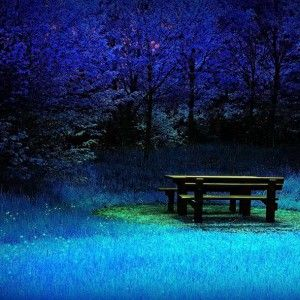

In [329]:
import cv2
import numpy as np
import plotly.express as px
from PIL import Image
imagen = cv2.imread('300x300.jpg')
imagen

array([[ 20,  25,  32, ...,  38,  36,  31],
       [ 20,  13,  19, ...,  30,  29,  29],
       [ 19,  11,  17, ...,  19,  17,  24],
       ...,
       [ 73,  73,  73, ..., 108, 110, 113],
       [ 70,  70,  71, ..., 102, 105, 108],
       [ 69,  69,  70, ..., 101, 102, 104]], dtype=uint8)
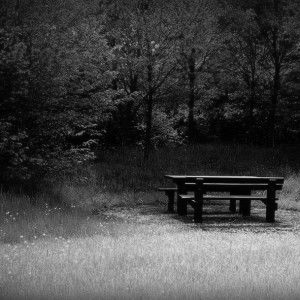

In [330]:
imagen_escala_grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imagen_escala_grises

In [331]:
cv2.imwrite('imagen_escala_grises.jpg', imagen_escala_grises)

True

In [332]:
imagen = Image.open("imagen_escala_grises.jpg")
fig = px.imshow(imagen)
fig.show()
pixel = imagen.load()
print(pixel[0,0])


20


In [333]:
#imagen_escala_grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
#imagen_escala_grises

In [334]:
import sys
img = imagen.resize((150,150), Image.LANCZOS)

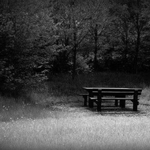

In [335]:
img

In [336]:
#imagen_RGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
#imagen_RGB

In [337]:
#cv2.imwrite('imagen_escala_grises.jpg', imagen_escala_grises)

In [338]:

#print(imagen_escala_grises)

In [339]:
imagen_mat = np.array(list(img.getdata(band=0)), int)
list_1 = imagen_mat.tolist()  #MATRIZ en forma de lista
print(list_1)
#for i in list_1:
#  if i%1000 == 0:

#imagen_mat.shape = (img.size[0], img.size[1])
#print(imagen_mat)

#print(imagen_mat.shape)

[19, 26, 22, 32, 31, 30, 34, 39, 26, 28, 31, 36, 36, 35, 34, 26, 28, 42, 41, 37, 43, 32, 33, 47, 41, 40, 36, 39, 44, 50, 55, 50, 50, 53, 52, 61, 68, 59, 54, 51, 55, 55, 45, 47, 52, 50, 50, 62, 63, 59, 41, 43, 57, 51, 35, 30, 41, 38, 51, 48, 51, 42, 48, 47, 49, 46, 48, 56, 52, 39, 43, 35, 42, 48, 28, 32, 44, 49, 39, 45, 45, 48, 42, 36, 34, 43, 49, 46, 56, 43, 49, 42, 45, 51, 47, 47, 41, 61, 66, 50, 53, 50, 55, 44, 46, 48, 48, 44, 43, 26, 32, 38, 42, 31, 33, 32, 27, 32, 25, 27, 26, 26, 22, 17, 25, 24, 26, 29, 19, 21, 17, 19, 21, 20, 27, 29, 31, 13, 15, 15, 25, 38, 36, 30, 37, 35, 24, 31, 33, 30, 17, 23, 20, 29, 25, 30, 32, 42, 27, 25, 32, 29, 35, 38, 30, 23, 25, 34, 35, 37, 39, 31, 30, 34, 47, 41, 39, 42, 42, 45, 56, 57, 59, 49, 49, 54, 60, 52, 61, 55, 60, 61, 54, 51, 47, 60, 57, 62, 60, 45, 25, 39, 47, 31, 28, 34, 50, 47, 56, 47, 48, 38, 38, 45, 44, 51, 52, 48, 48, 33, 39, 31, 32, 38, 34, 40, 38, 48, 45, 44, 42, 47, 46, 43, 44, 46, 53, 48, 49, 51, 58, 48, 33, 41, 42, 57, 49, 52, 57, 51,

In [340]:
%%cuda
#include <stdio.h>
#include <cuda_runtime.h>
#include <sys/time.h>
#include <iostream>
#include <iostream>

// KERNEL
__global__ void f_Brillo(float *A, float factor, float *R, int rows, int cols) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < cols && y < rows) {
        int index = y * cols + x;
        float sum = A[index] + factor;
        R[index] = fminf(fmaxf(sum, 0.0f), 255.0f);
    }
}

__global__ void f_Contraste(float *A, float factor, float *R, int rows, int cols) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < cols && y < rows) {
        int index = y * cols + x;
        float sum = A[index] * factor;
        R[index] = fminf(fmaxf(sum, 0.0f), 255.0f);
    }
}


int main() {
    const int rows = 150;//600
    const int cols = 150;//400
    const int size = rows * cols;


    float brillo = -150;
    float contraste = 0.5;
    float h_A[rows][cols] = {19, 26, 22, 32, 31, 30, 34, 39, 26, 28, 31, 36, 36, 35, 34, 26, 28, 42, 41, 37, 43, 32, 33, 47, 41, 40, 36, 39, 44, 50, 55, 50, 50, 53, 52, 61, 68, 59, 54, 51, 55, 55, 45, 47, 52, 50, 50, 62, 63, 59, 41, 43, 57, 51, 35, 30, 41, 38, 51, 48, 51, 42, 48, 47, 49, 46, 48, 56, 52, 39, 43, 35, 42, 48, 28, 32, 44, 49, 39, 45, 45, 48, 42, 36, 34, 43, 49, 46, 56, 43, 49, 42, 45, 51, 47, 47, 41, 61, 66, 50, 53, 50, 55, 44, 46, 48, 48, 44, 43, 26, 32, 38, 42, 31, 33, 32, 27, 32, 25, 27, 26, 26, 22, 17, 25, 24, 26, 29, 19, 21, 17, 19, 21, 20, 27, 29, 31, 13, 15, 15, 25, 38, 36, 30, 37, 35, 24, 31, 33, 30, 17, 23, 20, 29, 25, 30, 32, 42, 27, 25, 32, 29, 35, 38, 30, 23, 25, 34, 35, 37, 39, 31, 30, 34, 47, 41, 39, 42, 42, 45, 56, 57, 59, 49, 49, 54, 60, 52, 61, 55, 60, 61, 54, 51, 47, 60, 57, 62, 60, 45, 25, 39, 47, 31, 28, 34, 50, 47, 56, 47, 48, 38, 38, 45, 44, 51, 52, 48, 48, 33, 39, 31, 32, 38, 34, 40, 38, 48, 45, 44, 42, 47, 46, 43, 44, 46, 53, 48, 49, 51, 58, 48, 33, 41, 42, 57, 49, 52, 57, 51, 47, 48, 53, 34, 49, 47, 45, 44, 41, 31, 27, 28, 47, 43, 29, 30, 28, 28, 28, 28, 26, 28, 23, 19, 23, 22, 21, 28, 26, 18, 18, 17, 17, 15, 17, 19, 24, 15, 12, 17, 22, 21, 25, 29, 38, 40, 32, 38, 30, 27, 21, 29, 25, 26, 28, 34, 32, 36, 23, 23, 33, 31, 30, 28, 25, 27, 32, 37, 36, 38, 47, 40, 41, 53, 45, 45, 47, 42, 49, 49, 53, 52, 50, 46, 49, 49, 52, 59, 59, 67, 62, 50, 64, 63, 54, 58, 59, 59, 62, 39, 42, 64, 49, 37, 44, 57, 69, 44, 41, 52, 49, 44, 32, 39, 42, 46, 48, 42, 38, 37, 32, 24, 23, 15, 39, 39, 40, 37, 50, 47, 37, 46, 48, 58, 56, 59, 51, 40, 39, 56, 53, 56, 50, 35, 42, 51, 50, 54, 53, 56, 41, 48, 42, 43, 48, 45, 45, 46, 35, 44, 47, 27, 33, 40, 37, 37, 27, 27, 20, 26, 30, 26, 23, 26, 21, 24, 25, 21, 15, 13, 12, 16, 19, 13, 15, 19, 23, 15, 14, 27, 26, 25, 18, 25, 37, 44, 45, 48, 41, 30, 18, 32, 32, 26, 26, 31, 33, 28, 13, 23, 30, 25, 32, 31, 31, 38, 33, 41, 43, 47, 41, 42, 45, 52, 44, 44, 46, 46, 51, 45, 41, 41, 44, 44, 47, 57, 52, 62, 66, 69, 58, 68, 56, 59, 59, 53, 65, 62, 61, 55, 51, 64, 56, 42, 55, 62, 57, 32, 50, 54, 49, 53, 57, 50, 47, 49, 47, 42, 41, 37, 31, 31, 23, 13, 51, 46, 42, 45, 45, 48, 46, 48, 44, 46, 56, 62, 60, 44, 43, 50, 55, 51, 56, 37, 42, 57, 56, 43, 57, 60, 47, 54, 48, 59, 45, 52, 46, 45, 46, 43, 35, 29, 32, 49, 45, 44, 36, 24, 27, 41, 27, 14, 22, 18, 17, 19, 15, 17, 13, 13, 18, 16, 26, 19, 16, 24, 21, 13, 15, 24, 26, 38, 41, 38, 47, 45, 39, 37, 36, 34, 30, 26, 35, 27, 40, 32, 37, 30, 20, 31, 32, 29, 29, 29, 32, 41, 38, 34, 29, 43, 43, 36, 39, 40, 40, 40, 48, 45, 37, 38, 52, 58, 57, 50, 44, 41, 49, 60, 57, 62, 53, 57, 69, 65, 53, 55, 53, 63, 49, 53, 48, 47, 58, 57, 52, 47, 53, 42, 57, 52, 33, 50, 43, 58, 49, 55, 43, 37, 53, 54, 29, 29, 26, 24, 39, 54, 47, 45, 57, 64, 50, 45, 52, 43, 50, 55, 53, 43, 38, 65, 51, 56, 50, 39, 46, 64, 58, 50, 64, 43, 56, 54, 58, 45, 53, 36, 48, 44, 51, 49, 53, 39, 39, 44, 48, 48, 35, 39, 34, 38, 30, 27, 17, 29, 35, 50, 32, 15, 14, 8, 17, 18, 28, 22, 19, 23, 25, 17, 14, 28, 16, 32, 44, 45, 34, 38, 39, 28, 30, 43, 30, 25, 24, 27, 36, 30, 38, 35, 30, 34, 27, 24, 24, 31, 33, 33, 34, 37, 35, 37, 37, 36, 41, 47, 32, 38, 51, 47, 52, 55, 64, 59, 54, 51, 59, 49, 55, 56, 58, 48, 50, 66, 68, 54, 57, 54, 52, 63, 52, 41, 31, 40, 56, 60, 38, 44, 60, 37, 40, 42, 43, 46, 45, 49, 65, 51, 39, 47, 49, 71, 44, 29, 59, 54, 39, 44, 39, 45, 56, 63, 47, 47, 58, 53, 50, 50, 58, 57, 42, 55, 54, 52, 64, 51, 42, 56, 54, 56, 56, 35, 47, 57, 55, 57, 54, 51, 47, 50, 51, 51, 49, 52, 55, 45, 39, 38, 36, 37, 40, 41, 42, 37, 25, 55, 59, 46, 37, 24, 12, 11, 17, 20, 26, 28, 24, 18, 26, 21, 14, 23, 24, 24, 22, 35, 28, 16, 35, 42, 29, 34, 21, 20, 17, 29, 40, 31, 46, 40, 48, 28, 27, 26, 30, 37, 37, 32, 37, 49, 50, 37, 36, 42, 49, 46, 37, 50, 53, 48, 54, 54, 46, 52, 56, 58, 57, 64, 64, 61, 56, 47, 53, 49, 63, 49, 54, 44, 47, 48, 40, 32, 34, 52, 66, 50, 45, 48, 45, 40, 43, 40, 52, 45, 68, 47, 54, 68, 67, 51, 35, 59, 37, 38, 51, 43, 43, 42, 49, 65, 54, 55, 55, 58, 56, 58, 53, 60, 58, 60, 57, 45, 63, 50, 50, 65, 59, 54, 46, 68, 59, 46, 60, 51, 56, 62, 50, 54, 51, 51, 44, 55, 50, 48, 48, 45, 32, 36, 39, 38, 44, 49, 46, 50, 46, 51, 56, 54, 48, 38, 13, 12, 10, 14, 25, 33, 31, 29, 27, 23, 23, 19, 27, 23, 24, 39, 31, 19, 22, 36, 50, 37, 17, 16, 19, 29, 42, 30, 30, 30, 46, 28, 29, 33, 30, 34, 33, 43, 43, 47, 49, 36, 36, 53, 49, 53, 49, 49, 53, 47, 40, 50, 44, 53, 58, 56, 44, 69, 70, 55, 46, 58, 48, 48, 59, 47, 52, 48, 50, 42, 40, 52, 65, 70, 80, 50, 33, 42, 30, 41, 45, 43, 59, 55, 66, 55, 53, 64, 78, 57, 47, 45, 47, 47, 59, 47, 46, 59, 56, 69, 60, 66, 50, 62, 59, 67, 62, 61, 47, 56, 60, 43, 63, 54, 58, 62, 79, 60, 57, 60, 44, 59, 52, 42, 51, 59, 66, 55, 55, 46, 47, 64, 51, 48, 39, 33, 39, 43, 43, 40, 35, 38, 40, 47, 43, 47, 49, 43, 48, 47, 28, 15, 23, 23, 20, 29, 32, 35, 32, 25, 16, 24, 28, 24, 26, 30, 32, 17, 16, 35, 40, 33, 20, 32, 25, 23, 30, 30, 29, 29, 29, 24, 27, 28, 34, 31, 37, 39, 42, 44, 46, 51, 51, 43, 50, 42, 41, 47, 51, 34, 43, 54, 53, 63, 59, 52, 57, 64, 55, 54, 56, 55, 57, 60, 50, 39, 62, 69, 66, 64, 54, 62, 62, 78, 73, 57, 41, 28, 39, 28, 21, 47, 67, 52, 53, 58, 56, 53, 66, 67, 58, 54, 58, 55, 51, 72, 63, 64, 64, 51, 58, 67, 43, 66, 67, 64, 68, 57, 56, 57, 64, 66, 54, 54, 64, 59, 60, 57, 65, 53, 48, 65, 61, 58, 57, 55, 65, 57, 69, 51, 45, 36, 33, 29, 39, 33, 39, 43, 33, 36, 36, 34, 36, 38, 44, 53, 52, 36, 39, 22, 23, 24, 26, 26, 17, 24, 32, 33, 37, 34, 28, 27, 23, 36, 47, 39, 47, 40, 45, 45, 39, 33, 31, 29, 27, 25, 23, 27, 30, 25, 24, 22, 34, 33, 43, 43, 31, 33, 39, 28, 36, 43, 52, 43, 47, 52, 47, 46, 42, 33, 40, 47, 58, 64, 60, 60, 56, 50, 49, 40, 47, 52, 55, 65, 78, 65, 62, 71, 67, 77, 50, 58, 61, 68, 66, 47, 68, 52, 37, 30, 26, 39, 52, 32, 49, 47, 38, 59, 63, 58, 60, 44, 71, 64, 39, 63, 64, 57, 56, 61, 65, 57, 48, 58, 61, 64, 80, 57, 66, 59, 46, 59, 51, 48, 54, 57, 46, 53, 55, 42, 54, 53, 51, 50, 59, 54, 70, 73, 64, 58, 54, 34, 22, 24, 35, 35, 33, 29, 20, 30, 31, 45, 41, 38, 43, 51, 43, 33, 42, 18, 13, 17, 21, 31, 29, 34, 33, 24, 32, 32, 34, 26, 22, 44, 44, 31, 45, 49, 49, 41, 39, 31, 26, 17, 15, 34, 39, 38, 31, 22, 30, 23, 22, 36, 42, 43, 42, 48, 44, 38, 35, 47, 42, 38, 49, 52, 59, 48, 40, 40, 41, 46, 49, 61, 58, 58, 60, 51, 39, 48, 47, 61, 60, 61, 57, 70, 60, 55, 68, 83, 65, 69, 71, 57, 69, 47, 46, 43, 30, 35, 46, 58, 52, 48, 47, 47, 40, 67, 73, 78, 58, 44, 64, 62, 38, 48, 52, 62, 73, 71, 66, 67, 51, 48, 34, 54, 81, 64, 61, 60, 40, 53, 51, 51, 59, 53, 56, 50, 41, 49, 46, 36, 44, 51, 60, 65, 64, 52, 58, 58, 55, 31, 21, 23, 23, 37, 37, 32, 21, 35, 37, 37, 44, 39, 41, 35, 31, 35, 28, 37, 20, 17, 24, 34, 34, 30, 37, 45, 42, 39, 40, 33, 33, 35, 33, 36, 41, 50, 37, 42, 43, 41, 26, 18, 29, 37, 32, 33, 25, 25, 31, 22, 19, 31, 33, 30, 32, 44, 33, 40, 41, 42, 47, 57, 46, 50, 40, 42, 50, 40, 47, 55, 47, 61, 56, 57, 49, 43, 45, 56, 53, 59, 65, 68, 59, 68, 62, 67, 74, 78, 84, 63, 56, 35, 60, 52, 42, 37, 43, 47, 50, 55, 53, 53, 44, 56, 52, 57, 75, 79, 70, 64, 54, 65, 48, 55, 60, 72, 75, 67, 69, 49, 51, 52, 44, 49, 50, 59, 64, 61, 46, 66, 58, 56, 61, 58, 62, 44, 61, 53, 58, 49, 49, 60, 75, 65, 62, 62, 40, 46, 44, 26, 27, 22, 27, 25, 21, 32, 38, 25, 27, 34, 32, 31, 41, 44, 39, 45, 39, 46, 29, 16, 22, 33, 22, 21, 33, 45, 47, 42, 47, 28, 23, 40, 56, 46, 54, 50, 48, 57, 43, 50, 21, 17, 31, 37, 34, 27, 27, 28, 18, 24, 30, 34, 58, 44, 28, 42, 45, 41, 44, 46, 62, 56, 60, 74, 61, 45, 61, 61, 50, 49, 61, 56, 63, 59, 40, 45, 41, 46, 61, 63, 74, 89, 81, 81, 68, 64, 61, 73, 67, 57, 68, 61, 48, 48, 47, 45, 41, 43, 57, 53, 54, 45, 39, 50, 46, 89, 75, 66, 73, 57, 54, 55, 55, 61, 62, 72, 55, 56, 52, 46, 65, 80, 49, 44, 52, 59, 56, 59, 68, 61, 57, 45, 45, 71, 50, 53, 77, 60, 71, 48, 52, 55, 67, 63, 58, 53, 45, 47, 50, 49, 27, 25, 27, 18, 29, 42, 42, 40, 32, 30, 32, 33, 45, 42, 45, 47, 44, 39, 40, 20, 19, 18, 23, 19, 23, 34, 38, 32, 37, 39, 31, 42, 47, 52, 47, 50, 52, 49, 42, 36, 23, 22, 31, 47, 41, 35, 42, 39, 52, 51, 31, 36, 48, 43, 43, 41, 42, 50, 50, 53, 45, 48, 54, 58, 65, 58, 88, 93, 50, 55, 51, 43, 58, 54, 48, 54, 70, 60, 64, 68, 74, 79, 70, 92, 76, 59, 63, 76, 56, 58, 93, 78, 63, 53, 48, 48, 34, 50, 52, 55, 46, 42, 36, 42, 53, 70, 63, 60, 64, 56, 61, 71, 64, 55, 59, 65, 60, 46, 68, 68, 64, 79, 62, 65, 74, 82, 58, 63, 55, 66, 60, 57, 54, 51, 69, 71, 75, 63, 53, 51, 51, 44, 61, 60, 58, 54, 51, 58, 46, 30, 32, 32, 24, 34, 44, 38, 30, 34, 39, 36, 36, 39, 46, 41, 30, 30, 42, 45, 34, 34, 22, 19, 16, 18, 13, 22, 25, 17, 26, 31, 40, 59, 62, 55, 47, 42, 46, 38, 32, 34, 45, 51, 23, 31, 36, 44, 53, 53, 52, 56, 44, 37, 41, 52, 53, 48, 45, 52, 53, 48, 41, 45, 51, 53, 63, 73, 61, 71, 50, 53, 44, 36, 40, 47, 78, 68, 80, 69, 59, 57, 66, 75, 77, 90, 76, 64, 88, 69, 64, 88, 80, 60, 43, 54, 44, 47, 73, 59, 50, 73, 56, 41, 62, 59, 52, 48, 90, 62, 54, 44, 49, 61, 63, 56, 73, 63, 64, 56, 68, 71, 55, 69, 78, 79, 65, 61, 56, 60, 58, 71, 63, 54, 48, 50, 48, 66, 58, 52, 52, 53, 50, 55, 45, 57, 67, 62, 62, 60, 47, 40, 39, 26, 35, 38, 45, 31, 23, 23, 30, 28, 23, 42, 35, 38, 28, 31, 26, 35, 36, 33, 18, 14, 15, 13, 11, 16, 37, 13, 16, 33, 38, 36, 45, 56, 56, 46, 44, 39, 41, 48, 69, 52, 40, 30, 25, 31, 48, 39, 41, 36, 39, 40, 43, 40, 41, 34, 34, 48, 37, 49, 41, 39, 44, 52, 39, 44, 56, 48, 46, 42, 41, 46, 45, 50, 63, 72, 97, 76, 68, 57, 60, 64, 71, 87, 71, 72, 84, 88, 71, 88, 58, 45, 32, 44, 59, 56, 69, 65, 65, 65, 63, 50, 54, 46, 48, 45, 85, 87, 40, 47, 58, 58, 62, 56, 48, 55, 61, 60, 64, 63, 49, 64, 62, 59, 67, 56, 58, 73, 72, 55, 53, 53, 62, 53, 55, 67, 47, 52, 42, 45, 61, 51, 48, 64, 66, 74, 57, 48, 52, 48, 36, 31, 42, 50, 43, 31, 26, 40, 41, 25, 31, 56, 31, 22, 25, 42, 28, 28, 32, 38, 18, 13, 16, 16, 33, 22, 24, 16, 27, 48, 33, 30, 63, 55, 43, 44, 40, 48, 58, 57, 41, 35, 34, 47, 34, 42, 47, 36, 36, 53, 49, 37, 46, 31, 22, 35, 42, 37, 46, 55, 52, 44, 36, 61, 55, 51, 68, 55, 55, 57, 50, 51, 66, 70, 61, 65, 93, 111, 67, 50, 58, 60, 78, 68, 65, 69, 74, 96, 88, 55, 34, 36, 46, 81, 76, 66, 59, 62, 73, 77, 61, 74, 61, 48, 45, 63, 74, 72, 44, 47, 56, 70, 63, 52, 61, 55, 67, 65, 60, 59, 56, 47, 54, 69, 62, 53, 75, 59, 47, 57, 52, 47, 63, 51, 60, 60, 60, 48, 38, 57, 65, 59, 58, 53, 63, 60, 56, 48, 37, 42, 43, 50, 51, 47, 49, 51, 37, 52, 37, 27, 38, 34, 37, 33, 22, 45, 33, 25, 25, 36, 18, 7, 5, 26, 35, 22, 12, 13, 25, 37, 42, 52, 64, 50, 47, 37, 35, 36, 56, 60, 15, 20, 32, 57, 50, 54, 43, 32, 25, 29, 38, 25, 38, 36, 20, 34, 44, 44, 54, 53, 57, 42, 44, 79, 58, 44, 67, 68, 47, 51, 63, 66, 63, 67, 62, 56, 78, 88, 79, 57, 44, 60, 74, 51, 76, 69, 81, 83, 94, 78, 65, 72, 74, 68, 73, 56, 75, 70, 73, 64, 45, 56, 76, 49, 48, 71, 75, 45, 38, 41, 45, 76, 54, 47, 71, 60, 54, 60, 77, 58, 55, 56, 57, 54, 57, 74, 77, 63, 58, 56, 27, 38, 64, 62, 74, 73, 72, 40, 55, 59, 50, 60, 60, 67, 66, 64, 68, 57, 60, 61, 56, 52, 50, 52, 59, 61, 57, 61, 46, 37, 23, 34, 39, 41, 33, 22, 31, 39, 25, 21, 13, 12, 9, 9, 27, 38, 24, 16, 32, 52, 47, 38, 25, 28, 30, 37, 29, 29, 38, 36, 32, 38, 26, 26, 35, 38, 33, 28, 43, 23, 12, 23, 26, 27, 40, 32, 43, 38, 37, 43, 55, 52, 47, 45, 50, 58, 59, 52, 67, 52, 56, 73, 71, 55, 57, 70, 68, 62, 58, 48, 48, 66, 67, 84, 63, 72, 76, 81, 88, 84, 81, 82, 51, 32, 45, 46, 58, 68, 62, 65, 52, 37, 58, 74, 37, 43, 50, 43, 48, 35, 36, 69, 74, 52, 69, 69, 55, 58, 68, 57, 63, 58, 54, 37, 58, 52, 41, 43, 42, 25, 20, 31, 62, 79, 71, 67, 62, 49, 48, 59, 52, 59, 63, 67, 75, 69, 61, 50, 60, 58, 45, 51, 58, 58, 67, 63, 49, 44, 41, 43, 41, 28, 23, 23, 25, 29, 20, 25, 14, 12, 19, 21, 13, 15, 42, 36, 15, 11, 18, 36, 38, 38, 16, 15, 24, 38, 30, 27, 22, 31, 37, 29, 36, 62, 55, 29, 37, 24, 49, 42, 19, 33, 21, 31, 43, 32, 47, 50, 56, 44, 44, 45, 69, 54, 43, 60, 60, 55, 54, 41, 55, 54, 58, 66, 57, 55, 73, 64, 60, 52, 47, 61, 65, 72, 64, 59, 79, 84, 67, 65, 74, 68, 77, 57, 33, 43, 29, 34, 57, 56, 70, 90, 70, 66, 80, 44, 47, 65, 58, 34, 52, 69, 52, 39, 59, 61, 40, 58, 63, 49, 59, 87, 49, 35, 41, 23, 47, 42, 39, 45, 39, 47, 58, 56, 45, 64, 47, 43, 60, 67, 60, 54, 54, 78, 85, 53, 41, 65, 48, 46, 55, 65, 55, 52, 60, 39, 52, 57, 41, 50, 60, 37, 21, 27, 19, 27, 23, 20, 35, 12, 15, 29, 27, 19, 24, 33, 18, 10, 33, 53, 43, 42, 36, 53, 47, 41, 24, 35, 32, 43, 20, 33, 29, 42, 34, 44, 35, 20, 38, 36, 31, 40, 22, 30, 32, 34, 54, 56, 55, 48, 50, 53, 62, 54, 49, 57, 59, 65, 58, 48, 51, 63, 61, 63, 65, 73, 57, 50, 51, 64, 66, 79, 76, 63, 70, 62, 55, 59, 63, 79, 96, 96, 98, 75, 42, 37, 19, 34, 56, 41, 58, 63, 62, 54, 54, 57, 48, 54, 68, 47, 60, 68, 58, 34, 41, 68, 101, 67, 54, 52, 65, 59, 47, 61, 50, 47, 64, 54, 74, 70, 59, 62, 55, 45, 49, 45, 54, 56, 61, 60, 56, 53, 63, 80, 80, 46, 64, 70, 53, 61, 61, 61, 37, 29, 28, 37, 46, 54, 41, 30, 38, 46, 32, 19, 18, 19, 24, 19, 30, 35, 28, 31, 30, 18, 16, 45, 41, 13, 39, 36, 26, 23, 31, 26, 37, 37, 29, 35, 37, 41, 40, 36, 33, 39, 45, 47, 21, 24, 44, 53, 65, 62, 34, 34, 44, 29, 53, 59, 48, 52, 53, 44, 44, 41, 53, 65, 52, 59, 58, 46, 59, 59, 53, 49, 50, 56, 54, 37, 37, 56, 84, 80, 70, 65, 79, 69, 49, 55, 59, 76, 75, 70, 99, 73, 32, 32, 28, 39, 49, 46, 50, 72, 93, 35, 57, 66, 58, 70, 97, 54, 59, 73, 59, 46, 47, 99, 127, 67, 56, 68, 78, 49, 62, 62, 54, 60, 62, 61, 72, 78, 59, 53, 65, 41, 54, 49, 46, 56, 50, 47, 52, 55, 60, 68, 56, 64, 87, 70, 58, 62, 55, 38, 26, 25, 32, 55, 47, 45, 40, 35, 29, 56, 48, 39, 16, 18, 42, 30, 12, 30, 18, 20, 25, 20, 34, 35, 19, 13, 41, 26, 15, 14, 14, 15, 24, 20, 22, 32, 42, 70, 14, 18, 47, 42, 33, 27, 24, 56, 65, 73, 55, 57, 54, 30, 38, 23, 33, 41, 40, 40, 41, 40, 28, 34, 38, 49, 59, 78, 62, 47, 45, 47, 50, 66, 74, 52, 45, 63, 54, 49, 63, 73, 59, 69, 79, 82, 66, 80, 84, 77, 61, 73, 96, 62, 42, 31, 16, 47, 86, 86, 83, 87, 49, 27, 60, 83, 62, 83, 89, 48, 50, 70, 49, 47, 40, 78, 59, 81, 127, 100, 65, 78, 71, 66, 64, 65, 69, 61, 56, 58, 50, 45, 59, 39, 47, 58, 63, 67, 69, 65, 60, 65, 63, 53, 69, 64, 58, 60, 59, 69, 66, 58, 61, 47, 35, 50, 57, 42, 57, 60, 30, 47, 54, 46, 18, 16, 45, 43, 40, 48, 35, 41, 27, 23, 30, 32, 6, 10, 44, 42, 18, 17, 14, 15, 14, 13, 30, 44, 68, 75, 9, 19, 51, 27, 33, 46, 39, 54, 57, 53, 36, 42, 74, 44, 16, 37, 50, 34, 36, 38, 42, 36, 33, 38, 47, 39, 63, 62, 57, 60, 59, 73, 66, 48, 44, 45, 48, 68, 65, 53, 52, 62, 55, 60, 67, 63, 66, 68, 73, 67, 74, 72, 66, 103, 77, 43, 53, 109, 109, 109, 113, 59, 54, 51, 37, 58, 65, 73, 69, 66, 50, 66, 81, 55, 30, 62, 57, 94, 130, 79, 55, 65, 47, 56, 52, 74, 90, 62, 81, 79, 43, 50, 55, 61, 57, 57, 63, 71, 70, 75, 83, 67, 62, 62, 56, 62, 59, 49, 58, 50, 48, 38, 53, 56, 41, 28, 38, 40, 57, 51, 33, 42, 37, 22, 34, 22, 30, 26, 31, 38, 46, 66, 43, 34, 20, 35, 26, 10, 47, 42, 24, 27, 15, 11, 15, 19, 35, 35, 53, 74, 16, 23, 24, 10, 28, 45, 25, 47, 57, 42, 47, 49, 49, 30, 21, 41, 59, 58, 59, 58, 34, 32, 50, 66, 71, 48, 45, 48, 42, 58, 66, 62, 64, 59, 52, 53, 67, 80, 78, 68, 61, 51, 61, 59, 67, 81, 70, 77, 65, 80, 77, 69, 60, 65, 57, 73, 100, 100, 55, 96, 73, 23, 71, 62, 45, 48, 35, 44, 47, 37, 49, 68, 69, 60, 42, 62, 113, 83, 63, 52, 46, 43, 53, 68, 60, 80, 75, 53, 64, 62, 54, 41, 61, 61, 62, 52, 26, 45, 56, 51, 65, 69, 65, 55, 48, 65, 58, 51, 44, 39, 49, 34, 35, 43, 28, 21, 30, 31, 29, 41, 31, 25, 26, 29, 28, 20, 26, 33, 35, 44, 42, 50, 53, 46, 28, 28, 28, 16, 42, 45, 19, 27, 20, 22, 21, 28, 42, 41, 58, 42, 34, 57, 34, 20, 16, 32, 48, 60, 60, 34, 48, 59, 47, 26, 14, 34, 58, 52, 60, 62, 41, 52, 48, 54, 62, 62, 55, 40, 30, 54, 66, 67, 65, 81, 75, 71, 93, 86, 49, 50, 44, 55, 59, 84, 67, 63, 64, 73, 65, 64, 67, 78, 61, 83, 82, 107, 82, 49, 41, 64, 58, 43, 32, 54, 38, 29, 43, 39, 44, 18, 65, 52, 56, 53, 47, 63, 114, 93, 59, 63, 47, 62, 63, 93, 72, 63, 61, 58, 84, 60, 53, 48, 77, 52, 65, 61, 12, 32, 70, 42, 34, 58, 71, 55, 46, 62, 40, 40, 42, 70, 37, 36, 47, 57, 46, 34, 34, 23, 30, 44, 31, 41, 33, 26, 31, 19, 20, 28, 53, 70, 44, 49, 35, 43, 31, 14, 22, 16, 21, 26, 22, 24, 16, 25, 34, 39, 51, 56, 49, 29, 46, 47, 31, 33, 49, 43, 61, 60, 45, 44, 56, 50, 43, 28, 21, 32, 46, 26, 38, 35, 53, 43, 36, 46, 53, 50, 58, 49, 40, 73, 63, 43, 57, 73, 67, 65, 59, 75, 72, 51, 62, 72, 90, 95, 87, 62, 73, 68, 58, 57, 80, 79, 87, 84, 104, 102, 64, 51, 53, 54, 48, 53, 50, 49, 34, 56, 64, 38, 40, 22, 55, 52, 62, 53, 37, 45, 77, 64, 54, 48, 60, 64, 54, 77, 74, 76, 60, 64, 60, 59, 38, 37, 52, 63, 74, 53, 29, 48, 56, 36, 47, 55, 67, 46, 51, 44, 45, 42, 47, 64, 57, 54, 53, 49, 49, 39, 38, 30, 36, 41, 38, 42, 34, 30, 27, 18, 14, 25, 42, 42, 50, 48, 33, 28, 19, 24, 16, 8, 16, 13, 22, 18, 16, 47, 60, 49, 38, 50, 48, 57, 43, 37, 33, 36, 59, 32, 45, 50, 36, 37, 61, 49, 20, 25, 34, 36, 51, 34, 38, 41, 51, 35, 31, 54, 44, 45, 59, 56, 57, 70, 51, 40, 48, 51, 49, 62, 59, 69, 81, 71, 64, 68, 82, 81, 81, 88, 80, 62, 69, 69, 82, 61, 80, 81, 78, 95, 105, 75, 56, 73, 51, 47, 85, 62, 55, 71, 48, 45, 44, 20, 43, 60, 51, 32, 25, 38, 60, 39, 21, 40, 47, 44, 56, 48, 65, 68, 64, 58, 65, 60, 38, 28, 28, 51, 57, 37, 37, 46, 51, 50, 57, 56, 64, 29, 44, 36, 33, 42, 38, 46, 51, 52, 55, 51, 52, 36, 24, 39, 75, 57, 28, 68, 49, 24, 29, 26, 19, 18, 28, 42, 46, 38, 29, 26, 35, 27, 11, 6, 17, 14, 29, 18, 24, 55, 39, 27, 31, 29, 37, 30, 30, 38, 55, 35, 36, 32, 44, 52, 35, 40, 59, 43, 33, 44, 30, 32, 40, 42, 45, 36, 42, 37, 47, 44, 44, 52, 48, 38, 64, 59, 35, 36, 43, 52, 56, 63, 66, 66, 69, 64, 64, 64, 75, 69, 72, 88, 51, 59, 59, 81, 90, 63, 48, 74, 79, 75, 98, 81, 60, 61, 95, 65, 58, 67, 64, 52, 42, 56, 39, 52, 79, 59, 74, 51, 38, 43, 36, 50, 51, 46, 35, 41, 50, 74, 56, 70, 65, 56, 66, 79, 52, 53, 31, 34, 45, 31, 42, 40, 47, 56, 64, 59, 37, 73, 62, 36, 39, 49, 45, 41, 58, 51, 46, 52, 53, 39, 36, 39, 51, 42, 39, 47, 58, 31, 24, 32, 23, 24, 42, 56, 34, 19, 29, 38, 47, 29, 21, 10, 10, 26, 32, 13, 33, 28, 22, 19, 11, 12, 13, 23, 23, 51, 50, 37, 32, 33, 39, 47, 39, 53, 52, 34, 32, 33, 20, 26, 39, 24, 25, 32, 37, 48, 44, 31, 49, 64, 50, 40, 54, 55, 64, 47, 57, 66, 63, 62, 63, 61, 73, 75, 57, 67, 62, 53, 62, 66, 70, 83, 71, 72, 73, 60, 27, 66, 102, 82, 75, 78, 60, 63, 85, 83, 79, 59, 66, 67, 68, 77, 76, 71, 85, 72, 72, 76, 51, 43, 38, 47, 66, 49, 60, 78, 66, 64, 64, 74, 80, 79, 49, 58, 54, 42, 44, 39, 31, 19, 28, 53, 54, 70, 72, 70, 56, 77, 43, 36, 51, 55, 56, 41, 50, 55, 43, 31, 34, 38, 41, 32, 27, 51, 57, 41, 44, 40, 27, 24, 27, 27, 44, 49, 28, 25, 25, 36, 43, 26, 31, 23, 6, 28, 22, 21, 24, 18, 20, 26, 14, 15, 14, 26, 46, 26, 20, 52, 54, 44, 45, 42, 28, 34, 44, 45, 47, 43, 38, 17, 24, 25, 38, 47, 32, 50, 40, 37, 54, 56, 40, 29, 51, 53, 54, 60, 66, 72, 73, 74, 59, 72, 74, 75, 60, 62, 52, 50, 63, 58, 43, 50, 70, 63, 60, 61, 54, 70, 73, 76, 51, 48, 53, 60, 60, 62, 58, 50, 66, 74, 57, 79, 69, 66, 72, 64, 60, 45, 49, 42, 37, 59, 85, 79, 79, 62, 52, 72, 77, 76, 79, 69, 48, 23, 47, 40, 42, 42, 23, 16, 24, 45, 73, 73, 78, 61, 46, 46, 57, 59, 59, 53, 55, 44, 42, 27, 30, 46, 40, 39, 40, 22, 30, 50, 50, 47, 58, 47, 25, 23, 27, 39, 57, 28, 25, 30, 37, 35, 37, 41, 36, 31, 7, 34, 19, 30, 21, 12, 28, 33, 23, 30, 32, 29, 48, 32, 24, 43, 26, 28, 27, 22, 32, 37, 37, 43, 62, 63, 49, 18, 28, 50, 54, 42, 31, 38, 31, 39, 52, 48, 41, 35, 35, 48, 58, 70, 53, 61, 79, 58, 51, 60, 48, 64, 73, 54, 63, 66, 57, 59, 44, 43, 39, 35, 72, 76, 60, 40, 59, 58, 42, 44, 38, 48, 57, 58, 63, 53, 35, 50, 52, 67, 58, 64, 63, 65, 62, 49, 51, 56, 49, 56, 71, 73, 77, 55, 45, 68, 60, 46, 60, 53, 48, 32, 42, 45, 27, 43, 28, 26, 15, 65, 93, 72, 87, 35, 31, 41, 47, 59, 48, 52, 54, 49, 44, 40, 45, 42, 37, 51, 38, 40, 48, 25, 54, 60, 37, 30, 22, 18, 24, 48, 56, 22, 38, 41, 45, 27, 61, 72, 40, 20, 13, 22, 33, 52, 39, 43, 42, 37, 48, 48, 41, 33, 16, 27, 29, 26, 23, 17, 20, 30, 34, 33, 36, 38, 40, 38, 23, 18, 41, 39, 31, 34, 34, 31, 21, 32, 45, 57, 56, 47, 38, 40, 50, 67, 55, 51, 56, 59, 62, 68, 64, 66, 71, 56, 54, 69, 63, 82, 75, 61, 49, 52, 75, 72, 55, 41, 52, 66, 42, 30, 48, 55, 58, 74, 64, 64, 33, 42, 50, 55, 72, 67, 60, 57, 52, 49, 37, 37, 49, 64, 95, 93, 76, 44, 55, 61, 69, 60, 57, 35, 52, 71, 39, 42, 42, 58, 39, 21, 20, 56, 86, 100, 54, 35, 54, 50, 48, 33, 35, 55, 66, 62, 54, 40, 39, 56, 44, 25, 37, 35, 45, 29, 32, 50, 37, 42, 46, 36, 26, 44, 59, 38, 18, 18, 36, 35, 39, 52, 66, 20, 8, 11, 36, 49, 44, 33, 43, 56, 60, 56, 44, 45, 19, 22, 18, 27, 29, 17, 18, 29, 39, 30, 23, 36, 38, 26, 15, 26, 36, 28, 26, 42, 32, 30, 39, 50, 55, 53, 32, 36, 35, 35, 45, 48, 52, 44, 37, 46, 56, 69, 75, 57, 49, 54, 59, 56, 55, 58, 63, 73, 63, 59, 54, 52, 57, 52, 50, 71, 42, 27, 48, 80, 55, 86, 65, 58, 48, 48, 61, 61, 56, 51, 50, 35, 53, 36, 9, 32, 62, 84, 99, 79, 63, 48, 66, 71, 59, 56, 49, 39, 57, 66, 75, 40, 29, 44, 29, 7, 10, 60, 92, 64, 27, 45, 70, 55, 31, 48, 58, 48, 37, 24, 30, 31, 41, 44, 45, 40, 54, 47, 43, 34, 54, 28, 34, 41, 58, 35, 22, 40, 58, 50, 57, 36, 21, 34, 27, 30, 47, 31, 7, 10, 25, 37, 33, 24, 34, 39, 40, 44, 50, 42, 13, 20, 14, 12, 14, 22, 18, 9, 25, 42, 33, 20, 18, 30, 32, 32, 21, 30, 37, 25, 26, 35, 34, 48, 65, 46, 37, 40, 36, 39, 54, 57, 48, 57, 46, 53, 58, 72, 72, 44, 36, 36, 50, 52, 49, 53, 54, 60, 61, 52, 47, 58, 53, 44, 52, 52, 29, 22, 51, 68, 53, 59, 57, 63, 42, 39, 60, 56, 42, 50, 51, 40, 61, 59, 20, 19, 48, 77, 93, 53, 34, 49, 70, 59, 62, 51, 26, 33, 37, 36, 46, 32, 19, 39, 54, 12, 8, 45, 53, 24, 15, 40, 52, 44, 28, 43, 52, 42, 45, 50, 53, 51, 43, 38, 41, 63, 55, 35, 46, 62, 66, 41, 26, 40, 66, 44, 18, 31, 48, 41, 47, 38, 29, 20, 34, 55, 57, 38, 3, 15, 42, 38, 46, 40, 62, 53, 46, 58, 45, 38, 20, 13, 10, 10, 14, 19, 13, 13, 26, 51, 65, 49, 48, 51, 55, 27, 21, 29, 25, 38, 24, 38, 34, 36, 51, 43, 47, 38, 36, 39, 49, 56, 58, 47, 51, 45, 60, 68, 84, 55, 25, 36, 68, 59, 49, 48, 66, 81, 70, 57, 41, 29, 48, 82, 88, 58, 71, 70, 67, 55, 37, 46, 49, 49, 48, 28, 37, 51, 37, 38, 37, 54, 68, 50, 33, 31, 62, 72, 66, 64, 45, 58, 55, 56, 52, 38, 43, 45, 33, 34, 23, 43, 43, 42, 57, 15, 11, 32, 30, 23, 29, 35, 27, 33, 27, 30, 34, 37, 38, 35, 63, 68, 39, 42, 35, 37, 40, 47, 56, 57, 35, 38, 33, 21, 35, 48, 14, 31, 61, 66, 58, 48, 46, 49, 45, 67, 82, 52, 3, 15, 47, 59, 59, 72, 69, 54, 32, 35, 32, 34, 31, 23, 10, 13, 17, 10, 24, 27, 34, 38, 44, 46, 43, 22, 58, 38, 27, 28, 29, 30, 35, 30, 30, 38, 29, 43, 51, 35, 37, 51, 42, 55, 61, 53, 49, 54, 48, 44, 54, 66, 64, 54, 63, 71, 77, 69, 64, 67, 69, 56, 55, 39, 67, 79, 86, 109, 85, 93, 98, 68, 48, 56, 47, 48, 57, 30, 52, 52, 43, 39, 37, 47, 60, 42, 18, 27, 48, 56, 66, 44, 43, 39, 53, 46, 20, 40, 41, 54, 52, 55, 45, 51, 47, 30, 30, 31, 26, 49, 46, 50, 52, 48, 59, 50, 37, 34, 33, 22, 26, 32, 51, 44, 43, 29, 38, 50, 43, 32, 26, 32, 36, 33, 23, 29, 31, 37, 18, 33, 66, 71, 41, 46, 51, 61, 46, 46, 61, 35, 6, 26, 68, 48, 65, 70, 43, 21, 15, 17, 18, 18, 10, 8, 4, 11, 9, 7, 23, 20, 15, 19, 20, 17, 16, 18, 40, 41, 39, 41, 24, 20, 34, 35, 31, 35, 30, 29, 33, 36, 41, 54, 45, 55, 63, 57, 50, 61, 49, 54, 48, 45, 27, 17, 37, 53, 53, 60, 66, 68, 65, 84, 62, 60, 73, 52, 54, 76, 67, 71, 51, 37, 38, 40, 41, 37, 43, 29, 51, 33, 27, 45, 44, 43, 58, 50, 12, 23, 36, 54, 51, 41, 44, 57, 53, 30, 29, 39, 44, 49, 64, 64, 49, 35, 36, 54, 20, 16, 18, 29, 40, 52, 57, 63, 58, 63, 69, 65, 34, 24, 40, 50, 51, 47, 50, 52, 50, 33, 35, 28, 39, 46, 48, 29, 16, 13, 40, 53, 20, 44, 43, 49, 55, 55, 58, 49, 56, 37, 49, 29, 5, 27, 44, 37, 38, 24, 26, 17, 23, 20, 18, 22, 11, 15, 12, 11, 11, 14, 14, 10, 11, 16, 29, 27, 20, 22, 26, 31, 37, 36, 20, 39, 27, 24, 35, 42, 35, 30, 32, 43, 53, 59, 60, 65, 64, 60, 57, 71, 67, 57, 58, 46, 31, 31, 46, 49, 43, 41, 53, 39, 73, 73, 58, 52, 54, 48, 48, 54, 76, 78, 51, 43, 38, 37, 47, 43, 34, 17, 53, 18, 18, 44, 36, 32, 54, 53, 21, 21, 32, 53, 54, 39, 56, 76, 37, 34, 66, 55, 39, 34, 45, 40, 47, 22, 32, 59, 25, 11, 14, 20, 50, 60, 43, 48, 52, 57, 59, 52, 40, 30, 39, 45, 52, 44, 53, 50, 52, 52, 48, 33, 62, 59, 43, 24, 23, 13, 15, 38, 23, 60, 44, 33, 50, 40, 71, 68, 46, 64, 52, 10, 8, 12, 31, 52, 49, 31, 23, 17, 28, 14, 21, 28, 14, 17, 11, 9, 10, 13, 9, 11, 15, 29, 26, 19, 20, 18, 19, 35, 23, 30, 34, 32, 31, 26, 30, 37, 28, 43, 53, 70, 63, 62, 66, 54, 54, 51, 52, 28, 55, 44, 33, 19, 37, 31, 30, 48, 50, 46, 49, 51, 44, 45, 56, 52, 61, 49, 58, 64, 46, 42, 20, 35, 30, 20, 74, 62, 48, 19, 26, 12, 23, 54, 67, 42, 45, 32, 10, 19, 55, 66, 42, 35, 52, 39, 36, 53, 69, 56, 67, 56, 73, 49, 38, 36, 25, 32, 32, 10, 8, 29, 47, 58, 50, 49, 43, 47, 28, 43, 50, 28, 34, 28, 42, 56, 53, 42, 51, 51, 53, 45, 46, 59, 57, 47, 14, 12, 22, 57, 29, 31, 21, 36, 42, 38, 48, 53, 32, 63, 65, 10, 7, 17, 28, 47, 40, 23, 19, 22, 13, 8, 20, 27, 9, 11, 13, 8, 7, 13, 18, 21, 20, 26, 22, 23, 41, 37, 20, 25, 28, 34, 37, 34, 28, 38, 39, 30, 33, 28, 45, 50, 47, 46, 58, 50, 55, 49, 44, 16, 25, 35, 36, 24, 53, 57, 52, 53, 24, 29, 47, 52, 50, 67, 61, 65, 51, 45, 64, 66, 20, 12, 20, 38, 38, 19, 37, 40, 43, 19, 14, 7, 30, 55, 66, 53, 45, 37, 18, 24, 43, 44, 45, 66, 40, 22, 45, 58, 61, 44, 53, 73, 84, 47, 46, 37, 41, 51, 54, 12, 17, 44, 53, 62, 61, 58, 55, 38, 29, 50, 49, 28, 25, 30, 51, 44, 43, 45, 39, 37, 49, 46, 38, 42, 59, 47, 23, 8, 21, 32, 19, 18, 27, 34, 44, 48, 19, 49, 38, 35, 35, 12, 11, 19, 36, 45, 29, 15, 19, 21, 19, 14, 8, 12, 7, 9, 13, 10, 9, 13, 18, 24, 22, 16, 30, 31, 36, 55, 22, 13, 23, 36, 25, 27, 31, 24, 23, 39, 43, 31, 37, 41, 47, 41, 48, 56, 41, 41, 45, 44, 43, 35, 25, 32, 46, 57, 53, 57, 48, 15, 42, 50, 66, 69, 62, 49, 46, 51, 65, 48, 18, 11, 45, 35, 37, 40, 22, 24, 38, 18, 12, 12, 25, 39, 38, 34, 41, 48, 42, 38, 47, 36, 57, 62, 24, 39, 49, 47, 52, 65, 62, 49, 51, 41, 36, 31, 46, 44, 45, 21, 21, 39, 47, 53, 53, 49, 45, 52, 37, 28, 25, 21, 15, 35, 49, 41, 30, 31, 41, 29, 23, 30, 27, 35, 56, 37, 46, 18, 14, 19, 5, 12, 21, 43, 28, 33, 24, 58, 28, 12, 28, 14, 6, 12, 37, 26, 25, 46, 40, 35, 31, 23, 23, 23, 6, 8, 13, 12, 7, 8, 15, 17, 12, 14, 18, 11, 24, 34, 23, 17, 19, 24, 15, 21, 31, 33, 28, 30, 30, 30, 25, 35, 33, 30, 36, 46, 26, 30, 25, 38, 39, 49, 43, 42, 46, 42, 33, 47, 59, 50, 61, 56, 61, 45, 41, 39, 46, 50, 27, 41, 36, 11, 35, 54, 42, 51, 24, 29, 27, 23, 13, 13, 27, 28, 25, 40, 52, 45, 38, 42, 56, 33, 43, 18, 34, 65, 46, 43, 47, 51, 48, 49, 45, 31, 25, 31, 28, 41, 34, 16, 24, 42, 45, 69, 63, 66, 35, 42, 45, 31, 35, 27, 28, 44, 29, 35, 29, 30, 29, 20, 15, 20, 17, 35, 34, 31, 34, 32, 12, 16, 7, 7, 16, 22, 24, 18, 27, 28, 30, 18, 19, 8, 8, 11, 23, 27, 30, 40, 31, 44, 36, 41, 39, 35, 15, 11, 7, 3, 5, 9, 15, 12, 14, 17, 26, 24, 24, 18, 22, 18, 19, 25, 24, 19, 21, 36, 26, 18, 20, 25, 29, 32, 30, 40, 60, 48, 40, 30, 18, 33, 37, 38, 44, 45, 35, 57, 46, 53, 50, 77, 68, 44, 22, 26, 33, 36, 54, 39, 16, 23, 19, 3, 28, 47, 27, 46, 32, 45, 27, 9, 11, 11, 21, 27, 31, 24, 37, 55, 27, 27, 40, 27, 25, 30, 60, 57, 48, 44, 40, 26, 38, 49, 49, 46, 39, 43, 47, 73, 48, 23, 35, 56, 39, 65, 63, 60, 33, 23, 28, 37, 41, 50, 38, 21, 31, 43, 29, 30, 33, 36, 26, 18, 29, 35, 32, 39, 23, 24, 15, 15, 7, 23, 22, 27, 57, 40, 8, 11, 22, 13, 17, 4, 5, 11, 18, 24, 22, 17, 25, 36, 32, 38, 34, 33, 15, 13, 8, 8, 6, 7, 15, 21, 9, 13, 27, 35, 32, 30, 13, 14, 15, 26, 25, 16, 24, 26, 19, 23, 35, 27, 42, 41, 38, 44, 49, 51, 56, 36, 39, 46, 30, 19, 33, 54, 60, 68, 49, 56, 52, 43, 39, 30, 16, 17, 28, 40, 28, 31, 59, 60, 26, 9, 43, 57, 61, 79, 26, 54, 63, 11, 10, 4, 12, 29, 35, 29, 25, 43, 32, 11, 15, 18, 35, 41, 50, 40, 39, 32, 23, 41, 33, 34, 36, 35, 44, 38, 43, 52, 48, 33, 34, 48, 53, 29, 50, 41, 42, 24, 30, 57, 64, 54, 56, 30, 36, 36, 24, 20, 31, 25, 21, 16, 20, 25, 28, 35, 30, 19, 21, 20, 10, 25, 25, 23, 32, 32, 15, 16, 19, 15, 19, 10, 7, 11, 17, 23, 30, 21, 26, 26, 18, 24, 31, 31, 6, 5, 8, 8, 6, 11, 24, 19, 18, 32, 27, 20, 38, 47, 21, 20, 20, 13, 16, 25, 32, 26, 32, 30, 31, 34, 38, 32, 30, 39, 42, 35, 55, 42, 32, 37, 32, 31, 51, 60, 60, 50, 24, 32, 27, 12, 7, 14, 20, 37, 38, 33, 58, 90, 79, 65, 69, 59, 57, 84, 95, 83, 37, 38, 94, 21, 7, 46, 44, 44, 58, 43, 37, 27, 30, 9, 11, 21, 49, 34, 51, 40, 39, 26, 24, 20, 32, 29, 29, 32, 29, 39, 44, 39, 44, 25, 21, 62, 30, 45, 56, 51, 55, 59, 76, 59, 64, 59, 46, 38, 33, 37, 23, 13, 22, 15, 12, 28, 33, 40, 35, 29, 39, 47, 34, 28, 18, 22, 23, 17, 15, 17, 32, 41, 41, 23, 12, 10, 13, 24, 20, 15, 10, 22, 35, 39, 22, 18, 18, 12, 8, 10, 5, 8, 9, 17, 33, 28, 32, 39, 43, 26, 35, 33, 16, 14, 17, 12, 15, 22, 18, 37, 32, 34, 16, 22, 30, 38, 39, 28, 47, 57, 55, 32, 14, 22, 29, 34, 30, 33, 40, 29, 26, 18, 31, 48, 31, 33, 53, 65, 64, 68, 61, 73, 64, 75, 64, 73, 86, 67, 62, 55, 67, 41, 29, 46, 63, 80, 91, 63, 59, 45, 43, 35, 9, 7, 12, 20, 37, 30, 42, 44, 23, 22, 33, 30, 28, 28, 40, 36, 31, 35, 31, 26, 31, 20, 21, 29, 23, 50, 31, 31, 40, 47, 58, 58, 62, 48, 47, 48, 40, 43, 37, 12, 39, 35, 30, 52, 48, 34, 44, 45, 30, 30, 34, 32, 16, 21, 32, 20, 22, 26, 37, 41, 35, 20, 19, 7, 15, 21, 9, 13, 11, 19, 22, 17, 11, 18, 19, 15, 7, 6, 6, 7, 8, 7, 14, 15, 13, 8, 20, 15, 25, 23, 14, 20, 16, 20, 14, 16, 14, 25, 16, 21, 24, 21, 25, 33, 40, 32, 43, 29, 29, 26, 23, 12, 17, 28, 30, 17, 14, 7, 11, 13, 29, 39, 54, 58, 50, 62, 51, 53, 46, 67, 66, 65, 65, 58, 45, 46, 29, 33, 54, 46, 33, 64, 54, 58, 65, 38, 29, 66, 59, 24, 17, 11, 32, 36, 46, 26, 35, 35, 40, 38, 42, 35, 30, 21, 24, 27, 27, 28, 27, 28, 20, 14, 14, 29, 30, 31, 29, 33, 47, 37, 46, 52, 53, 50, 36, 25, 22, 33, 33, 22, 62, 61, 49, 56, 51, 38, 33, 28, 33, 16, 26, 18, 11, 17, 38, 32, 17, 28, 19, 17, 25, 17, 12, 7, 9, 27, 17, 6, 8, 5, 8, 10, 17, 13, 12, 15, 6, 7, 8, 7, 9, 19, 17, 13, 9, 11, 7, 13, 21, 25, 19, 21, 18, 13, 16, 16, 24, 26, 24, 20, 24, 26, 29, 22, 15, 25, 27, 17, 29, 46, 25, 34, 32, 23, 45, 31, 16, 10, 13, 18, 11, 32, 51, 50, 44, 52, 61, 64, 54, 48, 82, 57, 48, 38, 12, 7, 25, 23, 53, 67, 55, 65, 22, 34, 44, 47, 50, 53, 26, 21, 34, 7, 47, 51, 26, 34, 36, 35, 40, 34, 23, 21, 21, 17, 21, 28, 28, 26, 30, 25, 21, 11, 7, 21, 21, 17, 35, 44, 57, 49, 52, 56, 57, 50, 42, 29, 10, 6, 7, 9, 30, 39, 41, 44, 26, 29, 24, 17, 31, 37, 21, 16, 11, 16, 11, 16, 17, 27, 27, 22, 26, 15, 4, 4, 18, 29, 15, 11, 13, 18, 11, 13, 17, 21, 30, 9, 4, 6, 11, 11, 12, 30, 38, 15, 16, 13, 6, 6, 8, 12, 15, 18, 18, 17, 19, 18, 18, 23, 20, 28, 33, 30, 49, 46, 35, 40, 54, 38, 26, 28, 22, 26, 30, 34, 31, 29, 28, 41, 45, 53, 33, 31, 43, 42, 45, 36, 64, 79, 83, 66, 68, 63, 19, 25, 39, 57, 50, 70, 62, 66, 65, 58, 64, 34, 34, 44, 39, 25, 7, 20, 19, 7, 29, 25, 22, 23, 18, 26, 23, 27, 23, 20, 17, 23, 26, 23, 30, 22, 33, 42, 33, 11, 10, 20, 12, 22, 34, 33, 44, 44, 46, 20, 19, 14, 25, 21, 7, 7, 7, 9, 26, 39, 32, 25, 10, 11, 7, 16, 20, 39, 19, 9, 7, 12, 10, 9, 17, 23, 31, 29, 16, 11, 7, 3, 19, 21, 20, 26, 27, 18, 13, 14, 12, 13, 16, 8, 3, 5, 22, 21, 10, 13, 23, 19, 14, 9, 10, 9, 5, 7, 11, 14, 10, 14, 16, 17, 17, 25, 19, 38, 37, 36, 42, 46, 50, 30, 26, 26, 24, 30, 31, 29, 30, 39, 35, 32, 31, 44, 43, 33, 46, 40, 30, 47, 52, 36, 49, 60, 67, 70, 92, 87, 34, 64, 75, 91, 56, 49, 29, 33, 34, 19, 22, 43, 32, 33, 27, 22, 17, 7, 7, 5, 16, 15, 17, 23, 18, 21, 26, 24, 19, 19, 16, 19, 17, 31, 23, 26, 34, 26, 25, 6, 8, 28, 44, 49, 55, 36, 50, 46, 38, 36, 27, 9, 6, 4, 2, 8, 12, 9, 14, 14, 8, 11, 20, 11, 9, 17, 32, 21, 8, 4, 7, 10, 18, 19, 19, 21, 20, 21, 22, 17, 4, 4, 10, 29, 45, 32, 20, 22, 14, 6, 9, 15, 11, 14, 12, 12, 10, 8, 8, 8, 12, 8, 9, 4, 13, 15, 9, 14, 9, 14, 12, 13, 12, 13, 17, 16, 23, 32, 35, 35, 32, 23, 37, 27, 16, 21, 24, 18, 26, 33, 28, 46, 37, 37, 35, 32, 48, 45, 48, 45, 30, 37, 42, 40, 44, 50, 57, 84, 56, 57, 50, 67, 83, 47, 33, 51, 30, 18, 9, 7, 14, 34, 42, 30, 16, 24, 17, 12, 4, 9, 23, 25, 26, 31, 24, 27, 32, 31, 27, 30, 19, 25, 23, 28, 25, 33, 31, 24, 13, 3, 13, 46, 54, 57, 49, 53, 29, 26, 33, 41, 27, 14, 7, 6, 9, 11, 23, 33, 23, 14, 27, 29, 18, 19, 36, 17, 10, 8, 7, 6, 3, 6, 15, 17, 16, 9, 7, 8, 13, 16, 6, 4, 15, 25, 22, 28, 22, 31, 26, 15, 20, 36, 22, 20, 19, 5, 6, 6, 8, 9, 6, 8, 7, 8, 8, 5, 11, 15, 12, 19, 16, 14, 13, 27, 17, 15, 29, 16, 20, 19, 22, 28, 31, 19, 31, 35, 22, 27, 35, 33, 36, 29, 16, 24, 38, 37, 40, 30, 26, 48, 51, 32, 31, 43, 39, 45, 47, 47, 35, 48, 49, 26, 26, 16, 9, 21, 24, 13, 5, 10, 20, 36, 38, 15, 22, 26, 24, 25, 9, 14, 24, 45, 44, 42, 31, 36, 40, 30, 34, 22, 22, 30, 13, 40, 53, 52, 66, 48, 10, 9, 10, 40, 51, 57, 38, 46, 33, 28, 27, 26, 11, 8, 3, 10, 15, 24, 35, 46, 52, 44, 35, 33, 28, 18, 30, 30, 13, 6, 11, 7, 7, 10, 11, 5, 10, 13, 8, 6, 8, 11, 10, 9, 21, 22, 14, 18, 19, 12, 14, 12, 12, 13, 9, 10, 6, 10, 6, 5, 8, 7, 17, 17, 6, 9, 4, 5, 9, 8, 11, 11, 12, 8, 12, 21, 12, 14, 16, 14, 17, 19, 17, 14, 9, 14, 22, 17, 19, 37, 30, 21, 34, 26, 13, 13, 24, 18, 16, 26, 14, 14, 37, 48, 44, 25, 32, 36, 53, 39, 56, 63, 55, 53, 28, 10, 8, 8, 15, 10, 7, 10, 24, 22, 12, 21, 45, 25, 26, 25, 8, 8, 36, 58, 37, 28, 39, 39, 28, 21, 28, 19, 19, 32, 24, 41, 57, 41, 44, 59, 30, 5, 27, 53, 47, 44, 26, 26, 27, 39, 14, 9, 15, 15, 13, 18, 19, 24, 53, 58, 53, 34, 19, 27, 20, 15, 11, 6, 9, 14, 12, 7, 4, 10, 11, 11, 18, 12, 7, 12, 14, 10, 7, 8, 13, 16, 16, 12, 15, 10, 3, 5, 10, 14, 11, 11, 6, 11, 12, 6, 5, 4, 9, 7, 8, 12, 10, 8, 9, 5, 10, 8, 15, 22, 14, 15, 10, 13, 10, 6, 18, 26, 31, 24, 15, 10, 14, 12, 29, 12, 11, 17, 20, 32, 28, 23, 17, 12, 15, 9, 24, 25, 30, 39, 52, 39, 40, 38, 44, 33, 29, 43, 49, 47, 37, 12, 7, 12, 14, 10, 7, 18, 21, 17, 9, 33, 49, 45, 31, 22, 8, 12, 45, 41, 50, 53, 48, 61, 42, 19, 24, 20, 27, 22, 38, 68, 54, 37, 46, 59, 53, 19, 42, 64, 55, 36, 44, 27, 19, 22, 11, 7, 19, 33, 33, 34, 24, 18, 58, 63, 47, 49, 45, 40, 34, 38, 23, 17, 14, 17, 24, 7, 24, 49, 29, 15, 6, 6, 16, 14, 11, 18, 9, 12, 24, 15, 19, 25, 16, 23, 15, 10, 8, 9, 9, 7, 2, 2, 3, 4, 2, 4, 5, 7, 14, 11, 15, 10, 8, 7, 10, 15, 16, 17, 24, 15, 13, 21, 27, 20, 8, 23, 12, 9, 11, 22, 12, 12, 34, 30, 45, 44, 51, 25, 16, 14, 9, 24, 28, 14, 39, 53, 26, 23, 29, 36, 45, 26, 21, 6, 10, 16, 14, 19, 25, 16, 7, 15, 10, 7, 5, 20, 29, 5, 27, 39, 41, 33, 21, 32, 12, 14, 60, 52, 66, 70, 44, 37, 27, 23, 11, 50, 54, 26, 29, 71, 87, 70, 86, 76, 43, 17, 30, 39, 36, 18, 46, 36, 28, 18, 23, 28, 28, 21, 9, 27, 37, 18, 26, 42, 49, 42, 50, 59, 55, 39, 67, 43, 13, 19, 14, 5, 42, 62, 33, 24, 22, 13, 10, 21, 15, 7, 7, 9, 17, 12, 15, 24, 21, 22, 20, 13, 13, 16, 12, 19, 4, 6, 5, 6, 11, 12, 7, 10, 8, 21, 23, 10, 10, 11, 18, 29, 24, 17, 29, 32, 17, 24, 33, 26, 16, 27, 20, 15, 18, 22, 35, 33, 28, 31, 56, 53, 52, 44, 32, 34, 31, 14, 22, 15, 20, 23, 23, 34, 50, 44, 42, 18, 26, 28, 36, 33, 8, 6, 15, 9, 8, 7, 5, 7, 5, 10, 15, 10, 21, 38, 41, 32, 19, 9, 7, 22, 65, 54, 68, 73, 71, 68, 48, 13, 23, 55, 60, 15, 23, 57, 59, 68, 86, 92, 49, 5, 26, 34, 32, 19, 30, 55, 41, 31, 27, 34, 26, 27, 31, 25, 29, 30, 49, 69, 57, 59, 50, 49, 42, 56, 30, 28, 19, 16, 15, 7, 17, 45, 27, 22, 23, 6, 10, 13, 24, 5, 6, 12, 24, 23, 15, 11, 16, 18, 12, 14, 17, 16, 18, 20, 6, 6, 9, 8, 12, 11, 10, 9, 7, 7, 11, 11, 14, 11, 18, 13, 19, 22, 21, 27, 20, 23, 30, 16, 27, 29, 16, 27, 34, 36, 44, 43, 53, 35, 33, 43, 48, 56, 47, 40, 39, 47, 42, 33, 20, 36, 28, 38, 40, 49, 38, 36, 31, 56, 36, 30, 15, 9, 14, 17, 10, 9, 16, 8, 6, 10, 6, 12, 39, 19, 16, 16, 17, 9, 4, 22, 57, 38, 44, 71, 88, 81, 87, 60, 34, 49, 34, 35, 57, 58, 40, 43, 75, 91, 33, 7, 28, 57, 44, 49, 81, 65, 22, 38, 22, 12, 13, 26, 24, 7, 14, 25, 75, 80, 44, 45, 21, 11, 17, 27, 13, 23, 23, 14, 15, 3, 26, 25, 7, 13, 13, 9, 7, 9, 9, 5, 5, 16, 23, 26, 16, 14, 19, 17, 10, 19, 21, 33, 38, 34, 6, 9, 9, 7, 26, 27, 26, 17, 6, 8, 10, 9, 15, 12, 15, 8, 13, 8, 9, 15, 22, 38, 42, 26, 31, 32, 40, 40, 30, 38, 55, 33, 34, 37, 48, 53, 44, 41, 30, 21, 32, 27, 47, 52, 55, 34, 35, 67, 65, 44, 32, 44, 46, 55, 37, 33, 23, 4, 13, 12, 8, 9, 15, 7, 5, 4, 7, 11, 26, 16, 22, 27, 21, 12, 4, 14, 41, 48, 71, 74, 65, 76, 90, 51, 31, 29, 47, 58, 75, 74, 63, 40, 46, 63, 17, 3, 26, 76, 79, 63, 75, 65, 34, 38, 21, 15, 18, 33, 15, 9, 14, 11, 35, 62, 47, 38, 24, 15, 11, 11, 15, 28, 12, 7, 5, 5, 6, 8, 12, 13, 7, 6, 16, 23, 5, 6, 3, 8, 4, 9, 4, 8, 17, 17, 12, 15, 24, 22, 18, 15, 17, 26, 15, 13, 29, 21, 25, 29, 11, 16, 17, 9, 8, 11, 3, 5, 7, 5, 14, 28, 23, 24, 23, 30, 30, 25, 37, 44, 30, 27, 31, 28, 28, 24, 41, 51, 30, 31, 42, 25, 32, 50, 54, 40, 55, 68, 49, 58, 61, 40, 41, 33, 41, 40, 23, 20, 23, 4, 6, 11, 4, 6, 5, 5, 4, 4, 5, 12, 14, 20, 18, 30, 27, 17, 8, 13, 36, 60, 60, 71, 67, 56, 61, 48, 41, 66, 84, 46, 54, 64, 23, 24, 65, 53, 19, 6, 18, 46, 59, 24, 14, 30, 53, 27, 26, 9, 12, 15, 5, 15, 24, 13, 17, 24, 20, 19, 12, 15, 16, 15, 15, 8, 6, 8, 9, 7, 3, 7, 19, 9, 6, 5, 17, 19, 4, 8, 3, 7, 8, 11, 7, 8, 17, 19, 24, 13, 12, 12, 9, 10, 16, 15, 12, 10, 6, 5, 9, 9, 6, 10, 18, 11, 8, 5, 5, 8, 8, 14, 26, 28, 28, 22, 17, 10, 11, 18, 15, 19, 21, 32, 34, 23, 20, 29, 31, 18, 24, 30, 41, 53, 42, 36, 58, 46, 40, 36, 26, 28, 41, 19, 34, 37, 19, 26, 14, 10, 16, 11, 8, 12, 6, 6, 9, 7, 4, 11, 27, 12, 11, 16, 18, 39, 21, 13, 8, 23, 51, 44, 48, 57, 71, 46, 52, 58, 70, 66, 51, 49, 47, 26, 5, 20, 75, 34, 12, 5, 11, 16, 28, 26, 21, 19, 18, 22, 12, 10, 7, 3, 8, 8, 5, 8, 5, 10, 17, 9, 9, 10, 21, 17, 14, 6, 5, 4, 4, 5, 5, 6, 9, 9, 13, 6, 13, 10, 4, 5, 4, 5, 8, 6, 11, 14, 15, 16, 14, 8, 8, 24, 17, 3, 37, 19, 28, 48, 39, 22, 3, 5, 5, 5, 11, 8, 6, 5, 8, 6, 11, 12, 22, 15, 18, 21, 9, 20, 24, 29, 27, 30, 29, 36, 31, 31, 32, 25, 20, 11, 37, 55, 43, 37, 31, 35, 37, 20, 47, 52, 24, 30, 28, 21, 12, 14, 7, 13, 3, 9, 10, 9, 11, 5, 2, 6, 8, 5, 8, 8, 14, 8, 24, 41, 24, 47, 23, 11, 5, 18, 47, 49, 44, 50, 54, 55, 50, 59, 77, 67, 55, 33, 27, 12, 3, 6, 13, 8, 13, 6, 4, 4, 23, 22, 27, 20, 23, 18, 12, 7, 5, 5, 7, 8, 5, 4, 6, 6, 8, 7, 7, 4, 1, 5, 3, 7, 9, 2, 4, 6, 0, 5, 14, 10, 12, 13, 9, 6, 4, 6, 6, 7, 10, 9, 9, 7, 17, 12, 8, 5, 10, 6, 4, 4, 23, 26, 28, 30, 41, 35, 13, 11, 7, 6, 9, 10, 10, 5, 9, 6, 4, 6, 5, 15, 18, 17, 16, 12, 29, 28, 22, 16, 21, 23, 18, 29, 35, 48, 24, 17, 20, 28, 40, 51, 54, 65, 26, 36, 60, 65, 81, 89, 47, 14, 15, 11, 11, 12, 4, 4, 6, 10, 12, 9, 5, 6, 7, 6, 6, 7, 5, 14, 26, 48, 65, 71, 50, 23, 4, 21, 37, 30, 48, 42, 49, 51, 65, 66, 59, 35, 34, 30, 18, 9, 8, 10, 9, 13, 8, 5, 6, 7, 13, 18, 40, 24, 26, 18, 23, 9, 2, 6, 8, 9, 6, 4, 10, 6, 2, 5, 5, 4, 3, 4, 5, 14, 12, 4, 6, 3, 8, 7, 7, 7, 7, 8, 7, 6, 2, 5, 5, 18, 16, 18, 12, 12, 7, 5, 9, 9, 6, 6, 4, 8, 29, 36, 36, 19, 19, 11, 8, 10, 8, 9, 9, 11, 15, 8, 8, 5, 8, 6, 11, 19, 15, 5, 12, 16, 17, 17, 16, 17, 22, 19, 25, 33, 38, 53, 38, 16, 18, 18, 12, 33, 40, 62, 74, 53, 41, 32, 28, 23, 12, 11, 8, 5, 15, 7, 4, 5, 6, 14, 9, 16, 11, 7, 6, 8, 7, 11, 13, 35, 48, 42, 37, 89, 68, 26, 6, 19, 30, 22, 26, 27, 44, 57, 56, 53, 57, 65, 35, 8, 8, 17, 25, 27, 35, 20, 6, 5, 6, 10, 14, 17, 10, 12, 16, 15, 12, 4, 4, 7, 9, 10, 5, 2, 6, 5, 5, 4, 2, 7, 5, 4, 2, 6, 4, 3, 5, 7, 12, 10, 8, 17, 15, 4, 5, 6, 5, 7, 3, 22, 23, 20, 12, 14, 6, 8, 10, 7, 6, 8, 6, 5, 22, 24, 14, 18, 16, 11, 7, 7, 9, 24, 15, 8, 15, 24, 6, 9, 16, 12, 15, 16, 21, 24, 19, 18, 19, 15, 22, 24, 21, 40, 42, 57, 31, 46, 41, 39, 26, 21, 8, 13, 6, 10, 24, 18, 21, 26, 17, 14, 10, 7, 12, 26, 21, 8, 4, 6, 7, 4, 4, 8, 7, 6, 4, 6, 6, 5, 9, 6, 23, 47, 31, 33, 23, 11, 8, 17, 21, 16, 25, 41, 44, 56, 52, 62, 68, 69, 59, 20, 34, 32, 29, 29, 34, 24, 9, 6, 5, 4, 12, 14, 12, 13, 9, 15, 15, 5, 5, 5, 13, 12, 6, 2, 1, 1, 2, 2, 4, 3, 0, 2, 2, 3, 4, 2, 4, 7, 5, 4, 4, 6, 7, 7, 4, 2, 5, 5, 6, 16, 8, 8, 10, 7, 4, 17, 23, 19, 10, 15, 8, 11, 22, 28, 24, 17, 5, 8, 5, 6, 9, 21, 13, 26, 32, 8, 12, 10, 10, 13, 9, 19, 14, 26, 31, 22, 21, 22, 38, 38, 39, 38, 14, 30, 33, 37, 65, 64, 43, 26, 8, 7, 30, 64, 42, 13, 21, 37, 47, 34, 42, 20, 20, 37, 62, 13, 5, 8, 4, 2, 3, 6, 7, 6, 6, 4, 8, 9, 12, 12, 6, 8, 14, 11, 35, 10, 7, 17, 15, 14, 24, 29, 38, 44, 59, 63, 58, 60, 76, 80, 53, 6, 32, 37, 23, 12, 7, 6, 5, 4, 4, 6, 13, 15, 15, 19, 12, 7, 6, 3, 9, 7, 2, 2, 1, 1, 3, 4, 4, 4, 3, 5, 6, 3, 4, 15, 12, 5, 8, 6, 2, 4, 4, 5, 7, 2, 7, 6, 6, 4, 12, 7, 13, 4, 3, 10, 11, 21, 30, 35, 23, 17, 17, 23, 29, 37, 24, 6, 8, 4, 10, 39, 36, 35, 50, 12, 13, 10, 15, 13, 14, 18, 23, 19, 33, 32, 33, 23, 29, 14, 29, 29, 25, 25, 39, 35, 91, 57, 41, 16, 39, 76, 100, 60, 15, 17, 23, 26, 35, 41, 52, 47, 29, 6, 23, 12, 5, 7, 4, 3, 4, 7, 9, 10, 8, 6, 9, 6, 7, 10, 7, 5, 6, 11, 13, 8, 8, 13, 21, 23, 13, 17, 24, 37, 44, 48, 57, 67, 85, 107, 69, 15, 59, 54, 13, 5, 7, 6, 3, 5, 3, 7, 11, 11, 13, 12, 6, 5, 4, 4, 5, 6, 2, 3, 3, 2, 2, 1, 3, 3, 2, 5, 5, 3, 5, 20, 11, 2, 5, 4, 3, 2, 2, 5, 6, 4, 8, 6, 7, 7, 7, 11, 15, 6, 4, 5, 7, 6, 6, 10, 14, 6, 13, 17, 27, 24, 14, 11, 20, 27, 18, 35, 45, 44, 39, 40, 15, 9, 9, 7, 15, 19, 30, 13, 23, 19, 17, 20, 22, 21, 23, 15, 57, 34, 16, 27, 27, 26, 36, 36, 67, 72, 54, 10, 5, 5, 9, 46, 37, 26, 35, 53, 43, 18, 3, 8, 7, 2, 4, 6, 7, 4, 10, 7, 5, 5, 6, 5, 5, 5, 5, 9, 21, 12, 20, 9, 9, 15, 18, 30, 21, 41, 35, 25, 45, 37, 57, 72, 89, 84, 59, 24, 33, 14, 17, 15, 7, 6, 3, 6, 4, 6, 5, 6, 11, 8, 9, 10, 11, 15, 6, 8, 6, 3, 2, 1, 2, 3, 3, 4, 4, 8, 7, 6, 7, 3, 6, 5, 3, 6, 8, 4, 2, 3, 4, 5, 8, 7, 7, 7, 6, 12, 10, 10, 3, 3, 6, 4, 8, 4, 3, 2, 12, 21, 23, 18, 22, 43, 55, 60, 40, 32, 39, 43, 33, 41, 15, 9, 5, 11, 15, 10, 5, 8, 10, 11, 5, 16, 35, 36, 19, 12, 20, 23, 18, 5, 11, 5, 16, 14, 6, 3, 4, 7, 6, 4, 5, 0, 4, 3, 0, 5, 7, 14, 8, 3, 3, 4, 1, 3, 13, 7, 4, 9, 7, 5, 4, 4, 2, 6, 8, 5, 11, 12, 13, 8, 7, 12, 29, 52, 53, 49, 37, 43, 58, 29, 33, 49, 44, 50, 62, 56, 36, 8, 21, 42, 11, 5, 5, 9, 5, 3, 5, 4, 4, 8, 13, 14, 14, 20, 18, 7, 4, 3, 2, 3, 3, 3, 4, 6, 2, 4, 3, 4, 6, 4, 5, 7, 4, 4, 5, 5, 1, 4, 11, 3, 8, 6, 9, 8, 7, 7, 6, 7, 6, 3, 3, 3, 10, 8, 5, 1, 16, 32, 66, 44, 19, 29, 64, 58, 37, 41, 15, 19, 11, 3, 11, 18, 24, 15, 10, 13, 27, 15, 8, 11, 8, 18, 13, 13, 10, 16, 15, 22, 22, 3, 5, 5, 4, 3, 4, 4, 8, 5, 6, 1, 16, 44, 27, 28, 27, 16, 4, 10, 5, 4, 3, 3, 1, 3, 12, 9, 3, 10, 6, 11, 15, 9, 4, 7, 7, 3, 10, 14, 7, 8, 9, 30, 45, 35, 18, 16, 27, 33, 37, 27, 32, 48, 32, 38, 43, 27, 15, 41, 30, 9, 7, 7, 8, 7, 5, 6, 3, 5, 4, 6, 7, 5, 3, 9, 8, 9, 4, 3, 3, 3, 3, 2, 7, 11, 3, 4, 7, 7, 8, 8, 3, 4, 4, 5, 6, 5, 3, 5, 5, 2, 5, 4, 11, 7, 4, 6, 5, 4, 4, 5, 2, 2, 2, 4, 9, 5, 7, 17, 40, 32, 13, 17, 20, 15, 14, 16, 8, 7, 10, 7, 14, 21, 17, 15, 22, 13, 13, 12, 10, 7, 19, 17, 15, 15, 17, 15, 10, 15, 15, 8, 4, 3, 1, 3, 3, 3, 3, 8, 8, 35, 66, 72, 91, 63, 28, 19, 5, 3, 8, 3, 2, 4, 1, 1, 6, 6, 5, 9, 10, 7, 8, 4, 4, 8, 15, 12, 23, 32, 17, 7, 9, 18, 19, 23, 30, 23, 10, 19, 16, 20, 52, 60, 50, 36, 40, 42, 44, 37, 16, 22, 13, 6, 10, 7, 5, 4, 3, 5, 4, 5, 5, 5, 6, 11, 10, 13, 9, 5, 5, 6, 5, 4, 8, 9, 5, 5, 3, 4, 8, 10, 5, 4, 8, 3, 6, 4, 5, 4, 5, 6, 4, 4, 11, 5, 3, 3, 3, 1, 1, 3, 6, 6, 1, 5, 7, 5, 36, 38, 23, 22, 12, 16, 30, 18, 29, 50, 37, 12, 12, 15, 15, 32, 15, 12, 12, 5, 6, 11, 8, 11, 8, 25, 32, 19, 15, 19, 23, 8, 14, 17, 11, 11, 3, 1, 2, 3, 2, 34, 75, 92, 60, 44, 27, 40, 41, 8, 9, 17, 9, 5, 6, 4, 3, 3, 3, 4, 9, 19, 12, 7, 6, 6, 7, 12, 30, 52, 59, 16, 17, 10, 6, 16, 22, 27, 34, 12, 12, 10, 25, 28, 33, 27, 27, 27, 23, 41, 67, 30, 12, 14, 13, 15, 12, 9, 10, 10, 8, 6, 8, 13, 10, 12, 12, 14, 13, 9, 12, 10, 9, 9, 9, 9, 10, 8, 10, 8, 4, 7, 8, 6, 6, 12, 6, 2, 3, 0, 4, 5, 5, 4, 6, 4, 12, 8, 4, 2, 6, 6, 5, 4, 7, 4, 3, 6, 5, 5, 41, 33, 26, 22, 10, 19, 33, 23, 26, 41, 48, 12, 1, 9, 13, 25, 17, 5, 12, 6, 11, 27, 32, 29, 28, 16, 18, 18, 25, 18, 28, 13, 26, 23, 7, 21, 24, 10, 15, 19, 18, 42, 60, 33, 54, 15, 8, 6, 19, 21, 18, 9, 8, 6, 7, 7, 4, 5, 5, 8, 8, 15, 10, 7, 9, 17, 10, 11, 13, 28, 36, 23, 6, 9, 10, 12, 14, 37, 20, 13, 14, 15, 21, 38, 26, 32, 41, 33, 19, 12, 13, 25, 37, 24, 16, 19, 18, 16, 19, 20, 25, 20, 17, 20, 25, 22, 16, 18, 17, 14, 19, 15, 13, 13, 16, 12, 13, 19, 11, 17, 11, 12, 15, 12, 7, 13, 11, 5, 9, 4, 2, 5, 8, 4, 5, 3, 16, 11, 7, 7, 12, 10, 9, 9, 6, 5, 5, 6, 8, 8, 38, 33, 13, 8, 8, 18, 31, 20, 18, 21, 12, 8, 22, 52, 24, 10, 16, 12, 12, 7, 11, 13, 22, 20, 13, 4, 13, 19, 34, 41, 27, 18, 13, 15, 2, 30, 47, 14, 31, 20, 9, 15, 21, 12, 30, 15, 9, 14, 16, 13, 17, 9, 17, 4, 11, 14, 23, 16, 9, 14, 12, 17, 21, 19, 13, 13, 13, 15, 21, 12, 15, 42, 21, 9, 12, 12, 12, 43, 25, 12, 13, 16, 18, 18, 29, 27, 31, 34, 18, 19, 26, 25, 23, 21, 21, 20, 28, 18, 27, 22, 22, 27, 25, 28, 29, 30, 27, 21, 18, 21, 23, 23, 20, 23, 20, 15, 11, 14, 18, 22, 17, 17, 13, 16, 13, 11, 17, 12, 15, 10, 8, 10, 10, 5, 7, 7, 14, 9, 9, 11, 14, 9, 7, 11, 10, 10, 10, 11, 9, 8, 21, 21, 18, 12, 11, 20, 17, 9, 10, 17, 25, 30, 23, 41, 26, 6, 10, 8, 15, 22, 19, 33, 12, 18, 17, 5, 17, 33, 32, 47, 36, 10, 8, 12, 17, 50, 71, 61, 66, 49, 66, 82, 57, 65, 56, 18, 10, 22, 22, 14, 13, 10, 17, 7, 12, 9, 22, 21, 15, 14, 16, 16, 21, 20, 17, 17, 23, 20, 27, 19, 21, 31, 14, 11, 14, 11, 14, 27, 39, 22, 25, 23, 21, 19, 23, 26, 25, 20, 20, 26, 26, 28, 36, 23, 28, 21, 27, 20, 20, 25, 19, 24, 23, 25, 28, 29, 28, 22, 24, 21, 21, 16, 22, 20, 23, 16, 16, 14, 20, 22, 20, 17, 13, 18, 18, 19, 15, 16, 15, 13, 15, 18, 16, 14, 16, 19, 15, 12, 14, 15, 11, 8, 9, 13, 11, 10, 10, 10, 8, 9, 17, 13, 19, 22, 29, 31, 35, 14, 7, 23, 41, 40, 15, 10, 10, 11, 10, 8, 21, 21, 15, 32, 23, 27, 24, 12, 8, 21, 28, 30, 36, 23, 22, 45, 33, 59, 71, 77, 51, 31, 40, 45, 25, 47, 49, 24, 23, 21, 20, 17, 13, 14, 14, 21, 17, 9, 9, 14, 15, 18, 17, 16, 19, 24, 23, 21, 29, 29, 26, 17, 24, 16, 14, 13, 14, 19, 20, 19, 29, 30, 29, 26, 23, 19, 20, 30, 31, 22, 25, 24, 28, 28, 38, 30, 25, 25, 22, 22, 22, 21, 19, 20, 19, 21, 26, 19, 18, 17, 21, 22, 16, 16, 22, 20, 21, 20, 21, 16, 19, 23, 18, 14, 17, 18, 15, 17, 22, 21, 21, 19, 18, 18, 19, 17, 17, 17, 17, 18, 21, 18, 12, 10, 8, 9, 11, 8, 6, 7, 9, 9, 14, 15, 9, 5, 12, 24, 32, 33, 30, 27, 41, 21, 13, 7, 10, 11, 6, 13, 14, 8, 12, 15, 12, 22, 21, 40, 48, 42, 40, 20, 25, 34, 48, 53, 47, 46, 19, 41, 57, 34, 17, 14, 24, 30, 49, 69, 82, 24, 20, 19, 16, 20, 16, 20, 23, 17, 13, 20, 17, 16, 15, 14, 20, 25, 21, 27, 29, 32, 25, 25, 28, 32, 13, 14, 16, 24, 19, 24, 31, 28, 27, 24, 24, 23, 27, 30, 28, 23, 27, 23, 31, 21, 23, 27, 24, 22, 20, 20, 20, 22, 20, 16, 16, 22, 20, 20, 19, 19, 21, 21, 14, 17, 19, 23, 20, 21, 17, 14, 22, 20, 15, 15, 14, 14, 14, 15, 21, 16, 17, 18, 21, 16, 19, 14, 14, 12, 13, 18, 17, 15, 13, 13, 9, 10, 10, 11, 9, 8, 9, 10, 6, 5, 5, 9, 7, 13, 5, 21, 56, 15, 22, 38, 35, 12, 10, 10, 18, 15, 22, 37, 17, 12, 13, 38, 38, 19, 32, 36, 33, 22, 26, 25, 28, 22, 20, 27, 32, 36, 40, 45, 43, 41, 66, 78, 70, 44, 62, 36, 19, 13, 15, 14, 18, 23, 18, 19, 18, 22, 29, 19, 19, 19, 16, 21, 24, 25, 22, 23, 29, 27, 23, 32, 15, 10, 22, 26, 25, 23, 31, 29, 25, 26, 24, 25, 28, 28, 27, 24, 28, 25, 26, 29, 26, 25, 29, 25, 26, 21, 24, 24, 21, 19, 20, 24, 23, 21, 21, 20, 18, 23, 17, 21, 20, 22, 20, 16, 16, 18, 16, 17, 17, 17, 16, 15, 16, 20, 17, 16, 20, 19, 21, 17, 17, 14, 16, 15, 12, 16, 10, 14, 15, 12, 15, 13, 12, 11, 10, 11, 10, 10, 9, 6, 4, 4, 5, 8, 13, 13, 26, 20, 12, 37, 44, 29, 18, 22, 20, 18, 20, 33, 31, 11, 19, 29, 36, 10, 17, 19, 17, 39, 36, 42, 29, 23, 42, 40, 40, 47, 48, 63, 58, 46, 54, 76, 78, 61, 65, 69, 32, 15, 13, 14, 23, 21, 23, 24, 26, 24, 22, 23, 25, 21, 24, 20, 26, 24, 21, 32, 25, 27, 25, 24, 13, 8, 23, 22, 25, 26, 28, 28, 23, 27, 23, 26, 25, 27, 30, 31, 30, 34, 33, 26, 31, 35, 27, 26, 26, 22, 24, 23, 24, 22, 21, 21, 23, 16, 16, 16, 16, 18, 22, 21, 22, 18, 20, 22, 20, 23, 14, 17, 20, 19, 18, 19, 19, 19, 17, 19, 21, 18, 21, 17, 16, 15, 16, 13, 22, 17, 9, 14, 11, 13, 17, 14, 12, 11, 11, 11, 11, 11, 9, 10, 6, 5, 6, 13, 18, 37, 34, 30, 47, 27, 44, 26, 26, 48, 57, 50, 45, 52, 52, 36, 21, 12, 21, 29, 35, 35, 27, 24, 37, 51, 43, 35, 34, 29, 46, 45, 44, 27, 48, 52, 81, 53, 34, 33, 45, 26, 12, 14, 12, 12, 17, 20, 21, 24, 25, 21, 19, 21, 23, 22, 24, 24, 30, 31, 25, 36, 25, 18, 26, 23, 17, 16, 26, 25, 20, 28, 24, 31, 25, 25, 26, 26, 24, 26, 27, 27, 25, 35, 28, 30, 34, 35, 31, 25, 21, 27, 24, 23, 23, 22, 21, 19, 18, 12, 16, 15, 12, 19, 24, 24, 18, 16, 23, 26, 21, 24, 18, 19, 19, 18, 17, 17, 18, 19, 23, 18, 22, 18, 21, 19, 16, 15, 16, 19, 20, 16, 16, 11, 11, 18, 18, 18, 11, 9, 8, 9, 12, 13, 6, 5, 2, 2, 12, 20, 18, 29, 40, 16, 56, 34, 15, 9, 18, 46, 42, 22, 36, 53, 64, 38, 34, 31, 23, 32, 37, 46, 51, 30, 38, 56, 45, 47, 47, 33, 33, 58, 57, 77, 70, 34, 48, 36, 26, 17, 20, 10, 10, 13, 12, 14, 15, 19, 17, 23, 23, 21, 14, 17, 20, 20, 24, 25, 24, 26, 29, 24, 23, 19, 23, 25, 18, 23, 25, 22, 19, 24, 25, 34, 34, 28, 30, 26, 24, 31, 29, 24, 23, 26, 24, 24, 25, 28, 25, 19, 20, 22, 26, 28, 26, 19, 20, 19, 21, 18, 22, 15, 20, 26, 21, 24, 23, 18, 25, 25, 24, 25, 15, 21, 20, 20, 23, 19, 21, 24, 23, 26, 19, 19, 22, 17, 15, 23, 19, 15, 17, 16, 17, 11, 13, 16, 15, 21, 14, 13, 10, 12, 13, 13, 3, 3, 6, 4, 6, 10, 28, 41, 31, 24, 16, 11, 6, 12, 18, 13, 26, 21, 40, 54, 38, 35, 47, 40, 28, 26, 42, 40, 40, 45, 39, 53, 49, 43, 49, 31, 29, 36, 54, 73, 58, 41, 26, 38, 28, 26, 29, 21, 22, 27, 21, 25, 25, 20, 18, 26, 22, 23, 19, 22, 21, 24, 24, 20, 19, 24, 23, 26, 24, 22, 22, 23, 24, 22, 25, 22, 24, 26, 28, 30, 26, 33, 26, 25, 28, 33, 35, 28, 28, 24, 16, 23, 32, 29, 25, 28, 29, 23, 24, 28, 21, 16, 14, 20, 20, 13, 20, 23, 24, 19, 22, 22, 20, 20, 19, 21, 21, 18, 24, 24, 26, 25, 25, 25, 24, 23, 23, 28, 24, 19, 19, 17, 20, 20, 19, 19, 17, 14, 19, 16, 15, 16, 13, 18, 16, 13, 16, 14, 16, 14, 7, 5, 7, 5, 5, 6, 11, 24, 20, 16, 17, 12, 6, 7, 14, 10, 21, 21, 19, 31, 40, 39, 40, 31, 22, 32, 32, 29, 41, 48, 47, 42, 42, 55, 63, 54, 30, 30, 41, 37, 39, 28, 31, 36, 39, 48, 41, 36, 33, 34, 28, 33, 34, 30, 23, 26, 25, 28, 31, 33, 32, 26, 21, 22, 24, 27, 19, 28, 21, 15, 24, 21, 27, 20, 21, 23, 25, 29, 25, 31, 31, 25, 28, 22, 24, 27, 28, 31, 27, 22, 25, 26, 32, 26, 21, 25, 23, 20, 22, 25, 27, 25, 21, 23, 31, 26, 20, 21, 17, 25, 23, 21, 19, 23, 20, 20, 22, 24, 24, 26, 27, 24, 22, 26, 24, 21, 24, 23, 28, 24, 29, 28, 20, 19, 19, 18, 15, 17, 18, 11, 22, 24, 17, 30, 19, 13, 16, 11, 21, 19, 6, 7, 7, 16, 28, 21, 14, 11, 15, 16, 21, 28, 33, 25, 9, 11, 14, 13, 13, 15, 23, 16, 17, 19, 36, 22, 21, 58, 43, 38, 45, 36, 28, 37, 40, 38, 36, 41, 39, 45, 50, 34, 34, 39, 58, 46, 39, 36, 33, 33, 28, 29, 31, 31, 28, 32, 27, 27, 31, 30, 34, 36, 28, 33, 31, 28, 35, 26, 30, 18, 21, 22, 25, 23, 22, 26, 24, 24, 23, 28, 35, 23, 26, 25, 28, 33, 25, 32, 25, 25, 27, 32, 33, 31, 21, 22, 24, 26, 28, 22, 31, 31, 25, 26, 23, 21, 19, 23, 24, 30, 22, 15, 15, 21, 23, 19, 18, 24, 22, 26, 26, 24, 20, 19, 26, 26, 30, 25, 34, 25, 29, 29, 29, 23, 22, 22, 24, 21, 22, 23, 31, 23, 25, 37, 33, 20, 19, 19, 17, 19, 6, 6, 7, 10, 18, 19, 26, 24, 18, 18, 25, 36, 41, 31, 13, 10, 13, 17, 15, 19, 16, 18, 31, 23, 32, 48, 34, 34, 33, 35, 31, 25, 30, 31, 42, 34, 39, 50, 51, 34, 40, 46, 55, 49, 60, 41, 35, 40, 33, 34, 35, 30, 29, 35, 29, 29, 26, 25, 30, 25, 26, 28, 26, 30, 29, 27, 34, 35, 32, 30, 27, 19, 28, 25, 28, 23, 22, 29, 25, 25, 23, 29, 25, 27, 36, 37, 32, 32, 34, 27, 22, 27, 31, 29, 29, 25, 27, 28, 30, 26, 31, 32, 24, 29, 26, 23, 17, 23, 25, 24, 18, 16, 13, 18, 21, 19, 22, 17, 22, 22, 24, 21, 21, 19, 18, 28, 32, 33, 38, 32, 27, 38, 28, 29, 21, 20, 26, 25, 28, 26, 37, 37, 33, 41, 40, 34, 24, 18, 17, 25, 8, 8, 10, 12, 13, 12, 21, 15, 13, 21, 21, 17, 18, 19, 18, 20, 18, 18, 19, 15, 17, 17, 12, 17, 23, 35, 28, 28, 31, 26, 25, 44, 46, 41, 52, 50, 49, 50, 37, 28, 36, 47, 41, 45, 55, 59, 53, 49, 37, 37, 31, 32, 31, 38, 43, 32, 30, 33, 23, 26, 27, 22, 32, 34, 28, 27, 32, 33, 32, 28, 31, 27, 25, 27, 33, 28, 18, 24, 28, 23, 27, 29, 32, 32, 34, 37, 33, 36, 32, 27, 25, 24, 30, 29, 36, 33, 34, 31, 40, 40, 40, 38, 31, 38, 36, 35, 32, 36, 28, 26, 25, 21, 19, 22, 20, 15, 25, 22, 18, 25, 21, 21, 21, 28, 28, 29, 35, 31, 32, 31, 33, 30, 33, 29, 38, 36, 27, 31, 25, 33, 39, 39, 37, 40, 50, 38, 28, 31, 18, 33, 10, 11, 14, 17, 12, 11, 16, 18, 23, 19, 17, 17, 17, 18, 19, 24, 29, 19, 14, 14, 18, 17, 11, 23, 23, 32, 27, 26, 23, 31, 40, 26, 37, 23, 26, 34, 31, 47, 46, 32, 37, 38, 43, 39, 42, 63, 52, 52, 45, 37, 36, 36, 31, 29, 39, 34, 23, 24, 18, 18, 27, 30, 35, 35, 23, 29, 38, 38, 32, 28, 34, 31, 34, 31, 34, 35, 23, 23, 29, 28, 30, 29, 37, 37, 38, 33, 18, 32, 30, 21, 21, 19, 27, 27, 25, 31, 36, 38, 38, 44, 40, 39, 31, 30, 33, 41, 42, 43, 29, 30, 29, 23, 21, 23, 21, 14, 27, 21, 16, 30, 34, 24, 32, 37, 43, 28, 31, 31, 37, 39, 32, 35, 33, 39, 42, 49, 38, 32, 29, 31, 34, 37, 38, 45, 50, 40, 48, 45, 30, 49, 8, 10, 13, 15, 12, 24, 20, 15, 19, 24, 24, 13, 17, 34, 41, 25, 14, 16, 13, 17, 12, 11, 23, 29, 22, 32, 28, 31, 31, 27, 35, 35, 33, 28, 28, 27, 31, 36, 49, 40, 45, 40, 35, 44, 40, 60, 69, 60, 44, 39, 35, 33, 28, 23, 30, 30, 31, 28, 13, 16, 32, 32, 33, 28, 28, 28, 32, 28, 27, 22, 29, 27, 25, 29, 35, 35, 29, 23, 25, 30, 31, 23, 37, 64, 81, 87, 80, 76, 74, 71, 75, 73, 81, 74, 73, 72, 73, 77, 73, 71, 76, 82, 74, 75, 69, 68, 65, 68, 64, 62, 55, 54, 55, 58, 53, 45, 43, 46, 46, 43, 42, 45, 49, 40, 38, 30, 28, 28, 32, 30, 23, 29, 27, 40, 32, 44, 42, 36, 32, 28, 26, 30, 35, 50, 53, 55, 67, 66, 47, 63, 4, 12, 10, 10, 14, 26, 19, 11, 13, 17, 24, 38, 36, 24, 41, 22, 13, 17, 11, 14, 13, 16, 23, 23, 31, 26, 31, 36, 36, 38, 32, 44, 52, 35, 42, 29, 43, 57, 43, 45, 56, 50, 66, 57, 36, 47, 62, 65, 46, 40, 29, 46, 24, 24, 25, 28, 21, 27, 23, 30, 32, 28, 29, 26, 26, 26, 31, 26, 25, 23, 25, 21, 20, 19, 26, 28, 25, 19, 25, 25, 32, 28, 18, 24, 43, 75, 114, 135, 134, 137, 135, 139, 128, 107, 110, 112, 115, 114, 128, 134, 134, 131, 131, 133, 135, 132, 136, 136, 135, 141, 144, 145, 146, 146, 149, 151, 152, 153, 153, 152, 150, 162, 160, 154, 151, 155, 150, 138, 118, 102, 95, 91, 94, 100, 93, 93, 90, 85, 83, 79, 77, 64, 41, 60, 70, 94, 74, 69, 73, 70, 6, 9, 9, 14, 15, 7, 11, 8, 12, 12, 19, 26, 31, 22, 26, 11, 13, 13, 19, 14, 19, 24, 39, 37, 36, 37, 45, 43, 27, 33, 34, 35, 46, 40, 48, 32, 47, 52, 60, 49, 68, 66, 68, 67, 53, 65, 56, 59, 37, 40, 35, 48, 27, 22, 27, 31, 35, 32, 24, 29, 29, 17, 24, 26, 27, 33, 38, 36, 28, 27, 19, 22, 17, 16, 19, 23, 28, 26, 25, 24, 19, 25, 25, 19, 20, 7, 3, 4, 5, 5, 5, 7, 7, 1, 0, 0, 1, 2, 50, 68, 71, 43, 0, 5, 4, 7, 6, 8, 10, 10, 12, 14, 14, 14, 17, 18, 20, 19, 21, 23, 25, 26, 26, 31, 33, 33, 37, 41, 42, 45, 40, 41, 49, 44, 60, 88, 86, 80, 57, 51, 56, 50, 62, 74, 99, 103, 94, 82, 91, 92, 5, 4, 6, 9, 8, 8, 8, 11, 10, 8, 14, 13, 11, 13, 12, 14, 11, 19, 18, 16, 21, 24, 24, 32, 32, 45, 45, 37, 33, 38, 39, 38, 48, 54, 50, 44, 49, 45, 63, 41, 54, 72, 56, 47, 52, 55, 58, 64, 53, 39, 38, 51, 35, 40, 43, 30, 42, 42, 27, 28, 36, 21, 24, 24, 33, 40, 37, 36, 28, 40, 29, 30, 20, 25, 25, 33, 31, 24, 33, 26, 16, 29, 30, 25, 37, 34, 15, 4, 4, 2, 4, 3, 4, 0, 1, 0, 0, 1, 9, 10, 11, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 29, 30, 24, 0, 0, 0, 13, 108, 113, 105, 107, 115, 103, 99, 92, 8, 6, 7, 7, 8, 9, 8, 9, 7, 12, 9, 10, 15, 13, 15, 14, 12, 13, 12, 18, 20, 21, 21, 28, 26, 33, 33, 30, 39, 44, 46, 40, 58, 54, 59, 51, 54, 49, 43, 51, 46, 56, 50, 52, 49, 46, 57, 58, 37, 42, 41, 44, 37, 38, 44, 34, 47, 49, 28, 29, 32, 27, 30, 33, 32, 34, 26, 32, 32, 33, 27, 33, 30, 33, 27, 39, 28, 31, 37, 37, 27, 27, 35, 29, 28, 29, 23, 19, 5, 1, 5, 2, 40, 81, 76, 76, 78, 56, 10, 6, 4, 33, 75, 69, 68, 61, 63, 58, 61, 64, 63, 60, 54, 52, 51, 50, 50, 49, 48, 46, 37, 34, 39, 40, 39, 37, 35, 34, 33, 36, 38, 39, 40, 37, 10, 5, 2, 6, 29, 31, 22, 50, 126, 118, 116, 114, 108, 107, 114, 103, 15, 14, 6, 10, 10, 9, 11, 10, 11, 11, 14, 12, 14, 10, 15, 14, 10, 12, 21, 19, 29, 26, 22, 18, 27, 28, 40, 39, 37, 49, 43, 48, 59, 64, 44, 52, 51, 52, 43, 43, 46, 43, 48, 42, 58, 56, 58, 62, 44, 43, 38, 37, 47, 40, 39, 43, 34, 46, 39, 43, 43, 34, 25, 30, 25, 27, 21, 30, 33, 28, 20, 27, 26, 29, 41, 40, 34, 43, 41, 40, 33, 26, 33, 35, 30, 25, 24, 35, 23, 4, 3, 5, 15, 28, 29, 31, 34, 30, 9, 6, 4, 23, 44, 42, 48, 46, 44, 45, 49, 52, 56, 56, 58, 61, 59, 62, 65, 65, 64, 62, 57, 57, 57, 57, 60, 58, 54, 52, 53, 56, 58, 61, 64, 54, 13, 6, 7, 10, 44, 47, 37, 92, 117, 117, 114, 109, 103, 100, 108, 112, 16, 15, 7, 5, 12, 16, 15, 16, 15, 14, 18, 13, 9, 8, 12, 14, 10, 10, 19, 24, 23, 24, 25, 23, 26, 25, 34, 43, 44, 51, 44, 55, 62, 74, 66, 73, 70, 53, 54, 58, 53, 63, 53, 56, 65, 61, 62, 64, 67, 52, 46, 59, 74, 46, 43, 47, 37, 41, 37, 50, 48, 29, 30, 38, 34, 21, 25, 27, 37, 42, 32, 32, 30, 32, 27, 32, 28, 43, 40, 41, 40, 42, 38, 38, 38, 37, 33, 45, 47, 6, 5, 7, 4, 0, 0, 0, 0, 0, 6, 6, 6, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 12, 9, 5, 0, 0, 8, 81, 99, 99, 108, 100, 106, 108, 105, 110, 24, 16, 11, 8, 12, 18, 21, 18, 14, 17, 25, 12, 9, 8, 12, 15, 9, 10, 15, 18, 23, 26, 32, 31, 32, 33, 40, 48, 55, 54, 48, 64, 66, 65, 71, 86, 80, 71, 67, 65, 69, 70, 68, 60, 61, 70, 72, 55, 53, 60, 55, 53, 55, 41, 42, 39, 41, 36, 36, 48, 40, 32, 40, 48, 38, 32, 35, 27, 33, 29, 26, 31, 36, 31, 28, 30, 28, 24, 25, 39, 54, 53, 47, 58, 56, 49, 55, 60, 46, 6, 4, 7, 7, 3, 2, 2, 2, 3, 3, 15, 11, 4, 5, 3, 2, 2, 2, 3, 4, 3, 4, 5, 2, 2, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 8, 11, 8, 6, 10, 9, 6, 12, 17, 7, 7, 14, 6, 11, 12, 26, 86, 97, 99, 105, 98, 101, 113, 122, 112, 29, 16, 11, 13, 20, 19, 23, 15, 14, 12, 24, 18, 12, 10, 14, 15, 15, 16, 16, 18, 22, 27, 31, 27, 30, 31, 43, 50, 51, 48, 51, 66, 65, 60, 69, 81, 78, 68, 71, 71, 73, 66, 74, 72, 65, 72, 73, 55, 50, 64, 69, 44, 46, 54, 44, 38, 43, 30, 36, 35, 41, 39, 44, 55, 38, 44, 45, 31, 26, 29, 41, 34, 31, 40, 32, 39, 44, 31, 31, 22, 19, 23, 14, 3, 4, 4, 1, 14, 13, 3, 5, 7, 4, 11, 20, 15, 14, 7, 5, 6, 8, 4, 5, 15, 16, 8, 16, 12, 12, 12, 10, 6, 13, 7, 8, 5, 2, 2, 4, 5, 5, 5, 5, 4, 4, 24, 47, 43, 63, 56, 62, 51, 84, 48, 3, 11, 7, 21, 78, 77, 93, 89, 88, 87, 84, 92, 105, 121, 121, 95, 37, 29, 27, 27, 28, 21, 27, 20, 14, 14, 23, 20, 17, 15, 14, 17, 18, 16, 24, 29, 23, 31, 36, 25, 26, 28, 33, 49, 43, 37, 52, 64, 68, 62, 76, 76, 80, 80, 66, 76, 80, 65, 75, 79, 74, 63, 72, 68, 64, 73, 64, 61, 61, 73, 59, 48, 54, 45, 47, 41, 49, 62, 65, 57, 59, 55, 60, 37, 46, 57, 64, 59, 50, 50, 48, 44, 49, 52, 51, 54, 51, 54, 39, 4, 5, 5, 2, 45, 38, 8, 1, 4, 0, 20, 58, 55, 56, 18, 6, 7, 7, 5, 4, 38, 47, 39, 50, 59, 51, 48, 52, 43, 61, 48, 43, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 33, 66, 57, 86, 112, 89, 91, 101, 41, 2, 7, 4, 32, 81, 71, 93, 100, 96, 88, 84, 95, 113, 109, 104, 87, 50, 38, 41, 29, 33, 37, 27, 29, 25, 26, 26, 32, 30, 24, 18, 17, 17, 22, 32, 27, 34, 42, 38, 36, 32, 30, 36, 38, 35, 40, 47, 56, 67, 67, 72, 73, 83, 75, 78, 70, 70, 73, 83, 81, 73, 71, 68, 68, 80, 83, 94, 94, 80, 81, 75, 63, 61, 73, 66, 59, 61, 63, 79, 62, 74, 74, 66, 58, 63, 60, 57, 53, 56, 64, 64, 57, 53, 53, 64, 55, 56, 59, 47, 20, 5, 4, 5, 48, 42, 29, 71, 66, 57, 67, 80, 79, 86, 26, 3, 7, 3, 42, 74, 92, 94, 81, 71, 76, 66, 71, 72, 73, 73, 76, 66, 35, 36, 33, 31, 30, 30, 27, 25, 26, 23, 52, 83, 83, 84, 90, 84, 87, 102, 45, 2, 11, 4, 32, 94, 100, 113, 114, 94, 112, 115, 119, 118, 114, 113, 95, 44, 46, 46, 36, 36, 38, 36, 42, 34, 35, 34, 39, 43, 39, 38, 22, 29, 25, 38, 31, 43, 38, 35, 40, 36, 34, 32, 31, 30, 34, 44, 53, 59, 66, 70, 74, 78, 78, 80, 71, 62, 73, 86, 75, 75, 72, 82, 89, 87, 89, 104, 96, 76, 84, 87, 79, 71, 83, 80, 72, 72, 73, 83, 68, 69, 74, 61, 55, 59, 58, 61, 62, 66, 60, 60, 65, 63, 51, 57, 57, 62, 59, 58, 55, 13, 4, 5, 58, 45, 5, 60, 148, 149, 132, 121, 100, 88, 27, 3, 7, 4, 50, 105, 110, 104, 102, 99, 97, 97, 95, 92, 86, 90, 88, 87, 95, 104, 113, 116, 110, 110, 109, 109, 110, 108, 108, 109, 110, 106, 104, 107, 111, 118, 47, 2, 12, 7, 40, 99, 101, 124, 120, 109, 108, 122, 125, 121, 111, 108, 101, 44, 51, 49, 40, 40, 39, 46, 48, 49, 48, 47, 45, 46, 42, 55, 29, 41, 35, 39, 44, 47, 49, 37, 45, 49, 37, 38, 33, 31, 34, 46, 50, 61, 61, 68, 77, 82, 75, 79, 72, 68, 74, 78, 86, 91, 75, 94, 102, 97, 99, 94, 85, 91, 83, 79, 76, 89, 96, 86, 82, 71, 76, 67, 85, 71, 74, 69, 49, 51, 75, 81, 64, 63, 61, 62, 64, 65, 57, 46, 60, 64, 58, 56, 64, 25, 3, 9, 52, 40, 4, 8, 25, 23, 17, 17, 15, 25, 13, 5, 8, 10, 10, 15, 7, 10, 18, 17, 16, 22, 21, 20, 20, 20, 19, 22, 13, 13, 16, 22, 23, 19, 18, 19, 21, 21, 28, 28, 31, 30, 32, 23, 28, 27, 12, 3, 10, 12, 15, 34, 99, 129, 128, 127, 134, 133, 122, 121, 111, 92, 90, 48, 56, 51, 52, 49, 39, 49, 47, 51, 57, 51, 47, 50, 47, 49, 36, 36, 36, 48, 46, 50, 52, 39, 43, 42, 35, 42, 35, 34, 33, 42, 55, 56, 60, 62, 65, 69, 63, 75, 78, 85, 75, 80, 99, 95, 82, 80, 83, 96, 96, 96, 98, 100, 93, 74, 82, 100, 97, 95, 89, 74, 93, 82, 63, 67, 75, 68, 56, 67, 77, 83, 75, 68, 64, 61, 63, 59, 50, 28, 42, 53, 55, 57, 57, 22, 4, 8, 49, 29, 4, 5, 1, 2, 8, 2, 9, 74, 55, 8, 11, 8, 25, 55, 38, 33, 47, 53, 54, 61, 61, 61, 71, 71, 86, 80, 11, 0, 12, 79, 58, 0, 1, 2, 3, 0, 51, 100, 92, 74, 85, 61, 4, 4, 7, 6, 7, 1, 45, 120, 134, 136, 145, 146, 142, 136, 127, 133, 116, 86, 114, 54, 57, 62, 56, 52, 49, 57, 55, 57, 60, 48, 51, 51, 52, 47, 42, 34, 37, 49, 44, 51, 50, 59, 63, 43, 35, 45, 42, 40, 39, 43, 52, 45, 57, 59, 68, 71, 63, 69, 77, 94, 91, 85, 91, 103, 96, 77, 71, 82, 79, 90, 77, 66, 82, 88, 93, 95, 95, 85, 76, 64, 62, 81, 78, 67, 62, 72, 64, 54, 50, 57, 57, 47, 56, 49, 45, 39, 41, 39, 40, 34, 33, 42, 51, 15, 6, 8, 29, 20, 4, 6, 6, 8, 11, 10, 6, 8, 18, 14, 8, 6, 14, 30, 34, 27, 31, 28, 32, 40, 42, 42, 50, 57, 71, 65, 13, 3, 20, 71, 46, 3, 4, 5, 7, 4, 75, 122, 102, 111, 97, 108, 80, 13, 7, 5, 7, 5, 26, 91, 144, 137, 135, 150, 138, 127, 142, 139, 139, 136, 148, 64, 65, 57, 56, 56, 52, 52, 54, 56, 55, 46, 50, 51, 59, 58, 51, 40, 43, 51, 50, 53, 52, 64, 84, 47, 36, 46, 44, 49, 50, 46, 53, 47, 60, 51, 76, 90, 73, 80, 83, 85, 89, 82, 85, 84, 78, 67, 68, 70, 77, 83, 61, 60, 79, 94, 91, 70, 54, 59, 55, 46, 50, 56, 65, 59, 56, 62, 67, 46, 46, 56, 71, 63, 58, 49, 45, 41, 39, 41, 54, 48, 50, 40, 43, 12, 5, 19, 47, 22, 4, 6, 4, 3, 30, 54, 22, 7, 5, 6, 8, 2, 26, 28, 30, 34, 44, 36, 36, 45, 37, 42, 45, 52, 49, 42, 9, 4, 13, 47, 33, 4, 5, 4, 5, 7, 64, 89, 92, 94, 102, 102, 111, 77, 14, 7, 6, 7, 1, 31, 119, 126, 129, 128, 132, 133, 145, 132, 130, 138, 146, 59, 61, 56, 60, 59, 54, 50, 56, 56, 52, 50, 54, 53, 53, 59, 53, 55, 54, 53, 56, 53, 61, 56, 86, 58, 45, 50, 73, 66, 52, 62, 56, 53, 52, 47, 77, 100, 91, 73, 78, 79, 77, 81, 83, 78, 82, 84, 74, 71, 68, 67, 70, 38, 61, 82, 65, 66, 74, 62, 66, 68, 69, 79, 70, 72, 70, 56, 65, 68, 74, 72, 79, 81, 77, 78, 72, 70, 69, 64, 55, 60, 63, 52, 51, 11, 8, 20, 62, 38, 2, 6, 5, 3, 36, 75, 62, 15, 9, 8, 7, 8, 52, 78, 73, 81, 69, 63, 65, 65, 67, 61, 61, 69, 84, 56, 7, 4, 14, 86, 51, 3, 6, 4, 4, 8, 53, 82, 71, 86, 93, 78, 67, 78, 18, 4, 8, 8, 5, 37, 91, 108, 104, 107, 121, 128, 129, 117, 119, 130, 134, 59, 61, 54, 54, 57, 53, 58, 59, 63, 58, 55, 51, 56, 58, 61, 59, 68, 62, 64, 67, 61, 58, 60, 68, 76, 69, 61, 95, 73, 79, 72, 60, 61, 53, 55, 61, 60, 66, 70, 65, 65, 77, 82, 76, 87, 79, 81, 71, 69, 74, 66, 79, 73, 59, 79, 61, 80, 88, 98, 105, 82, 67, 103, 82, 64, 101, 88, 96, 97, 94, 85, 81, 66, 81, 73, 72, 69, 63, 58, 56, 58, 61, 49, 49, 10, 2, 19, 62, 31, 4, 7, 5, 4, 29, 61, 69, 61, 12, 8, 5, 8, 73, 90, 80, 85, 79, 67, 60, 51, 60, 54, 66, 68, 70, 37, 4, 6, 16, 88, 47, 2, 2, 4, 3, 8, 64, 106, 136, 142, 121, 125, 121, 117, 22, 5, 4, 9, 2, 44, 123, 107, 91, 107, 72, 80, 65, 74, 77, 88, 113, 62, 67, 49, 66, 75, 60, 60, 59, 60, 53, 62, 62, 65, 60, 65, 62, 66, 66, 71, 68, 69, 62, 76, 72, 91, 78, 66, 63, 64, 66, 60, 60, 58, 63, 59, 62, 76, 73, 74, 66, 68, 66, 76, 69, 77, 76, 57, 53, 50, 78, 74, 62, 74, 79, 97, 100, 93, 83, 96, 83, 86, 116, 111, 118, 91, 94, 109, 110, 107, 100, 83, 73, 78, 76, 66, 58, 61, 59, 49, 49, 44, 40, 38, 29, 11, 8, 10, 28, 20, 2, 6, 5, 2, 22, 38, 34, 35, 15, 4, 8, 5, 36, 35, 43, 58, 58, 49, 47, 40, 37, 46, 61, 56, 53, 44, 16, 5, 12, 36, 22, 3, 5, 1, 3, 10, 85, 123, 129, 131, 124, 122, 122, 115, 22, 3, 7, 6, 58, 128, 146, 130, 145, 140, 108, 126, 105, 91, 73, 92, 90, 64, 64, 64, 116, 99, 52, 62, 58, 89, 70, 57, 71, 81, 65, 68, 65, 65, 71, 73, 78, 80, 73, 85, 86, 77, 66, 73, 68, 73, 78, 73, 66, 70, 63, 72, 67, 70, 75, 80, 71, 72, 70, 73, 70, 67, 74, 53, 52, 53, 69, 91, 86, 110, 120, 117, 137, 119, 120, 121, 126, 125, 111, 118, 117, 111, 104, 108, 110, 105, 93, 68, 55, 62, 69, 83, 71, 63, 62, 65, 58, 51, 42, 26, 27, 27, 23, 17, 21, 21, 7, 4, 5, 3, 10, 18, 13, 14, 7, 5, 6, 6, 7, 7, 16, 25, 16, 17, 10, 8, 15, 14, 16, 15, 16, 15, 15, 10, 16, 24, 17, 7, 8, 3, 3, 8, 64, 85, 84, 92, 90, 91, 107, 93, 15, 8, 7, 4, 91, 147, 132, 130, 155, 139, 142, 142, 130, 121, 133, 125, 139, 63, 65, 66, 77, 60, 90, 72, 59, 82, 67, 60, 63, 71, 71, 68, 74, 65, 71, 82, 80, 75, 76, 82, 101, 81, 72, 72, 79, 80, 88, 77, 73, 75, 80, 78, 76, 74, 79, 80, 74, 74, 75, 73, 74, 69, 73, 66, 73, 66, 85, 80, 75, 88, 105, 121, 115, 102, 126, 139, 139, 146, 162, 139, 120, 148, 132, 121, 101, 119, 134, 107, 103, 99, 104, 111, 120, 102, 93, 88, 82, 99, 100, 89, 88, 75, 74, 63, 52, 43, 21, 9, 10, 10, 31, 42, 42, 43, 9, 4, 6, 9, 47, 52, 49, 52, 61, 60, 70, 62, 68, 65, 66, 67, 59, 51, 59, 61, 58, 64, 48, 40, 15, 6, 11, 14, 55, 66, 72, 79, 104, 121, 123, 110, 17, 5, 9, 4, 89, 132, 127, 141, 150, 135, 145, 149, 129, 130, 151, 135, 140, 67, 71, 69, 61, 69, 92, 80, 77, 62, 70, 73, 65, 71, 70, 71, 73, 69, 79, 77, 84, 84, 78, 86, 81, 77, 74, 76, 85, 82, 87, 78, 81, 81, 87, 87, 88, 82, 86, 85, 84, 76, 78, 77, 90, 103, 76, 85, 92, 84, 76, 81, 86, 76, 102, 104, 81, 87, 89, 111, 124, 129, 146, 128, 139, 117, 130, 123, 129, 124, 140, 153, 166, 150, 153, 149, 139, 136, 125, 130, 116, 121, 118, 107, 102, 86, 65, 48, 34, 34, 35, 36, 26, 27, 30, 35, 31, 26, 8, 6, 5, 11, 50, 52, 42, 58, 58, 54, 51, 52, 49, 54, 51, 48, 51, 46, 50, 47, 37, 32, 42, 40, 23, 18, 23, 26, 24, 33, 45, 42, 53, 66, 79, 83, 12, 5, 6, 5, 81, 103, 106, 130, 126, 137, 140, 146, 150, 134, 127, 142, 129, 71, 69, 83, 90, 75, 70, 98, 105, 65, 78, 74, 73, 74, 70, 80, 81, 70, 80, 84, 91, 93, 84, 91, 92, 90, 78, 85, 89, 81, 87, 86, 90, 87, 87, 94, 92, 87, 93, 88, 84, 88, 87, 87, 112, 108, 94, 92, 94, 87, 91, 93, 82, 88, 103, 79, 106, 96, 95, 110, 94, 96, 109, 129, 129, 126, 137, 144, 131, 126, 145, 162, 171, 164, 161, 154, 121, 119, 132, 140, 123, 109, 104, 108, 107, 99, 99, 84, 67, 50, 38, 45, 35, 30, 27, 26, 20, 39, 11, 9, 8, 5, 12, 17, 17, 17, 13, 13, 17, 21, 21, 16, 8, 15, 12, 28, 27, 10, 32, 27, 24, 25, 25, 17, 18, 21, 22, 18, 22, 26, 28, 34, 38, 38, 7, 8, 8, 10, 88, 126, 125, 113, 118, 132, 132, 137, 133, 116, 107, 119, 125, 67, 72, 83, 99, 85, 74, 72, 76, 67, 75, 79, 86, 84, 80, 79, 79, 85, 82, 93, 95, 96, 101, 85, 94, 95, 88, 86, 90, 92, 79, 87, 98, 88, 88, 96, 95, 95, 98, 98, 90, 93, 103, 102, 102, 102, 107, 107, 107, 105, 104, 105, 98, 93, 84, 103, 106, 109, 101, 114, 109, 109, 105, 143, 123, 119, 131, 125, 119, 144, 161, 159, 140, 141, 136, 131, 127, 134, 144, 150, 135, 122, 122, 129, 129, 128, 132, 113, 130, 115, 84, 61, 49, 30, 32, 29, 28, 60, 21, 7, 7, 7, 22, 28, 27, 36, 36, 43, 37, 31, 27, 30, 26, 29, 28, 37, 33, 39, 46, 38, 32, 33, 38, 34, 35, 25, 31, 29, 23, 27, 29, 26, 20, 23, 8, 4, 3, 5, 35, 66, 87, 92, 105, 106, 121, 135, 117, 122, 130, 119, 130, 73, 75, 81, 84, 86, 79, 79, 81, 81, 78, 81, 88, 86, 83, 90, 88, 91, 98, 95, 101, 101, 103, 98, 94, 94, 93, 90, 88, 93, 87, 84, 94, 89, 92, 97, 97, 92, 103, 91, 96, 100, 100, 108, 110, 117, 107, 118, 116, 119, 129, 132, 121, 135, 130, 124, 121, 139, 130, 131, 123, 124, 127, 145, 131, 118, 139, 140, 126, 137, 123, 132, 121, 133, 136, 125, 134, 147, 133, 139, 137, 135, 148, 137, 131, 113, 116, 106, 126, 122, 118, 115, 99, 71, 62, 70, 63, 69, 47, 29, 43, 27, 49, 60, 52, 51, 57, 62, 94, 70, 54, 77, 75, 76, 88, 84, 78, 78, 56, 60, 67, 76, 79, 76, 86, 85, 92, 84, 89, 82, 80, 84, 73, 60, 56, 51, 44, 37, 52, 61, 68, 92, 119, 130, 135, 140, 152, 126, 152, 136, 127, 77, 85, 80, 85, 88, 87, 83, 94, 90, 82, 84, 90, 89, 90, 101, 91, 97, 104, 94, 94, 99, 103, 94, 82, 100, 96, 97, 89, 90, 93, 100, 98, 90, 98, 98, 98, 92, 96, 95, 97, 106, 115, 112, 110, 115, 120, 125, 121, 129, 129, 166, 136, 123, 134, 129, 120, 125, 133, 135, 141, 141, 147, 140, 147, 144, 153, 156, 141, 142, 140, 154, 151, 159, 148, 142, 167, 177, 170, 154, 153, 154, 147, 152, 176, 157, 149, 146, 134, 151, 142, 136, 136, 134, 113, 124, 124, 133, 113, 81, 84, 75, 75, 93, 97, 92, 107, 110, 131, 118, 120, 129, 122, 118, 135, 112, 81, 106, 119, 122, 123, 96, 114, 136, 111, 97, 119, 131, 125, 116, 114, 97, 108, 86, 84, 83, 68, 68, 61, 61, 77, 109, 104, 103, 97, 100, 118, 127, 144, 145, 161, 89, 88, 90, 90, 87, 95, 84, 96, 92, 87, 81, 91, 92, 95, 106, 95, 100, 113, 104, 95, 99, 102, 98, 83, 96, 103, 96, 92, 103, 102, 109, 101, 98, 98, 96, 98, 98, 97, 103, 98, 113, 126, 119, 115, 109, 119, 122, 135, 128, 130, 143, 140, 145, 130, 127, 121, 125, 142, 134, 137, 147, 150, 147, 140, 153, 161, 155, 144, 157, 164, 167, 180, 173, 161, 181, 171, 162, 164, 169, 173, 181, 175, 188, 181, 179, 176, 160, 159, 151, 154, 148, 136, 134, 121, 121, 101, 84, 88, 76, 89, 62, 64, 74, 82, 73, 68, 80, 87, 83, 70, 75, 68, 60, 71, 74, 65, 59, 76, 75, 75, 76, 81, 95, 83, 72, 95, 97, 86, 94, 97, 85, 75, 75, 84, 87, 97, 92, 82, 113, 116, 104, 89, 79, 107, 106, 117, 127, 155, 165, 152, 97, 92, 96, 93, 89, 97, 94, 93, 92, 89, 88, 87, 97, 93, 101, 102, 104, 101, 99, 99, 101, 99, 109, 101, 99, 106, 105, 104, 105, 104, 119, 112, 103, 103, 100, 99, 104, 105, 105, 103, 113, 117, 125, 116, 114, 118, 121, 120, 131, 134, 134, 144, 134, 140, 131, 126, 134, 148, 143, 147, 149, 150, 152, 152, 168, 167, 158, 156, 166, 175, 163, 165, 170, 161, 173, 172, 162, 171, 173, 188, 182, 185, 184, 168, 175, 168, 166, 172, 160, 151, 135, 145, 134, 133, 133, 128, 129, 116, 112, 121, 126, 63, 71, 95, 104, 130, 113, 114, 136, 123, 98, 95, 111, 115, 102, 136, 132, 118, 122, 111, 122, 139, 126, 162, 139, 115, 126, 126, 133, 141, 150, 147, 135, 129, 107, 135, 155, 148, 105, 121, 137, 151, 149, 154, 157, 142, 149, 158, 129, 137, 112, 100, 92, 93, 92, 100, 95, 86, 95, 92, 93, 99, 94, 93, 95, 99, 95, 95, 88, 99, 106, 98, 112, 116, 97, 94, 98, 107, 107, 99, 111, 113, 111, 100, 97, 100, 102, 105, 109, 114, 118, 116, 122, 110, 115, 123, 125, 128, 133, 129, 129, 147, 139, 153, 149, 134, 136, 145, 144, 160, 157, 155, 157, 157, 167, 150, 160, 157, 169, 167, 158, 160, 172, 172, 184, 187, 165, 174, 185, 176, 178, 182, 184, 158, 159, 157, 162, 168, 160, 149, 148, 165, 154, 143, 156, 164, 167, 148, 153, 176, 171, 139, 116, 123, 132, 139, 132, 155, 154, 145, 121, 128, 136, 130, 139, 132, 157, 160, 140, 174, 162, 166, 128, 157, 159, 128, 127, 140, 138, 105, 141, 130, 118, 140, 157, 142, 130, 123, 125, 129, 138, 148, 148, 139, 132, 106, 146, 138, 144, 148, 99, 101, 111, 88, 99, 97, 97, 93, 97, 101, 94, 91, 101, 100, 102, 92, 100, 93, 92, 97, 106, 120, 124, 106, 102, 103, 102, 106, 104, 109, 115, 110, 106, 101, 102, 102, 106, 105, 112, 112, 117, 116, 124, 117, 117, 128, 123, 136, 129, 127, 132, 132, 143, 152, 160, 136, 136, 143, 146, 156, 154, 159, 161, 159, 151, 159, 162, 157, 172, 166, 163, 168, 165, 163, 164, 163, 173, 182, 177, 154, 175, 174, 185, 186, 178, 167, 166, 175, 174, 170, 176, 180, 176, 174, 184, 184, 173, 188, 196, 186, 184, 192, 194, 180, 187, 170, 184, 183, 175, 177, 170, 173, 172, 157, 155, 140, 152, 158, 161, 178, 174, 183, 168, 164, 180, 183, 161, 135, 117, 143, 144, 145, 173, 149, 155, 181, 150, 168, 157, 152, 164, 156, 168, 188, 185, 187, 166, 151, 158, 179, 97, 109, 104, 97, 94, 92, 98, 93, 98, 103, 114, 108, 105, 101, 99, 99, 100, 111, 101, 92, 99, 141, 152, 116, 127, 119, 111, 116, 98, 109, 113, 104, 116, 110, 111, 102, 115, 124, 117, 119, 128, 119, 126, 138, 118, 120, 132, 146, 147, 148, 154, 147, 129, 150, 155, 134, 127, 140, 152, 156, 151, 166, 166, 153, 157, 161, 165, 188, 175, 184, 178, 183, 171, 165, 178, 161, 177, 187, 175, 158, 177, 182, 195, 197, 197, 185, 186, 191, 192, 197, 204, 195, 190, 201, 187, 198, 187, 184, 201, 196, 182, 197, 191, 193, 197, 190, 196, 183, 182, 190, 186, 189, 193, 191, 188, 179, 185, 189, 192, 194, 204, 206, 196, 192, 189, 197, 189, 187, 182, 189, 186, 200, 205, 178, 186, 189, 189, 195, 187, 172, 174, 186, 175, 188, 192, 197, 191, 167, 173, 164, 100, 99, 94, 90, 85, 94, 90, 94, 97, 97, 152, 138, 107, 103, 93, 101, 100, 151, 121, 99, 113, 107, 112, 123, 121, 129, 122, 130, 122, 129, 152, 114, 111, 113, 131, 118, 130, 131, 124, 131, 135, 136, 130, 149, 140, 141, 147, 158, 168, 167, 168, 166, 162, 162, 166, 162, 143, 150, 142, 167, 178, 177, 183, 171, 170, 173, 170, 189, 186, 186, 182, 174, 178, 180, 185, 181, 190, 190, 188, 192, 193, 195, 191, 203, 206, 200, 201, 195, 189, 195, 202, 198, 194, 202, 194, 194, 188, 198, 191, 197, 180, 178, 188, 196, 188, 187, 188, 187, 187, 194, 193, 175, 182, 189, 202, 192, 193, 194, 194, 198, 205, 205, 212, 197, 205, 193, 198, 197, 196, 203, 206, 192, 190, 198, 197, 181, 176, 184, 187, 190, 175, 202, 201, 196, 191, 191, 195, 189, 181, 175, 93, 94, 86, 92, 88, 92, 90, 96, 91, 106, 104, 111, 113, 108, 94, 107, 115, 118, 113, 128, 119, 131, 128, 126, 132, 135, 132, 155, 161, 140, 138, 157, 133, 116, 143, 147, 150, 145, 148, 156, 160, 150, 153, 169, 162, 170, 156, 167, 166, 171, 167, 174, 184, 178, 187, 176, 170, 162, 160, 177, 178, 176, 188, 172, 178, 191, 188, 184, 186, 189, 187, 175, 177, 175, 185, 188, 193, 195, 192, 188, 188, 203, 198, 199, 210, 209, 204, 189, 191, 202, 202, 201, 193, 190, 188, 200, 203, 195, 188, 193, 188, 188, 183, 197, 191, 199, 189, 199, 181, 194, 199, 168, 178, 178, 190, 199, 190, 193, 209, 198, 199, 195, 194, 191, 200, 199, 195, 198, 184, 198, 202, 196, 199, 199, 190, 209, 190, 193, 201, 186, 182, 201, 182, 187, 192, 197, 199, 190, 187, 189, 95, 93, 81, 87, 88, 87, 98, 90, 92, 100, 114, 113, 150, 137, 110, 107, 125, 132, 132, 134, 139, 144, 138, 139, 143, 134, 137, 136, 142, 159, 147, 151, 149, 159, 189, 162, 164, 154, 163, 162, 169, 167, 169, 159, 170, 173, 168, 161, 173, 168, 170, 190, 185, 185, 188, 178, 189, 168, 181, 180, 171, 176, 176, 177, 184, 196, 185, 171, 184, 182, 179, 195, 186, 184, 190, 189, 202, 201, 194, 186, 188, 181, 194, 203, 201, 192, 200, 200, 196, 190, 193, 188, 195, 187, 191, 197, 200, 200, 192, 190, 193, 198, 198, 206, 197, 196, 207, 204, 200, 199, 193, 203, 201, 188, 187, 177, 194, 191, 198, 201, 203, 195, 191, 194, 207, 193, 194, 189, 185, 187, 199, 193, 190, 207, 202, 200, 207, 196, 200, 194, 189, 190, 186, 195, 196, 198, 197, 202, 200, 193, 110, 105, 94, 100, 101, 94, 106, 106, 106, 107, 119, 124, 153, 148, 131, 133, 158, 146, 140, 148, 153, 141, 158, 158, 150, 149, 150, 147, 154, 154, 149, 159, 179, 164, 160, 159, 162, 167, 161, 168, 172, 180, 166, 154, 169, 170, 172, 168, 168, 175, 176, 193, 195, 187, 175, 175, 187, 171, 175, 180, 182, 183, 182, 174, 186, 188, 178, 176, 187, 187, 188, 194, 185, 188, 179, 187, 193, 184, 187, 183, 185, 192, 197, 193, 193, 202, 208, 195, 194, 195, 191, 186, 196, 200, 205, 195, 203, 208, 204, 194, 194, 194, 199, 200, 190, 188, 198, 199, 198, 194, 194, 199, 201, 211, 204, 174, 201, 194, 192, 197, 206, 198, 200, 203, 195, 190, 194, 187, 197, 205, 195, 185, 187, 196, 206, 207, 200, 199, 209, 204, 196, 185, 187, 201, 191, 187, 198, 201, 193, 190, 119, 122, 133, 139, 158, 120, 115, 134, 135, 136, 141, 128, 123, 144, 146, 142, 157, 148, 154, 146, 148, 148, 142, 147, 150, 155, 163, 155, 158, 166, 153, 162, 175, 182, 166, 161, 173, 172, 166, 160, 157, 169, 175, 157, 157, 165, 168, 166, 182, 174, 173, 185, 185, 181, 180, 173, 190, 171, 181, 181, 185, 191, 181, 172, 182, 185, 182, 182, 184, 178, 178, 193, 189, 190, 197, 202, 187, 189, 183, 184, 186, 197, 188, 181, 180, 193, 199, 202, 199, 198, 195, 191, 195, 200, 188, 186, 198, 199, 198, 195, 197, 197, 189, 200, 199, 177, 185, 198, 193, 196, 199, 196, 193, 203, 206, 189, 205, 201, 197, 207, 210, 193, 201, 210, 204, 195, 206, 201, 203, 204, 194, 194, 198, 201, 195, 193, 201, 197, 206, 202, 194, 195, 191, 196, 189, 185, 183, 185, 187, 195, 133, 133, 135, 141, 146, 145, 133, 165, 159, 140, 145, 136, 132, 154, 158, 145, 140, 162, 163, 147, 149, 147, 149, 152, 162, 154, 161, 158, 155, 164, 164, 159, 167, 192, 168, 163, 170, 172, 170, 166, 164, 166, 172, 159, 158, 168, 170, 169, 174, 172, 177, 185, 193, 185, 197, 180, 183, 175, 181, 182, 178, 184, 174, 186, 185, 186, 188, 194, 184, 184, 182, 181, 191, 193, 179, 191, 187, 189, 189, 186, 194, 194, 188, 195, 183, 194, 192, 197, 201, 198, 200, 194, 192, 193, 186, 190, 184, 196, 187, 190, 197, 201, 198, 197, 207, 190, 198, 188, 191, 199, 194, 196, 195, 196, 201, 191, 211, 210, 203, 215, 199, 196, 200, 199, 201, 194, 212, 208, 204, 199, 196, 189, 201, 184, 199, 193, 191, 201, 195, 189, 188, 179, 180, 181, 188, 198, 197, 196, 201, 194, 139, 143, 140, 138, 136, 142, 154, 164, 145, 137, 140, 151, 155, 135, 145, 151, 156, 151, 152, 158, 156, 151, 162, 162, 164, 161, 156, 157, 168, 166, 179, 183, 171, 174, 163, 164, 175, 169, 169, 185, 181, 167, 172, 171, 164, 163, 172, 176, 174, 172, 184, 174, 180, 171, 180, 194, 181, 173, 186, 184, 184, 184, 173, 182, 182, 174, 179, 191, 180, 196, 191, 186, 185, 186, 185, 175, 189, 197, 186, 185, 190, 193, 197, 199, 202, 205, 204, 191, 208, 197, 197, 203, 187, 192, 186, 182, 187, 203, 191, 196, 191, 198, 200, 200, 183, 184, 191, 185, 186, 199, 199, 190, 199, 201, 186, 183, 201, 195, 199, 196, 198, 188, 191, 199, 196, 194, 213, 212, 207, 197, 183, 183, 186, 191, 182, 188, 191, 197, 184, 182, 185, 173, 175, 182, 184, 190, 184, 191, 200, 189, 141, 151, 132, 134, 136, 148, 153, 140, 150, 143, 147, 152, 163, 144, 152, 149, 157, 161, 157, 167, 164, 162, 174, 149, 167, 166, 159, 161, 163, 163, 167, 182, 176, 165, 159, 175, 169, 167, 179, 184, 181, 174, 171, 165, 175, 162, 167, 174, 177, 177, 173, 169, 175, 169, 178, 195, 182, 177, 182, 181, 181, 186, 183, 172, 181, 184, 180, 189, 179, 194, 187, 194, 187, 181, 195, 183, 190, 194, 186, 192, 188, 196, 198, 193, 200, 200, 204, 189, 207, 207, 194, 199, 193, 201, 193, 184, 192, 190, 194, 194, 186, 177, 195, 199, 190, 184, 190, 193, 185, 188, 198, 200, 187, 184, 177, 180, 190, 191, 202, 190, 196, 181, 181, 191, 180, 187, 192, 194, 185, 190, 178, 185, 190, 185, 174, 186, 187, 182, 187, 188, 176, 184, 175, 175, 173, 178, 180, 185, 188, 188, 144, 143, 136, 131, 137, 150, 137, 150, 156, 142, 158, 155, 145, 150, 144, 150, 157, 168, 163, 159, 151, 167, 175, 150, 170, 175, 154, 166, 164, 152, 156, 168, 180, 171, 155, 171, 167, 177, 190, 170, 167, 175, 172, 172, 185, 175, 173, 175, 186, 186, 178, 178, 170, 167, 174, 187, 177, 175, 178, 177, 181, 172, 165, 175, 181, 181, 177, 183, 178, 187, 185, 195, 185, 188, 180, 197, 191, 195, 187, 185, 186, 188, 188, 189, 189, 193, 193, 192, 193, 197, 193, 203, 183, 183, 192, 177, 191, 192, 189, 191, 186, 179, 183, 190, 188, 192, 195, 195, 185, 178, 184, 191, 185, 187, 174, 174, 188, 193, 191, 185, 186, 178, 188, 181, 178, 189, 180, 183, 178, 188, 178, 186, 182, 168, 181, 187, 187, 188, 173, 189, 177, 175, 184, 167, 175, 167, 186, 185, 197, 190, 134, 145, 160, 162, 146, 141, 145, 158, 166, 148, 147, 153, 143, 145, 147, 151, 145, 151, 158, 157, 158, 167, 162, 148, 153, 166, 159, 167, 165, 167, 182, 174, 187, 170, 158, 168, 161, 177, 185, 165, 170, 178, 163, 164, 177, 178, 172, 169, 180, 184, 179, 188, 174, 168, 173, 183, 179, 171, 176, 173, 172, 166, 162, 169, 191, 185, 179, 168, 170, 186, 193, 191, 176, 174, 182, 202, 177, 184, 181, 185, 186, 189, 183, 188, 191, 196, 173, 184, 186, 181, 177, 195, 185, 177, 188, 186, 190, 179, 179, 190, 186, 181, 179, 186, 190, 188, 191, 198, 195, 186, 177, 187, 184, 188, 198, 181, 192, 189, 182, 188, 187, 183, 182, 188, 180, 192, 180, 187, 189, 184, 178, 180, 188, 178, 177, 199, 185, 186, 170, 182, 185, 175, 176, 169, 181, 173, 187, 184, 186, 173, 143, 136, 158, 160, 149, 131, 142, 152, 133, 141, 141, 148, 150, 148, 146, 145, 143, 147, 149, 159, 160, 150, 161, 159, 167, 165, 162, 169, 163, 161, 177, 162, 172, 168, 165, 174, 164, 175, 178, 173, 172, 175, 174, 166, 160, 178, 167, 161, 183, 174, 161, 195, 177, 161, 172, 176, 171, 160, 170, 165, 167, 159, 166, 175, 179, 185, 189, 166, 161, 169, 173, 170, 175, 176, 171, 178, 177, 172, 182, 182, 175, 183, 195, 182, 178, 194, 170, 190, 184, 166, 179, 184, 193, 188, 188, 182, 176, 174, 173, 181, 178, 178, 188, 175, 180, 191, 207, 193, 184, 183, 181, 174, 174, 195, 198, 184, 190, 183, 175, 189, 191, 193, 186, 170, 175, 187, 179, 177, 187, 178, 166, 175, 188, 180, 177, 190, 191, 186, 173, 182, 177, 178, 177, 177, 178, 183, 183, 180, 183, 185, 133, 132, 134, 149, 155, 135, 141, 134, 134, 132, 144, 156, 150, 144, 147, 153, 149, 152, 154, 151, 161, 153, 158, 161, 164, 158, 164, 163, 163, 160, 174, 167, 167, 157, 162, 167, 167, 173, 169, 166, 161, 157, 170, 169, 160, 175, 166, 166, 178, 166, 160, 175, 170, 163, 171, 167, 172, 156, 169, 168, 155, 152, 166, 172, 175, 170, 168, 163, 161, 167, 152, 152, 171, 176, 172, 171, 175, 178, 187, 167, 171, 179, 195, 173, 179, 190, 174, 178, 184, 169, 183, 185, 189, 180, 184, 184, 165, 170, 174, 186, 188, 171, 179, 184, 175, 180, 186, 185, 193, 182, 177, 180, 186, 177, 180, 176, 185, 184, 179, 177, 195, 181, 183, 171, 168, 184, 180, 180, 184, 178, 159, 166, 180, 179, 175, 180, 191, 188, 180, 187, 172, 164, 180, 190, 174, 178, 178, 182, 186, 197, 133, 129, 132, 131, 137, 156, 137, 133, 149, 134, 154, 150, 143, 142, 141, 151, 155, 148, 146, 166, 164, 156, 157, 145, 154, 157, 159, 164, 165, 164, 169, 169, 157, 162, 147, 156, 169, 185, 183, 162, 150, 169, 181, 165, 162, 171, 158, 160, 169, 162, 163, 173, 169, 167, 164, 163, 169, 155, 167, 164, 158, 150, 161, 151, 170, 161, 164, 173, 172, 164, 157, 158, 160, 178, 175, 160, 173, 185, 179, 165, 168, 177, 191, 176, 179, 182, 178, 172, 178, 173, 171, 199, 191, 173, 171, 179, 165, 169, 172, 189, 192, 175, 177, 182, 184, 177, 180, 187, 174, 179, 180, 177, 191, 178, 174, 171, 189, 181, 193, 181, 190, 180, 172, 162, 180, 184, 180, 182, 187, 172, 166, 170, 177, 187, 189, 176, 185, 174, 182, 181, 170, 180, 187, 186, 174, 181, 177, 185, 187, 187, 130, 126, 134, 130, 129, 143, 137, 139, 143, 137, 147, 144, 143, 143, 161, 151, 143, 144, 145, 155, 156, 161, 150, 152, 155, 150, 151, 160, 157, 156, 162, 156, 157, 170, 155, 148, 153, 171, 174, 152, 164, 178, 166, 163, 163, 171, 154, 149, 152, 169, 167, 169, 171, 167, 157, 156, 164, 157, 158, 151, 149, 158, 167, 158, 162, 156, 166, 167, 173, 159, 160, 160, 162, 169, 170, 164, 167, 165, 179, 174, 174, 185, 190, 188, 184, 175, 178, 179, 191, 176, 184, 204, 188, 181, 178, 175, 175, 176, 185, 194, 176, 181, 172, 195, 180, 173, 185, 178, 176, 177, 175, 172, 184, 192, 167, 175, 181, 181, 198, 187, 177, 184, 185, 167, 183, 181, 177, 172, 178, 176, 173, 171, 184, 196, 185, 187, 188, 181, 180, 180, 173, 181, 190, 193, 187, 196, 178, 173, 185, 166, 127, 130, 132, 139, 128, 139, 135, 142, 142, 144, 136, 134, 134, 140, 151, 154, 149, 141, 147, 147, 148, 150, 147, 142, 149, 146, 158, 143, 158, 146, 152, 152, 146, 158, 156, 152, 156, 160, 155, 159, 170, 163, 154, 162, 161, 168, 161, 141, 153, 171, 172, 172, 169, 160, 155, 155, 151, 157, 160, 155, 143, 155, 161, 170, 171, 160, 161, 157, 165, 158, 157, 164, 166, 150, 179, 178, 159, 167, 179, 177, 174, 191, 180, 180, 183, 192, 170, 170, 187, 180, 183, 185, 183, 187, 189, 180, 168, 180, 190, 186, 169, 175, 184, 185, 171, 176, 185, 183, 181, 176, 172, 174, 186, 176, 178, 183, 186, 181, 177, 189, 179, 185, 185, 175, 176, 182, 187, 197, 188, 172, 183, 181, 188, 186, 194, 189, 181, 195, 182, 179, 185, 179, 186, 180, 176, 189, 184, 179, 188, 176, 132, 134, 129, 130, 140, 141, 138, 148, 145, 135, 134, 130, 136, 146, 148, 153, 149, 141, 131, 143, 144, 148, 149, 143, 143, 147, 157, 149, 144, 150, 148, 146, 150, 159, 152, 157, 156, 149, 152, 162, 166, 159, 158, 161, 168, 171, 165, 145, 158, 160, 164, 169, 163, 162, 153, 149, 147, 155, 165, 162, 141, 151, 162, 164, 170, 155, 158, 153, 167, 159, 167, 173, 166, 171, 168, 164, 166, 169, 171, 176, 175, 189, 171, 166, 175, 178, 174, 166, 179, 173, 163, 171, 171, 186, 187, 169, 170, 180, 182, 185, 162, 172, 178, 173, 182, 181, 195, 183, 172, 181, 174, 161, 172, 164, 168, 181, 186, 172, 152, 178, 189, 186, 176, 174, 176, 178, 184, 182, 175, 182, 187, 182, 183, 178, 185, 180, 172, 172, 186, 192, 183, 178, 180, 168, 182, 192, 179, 187, 185, 180, 123, 125, 126, 131, 138, 131, 141, 135, 143, 132, 126, 134, 136, 148, 149, 148, 141, 149, 145, 137, 135, 145, 141, 143, 145, 140, 156, 151, 146, 151, 149, 152, 161, 158, 151, 156, 150, 152, 150, 165, 165, 157, 145, 148, 155, 152, 158, 162, 152, 153, 159, 164, 154, 157, 149, 145, 153, 155, 145, 164, 145, 157, 159, 152, 162, 158, 173, 171, 173, 173, 182, 175, 162, 172, 176, 172, 177, 177, 176, 174, 177, 175, 167, 162, 175, 168, 177, 156, 172, 170, 169, 167, 162, 172, 180, 165, 173, 180, 176, 186, 182, 186, 171, 170, 191, 192, 186, 186, 179, 177, 171, 174, 171, 175, 177, 179, 179, 180, 153, 177, 178, 192, 193, 157, 176, 186, 183, 169, 170, 189, 171, 185, 184, 182, 175, 173, 182, 172, 190, 189, 177, 195, 179, 162, 180, 180, 176, 179, 184, 179, 126, 122, 120, 123, 143, 135, 134, 134, 136, 127, 129, 138, 131, 137, 150, 145, 140, 140, 150, 141, 133, 147, 141, 149, 151, 147, 154, 150, 146, 155, 140, 148, 163, 152, 152, 151, 161, 163, 153, 160, 161, 161, 153, 141, 147, 154, 149, 160, 151, 155, 160, 166, 158, 158, 155, 165, 163, 155, 152, 157, 167, 157, 152, 157, 162, 157, 164, 171, 159, 168, 180, 175, 170, 166, 176, 178, 168, 174, 165, 179, 180, 165, 160, 166, 170, 172, 172, 163, 158, 167, 171, 167, 166, 178, 166, 166, 161, 160, 176, 178, 170, 173, 176, 176, 188, 181, 179, 182, 170, 171, 166, 156, 171, 180, 170, 172, 172, 176, 170, 173, 180, 186, 189, 154, 170, 179, 187, 173, 174, 178, 176, 177, 185, 184, 171, 189, 181, 178, 180, 173, 187, 182, 162, 166, 174, 177, 182, 183, 181, 181, 125, 122, 116, 119, 154, 145, 127, 139, 128, 123, 127, 130, 136, 134, 160, 158, 141, 143, 144, 132, 135, 148, 143, 141, 147, 148, 142, 149, 155, 149, 152, 153, 154, 156, 150, 144, 155, 159, 154, 158, 160, 156, 153, 140, 158, 148, 153, 155, 151, 153, 166, 165, 155, 156, 157, 163, 158, 160, 151, 152, 157, 160, 164, 165, 166, 164, 165, 175, 162, 154, 172, 174, 171, 170, 169, 171, 174, 170, 160, 170, 176, 164, 164, 167, 168, 179, 167, 169, 162, 158, 161, 154, 171, 181, 158, 162, 160, 154, 162, 160, 171, 168, 170, 171, 183, 180, 181, 169, 176, 176, 171, 165, 170, 179, 172, 176, 168, 176, 182, 171, 183, 178, 178, 178, 177, 172, 184, 173, 170, 172, 190, 180, 172, 176, 181, 185, 180, 177, 180, 191, 181, 174, 170, 172, 167, 171, 173, 185, 178, 173, 128, 122, 121, 119, 116, 116, 120, 121, 119, 125, 128, 132, 141, 137, 140, 143, 140, 142, 137, 142, 141, 142, 135, 133, 138, 136, 136, 147, 147, 142, 154, 155, 145, 147, 140, 137, 142, 147, 153, 154, 154, 152, 156, 144, 154, 156, 153, 155, 146, 148, 155, 160, 144, 150, 155, 158, 156, 154, 148, 152, 168, 150, 164, 173, 167, 161, 166, 167, 169, 160, 160, 165, 182, 161, 170, 172, 163, 172, 172, 165, 162, 163, 162, 157, 173, 174, 166, 170, 161, 163, 161, 153, 164, 168, 158, 160, 152, 157, 165, 145, 157, 173, 154, 163, 173, 166, 168, 164, 174, 166, 170, 176, 175, 173, 172, 180, 169, 168, 175, 174, 180, 176, 165, 173, 179, 174, 175, 178, 161, 169, 188, 186, 179, 173, 178, 177, 171, 169, 164, 174, 175, 174, 177, 162, 170, 177, 174, 175, 178, 173, 132, 120, 120, 116, 112, 131, 115, 111, 125, 133, 129, 136, 126, 131, 134, 126, 126, 143, 135, 125, 137, 142, 146, 134, 135, 127, 132, 152, 144, 139, 142, 148, 151, 137, 144, 141, 135, 148, 145, 152, 147, 152, 153, 151, 147, 155, 149, 151, 158, 155, 156, 157, 154, 152, 152, 149, 155, 142, 154, 158, 155, 147, 156, 175, 172, 164, 164, 167, 171, 163, 152, 168, 171, 160, 161, 162, 153, 173, 159, 168, 165, 155, 176, 169, 173, 167, 176, 167, 158, 171, 161, 166, 163, 168, 156, 156, 160, 165, 151, 153, 159, 159, 153, 172, 166, 158, 162, 167, 159, 167, 172, 167, 165, 170, 174, 167, 166, 173, 177, 171, 177, 169, 170, 174, 179, 174, 168, 183, 165, 171, 176, 177, 171, 166, 173, 191, 173, 168, 173, 167, 175, 172, 164, 175, 179, 175, 173, 163, 170, 160, 116, 114, 127, 118, 114, 120, 112, 113, 118, 126, 117, 132, 120, 123, 132, 117, 130, 130, 133, 123, 130, 135, 144, 129, 129, 131, 134, 149, 141, 143, 132, 140, 144, 135, 147, 147, 131, 141, 132, 144, 145, 151, 157, 152, 142, 138, 153, 153, 165, 152, 152, 143, 159, 149, 152, 153, 164, 149, 154, 152, 150, 144, 154, 167, 157, 154, 155, 153, 162, 163, 163, 165, 166, 158, 162, 156, 152, 156, 160, 163, 153, 161, 175, 171, 174, 167, 169, 165, 153, 161, 161, 165, 155, 170, 156, 164, 140, 162, 155, 152, 170, 157, 155, 168, 161, 158, 158, 171, 160, 169, 168, 168, 161, 166, 166, 159, 166, 167, 172, 160, 166, 178, 164, 172, 166, 167, 170, 182, 171, 171, 167, 171, 160, 162, 166, 168, 165, 164, 172, 167, 168, 167, 161, 180, 171, 168, 161, 156, 161, 157, 117, 116, 119, 112, 115, 112, 124, 117, 119, 114, 118, 127, 123, 118, 125, 122, 132, 141, 126, 124, 132, 138, 136, 128, 130, 124, 137, 150, 133, 145, 137, 143, 137, 135, 144, 147, 135, 136, 129, 134, 138, 138, 150, 147, 143, 132, 158, 143, 152, 146, 141, 137, 143, 144, 150, 159, 162, 143, 155, 149, 155, 139, 151, 162, 156, 141, 153, 160, 149, 152, 160, 164, 162, 167, 161, 161, 156, 154, 157, 147, 149, 161, 171, 158, 163, 173, 160, 159, 156, 151, 158, 164, 167, 157, 154, 162, 142, 154, 164, 161, 161, 153, 155, 158, 154, 160, 167, 158, 154, 163, 168, 163, 164, 161, 155, 172, 165, 161, 164, 160, 159, 158, 163, 169, 161, 154, 163, 178, 168, 166, 165, 163, 157, 151, 168, 164, 157, 163, 169, 172, 155, 162, 158, 170, 163, 173, 160, 152, 152, 157, 109, 113, 103, 104, 108, 108, 115, 110, 108, 110, 114, 119, 120, 122, 121, 128, 133, 133, 123, 126, 131, 136, 129, 129, 128, 128, 132, 130, 139, 142, 140, 143, 136, 132, 136, 148, 130, 137, 128, 131, 136, 126, 136, 142, 147, 140, 143, 143, 140, 142, 136, 137, 146, 150, 142, 152, 159, 147, 152, 155, 148, 147, 148, 158, 158, 147, 152, 153, 144, 156, 157, 159, 160, 154, 153, 151, 161, 154, 154, 157, 150, 155, 151, 146, 159, 163, 155, 158, 156, 156, 162, 155, 154, 150, 149, 157, 154, 157, 166, 164, 149, 147, 165, 157, 146, 161, 154, 153, 160, 162, 157, 163, 162, 156, 157, 165, 152, 159, 162, 151, 158, 153, 153, 159, 151, 152, 159, 157, 166, 159, 162, 162, 157, 153, 162, 157, 156, 157, 153, 161, 160, 159, 161, 160, 161, 165, 158, 150, 144, 162, 103, 104, 100, 100, 108, 106, 109, 104, 109, 108, 104, 120, 113, 120, 119, 122, 127, 127, 122, 124, 131, 123, 124, 124, 116, 119, 132, 136, 129, 129, 127, 132, 126, 130, 134, 142, 137, 132, 127, 132, 139, 128, 128, 137, 138, 139, 143, 146, 143, 146, 125, 141, 149, 149, 140, 144, 158, 142, 143, 147, 146, 142, 146, 144, 141, 142, 140, 153, 147, 148, 146, 153, 153, 142, 147, 150, 155, 150, 147, 156, 156, 147, 139, 148, 146, 143, 148, 164, 157, 151, 152, 145, 148, 161, 156, 151, 151, 157, 149, 159, 159, 150, 156, 164, 146, 145, 146, 150, 153, 150, 158, 164, 154, 148, 153, 156, 152, 155, 156, 151, 158, 156, 144, 146, 152, 148, 151, 156, 159, 152, 157, 157, 156, 157, 150, 150, 156, 143, 152, 155, 155, 151, 156, 149, 161, 150, 155, 151, 145, 159, 98, 97, 95, 102, 101, 100, 107, 102, 107, 108, 109, 113, 114, 112, 112, 119, 116, 123, 118, 118, 129, 123, 117, 119, 124, 119, 121, 124, 131, 121, 126, 126, 122, 125, 130, 133, 138, 127, 129, 127, 132, 139, 133, 131, 132, 142, 138, 137, 134, 142, 131, 139, 139, 144, 130, 133, 149, 137, 144, 133, 138, 140, 143, 143, 132, 133, 142, 147, 142, 137, 139, 139, 143, 136, 140, 144, 142, 146, 140, 149, 153, 150, 142, 144, 143, 144, 149, 157, 149, 146, 145, 142, 144, 147, 144, 141, 149, 151, 151, 150, 150, 140, 145, 156, 152, 145, 142, 151, 151, 148, 148, 149, 145, 143, 147, 146, 154, 153, 147, 150, 148, 149, 137, 139, 147, 144, 139, 145, 150, 144, 144, 150, 147, 141, 142, 137, 149, 141, 149, 149, 150, 145, 152, 145, 148, 150, 148, 149, 147, 147, 86, 91, 96, 98, 98, 102, 105, 105, 104, 108, 106, 108, 108, 112, 113, 115, 112, 117, 119, 117, 122, 119, 115, 119, 125, 115, 120, 116, 127, 117, 118, 120, 118, 121, 125, 129, 129, 125, 126, 123, 132, 130, 132, 133, 131, 133, 131, 133, 139, 133, 139, 136, 133, 137, 135, 132, 137, 130, 133, 123, 125, 127, 137, 154, 131, 136, 137, 132, 130, 131, 129, 127, 140, 135, 137, 139, 141, 140, 134, 137, 143, 143, 138, 136, 145, 142, 139, 146, 145, 137, 134, 136, 143, 139, 141, 138, 144, 144, 150, 144, 139, 138, 145, 150, 147, 144, 136, 144, 148, 141, 138, 145, 136, 137, 139, 138, 136, 141, 138, 138, 143, 132, 131, 141, 138, 145, 129, 133, 139, 137, 136, 140, 143, 132, 132, 131, 140, 145, 146, 141, 143, 140, 142, 141, 143, 136, 146, 144, 146, 140, 87, 89, 93, 95, 94, 97, 99, 99, 100, 103, 114, 111, 100, 104, 117, 105, 112, 110, 118, 115, 109, 110, 112, 113, 114, 114, 117, 114, 121, 116, 112, 111, 118, 120, 121, 127, 121, 124, 118, 122, 124, 120, 122, 123, 126, 123, 128, 133, 138, 126, 133, 129, 124, 133, 129, 131, 136, 130, 125, 127, 125, 133, 130, 126, 116, 129, 128, 129, 128, 127, 118, 127, 131, 129, 135, 132, 134, 132, 132, 131, 142, 154, 130, 137, 140, 132, 135, 134, 138, 128, 131, 132, 137, 135, 134, 129, 134, 131, 135, 137, 140, 143, 134, 141, 138, 126, 133, 135, 131, 125, 131, 135, 130, 130, 129, 135, 129, 134, 134, 138, 139, 133, 132, 137, 138, 137, 121, 126, 132, 131, 132, 135, 135, 125, 128, 128, 135, 141, 137, 140, 136, 138, 141, 134, 137, 132, 128, 134, 138, 136, 82, 85, 93, 85, 91, 94, 93, 95, 91, 100, 105, 104, 102, 99, 107, 103, 103, 106, 109, 111, 103, 107, 110, 109, 111, 106, 105, 114, 117, 107, 117, 112, 114, 111, 119, 119, 122, 118, 116, 114, 120, 118, 115, 116, 120, 118, 120, 119, 124, 122, 121, 125, 120, 122, 120, 125, 128, 123, 124, 125, 121, 125, 126, 125, 119, 125, 120, 123, 126, 121, 121, 120, 124, 122, 128, 130, 127, 125, 131, 131, 136, 137, 124, 131, 128, 118, 127, 127, 129, 123, 127, 127, 127, 130, 128, 125, 130, 125, 125, 126, 138, 136, 128, 130, 128, 125, 129, 131, 123, 121, 124, 126, 126, 133, 127, 127, 126, 130, 129, 133, 129, 126, 128, 131, 131, 123, 126, 126, 127, 126, 125, 128, 125, 123, 126, 132, 126, 131, 127, 133, 126, 127, 139, 132, 127, 125, 121, 131, 127, 128, 80, 88, 84, 84, 88, 88, 88, 88, 89, 89, 97, 99, 96, 90, 97, 98, 94, 101, 102, 102, 99, 103, 104, 102, 102, 103, 101, 108, 111, 107, 115, 107, 111, 112, 116, 115, 119, 113, 111, 110, 111, 114, 111, 108, 108, 113, 112, 116, 114, 114, 115, 119, 113, 120, 115, 118, 120, 118, 113, 120, 116, 120, 118, 122, 123, 119, 113, 116, 115, 115, 117, 110, 115, 115, 121, 123, 126, 125, 124, 126, 126, 116, 116, 125, 117, 116, 124, 125, 122, 123, 121, 117, 114, 127, 121, 126, 123, 121, 118, 114, 123, 126, 122, 126, 127, 120, 125, 126, 116, 126, 118, 121, 123, 129, 119, 115, 123, 126, 129, 132, 122, 121, 122, 123, 122, 122, 116, 118, 118, 119, 121, 121, 115, 124, 124, 122, 117, 121, 120, 123, 121, 126, 123, 127, 116, 121, 121, 119, 117, 117, 74, 76, 80, 81, 82, 81, 85, 86, 86, 87, 85, 91, 89, 91, 89, 90, 91, 93, 94, 97, 94, 93, 97, 95, 99, 101, 103, 98, 101, 100, 100, 103, 104, 106, 104, 107, 108, 108, 105, 102, 106, 106, 106, 106, 106, 110, 110, 107, 104, 107, 107, 110, 110, 109, 111, 107, 105, 108, 108, 111, 109, 111, 111, 114, 113, 114, 110, 112, 109, 109, 101, 111, 110, 111, 111, 116, 118, 120, 120, 116, 116, 120, 120, 118, 113, 111, 116, 125, 119, 114, 114, 109, 106, 119, 115, 121, 112, 115, 116, 109, 115, 121, 117, 118, 119, 118, 119, 113, 108, 118, 113, 114, 116, 119, 112, 116, 118, 117, 115, 116, 118, 119, 118, 116, 115, 117, 112, 112, 114, 113, 118, 116, 112, 111, 111, 117, 113, 116, 114, 118, 117, 118, 115, 118, 116, 113, 113, 113, 110, 113, 70, 71, 77, 76, 76, 75, 79, 80, 79, 82, 82, 85, 84, 86, 83, 84, 88, 90, 89, 91, 87, 86, 90, 90, 95, 96, 97, 90, 95, 96, 95, 95, 99, 100, 99, 102, 103, 102, 101, 101, 98, 101, 103, 101, 103, 108, 100, 100, 100, 106, 101, 99, 104, 106, 105, 105, 103, 97, 103, 106, 104, 105, 104, 109, 104, 104, 114, 106, 102, 103, 95, 108, 108, 105, 105, 114, 109, 114, 113, 107, 111, 111, 111, 110, 109, 108, 110, 114, 112, 107, 110, 108, 106, 113, 108, 114, 108, 109, 111, 104, 103, 113, 113, 107, 107, 112, 112, 107, 107, 106, 107, 104, 106, 112, 109, 115, 109, 110, 111, 112, 111, 108, 111, 115, 113, 106, 107, 103, 109, 113, 116, 111, 109, 115, 109, 110, 111, 112, 111, 108, 111, 115, 113, 106, 107, 103, 109, 113, 116, 111};

    float *h_R_Brillo = new float[size];
    float *h_R_Contraste = new float[size];

    // Reserva de empacio en GPU
    float *d_A, *d_R_Brillo, *d_R_Contraste;
    cudaMalloc(&d_A, size * sizeof(float));
    cudaMalloc(&d_R_Brillo, size * sizeof(float));
    cudaMalloc(&d_R_Contraste, size * sizeof(float));

    // Copia matriz - Imagen A en device
    cudaMemcpy(d_A, h_A, size * sizeof(float), cudaMemcpyHostToDevice);
    //cudaMemcpy(d_B, h_B, size * sizeof(float), cudaMemcpyHostToDevice);

    // Definición de Bloques y Grid
    dim3 blockDim(16, 16);
    dim3 gridDim((cols + blockDim.x - 1) / blockDim.x, (rows + blockDim.y - 1) / blockDim.y);

    // Lanzamiento de Kernel
    f_Brillo<<<gridDim, blockDim>>>(d_A, brillo, d_R_Brillo, rows, cols);
    f_Contraste<<<gridDim, blockDim>>>(d_A, contraste, d_R_Contraste, rows, cols);
    // Copia de matrices resultado R al host
    cudaMemcpy(h_R_Brillo, d_R_Brillo, size * sizeof(float), cudaMemcpyDeviceToHost);
    cudaMemcpy(h_R_Contraste, d_R_Contraste, size * sizeof(float), cudaMemcpyDeviceToHost);

    // Liberar memoria GPU
    cudaFree(d_A);
    cudaFree(d_R_Brillo);
    cudaFree(d_R_Contraste);

    // Salida de matriz resultado R

    std::cout << "Imagen resultado Brillo:" << std::endl;
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            std::cout << h_R_Brillo[i * cols + j] << ", ";
        }
        std::cout << std::endl;
    }

    std::cout << "\nImagen resultado Contraste:" << std::endl;
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            std::cout << h_R_Contraste[i * cols + j] << ", ";
        }
        std::cout << std::endl;
    }


    // Liberar memoria host
    delete[] h_A;
    delete[] h_R_Brillo;
    delete[] h_R_Contraste;

    return 0;
}

Imagen resultado Brillo:
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [341]:
sBrillo = """169, 176, 172, 182, 181, 180, 184, 189, 176, 178, 181, 186, 186, 185, 184, 176, 178, 192, 191, 187, 193, 182, 183, 197, 191, 190, 186, 189, 194, 200, 205, 200, 200, 203, 202, 211, 218, 209, 204, 201, 205, 205, 195, 197, 202, 200, 200, 212, 213, 209, 191, 193, 207, 201, 185, 180, 191, 188, 201, 198, 201, 192, 198, 197, 199, 196, 198, 206, 202, 189, 193, 185, 192, 198, 178, 182, 194, 199, 189, 195, 195, 198, 192, 186, 184, 193, 199, 196, 206, 193, 199, 192, 195, 201, 197, 197, 191, 211, 216, 200, 203, 200, 205, 194, 196, 198, 198, 194, 193, 176, 182, 188, 192, 181, 183, 182, 177, 182, 175, 177, 176, 176, 172, 167, 175, 174, 176, 179, 169, 171, 167, 169, 171, 170, 177, 179, 181, 163, 165, 165, 175, 188, 186, 180, 187, 185, 174, 181, 183, 180,
167, 173, 170, 179, 175, 180, 182, 192, 177, 175, 182, 179, 185, 188, 180, 173, 175, 184, 185, 187, 189, 181, 180, 184, 197, 191, 189, 192, 192, 195, 206, 207, 209, 199, 199, 204, 210, 202, 211, 205, 210, 211, 204, 201, 197, 210, 207, 212, 210, 195, 175, 189, 197, 181, 178, 184, 200, 197, 206, 197, 198, 188, 188, 195, 194, 201, 202, 198, 198, 183, 189, 181, 182, 188, 184, 190, 188, 198, 195, 194, 192, 197, 196, 193, 194, 196, 203, 198, 199, 201, 208, 198, 183, 191, 192, 207, 199, 202, 207, 201, 197, 198, 203, 184, 199, 197, 195, 194, 191, 181, 177, 178, 197, 193, 179, 180, 178, 178, 178, 178, 176, 178, 173, 169, 173, 172, 171, 178, 176, 168, 168, 167, 167, 165, 167, 169, 174, 165, 162, 167, 172, 171, 175, 179, 188, 190, 182, 188, 180, 177,
171, 179, 175, 176, 178, 184, 182, 186, 173, 173, 183, 181, 180, 178, 175, 177, 182, 187, 186, 188, 197, 190, 191, 203, 195, 195, 197, 192, 199, 199, 203, 202, 200, 196, 199, 199, 202, 209, 209, 217, 212, 200, 214, 213, 204, 208, 209, 209, 212, 189, 192, 214, 199, 187, 194, 207, 219, 194, 191, 202, 199, 194, 182, 189, 192, 196, 198, 192, 188, 187, 182, 174, 173, 165, 189, 189, 190, 187, 200, 197, 187, 196, 198, 208, 206, 209, 201, 190, 189, 206, 203, 206, 200, 185, 192, 201, 200, 204, 203, 206, 191, 198, 192, 193, 198, 195, 195, 196, 185, 194, 197, 177, 183, 190, 187, 187, 177, 177, 170, 176, 180, 176, 173, 176, 171, 174, 175, 171, 165, 163, 162, 166, 169, 163, 165, 169, 173, 165, 164, 177, 176, 175, 168, 175, 187, 194, 195, 198, 191, 180,
168, 182, 182, 176, 176, 181, 183, 178, 163, 173, 180, 175, 182, 181, 181, 188, 183, 191, 193, 197, 191, 192, 195, 202, 194, 194, 196, 196, 201, 195, 191, 191, 194, 194, 197, 207, 202, 212, 216, 219, 208, 218, 206, 209, 209, 203, 215, 212, 211, 205, 201, 214, 206, 192, 205, 212, 207, 182, 200, 204, 199, 203, 207, 200, 197, 199, 197, 192, 191, 187, 181, 181, 173, 163, 201, 196, 192, 195, 195, 198, 196, 198, 194, 196, 206, 212, 210, 194, 193, 200, 205, 201, 206, 187, 192, 207, 206, 193, 207, 210, 197, 204, 198, 209, 195, 202, 196, 195, 196, 193, 185, 179, 182, 199, 195, 194, 186, 174, 177, 191, 177, 164, 172, 168, 167, 169, 165, 167, 163, 163, 168, 166, 176, 169, 166, 174, 171, 163, 165, 174, 176, 188, 191, 188, 197, 195, 189, 187, 186, 184,
180, 176, 185, 177, 190, 182, 187, 180, 170, 181, 182, 179, 179, 179, 182, 191, 188, 184, 179, 193, 193, 186, 189, 190, 190, 190, 198, 195, 187, 188, 202, 208, 207, 200, 194, 191, 199, 210, 207, 212, 203, 207, 219, 215, 203, 205, 203, 213, 199, 203, 198, 197, 208, 207, 202, 197, 203, 192, 207, 202, 183, 200, 193, 208, 199, 205, 193, 187, 203, 204, 179, 179, 176, 174, 189, 204, 197, 195, 207, 214, 200, 195, 202, 193, 200, 205, 203, 193, 188, 215, 201, 206, 200, 189, 196, 214, 208, 200, 214, 193, 206, 204, 208, 195, 203, 186, 198, 194, 201, 199, 203, 189, 189, 194, 198, 198, 185, 189, 184, 188, 180, 177, 167, 179, 185, 200, 182, 165, 164, 158, 167, 168, 178, 172, 169, 173, 175, 167, 164, 178, 166, 182, 194, 195, 184, 188, 189, 178, 180, 193,
180, 175, 174, 177, 186, 180, 188, 185, 180, 184, 177, 174, 174, 181, 183, 183, 184, 187, 185, 187, 187, 186, 191, 197, 182, 188, 201, 197, 202, 205, 214, 209, 204, 201, 209, 199, 205, 206, 208, 198, 200, 216, 218, 204, 207, 204, 202, 213, 202, 191, 181, 190, 206, 210, 188, 194, 210, 187, 190, 192, 193, 196, 195, 199, 215, 201, 189, 197, 199, 221, 194, 179, 209, 204, 189, 194, 189, 195, 206, 213, 197, 197, 208, 203, 200, 200, 208, 207, 192, 205, 204, 202, 214, 201, 192, 206, 204, 206, 206, 185, 197, 207, 205, 207, 204, 201, 197, 200, 201, 201, 199, 202, 205, 195, 189, 188, 186, 187, 190, 191, 192, 187, 175, 205, 209, 196, 187, 174, 162, 161, 167, 170, 176, 178, 174, 168, 176, 171, 164, 173, 174, 174, 172, 185, 178, 166, 185, 192, 179, 184,
171, 170, 167, 179, 190, 181, 196, 190, 198, 178, 177, 176, 180, 187, 187, 182, 187, 199, 200, 187, 186, 192, 199, 196, 187, 200, 203, 198, 204, 204, 196, 202, 206, 208, 207, 214, 214, 211, 206, 197, 203, 199, 213, 199, 204, 194, 197, 198, 190, 182, 184, 202, 216, 200, 195, 198, 195, 190, 193, 190, 202, 195, 218, 197, 204, 218, 217, 201, 185, 209, 187, 188, 201, 193, 193, 192, 199, 215, 204, 205, 205, 208, 206, 208, 203, 210, 208, 210, 207, 195, 213, 200, 200, 215, 209, 204, 196, 218, 209, 196, 210, 201, 206, 212, 200, 204, 201, 201, 194, 205, 200, 198, 198, 195, 182, 186, 189, 188, 194, 199, 196, 200, 196, 201, 206, 204, 198, 188, 163, 162, 160, 164, 175, 183, 181, 179, 177, 173, 173, 169, 177, 173, 174, 189, 181, 169, 172, 186, 200, 187,
167, 166, 169, 179, 192, 180, 180, 180, 196, 178, 179, 183, 180, 184, 183, 193, 193, 197, 199, 186, 186, 203, 199, 203, 199, 199, 203, 197, 190, 200, 194, 203, 208, 206, 194, 219, 220, 205, 196, 208, 198, 198, 209, 197, 202, 198, 200, 192, 190, 202, 215, 220, 230, 200, 183, 192, 180, 191, 195, 193, 209, 205, 216, 205, 203, 214, 228, 207, 197, 195, 197, 197, 209, 197, 196, 209, 206, 219, 210, 216, 200, 212, 209, 217, 212, 211, 197, 206, 210, 193, 213, 204, 208, 212, 229, 210, 207, 210, 194, 209, 202, 192, 201, 209, 216, 205, 205, 196, 197, 214, 201, 198, 189, 183, 189, 193, 193, 190, 185, 188, 190, 197, 193, 197, 199, 193, 198, 197, 178, 165, 173, 173, 170, 179, 182, 185, 182, 175, 166, 174, 178, 174, 176, 180, 182, 167, 166, 185, 190, 183,
170, 182, 175, 173, 180, 180, 179, 179, 179, 174, 177, 178, 184, 181, 187, 189, 192, 194, 196, 201, 201, 193, 200, 192, 191, 197, 201, 184, 193, 204, 203, 213, 209, 202, 207, 214, 205, 204, 206, 205, 207, 210, 200, 189, 212, 219, 216, 214, 204, 212, 212, 228, 223, 207, 191, 178, 189, 178, 171, 197, 217, 202, 203, 208, 206, 203, 216, 217, 208, 204, 208, 205, 201, 222, 213, 214, 214, 201, 208, 217, 193, 216, 217, 214, 218, 207, 206, 207, 214, 216, 204, 204, 214, 209, 210, 207, 215, 203, 198, 215, 211, 208, 207, 205, 215, 207, 219, 201, 195, 186, 183, 179, 189, 183, 189, 193, 183, 186, 186, 184, 186, 188, 194, 203, 202, 186, 189, 172, 173, 174, 176, 176, 167, 174, 182, 183, 187, 184, 178, 177, 173, 186, 197, 189, 197, 190, 195, 195, 189, 183,
181, 179, 177, 175, 173, 177, 180, 175, 174, 172, 184, 183, 193, 193, 181, 183, 189, 178, 186, 193, 202, 193, 197, 202, 197, 196, 192, 183, 190, 197, 208, 214, 210, 210, 206, 200, 199, 190, 197, 202, 205, 215, 228, 215, 212, 221, 217, 227, 200, 208, 211, 218, 216, 197, 218, 202, 187, 180, 176, 189, 202, 182, 199, 197, 188, 209, 213, 208, 210, 194, 221, 214, 189, 213, 214, 207, 206, 211, 215, 207, 198, 208, 211, 214, 230, 207, 216, 209, 196, 209, 201, 198, 204, 207, 196, 203, 205, 192, 204, 203, 201, 200, 209, 204, 220, 223, 214, 208, 204, 184, 172, 174, 185, 185, 183, 179, 170, 180, 181, 195, 191, 188, 193, 201, 193, 183, 192, 168, 163, 167, 171, 181, 179, 184, 183, 174, 182, 182, 184, 176, 172, 194, 194, 181, 195, 199, 199, 191, 189, 181,
176, 167, 165, 184, 189, 188, 181, 172, 180, 173, 172, 186, 192, 193, 192, 198, 194, 188, 185, 197, 192, 188, 199, 202, 209, 198, 190, 190, 191, 196, 199, 211, 208, 208, 210, 201, 189, 198, 197, 211, 210, 211, 207, 220, 210, 205, 218, 233, 215, 219, 221, 207, 219, 197, 196, 193, 180, 185, 196, 208, 202, 198, 197, 197, 190, 217, 223, 228, 208, 194, 214, 212, 188, 198, 202, 212, 223, 221, 216, 217, 201, 198, 184, 204, 231, 214, 211, 210, 190, 203, 201, 201, 209, 203, 206, 200, 191, 199, 196, 186, 194, 201, 210, 215, 214, 202, 208, 208, 205, 181, 171, 173, 173, 187, 187, 182, 171, 185, 187, 187, 194, 189, 191, 185, 181, 185, 178, 187, 170, 167, 174, 184, 184, 180, 187, 195, 192, 189, 190, 183, 183, 185, 183, 186, 191, 200, 187, 192, 193, 191,
176, 168, 179, 187, 182, 183, 175, 175, 181, 172, 169, 181, 183, 180, 182, 194, 183, 190, 191, 192, 197, 207, 196, 200, 190, 192, 200, 190, 197, 205, 197, 211, 206, 207, 199, 193, 195, 206, 203, 209, 215, 218, 209, 218, 212, 217, 224, 228, 234, 213, 206, 185, 210, 202, 192, 187, 193, 197, 200, 205, 203, 203, 194, 206, 202, 207, 225, 229, 220, 214, 204, 215, 198, 205, 210, 222, 225, 217, 219, 199, 201, 202, 194, 199, 200, 209, 214, 211, 196, 216, 208, 206, 211, 208, 212, 194, 211, 203, 208, 199, 199, 210, 225, 215, 212, 212, 190, 196, 194, 176, 177, 172, 177, 175, 171, 182, 188, 175, 177, 184, 182, 181, 191, 194, 189, 195, 189, 196, 179, 166, 172, 183, 172, 171, 183, 195, 197, 192, 197, 178, 173, 190, 206, 196, 204, 200, 198, 207, 193, 200,
171, 167, 181, 187, 184, 177, 177, 178, 168, 174, 180, 184, 208, 194, 178, 192, 195, 191, 194, 196, 212, 206, 210, 224, 211, 195, 211, 211, 200, 199, 211, 206, 213, 209, 190, 195, 191, 196, 211, 213, 224, 239, 231, 231, 218, 214, 211, 223, 217, 207, 218, 211, 198, 198, 197, 195, 191, 193, 207, 203, 204, 195, 189, 200, 196, 239, 225, 216, 223, 207, 204, 205, 205, 211, 212, 222, 205, 206, 202, 196, 215, 230, 199, 194, 202, 209, 206, 209, 218, 211, 207, 195, 195, 221, 200, 203, 227, 210, 221, 198, 202, 205, 217, 213, 208, 203, 195, 197, 200, 199, 177, 175, 177, 168, 179, 192, 192, 190, 182, 180, 182, 183, 195, 192, 195, 197, 194, 189, 190, 170, 169, 168, 173, 169, 173, 184, 188, 182, 187, 189, 181, 192, 197, 202, 197, 200, 202, 199, 192, 186,
173, 172, 181, 197, 191, 185, 192, 189, 202, 201, 181, 186, 198, 193, 193, 191, 192, 200, 200, 203, 195, 198, 204, 208, 215, 208, 238, 243, 200, 205, 201, 193, 208, 204, 198, 204, 220, 210, 214, 218, 224, 229, 220, 242, 226, 209, 213, 226, 206, 208, 243, 228, 213, 203, 198, 198, 184, 200, 202, 205, 196, 192, 186, 192, 203, 220, 213, 210, 214, 206, 211, 221, 214, 205, 209, 215, 210, 196, 218, 218, 214, 229, 212, 215, 224, 232, 208, 213, 205, 216, 210, 207, 204, 201, 219, 221, 225, 213, 203, 201, 201, 194, 211, 210, 208, 204, 201, 208, 196, 180, 182, 182, 174, 184, 194, 188, 180, 184, 189, 186, 186, 189, 196, 191, 180, 180, 192, 195, 184, 184, 172, 169, 166, 168, 163, 172, 175, 167, 176, 181, 190, 209, 212, 205, 197, 192, 196, 188, 182, 184,
195, 201, 173, 181, 186, 194, 203, 203, 202, 206, 194, 187, 191, 202, 203, 198, 195, 202, 203, 198, 191, 195, 201, 203, 213, 223, 211, 221, 200, 203, 194, 186, 190, 197, 228, 218, 230, 219, 209, 207, 216, 225, 227, 240, 226, 214, 238, 219, 214, 238, 230, 210, 193, 204, 194, 197, 223, 209, 200, 223, 206, 191, 212, 209, 202, 198, 240, 212, 204, 194, 199, 211, 213, 206, 223, 213, 214, 206, 218, 221, 205, 219, 228, 229, 215, 211, 206, 210, 208, 221, 213, 204, 198, 200, 198, 216, 208, 202, 202, 203, 200, 205, 195, 207, 217, 212, 212, 210, 197, 190, 189, 176, 185, 188, 195, 181, 173, 173, 180, 178, 173, 192, 185, 188, 178, 181, 176, 185, 186, 183, 168, 164, 165, 163, 161, 166, 187, 163, 166, 183, 188, 186, 195, 206, 206, 196, 194, 189, 191, 198,
219, 202, 190, 180, 175, 181, 198, 189, 191, 186, 189, 190, 193, 190, 191, 184, 184, 198, 187, 199, 191, 189, 194, 202, 189, 194, 206, 198, 196, 192, 191, 196, 195, 200, 213, 222, 247, 226, 218, 207, 210, 214, 221, 237, 221, 222, 234, 238, 221, 238, 208, 195, 182, 194, 209, 206, 219, 215, 215, 215, 213, 200, 204, 196, 198, 195, 235, 237, 190, 197, 208, 208, 212, 206, 198, 205, 211, 210, 214, 213, 199, 214, 212, 209, 217, 206, 208, 223, 222, 205, 203, 203, 212, 203, 205, 217, 197, 202, 192, 195, 211, 201, 198, 214, 216, 224, 207, 198, 202, 198, 186, 181, 192, 200, 193, 181, 176, 190, 191, 175, 181, 206, 181, 172, 175, 192, 178, 178, 182, 188, 168, 163, 166, 166, 183, 172, 174, 166, 177, 198, 183, 180, 213, 205, 193, 194, 190, 198, 208, 207,
191, 185, 184, 197, 184, 192, 197, 186, 186, 203, 199, 187, 196, 181, 172, 185, 192, 187, 196, 205, 202, 194, 186, 211, 205, 201, 218, 205, 205, 207, 200, 201, 216, 220, 211, 215, 243, 255, 217, 200, 208, 210, 228, 218, 215, 219, 224, 246, 238, 205, 184, 186, 196, 231, 226, 216, 209, 212, 223, 227, 211, 224, 211, 198, 195, 213, 224, 222, 194, 197, 206, 220, 213, 202, 211, 205, 217, 215, 210, 209, 206, 197, 204, 219, 212, 203, 225, 209, 197, 207, 202, 197, 213, 201, 210, 210, 210, 198, 188, 207, 215, 209, 208, 203, 213, 210, 206, 198, 187, 192, 193, 200, 201, 197, 199, 201, 187, 202, 187, 177, 188, 184, 187, 183, 172, 195, 183, 175, 175, 186, 168, 157, 155, 176, 185, 172, 162, 163, 175, 187, 192, 202, 214, 200, 197, 187, 185, 186, 206, 210,
165, 170, 182, 207, 200, 204, 193, 182, 175, 179, 188, 175, 188, 186, 170, 184, 194, 194, 204, 203, 207, 192, 194, 229, 208, 194, 217, 218, 197, 201, 213, 216, 213, 217, 212, 206, 228, 238, 229, 207, 194, 210, 224, 201, 226, 219, 231, 233, 244, 228, 215, 222, 224, 218, 223, 206, 225, 220, 223, 214, 195, 206, 226, 199, 198, 221, 225, 195, 188, 191, 195, 226, 204, 197, 221, 210, 204, 210, 227, 208, 205, 206, 207, 204, 207, 224, 227, 213, 208, 206, 177, 188, 214, 212, 224, 223, 222, 190, 205, 209, 200, 210, 210, 217, 216, 214, 218, 207, 210, 211, 206, 202, 200, 202, 209, 211, 207, 211, 196, 187, 173, 184, 189, 191, 183, 172, 181, 189, 175, 171, 163, 162, 159, 159, 177, 188, 174, 166, 182, 202, 197, 188, 175, 178, 180, 187, 179, 179, 188, 186,
182, 188, 176, 176, 185, 188, 183, 178, 193, 173, 162, 173, 176, 177, 190, 182, 193, 188, 187, 193, 205, 202, 197, 195, 200, 208, 209, 202, 217, 202, 206, 223, 221, 205, 207, 220, 218, 212, 208, 198, 198, 216, 217, 234, 213, 222, 226, 231, 238, 234, 231, 232, 201, 182, 195, 196, 208, 218, 212, 215, 202, 187, 208, 224, 187, 193, 200, 193, 198, 185, 186, 219, 224, 202, 219, 219, 205, 208, 218, 207, 213, 208, 204, 187, 208, 202, 191, 193, 192, 175, 170, 181, 212, 229, 221, 217, 212, 199, 198, 209, 202, 209, 213, 217, 225, 219, 211, 200, 210, 208, 195, 201, 208, 208, 217, 213, 199, 194, 191, 193, 191, 178, 173, 173, 175, 179, 170, 175, 164, 162, 169, 171, 163, 165, 192, 186, 165, 161, 168, 186, 188, 188, 166, 165, 174, 188, 180, 177, 172, 181,
187, 179, 186, 212, 205, 179, 187, 174, 199, 192, 169, 183, 171, 181, 193, 182, 197, 200, 206, 194, 194, 195, 219, 204, 193, 210, 210, 205, 204, 191, 205, 204, 208, 216, 207, 205, 223, 214, 210, 202, 197, 211, 215, 222, 214, 209, 229, 234, 217, 215, 224, 218, 227, 207, 183, 193, 179, 184, 207, 206, 220, 240, 220, 216, 230, 194, 197, 215, 208, 184, 202, 219, 202, 189, 209, 211, 190, 208, 213, 199, 209, 237, 199, 185, 191, 173, 197, 192, 189, 195, 189, 197, 208, 206, 195, 214, 197, 193, 210, 217, 210, 204, 204, 228, 235, 203, 191, 215, 198, 196, 205, 215, 205, 202, 210, 189, 202, 207, 191, 200, 210, 187, 171, 177, 169, 177, 173, 170, 185, 162, 165, 179, 177, 169, 174, 183, 168, 160, 183, 203, 193, 192, 186, 203, 197, 191, 174, 185, 182, 193,
170, 183, 179, 192, 184, 194, 185, 170, 188, 186, 181, 190, 172, 180, 182, 184, 204, 206, 205, 198, 200, 203, 212, 204, 199, 207, 209, 215, 208, 198, 201, 213, 211, 213, 215, 223, 207, 200, 201, 214, 216, 229, 226, 213, 220, 212, 205, 209, 213, 229, 246, 246, 248, 225, 192, 187, 169, 184, 206, 191, 208, 213, 212, 204, 204, 207, 198, 204, 218, 197, 210, 218, 208, 184, 191, 218, 251, 217, 204, 202, 215, 209, 197, 211, 200, 197, 214, 204, 224, 220, 209, 212, 205, 195, 199, 195, 204, 206, 211, 210, 206, 203, 213, 230, 230, 196, 214, 220, 203, 211, 211, 211, 187, 179, 178, 187, 196, 204, 191, 180, 188, 196, 182, 169, 168, 169, 174, 169, 180, 185, 178, 181, 180, 168, 166, 195, 191, 163, 189, 186, 176, 173, 181, 176, 187, 187, 179, 185, 187, 191,
190, 186, 183, 189, 195, 197, 171, 174, 194, 203, 215, 212, 184, 184, 194, 179, 203, 209, 198, 202, 203, 194, 194, 191, 203, 215, 202, 209, 208, 196, 209, 209, 203, 199, 200, 206, 204, 187, 187, 206, 234, 230, 220, 215, 229, 219, 199, 205, 209, 226, 225, 220, 249, 223, 182, 182, 178, 189, 199, 196, 200, 222, 243, 185, 207, 216, 208, 220, 247, 204, 209, 223, 209, 196, 197, 249, 255, 217, 206, 218, 228, 199, 212, 212, 204, 210, 212, 211, 222, 228, 209, 203, 215, 191, 204, 199, 196, 206, 200, 197, 202, 205, 210, 218, 206, 214, 237, 220, 208, 212, 205, 188, 176, 175, 182, 205, 197, 195, 190, 185, 179, 206, 198, 189, 166, 168, 192, 180, 162, 180, 168, 170, 175, 170, 184, 185, 169, 163, 191, 176, 165, 164, 164, 165, 174, 170, 172, 182, 192, 220,
164, 168, 197, 192, 183, 177, 174, 206, 215, 223, 205, 207, 204, 180, 188, 173, 183, 191, 190, 190, 191, 190, 178, 184, 188, 199, 209, 228, 212, 197, 195, 197, 200, 216, 224, 202, 195, 213, 204, 199, 213, 223, 209, 219, 229, 232, 216, 230, 234, 227, 211, 223, 246, 212, 192, 181, 166, 197, 236, 236, 233, 237, 199, 177, 210, 233, 212, 233, 239, 198, 200, 220, 199, 197, 190, 228, 209, 231, 255, 250, 215, 228, 221, 216, 214, 215, 219, 211, 206, 208, 200, 195, 209, 189, 197, 208, 213, 217, 219, 215, 210, 215, 213, 203, 219, 214, 208, 210, 209, 219, 216, 208, 211, 197, 185, 200, 207, 192, 207, 210, 180, 197, 204, 196, 168, 166, 195, 193, 190, 198, 185, 191, 177, 173, 180, 182, 156, 160, 194, 192, 168, 167, 164, 165, 164, 163, 180, 194, 218, 225,
159, 169, 201, 177, 183, 196, 189, 204, 207, 203, 186, 192, 224, 194, 166, 187, 200, 184, 186, 188, 192, 186, 183, 188, 197, 189, 213, 212, 207, 210, 209, 223, 216, 198, 194, 195, 198, 218, 215, 203, 202, 212, 205, 210, 217, 213, 216, 218, 223, 217, 224, 222, 216, 253, 227, 193, 203, 255, 255, 255, 255, 209, 204, 201, 187, 208, 215, 223, 219, 216, 200, 216, 231, 205, 180, 212, 207, 244, 255, 229, 205, 215, 197, 206, 202, 224, 240, 212, 231, 229, 193, 200, 205, 211, 207, 207, 213, 221, 220, 225, 233, 217, 212, 212, 206, 212, 209, 199, 208, 200, 198, 188, 203, 206, 191, 178, 188, 190, 207, 201, 183, 192, 187, 172, 184, 172, 180, 176, 181, 188, 196, 216, 193, 184, 170, 185, 176, 160, 197, 192, 174, 177, 165, 161, 165, 169, 185, 185, 203, 224,
166, 173, 174, 160, 178, 195, 175, 197, 207, 192, 197, 199, 199, 180, 171, 191, 209, 208, 209, 208, 184, 182, 200, 216, 221, 198, 195, 198, 192, 208, 216, 212, 214, 209, 202, 203, 217, 230, 228, 218, 211, 201, 211, 209, 217, 231, 220, 227, 215, 230, 227, 219, 210, 215, 207, 223, 250, 250, 205, 246, 223, 173, 221, 212, 195, 198, 185, 194, 197, 187, 199, 218, 219, 210, 192, 212, 255, 233, 213, 202, 196, 193, 203, 218, 210, 230, 225, 203, 214, 212, 204, 191, 211, 211, 212, 202, 176, 195, 206, 201, 215, 219, 215, 205, 198, 215, 208, 201, 194, 189, 199, 184, 185, 193, 178, 171, 180, 181, 179, 191, 181, 175, 176, 179, 178, 170, 176, 183, 185, 194, 192, 200, 203, 196, 178, 178, 178, 166, 192, 195, 169, 177, 170, 172, 171, 178, 192, 191, 208, 192,
184, 207, 184, 170, 166, 182, 198, 210, 210, 184, 198, 209, 197, 176, 164, 184, 208, 202, 210, 212, 191, 202, 198, 204, 212, 212, 205, 190, 180, 204, 216, 217, 215, 231, 225, 221, 243, 236, 199, 200, 194, 205, 209, 234, 217, 213, 214, 223, 215, 214, 217, 228, 211, 233, 232, 255, 232, 199, 191, 214, 208, 193, 182, 204, 188, 179, 193, 189, 194, 168, 215, 202, 206, 203, 197, 213, 255, 243, 209, 213, 197, 212, 213, 243, 222, 213, 211, 208, 234, 210, 203, 198, 227, 202, 215, 211, 162, 182, 220, 192, 184, 208, 221, 205, 196, 212, 190, 190, 192, 220, 187, 186, 197, 207, 196, 184, 184, 173, 180, 194, 181, 191, 183, 176, 181, 169, 170, 178, 203, 220, 194, 199, 185, 193, 181, 164, 172, 166, 171, 176, 172, 174, 166, 175, 184, 189, 201, 206, 199, 179,
196, 197, 181, 183, 199, 193, 211, 210, 195, 194, 206, 200, 193, 178, 171, 182, 196, 176, 188, 185, 203, 193, 186, 196, 203, 200, 208, 199, 190, 223, 213, 193, 207, 223, 217, 215, 209, 225, 222, 201, 212, 222, 240, 245, 237, 212, 223, 218, 208, 207, 230, 229, 237, 234, 254, 252, 214, 201, 203, 204, 198, 203, 200, 199, 184, 206, 214, 188, 190, 172, 205, 202, 212, 203, 187, 195, 227, 214, 204, 198, 210, 214, 204, 227, 224, 226, 210, 214, 210, 209, 188, 187, 202, 213, 224, 203, 179, 198, 206, 186, 197, 205, 217, 196, 201, 194, 195, 192, 197, 214, 207, 204, 203, 199, 199, 189, 188, 180, 186, 191, 188, 192, 184, 180, 177, 168, 164, 175, 192, 192, 200, 198, 183, 178, 169, 174, 166, 158, 166, 163, 172, 168, 166, 197, 210, 199, 188, 200, 198, 207,
193, 187, 183, 186, 209, 182, 195, 200, 186, 187, 211, 199, 170, 175, 184, 186, 201, 184, 188, 191, 201, 185, 181, 204, 194, 195, 209, 206, 207, 220, 201, 190, 198, 201, 199, 212, 209, 219, 231, 221, 214, 218, 232, 231, 231, 238, 230, 212, 219, 219, 232, 211, 230, 231, 228, 245, 255, 225, 206, 223, 201, 197, 235, 212, 205, 221, 198, 195, 194, 170, 193, 210, 201, 182, 175, 188, 210, 189, 171, 190, 197, 194, 206, 198, 215, 218, 214, 208, 215, 210, 188, 178, 178, 201, 207, 187, 187, 196, 201, 200, 207, 206, 214, 179, 194, 186, 183, 192, 188, 196, 201, 202, 205, 201, 202, 186, 174, 189, 225, 207, 178, 218, 199, 174, 179, 176, 169, 168, 178, 192, 196, 188, 179, 176, 185, 177, 161, 156, 167, 164, 179, 168, 174, 205, 189, 177, 181, 179, 187, 180,
180, 188, 205, 185, 186, 182, 194, 202, 185, 190, 209, 193, 183, 194, 180, 182, 190, 192, 195, 186, 192, 187, 197, 194, 194, 202, 198, 188, 214, 209, 185, 186, 193, 202, 206, 213, 216, 216, 219, 214, 214, 214, 225, 219, 222, 238, 201, 209, 209, 231, 240, 213, 198, 224, 229, 225, 248, 231, 210, 211, 245, 215, 208, 217, 214, 202, 192, 206, 189, 202, 229, 209, 224, 201, 188, 193, 186, 200, 201, 196, 185, 191, 200, 224, 206, 220, 215, 206, 216, 229, 202, 203, 181, 184, 195, 181, 192, 190, 197, 206, 214, 209, 187, 223, 212, 186, 189, 199, 195, 191, 208, 201, 196, 202, 203, 189, 186, 189, 201, 192, 189, 197, 208, 181, 174, 182, 173, 174, 192, 206, 184, 169, 179, 188, 197, 179, 171, 160, 160, 176, 182, 163, 183, 178, 172, 169, 161, 162, 163, 173,
173, 201, 200, 187, 182, 183, 189, 197, 189, 203, 202, 184, 182, 183, 170, 176, 189, 174, 175, 182, 187, 198, 194, 181, 199, 214, 200, 190, 204, 205, 214, 197, 207, 216, 213, 212, 213, 211, 223, 225, 207, 217, 212, 203, 212, 216, 220, 233, 221, 222, 223, 210, 177, 216, 252, 232, 225, 228, 210, 213, 235, 233, 229, 209, 216, 217, 218, 227, 226, 221, 235, 222, 222, 226, 201, 193, 188, 197, 216, 199, 210, 228, 216, 214, 214, 224, 230, 229, 199, 208, 204, 192, 194, 189, 181, 169, 178, 203, 204, 220, 222, 220, 206, 227, 193, 186, 201, 205, 206, 191, 200, 205, 193, 181, 184, 188, 191, 182, 177, 201, 207, 191, 194, 190, 177, 174, 177, 177, 194, 199, 178, 175, 175, 186, 193, 176, 181, 173, 156, 178, 172, 171, 174, 168, 170, 176, 164, 165, 164, 176,
196, 176, 170, 202, 204, 194, 195, 192, 178, 184, 194, 195, 197, 193, 188, 167, 174, 175, 188, 197, 182, 200, 190, 187, 204, 206, 190, 179, 201, 203, 204, 210, 216, 222, 223, 224, 209, 222, 224, 225, 210, 212, 202, 200, 213, 208, 193, 200, 220, 213, 210, 211, 204, 220, 223, 226, 201, 198, 203, 210, 210, 212, 208, 200, 216, 224, 207, 229, 219, 216, 222, 214, 210, 195, 199, 192, 187, 209, 235, 229, 229, 212, 202, 222, 227, 226, 229, 219, 198, 173, 197, 190, 192, 192, 173, 166, 174, 195, 223, 223, 228, 211, 196, 196, 207, 209, 209, 203, 205, 194, 192, 177, 180, 196, 190, 189, 190, 172, 180, 200, 200, 197, 208, 197, 175, 173, 177, 189, 207, 178, 175, 180, 187, 185, 187, 191, 186, 181, 157, 184, 169, 180, 171, 162, 178, 183, 173, 180, 182, 179,
198, 182, 174, 193, 176, 178, 177, 172, 182, 187, 187, 193, 212, 213, 199, 168, 178, 200, 204, 192, 181, 188, 181, 189, 202, 198, 191, 185, 185, 198, 208, 220, 203, 211, 229, 208, 201, 210, 198, 214, 223, 204, 213, 216, 207, 209, 194, 193, 189, 185, 222, 226, 210, 190, 209, 208, 192, 194, 188, 198, 207, 208, 213, 203, 185, 200, 202, 217, 208, 214, 213, 215, 212, 199, 201, 206, 199, 206, 221, 223, 227, 205, 195, 218, 210, 196, 210, 203, 198, 182, 192, 195, 177, 193, 178, 176, 165, 215, 243, 222, 237, 185, 181, 191, 197, 209, 198, 202, 204, 199, 194, 190, 195, 192, 187, 201, 188, 190, 198, 175, 204, 210, 187, 180, 172, 168, 174, 198, 206, 172, 188, 191, 195, 177, 211, 222, 190, 170, 163, 172, 183, 202, 189, 193, 192, 187, 198, 198, 191, 183,
166, 177, 179, 176, 173, 167, 170, 180, 184, 183, 186, 188, 190, 188, 173, 168, 191, 189, 181, 184, 184, 181, 171, 182, 195, 207, 206, 197, 188, 190, 200, 217, 205, 201, 206, 209, 212, 218, 214, 216, 221, 206, 204, 219, 213, 232, 225, 211, 199, 202, 225, 222, 205, 191, 202, 216, 192, 180, 198, 205, 208, 224, 214, 214, 183, 192, 200, 205, 222, 217, 210, 207, 202, 199, 187, 187, 199, 214, 245, 243, 226, 194, 205, 211, 219, 210, 207, 185, 202, 221, 189, 192, 192, 208, 189, 171, 170, 206, 236, 250, 204, 185, 204, 200, 198, 183, 185, 205, 216, 212, 204, 190, 189, 206, 194, 175, 187, 185, 195, 179, 182, 200, 187, 192, 196, 186, 176, 194, 209, 188, 168, 168, 186, 185, 189, 202, 216, 170, 158, 161, 186, 199, 194, 183, 193, 206, 210, 206, 194, 195,
169, 172, 168, 177, 179, 167, 168, 179, 189, 180, 173, 186, 188, 176, 165, 176, 186, 178, 176, 192, 182, 180, 189, 200, 205, 203, 182, 186, 185, 185, 195, 198, 202, 194, 187, 196, 206, 219, 225, 207, 199, 204, 209, 206, 205, 208, 213, 223, 213, 209, 204, 202, 207, 202, 200, 221, 192, 177, 198, 230, 205, 236, 215, 208, 198, 198, 211, 211, 206, 201, 200, 185, 203, 186, 159, 182, 212, 234, 249, 229, 213, 198, 216, 221, 209, 206, 199, 189, 207, 216, 225, 190, 179, 194, 179, 157, 160, 210, 242, 214, 177, 195, 220, 205, 181, 198, 208, 198, 187, 174, 180, 181, 191, 194, 195, 190, 204, 197, 193, 184, 204, 178, 184, 191, 208, 185, 172, 190, 208, 200, 207, 186, 171, 184, 177, 180, 197, 181, 157, 160, 175, 187, 183, 174, 184, 189, 190, 194, 200, 192,
163, 170, 164, 162, 164, 172, 168, 159, 175, 192, 183, 170, 168, 180, 182, 182, 171, 180, 187, 175, 176, 185, 184, 198, 215, 196, 187, 190, 186, 189, 204, 207, 198, 207, 196, 203, 208, 222, 222, 194, 186, 186, 200, 202, 199, 203, 204, 210, 211, 202, 197, 208, 203, 194, 202, 202, 179, 172, 201, 218, 203, 209, 207, 213, 192, 189, 210, 206, 192, 200, 201, 190, 211, 209, 170, 169, 198, 227, 243, 203, 184, 199, 220, 209, 212, 201, 176, 183, 187, 186, 196, 182, 169, 189, 204, 162, 158, 195, 203, 174, 165, 190, 202, 194, 178, 193, 202, 192, 195, 200, 203, 201, 193, 188, 191, 213, 205, 185, 196, 212, 216, 191, 176, 190, 216, 194, 168, 181, 198, 191, 197, 188, 179, 170, 184, 205, 207, 188, 153, 165, 192, 188, 196, 190, 212, 203, 196, 208, 195, 188,
170, 163, 160, 160, 164, 169, 163, 163, 176, 201, 215, 199, 198, 201, 205, 177, 171, 179, 175, 188, 174, 188, 184, 186, 201, 193, 197, 188, 186, 189, 199, 206, 208, 197, 201, 195, 210, 218, 234, 205, 175, 186, 218, 209, 199, 198, 216, 231, 220, 207, 191, 179, 198, 232, 238, 208, 221, 220, 217, 205, 187, 196, 199, 199, 198, 178, 187, 201, 187, 188, 187, 204, 218, 200, 183, 181, 212, 222, 216, 214, 195, 208, 205, 206, 202, 188, 193, 195, 183, 184, 173, 193, 193, 192, 207, 165, 161, 182, 180, 173, 179, 185, 177, 183, 177, 180, 184, 187, 188, 185, 213, 218, 189, 192, 185, 187, 190, 197, 206, 207, 185, 188, 183, 171, 185, 198, 164, 181, 211, 216, 208, 198, 196, 199, 195, 217, 232, 202, 153, 165, 197, 209, 209, 222, 219, 204, 182, 185, 182, 184,
181, 173, 160, 163, 167, 160, 174, 177, 184, 188, 194, 196, 193, 172, 208, 188, 177, 178, 179, 180, 185, 180, 180, 188, 179, 193, 201, 185, 187, 201, 192, 205, 211, 203, 199, 204, 198, 194, 204, 216, 214, 204, 213, 221, 227, 219, 214, 217, 219, 206, 205, 189, 217, 229, 236, 255, 235, 243, 248, 218, 198, 206, 197, 198, 207, 180, 202, 202, 193, 189, 187, 197, 210, 192, 168, 177, 198, 206, 216, 194, 193, 189, 203, 196, 170, 190, 191, 204, 202, 205, 195, 201, 197, 180, 180, 181, 176, 199, 196, 200, 202, 198, 209, 200, 187, 184, 183, 172, 176, 182, 201, 194, 193, 179, 188, 200, 193, 182, 176, 182, 186, 183, 173, 179, 181, 187, 168, 183, 216, 221, 191, 196, 201, 211, 196, 196, 211, 185, 156, 176, 218, 198, 215, 220, 193, 171, 165, 167, 168, 168,
160, 158, 154, 161, 159, 157, 173, 170, 165, 169, 170, 167, 166, 168, 190, 191, 189, 191, 174, 170, 184, 185, 181, 185, 180, 179, 183, 186, 191, 204, 195, 205, 213, 207, 200, 211, 199, 204, 198, 195, 177, 167, 187, 203, 203, 210, 216, 218, 215, 234, 212, 210, 223, 202, 204, 226, 217, 221, 201, 187, 188, 190, 191, 187, 193, 179, 201, 183, 177, 195, 194, 193, 208, 200, 162, 173, 186, 204, 201, 191, 194, 207, 203, 180, 179, 189, 194, 199, 214, 214, 199, 185, 186, 204, 170, 166, 168, 179, 190, 202, 207, 213, 208, 213, 219, 215, 184, 174, 190, 200, 201, 197, 200, 202, 200, 183, 185, 178, 189, 196, 198, 179, 166, 163, 190, 203, 170, 194, 193, 199, 205, 205, 208, 199, 206, 187, 199, 179, 155, 177, 194, 187, 188, 174, 176, 167, 173, 170, 168, 172,
161, 165, 162, 161, 161, 164, 164, 160, 161, 166, 179, 177, 170, 172, 176, 181, 187, 186, 170, 189, 177, 174, 185, 192, 185, 180, 182, 193, 203, 209, 210, 215, 214, 210, 207, 221, 217, 207, 208, 196, 181, 181, 196, 199, 193, 191, 203, 189, 223, 223, 208, 202, 204, 198, 198, 204, 226, 228, 201, 193, 188, 187, 197, 193, 184, 167, 203, 168, 168, 194, 186, 182, 204, 203, 171, 171, 182, 203, 204, 189, 206, 226, 187, 184, 216, 205, 189, 184, 195, 190, 197, 172, 182, 209, 175, 161, 164, 170, 200, 210, 193, 198, 202, 207, 209, 202, 190, 180, 189, 195, 202, 194, 203, 200, 202, 202, 198, 183, 212, 209, 193, 174, 173, 163, 165, 188, 173, 210, 194, 183, 200, 190, 221, 218, 196, 214, 202, 160, 158, 162, 181, 202, 199, 181, 173, 167, 178, 164, 171, 178,
164, 167, 161, 159, 160, 163, 159, 161, 165, 179, 176, 169, 170, 168, 169, 185, 173, 180, 184, 182, 181, 176, 180, 187, 178, 193, 203, 220, 213, 212, 216, 204, 204, 201, 202, 178, 205, 194, 183, 169, 187, 181, 180, 198, 200, 196, 199, 201, 194, 195, 206, 202, 211, 199, 208, 214, 196, 192, 170, 185, 180, 170, 224, 212, 198, 169, 176, 162, 173, 204, 217, 192, 195, 182, 160, 169, 205, 216, 192, 185, 202, 189, 186, 203, 219, 206, 217, 206, 223, 199, 188, 186, 175, 182, 182, 160, 158, 179, 197, 208, 200, 199, 193, 197, 178, 193, 200, 178, 184, 178, 192, 206, 203, 192, 201, 201, 203, 195, 196, 209, 207, 197, 164, 162, 172, 207, 179, 181, 171, 186, 192, 188, 198, 203, 182, 213, 215, 160, 157, 167, 178, 197, 190, 173, 169, 172, 163, 158, 170, 177,
159, 161, 163, 158, 157, 163, 168, 171, 170, 176, 172, 173, 191, 187, 170, 175, 178, 184, 187, 184, 178, 188, 189, 180, 183, 178, 195, 200, 197, 196, 208, 200, 205, 199, 194, 166, 175, 185, 186, 174, 203, 207, 202, 203, 174, 179, 197, 202, 200, 217, 211, 215, 201, 195, 214, 216, 170, 162, 170, 188, 188, 169, 187, 190, 193, 169, 164, 157, 180, 205, 216, 203, 195, 187, 168, 174, 193, 194, 195, 216, 190, 172, 195, 208, 211, 194, 203, 223, 234, 197, 196, 187, 191, 201, 204, 162, 167, 194, 203, 212, 211, 208, 205, 188, 179, 200, 199, 178, 175, 180, 201, 194, 193, 195, 189, 187, 199, 196, 188, 192, 209, 197, 173, 158, 171, 182, 169, 168, 177, 184, 194, 198, 169, 199, 188, 185, 185, 162, 161, 169, 186, 195, 179, 165, 169, 171, 169, 164, 158, 162,
157, 159, 163, 160, 159, 163, 168, 174, 172, 166, 180, 181, 186, 205, 172, 163, 173, 186, 175, 177, 181, 174, 173, 189, 193, 181, 187, 191, 197, 191, 198, 206, 191, 191, 195, 194, 193, 185, 175, 182, 196, 207, 203, 207, 198, 165, 192, 200, 216, 219, 212, 199, 196, 201, 215, 198, 168, 161, 195, 185, 187, 190, 172, 174, 188, 168, 162, 162, 175, 189, 188, 184, 191, 198, 192, 188, 197, 186, 207, 212, 174, 189, 199, 197, 202, 215, 212, 199, 201, 191, 186, 181, 196, 194, 195, 171, 171, 189, 197, 203, 203, 199, 195, 202, 187, 178, 175, 171, 165, 185, 199, 191, 180, 181, 191, 179, 173, 180, 177, 185, 206, 187, 196, 168, 164, 169, 155, 162, 171, 193, 178, 183, 174, 208, 178, 162, 178, 164, 156, 162, 187, 176, 175, 196, 190, 185, 181, 173, 173, 173,
156, 158, 163, 162, 157, 158, 165, 167, 162, 164, 168, 161, 174, 184, 173, 167, 169, 174, 165, 171, 181, 183, 178, 180, 180, 180, 175, 185, 183, 180, 186, 196, 176, 180, 175, 188, 189, 199, 193, 192, 196, 192, 183, 197, 209, 200, 211, 206, 211, 195, 191, 189, 196, 200, 177, 191, 186, 161, 185, 204, 192, 201, 174, 179, 177, 173, 163, 163, 177, 178, 175, 190, 202, 195, 188, 192, 206, 183, 193, 168, 184, 215, 196, 193, 197, 201, 198, 199, 195, 181, 175, 181, 178, 191, 184, 166, 174, 192, 195, 219, 213, 216, 185, 192, 195, 181, 185, 177, 178, 194, 179, 185, 179, 180, 179, 170, 165, 170, 167, 185, 184, 181, 184, 182, 162, 166, 157, 157, 166, 172, 174, 168, 177, 178, 180, 168, 169, 158, 158, 161, 173, 177, 180, 190, 181, 194, 186, 191, 189, 185,
165, 161, 157, 153, 155, 159, 165, 162, 164, 167, 176, 174, 174, 168, 172, 168, 169, 175, 174, 169, 171, 186, 176, 168, 170, 175, 179, 182, 180, 190, 210, 198, 190, 180, 168, 183, 187, 188, 194, 195, 185, 207, 196, 203, 200, 227, 218, 194, 172, 176, 183, 186, 204, 189, 166, 173, 169, 153, 178, 197, 177, 196, 182, 195, 177, 159, 161, 161, 171, 177, 181, 174, 187, 205, 177, 177, 190, 177, 175, 180, 210, 207, 198, 194, 190, 176, 188, 199, 199, 196, 189, 193, 197, 223, 198, 173, 185, 206, 189, 215, 213, 210, 183, 173, 178, 187, 191, 200, 188, 171, 181, 193, 179, 180, 183, 186, 176, 168, 179, 185, 182, 189, 173, 174, 165, 165, 157, 173, 172, 177, 207, 190, 158, 161, 172, 163, 167, 154, 155, 161, 168, 174, 172, 167, 175, 186, 182, 188, 184, 183,
165, 163, 158, 158, 156, 157, 165, 171, 159, 163, 177, 185, 182, 180, 163, 164, 165, 176, 175, 166, 174, 176, 169, 173, 185, 177, 192, 191, 188, 194, 199, 201, 206, 186, 189, 196, 180, 169, 183, 204, 210, 218, 199, 206, 202, 193, 189, 180, 166, 167, 178, 190, 178, 181, 209, 210, 176, 159, 193, 207, 211, 229, 176, 204, 213, 161, 160, 154, 162, 179, 185, 179, 175, 193, 182, 161, 165, 168, 185, 191, 200, 190, 189, 182, 173, 191, 183, 184, 186, 185, 194, 188, 193, 202, 198, 183, 184, 198, 203, 179, 200, 191, 192, 174, 180, 207, 214, 204, 206, 180, 186, 186, 174, 170, 181, 175, 171, 166, 170, 175, 178, 185, 180, 169, 171, 170, 160, 175, 175, 173, 182, 182, 165, 166, 169, 165, 169, 160, 157, 161, 167, 173, 180, 171, 176, 176, 168, 174, 181, 181,
156, 155, 158, 158, 156, 161, 174, 169, 168, 182, 177, 170, 188, 197, 171, 170, 170, 163, 166, 175, 182, 176, 182, 180, 181, 184, 188, 182, 180, 189, 192, 185, 205, 192, 182, 187, 182, 181, 201, 210, 210, 200, 174, 182, 177, 162, 157, 164, 170, 187, 188, 183, 208, 240, 229, 215, 219, 209, 207, 234, 245, 233, 187, 188, 244, 171, 157, 196, 194, 194, 208, 193, 187, 177, 180, 159, 161, 171, 199, 184, 201, 190, 189, 176, 174, 170, 182, 179, 179, 182, 179, 189, 194, 189, 194, 175, 171, 212, 180, 195, 206, 201, 205, 209, 226, 209, 214, 209, 196, 188, 183, 187, 173, 163, 172, 165, 162, 178, 183, 190, 185, 179, 189, 197, 184, 178, 168, 172, 173, 167, 165, 167, 182, 191, 191, 173, 162, 160, 163, 174, 170, 165, 160, 172, 185, 189, 172, 168, 168, 162,
158, 160, 155, 158, 159, 167, 183, 178, 182, 189, 193, 176, 185, 183, 166, 164, 167, 162, 165, 172, 168, 187, 182, 184, 166, 172, 180, 188, 189, 178, 197, 207, 205, 182, 164, 172, 179, 184, 180, 183, 190, 179, 176, 168, 181, 198, 181, 183, 203, 215, 214, 218, 211, 223, 214, 225, 214, 223, 236, 217, 212, 205, 217, 191, 179, 196, 213, 230, 241, 213, 209, 195, 193, 185, 159, 157, 162, 170, 187, 180, 192, 194, 173, 172, 183, 180, 178, 178, 190, 186, 181, 185, 181, 176, 181, 170, 171, 179, 173, 200, 181, 181, 190, 197, 208, 208, 212, 198, 197, 198, 190, 193, 187, 162, 189, 185, 180, 202, 198, 184, 194, 195, 180, 180, 184, 182, 166, 171, 182, 170, 172, 176, 187, 191, 185, 170, 169, 157, 165, 171, 159, 163, 161, 169, 172, 167, 161, 168, 169, 165,
157, 156, 156, 157, 158, 157, 164, 165, 163, 158, 170, 165, 175, 173, 164, 170, 166, 170, 164, 166, 164, 175, 166, 171, 174, 171, 175, 183, 190, 182, 193, 179, 179, 176, 173, 162, 167, 178, 180, 167, 164, 157, 161, 163, 179, 189, 204, 208, 200, 212, 201, 203, 196, 217, 216, 215, 215, 208, 195, 196, 179, 183, 204, 196, 183, 214, 204, 208, 215, 188, 179, 216, 209, 174, 167, 161, 182, 186, 196, 176, 185, 185, 190, 188, 192, 185, 180, 171, 174, 177, 177, 178, 177, 178, 170, 164, 164, 179, 180, 181, 179, 183, 197, 187, 196, 202, 203, 200, 186, 175, 172, 183, 183, 172, 212, 211, 199, 206, 201, 188, 183, 178, 183, 166, 176, 168, 161, 167, 188, 182, 167, 178, 169, 167, 175, 167, 162, 157, 159, 177, 167, 156, 158, 155, 158, 160, 167, 163, 162, 165,
156, 157, 158, 157, 159, 169, 167, 163, 159, 161, 157, 163, 171, 175, 169, 171, 168, 163, 166, 166, 174, 176, 174, 170, 174, 176, 179, 172, 165, 175, 177, 167, 179, 196, 175, 184, 182, 173, 195, 181, 166, 160, 163, 168, 161, 182, 201, 200, 194, 202, 211, 214, 204, 198, 232, 207, 198, 188, 162, 157, 175, 173, 203, 217, 205, 215, 172, 184, 194, 197, 200, 203, 176, 171, 184, 157, 197, 201, 176, 184, 186, 185, 190, 184, 173, 171, 171, 167, 171, 178, 178, 176, 180, 175, 171, 161, 157, 171, 171, 167, 185, 194, 207, 199, 202, 206, 207, 200, 192, 179, 160, 156, 157, 159, 180, 189, 191, 194, 176, 179, 174, 167, 181, 187, 171, 166, 161, 166, 161, 166, 167, 177, 177, 172, 176, 165, 154, 154, 168, 179, 165, 161, 163, 168, 161, 163, 167, 171, 180, 159,
154, 156, 161, 161, 162, 180, 188, 165, 166, 163, 156, 156, 158, 162, 165, 168, 168, 167, 169, 168, 168, 173, 170, 178, 183, 180, 199, 196, 185, 190, 204, 188, 176, 178, 172, 176, 180, 184, 181, 179, 178, 191, 195, 203, 183, 181, 193, 192, 195, 186, 214, 229, 233, 216, 218, 213, 169, 175, 189, 207, 200, 220, 212, 216, 215, 208, 214, 184, 184, 194, 189, 175, 157, 170, 169, 157, 179, 175, 172, 173, 168, 176, 173, 177, 173, 170, 167, 173, 176, 173, 180, 172, 183, 192, 183, 161, 160, 170, 162, 172, 184, 183, 194, 194, 196, 170, 169, 164, 175, 171, 157, 157, 157, 159, 176, 189, 182, 175, 160, 161, 157, 166, 170, 189, 169, 159, 157, 162, 160, 159, 167, 173, 181, 179, 166, 161, 157, 153, 169, 171, 170, 176, 177, 168, 163, 164, 162, 163, 166, 158,
153, 155, 172, 171, 160, 163, 173, 169, 164, 159, 160, 159, 155, 157, 161, 164, 160, 164, 166, 167, 167, 175, 169, 188, 187, 186, 192, 196, 200, 180, 176, 176, 174, 180, 181, 179, 180, 189, 185, 182, 181, 194, 193, 183, 196, 190, 180, 197, 202, 186, 199, 210, 217, 220, 242, 237, 184, 214, 225, 241, 206, 199, 179, 183, 184, 169, 172, 193, 182, 183, 177, 172, 167, 157, 157, 155, 166, 165, 167, 173, 168, 171, 176, 174, 169, 169, 166, 169, 167, 181, 173, 176, 184, 176, 175, 156, 158, 178, 194, 199, 205, 186, 200, 196, 188, 186, 177, 159, 156, 154, 152, 158, 162, 159, 164, 164, 158, 161, 170, 161, 159, 167, 182, 171, 158, 154, 157, 160, 168, 169, 169, 171, 170, 171, 172, 167, 154, 154, 160, 179, 195, 182, 170, 172, 164, 156, 159, 165, 161, 164,
162, 162, 160, 158, 158, 158, 162, 158, 159, 154, 163, 165, 159, 164, 159, 164, 162, 163, 162, 163, 167, 166, 173, 182, 185, 185, 182, 173, 187, 177, 166, 171, 174, 168, 176, 183, 178, 196, 187, 187, 185, 182, 198, 195, 198, 195, 180, 187, 192, 190, 194, 200, 207, 234, 206, 207, 200, 217, 233, 197, 183, 201, 180, 168, 159, 157, 164, 184, 192, 180, 166, 174, 167, 162, 154, 159, 173, 175, 176, 181, 174, 177, 182, 181, 177, 180, 169, 175, 173, 178, 175, 183, 181, 174, 163, 153, 163, 196, 204, 207, 199, 203, 179, 176, 183, 191, 177, 164, 157, 156, 159, 161, 173, 183, 173, 164, 177, 179, 168, 169, 186, 167, 160, 158, 157, 156, 153, 156, 165, 167, 166, 159, 157, 158, 163, 166, 156, 154, 165, 175, 172, 178, 172, 181, 176, 165, 170, 186, 172, 170,
169, 155, 156, 156, 158, 159, 156, 158, 157, 158, 158, 155, 161, 165, 162, 169, 166, 164, 163, 177, 167, 165, 179, 166, 170, 169, 172, 178, 181, 169, 181, 185, 172, 177, 185, 183, 186, 179, 166, 174, 188, 187, 190, 180, 176, 198, 201, 182, 181, 193, 189, 195, 197, 197, 185, 198, 199, 176, 176, 166, 159, 171, 174, 163, 155, 160, 170, 186, 188, 165, 172, 176, 174, 175, 159, 164, 174, 195, 194, 192, 181, 186, 190, 180, 184, 172, 172, 180, 163, 190, 203, 202, 216, 198, 160, 159, 160, 190, 201, 207, 188, 196, 183, 178, 177, 176, 161, 158, 153, 160, 165, 174, 185, 196, 202, 194, 185, 183, 178, 168, 180, 180, 163, 156, 161, 157, 157, 160, 161, 155, 160, 163, 158, 156, 158, 161, 160, 159, 171, 172, 164, 168, 169, 162, 164, 162, 162, 163, 159, 160,
156, 160, 156, 155, 158, 157, 167, 167, 156, 159, 154, 155, 159, 158, 161, 161, 162, 158, 162, 171, 162, 164, 166, 164, 167, 169, 167, 164, 159, 164, 172, 167, 169, 187, 180, 171, 184, 176, 163, 163, 174, 168, 166, 176, 164, 164, 187, 198, 194, 175, 182, 186, 203, 189, 206, 213, 205, 203, 178, 160, 158, 158, 165, 160, 157, 160, 174, 172, 162, 171, 195, 175, 176, 175, 158, 158, 186, 208, 187, 178, 189, 189, 178, 171, 178, 169, 169, 182, 174, 191, 207, 191, 194, 209, 180, 155, 177, 203, 197, 194, 176, 176, 177, 189, 164, 159, 165, 165, 163, 168, 169, 174, 203, 208, 203, 184, 169, 177, 170, 165, 161, 156, 159, 164, 162, 157, 154, 160, 161, 161, 168, 162, 157, 162, 164, 160, 157, 158, 163, 166, 166, 162, 165, 160, 153, 155, 160, 164, 161, 161,
156, 161, 162, 156, 155, 154, 159, 157, 158, 162, 160, 158, 159, 155, 160, 158, 165, 172, 164, 165, 160, 163, 160, 156, 168, 176, 181, 174, 165, 160, 164, 162, 179, 162, 161, 167, 170, 182, 178, 173, 167, 162, 165, 159, 174, 175, 180, 189, 202, 189, 190, 188, 194, 183, 179, 193, 199, 197, 187, 162, 157, 162, 164, 160, 157, 168, 171, 167, 159, 183, 199, 195, 181, 172, 158, 162, 195, 191, 200, 203, 198, 211, 192, 169, 174, 170, 177, 172, 188, 218, 204, 187, 196, 209, 203, 169, 192, 214, 205, 186, 194, 177, 169, 172, 161, 157, 169, 183, 183, 184, 174, 168, 208, 213, 197, 199, 195, 190, 184, 188, 173, 167, 164, 167, 174, 157, 174, 199, 179, 165, 156, 156, 166, 164, 161, 168, 159, 162, 174, 165, 169, 175, 166, 173, 165, 160, 158, 159, 159, 157,
152, 152, 153, 154, 152, 154, 155, 157, 164, 161, 165, 160, 158, 157, 160, 165, 166, 167, 174, 165, 163, 171, 177, 170, 158, 173, 162, 159, 161, 172, 162, 162, 184, 180, 195, 194, 201, 175, 166, 164, 159, 174, 178, 164, 189, 203, 176, 173, 179, 186, 195, 176, 171, 156, 160, 166, 164, 169, 175, 166, 157, 165, 160, 157, 155, 170, 179, 155, 177, 189, 191, 183, 171, 182, 162, 164, 210, 202, 216, 220, 194, 187, 177, 173, 161, 200, 204, 176, 179, 221, 237, 220, 236, 226, 193, 167, 180, 189, 186, 168, 196, 186, 178, 168, 173, 178, 178, 171, 159, 177, 187, 168, 176, 192, 199, 192, 200, 209, 205, 189, 217, 193, 163, 169, 164, 155, 192, 212, 183, 174, 172, 163, 160, 171, 165, 157, 157, 159, 167, 162, 165, 174, 171, 172, 170, 163, 163, 166, 162, 169,
154, 156, 155, 156, 161, 162, 157, 160, 158, 171, 173, 160, 160, 161, 168, 179, 174, 167, 179, 182, 167, 174, 183, 176, 166, 177, 170, 165, 168, 172, 185, 183, 178, 181, 206, 203, 202, 194, 182, 184, 181, 164, 172, 165, 170, 173, 173, 184, 200, 194, 192, 168, 176, 178, 186, 183, 158, 156, 165, 159, 158, 157, 155, 157, 155, 160, 165, 160, 171, 188, 191, 182, 169, 159, 157, 172, 215, 204, 218, 223, 221, 218, 198, 163, 173, 205, 210, 165, 173, 207, 209, 218, 236, 242, 199, 155, 176, 184, 182, 169, 180, 205, 191, 181, 177, 184, 176, 177, 181, 175, 179, 180, 199, 219, 207, 209, 200, 199, 192, 206, 180, 178, 169, 166, 165, 157, 167, 195, 177, 172, 173, 156, 160, 163, 174, 155, 156, 162, 174, 173, 165, 161, 166, 168, 162, 164, 167, 166, 168, 170,
156, 156, 159, 158, 162, 161, 160, 159, 157, 157, 161, 161, 164, 161, 168, 163, 169, 172, 171, 177, 170, 173, 180, 166, 177, 179, 166, 177, 184, 186, 194, 193, 203, 185, 183, 193, 198, 206, 197, 190, 189, 197, 192, 183, 170, 186, 178, 188, 190, 199, 188, 186, 181, 206, 186, 180, 165, 159, 164, 167, 160, 159, 166, 158, 156, 160, 156, 162, 189, 169, 166, 166, 167, 159, 154, 172, 207, 188, 194, 221, 238, 231, 237, 210, 184, 199, 184, 185, 207, 208, 190, 193, 225, 241, 183, 157, 178, 207, 194, 199, 231, 215, 172, 188, 172, 162, 163, 176, 174, 157, 164, 175, 225, 230, 194, 195, 171, 161, 167, 177, 163, 173, 173, 164, 165, 153, 176, 175, 157, 163, 163, 159, 157, 159, 159, 155, 155, 166, 173, 176, 166, 164, 169, 167, 160, 169, 171, 183, 188, 184,
156, 159, 159, 157, 176, 177, 176, 167, 156, 158, 160, 159, 165, 162, 165, 158, 163, 158, 159, 165, 172, 188, 192, 176, 181, 182, 190, 190, 180, 188, 205, 183, 184, 187, 198, 203, 194, 191, 180, 171, 182, 177, 197, 202, 205, 184, 185, 217, 215, 194, 182, 194, 196, 205, 187, 183, 173, 154, 163, 162, 158, 159, 165, 157, 155, 154, 157, 161, 176, 166, 172, 177, 171, 162, 154, 164, 191, 198, 221, 224, 215, 226, 240, 201, 181, 179, 197, 208, 225, 224, 213, 190, 196, 213, 167, 153, 176, 226, 229, 213, 225, 215, 184, 188, 171, 165, 168, 183, 165, 159, 164, 161, 185, 212, 197, 188, 174, 165, 161, 161, 165, 178, 162, 157, 155, 155, 156, 158, 162, 163, 157, 156, 166, 173, 155, 156, 153, 158, 154, 159, 154, 158, 167, 167, 162, 165, 174, 172, 168, 165,
167, 176, 165, 163, 179, 171, 175, 179, 161, 166, 167, 159, 158, 161, 153, 155, 157, 155, 164, 178, 173, 174, 173, 180, 180, 175, 187, 194, 180, 177, 181, 178, 178, 174, 191, 201, 180, 181, 192, 175, 182, 200, 204, 190, 205, 218, 199, 208, 211, 190, 191, 183, 191, 190, 173, 170, 173, 154, 156, 161, 154, 156, 155, 155, 154, 154, 155, 162, 164, 170, 168, 180, 177, 167, 158, 163, 186, 210, 210, 221, 217, 206, 211, 198, 191, 216, 234, 196, 204, 214, 173, 174, 215, 203, 169, 156, 168, 196, 209, 174, 164, 180, 203, 177, 176, 159, 162, 165, 155, 165, 174, 163, 167, 174, 170, 169, 162, 165, 166, 165, 165, 158, 156, 158, 159, 157, 153, 157, 169, 159, 156, 155, 167, 169, 154, 158, 153, 157, 158, 161, 157, 158, 167, 169, 174, 163, 162, 162, 159, 160,
166, 165, 162, 160, 156, 155, 159, 159, 156, 160, 168, 161, 158, 155, 155, 158, 158, 164, 176, 178, 178, 172, 167, 160, 161, 168, 165, 169, 171, 182, 184, 173, 170, 179, 181, 168, 174, 180, 191, 203, 192, 186, 208, 196, 190, 186, 176, 178, 191, 169, 184, 187, 169, 176, 164, 160, 166, 161, 158, 162, 156, 156, 159, 157, 154, 161, 177, 162, 161, 166, 168, 189, 171, 163, 158, 173, 201, 194, 198, 207, 221, 196, 202, 208, 220, 216, 201, 199, 197, 176, 155, 170, 225, 184, 162, 155, 161, 166, 178, 176, 171, 169, 168, 172, 162, 160, 157, 153, 158, 158, 155, 158, 155, 160, 167, 159, 159, 160, 171, 167, 164, 156, 155, 154, 154, 155, 155, 156, 159, 159, 163, 156, 163, 160, 154, 155, 154, 155, 158, 156, 161, 164, 165, 166, 164, 158, 158, 174, 167, 153,
187, 169, 178, 198, 189, 172, 153, 155, 155, 155, 161, 158, 156, 155, 158, 156, 161, 162, 172, 165, 168, 171, 159, 170, 174, 179, 177, 180, 179, 186, 181, 181, 182, 175, 170, 161, 187, 205, 193, 187, 181, 185, 187, 170, 197, 202, 174, 180, 178, 171, 162, 164, 157, 163, 153, 159, 160, 159, 161, 155, 152, 156, 158, 155, 158, 158, 164, 158, 174, 191, 174, 197, 173, 161, 155, 168, 197, 199, 194, 200, 204, 205, 200, 209, 227, 217, 205, 183, 177, 162, 153, 156, 163, 158, 163, 156, 154, 154, 173, 172, 177, 170, 173, 168, 162, 157, 155, 155, 157, 158, 155, 154, 156, 156, 158, 157, 157, 154, 151, 155, 153, 157, 159, 152, 154, 156, 150, 155, 164, 160, 162, 163, 159, 156, 154, 156, 156, 157, 160, 159, 159, 157, 167, 162, 158, 155, 160, 156, 154, 154,
173, 176, 178, 180, 191, 185, 163, 161, 157, 156, 159, 160, 160, 155, 159, 156, 154, 156, 155, 165, 168, 167, 166, 162, 179, 178, 172, 166, 171, 173, 168, 179, 185, 198, 174, 167, 170, 178, 190, 201, 204, 215, 176, 186, 210, 215, 231, 239, 197, 164, 165, 161, 161, 162, 154, 154, 156, 160, 162, 159, 155, 156, 157, 156, 156, 157, 155, 164, 176, 198, 215, 221, 200, 173, 154, 171, 187, 180, 198, 192, 199, 201, 215, 216, 209, 185, 184, 180, 168, 159, 158, 160, 159, 163, 158, 155, 156, 157, 163, 168, 190, 174, 176, 168, 173, 159, 152, 156, 158, 159, 156, 154, 160, 156, 152, 155, 155, 154, 153, 154, 155, 164, 162, 154, 156, 153, 158, 157, 157, 157, 157, 158, 157, 156, 152, 155, 155, 168, 166, 168, 162, 162, 157, 155, 159, 159, 156, 156, 154, 158,
179, 186, 186, 169, 169, 161, 158, 160, 158, 159, 159, 161, 165, 158, 158, 155, 158, 156, 161, 169, 165, 155, 162, 166, 167, 167, 166, 167, 172, 169, 175, 183, 188, 203, 188, 166, 168, 168, 162, 183, 190, 212, 224, 203, 191, 182, 178, 173, 162, 161, 158, 155, 165, 157, 154, 155, 156, 164, 159, 166, 161, 157, 156, 158, 157, 161, 163, 185, 198, 192, 187, 239, 218, 176, 156, 169, 180, 172, 176, 177, 194, 207, 206, 203, 207, 215, 185, 158, 158, 167, 175, 177, 185, 170, 156, 155, 156, 160, 164, 167, 160, 162, 166, 165, 162, 154, 154, 157, 159, 160, 155, 152, 156, 155, 155, 154, 152, 157, 155, 154, 152, 156, 154, 153, 155, 157, 162, 160, 158, 167, 165, 154, 155, 156, 155, 157, 153, 172, 173, 170, 162, 164, 156, 158, 160, 157, 156, 158, 156, 155,
172, 174, 164, 168, 166, 161, 157, 157, 159, 174, 165, 158, 165, 174, 156, 159, 166, 162, 165, 166, 171, 174, 169, 168, 169, 165, 172, 174, 171, 190, 192, 207, 181, 196, 191, 189, 176, 171, 158, 163, 156, 160, 174, 168, 171, 176, 167, 164, 160, 157, 162, 176, 171, 158, 154, 156, 157, 154, 154, 158, 157, 156, 154, 156, 156, 155, 159, 156, 173, 197, 181, 183, 173, 161, 158, 167, 171, 166, 175, 191, 194, 206, 202, 212, 218, 219, 209, 170, 184, 182, 179, 179, 184, 174, 159, 156, 155, 154, 162, 164, 162, 163, 159, 165, 165, 155, 155, 155, 163, 162, 156, 152, 151, 151, 152, 152, 154, 153, 150, 152, 152, 153, 154, 152, 154, 157, 155, 154, 154, 156, 157, 157, 154, 152, 155, 155, 156, 166, 158, 158, 160, 157, 154, 167, 173, 169, 160, 165, 158, 161,
172, 178, 174, 167, 155, 158, 155, 156, 159, 171, 163, 176, 182, 158, 162, 160, 160, 163, 159, 169, 164, 176, 181, 172, 171, 172, 188, 188, 189, 188, 164, 180, 183, 187, 215, 214, 193, 176, 158, 157, 180, 214, 192, 163, 171, 187, 197, 184, 192, 170, 170, 187, 212, 163, 155, 158, 154, 152, 153, 156, 157, 156, 156, 154, 158, 159, 162, 162, 156, 158, 164, 161, 185, 160, 157, 167, 165, 164, 174, 179, 188, 194, 209, 213, 208, 210, 226, 230, 203, 156, 182, 187, 173, 162, 157, 156, 155, 154, 154, 156, 163, 165, 165, 169, 162, 157, 156, 153, 159, 157, 152, 152, 151, 151, 153, 154, 154, 154, 153, 155, 156, 153, 154, 165, 162, 155, 158, 156, 152, 154, 154, 155, 157, 152, 157, 156, 156, 154, 162, 157, 163, 154, 153, 160, 161, 171, 180, 185, 173, 167,
167, 173, 179, 187, 174, 156, 158, 154, 160, 189, 186, 185, 200, 162, 163, 160, 165, 163, 164, 168, 173, 169, 183, 182, 183, 173, 179, 164, 179, 179, 175, 175, 189, 185, 241, 207, 191, 166, 189, 226, 250, 210, 165, 167, 173, 176, 185, 191, 202, 197, 179, 156, 173, 162, 155, 157, 154, 153, 154, 157, 159, 160, 158, 156, 159, 156, 157, 160, 157, 155, 156, 161, 163, 158, 158, 163, 171, 173, 163, 167, 174, 187, 194, 198, 207, 217, 235, 255, 219, 165, 209, 204, 163, 155, 157, 156, 153, 155, 153, 157, 161, 161, 163, 162, 156, 155, 154, 154, 155, 156, 152, 153, 153, 152, 152, 151, 153, 153, 152, 155, 155, 153, 155, 170, 161, 152, 155, 154, 153, 152, 152, 155, 156, 154, 158, 156, 157, 157, 157, 161, 165, 156, 154, 155, 157, 156, 156, 160, 164, 156,
163, 167, 177, 174, 164, 161, 170, 177, 168, 185, 195, 194, 189, 190, 165, 159, 159, 157, 165, 169, 180, 163, 173, 169, 167, 170, 172, 171, 173, 165, 207, 184, 166, 177, 177, 176, 186, 186, 217, 222, 204, 160, 155, 155, 159, 196, 187, 176, 185, 203, 193, 168, 153, 158, 157, 152, 154, 156, 157, 154, 160, 157, 155, 155, 156, 155, 155, 155, 155, 159, 171, 162, 170, 159, 159, 165, 168, 180, 171, 191, 185, 175, 195, 187, 207, 222, 239, 234, 209, 174, 183, 164, 167, 165, 157, 156, 153, 156, 154, 156, 155, 156, 161, 158, 159, 160, 161, 165, 156, 158, 156, 153, 152, 151, 152, 153, 153, 154, 154, 158, 157, 156, 157, 153, 156, 155, 153, 156, 158, 154, 152, 153, 154, 155, 158, 157, 157, 157, 156, 162, 160, 160, 153, 153, 156, 154, 158, 154, 153, 152,
162, 171, 173, 168, 172, 193, 205, 210, 190, 182, 189, 193, 183, 191, 165, 159, 155, 161, 165, 160, 155, 158, 160, 161, 155, 166, 185, 186, 169, 162, 170, 173, 168, 155, 161, 155, 166, 164, 156, 153, 154, 157, 156, 154, 155, 150, 154, 153, 150, 155, 157, 164, 158, 153, 153, 154, 151, 153, 163, 157, 154, 159, 157, 155, 154, 154, 152, 156, 158, 155, 161, 162, 163, 158, 157, 162, 179, 202, 203, 199, 187, 193, 208, 179, 183, 199, 194, 200, 212, 206, 186, 158, 171, 192, 161, 155, 155, 159, 155, 153, 155, 154, 154, 158, 163, 164, 164, 170, 168, 157, 154, 153, 152, 153, 153, 153, 154, 156, 152, 154, 153, 154, 156, 154, 155, 157, 154, 154, 155, 155, 151, 154, 161, 153, 158, 156, 159, 158, 157, 157, 156, 157, 156, 153, 153, 153, 160, 158, 155, 151,
166, 182, 216, 194, 169, 179, 214, 208, 187, 191, 165, 169, 161, 153, 161, 168, 174, 165, 160, 163, 177, 165, 158, 161, 158, 168, 163, 163, 160, 166, 165, 172, 172, 153, 155, 155, 154, 153, 154, 154, 158, 155, 156, 151, 166, 194, 177, 178, 177, 166, 154, 160, 155, 154, 153, 153, 151, 153, 162, 159, 153, 160, 156, 161, 165, 159, 154, 157, 157, 153, 160, 164, 157, 158, 159, 180, 195, 185, 168, 166, 177, 183, 187, 177, 182, 198, 182, 188, 193, 177, 165, 191, 180, 159, 157, 157, 158, 157, 155, 156, 153, 155, 154, 156, 157, 155, 153, 159, 158, 159, 154, 153, 153, 153, 153, 152, 157, 161, 153, 154, 157, 157, 158, 158, 153, 154, 154, 155, 156, 155, 153, 155, 155, 152, 155, 154, 161, 157, 154, 156, 155, 154, 154, 155, 152, 152, 152, 154, 159, 155,
157, 167, 190, 182, 163, 167, 170, 165, 164, 166, 158, 157, 160, 157, 164, 171, 167, 165, 172, 163, 163, 162, 160, 157, 169, 167, 165, 165, 167, 165, 160, 165, 165, 158, 154, 153, 151, 153, 153, 153, 153, 158, 158, 185, 216, 222, 241, 213, 178, 169, 155, 153, 158, 153, 152, 154, 151, 151, 156, 156, 155, 159, 160, 157, 158, 154, 154, 158, 165, 162, 173, 182, 167, 157, 159, 168, 169, 173, 180, 173, 160, 169, 166, 170, 202, 210, 200, 186, 190, 192, 194, 187, 166, 172, 163, 156, 160, 157, 155, 154, 153, 155, 154, 155, 155, 155, 156, 161, 160, 163, 159, 155, 155, 156, 155, 154, 158, 159, 155, 155, 153, 154, 158, 160, 155, 154, 158, 153, 156, 154, 155, 154, 155, 156, 154, 154, 161, 155, 153, 153, 153, 151, 151, 153, 156, 156, 151, 155, 157, 155,
186, 188, 173, 172, 162, 166, 180, 168, 179, 200, 187, 162, 162, 165, 165, 182, 165, 162, 162, 155, 156, 161, 158, 161, 158, 175, 182, 169, 165, 169, 173, 158, 164, 167, 161, 161, 153, 151, 152, 153, 152, 184, 225, 242, 210, 194, 177, 190, 191, 158, 159, 167, 159, 155, 156, 154, 153, 153, 153, 154, 159, 169, 162, 157, 156, 156, 157, 162, 180, 202, 209, 166, 167, 160, 156, 166, 172, 177, 184, 162, 162, 160, 175, 178, 183, 177, 177, 177, 173, 191, 217, 180, 162, 164, 163, 165, 162, 159, 160, 160, 158, 156, 158, 163, 160, 162, 162, 164, 163, 159, 162, 160, 159, 159, 159, 159, 160, 158, 160, 158, 154, 157, 158, 156, 156, 162, 156, 152, 153, 150, 154, 155, 155, 154, 156, 154, 162, 158, 154, 152, 156, 156, 155, 154, 157, 154, 153, 156, 155, 155,
191, 183, 176, 172, 160, 169, 183, 173, 176, 191, 198, 162, 151, 159, 163, 175, 167, 155, 162, 156, 161, 177, 182, 179, 178, 166, 168, 168, 175, 168, 178, 163, 176, 173, 157, 171, 174, 160, 165, 169, 168, 192, 210, 183, 204, 165, 158, 156, 169, 171, 168, 159, 158, 156, 157, 157, 154, 155, 155, 158, 158, 165, 160, 157, 159, 167, 160, 161, 163, 178, 186, 173, 156, 159, 160, 162, 164, 187, 170, 163, 164, 165, 171, 188, 176, 182, 191, 183, 169, 162, 163, 175, 187, 174, 166, 169, 168, 166, 169, 170, 175, 170, 167, 170, 175, 172, 166, 168, 167, 164, 169, 165, 163, 163, 166, 162, 163, 169, 161, 167, 161, 162, 165, 162, 157, 163, 161, 155, 159, 154, 152, 155, 158, 154, 155, 153, 166, 161, 157, 157, 162, 160, 159, 159, 156, 155, 155, 156, 158, 158,
188, 183, 163, 158, 158, 168, 181, 170, 168, 171, 162, 158, 172, 202, 174, 160, 166, 162, 162, 157, 161, 163, 172, 170, 163, 154, 163, 169, 184, 191, 177, 168, 163, 165, 152, 180, 197, 164, 181, 170, 159, 165, 171, 162, 180, 165, 159, 164, 166, 163, 167, 159, 167, 154, 161, 164, 173, 166, 159, 164, 162, 167, 171, 169, 163, 163, 163, 165, 171, 162, 165, 192, 171, 159, 162, 162, 162, 193, 175, 162, 163, 166, 168, 168, 179, 177, 181, 184, 168, 169, 176, 175, 173, 171, 171, 170, 178, 168, 177, 172, 172, 177, 175, 178, 179, 180, 177, 171, 168, 171, 173, 173, 170, 173, 170, 165, 161, 164, 168, 172, 167, 167, 163, 166, 163, 161, 167, 162, 165, 160, 158, 160, 160, 155, 157, 157, 164, 159, 159, 161, 164, 159, 157, 161, 160, 160, 160, 161, 159, 158,
171, 171, 168, 162, 161, 170, 167, 159, 160, 167, 175, 180, 173, 191, 176, 156, 160, 158, 165, 172, 169, 183, 162, 168, 167, 155, 167, 183, 182, 197, 186, 160, 158, 162, 167, 200, 221, 211, 216, 199, 216, 232, 207, 215, 206, 168, 160, 172, 172, 164, 163, 160, 167, 157, 162, 159, 172, 171, 165, 164, 166, 166, 171, 170, 167, 167, 173, 170, 177, 169, 171, 181, 164, 161, 164, 161, 164, 177, 189, 172, 175, 173, 171, 169, 173, 176, 175, 170, 170, 176, 176, 178, 186, 173, 178, 171, 177, 170, 170, 175, 169, 174, 173, 175, 178, 179, 178, 172, 174, 171, 171, 166, 172, 170, 173, 166, 166, 164, 170, 172, 170, 167, 163, 168, 168, 169, 165, 166, 165, 163, 165, 168, 166, 164, 166, 169, 165, 162, 164, 165, 161, 158, 159, 163, 161, 160, 160, 160, 158, 159,
167, 163, 169, 172, 179, 181, 185, 164, 157, 173, 191, 190, 165, 160, 160, 161, 160, 158, 171, 171, 165, 182, 173, 177, 174, 162, 158, 171, 178, 180, 186, 173, 172, 195, 183, 209, 221, 227, 201, 181, 190, 195, 175, 197, 199, 174, 173, 171, 170, 167, 163, 164, 164, 171, 167, 159, 159, 164, 165, 168, 167, 166, 169, 174, 173, 171, 179, 179, 176, 167, 174, 166, 164, 163, 164, 169, 170, 169, 179, 180, 179, 176, 173, 169, 170, 180, 181, 172, 175, 174, 178, 178, 188, 180, 175, 175, 172, 172, 172, 171, 169, 170, 169, 171, 176, 169, 168, 167, 171, 172, 166, 166, 172, 170, 171, 170, 171, 166, 169, 173, 168, 164, 167, 168, 165, 167, 172, 171, 171, 169, 168, 168, 169, 167, 167, 167, 167, 168, 171, 168, 162, 160, 158, 159, 161, 158, 156, 157, 159, 159,
164, 165, 159, 155, 162, 174, 182, 183, 180, 177, 191, 171, 163, 157, 160, 161, 156, 163, 164, 158, 162, 165, 162, 172, 171, 190, 198, 192, 190, 170, 175, 184, 198, 203, 197, 196, 169, 191, 207, 184, 167, 164, 174, 180, 199, 219, 232, 174, 170, 169, 166, 170, 166, 170, 173, 167, 163, 170, 167, 166, 165, 164, 170, 175, 171, 177, 179, 182, 175, 175, 178, 182, 163, 164, 166, 174, 169, 174, 181, 178, 177, 174, 174, 173, 177, 180, 178, 173, 177, 173, 181, 171, 173, 177, 174, 172, 170, 170, 170, 172, 170, 166, 166, 172, 170, 170, 169, 169, 171, 171, 164, 167, 169, 173, 170, 171, 167, 164, 172, 170, 165, 165, 164, 164, 164, 165, 171, 166, 167, 168, 171, 166, 169, 164, 164, 162, 163, 168, 167, 165, 163, 163, 159, 160, 160, 161, 159, 158, 159, 160,
156, 155, 155, 159, 157, 163, 155, 171, 206, 165, 172, 188, 185, 162, 160, 160, 168, 165, 172, 187, 167, 162, 163, 188, 188, 169, 182, 186, 183, 172, 176, 175, 178, 172, 170, 177, 182, 186, 190, 195, 193, 191, 216, 228, 220, 194, 212, 186, 169, 163, 165, 164, 168, 173, 168, 169, 168, 172, 179, 169, 169, 169, 166, 171, 174, 175, 172, 173, 179, 177, 173, 182, 165, 160, 172, 176, 175, 173, 181, 179, 175, 176, 174, 175, 178, 178, 177, 174, 178, 175, 176, 179, 176, 175, 179, 175, 176, 171, 174, 174, 171, 169, 170, 174, 173, 171, 171, 170, 168, 173, 167, 171, 170, 172, 170, 166, 166, 168, 166, 167, 167, 167, 166, 165, 166, 170, 167, 166, 170, 169, 171, 167, 167, 164, 166, 165, 162, 166, 160, 164, 165, 162, 165, 163, 162, 161, 160, 161, 160, 160,
159, 156, 154, 154, 155, 158, 163, 163, 176, 170, 162, 187, 194, 179, 168, 172, 170, 168, 170, 183, 181, 161, 169, 179, 186, 160, 167, 169, 167, 189, 186, 192, 179, 173, 192, 190, 190, 197, 198, 213, 208, 196, 204, 226, 228, 211, 215, 219, 182, 165, 163, 164, 173, 171, 173, 174, 176, 174, 172, 173, 175, 171, 174, 170, 176, 174, 171, 182, 175, 177, 175, 174, 163, 158, 173, 172, 175, 176, 178, 178, 173, 177, 173, 176, 175, 177, 180, 181, 180, 184, 183, 176, 181, 185, 177, 176, 176, 172, 174, 173, 174, 172, 171, 171, 173, 166, 166, 166, 166, 168, 172, 171, 172, 168, 170, 172, 170, 173, 164, 167, 170, 169, 168, 169, 169, 169, 167, 169, 171, 168, 171, 167, 166, 165, 166, 163, 172, 167, 159, 164, 161, 163, 167, 164, 162, 161, 161, 161, 161, 161,
159, 160, 156, 155, 156, 163, 168, 187, 184, 180, 197, 177, 194, 176, 176, 198, 207, 200, 195, 202, 202, 186, 171, 162, 171, 179, 185, 185, 177, 174, 187, 201, 193, 185, 184, 179, 196, 195, 194, 177, 198, 202, 231, 203, 184, 183, 195, 176, 162, 164, 162, 162, 167, 170, 171, 174, 175, 171, 169, 171, 173, 172, 174, 174, 180, 181, 175, 186, 175, 168, 176, 173, 167, 166, 176, 175, 170, 178, 174, 181, 175, 175, 176, 176, 174, 176, 177, 177, 175, 185, 178, 180, 184, 185, 181, 175, 171, 177, 174, 173, 173, 172, 171, 169, 168, 162, 166, 165, 162, 169, 174, 174, 168, 166, 173, 176, 171, 174, 168, 169, 169, 168, 167, 167, 168, 169, 173, 168, 172, 168, 171, 169, 166, 165, 166, 169, 170, 166, 166, 161, 161, 168, 168, 168, 161, 159, 158, 159, 162, 163,
156, 155, 152, 152, 162, 170, 168, 179, 190, 166, 206, 184, 165, 159, 168, 196, 192, 172, 186, 203, 214, 188, 184, 181, 173, 182, 187, 196, 201, 180, 188, 206, 195, 197, 197, 183, 183, 208, 207, 227, 220, 184, 198, 186, 176, 167, 170, 160, 160, 163, 162, 164, 165, 169, 167, 173, 173, 171, 164, 167, 170, 170, 174, 175, 174, 176, 179, 174, 173, 169, 173, 175, 168, 173, 175, 172, 169, 174, 175, 184, 184, 178, 180, 176, 174, 181, 179, 174, 173, 176, 174, 174, 175, 178, 175, 169, 170, 172, 176, 178, 176, 169, 170, 169, 171, 168, 172, 165, 170, 176, 171, 174, 173, 168, 175, 175, 174, 175, 165, 171, 170, 170, 173, 169, 171, 174, 173, 176, 169, 169, 172, 167, 165, 173, 169, 165, 167, 166, 167, 161, 163, 166, 165, 171, 164, 163, 160, 162, 163, 163,
153, 153, 156, 154, 156, 160, 178, 191, 181, 174, 166, 161, 156, 162, 168, 163, 176, 171, 190, 204, 188, 185, 197, 190, 178, 176, 192, 190, 190, 195, 189, 203, 199, 193, 199, 181, 179, 186, 204, 223, 208, 191, 176, 188, 178, 176, 179, 171, 172, 177, 171, 175, 175, 170, 168, 176, 172, 173, 169, 172, 171, 174, 174, 170, 169, 174, 173, 176, 174, 172, 172, 173, 174, 172, 175, 172, 174, 176, 178, 180, 176, 183, 176, 175, 178, 183, 185, 178, 178, 174, 166, 173, 182, 179, 175, 178, 179, 173, 174, 178, 171, 166, 164, 170, 170, 163, 170, 173, 174, 169, 172, 172, 170, 170, 169, 171, 171, 168, 174, 174, 176, 175, 175, 175, 174, 173, 173, 178, 174, 169, 169, 167, 170, 170, 169, 169, 167, 164, 169, 166, 165, 166, 163, 168, 166, 163, 166, 164, 166, 164,
157, 155, 157, 155, 155, 156, 161, 174, 170, 166, 167, 162, 156, 157, 164, 160, 171, 171, 169, 181, 190, 189, 190, 181, 172, 182, 182, 179, 191, 198, 197, 192, 192, 205, 213, 204, 180, 180, 191, 187, 189, 178, 181, 186, 189, 198, 191, 186, 183, 184, 178, 183, 184, 180, 173, 176, 175, 178, 181, 183, 182, 176, 171, 172, 174, 177, 169, 178, 171, 165, 174, 171, 177, 170, 171, 173, 175, 179, 175, 181, 181, 175, 178, 172, 174, 177, 178, 181, 177, 172, 175, 176, 182, 176, 171, 175, 173, 170, 172, 175, 177, 175, 171, 173, 181, 176, 170, 171, 167, 175, 173, 171, 169, 173, 170, 170, 172, 174, 174, 176, 177, 174, 172, 176, 174, 171, 174, 173, 178, 174, 179, 178, 170, 169, 169, 168, 165, 167, 168, 161, 172, 174, 167, 180, 169, 163, 166, 161, 171, 169,
156, 157, 157, 166, 178, 171, 164, 161, 165, 166, 171, 178, 183, 175, 159, 161, 164, 163, 163, 165, 173, 166, 167, 169, 186, 172, 171, 208, 193, 188, 195, 186, 178, 187, 190, 188, 186, 191, 189, 195, 200, 184, 184, 189, 208, 196, 189, 186, 183, 183, 178, 179, 181, 181, 178, 182, 177, 177, 181, 180, 184, 186, 178, 183, 181, 178, 185, 176, 180, 168, 171, 172, 175, 173, 172, 176, 174, 174, 173, 178, 185, 173, 176, 175, 178, 183, 175, 182, 175, 175, 177, 182, 183, 181, 171, 172, 174, 176, 178, 172, 181, 181, 175, 176, 173, 171, 169, 173, 174, 180, 172, 165, 165, 171, 173, 169, 168, 174, 172, 176, 176, 174, 170, 169, 176, 176, 180, 175, 184, 175, 179, 179, 179, 173, 172, 172, 174, 171, 172, 173, 181, 173, 175, 187, 183, 170, 169, 169, 167, 169,
156, 156, 157, 160, 168, 169, 176, 174, 168, 168, 175, 186, 191, 181, 163, 160, 163, 167, 165, 169, 166, 168, 181, 173, 182, 198, 184, 184, 183, 185, 181, 175, 180, 181, 192, 184, 189, 200, 201, 184, 190, 196, 205, 199, 210, 191, 185, 190, 183, 184, 185, 180, 179, 185, 179, 179, 176, 175, 180, 175, 176, 178, 176, 180, 179, 177, 184, 185, 182, 180, 177, 169, 178, 175, 178, 173, 172, 179, 175, 175, 173, 179, 175, 177, 186, 187, 182, 182, 184, 177, 172, 177, 181, 179, 179, 175, 177, 178, 180, 176, 181, 182, 174, 179, 176, 173, 167, 173, 175, 174, 168, 166, 163, 168, 171, 169, 172, 167, 172, 172, 174, 171, 171, 169, 168, 178, 182, 183, 188, 182, 177, 188, 178, 179, 171, 170, 176, 175, 178, 176, 187, 187, 183, 191, 190, 184, 174, 168, 167, 175,
158, 158, 160, 162, 163, 162, 171, 165, 163, 171, 171, 167, 168, 169, 168, 170, 168, 168, 169, 165, 167, 167, 162, 167, 173, 185, 178, 178, 181, 176, 175, 194, 196, 191, 202, 200, 199, 200, 187, 178, 186, 197, 191, 195, 205, 209, 203, 199, 187, 187, 181, 182, 181, 188, 193, 182, 180, 183, 173, 176, 177, 172, 182, 184, 178, 177, 182, 183, 182, 178, 181, 177, 175, 177, 183, 178, 168, 174, 178, 173, 177, 179, 182, 182, 184, 187, 183, 186, 182, 177, 175, 174, 180, 179, 186, 183, 184, 181, 190, 190, 190, 188, 181, 188, 186, 185, 182, 186, 178, 176, 175, 171, 169, 172, 170, 165, 175, 172, 168, 175, 171, 171, 171, 178, 178, 179, 185, 181, 182, 181, 183, 180, 183, 179, 188, 186, 177, 181, 175, 183, 189, 189, 187, 190, 200, 188, 178, 181, 168, 183,
160, 161, 164, 167, 162, 161, 166, 168, 173, 169, 167, 167, 167, 168, 169, 174, 179, 169, 164, 164, 168, 167, 161, 173, 173, 182, 177, 176, 173, 181, 190, 176, 187, 173, 176, 184, 181, 197, 196, 182, 187, 188, 193, 189, 192, 213, 202, 202, 195, 187, 186, 186, 181, 179, 189, 184, 173, 174, 168, 168, 177, 180, 185, 185, 173, 179, 188, 188, 182, 178, 184, 181, 184, 181, 184, 185, 173, 173, 179, 178, 180, 179, 187, 187, 188, 183, 168, 182, 180, 171, 171, 169, 177, 177, 175, 181, 186, 188, 188, 194, 190, 189, 181, 180, 183, 191, 192, 193, 179, 180, 179, 173, 171, 173, 171, 164, 177, 171, 166, 180, 184, 174, 182, 187, 193, 178, 181, 181, 187, 189, 182, 185, 183, 189, 192, 199, 188, 182, 179, 181, 184, 187, 188, 195, 200, 190, 198, 195, 180, 199,
158, 160, 163, 165, 162, 174, 170, 165, 169, 174, 174, 163, 167, 184, 191, 175, 164, 166, 163, 167, 162, 161, 173, 179, 172, 182, 178, 181, 181, 177, 185, 185, 183, 178, 178, 177, 181, 186, 199, 190, 195, 190, 185, 194, 190, 210, 219, 210, 194, 189, 185, 183, 178, 173, 180, 180, 181, 178, 163, 166, 182, 182, 183, 178, 178, 178, 182, 178, 177, 172, 179, 177, 175, 179, 185, 185, 179, 173, 175, 180, 181, 173, 187, 214, 231, 237, 230, 226, 224, 221, 225, 223, 231, 224, 223, 222, 223, 227, 223, 221, 226, 232, 224, 225, 219, 218, 215, 218, 214, 212, 205, 204, 205, 208, 203, 195, 193, 196, 196, 193, 192, 195, 199, 190, 188, 180, 178, 178, 182, 180, 173, 179, 177, 190, 182, 194, 192, 186, 182, 178, 176, 180, 185, 200, 203, 205, 217, 216, 197, 213,
154, 162, 160, 160, 164, 176, 169, 161, 163, 167, 174, 188, 186, 174, 191, 172, 163, 167, 161, 164, 163, 166, 173, 173, 181, 176, 181, 186, 186, 188, 182, 194, 202, 185, 192, 179, 193, 207, 193, 195, 206, 200, 216, 207, 186, 197, 212, 215, 196, 190, 179, 196, 174, 174, 175, 178, 171, 177, 173, 180, 182, 178, 179, 176, 176, 176, 181, 176, 175, 173, 175, 171, 170, 169, 176, 178, 175, 169, 175, 175, 182, 178, 168, 174, 193, 225, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 245, 241, 244, 250, 243, 243, 240, 235, 233, 229, 227, 214, 191, 210, 220, 244, 224, 219, 223, 220,
156, 159, 159, 164, 165, 157, 161, 158, 162, 162, 169, 176, 181, 172, 176, 161, 163, 163, 169, 164, 169, 174, 189, 187, 186, 187, 195, 193, 177, 183, 184, 185, 196, 190, 198, 182, 197, 202, 210, 199, 218, 216, 218, 217, 203, 215, 206, 209, 187, 190, 185, 198, 177, 172, 177, 181, 185, 182, 174, 179, 179, 167, 174, 176, 177, 183, 188, 186, 178, 177, 169, 172, 167, 166, 169, 173, 178, 176, 175, 174, 169, 175, 175, 169, 170, 157, 153, 154, 155, 155, 155, 157, 157, 151, 150, 150, 151, 152, 200, 218, 221, 193, 150, 155, 154, 157, 156, 158, 160, 160, 162, 164, 164, 164, 167, 168, 170, 169, 171, 173, 175, 176, 176, 181, 183, 183, 187, 191, 192, 195, 190, 191, 199, 194, 210, 238, 236, 230, 207, 201, 206, 200, 212, 224, 249, 253, 244, 232, 241, 242,
155, 154, 156, 159, 158, 158, 158, 161, 160, 158, 164, 163, 161, 163, 162, 164, 161, 169, 168, 166, 171, 174, 174, 182, 182, 195, 195, 187, 183, 188, 189, 188, 198, 204, 200, 194, 199, 195, 213, 191, 204, 222, 206, 197, 202, 205, 208, 214, 203, 189, 188, 201, 185, 190, 193, 180, 192, 192, 177, 178, 186, 171, 174, 174, 183, 190, 187, 186, 178, 190, 179, 180, 170, 175, 175, 183, 181, 174, 183, 176, 166, 179, 180, 175, 187, 184, 165, 154, 154, 152, 154, 153, 154, 150, 151, 150, 150, 151, 159, 160, 161, 155, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 156, 179, 180, 174, 150, 150, 150, 163, 255, 255, 255, 255, 255, 253, 249, 242,
158, 156, 157, 157, 158, 159, 158, 159, 157, 162, 159, 160, 165, 163, 165, 164, 162, 163, 162, 168, 170, 171, 171, 178, 176, 183, 183, 180, 189, 194, 196, 190, 208, 204, 209, 201, 204, 199, 193, 201, 196, 206, 200, 202, 199, 196, 207, 208, 187, 192, 191, 194, 187, 188, 194, 184, 197, 199, 178, 179, 182, 177, 180, 183, 182, 184, 176, 182, 182, 183, 177, 183, 180, 183, 177, 189, 178, 181, 187, 187, 177, 177, 185, 179, 178, 179, 173, 169, 155, 151, 155, 152, 190, 231, 226, 226, 228, 206, 160, 156, 154, 183, 225, 219, 218, 211, 213, 208, 211, 214, 213, 210, 204, 202, 201, 200, 200, 199, 198, 196, 187, 184, 189, 190, 189, 187, 185, 184, 183, 186, 188, 189, 190, 187, 160, 155, 152, 156, 179, 181, 172, 200, 255, 255, 255, 255, 255, 255, 255, 253,
165, 164, 156, 160, 160, 159, 161, 160, 161, 161, 164, 162, 164, 160, 165, 164, 160, 162, 171, 169, 179, 176, 172, 168, 177, 178, 190, 189, 187, 199, 193, 198, 209, 214, 194, 202, 201, 202, 193, 193, 196, 193, 198, 192, 208, 206, 208, 212, 194, 193, 188, 187, 197, 190, 189, 193, 184, 196, 189, 193, 193, 184, 175, 180, 175, 177, 171, 180, 183, 178, 170, 177, 176, 179, 191, 190, 184, 193, 191, 190, 183, 176, 183, 185, 180, 175, 174, 185, 173, 154, 153, 155, 165, 178, 179, 181, 184, 180, 159, 156, 154, 173, 194, 192, 198, 196, 194, 195, 199, 202, 206, 206, 208, 211, 209, 212, 215, 215, 214, 212, 207, 207, 207, 207, 210, 208, 204, 202, 203, 206, 208, 211, 214, 204, 163, 156, 157, 160, 194, 197, 187, 242, 255, 255, 255, 255, 253, 250, 255, 255,
166, 165, 157, 155, 162, 166, 165, 166, 165, 164, 168, 163, 159, 158, 162, 164, 160, 160, 169, 174, 173, 174, 175, 173, 176, 175, 184, 193, 194, 201, 194, 205, 212, 224, 216, 223, 220, 203, 204, 208, 203, 213, 203, 206, 215, 211, 212, 214, 217, 202, 196, 209, 224, 196, 193, 197, 187, 191, 187, 200, 198, 179, 180, 188, 184, 171, 175, 177, 187, 192, 182, 182, 180, 182, 177, 182, 178, 193, 190, 191, 190, 192, 188, 188, 188, 187, 183, 195, 197, 156, 155, 157, 154, 150, 150, 150, 150, 150, 156, 156, 156, 152, 150, 150, 150, 150, 151, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 152, 150, 150, 150, 150, 150, 150, 154, 162, 159, 155, 150, 150, 158, 231, 249, 249, 255, 250, 255, 255, 255, 255,
174, 166, 161, 158, 162, 168, 171, 168, 164, 167, 175, 162, 159, 158, 162, 165, 159, 160, 165, 168, 173, 176, 182, 181, 182, 183, 190, 198, 205, 204, 198, 214, 216, 215, 221, 236, 230, 221, 217, 215, 219, 220, 218, 210, 211, 220, 222, 205, 203, 210, 205, 203, 205, 191, 192, 189, 191, 186, 186, 198, 190, 182, 190, 198, 188, 182, 185, 177, 183, 179, 176, 181, 186, 181, 178, 180, 178, 174, 175, 189, 204, 203, 197, 208, 206, 199, 205, 210, 196, 156, 154, 157, 157, 153, 152, 152, 152, 153, 153, 165, 161, 154, 155, 153, 152, 152, 152, 153, 154, 153, 154, 155, 152, 152, 154, 154, 154, 154, 154, 154, 155, 155, 155, 155, 156, 158, 161, 158, 156, 160, 159, 156, 162, 167, 157, 157, 164, 156, 161, 162, 176, 236, 247, 249, 255, 248, 251, 255, 255, 255,
179, 166, 161, 163, 170, 169, 173, 165, 164, 162, 174, 168, 162, 160, 164, 165, 165, 166, 166, 168, 172, 177, 181, 177, 180, 181, 193, 200, 201, 198, 201, 216, 215, 210, 219, 231, 228, 218, 221, 221, 223, 216, 224, 222, 215, 222, 223, 205, 200, 214, 219, 194, 196, 204, 194, 188, 193, 180, 186, 185, 191, 189, 194, 205, 188, 194, 195, 181, 176, 179, 191, 184, 181, 190, 182, 189, 194, 181, 181, 172, 169, 173, 164, 153, 154, 154, 151, 164, 163, 153, 155, 157, 154, 161, 170, 165, 164, 157, 155, 156, 158, 154, 155, 165, 166, 158, 166, 162, 162, 162, 160, 156, 163, 157, 158, 155, 152, 152, 154, 155, 155, 155, 155, 154, 154, 174, 197, 193, 213, 206, 212, 201, 234, 198, 153, 161, 157, 171, 228, 227, 243, 239, 238, 237, 234, 242, 255, 255, 255, 245,
187, 179, 177, 177, 178, 171, 177, 170, 164, 164, 173, 170, 167, 165, 164, 167, 168, 166, 174, 179, 173, 181, 186, 175, 176, 178, 183, 199, 193, 187, 202, 214, 218, 212, 226, 226, 230, 230, 216, 226, 230, 215, 225, 229, 224, 213, 222, 218, 214, 223, 214, 211, 211, 223, 209, 198, 204, 195, 197, 191, 199, 212, 215, 207, 209, 205, 210, 187, 196, 207, 214, 209, 200, 200, 198, 194, 199, 202, 201, 204, 201, 204, 189, 154, 155, 155, 152, 195, 188, 158, 151, 154, 150, 170, 208, 205, 206, 168, 156, 157, 157, 155, 154, 188, 197, 189, 200, 209, 201, 198, 202, 193, 211, 198, 193, 153, 150, 150, 150, 150, 150, 150, 150, 151, 150, 183, 216, 207, 236, 255, 239, 241, 251, 191, 152, 157, 154, 182, 231, 221, 243, 250, 246, 238, 234, 245, 255, 255, 254, 237,
200, 188, 191, 179, 183, 187, 177, 179, 175, 176, 176, 182, 180, 174, 168, 167, 167, 172, 182, 177, 184, 192, 188, 186, 182, 180, 186, 188, 185, 190, 197, 206, 217, 217, 222, 223, 233, 225, 228, 220, 220, 223, 233, 231, 223, 221, 218, 218, 230, 233, 244, 244, 230, 231, 225, 213, 211, 223, 216, 209, 211, 213, 229, 212, 224, 224, 216, 208, 213, 210, 207, 203, 206, 214, 214, 207, 203, 203, 214, 205, 206, 209, 197, 170, 155, 154, 155, 198, 192, 179, 221, 216, 207, 217, 230, 229, 236, 176, 153, 157, 153, 192, 224, 242, 244, 231, 221, 226, 216, 221, 222, 223, 223, 226, 216, 185, 186, 183, 181, 180, 180, 177, 175, 176, 173, 202, 233, 233, 234, 240, 234, 237, 252, 195, 152, 161, 154, 182, 244, 250, 255, 255, 244, 255, 255, 255, 255, 255, 255, 245,
194, 196, 196, 186, 186, 188, 186, 192, 184, 185, 184, 189, 193, 189, 188, 172, 179, 175, 188, 181, 193, 188, 185, 190, 186, 184, 182, 181, 180, 184, 194, 203, 209, 216, 220, 224, 228, 228, 230, 221, 212, 223, 236, 225, 225, 222, 232, 239, 237, 239, 254, 246, 226, 234, 237, 229, 221, 233, 230, 222, 222, 223, 233, 218, 219, 224, 211, 205, 209, 208, 211, 212, 216, 210, 210, 215, 213, 201, 207, 207, 212, 209, 208, 205, 163, 154, 155, 208, 195, 155, 210, 255, 255, 255, 255, 250, 238, 177, 153, 157, 154, 200, 255, 255, 254, 252, 249, 247, 247, 245, 242, 236, 240, 238, 237, 245, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 197, 152, 162, 157, 190, 249, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251,
194, 201, 199, 190, 190, 189, 196, 198, 199, 198, 197, 195, 196, 192, 205, 179, 191, 185, 189, 194, 197, 199, 187, 195, 199, 187, 188, 183, 181, 184, 196, 200, 211, 211, 218, 227, 232, 225, 229, 222, 218, 224, 228, 236, 241, 225, 244, 252, 247, 249, 244, 235, 241, 233, 229, 226, 239, 246, 236, 232, 221, 226, 217, 235, 221, 224, 219, 199, 201, 225, 231, 214, 213, 211, 212, 214, 215, 207, 196, 210, 214, 208, 206, 214, 175, 153, 159, 202, 190, 154, 158, 175, 173, 167, 167, 165, 175, 163, 155, 158, 160, 160, 165, 157, 160, 168, 167, 166, 172, 171, 170, 170, 170, 169, 172, 163, 163, 166, 172, 173, 169, 168, 169, 171, 171, 178, 178, 181, 180, 182, 173, 178, 177, 162, 153, 160, 162, 165, 184, 249, 255, 255, 255, 255, 255, 255, 255, 255, 242, 240,
198, 206, 201, 202, 199, 189, 199, 197, 201, 207, 201, 197, 200, 197, 199, 186, 186, 186, 198, 196, 200, 202, 189, 193, 192, 185, 192, 185, 184, 183, 192, 205, 206, 210, 212, 215, 219, 213, 225, 228, 235, 225, 230, 249, 245, 232, 230, 233, 246, 246, 246, 248, 250, 243, 224, 232, 250, 247, 245, 239, 224, 243, 232, 213, 217, 225, 218, 206, 217, 227, 233, 225, 218, 214, 211, 213, 209, 200, 178, 192, 203, 205, 207, 207, 172, 154, 158, 199, 179, 154, 155, 151, 152, 158, 152, 159, 224, 205, 158, 161, 158, 175, 205, 188, 183, 197, 203, 204, 211, 211, 211, 221, 221, 236, 230, 161, 150, 162, 229, 208, 150, 151, 152, 153, 150, 201, 250, 242, 224, 235, 211, 154, 154, 157, 156, 157, 151, 195, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 236, 255,
204, 207, 212, 206, 202, 199, 207, 205, 207, 210, 198, 201, 201, 202, 197, 192, 184, 187, 199, 194, 201, 200, 209, 213, 193, 185, 195, 192, 190, 189, 193, 202, 195, 207, 209, 218, 221, 213, 219, 227, 244, 241, 235, 241, 253, 246, 227, 221, 232, 229, 240, 227, 216, 232, 238, 243, 245, 245, 235, 226, 214, 212, 231, 228, 217, 212, 222, 214, 204, 200, 207, 207, 197, 206, 199, 195, 189, 191, 189, 190, 184, 183, 192, 201, 165, 156, 158, 179, 170, 154, 156, 156, 158, 161, 160, 156, 158, 168, 164, 158, 156, 164, 180, 184, 177, 181, 178, 182, 190, 192, 192, 200, 207, 221, 215, 163, 153, 170, 221, 196, 153, 154, 155, 157, 154, 225, 255, 252, 255, 247, 255, 230, 163, 157, 155, 157, 155, 176, 241, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
214, 215, 207, 206, 206, 202, 202, 204, 206, 205, 196, 200, 201, 209, 208, 201, 190, 193, 201, 200, 203, 202, 214, 234, 197, 186, 196, 194, 199, 200, 196, 203, 197, 210, 201, 226, 240, 223, 230, 233, 235, 239, 232, 235, 234, 228, 217, 218, 220, 227, 233, 211, 210, 229, 244, 241, 220, 204, 209, 205, 196, 200, 206, 215, 209, 206, 212, 217, 196, 196, 206, 221, 213, 208, 199, 195, 191, 189, 191, 204, 198, 200, 190, 193, 162, 155, 169, 197, 172, 154, 156, 154, 153, 180, 204, 172, 157, 155, 156, 158, 152, 176, 178, 180, 184, 194, 186, 186, 195, 187, 192, 195, 202, 199, 192, 159, 154, 163, 197, 183, 154, 155, 154, 155, 157, 214, 239, 242, 244, 252, 252, 255, 227, 164, 157, 156, 157, 151, 181, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
209, 211, 206, 210, 209, 204, 200, 206, 206, 202, 200, 204, 203, 203, 209, 203, 205, 204, 203, 206, 203, 211, 206, 236, 208, 195, 200, 223, 216, 202, 212, 206, 203, 202, 197, 227, 250, 241, 223, 228, 229, 227, 231, 233, 228, 232, 234, 224, 221, 218, 217, 220, 188, 211, 232, 215, 216, 224, 212, 216, 218, 219, 229, 220, 222, 220, 206, 215, 218, 224, 222, 229, 231, 227, 228, 222, 220, 219, 214, 205, 210, 213, 202, 201, 161, 158, 170, 212, 188, 152, 156, 155, 153, 186, 225, 212, 165, 159, 158, 157, 158, 202, 228, 223, 231, 219, 213, 215, 215, 217, 211, 211, 219, 234, 206, 157, 154, 164, 236, 201, 153, 156, 154, 154, 158, 203, 232, 221, 236, 243, 228, 217, 228, 168, 154, 158, 158, 155, 187, 241, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255,
209, 211, 204, 204, 207, 203, 208, 209, 213, 208, 205, 201, 206, 208, 211, 209, 218, 212, 214, 217, 211, 208, 210, 218, 226, 219, 211, 245, 223, 229, 222, 210, 211, 203, 205, 211, 210, 216, 220, 215, 215, 227, 232, 226, 237, 229, 231, 221, 219, 224, 216, 229, 223, 209, 229, 211, 230, 238, 248, 255, 232, 217, 253, 232, 214, 251, 238, 246, 247, 244, 235, 231, 216, 231, 223, 222, 219, 213, 208, 206, 208, 211, 199, 199, 160, 152, 169, 212, 181, 154, 157, 155, 154, 179, 211, 219, 211, 162, 158, 155, 158, 223, 240, 230, 235, 229, 217, 210, 201, 210, 204, 216, 218, 220, 187, 154, 156, 166, 238, 197, 152, 152, 154, 153, 158, 214, 255, 255, 255, 255, 255, 255, 255, 172, 155, 154, 159, 152, 194, 255, 255, 241, 255, 222, 230, 215, 224, 227, 238, 255,
212, 217, 199, 216, 225, 210, 210, 209, 210, 203, 212, 212, 215, 210, 215, 212, 216, 216, 221, 218, 219, 212, 226, 222, 241, 228, 216, 213, 214, 216, 210, 210, 208, 213, 209, 212, 226, 223, 224, 216, 218, 216, 226, 219, 227, 226, 207, 203, 200, 228, 224, 212, 224, 229, 247, 250, 243, 233, 246, 233, 236, 255, 255, 255, 241, 244, 255, 255, 255, 250, 233, 223, 228, 226, 216, 208, 211, 209, 199, 199, 194, 190, 188, 179, 161, 158, 160, 178, 170, 152, 156, 155, 152, 172, 188, 184, 185, 165, 154, 158, 155, 186, 185, 193, 208, 208, 199, 197, 190, 187, 196, 211, 206, 203, 194, 166, 155, 162, 186, 172, 153, 155, 151, 153, 160, 235, 255, 255, 255, 255, 255, 255, 255, 172, 153, 157, 156, 208, 255, 255, 255, 255, 255, 255, 255, 255, 241, 223, 242, 240,
214, 214, 214, 255, 249, 202, 212, 208, 239, 220, 207, 221, 231, 215, 218, 215, 215, 221, 223, 228, 230, 223, 235, 236, 227, 216, 223, 218, 223, 228, 223, 216, 220, 213, 222, 217, 220, 225, 230, 221, 222, 220, 223, 220, 217, 224, 203, 202, 203, 219, 241, 236, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 243, 218, 205, 212, 219, 233, 221, 213, 212, 215, 208, 201, 192, 176, 177, 177, 173, 167, 171, 171, 157, 154, 155, 153, 160, 168, 163, 164, 157, 155, 156, 156, 157, 157, 166, 175, 166, 167, 160, 158, 165, 164, 166, 165, 166, 165, 165, 160, 166, 174, 167, 157, 158, 153, 153, 158, 214, 235, 234, 242, 240, 241, 255, 243, 165, 158, 157, 154, 241, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
213, 215, 216, 227, 210, 240, 222, 209, 232, 217, 210, 213, 221, 221, 218, 224, 215, 221, 232, 230, 225, 226, 232, 251, 231, 222, 222, 229, 230, 238, 227, 223, 225, 230, 228, 226, 224, 229, 230, 224, 224, 225, 223, 224, 219, 223, 216, 223, 216, 235, 230, 225, 238, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 255, 255, 255, 253, 249, 254, 255, 255, 252, 243, 238, 232, 249, 250, 239, 238, 225, 224, 213, 202, 193, 171, 159, 160, 160, 181, 192, 192, 193, 159, 154, 156, 159, 197, 202, 199, 202, 211, 210, 220, 212, 218, 215, 216, 217, 209, 201, 209, 211, 208, 214, 198, 190, 165, 156, 161, 164, 205, 216, 222, 229, 254, 255, 255, 255, 167, 155, 159, 154, 239, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
217, 221, 219, 211, 219, 242, 230, 227, 212, 220, 223, 215, 221, 220, 221, 223, 219, 229, 227, 234, 234, 228, 236, 231, 227, 224, 226, 235, 232, 237, 228, 231, 231, 237, 237, 238, 232, 236, 235, 234, 226, 228, 227, 240, 253, 226, 235, 242, 234, 226, 231, 236, 226, 252, 254, 231, 237, 239, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 236, 215, 198, 184, 184, 185, 186, 176, 177, 180, 185, 181, 176, 158, 156, 155, 161, 200, 202, 192, 208, 208, 204, 201, 202, 199, 204, 201, 198, 201, 196, 200, 197, 187, 182, 192, 190, 173, 168, 173, 176, 174, 183, 195, 192, 203, 216, 229, 233, 162, 155, 156, 155, 231, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
221, 219, 233, 240, 225, 220, 248, 255, 215, 228, 224, 223, 224, 220, 230, 231, 220, 230, 234, 241, 243, 234, 241, 242, 240, 228, 235, 239, 231, 237, 236, 240, 237, 237, 244, 242, 237, 243, 238, 234, 238, 237, 237, 255, 255, 244, 242, 244, 237, 241, 243, 232, 238, 253, 229, 255, 246, 245, 255, 244, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 249, 249, 234, 217, 200, 188, 195, 185, 180, 177, 176, 170, 189, 161, 159, 158, 155, 162, 167, 167, 167, 163, 163, 167, 171, 171, 166, 158, 165, 162, 178, 177, 160, 182, 177, 174, 175, 175, 167, 168, 171, 172, 168, 172, 176, 178, 184, 188, 188, 157, 158, 158, 160, 238, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
217, 222, 233, 249, 235, 224, 222, 226, 217, 225, 229, 236, 234, 230, 229, 229, 235, 232, 243, 245, 246, 251, 235, 244, 245, 238, 236, 240, 242, 229, 237, 248, 238, 238, 246, 245, 245, 248, 248, 240, 243, 253, 252, 252, 252, 255, 255, 255, 255, 254, 255, 248, 243, 234, 253, 255, 255, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 234, 211, 199, 180, 182, 179, 178, 210, 171, 157, 157, 157, 172, 178, 177, 186, 186, 193, 187, 181, 177, 180, 176, 179, 178, 187, 183, 189, 196, 188, 182, 183, 188, 184, 185, 175, 181, 179, 173, 177, 179, 176, 170, 173, 158, 154, 153, 155, 185, 216, 237, 242, 255, 255, 255, 255, 255, 255, 255, 255, 255,
223, 225, 231, 234, 236, 229, 229, 231, 231, 228, 231, 238, 236, 233, 240, 238, 241, 248, 245, 251, 251, 253, 248, 244, 244, 243, 240, 238, 243, 237, 234, 244, 239, 242, 247, 247, 242, 253, 241, 246, 250, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 249, 221, 212, 220, 213, 219, 197, 179, 193, 177, 199, 210, 202, 201, 207, 212, 244, 220, 204, 227, 225, 226, 238, 234, 228, 228, 206, 210, 217, 226, 229, 226, 236, 235, 242, 234, 239, 232, 230, 234, 223, 210, 206, 201, 194, 187, 202, 211, 218, 242, 255, 255, 255, 255, 255, 255, 255, 255, 255,
227, 235, 230, 235, 238, 237, 233, 244, 240, 232, 234, 240, 239, 240, 251, 241, 247, 254, 244, 244, 249, 253, 244, 232, 250, 246, 247, 239, 240, 243, 250, 248, 240, 248, 248, 248, 242, 246, 245, 247, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 231, 234, 225, 225, 243, 247, 242, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 231, 255, 255, 255, 255, 246, 255, 255, 255, 247, 255, 255, 255, 255, 255, 247, 255, 236, 234, 233, 218, 218, 211, 211, 227, 255, 254, 253, 247, 250, 255, 255, 255, 255, 255,
239, 238, 240, 240, 237, 245, 234, 246, 242, 237, 231, 241, 242, 245, 255, 245, 250, 255, 254, 245, 249, 252, 248, 233, 246, 253, 246, 242, 253, 252, 255, 251, 248, 248, 246, 248, 248, 247, 253, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 234, 238, 226, 239, 212, 214, 224, 232, 223, 218, 230, 237, 233, 220, 225, 218, 210, 221, 224, 215, 209, 226, 225, 225, 226, 231, 245, 233, 222, 245, 247, 236, 244, 247, 235, 225, 225, 234, 237, 247, 242, 232, 255, 255, 254, 239, 229, 255, 255, 255, 255, 255, 255, 255,
247, 242, 246, 243, 239, 247, 244, 243, 242, 239, 238, 237, 247, 243, 251, 252, 254, 251, 249, 249, 251, 249, 255, 251, 249, 255, 255, 254, 255, 254, 255, 255, 253, 253, 250, 249, 254, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 213, 221, 245, 254, 255, 255, 255, 255, 255, 248, 245, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 250, 242, 243, 242, 250, 245, 236, 245, 242, 243, 249, 244, 243, 245, 249, 245, 245, 238, 249, 255, 248, 255, 255, 247, 244, 248, 255, 255, 249, 255, 255, 255, 250, 247, 250, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
249, 251, 255, 238, 249, 247, 247, 243, 247, 251, 244, 241, 251, 250, 252, 242, 250, 243, 242, 247, 255, 255, 255, 255, 252, 253, 252, 255, 254, 255, 255, 255, 255, 251, 252, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
247, 255, 254, 247, 244, 242, 248, 243, 248, 253, 255, 255, 255, 251, 249, 249, 250, 255, 251, 242, 249, 255, 255, 255, 255, 255, 255, 255, 248, 255, 255, 254, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
250, 249, 244, 240, 235, 244, 240, 244, 247, 247, 255, 255, 255, 253, 243, 251, 250, 255, 255, 249, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
243, 244, 236, 242, 238, 242, 240, 246, 241, 255, 254, 255, 255, 255, 244, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
245, 243, 231, 237, 238, 237, 248, 240, 242, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 244, 250, 251, 244, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
253, 254, 250, 250, 255, 255, 255, 254, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
248, 247, 245, 252, 251, 250, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
236, 241, 246, 248, 248, 252, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
237, 239, 243, 245, 244, 247, 249, 249, 250, 253, 255, 255, 250, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
232, 235, 243, 235, 241, 244, 243, 245, 241, 250, 255, 254, 252, 249, 255, 253, 253, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
230, 238, 234, 234, 238, 238, 238, 238, 239, 239, 247, 249, 246, 240, 247, 248, 244, 251, 252, 252, 249, 253, 254, 252, 252, 253, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
224, 226, 230, 231, 232, 231, 235, 236, 236, 237, 235, 241, 239, 241, 239, 240, 241, 243, 244, 247, 244, 243, 247, 245, 249, 251, 253, 248, 251, 250, 250, 253, 254, 255, 254, 255, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
220, 221, 227, 226, 226, 225, 229, 230, 229, 232, 232, 235, 234, 236, 233, 234, 238, 240, 239, 241, 237, 236, 240, 240, 245, 246, 247, 240, 245, 246, 245, 245, 249, 250, 249, 252, 253, 252, 251, 251, 248, 251, 253, 251, 253, 255, 250, 250, 250, 255, 251, 249, 254, 255, 255, 255, 253, 247, 253, 255, 254, 255, 254, 255, 254, 254, 255, 255, 252, 253, 245, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 255, 255"""

In [342]:
sOriginal = """19, 26, 22, 32, 31, 30, 34, 39, 26, 28, 31, 36, 36, 35, 34, 26, 28, 42, 41, 37, 43, 32, 33, 47, 41, 40, 36, 39, 44, 50, 55, 50, 50, 53, 52, 61, 68, 59, 54, 51, 55, 55, 45, 47, 52, 50, 50, 62, 63, 59, 41, 43, 57, 51, 35, 30, 41, 38, 51, 48, 51, 42, 48, 47, 49, 46, 48, 56, 52, 39, 43, 35, 42, 48, 28, 32, 44, 49, 39, 45, 45, 48, 42, 36, 34, 43, 49, 46, 56, 43, 49, 42, 45, 51, 47, 47, 41, 61, 66, 50, 53, 50, 55, 44, 46, 48, 48, 44, 43, 26, 32, 38, 42, 31, 33, 32, 27, 32, 25, 27, 26, 26, 22, 17, 25, 24, 26, 29, 19, 21, 17, 19, 21, 20, 27, 29, 31, 13, 15, 15, 25, 38, 36, 30, 37, 35, 24, 31, 33, 30, 17, 23, 20, 29, 25, 30, 32, 42, 27, 25, 32, 29, 35, 38, 30, 23, 25, 34, 35, 37, 39, 31, 30, 34, 47, 41, 39, 42, 42, 45, 56, 57, 59, 49, 49, 54, 60, 52, 61, 55, 60, 61, 54, 51, 47, 60, 57, 62, 60, 45, 25, 39, 47, 31, 28, 34, 50, 47, 56, 47, 48, 38, 38, 45, 44, 51, 52, 48, 48, 33, 39, 31, 32, 38, 34, 40, 38, 48, 45, 44, 42, 47, 46, 43, 44, 46, 53, 48, 49, 51, 58, 48, 33, 41, 42, 57, 49, 52, 57, 51, 47, 48, 53, 34, 49, 47, 45, 44, 41, 31, 27, 28, 47, 43, 29, 30, 28, 28, 28, 28, 26, 28, 23, 19, 23, 22, 21, 28, 26, 18, 18, 17, 17, 15, 17, 19, 24, 15, 12, 17, 22, 21, 25, 29, 38, 40, 32, 38, 30, 27, 21, 29, 25, 26, 28, 34, 32, 36, 23, 23, 33, 31, 30, 28, 25, 27, 32, 37, 36, 38, 47, 40, 41, 53, 45, 45, 47, 42, 49, 49, 53, 52, 50, 46, 49, 49, 52, 59, 59, 67, 62, 50, 64, 63, 54, 58, 59, 59, 62, 39, 42, 64, 49, 37, 44, 57, 69, 44, 41, 52, 49, 44, 32, 39, 42, 46, 48, 42, 38, 37, 32, 24, 23, 15, 39, 39, 40, 37, 50, 47, 37, 46, 48, 58, 56, 59, 51, 40, 39, 56, 53, 56, 50, 35, 42, 51, 50, 54, 53, 56, 41, 48, 42, 43, 48, 45, 45, 46, 35, 44, 47, 27, 33, 40, 37, 37, 27, 27, 20, 26, 30, 26, 23, 26, 21, 24, 25, 21, 15, 13, 12, 16, 19, 13, 15, 19, 23, 15, 14, 27, 26, 25, 18, 25, 37, 44, 45, 48, 41, 30, 18, 32, 32, 26, 26, 31, 33, 28, 13, 23, 30, 25, 32, 31, 31, 38, 33, 41, 43, 47, 41, 42, 45, 52, 44, 44, 46, 46, 51, 45, 41, 41, 44, 44, 47, 57, 52, 62, 66, 69, 58, 68, 56, 59, 59, 53, 65, 62, 61, 55, 51, 64, 56, 42, 55, 62, 57, 32, 50, 54, 49, 53, 57, 50, 47, 49, 47, 42, 41, 37, 31, 31, 23, 13, 51, 46, 42, 45, 45, 48, 46, 48, 44, 46, 56, 62, 60, 44, 43, 50, 55, 51, 56, 37, 42, 57, 56, 43, 57, 60, 47, 54, 48, 59, 45, 52, 46, 45, 46, 43, 35, 29, 32, 49, 45, 44, 36, 24, 27, 41, 27, 14, 22, 18, 17, 19, 15, 17, 13, 13, 18, 16, 26, 19, 16, 24, 21, 13, 15, 24, 26, 38, 41, 38, 47, 45, 39, 37, 36, 34, 30, 26, 35, 27, 40, 32, 37, 30, 20, 31, 32, 29, 29, 29, 32, 41, 38, 34, 29, 43, 43, 36, 39, 40, 40, 40, 48, 45, 37, 38, 52, 58, 57, 50, 44, 41, 49, 60, 57, 62, 53, 57, 69, 65, 53, 55, 53, 63, 49, 53, 48, 47, 58, 57, 52, 47, 53, 42, 57, 52, 33, 50, 43, 58, 49, 55, 43, 37, 53, 54, 29, 29, 26, 24, 39, 54, 47, 45, 57, 64, 50, 45, 52, 43, 50, 55, 53, 43, 38, 65, 51, 56, 50, 39, 46, 64, 58, 50, 64, 43, 56, 54, 58, 45, 53, 36, 48, 44, 51, 49, 53, 39, 39, 44, 48, 48, 35, 39, 34, 38, 30, 27, 17, 29, 35, 50, 32, 15, 14, 8, 17, 18, 28, 22, 19, 23, 25, 17, 14, 28, 16, 32, 44, 45, 34, 38, 39, 28, 30, 43, 30, 25, 24, 27, 36, 30, 38, 35, 30, 34, 27, 24, 24, 31, 33, 33, 34, 37, 35, 37, 37, 36, 41, 47, 32, 38, 51, 47, 52, 55, 64, 59, 54, 51, 59, 49, 55, 56, 58, 48, 50, 66, 68, 54, 57, 54, 52, 63, 52, 41, 31, 40, 56, 60, 38, 44, 60, 37, 40, 42, 43, 46, 45, 49, 65, 51, 39, 47, 49, 71, 44, 29, 59, 54, 39, 44, 39, 45, 56, 63, 47, 47, 58, 53, 50, 50, 58, 57, 42, 55, 54, 52, 64, 51, 42, 56, 54, 56, 56, 35, 47, 57, 55, 57, 54, 51, 47, 50, 51, 51, 49, 52, 55, 45, 39, 38, 36, 37, 40, 41, 42, 37, 25, 55, 59, 46, 37, 24, 12, 11, 17, 20, 26, 28, 24, 18, 26, 21, 14, 23, 24, 24, 22, 35, 28, 16, 35, 42, 29, 34, 21, 20, 17, 29, 40, 31, 46, 40, 48, 28, 27, 26, 30, 37, 37, 32, 37, 49, 50, 37, 36, 42, 49, 46, 37, 50, 53, 48, 54, 54, 46, 52, 56, 58, 57, 64, 64, 61, 56, 47, 53, 49, 63, 49, 54, 44, 47, 48, 40, 32, 34, 52, 66, 50, 45, 48, 45, 40, 43, 40, 52, 45, 68, 47, 54, 68, 67, 51, 35, 59, 37, 38, 51, 43, 43, 42, 49, 65, 54, 55, 55, 58, 56, 58, 53, 60, 58, 60, 57, 45, 63, 50, 50, 65, 59, 54, 46, 68, 59, 46, 60, 51, 56, 62, 50, 54, 51, 51, 44, 55, 50, 48, 48, 45, 32, 36, 39, 38, 44, 49, 46, 50, 46, 51, 56, 54, 48, 38, 13, 12, 10, 14, 25, 33, 31, 29, 27, 23, 23, 19, 27, 23, 24, 39, 31, 19, 22, 36, 50, 37, 17, 16, 19, 29, 42, 30, 30, 30, 46, 28, 29, 33, 30, 34, 33, 43, 43, 47, 49, 36, 36, 53, 49, 53, 49, 49, 53, 47, 40, 50, 44, 53, 58, 56, 44, 69, 70, 55, 46, 58, 48, 48, 59, 47, 52, 48, 50, 42, 40, 52, 65, 70, 80, 50, 33, 42, 30, 41, 45, 43, 59, 55, 66, 55, 53, 64, 78, 57, 47, 45, 47, 47, 59, 47, 46, 59, 56, 69, 60, 66, 50, 62, 59, 67, 62, 61, 47, 56, 60, 43, 63, 54, 58, 62, 79, 60, 57, 60, 44, 59, 52, 42, 51, 59, 66, 55, 55, 46, 47, 64, 51, 48, 39, 33, 39, 43, 43, 40, 35, 38, 40, 47, 43, 47, 49, 43, 48, 47, 28, 15, 23, 23, 20, 29, 32, 35, 32, 25, 16, 24, 28, 24, 26, 30, 32, 17, 16, 35, 40, 33, 20, 32, 25, 23, 30, 30, 29, 29, 29, 24, 27, 28, 34, 31, 37, 39, 42, 44, 46, 51, 51, 43, 50, 42, 41, 47, 51, 34, 43, 54, 53, 63, 59, 52, 57, 64, 55, 54, 56, 55, 57, 60, 50, 39, 62, 69, 66, 64, 54, 62, 62, 78, 73, 57, 41, 28, 39, 28, 21, 47, 67, 52, 53, 58, 56, 53, 66, 67, 58, 54, 58, 55, 51, 72, 63, 64, 64, 51, 58, 67, 43, 66, 67, 64, 68, 57, 56, 57, 64, 66, 54, 54, 64, 59, 60, 57, 65, 53, 48, 65, 61, 58, 57, 55, 65, 57, 69, 51, 45, 36, 33, 29, 39, 33, 39, 43, 33, 36, 36, 34, 36, 38, 44, 53, 52, 36, 39, 22, 23, 24, 26, 26, 17, 24, 32, 33, 37, 34, 28, 27, 23, 36, 47, 39, 47, 40, 45, 45, 39, 33, 31, 29, 27, 25, 23, 27, 30, 25, 24, 22, 34, 33, 43, 43, 31, 33, 39, 28, 36, 43, 52, 43, 47, 52, 47, 46, 42, 33, 40, 47, 58, 64, 60, 60, 56, 50, 49, 40, 47, 52, 55, 65, 78, 65, 62, 71, 67, 77, 50, 58, 61, 68, 66, 47, 68, 52, 37, 30, 26, 39, 52, 32, 49, 47, 38, 59, 63, 58, 60, 44, 71, 64, 39, 63, 64, 57, 56, 61, 65, 57, 48, 58, 61, 64, 80, 57, 66, 59, 46, 59, 51, 48, 54, 57, 46, 53, 55, 42, 54, 53, 51, 50, 59, 54, 70, 73, 64, 58, 54, 34, 22, 24, 35, 35, 33, 29, 20, 30, 31, 45, 41, 38, 43, 51, 43, 33, 42, 18, 13, 17, 21, 31, 29, 34, 33, 24, 32, 32, 34, 26, 22, 44, 44, 31, 45, 49, 49, 41, 39, 31, 26, 17, 15, 34, 39, 38, 31, 22, 30, 23, 22, 36, 42, 43, 42, 48, 44, 38, 35, 47, 42, 38, 49, 52, 59, 48, 40, 40, 41, 46, 49, 61, 58, 58, 60, 51, 39, 48, 47, 61, 60, 61, 57, 70, 60, 55, 68, 83, 65, 69, 71, 57, 69, 47, 46, 43, 30, 35, 46, 58, 52, 48, 47, 47, 40, 67, 73, 78, 58, 44, 64, 62, 38, 48, 52, 62, 73, 71, 66, 67, 51, 48, 34, 54, 81, 64, 61, 60, 40, 53, 51, 51, 59, 53, 56, 50, 41, 49, 46, 36, 44, 51, 60, 65, 64, 52, 58, 58, 55, 31, 21, 23, 23, 37, 37, 32, 21, 35, 37, 37, 44, 39, 41, 35, 31, 35, 28, 37, 20, 17, 24, 34, 34, 30, 37, 45, 42, 39, 40, 33, 33, 35, 33, 36, 41, 50, 37, 42, 43, 41, 26, 18, 29, 37, 32, 33, 25, 25, 31, 22, 19, 31, 33, 30, 32, 44, 33, 40, 41, 42, 47, 57, 46, 50, 40, 42, 50, 40, 47, 55, 47, 61, 56, 57, 49, 43, 45, 56, 53, 59, 65, 68, 59, 68, 62, 67, 74, 78, 84, 63, 56, 35, 60, 52, 42, 37, 43, 47, 50, 55, 53, 53, 44, 56, 52, 57, 75, 79, 70, 64, 54, 65, 48, 55, 60, 72, 75, 67, 69, 49, 51, 52, 44, 49, 50, 59, 64, 61, 46, 66, 58, 56, 61, 58, 62, 44, 61, 53, 58, 49, 49, 60, 75, 65, 62, 62, 40, 46, 44, 26, 27, 22, 27, 25, 21, 32, 38, 25, 27, 34, 32, 31, 41, 44, 39, 45, 39, 46, 29, 16, 22, 33, 22, 21, 33, 45, 47, 42, 47, 28, 23, 40, 56, 46, 54, 50, 48, 57, 43, 50, 21, 17, 31, 37, 34, 27, 27, 28, 18, 24, 30, 34, 58, 44, 28, 42, 45, 41, 44, 46, 62, 56, 60, 74, 61, 45, 61, 61, 50, 49, 61, 56, 63, 59, 40, 45, 41, 46, 61, 63, 74, 89, 81, 81, 68, 64, 61, 73, 67, 57, 68, 61, 48, 48, 47, 45, 41, 43, 57, 53, 54, 45, 39, 50, 46, 89, 75, 66, 73, 57, 54, 55, 55, 61, 62, 72, 55, 56, 52, 46, 65, 80, 49, 44, 52, 59, 56, 59, 68, 61, 57, 45, 45, 71, 50, 53, 77, 60, 71, 48, 52, 55, 67, 63, 58, 53, 45, 47, 50, 49, 27, 25, 27, 18, 29, 42, 42, 40, 32, 30, 32, 33, 45, 42, 45, 47, 44, 39, 40, 20, 19, 18, 23, 19, 23, 34, 38, 32, 37, 39, 31, 42, 47, 52, 47, 50, 52, 49, 42, 36, 23, 22, 31, 47, 41, 35, 42, 39, 52, 51, 31, 36, 48, 43, 43, 41, 42, 50, 50, 53, 45, 48, 54, 58, 65, 58, 88, 93, 50, 55, 51, 43, 58, 54, 48, 54, 70, 60, 64, 68, 74, 79, 70, 92, 76, 59, 63, 76, 56, 58, 93, 78, 63, 53, 48, 48, 34, 50, 52, 55, 46, 42, 36, 42, 53, 70, 63, 60, 64, 56, 61, 71, 64, 55, 59, 65, 60, 46, 68, 68, 64, 79, 62, 65, 74, 82, 58, 63, 55, 66, 60, 57, 54, 51, 69, 71, 75, 63, 53, 51, 51, 44, 61, 60, 58, 54, 51, 58, 46, 30, 32, 32, 24, 34, 44, 38, 30, 34, 39, 36, 36, 39, 46, 41, 30, 30, 42, 45, 34, 34, 22, 19, 16, 18, 13, 22, 25, 17, 26, 31, 40, 59, 62, 55, 47, 42, 46, 38, 32, 34, 45, 51, 23, 31, 36, 44, 53, 53, 52, 56, 44, 37, 41, 52, 53, 48, 45, 52, 53, 48, 41, 45, 51, 53, 63, 73, 61, 71, 50, 53, 44, 36, 40, 47, 78, 68, 80, 69, 59, 57, 66, 75, 77, 90, 76, 64, 88, 69, 64, 88, 80, 60, 43, 54, 44, 47, 73, 59, 50, 73, 56, 41, 62, 59, 52, 48, 90, 62, 54, 44, 49, 61, 63, 56, 73, 63, 64, 56, 68, 71, 55, 69, 78, 79, 65, 61, 56, 60, 58, 71, 63, 54, 48, 50, 48, 66, 58, 52, 52, 53, 50, 55, 45, 57, 67, 62, 62, 60, 47, 40, 39, 26, 35, 38, 45, 31, 23, 23, 30, 28, 23, 42, 35, 38, 28, 31, 26, 35, 36, 33, 18, 14, 15, 13, 11, 16, 37, 13, 16, 33, 38, 36, 45, 56, 56, 46, 44, 39, 41, 48, 69, 52, 40, 30, 25, 31, 48, 39, 41, 36, 39, 40, 43, 40, 41, 34, 34, 48, 37, 49, 41, 39, 44, 52, 39, 44, 56, 48, 46, 42, 41, 46, 45, 50, 63, 72, 97, 76, 68, 57, 60, 64, 71, 87, 71, 72, 84, 88, 71, 88, 58, 45, 32, 44, 59, 56, 69, 65, 65, 65, 63, 50, 54, 46, 48, 45, 85, 87, 40, 47, 58, 58, 62, 56, 48, 55, 61, 60, 64, 63, 49, 64, 62, 59, 67, 56, 58, 73, 72, 55, 53, 53, 62, 53, 55, 67, 47, 52, 42, 45, 61, 51, 48, 64, 66, 74, 57, 48, 52, 48, 36, 31, 42, 50, 43, 31, 26, 40, 41, 25, 31, 56, 31, 22, 25, 42, 28, 28, 32, 38, 18, 13, 16, 16, 33, 22, 24, 16, 27, 48, 33, 30, 63, 55, 43, 44, 40, 48, 58, 57, 41, 35, 34, 47, 34, 42, 47, 36, 36, 53, 49, 37, 46, 31, 22, 35, 42, 37, 46, 55, 52, 44, 36, 61, 55, 51, 68, 55, 55, 57, 50, 51, 66, 70, 61, 65, 93, 111, 67, 50, 58, 60, 78, 68, 65, 69, 74, 96, 88, 55, 34, 36, 46, 81, 76, 66, 59, 62, 73, 77, 61, 74, 61, 48, 45, 63, 74, 72, 44, 47, 56, 70, 63, 52, 61, 55, 67, 65, 60, 59, 56, 47, 54, 69, 62, 53, 75, 59, 47, 57, 52, 47, 63, 51, 60, 60, 60, 48, 38, 57, 65, 59, 58, 53, 63, 60, 56, 48, 37, 42, 43, 50, 51, 47, 49, 51, 37, 52, 37, 27, 38, 34, 37, 33, 22, 45, 33, 25, 25, 36, 18, 7, 5, 26, 35, 22, 12, 13, 25, 37, 42, 52, 64, 50, 47, 37, 35, 36, 56, 60, 15, 20, 32, 57, 50, 54, 43, 32, 25, 29, 38, 25, 38, 36, 20, 34, 44, 44, 54, 53, 57, 42, 44, 79, 58, 44, 67, 68, 47, 51, 63, 66, 63, 67, 62, 56, 78, 88, 79, 57, 44, 60, 74, 51, 76, 69, 81, 83, 94, 78, 65, 72, 74, 68, 73, 56, 75, 70, 73, 64, 45, 56, 76, 49, 48, 71, 75, 45, 38, 41, 45, 76, 54, 47, 71, 60, 54, 60, 77, 58, 55, 56, 57, 54, 57, 74, 77, 63, 58, 56, 27, 38, 64, 62, 74, 73, 72, 40, 55, 59, 50, 60, 60, 67, 66, 64, 68, 57, 60, 61, 56, 52, 50, 52, 59, 61, 57, 61, 46, 37, 23, 34, 39, 41, 33, 22, 31, 39, 25, 21, 13, 12, 9, 9, 27, 38, 24, 16, 32, 52, 47, 38, 25, 28, 30, 37, 29, 29, 38, 36, 32, 38, 26, 26, 35, 38, 33, 28, 43, 23, 12, 23, 26, 27, 40, 32, 43, 38, 37, 43, 55, 52, 47, 45, 50, 58, 59, 52, 67, 52, 56, 73, 71, 55, 57, 70, 68, 62, 58, 48, 48, 66, 67, 84, 63, 72, 76, 81, 88, 84, 81, 82, 51, 32, 45, 46, 58, 68, 62, 65, 52, 37, 58, 74, 37, 43, 50, 43, 48, 35, 36, 69, 74, 52, 69, 69, 55, 58, 68, 57, 63, 58, 54, 37, 58, 52, 41, 43, 42, 25, 20, 31, 62, 79, 71, 67, 62, 49, 48, 59, 52, 59, 63, 67, 75, 69, 61, 50, 60, 58, 45, 51, 58, 58, 67, 63, 49, 44, 41, 43, 41, 28, 23, 23, 25, 29, 20, 25, 14, 12, 19, 21, 13, 15, 42, 36, 15, 11, 18, 36, 38, 38, 16, 15, 24, 38, 30, 27, 22, 31, 37, 29, 36, 62, 55, 29, 37, 24, 49, 42, 19, 33, 21, 31, 43, 32, 47, 50, 56, 44, 44, 45, 69, 54, 43, 60, 60, 55, 54, 41, 55, 54, 58, 66, 57, 55, 73, 64, 60, 52, 47, 61, 65, 72, 64, 59, 79, 84, 67, 65, 74, 68, 77, 57, 33, 43, 29, 34, 57, 56, 70, 90, 70, 66, 80, 44, 47, 65, 58, 34, 52, 69, 52, 39, 59, 61, 40, 58, 63, 49, 59, 87, 49, 35, 41, 23, 47, 42, 39, 45, 39, 47, 58, 56, 45, 64, 47, 43, 60, 67, 60, 54, 54, 78, 85, 53, 41, 65, 48, 46, 55, 65, 55, 52, 60, 39, 52, 57, 41, 50, 60, 37, 21, 27, 19, 27, 23, 20, 35, 12, 15, 29, 27, 19, 24, 33, 18, 10, 33, 53, 43, 42, 36, 53, 47, 41, 24, 35, 32, 43, 20, 33, 29, 42, 34, 44, 35, 20, 38, 36, 31, 40, 22, 30, 32, 34, 54, 56, 55, 48, 50, 53, 62, 54, 49, 57, 59, 65, 58, 48, 51, 63, 61, 63, 65, 73, 57, 50, 51, 64, 66, 79, 76, 63, 70, 62, 55, 59, 63, 79, 96, 96, 98, 75, 42, 37, 19, 34, 56, 41, 58, 63, 62, 54, 54, 57, 48, 54, 68, 47, 60, 68, 58, 34, 41, 68, 101, 67, 54, 52, 65, 59, 47, 61, 50, 47, 64, 54, 74, 70, 59, 62, 55, 45, 49, 45, 54, 56, 61, 60, 56, 53, 63, 80, 80, 46, 64, 70, 53, 61, 61, 61, 37, 29, 28, 37, 46, 54, 41, 30, 38, 46, 32, 19, 18, 19, 24, 19, 30, 35, 28, 31, 30, 18, 16, 45, 41, 13, 39, 36, 26, 23, 31, 26, 37, 37, 29, 35, 37, 41, 40, 36, 33, 39, 45, 47, 21, 24, 44, 53, 65, 62, 34, 34, 44, 29, 53, 59, 48, 52, 53, 44, 44, 41, 53, 65, 52, 59, 58, 46, 59, 59, 53, 49, 50, 56, 54, 37, 37, 56, 84, 80, 70, 65, 79, 69, 49, 55, 59, 76, 75, 70, 99, 73, 32, 32, 28, 39, 49, 46, 50, 72, 93, 35, 57, 66, 58, 70, 97, 54, 59, 73, 59, 46, 47, 99, 127, 67, 56, 68, 78, 49, 62, 62, 54, 60, 62, 61, 72, 78, 59, 53, 65, 41, 54, 49, 46, 56, 50, 47, 52, 55, 60, 68, 56, 64, 87, 70, 58, 62, 55, 38, 26, 25, 32, 55, 47, 45, 40, 35, 29, 56, 48, 39, 16, 18, 42, 30, 12, 30, 18, 20, 25, 20, 34, 35, 19, 13, 41, 26, 15, 14, 14, 15, 24, 20, 22, 32, 42, 70, 14, 18, 47, 42, 33, 27, 24, 56, 65, 73, 55, 57, 54, 30, 38, 23, 33, 41, 40, 40, 41, 40, 28, 34, 38, 49, 59, 78, 62, 47, 45, 47, 50, 66, 74, 52, 45, 63, 54, 49, 63, 73, 59, 69, 79, 82, 66, 80, 84, 77, 61, 73, 96, 62, 42, 31, 16, 47, 86, 86, 83, 87, 49, 27, 60, 83, 62, 83, 89, 48, 50, 70, 49, 47, 40, 78, 59, 81, 127, 100, 65, 78, 71, 66, 64, 65, 69, 61, 56, 58, 50, 45, 59, 39, 47, 58, 63, 67, 69, 65, 60, 65, 63, 53, 69, 64, 58, 60, 59, 69, 66, 58, 61, 47, 35, 50, 57, 42, 57, 60, 30, 47, 54, 46, 18, 16, 45, 43, 40, 48, 35, 41, 27, 23, 30, 32, 6, 10, 44, 42, 18, 17, 14, 15, 14, 13, 30, 44, 68, 75, 9, 19, 51, 27, 33, 46, 39, 54, 57, 53, 36, 42, 74, 44, 16, 37, 50, 34, 36, 38, 42, 36, 33, 38, 47, 39, 63, 62, 57, 60, 59, 73, 66, 48, 44, 45, 48, 68, 65, 53, 52, 62, 55, 60, 67, 63, 66, 68, 73, 67, 74, 72, 66, 103, 77, 43, 53, 109, 109, 109, 113, 59, 54, 51, 37, 58, 65, 73, 69, 66, 50, 66, 81, 55, 30, 62, 57, 94, 130, 79, 55, 65, 47, 56, 52, 74, 90, 62, 81, 79, 43, 50, 55, 61, 57, 57, 63, 71, 70, 75, 83, 67, 62, 62, 56, 62, 59, 49, 58, 50, 48, 38, 53, 56, 41, 28, 38, 40, 57, 51, 33, 42, 37, 22, 34, 22, 30, 26, 31, 38, 46, 66, 43, 34, 20, 35, 26, 10, 47, 42, 24, 27, 15, 11, 15, 19, 35, 35, 53, 74, 16, 23, 24, 10, 28, 45, 25, 47, 57, 42, 47, 49, 49, 30, 21, 41, 59, 58, 59, 58, 34, 32, 50, 66, 71, 48, 45, 48, 42, 58, 66, 62, 64, 59, 52, 53, 67, 80, 78, 68, 61, 51, 61, 59, 67, 81, 70, 77, 65, 80, 77, 69, 60, 65, 57, 73, 100, 100, 55, 96, 73, 23, 71, 62, 45, 48, 35, 44, 47, 37, 49, 68, 69, 60, 42, 62, 113, 83, 63, 52, 46, 43, 53, 68, 60, 80, 75, 53, 64, 62, 54, 41, 61, 61, 62, 52, 26, 45, 56, 51, 65, 69, 65, 55, 48, 65, 58, 51, 44, 39, 49, 34, 35, 43, 28, 21, 30, 31, 29, 41, 31, 25, 26, 29, 28, 20, 26, 33, 35, 44, 42, 50, 53, 46, 28, 28, 28, 16, 42, 45, 19, 27, 20, 22, 21, 28, 42, 41, 58, 42, 34, 57, 34, 20, 16, 32, 48, 60, 60, 34, 48, 59, 47, 26, 14, 34, 58, 52, 60, 62, 41, 52, 48, 54, 62, 62, 55, 40, 30, 54, 66, 67, 65, 81, 75, 71, 93, 86, 49, 50, 44, 55, 59, 84, 67, 63, 64, 73, 65, 64, 67, 78, 61, 83, 82, 107, 82, 49, 41, 64, 58, 43, 32, 54, 38, 29, 43, 39, 44, 18, 65, 52, 56, 53, 47, 63, 114, 93, 59, 63, 47, 62, 63, 93, 72, 63, 61, 58, 84, 60, 53, 48, 77, 52, 65, 61, 12, 32, 70, 42, 34, 58, 71, 55, 46, 62, 40, 40, 42, 70, 37, 36, 47, 57, 46, 34, 34, 23, 30, 44, 31, 41, 33, 26, 31, 19, 20, 28, 53, 70, 44, 49, 35, 43, 31, 14, 22, 16, 21, 26, 22, 24, 16, 25, 34, 39, 51, 56, 49, 29, 46, 47, 31, 33, 49, 43, 61, 60, 45, 44, 56, 50, 43, 28, 21, 32, 46, 26, 38, 35, 53, 43, 36, 46, 53, 50, 58, 49, 40, 73, 63, 43, 57, 73, 67, 65, 59, 75, 72, 51, 62, 72, 90, 95, 87, 62, 73, 68, 58, 57, 80, 79, 87, 84, 104, 102, 64, 51, 53, 54, 48, 53, 50, 49, 34, 56, 64, 38, 40, 22, 55, 52, 62, 53, 37, 45, 77, 64, 54, 48, 60, 64, 54, 77, 74, 76, 60, 64, 60, 59, 38, 37, 52, 63, 74, 53, 29, 48, 56, 36, 47, 55, 67, 46, 51, 44, 45, 42, 47, 64, 57, 54, 53, 49, 49, 39, 38, 30, 36, 41, 38, 42, 34, 30, 27, 18, 14, 25, 42, 42, 50, 48, 33, 28, 19, 24, 16, 8, 16, 13, 22, 18, 16, 47, 60, 49, 38, 50, 48, 57, 43, 37, 33, 36, 59, 32, 45, 50, 36, 37, 61, 49, 20, 25, 34, 36, 51, 34, 38, 41, 51, 35, 31, 54, 44, 45, 59, 56, 57, 70, 51, 40, 48, 51, 49, 62, 59, 69, 81, 71, 64, 68, 82, 81, 81, 88, 80, 62, 69, 69, 82, 61, 80, 81, 78, 95, 105, 75, 56, 73, 51, 47, 85, 62, 55, 71, 48, 45, 44, 20, 43, 60, 51, 32, 25, 38, 60, 39, 21, 40, 47, 44, 56, 48, 65, 68, 64, 58, 65, 60, 38, 28, 28, 51, 57, 37, 37, 46, 51, 50, 57, 56, 64, 29, 44, 36, 33, 42, 38, 46, 51, 52, 55, 51, 52, 36, 24, 39, 75, 57, 28, 68, 49, 24, 29, 26, 19, 18, 28, 42, 46, 38, 29, 26, 35, 27, 11, 6, 17, 14, 29, 18, 24, 55, 39, 27, 31, 29, 37, 30, 30, 38, 55, 35, 36, 32, 44, 52, 35, 40, 59, 43, 33, 44, 30, 32, 40, 42, 45, 36, 42, 37, 47, 44, 44, 52, 48, 38, 64, 59, 35, 36, 43, 52, 56, 63, 66, 66, 69, 64, 64, 64, 75, 69, 72, 88, 51, 59, 59, 81, 90, 63, 48, 74, 79, 75, 98, 81, 60, 61, 95, 65, 58, 67, 64, 52, 42, 56, 39, 52, 79, 59, 74, 51, 38, 43, 36, 50, 51, 46, 35, 41, 50, 74, 56, 70, 65, 56, 66, 79, 52, 53, 31, 34, 45, 31, 42, 40, 47, 56, 64, 59, 37, 73, 62, 36, 39, 49, 45, 41, 58, 51, 46, 52, 53, 39, 36, 39, 51, 42, 39, 47, 58, 31, 24, 32, 23, 24, 42, 56, 34, 19, 29, 38, 47, 29, 21, 10, 10, 26, 32, 13, 33, 28, 22, 19, 11, 12, 13, 23, 23, 51, 50, 37, 32, 33, 39, 47, 39, 53, 52, 34, 32, 33, 20, 26, 39, 24, 25, 32, 37, 48, 44, 31, 49, 64, 50, 40, 54, 55, 64, 47, 57, 66, 63, 62, 63, 61, 73, 75, 57, 67, 62, 53, 62, 66, 70, 83, 71, 72, 73, 60, 27, 66, 102, 82, 75, 78, 60, 63, 85, 83, 79, 59, 66, 67, 68, 77, 76, 71, 85, 72, 72, 76, 51, 43, 38, 47, 66, 49, 60, 78, 66, 64, 64, 74, 80, 79, 49, 58, 54, 42, 44, 39, 31, 19, 28, 53, 54, 70, 72, 70, 56, 77, 43, 36, 51, 55, 56, 41, 50, 55, 43, 31, 34, 38, 41, 32, 27, 51, 57, 41, 44, 40, 27, 24, 27, 27, 44, 49, 28, 25, 25, 36, 43, 26, 31, 23, 6, 28, 22, 21, 24, 18, 20, 26, 14, 15, 14, 26, 46, 26, 20, 52, 54, 44, 45, 42, 28, 34, 44, 45, 47, 43, 38, 17, 24, 25, 38, 47, 32, 50, 40, 37, 54, 56, 40, 29, 51, 53, 54, 60, 66, 72, 73, 74, 59, 72, 74, 75, 60, 62, 52, 50, 63, 58, 43, 50, 70, 63, 60, 61, 54, 70, 73, 76, 51, 48, 53, 60, 60, 62, 58, 50, 66, 74, 57, 79, 69, 66, 72, 64, 60, 45, 49, 42, 37, 59, 85, 79, 79, 62, 52, 72, 77, 76, 79, 69, 48, 23, 47, 40, 42, 42, 23, 16, 24, 45, 73, 73, 78, 61, 46, 46, 57, 59, 59, 53, 55, 44, 42, 27, 30, 46, 40, 39, 40, 22, 30, 50, 50, 47, 58, 47, 25, 23, 27, 39, 57, 28, 25, 30, 37, 35, 37, 41, 36, 31, 7, 34, 19, 30, 21, 12, 28, 33, 23, 30, 32, 29, 48, 32, 24, 43, 26, 28, 27, 22, 32, 37, 37, 43, 62, 63, 49, 18, 28, 50, 54, 42, 31, 38, 31, 39, 52, 48, 41, 35, 35, 48, 58, 70, 53, 61, 79, 58, 51, 60, 48, 64, 73, 54, 63, 66, 57, 59, 44, 43, 39, 35, 72, 76, 60, 40, 59, 58, 42, 44, 38, 48, 57, 58, 63, 53, 35, 50, 52, 67, 58, 64, 63, 65, 62, 49, 51, 56, 49, 56, 71, 73, 77, 55, 45, 68, 60, 46, 60, 53, 48, 32, 42, 45, 27, 43, 28, 26, 15, 65, 93, 72, 87, 35, 31, 41, 47, 59, 48, 52, 54, 49, 44, 40, 45, 42, 37, 51, 38, 40, 48, 25, 54, 60, 37, 30, 22, 18, 24, 48, 56, 22, 38, 41, 45, 27, 61, 72, 40, 20, 13, 22, 33, 52, 39, 43, 42, 37, 48, 48, 41, 33, 16, 27, 29, 26, 23, 17, 20, 30, 34, 33, 36, 38, 40, 38, 23, 18, 41, 39, 31, 34, 34, 31, 21, 32, 45, 57, 56, 47, 38, 40, 50, 67, 55, 51, 56, 59, 62, 68, 64, 66, 71, 56, 54, 69, 63, 82, 75, 61, 49, 52, 75, 72, 55, 41, 52, 66, 42, 30, 48, 55, 58, 74, 64, 64, 33, 42, 50, 55, 72, 67, 60, 57, 52, 49, 37, 37, 49, 64, 95, 93, 76, 44, 55, 61, 69, 60, 57, 35, 52, 71, 39, 42, 42, 58, 39, 21, 20, 56, 86, 100, 54, 35, 54, 50, 48, 33, 35, 55, 66, 62, 54, 40, 39, 56, 44, 25, 37, 35, 45, 29, 32, 50, 37, 42, 46, 36, 26, 44, 59, 38, 18, 18, 36, 35, 39, 52, 66, 20, 8, 11, 36, 49, 44, 33, 43, 56, 60, 56, 44, 45, 19, 22, 18, 27, 29, 17, 18, 29, 39, 30, 23, 36, 38, 26, 15, 26, 36, 28, 26, 42, 32, 30, 39, 50, 55, 53, 32, 36, 35, 35, 45, 48, 52, 44, 37, 46, 56, 69, 75, 57, 49, 54, 59, 56, 55, 58, 63, 73, 63, 59, 54, 52, 57, 52, 50, 71, 42, 27, 48, 80, 55, 86, 65, 58, 48, 48, 61, 61, 56, 51, 50, 35, 53, 36, 9, 32, 62, 84, 99, 79, 63, 48, 66, 71, 59, 56, 49, 39, 57, 66, 75, 40, 29, 44, 29, 7, 10, 60, 92, 64, 27, 45, 70, 55, 31, 48, 58, 48, 37, 24, 30, 31, 41, 44, 45, 40, 54, 47, 43, 34, 54, 28, 34, 41, 58, 35, 22, 40, 58, 50, 57, 36, 21, 34, 27, 30, 47, 31, 7, 10, 25, 37, 33, 24, 34, 39, 40, 44, 50, 42, 13, 20, 14, 12, 14, 22, 18, 9, 25, 42, 33, 20, 18, 30, 32, 32, 21, 30, 37, 25, 26, 35, 34, 48, 65, 46, 37, 40, 36, 39, 54, 57, 48, 57, 46, 53, 58, 72, 72, 44, 36, 36, 50, 52, 49, 53, 54, 60, 61, 52, 47, 58, 53, 44, 52, 52, 29, 22, 51, 68, 53, 59, 57, 63, 42, 39, 60, 56, 42, 50, 51, 40, 61, 59, 20, 19, 48, 77, 93, 53, 34, 49, 70, 59, 62, 51, 26, 33, 37, 36, 46, 32, 19, 39, 54, 12, 8, 45, 53, 24, 15, 40, 52, 44, 28, 43, 52, 42, 45, 50, 53, 51, 43, 38, 41, 63, 55, 35, 46, 62, 66, 41, 26, 40, 66, 44, 18, 31, 48, 41, 47, 38, 29, 20, 34, 55, 57, 38, 3, 15, 42, 38, 46, 40, 62, 53, 46, 58, 45, 38, 20, 13, 10, 10, 14, 19, 13, 13, 26, 51, 65, 49, 48, 51, 55, 27, 21, 29, 25, 38, 24, 38, 34, 36, 51, 43, 47, 38, 36, 39, 49, 56, 58, 47, 51, 45, 60, 68, 84, 55, 25, 36, 68, 59, 49, 48, 66, 81, 70, 57, 41, 29, 48, 82, 88, 58, 71, 70, 67, 55, 37, 46, 49, 49, 48, 28, 37, 51, 37, 38, 37, 54, 68, 50, 33, 31, 62, 72, 66, 64, 45, 58, 55, 56, 52, 38, 43, 45, 33, 34, 23, 43, 43, 42, 57, 15, 11, 32, 30, 23, 29, 35, 27, 33, 27, 30, 34, 37, 38, 35, 63, 68, 39, 42, 35, 37, 40, 47, 56, 57, 35, 38, 33, 21, 35, 48, 14, 31, 61, 66, 58, 48, 46, 49, 45, 67, 82, 52, 3, 15, 47, 59, 59, 72, 69, 54, 32, 35, 32, 34, 31, 23, 10, 13, 17, 10, 24, 27, 34, 38, 44, 46, 43, 22, 58, 38, 27, 28, 29, 30, 35, 30, 30, 38, 29, 43, 51, 35, 37, 51, 42, 55, 61, 53, 49, 54, 48, 44, 54, 66, 64, 54, 63, 71, 77, 69, 64, 67, 69, 56, 55, 39, 67, 79, 86, 109, 85, 93, 98, 68, 48, 56, 47, 48, 57, 30, 52, 52, 43, 39, 37, 47, 60, 42, 18, 27, 48, 56, 66, 44, 43, 39, 53, 46, 20, 40, 41, 54, 52, 55, 45, 51, 47, 30, 30, 31, 26, 49, 46, 50, 52, 48, 59, 50, 37, 34, 33, 22, 26, 32, 51, 44, 43, 29, 38, 50, 43, 32, 26, 32, 36, 33, 23, 29, 31, 37, 18, 33, 66, 71, 41, 46, 51, 61, 46, 46, 61, 35, 6, 26, 68, 48, 65, 70, 43, 21, 15, 17, 18, 18, 10, 8, 4, 11, 9, 7, 23, 20, 15, 19, 20, 17, 16, 18, 40, 41, 39, 41, 24, 20, 34, 35, 31, 35, 30, 29, 33, 36, 41, 54, 45, 55, 63, 57, 50, 61, 49, 54, 48, 45, 27, 17, 37, 53, 53, 60, 66, 68, 65, 84, 62, 60, 73, 52, 54, 76, 67, 71, 51, 37, 38, 40, 41, 37, 43, 29, 51, 33, 27, 45, 44, 43, 58, 50, 12, 23, 36, 54, 51, 41, 44, 57, 53, 30, 29, 39, 44, 49, 64, 64, 49, 35, 36, 54, 20, 16, 18, 29, 40, 52, 57, 63, 58, 63, 69, 65, 34, 24, 40, 50, 51, 47, 50, 52, 50, 33, 35, 28, 39, 46, 48, 29, 16, 13, 40, 53, 20, 44, 43, 49, 55, 55, 58, 49, 56, 37, 49, 29, 5, 27, 44, 37, 38, 24, 26, 17, 23, 20, 18, 22, 11, 15, 12, 11, 11, 14, 14, 10, 11, 16, 29, 27, 20, 22, 26, 31, 37, 36, 20, 39, 27, 24, 35, 42, 35, 30, 32, 43, 53, 59, 60, 65, 64, 60, 57, 71, 67, 57, 58, 46, 31, 31, 46, 49, 43, 41, 53, 39, 73, 73, 58, 52, 54, 48, 48, 54, 76, 78, 51, 43, 38, 37, 47, 43, 34, 17, 53, 18, 18, 44, 36, 32, 54, 53, 21, 21, 32, 53, 54, 39, 56, 76, 37, 34, 66, 55, 39, 34, 45, 40, 47, 22, 32, 59, 25, 11, 14, 20, 50, 60, 43, 48, 52, 57, 59, 52, 40, 30, 39, 45, 52, 44, 53, 50, 52, 52, 48, 33, 62, 59, 43, 24, 23, 13, 15, 38, 23, 60, 44, 33, 50, 40, 71, 68, 46, 64, 52, 10, 8, 12, 31, 52, 49, 31, 23, 17, 28, 14, 21, 28, 14, 17, 11, 9, 10, 13, 9, 11, 15, 29, 26, 19, 20, 18, 19, 35, 23, 30, 34, 32, 31, 26, 30, 37, 28, 43, 53, 70, 63, 62, 66, 54, 54, 51, 52, 28, 55, 44, 33, 19, 37, 31, 30, 48, 50, 46, 49, 51, 44, 45, 56, 52, 61, 49, 58, 64, 46, 42, 20, 35, 30, 20, 74, 62, 48, 19, 26, 12, 23, 54, 67, 42, 45, 32, 10, 19, 55, 66, 42, 35, 52, 39, 36, 53, 69, 56, 67, 56, 73, 49, 38, 36, 25, 32, 32, 10, 8, 29, 47, 58, 50, 49, 43, 47, 28, 43, 50, 28, 34, 28, 42, 56, 53, 42, 51, 51, 53, 45, 46, 59, 57, 47, 14, 12, 22, 57, 29, 31, 21, 36, 42, 38, 48, 53, 32, 63, 65, 10, 7, 17, 28, 47, 40, 23, 19, 22, 13, 8, 20, 27, 9, 11, 13, 8, 7, 13, 18, 21, 20, 26, 22, 23, 41, 37, 20, 25, 28, 34, 37, 34, 28, 38, 39, 30, 33, 28, 45, 50, 47, 46, 58, 50, 55, 49, 44, 16, 25, 35, 36, 24, 53, 57, 52, 53, 24, 29, 47, 52, 50, 67, 61, 65, 51, 45, 64, 66, 20, 12, 20, 38, 38, 19, 37, 40, 43, 19, 14, 7, 30, 55, 66, 53, 45, 37, 18, 24, 43, 44, 45, 66, 40, 22, 45, 58, 61, 44, 53, 73, 84, 47, 46, 37, 41, 51, 54, 12, 17, 44, 53, 62, 61, 58, 55, 38, 29, 50, 49, 28, 25, 30, 51, 44, 43, 45, 39, 37, 49, 46, 38, 42, 59, 47, 23, 8, 21, 32, 19, 18, 27, 34, 44, 48, 19, 49, 38, 35, 35, 12, 11, 19, 36, 45, 29, 15, 19, 21, 19, 14, 8, 12, 7, 9, 13, 10, 9, 13, 18, 24, 22, 16, 30, 31, 36, 55, 22, 13, 23, 36, 25, 27, 31, 24, 23, 39, 43, 31, 37, 41, 47, 41, 48, 56, 41, 41, 45, 44, 43, 35, 25, 32, 46, 57, 53, 57, 48, 15, 42, 50, 66, 69, 62, 49, 46, 51, 65, 48, 18, 11, 45, 35, 37, 40, 22, 24, 38, 18, 12, 12, 25, 39, 38, 34, 41, 48, 42, 38, 47, 36, 57, 62, 24, 39, 49, 47, 52, 65, 62, 49, 51, 41, 36, 31, 46, 44, 45, 21, 21, 39, 47, 53, 53, 49, 45, 52, 37, 28, 25, 21, 15, 35, 49, 41, 30, 31, 41, 29, 23, 30, 27, 35, 56, 37, 46, 18, 14, 19, 5, 12, 21, 43, 28, 33, 24, 58, 28, 12, 28, 14, 6, 12, 37, 26, 25, 46, 40, 35, 31, 23, 23, 23, 6, 8, 13, 12, 7, 8, 15, 17, 12, 14, 18, 11, 24, 34, 23, 17, 19, 24, 15, 21, 31, 33, 28, 30, 30, 30, 25, 35, 33, 30, 36, 46, 26, 30, 25, 38, 39, 49, 43, 42, 46, 42, 33, 47, 59, 50, 61, 56, 61, 45, 41, 39, 46, 50, 27, 41, 36, 11, 35, 54, 42, 51, 24, 29, 27, 23, 13, 13, 27, 28, 25, 40, 52, 45, 38, 42, 56, 33, 43, 18, 34, 65, 46, 43, 47, 51, 48, 49, 45, 31, 25, 31, 28, 41, 34, 16, 24, 42, 45, 69, 63, 66, 35, 42, 45, 31, 35, 27, 28, 44, 29, 35, 29, 30, 29, 20, 15, 20, 17, 35, 34, 31, 34, 32, 12, 16, 7, 7, 16, 22, 24, 18, 27, 28, 30, 18, 19, 8, 8, 11, 23, 27, 30, 40, 31, 44, 36, 41, 39, 35, 15, 11, 7, 3, 5, 9, 15, 12, 14, 17, 26, 24, 24, 18, 22, 18, 19, 25, 24, 19, 21, 36, 26, 18, 20, 25, 29, 32, 30, 40, 60, 48, 40, 30, 18, 33, 37, 38, 44, 45, 35, 57, 46, 53, 50, 77, 68, 44, 22, 26, 33, 36, 54, 39, 16, 23, 19, 3, 28, 47, 27, 46, 32, 45, 27, 9, 11, 11, 21, 27, 31, 24, 37, 55, 27, 27, 40, 27, 25, 30, 60, 57, 48, 44, 40, 26, 38, 49, 49, 46, 39, 43, 47, 73, 48, 23, 35, 56, 39, 65, 63, 60, 33, 23, 28, 37, 41, 50, 38, 21, 31, 43, 29, 30, 33, 36, 26, 18, 29, 35, 32, 39, 23, 24, 15, 15, 7, 23, 22, 27, 57, 40, 8, 11, 22, 13, 17, 4, 5, 11, 18, 24, 22, 17, 25, 36, 32, 38, 34, 33, 15, 13, 8, 8, 6, 7, 15, 21, 9, 13, 27, 35, 32, 30, 13, 14, 15, 26, 25, 16, 24, 26, 19, 23, 35, 27, 42, 41, 38, 44, 49, 51, 56, 36, 39, 46, 30, 19, 33, 54, 60, 68, 49, 56, 52, 43, 39, 30, 16, 17, 28, 40, 28, 31, 59, 60, 26, 9, 43, 57, 61, 79, 26, 54, 63, 11, 10, 4, 12, 29, 35, 29, 25, 43, 32, 11, 15, 18, 35, 41, 50, 40, 39, 32, 23, 41, 33, 34, 36, 35, 44, 38, 43, 52, 48, 33, 34, 48, 53, 29, 50, 41, 42, 24, 30, 57, 64, 54, 56, 30, 36, 36, 24, 20, 31, 25, 21, 16, 20, 25, 28, 35, 30, 19, 21, 20, 10, 25, 25, 23, 32, 32, 15, 16, 19, 15, 19, 10, 7, 11, 17, 23, 30, 21, 26, 26, 18, 24, 31, 31, 6, 5, 8, 8, 6, 11, 24, 19, 18, 32, 27, 20, 38, 47, 21, 20, 20, 13, 16, 25, 32, 26, 32, 30, 31, 34, 38, 32, 30, 39, 42, 35, 55, 42, 32, 37, 32, 31, 51, 60, 60, 50, 24, 32, 27, 12, 7, 14, 20, 37, 38, 33, 58, 90, 79, 65, 69, 59, 57, 84, 95, 83, 37, 38, 94, 21, 7, 46, 44, 44, 58, 43, 37, 27, 30, 9, 11, 21, 49, 34, 51, 40, 39, 26, 24, 20, 32, 29, 29, 32, 29, 39, 44, 39, 44, 25, 21, 62, 30, 45, 56, 51, 55, 59, 76, 59, 64, 59, 46, 38, 33, 37, 23, 13, 22, 15, 12, 28, 33, 40, 35, 29, 39, 47, 34, 28, 18, 22, 23, 17, 15, 17, 32, 41, 41, 23, 12, 10, 13, 24, 20, 15, 10, 22, 35, 39, 22, 18, 18, 12, 8, 10, 5, 8, 9, 17, 33, 28, 32, 39, 43, 26, 35, 33, 16, 14, 17, 12, 15, 22, 18, 37, 32, 34, 16, 22, 30, 38, 39, 28, 47, 57, 55, 32, 14, 22, 29, 34, 30, 33, 40, 29, 26, 18, 31, 48, 31, 33, 53, 65, 64, 68, 61, 73, 64, 75, 64, 73, 86, 67, 62, 55, 67, 41, 29, 46, 63, 80, 91, 63, 59, 45, 43, 35, 9, 7, 12, 20, 37, 30, 42, 44, 23, 22, 33, 30, 28, 28, 40, 36, 31, 35, 31, 26, 31, 20, 21, 29, 23, 50, 31, 31, 40, 47, 58, 58, 62, 48, 47, 48, 40, 43, 37, 12, 39, 35, 30, 52, 48, 34, 44, 45, 30, 30, 34, 32, 16, 21, 32, 20, 22, 26, 37, 41, 35, 20, 19, 7, 15, 21, 9, 13, 11, 19, 22, 17, 11, 18, 19, 15, 7, 6, 6, 7, 8, 7, 14, 15, 13, 8, 20, 15, 25, 23, 14, 20, 16, 20, 14, 16, 14, 25, 16, 21, 24, 21, 25, 33, 40, 32, 43, 29, 29, 26, 23, 12, 17, 28, 30, 17, 14, 7, 11, 13, 29, 39, 54, 58, 50, 62, 51, 53, 46, 67, 66, 65, 65, 58, 45, 46, 29, 33, 54, 46, 33, 64, 54, 58, 65, 38, 29, 66, 59, 24, 17, 11, 32, 36, 46, 26, 35, 35, 40, 38, 42, 35, 30, 21, 24, 27, 27, 28, 27, 28, 20, 14, 14, 29, 30, 31, 29, 33, 47, 37, 46, 52, 53, 50, 36, 25, 22, 33, 33, 22, 62, 61, 49, 56, 51, 38, 33, 28, 33, 16, 26, 18, 11, 17, 38, 32, 17, 28, 19, 17, 25, 17, 12, 7, 9, 27, 17, 6, 8, 5, 8, 10, 17, 13, 12, 15, 6, 7, 8, 7, 9, 19, 17, 13, 9, 11, 7, 13, 21, 25, 19, 21, 18, 13, 16, 16, 24, 26, 24, 20, 24, 26, 29, 22, 15, 25, 27, 17, 29, 46, 25, 34, 32, 23, 45, 31, 16, 10, 13, 18, 11, 32, 51, 50, 44, 52, 61, 64, 54, 48, 82, 57, 48, 38, 12, 7, 25, 23, 53, 67, 55, 65, 22, 34, 44, 47, 50, 53, 26, 21, 34, 7, 47, 51, 26, 34, 36, 35, 40, 34, 23, 21, 21, 17, 21, 28, 28, 26, 30, 25, 21, 11, 7, 21, 21, 17, 35, 44, 57, 49, 52, 56, 57, 50, 42, 29, 10, 6, 7, 9, 30, 39, 41, 44, 26, 29, 24, 17, 31, 37, 21, 16, 11, 16, 11, 16, 17, 27, 27, 22, 26, 15, 4, 4, 18, 29, 15, 11, 13, 18, 11, 13, 17, 21, 30, 9, 4, 6, 11, 11, 12, 30, 38, 15, 16, 13, 6, 6, 8, 12, 15, 18, 18, 17, 19, 18, 18, 23, 20, 28, 33, 30, 49, 46, 35, 40, 54, 38, 26, 28, 22, 26, 30, 34, 31, 29, 28, 41, 45, 53, 33, 31, 43, 42, 45, 36, 64, 79, 83, 66, 68, 63, 19, 25, 39, 57, 50, 70, 62, 66, 65, 58, 64, 34, 34, 44, 39, 25, 7, 20, 19, 7, 29, 25, 22, 23, 18, 26, 23, 27, 23, 20, 17, 23, 26, 23, 30, 22, 33, 42, 33, 11, 10, 20, 12, 22, 34, 33, 44, 44, 46, 20, 19, 14, 25, 21, 7, 7, 7, 9, 26, 39, 32, 25, 10, 11, 7, 16, 20, 39, 19, 9, 7, 12, 10, 9, 17, 23, 31, 29, 16, 11, 7, 3, 19, 21, 20, 26, 27, 18, 13, 14, 12, 13, 16, 8, 3, 5, 22, 21, 10, 13, 23, 19, 14, 9, 10, 9, 5, 7, 11, 14, 10, 14, 16, 17, 17, 25, 19, 38, 37, 36, 42, 46, 50, 30, 26, 26, 24, 30, 31, 29, 30, 39, 35, 32, 31, 44, 43, 33, 46, 40, 30, 47, 52, 36, 49, 60, 67, 70, 92, 87, 34, 64, 75, 91, 56, 49, 29, 33, 34, 19, 22, 43, 32, 33, 27, 22, 17, 7, 7, 5, 16, 15, 17, 23, 18, 21, 26, 24, 19, 19, 16, 19, 17, 31, 23, 26, 34, 26, 25, 6, 8, 28, 44, 49, 55, 36, 50, 46, 38, 36, 27, 9, 6, 4, 2, 8, 12, 9, 14, 14, 8, 11, 20, 11, 9, 17, 32, 21, 8, 4, 7, 10, 18, 19, 19, 21, 20, 21, 22, 17, 4, 4, 10, 29, 45, 32, 20, 22, 14, 6, 9, 15, 11, 14, 12, 12, 10, 8, 8, 8, 12, 8, 9, 4, 13, 15, 9, 14, 9, 14, 12, 13, 12, 13, 17, 16, 23, 32, 35, 35, 32, 23, 37, 27, 16, 21, 24, 18, 26, 33, 28, 46, 37, 37, 35, 32, 48, 45, 48, 45, 30, 37, 42, 40, 44, 50, 57, 84, 56, 57, 50, 67, 83, 47, 33, 51, 30, 18, 9, 7, 14, 34, 42, 30, 16, 24, 17, 12, 4, 9, 23, 25, 26, 31, 24, 27, 32, 31, 27, 30, 19, 25, 23, 28, 25, 33, 31, 24, 13, 3, 13, 46, 54, 57, 49, 53, 29, 26, 33, 41, 27, 14, 7, 6, 9, 11, 23, 33, 23, 14, 27, 29, 18, 19, 36, 17, 10, 8, 7, 6, 3, 6, 15, 17, 16, 9, 7, 8, 13, 16, 6, 4, 15, 25, 22, 28, 22, 31, 26, 15, 20, 36, 22, 20, 19, 5, 6, 6, 8, 9, 6, 8, 7, 8, 8, 5, 11, 15, 12, 19, 16, 14, 13, 27, 17, 15, 29, 16, 20, 19, 22, 28, 31, 19, 31, 35, 22, 27, 35, 33, 36, 29, 16, 24, 38, 37, 40, 30, 26, 48, 51, 32, 31, 43, 39, 45, 47, 47, 35, 48, 49, 26, 26, 16, 9, 21, 24, 13, 5, 10, 20, 36, 38, 15, 22, 26, 24, 25, 9, 14, 24, 45, 44, 42, 31, 36, 40, 30, 34, 22, 22, 30, 13, 40, 53, 52, 66, 48, 10, 9, 10, 40, 51, 57, 38, 46, 33, 28, 27, 26, 11, 8, 3, 10, 15, 24, 35, 46, 52, 44, 35, 33, 28, 18, 30, 30, 13, 6, 11, 7, 7, 10, 11, 5, 10, 13, 8, 6, 8, 11, 10, 9, 21, 22, 14, 18, 19, 12, 14, 12, 12, 13, 9, 10, 6, 10, 6, 5, 8, 7, 17, 17, 6, 9, 4, 5, 9, 8, 11, 11, 12, 8, 12, 21, 12, 14, 16, 14, 17, 19, 17, 14, 9, 14, 22, 17, 19, 37, 30, 21, 34, 26, 13, 13, 24, 18, 16, 26, 14, 14, 37, 48, 44, 25, 32, 36, 53, 39, 56, 63, 55, 53, 28, 10, 8, 8, 15, 10, 7, 10, 24, 22, 12, 21, 45, 25, 26, 25, 8, 8, 36, 58, 37, 28, 39, 39, 28, 21, 28, 19, 19, 32, 24, 41, 57, 41, 44, 59, 30, 5, 27, 53, 47, 44, 26, 26, 27, 39, 14, 9, 15, 15, 13, 18, 19, 24, 53, 58, 53, 34, 19, 27, 20, 15, 11, 6, 9, 14, 12, 7, 4, 10, 11, 11, 18, 12, 7, 12, 14, 10, 7, 8, 13, 16, 16, 12, 15, 10, 3, 5, 10, 14, 11, 11, 6, 11, 12, 6, 5, 4, 9, 7, 8, 12, 10, 8, 9, 5, 10, 8, 15, 22, 14, 15, 10, 13, 10, 6, 18, 26, 31, 24, 15, 10, 14, 12, 29, 12, 11, 17, 20, 32, 28, 23, 17, 12, 15, 9, 24, 25, 30, 39, 52, 39, 40, 38, 44, 33, 29, 43, 49, 47, 37, 12, 7, 12, 14, 10, 7, 18, 21, 17, 9, 33, 49, 45, 31, 22, 8, 12, 45, 41, 50, 53, 48, 61, 42, 19, 24, 20, 27, 22, 38, 68, 54, 37, 46, 59, 53, 19, 42, 64, 55, 36, 44, 27, 19, 22, 11, 7, 19, 33, 33, 34, 24, 18, 58, 63, 47, 49, 45, 40, 34, 38, 23, 17, 14, 17, 24, 7, 24, 49, 29, 15, 6, 6, 16, 14, 11, 18, 9, 12, 24, 15, 19, 25, 16, 23, 15, 10, 8, 9, 9, 7, 2, 2, 3, 4, 2, 4, 5, 7, 14, 11, 15, 10, 8, 7, 10, 15, 16, 17, 24, 15, 13, 21, 27, 20, 8, 23, 12, 9, 11, 22, 12, 12, 34, 30, 45, 44, 51, 25, 16, 14, 9, 24, 28, 14, 39, 53, 26, 23, 29, 36, 45, 26, 21, 6, 10, 16, 14, 19, 25, 16, 7, 15, 10, 7, 5, 20, 29, 5, 27, 39, 41, 33, 21, 32, 12, 14, 60, 52, 66, 70, 44, 37, 27, 23, 11, 50, 54, 26, 29, 71, 87, 70, 86, 76, 43, 17, 30, 39, 36, 18, 46, 36, 28, 18, 23, 28, 28, 21, 9, 27, 37, 18, 26, 42, 49, 42, 50, 59, 55, 39, 67, 43, 13, 19, 14, 5, 42, 62, 33, 24, 22, 13, 10, 21, 15, 7, 7, 9, 17, 12, 15, 24, 21, 22, 20, 13, 13, 16, 12, 19, 4, 6, 5, 6, 11, 12, 7, 10, 8, 21, 23, 10, 10, 11, 18, 29, 24, 17, 29, 32, 17, 24, 33, 26, 16, 27, 20, 15, 18, 22, 35, 33, 28, 31, 56, 53, 52, 44, 32, 34, 31, 14, 22, 15, 20, 23, 23, 34, 50, 44, 42, 18, 26, 28, 36, 33, 8, 6, 15, 9, 8, 7, 5, 7, 5, 10, 15, 10, 21, 38, 41, 32, 19, 9, 7, 22, 65, 54, 68, 73, 71, 68, 48, 13, 23, 55, 60, 15, 23, 57, 59, 68, 86, 92, 49, 5, 26, 34, 32, 19, 30, 55, 41, 31, 27, 34, 26, 27, 31, 25, 29, 30, 49, 69, 57, 59, 50, 49, 42, 56, 30, 28, 19, 16, 15, 7, 17, 45, 27, 22, 23, 6, 10, 13, 24, 5, 6, 12, 24, 23, 15, 11, 16, 18, 12, 14, 17, 16, 18, 20, 6, 6, 9, 8, 12, 11, 10, 9, 7, 7, 11, 11, 14, 11, 18, 13, 19, 22, 21, 27, 20, 23, 30, 16, 27, 29, 16, 27, 34, 36, 44, 43, 53, 35, 33, 43, 48, 56, 47, 40, 39, 47, 42, 33, 20, 36, 28, 38, 40, 49, 38, 36, 31, 56, 36, 30, 15, 9, 14, 17, 10, 9, 16, 8, 6, 10, 6, 12, 39, 19, 16, 16, 17, 9, 4, 22, 57, 38, 44, 71, 88, 81, 87, 60, 34, 49, 34, 35, 57, 58, 40, 43, 75, 91, 33, 7, 28, 57, 44, 49, 81, 65, 22, 38, 22, 12, 13, 26, 24, 7, 14, 25, 75, 80, 44, 45, 21, 11, 17, 27, 13, 23, 23, 14, 15, 3, 26, 25, 7, 13, 13, 9, 7, 9, 9, 5, 5, 16, 23, 26, 16, 14, 19, 17, 10, 19, 21, 33, 38, 34, 6, 9, 9, 7, 26, 27, 26, 17, 6, 8, 10, 9, 15, 12, 15, 8, 13, 8, 9, 15, 22, 38, 42, 26, 31, 32, 40, 40, 30, 38, 55, 33, 34, 37, 48, 53, 44, 41, 30, 21, 32, 27, 47, 52, 55, 34, 35, 67, 65, 44, 32, 44, 46, 55, 37, 33, 23, 4, 13, 12, 8, 9, 15, 7, 5, 4, 7, 11, 26, 16, 22, 27, 21, 12, 4, 14, 41, 48, 71, 74, 65, 76, 90, 51, 31, 29, 47, 58, 75, 74, 63, 40, 46, 63, 17, 3, 26, 76, 79, 63, 75, 65, 34, 38, 21, 15, 18, 33, 15, 9, 14, 11, 35, 62, 47, 38, 24, 15, 11, 11, 15, 28, 12, 7, 5, 5, 6, 8, 12, 13, 7, 6, 16, 23, 5, 6, 3, 8, 4, 9, 4, 8, 17, 17, 12, 15, 24, 22, 18, 15, 17, 26, 15, 13, 29, 21, 25, 29, 11, 16, 17, 9, 8, 11, 3, 5, 7, 5, 14, 28, 23, 24, 23, 30, 30, 25, 37, 44, 30, 27, 31, 28, 28, 24, 41, 51, 30, 31, 42, 25, 32, 50, 54, 40, 55, 68, 49, 58, 61, 40, 41, 33, 41, 40, 23, 20, 23, 4, 6, 11, 4, 6, 5, 5, 4, 4, 5, 12, 14, 20, 18, 30, 27, 17, 8, 13, 36, 60, 60, 71, 67, 56, 61, 48, 41, 66, 84, 46, 54, 64, 23, 24, 65, 53, 19, 6, 18, 46, 59, 24, 14, 30, 53, 27, 26, 9, 12, 15, 5, 15, 24, 13, 17, 24, 20, 19, 12, 15, 16, 15, 15, 8, 6, 8, 9, 7, 3, 7, 19, 9, 6, 5, 17, 19, 4, 8, 3, 7, 8, 11, 7, 8, 17, 19, 24, 13, 12, 12, 9, 10, 16, 15, 12, 10, 6, 5, 9, 9, 6, 10, 18, 11, 8, 5, 5, 8, 8, 14, 26, 28, 28, 22, 17, 10, 11, 18, 15, 19, 21, 32, 34, 23, 20, 29, 31, 18, 24, 30, 41, 53, 42, 36, 58, 46, 40, 36, 26, 28, 41, 19, 34, 37, 19, 26, 14, 10, 16, 11, 8, 12, 6, 6, 9, 7, 4, 11, 27, 12, 11, 16, 18, 39, 21, 13, 8, 23, 51, 44, 48, 57, 71, 46, 52, 58, 70, 66, 51, 49, 47, 26, 5, 20, 75, 34, 12, 5, 11, 16, 28, 26, 21, 19, 18, 22, 12, 10, 7, 3, 8, 8, 5, 8, 5, 10, 17, 9, 9, 10, 21, 17, 14, 6, 5, 4, 4, 5, 5, 6, 9, 9, 13, 6, 13, 10, 4, 5, 4, 5, 8, 6, 11, 14, 15, 16, 14, 8, 8, 24, 17, 3, 37, 19, 28, 48, 39, 22, 3, 5, 5, 5, 11, 8, 6, 5, 8, 6, 11, 12, 22, 15, 18, 21, 9, 20, 24, 29, 27, 30, 29, 36, 31, 31, 32, 25, 20, 11, 37, 55, 43, 37, 31, 35, 37, 20, 47, 52, 24, 30, 28, 21, 12, 14, 7, 13, 3, 9, 10, 9, 11, 5, 2, 6, 8, 5, 8, 8, 14, 8, 24, 41, 24, 47, 23, 11, 5, 18, 47, 49, 44, 50, 54, 55, 50, 59, 77, 67, 55, 33, 27, 12, 3, 6, 13, 8, 13, 6, 4, 4, 23, 22, 27, 20, 23, 18, 12, 7, 5, 5, 7, 8, 5, 4, 6, 6, 8, 7, 7, 4, 1, 5, 3, 7, 9, 2, 4, 6, 0, 5, 14, 10, 12, 13, 9, 6, 4, 6, 6, 7, 10, 9, 9, 7, 17, 12, 8, 5, 10, 6, 4, 4, 23, 26, 28, 30, 41, 35, 13, 11, 7, 6, 9, 10, 10, 5, 9, 6, 4, 6, 5, 15, 18, 17, 16, 12, 29, 28, 22, 16, 21, 23, 18, 29, 35, 48, 24, 17, 20, 28, 40, 51, 54, 65, 26, 36, 60, 65, 81, 89, 47, 14, 15, 11, 11, 12, 4, 4, 6, 10, 12, 9, 5, 6, 7, 6, 6, 7, 5, 14, 26, 48, 65, 71, 50, 23, 4, 21, 37, 30, 48, 42, 49, 51, 65, 66, 59, 35, 34, 30, 18, 9, 8, 10, 9, 13, 8, 5, 6, 7, 13, 18, 40, 24, 26, 18, 23, 9, 2, 6, 8, 9, 6, 4, 10, 6, 2, 5, 5, 4, 3, 4, 5, 14, 12, 4, 6, 3, 8, 7, 7, 7, 7, 8, 7, 6, 2, 5, 5, 18, 16, 18, 12, 12, 7, 5, 9, 9, 6, 6, 4, 8, 29, 36, 36, 19, 19, 11, 8, 10, 8, 9, 9, 11, 15, 8, 8, 5, 8, 6, 11, 19, 15, 5, 12, 16, 17, 17, 16, 17, 22, 19, 25, 33, 38, 53, 38, 16, 18, 18, 12, 33, 40, 62, 74, 53, 41, 32, 28, 23, 12, 11, 8, 5, 15, 7, 4, 5, 6, 14, 9, 16, 11, 7, 6, 8, 7, 11, 13, 35, 48, 42, 37, 89, 68, 26, 6, 19, 30, 22, 26, 27, 44, 57, 56, 53, 57, 65, 35, 8, 8, 17, 25, 27, 35, 20, 6, 5, 6, 10, 14, 17, 10, 12, 16, 15, 12, 4, 4, 7, 9, 10, 5, 2, 6, 5, 5, 4, 2, 7, 5, 4, 2, 6, 4, 3, 5, 7, 12, 10, 8, 17, 15, 4, 5, 6, 5, 7, 3, 22, 23, 20, 12, 14, 6, 8, 10, 7, 6, 8, 6, 5, 22, 24, 14, 18, 16, 11, 7, 7, 9, 24, 15, 8, 15, 24, 6, 9, 16, 12, 15, 16, 21, 24, 19, 18, 19, 15, 22, 24, 21, 40, 42, 57, 31, 46, 41, 39, 26, 21, 8, 13, 6, 10, 24, 18, 21, 26, 17, 14, 10, 7, 12, 26, 21, 8, 4, 6, 7, 4, 4, 8, 7, 6, 4, 6, 6, 5, 9, 6, 23, 47, 31, 33, 23, 11, 8, 17, 21, 16, 25, 41, 44, 56, 52, 62, 68, 69, 59, 20, 34, 32, 29, 29, 34, 24, 9, 6, 5, 4, 12, 14, 12, 13, 9, 15, 15, 5, 5, 5, 13, 12, 6, 2, 1, 1, 2, 2, 4, 3, 0, 2, 2, 3, 4, 2, 4, 7, 5, 4, 4, 6, 7, 7, 4, 2, 5, 5, 6, 16, 8, 8, 10, 7, 4, 17, 23, 19, 10, 15, 8, 11, 22, 28, 24, 17, 5, 8, 5, 6, 9, 21, 13, 26, 32, 8, 12, 10, 10, 13, 9, 19, 14, 26, 31, 22, 21, 22, 38, 38, 39, 38, 14, 30, 33, 37, 65, 64, 43, 26, 8, 7, 30, 64, 42, 13, 21, 37, 47, 34, 42, 20, 20, 37, 62, 13, 5, 8, 4, 2, 3, 6, 7, 6, 6, 4, 8, 9, 12, 12, 6, 8, 14, 11, 35, 10, 7, 17, 15, 14, 24, 29, 38, 44, 59, 63, 58, 60, 76, 80, 53, 6, 32, 37, 23, 12, 7, 6, 5, 4, 4, 6, 13, 15, 15, 19, 12, 7, 6, 3, 9, 7, 2, 2, 1, 1, 3, 4, 4, 4, 3, 5, 6, 3, 4, 15, 12, 5, 8, 6, 2, 4, 4, 5, 7, 2, 7, 6, 6, 4, 12, 7, 13, 4, 3, 10, 11, 21, 30, 35, 23, 17, 17, 23, 29, 37, 24, 6, 8, 4, 10, 39, 36, 35, 50, 12, 13, 10, 15, 13, 14, 18, 23, 19, 33, 32, 33, 23, 29, 14, 29, 29, 25, 25, 39, 35, 91, 57, 41, 16, 39, 76, 100, 60, 15, 17, 23, 26, 35, 41, 52, 47, 29, 6, 23, 12, 5, 7, 4, 3, 4, 7, 9, 10, 8, 6, 9, 6, 7, 10, 7, 5, 6, 11, 13, 8, 8, 13, 21, 23, 13, 17, 24, 37, 44, 48, 57, 67, 85, 107, 69, 15, 59, 54, 13, 5, 7, 6, 3, 5, 3, 7, 11, 11, 13, 12, 6, 5, 4, 4, 5, 6, 2, 3, 3, 2, 2, 1, 3, 3, 2, 5, 5, 3, 5, 20, 11, 2, 5, 4, 3, 2, 2, 5, 6, 4, 8, 6, 7, 7, 7, 11, 15, 6, 4, 5, 7, 6, 6, 10, 14, 6, 13, 17, 27, 24, 14, 11, 20, 27, 18, 35, 45, 44, 39, 40, 15, 9, 9, 7, 15, 19, 30, 13, 23, 19, 17, 20, 22, 21, 23, 15, 57, 34, 16, 27, 27, 26, 36, 36, 67, 72, 54, 10, 5, 5, 9, 46, 37, 26, 35, 53, 43, 18, 3, 8, 7, 2, 4, 6, 7, 4, 10, 7, 5, 5, 6, 5, 5, 5, 5, 9, 21, 12, 20, 9, 9, 15, 18, 30, 21, 41, 35, 25, 45, 37, 57, 72, 89, 84, 59, 24, 33, 14, 17, 15, 7, 6, 3, 6, 4, 6, 5, 6, 11, 8, 9, 10, 11, 15, 6, 8, 6, 3, 2, 1, 2, 3, 3, 4, 4, 8, 7, 6, 7, 3, 6, 5, 3, 6, 8, 4, 2, 3, 4, 5, 8, 7, 7, 7, 6, 12, 10, 10, 3, 3, 6, 4, 8, 4, 3, 2, 12, 21, 23, 18, 22, 43, 55, 60, 40, 32, 39, 43, 33, 41, 15, 9, 5, 11, 15, 10, 5, 8, 10, 11, 5, 16, 35, 36, 19, 12, 20, 23, 18, 5, 11, 5, 16, 14, 6, 3, 4, 7, 6, 4, 5, 0, 4, 3, 0, 5, 7, 14, 8, 3, 3, 4, 1, 3, 13, 7, 4, 9, 7, 5, 4, 4, 2, 6, 8, 5, 11, 12, 13, 8, 7, 12, 29, 52, 53, 49, 37, 43, 58, 29, 33, 49, 44, 50, 62, 56, 36, 8, 21, 42, 11, 5, 5, 9, 5, 3, 5, 4, 4, 8, 13, 14, 14, 20, 18, 7, 4, 3, 2, 3, 3, 3, 4, 6, 2, 4, 3, 4, 6, 4, 5, 7, 4, 4, 5, 5, 1, 4, 11, 3, 8, 6, 9, 8, 7, 7, 6, 7, 6, 3, 3, 3, 10, 8, 5, 1, 16, 32, 66, 44, 19, 29, 64, 58, 37, 41, 15, 19, 11, 3, 11, 18, 24, 15, 10, 13, 27, 15, 8, 11, 8, 18, 13, 13, 10, 16, 15, 22, 22, 3, 5, 5, 4, 3, 4, 4, 8, 5, 6, 1, 16, 44, 27, 28, 27, 16, 4, 10, 5, 4, 3, 3, 1, 3, 12, 9, 3, 10, 6, 11, 15, 9, 4, 7, 7, 3, 10, 14, 7, 8, 9, 30, 45, 35, 18, 16, 27, 33, 37, 27, 32, 48, 32, 38, 43, 27, 15, 41, 30, 9, 7, 7, 8, 7, 5, 6, 3, 5, 4, 6, 7, 5, 3, 9, 8, 9, 4, 3, 3, 3, 3, 2, 7, 11, 3, 4, 7, 7, 8, 8, 3, 4, 4, 5, 6, 5, 3, 5, 5, 2, 5, 4, 11, 7, 4, 6, 5, 4, 4, 5, 2, 2, 2, 4, 9, 5, 7, 17, 40, 32, 13, 17, 20, 15, 14, 16, 8, 7, 10, 7, 14, 21, 17, 15, 22, 13, 13, 12, 10, 7, 19, 17, 15, 15, 17, 15, 10, 15, 15, 8, 4, 3, 1, 3, 3, 3, 3, 8, 8, 35, 66, 72, 91, 63, 28, 19, 5, 3, 8, 3, 2, 4, 1, 1, 6, 6, 5, 9, 10, 7, 8, 4, 4, 8, 15, 12, 23, 32, 17, 7, 9, 18, 19, 23, 30, 23, 10, 19, 16, 20, 52, 60, 50, 36, 40, 42, 44, 37, 16, 22, 13, 6, 10, 7, 5, 4, 3, 5, 4, 5, 5, 5, 6, 11, 10, 13, 9, 5, 5, 6, 5, 4, 8, 9, 5, 5, 3, 4, 8, 10, 5, 4, 8, 3, 6, 4, 5, 4, 5, 6, 4, 4, 11, 5, 3, 3, 3, 1, 1, 3, 6, 6, 1, 5, 7, 5, 36, 38, 23, 22, 12, 16, 30, 18, 29, 50, 37, 12, 12, 15, 15, 32, 15, 12, 12, 5, 6, 11, 8, 11, 8, 25, 32, 19, 15, 19, 23, 8, 14, 17, 11, 11, 3, 1, 2, 3, 2, 34, 75, 92, 60, 44, 27, 40, 41, 8, 9, 17, 9, 5, 6, 4, 3, 3, 3, 4, 9, 19, 12, 7, 6, 6, 7, 12, 30, 52, 59, 16, 17, 10, 6, 16, 22, 27, 34, 12, 12, 10, 25, 28, 33, 27, 27, 27, 23, 41, 67, 30, 12, 14, 13, 15, 12, 9, 10, 10, 8, 6, 8, 13, 10, 12, 12, 14, 13, 9, 12, 10, 9, 9, 9, 9, 10, 8, 10, 8, 4, 7, 8, 6, 6, 12, 6, 2, 3, 0, 4, 5, 5, 4, 6, 4, 12, 8, 4, 2, 6, 6, 5, 4, 7, 4, 3, 6, 5, 5, 41, 33, 26, 22, 10, 19, 33, 23, 26, 41, 48, 12, 1, 9, 13, 25, 17, 5, 12, 6, 11, 27, 32, 29, 28, 16, 18, 18, 25, 18, 28, 13, 26, 23, 7, 21, 24, 10, 15, 19, 18, 42, 60, 33, 54, 15, 8, 6, 19, 21, 18, 9, 8, 6, 7, 7, 4, 5, 5, 8, 8, 15, 10, 7, 9, 17, 10, 11, 13, 28, 36, 23, 6, 9, 10, 12, 14, 37, 20, 13, 14, 15, 21, 38, 26, 32, 41, 33, 19, 12, 13, 25, 37, 24, 16, 19, 18, 16, 19, 20, 25, 20, 17, 20, 25, 22, 16, 18, 17, 14, 19, 15, 13, 13, 16, 12, 13, 19, 11, 17, 11, 12, 15, 12, 7, 13, 11, 5, 9, 4, 2, 5, 8, 4, 5, 3, 16, 11, 7, 7, 12, 10, 9, 9, 6, 5, 5, 6, 8, 8, 38, 33, 13, 8, 8, 18, 31, 20, 18, 21, 12, 8, 22, 52, 24, 10, 16, 12, 12, 7, 11, 13, 22, 20, 13, 4, 13, 19, 34, 41, 27, 18, 13, 15, 2, 30, 47, 14, 31, 20, 9, 15, 21, 12, 30, 15, 9, 14, 16, 13, 17, 9, 17, 4, 11, 14, 23, 16, 9, 14, 12, 17, 21, 19, 13, 13, 13, 15, 21, 12, 15, 42, 21, 9, 12, 12, 12, 43, 25, 12, 13, 16, 18, 18, 29, 27, 31, 34, 18, 19, 26, 25, 23, 21, 21, 20, 28, 18, 27, 22, 22, 27, 25, 28, 29, 30, 27, 21, 18, 21, 23, 23, 20, 23, 20, 15, 11, 14, 18, 22, 17, 17, 13, 16, 13, 11, 17, 12, 15, 10, 8, 10, 10, 5, 7, 7, 14, 9, 9, 11, 14, 9, 7, 11, 10, 10, 10, 11, 9, 8, 21, 21, 18, 12, 11, 20, 17, 9, 10, 17, 25, 30, 23, 41, 26, 6, 10, 8, 15, 22, 19, 33, 12, 18, 17, 5, 17, 33, 32, 47, 36, 10, 8, 12, 17, 50, 71, 61, 66, 49, 66, 82, 57, 65, 56, 18, 10, 22, 22, 14, 13, 10, 17, 7, 12, 9, 22, 21, 15, 14, 16, 16, 21, 20, 17, 17, 23, 20, 27, 19, 21, 31, 14, 11, 14, 11, 14, 27, 39, 22, 25, 23, 21, 19, 23, 26, 25, 20, 20, 26, 26, 28, 36, 23, 28, 21, 27, 20, 20, 25, 19, 24, 23, 25, 28, 29, 28, 22, 24, 21, 21, 16, 22, 20, 23, 16, 16, 14, 20, 22, 20, 17, 13, 18, 18, 19, 15, 16, 15, 13, 15, 18, 16, 14, 16, 19, 15, 12, 14, 15, 11, 8, 9, 13, 11, 10, 10, 10, 8, 9, 17, 13, 19, 22, 29, 31, 35, 14, 7, 23, 41, 40, 15, 10, 10, 11, 10, 8, 21, 21, 15, 32, 23, 27, 24, 12, 8, 21, 28, 30, 36, 23, 22, 45, 33, 59, 71, 77, 51, 31, 40, 45, 25, 47, 49, 24, 23, 21, 20, 17, 13, 14, 14, 21, 17, 9, 9, 14, 15, 18, 17, 16, 19, 24, 23, 21, 29, 29, 26, 17, 24, 16, 14, 13, 14, 19, 20, 19, 29, 30, 29, 26, 23, 19, 20, 30, 31, 22, 25, 24, 28, 28, 38, 30, 25, 25, 22, 22, 22, 21, 19, 20, 19, 21, 26, 19, 18, 17, 21, 22, 16, 16, 22, 20, 21, 20, 21, 16, 19, 23, 18, 14, 17, 18, 15, 17, 22, 21, 21, 19, 18, 18, 19, 17, 17, 17, 17, 18, 21, 18, 12, 10, 8, 9, 11, 8, 6, 7, 9, 9, 14, 15, 9, 5, 12, 24, 32, 33, 30, 27, 41, 21, 13, 7, 10, 11, 6, 13, 14, 8, 12, 15, 12, 22, 21, 40, 48, 42, 40, 20, 25, 34, 48, 53, 47, 46, 19, 41, 57, 34, 17, 14, 24, 30, 49, 69, 82, 24, 20, 19, 16, 20, 16, 20, 23, 17, 13, 20, 17, 16, 15, 14, 20, 25, 21, 27, 29, 32, 25, 25, 28, 32, 13, 14, 16, 24, 19, 24, 31, 28, 27, 24, 24, 23, 27, 30, 28, 23, 27, 23, 31, 21, 23, 27, 24, 22, 20, 20, 20, 22, 20, 16, 16, 22, 20, 20, 19, 19, 21, 21, 14, 17, 19, 23, 20, 21, 17, 14, 22, 20, 15, 15, 14, 14, 14, 15, 21, 16, 17, 18, 21, 16, 19, 14, 14, 12, 13, 18, 17, 15, 13, 13, 9, 10, 10, 11, 9, 8, 9, 10, 6, 5, 5, 9, 7, 13, 5, 21, 56, 15, 22, 38, 35, 12, 10, 10, 18, 15, 22, 37, 17, 12, 13, 38, 38, 19, 32, 36, 33, 22, 26, 25, 28, 22, 20, 27, 32, 36, 40, 45, 43, 41, 66, 78, 70, 44, 62, 36, 19, 13, 15, 14, 18, 23, 18, 19, 18, 22, 29, 19, 19, 19, 16, 21, 24, 25, 22, 23, 29, 27, 23, 32, 15, 10, 22, 26, 25, 23, 31, 29, 25, 26, 24, 25, 28, 28, 27, 24, 28, 25, 26, 29, 26, 25, 29, 25, 26, 21, 24, 24, 21, 19, 20, 24, 23, 21, 21, 20, 18, 23, 17, 21, 20, 22, 20, 16, 16, 18, 16, 17, 17, 17, 16, 15, 16, 20, 17, 16, 20, 19, 21, 17, 17, 14, 16, 15, 12, 16, 10, 14, 15, 12, 15, 13, 12, 11, 10, 11, 10, 10, 9, 6, 4, 4, 5, 8, 13, 13, 26, 20, 12, 37, 44, 29, 18, 22, 20, 18, 20, 33, 31, 11, 19, 29, 36, 10, 17, 19, 17, 39, 36, 42, 29, 23, 42, 40, 40, 47, 48, 63, 58, 46, 54, 76, 78, 61, 65, 69, 32, 15, 13, 14, 23, 21, 23, 24, 26, 24, 22, 23, 25, 21, 24, 20, 26, 24, 21, 32, 25, 27, 25, 24, 13, 8, 23, 22, 25, 26, 28, 28, 23, 27, 23, 26, 25, 27, 30, 31, 30, 34, 33, 26, 31, 35, 27, 26, 26, 22, 24, 23, 24, 22, 21, 21, 23, 16, 16, 16, 16, 18, 22, 21, 22, 18, 20, 22, 20, 23, 14, 17, 20, 19, 18, 19, 19, 19, 17, 19, 21, 18, 21, 17, 16, 15, 16, 13, 22, 17, 9, 14, 11, 13, 17, 14, 12, 11, 11, 11, 11, 11, 9, 10, 6, 5, 6, 13, 18, 37, 34, 30, 47, 27, 44, 26, 26, 48, 57, 50, 45, 52, 52, 36, 21, 12, 21, 29, 35, 35, 27, 24, 37, 51, 43, 35, 34, 29, 46, 45, 44, 27, 48, 52, 81, 53, 34, 33, 45, 26, 12, 14, 12, 12, 17, 20, 21, 24, 25, 21, 19, 21, 23, 22, 24, 24, 30, 31, 25, 36, 25, 18, 26, 23, 17, 16, 26, 25, 20, 28, 24, 31, 25, 25, 26, 26, 24, 26, 27, 27, 25, 35, 28, 30, 34, 35, 31, 25, 21, 27, 24, 23, 23, 22, 21, 19, 18, 12, 16, 15, 12, 19, 24, 24, 18, 16, 23, 26, 21, 24, 18, 19, 19, 18, 17, 17, 18, 19, 23, 18, 22, 18, 21, 19, 16, 15, 16, 19, 20, 16, 16, 11, 11, 18, 18, 18, 11, 9, 8, 9, 12, 13, 6, 5, 2, 2, 12, 20, 18, 29, 40, 16, 56, 34, 15, 9, 18, 46, 42, 22, 36, 53, 64, 38, 34, 31, 23, 32, 37, 46, 51, 30, 38, 56, 45, 47, 47, 33, 33, 58, 57, 77, 70, 34, 48, 36, 26, 17, 20, 10, 10, 13, 12, 14, 15, 19, 17, 23, 23, 21, 14, 17, 20, 20, 24, 25, 24, 26, 29, 24, 23, 19, 23, 25, 18, 23, 25, 22, 19, 24, 25, 34, 34, 28, 30, 26, 24, 31, 29, 24, 23, 26, 24, 24, 25, 28, 25, 19, 20, 22, 26, 28, 26, 19, 20, 19, 21, 18, 22, 15, 20, 26, 21, 24, 23, 18, 25, 25, 24, 25, 15, 21, 20, 20, 23, 19, 21, 24, 23, 26, 19, 19, 22, 17, 15, 23, 19, 15, 17, 16, 17, 11, 13, 16, 15, 21, 14, 13, 10, 12, 13, 13, 3, 3, 6, 4, 6, 10, 28, 41, 31, 24, 16, 11, 6, 12, 18, 13, 26, 21, 40, 54, 38, 35, 47, 40, 28, 26, 42, 40, 40, 45, 39, 53, 49, 43, 49, 31, 29, 36, 54, 73, 58, 41, 26, 38, 28, 26, 29, 21, 22, 27, 21, 25, 25, 20, 18, 26, 22, 23, 19, 22, 21, 24, 24, 20, 19, 24, 23, 26, 24, 22, 22, 23, 24, 22, 25, 22, 24, 26, 28, 30, 26, 33, 26, 25, 28, 33, 35, 28, 28, 24, 16, 23, 32, 29, 25, 28, 29, 23, 24, 28, 21, 16, 14, 20, 20, 13, 20, 23, 24, 19, 22, 22, 20, 20, 19, 21, 21, 18, 24, 24, 26, 25, 25, 25, 24, 23, 23, 28, 24, 19, 19, 17, 20, 20, 19, 19, 17, 14, 19, 16, 15, 16, 13, 18, 16, 13, 16, 14, 16, 14, 7, 5, 7, 5, 5, 6, 11, 24, 20, 16, 17, 12, 6, 7, 14, 10, 21, 21, 19, 31, 40, 39, 40, 31, 22, 32, 32, 29, 41, 48, 47, 42, 42, 55, 63, 54, 30, 30, 41, 37, 39, 28, 31, 36, 39, 48, 41, 36, 33, 34, 28, 33, 34, 30, 23, 26, 25, 28, 31, 33, 32, 26, 21, 22, 24, 27, 19, 28, 21, 15, 24, 21, 27, 20, 21, 23, 25, 29, 25, 31, 31, 25, 28, 22, 24, 27, 28, 31, 27, 22, 25, 26, 32, 26, 21, 25, 23, 20, 22, 25, 27, 25, 21, 23, 31, 26, 20, 21, 17, 25, 23, 21, 19, 23, 20, 20, 22, 24, 24, 26, 27, 24, 22, 26, 24, 21, 24, 23, 28, 24, 29, 28, 20, 19, 19, 18, 15, 17, 18, 11, 22, 24, 17, 30, 19, 13, 16, 11, 21, 19, 6, 7, 7, 16, 28, 21, 14, 11, 15, 16, 21, 28, 33, 25, 9, 11, 14, 13, 13, 15, 23, 16, 17, 19, 36, 22, 21, 58, 43, 38, 45, 36, 28, 37, 40, 38, 36, 41, 39, 45, 50, 34, 34, 39, 58, 46, 39, 36, 33, 33, 28, 29, 31, 31, 28, 32, 27, 27, 31, 30, 34, 36, 28, 33, 31, 28, 35, 26, 30, 18, 21, 22, 25, 23, 22, 26, 24, 24, 23, 28, 35, 23, 26, 25, 28, 33, 25, 32, 25, 25, 27, 32, 33, 31, 21, 22, 24, 26, 28, 22, 31, 31, 25, 26, 23, 21, 19, 23, 24, 30, 22, 15, 15, 21, 23, 19, 18, 24, 22, 26, 26, 24, 20, 19, 26, 26, 30, 25, 34, 25, 29, 29, 29, 23, 22, 22, 24, 21, 22, 23, 31, 23, 25, 37, 33, 20, 19, 19, 17, 19, 6, 6, 7, 10, 18, 19, 26, 24, 18, 18, 25, 36, 41, 31, 13, 10, 13, 17, 15, 19, 16, 18, 31, 23, 32, 48, 34, 34, 33, 35, 31, 25, 30, 31, 42, 34, 39, 50, 51, 34, 40, 46, 55, 49, 60, 41, 35, 40, 33, 34, 35, 30, 29, 35, 29, 29, 26, 25, 30, 25, 26, 28, 26, 30, 29, 27, 34, 35, 32, 30, 27, 19, 28, 25, 28, 23, 22, 29, 25, 25, 23, 29, 25, 27, 36, 37, 32, 32, 34, 27, 22, 27, 31, 29, 29, 25, 27, 28, 30, 26, 31, 32, 24, 29, 26, 23, 17, 23, 25, 24, 18, 16, 13, 18, 21, 19, 22, 17, 22, 22, 24, 21, 21, 19, 18, 28, 32, 33, 38, 32, 27, 38, 28, 29, 21, 20, 26, 25, 28, 26, 37, 37, 33, 41, 40, 34, 24, 18, 17, 25, 8, 8, 10, 12, 13, 12, 21, 15, 13, 21, 21, 17, 18, 19, 18, 20, 18, 18, 19, 15, 17, 17, 12, 17, 23, 35, 28, 28, 31, 26, 25, 44, 46, 41, 52, 50, 49, 50, 37, 28, 36, 47, 41, 45, 55, 59, 53, 49, 37, 37, 31, 32, 31, 38, 43, 32, 30, 33, 23, 26, 27, 22, 32, 34, 28, 27, 32, 33, 32, 28, 31, 27, 25, 27, 33, 28, 18, 24, 28, 23, 27, 29, 32, 32, 34, 37, 33, 36, 32, 27, 25, 24, 30, 29, 36, 33, 34, 31, 40, 40, 40, 38, 31, 38, 36, 35, 32, 36, 28, 26, 25, 21, 19, 22, 20, 15, 25, 22, 18, 25, 21, 21, 21, 28, 28, 29, 35, 31, 32, 31, 33, 30, 33, 29, 38, 36, 27, 31, 25, 33, 39, 39, 37, 40, 50, 38, 28, 31, 18, 33, 10, 11, 14, 17, 12, 11, 16, 18, 23, 19, 17, 17, 17, 18, 19, 24, 29, 19, 14, 14, 18, 17, 11, 23, 23, 32, 27, 26, 23, 31, 40, 26, 37, 23, 26, 34, 31, 47, 46, 32, 37, 38, 43, 39, 42, 63, 52, 52, 45, 37, 36, 36, 31, 29, 39, 34, 23, 24, 18, 18, 27, 30, 35, 35, 23, 29, 38, 38, 32, 28, 34, 31, 34, 31, 34, 35, 23, 23, 29, 28, 30, 29, 37, 37, 38, 33, 18, 32, 30, 21, 21, 19, 27, 27, 25, 31, 36, 38, 38, 44, 40, 39, 31, 30, 33, 41, 42, 43, 29, 30, 29, 23, 21, 23, 21, 14, 27, 21, 16, 30, 34, 24, 32, 37, 43, 28, 31, 31, 37, 39, 32, 35, 33, 39, 42, 49, 38, 32, 29, 31, 34, 37, 38, 45, 50, 40, 48, 45, 30, 49, 8, 10, 13, 15, 12, 24, 20, 15, 19, 24, 24, 13, 17, 34, 41, 25, 14, 16, 13, 17, 12, 11, 23, 29, 22, 32, 28, 31, 31, 27, 35, 35, 33, 28, 28, 27, 31, 36, 49, 40, 45, 40, 35, 44, 40, 60, 69, 60, 44, 39, 35, 33, 28, 23, 30, 30, 31, 28, 13, 16, 32, 32, 33, 28, 28, 28, 32, 28, 27, 22, 29, 27, 25, 29, 35, 35, 29, 23, 25, 30, 31, 23, 37, 64, 81, 87, 80, 76, 74, 71, 75, 73, 81, 74, 73, 72, 73, 77, 73, 71, 76, 82, 74, 75, 69, 68, 65, 68, 64, 62, 55, 54, 55, 58, 53, 45, 43, 46, 46, 43, 42, 45, 49, 40, 38, 30, 28, 28, 32, 30, 23, 29, 27, 40, 32, 44, 42, 36, 32, 28, 26, 30, 35, 50, 53, 55, 67, 66, 47, 63, 4, 12, 10, 10, 14, 26, 19, 11, 13, 17, 24, 38, 36, 24, 41, 22, 13, 17, 11, 14, 13, 16, 23, 23, 31, 26, 31, 36, 36, 38, 32, 44, 52, 35, 42, 29, 43, 57, 43, 45, 56, 50, 66, 57, 36, 47, 62, 65, 46, 40, 29, 46, 24, 24, 25, 28, 21, 27, 23, 30, 32, 28, 29, 26, 26, 26, 31, 26, 25, 23, 25, 21, 20, 19, 26, 28, 25, 19, 25, 25, 32, 28, 18, 24, 43, 75, 114, 135, 134, 137, 135, 139, 128, 107, 110, 112, 115, 114, 128, 134, 134, 131, 131, 133, 135, 132, 136, 136, 135, 141, 144, 145, 146, 146, 149, 151, 152, 153, 153, 152, 150, 162, 160, 154, 151, 155, 150, 138, 118, 102, 95, 91, 94, 100, 93, 93, 90, 85, 83, 79, 77, 64, 41, 60, 70, 94, 74, 69, 73, 70, 6, 9, 9, 14, 15, 7, 11, 8, 12, 12, 19, 26, 31, 22, 26, 11, 13, 13, 19, 14, 19, 24, 39, 37, 36, 37, 45, 43, 27, 33, 34, 35, 46, 40, 48, 32, 47, 52, 60, 49, 68, 66, 68, 67, 53, 65, 56, 59, 37, 40, 35, 48, 27, 22, 27, 31, 35, 32, 24, 29, 29, 17, 24, 26, 27, 33, 38, 36, 28, 27, 19, 22, 17, 16, 19, 23, 28, 26, 25, 24, 19, 25, 25, 19, 20, 7, 3, 4, 5, 5, 5, 7, 7, 1, 0, 0, 1, 2, 50, 68, 71, 43, 0, 5, 4, 7, 6, 8, 10, 10, 12, 14, 14, 14, 17, 18, 20, 19, 21, 23, 25, 26, 26, 31, 33, 33, 37, 41, 42, 45, 40, 41, 49, 44, 60, 88, 86, 80, 57, 51, 56, 50, 62, 74, 99, 103, 94, 82, 91, 92, 5, 4, 6, 9, 8, 8, 8, 11, 10, 8, 14, 13, 11, 13, 12, 14, 11, 19, 18, 16, 21, 24, 24, 32, 32, 45, 45, 37, 33, 38, 39, 38, 48, 54, 50, 44, 49, 45, 63, 41, 54, 72, 56, 47, 52, 55, 58, 64, 53, 39, 38, 51, 35, 40, 43, 30, 42, 42, 27, 28, 36, 21, 24, 24, 33, 40, 37, 36, 28, 40, 29, 30, 20, 25, 25, 33, 31, 24, 33, 26, 16, 29, 30, 25, 37, 34, 15, 4, 4, 2, 4, 3, 4, 0, 1, 0, 0, 1, 9, 10, 11, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 29, 30, 24, 0, 0, 0, 13, 108, 113, 105, 107, 115, 103, 99, 92, 8, 6, 7, 7, 8, 9, 8, 9, 7, 12, 9, 10, 15, 13, 15, 14, 12, 13, 12, 18, 20, 21, 21, 28, 26, 33, 33, 30, 39, 44, 46, 40, 58, 54, 59, 51, 54, 49, 43, 51, 46, 56, 50, 52, 49, 46, 57, 58, 37, 42, 41, 44, 37, 38, 44, 34, 47, 49, 28, 29, 32, 27, 30, 33, 32, 34, 26, 32, 32, 33, 27, 33, 30, 33, 27, 39, 28, 31, 37, 37, 27, 27, 35, 29, 28, 29, 23, 19, 5, 1, 5, 2, 40, 81, 76, 76, 78, 56, 10, 6, 4, 33, 75, 69, 68, 61, 63, 58, 61, 64, 63, 60, 54, 52, 51, 50, 50, 49, 48, 46, 37, 34, 39, 40, 39, 37, 35, 34, 33, 36, 38, 39, 40, 37, 10, 5, 2, 6, 29, 31, 22, 50, 126, 118, 116, 114, 108, 107, 114, 103, 15, 14, 6, 10, 10, 9, 11, 10, 11, 11, 14, 12, 14, 10, 15, 14, 10, 12, 21, 19, 29, 26, 22, 18, 27, 28, 40, 39, 37, 49, 43, 48, 59, 64, 44, 52, 51, 52, 43, 43, 46, 43, 48, 42, 58, 56, 58, 62, 44, 43, 38, 37, 47, 40, 39, 43, 34, 46, 39, 43, 43, 34, 25, 30, 25, 27, 21, 30, 33, 28, 20, 27, 26, 29, 41, 40, 34, 43, 41, 40, 33, 26, 33, 35, 30, 25, 24, 35, 23, 4, 3, 5, 15, 28, 29, 31, 34, 30, 9, 6, 4, 23, 44, 42, 48, 46, 44, 45, 49, 52, 56, 56, 58, 61, 59, 62, 65, 65, 64, 62, 57, 57, 57, 57, 60, 58, 54, 52, 53, 56, 58, 61, 64, 54, 13, 6, 7, 10, 44, 47, 37, 92, 117, 117, 114, 109, 103, 100, 108, 112, 16, 15, 7, 5, 12, 16, 15, 16, 15, 14, 18, 13, 9, 8, 12, 14, 10, 10, 19, 24, 23, 24, 25, 23, 26, 25, 34, 43, 44, 51, 44, 55, 62, 74, 66, 73, 70, 53, 54, 58, 53, 63, 53, 56, 65, 61, 62, 64, 67, 52, 46, 59, 74, 46, 43, 47, 37, 41, 37, 50, 48, 29, 30, 38, 34, 21, 25, 27, 37, 42, 32, 32, 30, 32, 27, 32, 28, 43, 40, 41, 40, 42, 38, 38, 38, 37, 33, 45, 47, 6, 5, 7, 4, 0, 0, 0, 0, 0, 6, 6, 6, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 12, 9, 5, 0, 0, 8, 81, 99, 99, 108, 100, 106, 108, 105, 110, 24, 16, 11, 8, 12, 18, 21, 18, 14, 17, 25, 12, 9, 8, 12, 15, 9, 10, 15, 18, 23, 26, 32, 31, 32, 33, 40, 48, 55, 54, 48, 64, 66, 65, 71, 86, 80, 71, 67, 65, 69, 70, 68, 60, 61, 70, 72, 55, 53, 60, 55, 53, 55, 41, 42, 39, 41, 36, 36, 48, 40, 32, 40, 48, 38, 32, 35, 27, 33, 29, 26, 31, 36, 31, 28, 30, 28, 24, 25, 39, 54, 53, 47, 58, 56, 49, 55, 60, 46, 6, 4, 7, 7, 3, 2, 2, 2, 3, 3, 15, 11, 4, 5, 3, 2, 2, 2, 3, 4, 3, 4, 5, 2, 2, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 8, 11, 8, 6, 10, 9, 6, 12, 17, 7, 7, 14, 6, 11, 12, 26, 86, 97, 99, 105, 98, 101, 113, 122, 112, 29, 16, 11, 13, 20, 19, 23, 15, 14, 12, 24, 18, 12, 10, 14, 15, 15, 16, 16, 18, 22, 27, 31, 27, 30, 31, 43, 50, 51, 48, 51, 66, 65, 60, 69, 81, 78, 68, 71, 71, 73, 66, 74, 72, 65, 72, 73, 55, 50, 64, 69, 44, 46, 54, 44, 38, 43, 30, 36, 35, 41, 39, 44, 55, 38, 44, 45, 31, 26, 29, 41, 34, 31, 40, 32, 39, 44, 31, 31, 22, 19, 23, 14, 3, 4, 4, 1, 14, 13, 3, 5, 7, 4, 11, 20, 15, 14, 7, 5, 6, 8, 4, 5, 15, 16, 8, 16, 12, 12, 12, 10, 6, 13, 7, 8, 5, 2, 2, 4, 5, 5, 5, 5, 4, 4, 24, 47, 43, 63, 56, 62, 51, 84, 48, 3, 11, 7, 21, 78, 77, 93, 89, 88, 87, 84, 92, 105, 121, 121, 95, 37, 29, 27, 27, 28, 21, 27, 20, 14, 14, 23, 20, 17, 15, 14, 17, 18, 16, 24, 29, 23, 31, 36, 25, 26, 28, 33, 49, 43, 37, 52, 64, 68, 62, 76, 76, 80, 80, 66, 76, 80, 65, 75, 79, 74, 63, 72, 68, 64, 73, 64, 61, 61, 73, 59, 48, 54, 45, 47, 41, 49, 62, 65, 57, 59, 55, 60, 37, 46, 57, 64, 59, 50, 50, 48, 44, 49, 52, 51, 54, 51, 54, 39, 4, 5, 5, 2, 45, 38, 8, 1, 4, 0, 20, 58, 55, 56, 18, 6, 7, 7, 5, 4, 38, 47, 39, 50, 59, 51, 48, 52, 43, 61, 48, 43, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 33, 66, 57, 86, 112, 89, 91, 101, 41, 2, 7, 4, 32, 81, 71, 93, 100, 96, 88, 84, 95, 113, 109, 104, 87, 50, 38, 41, 29, 33, 37, 27, 29, 25, 26, 26, 32, 30, 24, 18, 17, 17, 22, 32, 27, 34, 42, 38, 36, 32, 30, 36, 38, 35, 40, 47, 56, 67, 67, 72, 73, 83, 75, 78, 70, 70, 73, 83, 81, 73, 71, 68, 68, 80, 83, 94, 94, 80, 81, 75, 63, 61, 73, 66, 59, 61, 63, 79, 62, 74, 74, 66, 58, 63, 60, 57, 53, 56, 64, 64, 57, 53, 53, 64, 55, 56, 59, 47, 20, 5, 4, 5, 48, 42, 29, 71, 66, 57, 67, 80, 79, 86, 26, 3, 7, 3, 42, 74, 92, 94, 81, 71, 76, 66, 71, 72, 73, 73, 76, 66, 35, 36, 33, 31, 30, 30, 27, 25, 26, 23, 52, 83, 83, 84, 90, 84, 87, 102, 45, 2, 11, 4, 32, 94, 100, 113, 114, 94, 112, 115, 119, 118, 114, 113, 95, 44, 46, 46, 36, 36, 38, 36, 42, 34, 35, 34, 39, 43, 39, 38, 22, 29, 25, 38, 31, 43, 38, 35, 40, 36, 34, 32, 31, 30, 34, 44, 53, 59, 66, 70, 74, 78, 78, 80, 71, 62, 73, 86, 75, 75, 72, 82, 89, 87, 89, 104, 96, 76, 84, 87, 79, 71, 83, 80, 72, 72, 73, 83, 68, 69, 74, 61, 55, 59, 58, 61, 62, 66, 60, 60, 65, 63, 51, 57, 57, 62, 59, 58, 55, 13, 4, 5, 58, 45, 5, 60, 148, 149, 132, 121, 100, 88, 27, 3, 7, 4, 50, 105, 110, 104, 102, 99, 97, 97, 95, 92, 86, 90, 88, 87, 95, 104, 113, 116, 110, 110, 109, 109, 110, 108, 108, 109, 110, 106, 104, 107, 111, 118, 47, 2, 12, 7, 40, 99, 101, 124, 120, 109, 108, 122, 125, 121, 111, 108, 101, 44, 51, 49, 40, 40, 39, 46, 48, 49, 48, 47, 45, 46, 42, 55, 29, 41, 35, 39, 44, 47, 49, 37, 45, 49, 37, 38, 33, 31, 34, 46, 50, 61, 61, 68, 77, 82, 75, 79, 72, 68, 74, 78, 86, 91, 75, 94, 102, 97, 99, 94, 85, 91, 83, 79, 76, 89, 96, 86, 82, 71, 76, 67, 85, 71, 74, 69, 49, 51, 75, 81, 64, 63, 61, 62, 64, 65, 57, 46, 60, 64, 58, 56, 64, 25, 3, 9, 52, 40, 4, 8, 25, 23, 17, 17, 15, 25, 13, 5, 8, 10, 10, 15, 7, 10, 18, 17, 16, 22, 21, 20, 20, 20, 19, 22, 13, 13, 16, 22, 23, 19, 18, 19, 21, 21, 28, 28, 31, 30, 32, 23, 28, 27, 12, 3, 10, 12, 15, 34, 99, 129, 128, 127, 134, 133, 122, 121, 111, 92, 90, 48, 56, 51, 52, 49, 39, 49, 47, 51, 57, 51, 47, 50, 47, 49, 36, 36, 36, 48, 46, 50, 52, 39, 43, 42, 35, 42, 35, 34, 33, 42, 55, 56, 60, 62, 65, 69, 63, 75, 78, 85, 75, 80, 99, 95, 82, 80, 83, 96, 96, 96, 98, 100, 93, 74, 82, 100, 97, 95, 89, 74, 93, 82, 63, 67, 75, 68, 56, 67, 77, 83, 75, 68, 64, 61, 63, 59, 50, 28, 42, 53, 55, 57, 57, 22, 4, 8, 49, 29, 4, 5, 1, 2, 8, 2, 9, 74, 55, 8, 11, 8, 25, 55, 38, 33, 47, 53, 54, 61, 61, 61, 71, 71, 86, 80, 11, 0, 12, 79, 58, 0, 1, 2, 3, 0, 51, 100, 92, 74, 85, 61, 4, 4, 7, 6, 7, 1, 45, 120, 134, 136, 145, 146, 142, 136, 127, 133, 116, 86, 114, 54, 57, 62, 56, 52, 49, 57, 55, 57, 60, 48, 51, 51, 52, 47, 42, 34, 37, 49, 44, 51, 50, 59, 63, 43, 35, 45, 42, 40, 39, 43, 52, 45, 57, 59, 68, 71, 63, 69, 77, 94, 91, 85, 91, 103, 96, 77, 71, 82, 79, 90, 77, 66, 82, 88, 93, 95, 95, 85, 76, 64, 62, 81, 78, 67, 62, 72, 64, 54, 50, 57, 57, 47, 56, 49, 45, 39, 41, 39, 40, 34, 33, 42, 51, 15, 6, 8, 29, 20, 4, 6, 6, 8, 11, 10, 6, 8, 18, 14, 8, 6, 14, 30, 34, 27, 31, 28, 32, 40, 42, 42, 50, 57, 71, 65, 13, 3, 20, 71, 46, 3, 4, 5, 7, 4, 75, 122, 102, 111, 97, 108, 80, 13, 7, 5, 7, 5, 26, 91, 144, 137, 135, 150, 138, 127, 142, 139, 139, 136, 148, 64, 65, 57, 56, 56, 52, 52, 54, 56, 55, 46, 50, 51, 59, 58, 51, 40, 43, 51, 50, 53, 52, 64, 84, 47, 36, 46, 44, 49, 50, 46, 53, 47, 60, 51, 76, 90, 73, 80, 83, 85, 89, 82, 85, 84, 78, 67, 68, 70, 77, 83, 61, 60, 79, 94, 91, 70, 54, 59, 55, 46, 50, 56, 65, 59, 56, 62, 67, 46, 46, 56, 71, 63, 58, 49, 45, 41, 39, 41, 54, 48, 50, 40, 43, 12, 5, 19, 47, 22, 4, 6, 4, 3, 30, 54, 22, 7, 5, 6, 8, 2, 26, 28, 30, 34, 44, 36, 36, 45, 37, 42, 45, 52, 49, 42, 9, 4, 13, 47, 33, 4, 5, 4, 5, 7, 64, 89, 92, 94, 102, 102, 111, 77, 14, 7, 6, 7, 1, 31, 119, 126, 129, 128, 132, 133, 145, 132, 130, 138, 146, 59, 61, 56, 60, 59, 54, 50, 56, 56, 52, 50, 54, 53, 53, 59, 53, 55, 54, 53, 56, 53, 61, 56, 86, 58, 45, 50, 73, 66, 52, 62, 56, 53, 52, 47, 77, 100, 91, 73, 78, 79, 77, 81, 83, 78, 82, 84, 74, 71, 68, 67, 70, 38, 61, 82, 65, 66, 74, 62, 66, 68, 69, 79, 70, 72, 70, 56, 65, 68, 74, 72, 79, 81, 77, 78, 72, 70, 69, 64, 55, 60, 63, 52, 51, 11, 8, 20, 62, 38, 2, 6, 5, 3, 36, 75, 62, 15, 9, 8, 7, 8, 52, 78, 73, 81, 69, 63, 65, 65, 67, 61, 61, 69, 84, 56, 7, 4, 14, 86, 51, 3, 6, 4, 4, 8, 53, 82, 71, 86, 93, 78, 67, 78, 18, 4, 8, 8, 5, 37, 91, 108, 104, 107, 121, 128, 129, 117, 119, 130, 134, 59, 61, 54, 54, 57, 53, 58, 59, 63, 58, 55, 51, 56, 58, 61, 59, 68, 62, 64, 67, 61, 58, 60, 68, 76, 69, 61, 95, 73, 79, 72, 60, 61, 53, 55, 61, 60, 66, 70, 65, 65, 77, 82, 76, 87, 79, 81, 71, 69, 74, 66, 79, 73, 59, 79, 61, 80, 88, 98, 105, 82, 67, 103, 82, 64, 101, 88, 96, 97, 94, 85, 81, 66, 81, 73, 72, 69, 63, 58, 56, 58, 61, 49, 49, 10, 2, 19, 62, 31, 4, 7, 5, 4, 29, 61, 69, 61, 12, 8, 5, 8, 73, 90, 80, 85, 79, 67, 60, 51, 60, 54, 66, 68, 70, 37, 4, 6, 16, 88, 47, 2, 2, 4, 3, 8, 64, 106, 136, 142, 121, 125, 121, 117, 22, 5, 4, 9, 2, 44, 123, 107, 91, 107, 72, 80, 65, 74, 77, 88, 113, 62, 67, 49, 66, 75, 60, 60, 59, 60, 53, 62, 62, 65, 60, 65, 62, 66, 66, 71, 68, 69, 62, 76, 72, 91, 78, 66, 63, 64, 66, 60, 60, 58, 63, 59, 62, 76, 73, 74, 66, 68, 66, 76, 69, 77, 76, 57, 53, 50, 78, 74, 62, 74, 79, 97, 100, 93, 83, 96, 83, 86, 116, 111, 118, 91, 94, 109, 110, 107, 100, 83, 73, 78, 76, 66, 58, 61, 59, 49, 49, 44, 40, 38, 29, 11, 8, 10, 28, 20, 2, 6, 5, 2, 22, 38, 34, 35, 15, 4, 8, 5, 36, 35, 43, 58, 58, 49, 47, 40, 37, 46, 61, 56, 53, 44, 16, 5, 12, 36, 22, 3, 5, 1, 3, 10, 85, 123, 129, 131, 124, 122, 122, 115, 22, 3, 7, 6, 58, 128, 146, 130, 145, 140, 108, 126, 105, 91, 73, 92, 90, 64, 64, 64, 116, 99, 52, 62, 58, 89, 70, 57, 71, 81, 65, 68, 65, 65, 71, 73, 78, 80, 73, 85, 86, 77, 66, 73, 68, 73, 78, 73, 66, 70, 63, 72, 67, 70, 75, 80, 71, 72, 70, 73, 70, 67, 74, 53, 52, 53, 69, 91, 86, 110, 120, 117, 137, 119, 120, 121, 126, 125, 111, 118, 117, 111, 104, 108, 110, 105, 93, 68, 55, 62, 69, 83, 71, 63, 62, 65, 58, 51, 42, 26, 27, 27, 23, 17, 21, 21, 7, 4, 5, 3, 10, 18, 13, 14, 7, 5, 6, 6, 7, 7, 16, 25, 16, 17, 10, 8, 15, 14, 16, 15, 16, 15, 15, 10, 16, 24, 17, 7, 8, 3, 3, 8, 64, 85, 84, 92, 90, 91, 107, 93, 15, 8, 7, 4, 91, 147, 132, 130, 155, 139, 142, 142, 130, 121, 133, 125, 139, 63, 65, 66, 77, 60, 90, 72, 59, 82, 67, 60, 63, 71, 71, 68, 74, 65, 71, 82, 80, 75, 76, 82, 101, 81, 72, 72, 79, 80, 88, 77, 73, 75, 80, 78, 76, 74, 79, 80, 74, 74, 75, 73, 74, 69, 73, 66, 73, 66, 85, 80, 75, 88, 105, 121, 115, 102, 126, 139, 139, 146, 162, 139, 120, 148, 132, 121, 101, 119, 134, 107, 103, 99, 104, 111, 120, 102, 93, 88, 82, 99, 100, 89, 88, 75, 74, 63, 52, 43, 21, 9, 10, 10, 31, 42, 42, 43, 9, 4, 6, 9, 47, 52, 49, 52, 61, 60, 70, 62, 68, 65, 66, 67, 59, 51, 59, 61, 58, 64, 48, 40, 15, 6, 11, 14, 55, 66, 72, 79, 104, 121, 123, 110, 17, 5, 9, 4, 89, 132, 127, 141, 150, 135, 145, 149, 129, 130, 151, 135, 140, 67, 71, 69, 61, 69, 92, 80, 77, 62, 70, 73, 65, 71, 70, 71, 73, 69, 79, 77, 84, 84, 78, 86, 81, 77, 74, 76, 85, 82, 87, 78, 81, 81, 87, 87, 88, 82, 86, 85, 84, 76, 78, 77, 90, 103, 76, 85, 92, 84, 76, 81, 86, 76, 102, 104, 81, 87, 89, 111, 124, 129, 146, 128, 139, 117, 130, 123, 129, 124, 140, 153, 166, 150, 153, 149, 139, 136, 125, 130, 116, 121, 118, 107, 102, 86, 65, 48, 34, 34, 35, 36, 26, 27, 30, 35, 31, 26, 8, 6, 5, 11, 50, 52, 42, 58, 58, 54, 51, 52, 49, 54, 51, 48, 51, 46, 50, 47, 37, 32, 42, 40, 23, 18, 23, 26, 24, 33, 45, 42, 53, 66, 79, 83, 12, 5, 6, 5, 81, 103, 106, 130, 126, 137, 140, 146, 150, 134, 127, 142, 129, 71, 69, 83, 90, 75, 70, 98, 105, 65, 78, 74, 73, 74, 70, 80, 81, 70, 80, 84, 91, 93, 84, 91, 92, 90, 78, 85, 89, 81, 87, 86, 90, 87, 87, 94, 92, 87, 93, 88, 84, 88, 87, 87, 112, 108, 94, 92, 94, 87, 91, 93, 82, 88, 103, 79, 106, 96, 95, 110, 94, 96, 109, 129, 129, 126, 137, 144, 131, 126, 145, 162, 171, 164, 161, 154, 121, 119, 132, 140, 123, 109, 104, 108, 107, 99, 99, 84, 67, 50, 38, 45, 35, 30, 27, 26, 20, 39, 11, 9, 8, 5, 12, 17, 17, 17, 13, 13, 17, 21, 21, 16, 8, 15, 12, 28, 27, 10, 32, 27, 24, 25, 25, 17, 18, 21, 22, 18, 22, 26, 28, 34, 38, 38, 7, 8, 8, 10, 88, 126, 125, 113, 118, 132, 132, 137, 133, 116, 107, 119, 125, 67, 72, 83, 99, 85, 74, 72, 76, 67, 75, 79, 86, 84, 80, 79, 79, 85, 82, 93, 95, 96, 101, 85, 94, 95, 88, 86, 90, 92, 79, 87, 98, 88, 88, 96, 95, 95, 98, 98, 90, 93, 103, 102, 102, 102, 107, 107, 107, 105, 104, 105, 98, 93, 84, 103, 106, 109, 101, 114, 109, 109, 105, 143, 123, 119, 131, 125, 119, 144, 161, 159, 140, 141, 136, 131, 127, 134, 144, 150, 135, 122, 122, 129, 129, 128, 132, 113, 130, 115, 84, 61, 49, 30, 32, 29, 28, 60, 21, 7, 7, 7, 22, 28, 27, 36, 36, 43, 37, 31, 27, 30, 26, 29, 28, 37, 33, 39, 46, 38, 32, 33, 38, 34, 35, 25, 31, 29, 23, 27, 29, 26, 20, 23, 8, 4, 3, 5, 35, 66, 87, 92, 105, 106, 121, 135, 117, 122, 130, 119, 130, 73, 75, 81, 84, 86, 79, 79, 81, 81, 78, 81, 88, 86, 83, 90, 88, 91, 98, 95, 101, 101, 103, 98, 94, 94, 93, 90, 88, 93, 87, 84, 94, 89, 92, 97, 97, 92, 103, 91, 96, 100, 100, 108, 110, 117, 107, 118, 116, 119, 129, 132, 121, 135, 130, 124, 121, 139, 130, 131, 123, 124, 127, 145, 131, 118, 139, 140, 126, 137, 123, 132, 121, 133, 136, 125, 134, 147, 133, 139, 137, 135, 148, 137, 131, 113, 116, 106, 126, 122, 118, 115, 99, 71, 62, 70, 63, 69, 47, 29, 43, 27, 49, 60, 52, 51, 57, 62, 94, 70, 54, 77, 75, 76, 88, 84, 78, 78, 56, 60, 67, 76, 79, 76, 86, 85, 92, 84, 89, 82, 80, 84, 73, 60, 56, 51, 44, 37, 52, 61, 68, 92, 119, 130, 135, 140, 152, 126, 152, 136, 127, 77, 85, 80, 85, 88, 87, 83, 94, 90, 82, 84, 90, 89, 90, 101, 91, 97, 104, 94, 94, 99, 103, 94, 82, 100, 96, 97, 89, 90, 93, 100, 98, 90, 98, 98, 98, 92, 96, 95, 97, 106, 115, 112, 110, 115, 120, 125, 121, 129, 129, 166, 136, 123, 134, 129, 120, 125, 133, 135, 141, 141, 147, 140, 147, 144, 153, 156, 141, 142, 140, 154, 151, 159, 148, 142, 167, 177, 170, 154, 153, 154, 147, 152, 176, 157, 149, 146, 134, 151, 142, 136, 136, 134, 113, 124, 124, 133, 113, 81, 84, 75, 75, 93, 97, 92, 107, 110, 131, 118, 120, 129, 122, 118, 135, 112, 81, 106, 119, 122, 123, 96, 114, 136, 111, 97, 119, 131, 125, 116, 114, 97, 108, 86, 84, 83, 68, 68, 61, 61, 77, 109, 104, 103, 97, 100, 118, 127, 144, 145, 161, 89, 88, 90, 90, 87, 95, 84, 96, 92, 87, 81, 91, 92, 95, 106, 95, 100, 113, 104, 95, 99, 102, 98, 83, 96, 103, 96, 92, 103, 102, 109, 101, 98, 98, 96, 98, 98, 97, 103, 98, 113, 126, 119, 115, 109, 119, 122, 135, 128, 130, 143, 140, 145, 130, 127, 121, 125, 142, 134, 137, 147, 150, 147, 140, 153, 161, 155, 144, 157, 164, 167, 180, 173, 161, 181, 171, 162, 164, 169, 173, 181, 175, 188, 181, 179, 176, 160, 159, 151, 154, 148, 136, 134, 121, 121, 101, 84, 88, 76, 89, 62, 64, 74, 82, 73, 68, 80, 87, 83, 70, 75, 68, 60, 71, 74, 65, 59, 76, 75, 75, 76, 81, 95, 83, 72, 95, 97, 86, 94, 97, 85, 75, 75, 84, 87, 97, 92, 82, 113, 116, 104, 89, 79, 107, 106, 117, 127, 155, 165, 152, 97, 92, 96, 93, 89, 97, 94, 93, 92, 89, 88, 87, 97, 93, 101, 102, 104, 101, 99, 99, 101, 99, 109, 101, 99, 106, 105, 104, 105, 104, 119, 112, 103, 103, 100, 99, 104, 105, 105, 103, 113, 117, 125, 116, 114, 118, 121, 120, 131, 134, 134, 144, 134, 140, 131, 126, 134, 148, 143, 147, 149, 150, 152, 152, 168, 167, 158, 156, 166, 175, 163, 165, 170, 161, 173, 172, 162, 171, 173, 188, 182, 185, 184, 168, 175, 168, 166, 172, 160, 151, 135, 145, 134, 133, 133, 128, 129, 116, 112, 121, 126, 63, 71, 95, 104, 130, 113, 114, 136, 123, 98, 95, 111, 115, 102, 136, 132, 118, 122, 111, 122, 139, 126, 162, 139, 115, 126, 126, 133, 141, 150, 147, 135, 129, 107, 135, 155, 148, 105, 121, 137, 151, 149, 154, 157, 142, 149, 158, 129, 137, 112, 100, 92, 93, 92, 100, 95, 86, 95, 92, 93, 99, 94, 93, 95, 99, 95, 95, 88, 99, 106, 98, 112, 116, 97, 94, 98, 107, 107, 99, 111, 113, 111, 100, 97, 100, 102, 105, 109, 114, 118, 116, 122, 110, 115, 123, 125, 128, 133, 129, 129, 147, 139, 153, 149, 134, 136, 145, 144, 160, 157, 155, 157, 157, 167, 150, 160, 157, 169, 167, 158, 160, 172, 172, 184, 187, 165, 174, 185, 176, 178, 182, 184, 158, 159, 157, 162, 168, 160, 149, 148, 165, 154, 143, 156, 164, 167, 148, 153, 176, 171, 139, 116, 123, 132, 139, 132, 155, 154, 145, 121, 128, 136, 130, 139, 132, 157, 160, 140, 174, 162, 166, 128, 157, 159, 128, 127, 140, 138, 105, 141, 130, 118, 140, 157, 142, 130, 123, 125, 129, 138, 148, 148, 139, 132, 106, 146, 138, 144, 148, 99, 101, 111, 88, 99, 97, 97, 93, 97, 101, 94, 91, 101, 100, 102, 92, 100, 93, 92, 97, 106, 120, 124, 106, 102, 103, 102, 106, 104, 109, 115, 110, 106, 101, 102, 102, 106, 105, 112, 112, 117, 116, 124, 117, 117, 128, 123, 136, 129, 127, 132, 132, 143, 152, 160, 136, 136, 143, 146, 156, 154, 159, 161, 159, 151, 159, 162, 157, 172, 166, 163, 168, 165, 163, 164, 163, 173, 182, 177, 154, 175, 174, 185, 186, 178, 167, 166, 175, 174, 170, 176, 180, 176, 174, 184, 184, 173, 188, 196, 186, 184, 192, 194, 180, 187, 170, 184, 183, 175, 177, 170, 173, 172, 157, 155, 140, 152, 158, 161, 178, 174, 183, 168, 164, 180, 183, 161, 135, 117, 143, 144, 145, 173, 149, 155, 181, 150, 168, 157, 152, 164, 156, 168, 188, 185, 187, 166, 151, 158, 179, 97, 109, 104, 97, 94, 92, 98, 93, 98, 103, 114, 108, 105, 101, 99, 99, 100, 111, 101, 92, 99, 141, 152, 116, 127, 119, 111, 116, 98, 109, 113, 104, 116, 110, 111, 102, 115, 124, 117, 119, 128, 119, 126, 138, 118, 120, 132, 146, 147, 148, 154, 147, 129, 150, 155, 134, 127, 140, 152, 156, 151, 166, 166, 153, 157, 161, 165, 188, 175, 184, 178, 183, 171, 165, 178, 161, 177, 187, 175, 158, 177, 182, 195, 197, 197, 185, 186, 191, 192, 197, 204, 195, 190, 201, 187, 198, 187, 184, 201, 196, 182, 197, 191, 193, 197, 190, 196, 183, 182, 190, 186, 189, 193, 191, 188, 179, 185, 189, 192, 194, 204, 206, 196, 192, 189, 197, 189, 187, 182, 189, 186, 200, 205, 178, 186, 189, 189, 195, 187, 172, 174, 186, 175, 188, 192, 197, 191, 167, 173, 164, 100, 99, 94, 90, 85, 94, 90, 94, 97, 97, 152, 138, 107, 103, 93, 101, 100, 151, 121, 99, 113, 107, 112, 123, 121, 129, 122, 130, 122, 129, 152, 114, 111, 113, 131, 118, 130, 131, 124, 131, 135, 136, 130, 149, 140, 141, 147, 158, 168, 167, 168, 166, 162, 162, 166, 162, 143, 150, 142, 167, 178, 177, 183, 171, 170, 173, 170, 189, 186, 186, 182, 174, 178, 180, 185, 181, 190, 190, 188, 192, 193, 195, 191, 203, 206, 200, 201, 195, 189, 195, 202, 198, 194, 202, 194, 194, 188, 198, 191, 197, 180, 178, 188, 196, 188, 187, 188, 187, 187, 194, 193, 175, 182, 189, 202, 192, 193, 194, 194, 198, 205, 205, 212, 197, 205, 193, 198, 197, 196, 203, 206, 192, 190, 198, 197, 181, 176, 184, 187, 190, 175, 202, 201, 196, 191, 191, 195, 189, 181, 175, 93, 94, 86, 92, 88, 92, 90, 96, 91, 106, 104, 111, 113, 108, 94, 107, 115, 118, 113, 128, 119, 131, 128, 126, 132, 135, 132, 155, 161, 140, 138, 157, 133, 116, 143, 147, 150, 145, 148, 156, 160, 150, 153, 169, 162, 170, 156, 167, 166, 171, 167, 174, 184, 178, 187, 176, 170, 162, 160, 177, 178, 176, 188, 172, 178, 191, 188, 184, 186, 189, 187, 175, 177, 175, 185, 188, 193, 195, 192, 188, 188, 203, 198, 199, 210, 209, 204, 189, 191, 202, 202, 201, 193, 190, 188, 200, 203, 195, 188, 193, 188, 188, 183, 197, 191, 199, 189, 199, 181, 194, 199, 168, 178, 178, 190, 199, 190, 193, 209, 198, 199, 195, 194, 191, 200, 199, 195, 198, 184, 198, 202, 196, 199, 199, 190, 209, 190, 193, 201, 186, 182, 201, 182, 187, 192, 197, 199, 190, 187, 189, 95, 93, 81, 87, 88, 87, 98, 90, 92, 100, 114, 113, 150, 137, 110, 107, 125, 132, 132, 134, 139, 144, 138, 139, 143, 134, 137, 136, 142, 159, 147, 151, 149, 159, 189, 162, 164, 154, 163, 162, 169, 167, 169, 159, 170, 173, 168, 161, 173, 168, 170, 190, 185, 185, 188, 178, 189, 168, 181, 180, 171, 176, 176, 177, 184, 196, 185, 171, 184, 182, 179, 195, 186, 184, 190, 189, 202, 201, 194, 186, 188, 181, 194, 203, 201, 192, 200, 200, 196, 190, 193, 188, 195, 187, 191, 197, 200, 200, 192, 190, 193, 198, 198, 206, 197, 196, 207, 204, 200, 199, 193, 203, 201, 188, 187, 177, 194, 191, 198, 201, 203, 195, 191, 194, 207, 193, 194, 189, 185, 187, 199, 193, 190, 207, 202, 200, 207, 196, 200, 194, 189, 190, 186, 195, 196, 198, 197, 202, 200, 193, 110, 105, 94, 100, 101, 94, 106, 106, 106, 107, 119, 124, 153, 148, 131, 133, 158, 146, 140, 148, 153, 141, 158, 158, 150, 149, 150, 147, 154, 154, 149, 159, 179, 164, 160, 159, 162, 167, 161, 168, 172, 180, 166, 154, 169, 170, 172, 168, 168, 175, 176, 193, 195, 187, 175, 175, 187, 171, 175, 180, 182, 183, 182, 174, 186, 188, 178, 176, 187, 187, 188, 194, 185, 188, 179, 187, 193, 184, 187, 183, 185, 192, 197, 193, 193, 202, 208, 195, 194, 195, 191, 186, 196, 200, 205, 195, 203, 208, 204, 194, 194, 194, 199, 200, 190, 188, 198, 199, 198, 194, 194, 199, 201, 211, 204, 174, 201, 194, 192, 197, 206, 198, 200, 203, 195, 190, 194, 187, 197, 205, 195, 185, 187, 196, 206, 207, 200, 199, 209, 204, 196, 185, 187, 201, 191, 187, 198, 201, 193, 190, 119, 122, 133, 139, 158, 120, 115, 134, 135, 136, 141, 128, 123, 144, 146, 142, 157, 148, 154, 146, 148, 148, 142, 147, 150, 155, 163, 155, 158, 166, 153, 162, 175, 182, 166, 161, 173, 172, 166, 160, 157, 169, 175, 157, 157, 165, 168, 166, 182, 174, 173, 185, 185, 181, 180, 173, 190, 171, 181, 181, 185, 191, 181, 172, 182, 185, 182, 182, 184, 178, 178, 193, 189, 190, 197, 202, 187, 189, 183, 184, 186, 197, 188, 181, 180, 193, 199, 202, 199, 198, 195, 191, 195, 200, 188, 186, 198, 199, 198, 195, 197, 197, 189, 200, 199, 177, 185, 198, 193, 196, 199, 196, 193, 203, 206, 189, 205, 201, 197, 207, 210, 193, 201, 210, 204, 195, 206, 201, 203, 204, 194, 194, 198, 201, 195, 193, 201, 197, 206, 202, 194, 195, 191, 196, 189, 185, 183, 185, 187, 195, 133, 133, 135, 141, 146, 145, 133, 165, 159, 140, 145, 136, 132, 154, 158, 145, 140, 162, 163, 147, 149, 147, 149, 152, 162, 154, 161, 158, 155, 164, 164, 159, 167, 192, 168, 163, 170, 172, 170, 166, 164, 166, 172, 159, 158, 168, 170, 169, 174, 172, 177, 185, 193, 185, 197, 180, 183, 175, 181, 182, 178, 184, 174, 186, 185, 186, 188, 194, 184, 184, 182, 181, 191, 193, 179, 191, 187, 189, 189, 186, 194, 194, 188, 195, 183, 194, 192, 197, 201, 198, 200, 194, 192, 193, 186, 190, 184, 196, 187, 190, 197, 201, 198, 197, 207, 190, 198, 188, 191, 199, 194, 196, 195, 196, 201, 191, 211, 210, 203, 215, 199, 196, 200, 199, 201, 194, 212, 208, 204, 199, 196, 189, 201, 184, 199, 193, 191, 201, 195, 189, 188, 179, 180, 181, 188, 198, 197, 196, 201, 194, 139, 143, 140, 138, 136, 142, 154, 164, 145, 137, 140, 151, 155, 135, 145, 151, 156, 151, 152, 158, 156, 151, 162, 162, 164, 161, 156, 157, 168, 166, 179, 183, 171, 174, 163, 164, 175, 169, 169, 185, 181, 167, 172, 171, 164, 163, 172, 176, 174, 172, 184, 174, 180, 171, 180, 194, 181, 173, 186, 184, 184, 184, 173, 182, 182, 174, 179, 191, 180, 196, 191, 186, 185, 186, 185, 175, 189, 197, 186, 185, 190, 193, 197, 199, 202, 205, 204, 191, 208, 197, 197, 203, 187, 192, 186, 182, 187, 203, 191, 196, 191, 198, 200, 200, 183, 184, 191, 185, 186, 199, 199, 190, 199, 201, 186, 183, 201, 195, 199, 196, 198, 188, 191, 199, 196, 194, 213, 212, 207, 197, 183, 183, 186, 191, 182, 188, 191, 197, 184, 182, 185, 173, 175, 182, 184, 190, 184, 191, 200, 189, 141, 151, 132, 134, 136, 148, 153, 140, 150, 143, 147, 152, 163, 144, 152, 149, 157, 161, 157, 167, 164, 162, 174, 149, 167, 166, 159, 161, 163, 163, 167, 182, 176, 165, 159, 175, 169, 167, 179, 184, 181, 174, 171, 165, 175, 162, 167, 174, 177, 177, 173, 169, 175, 169, 178, 195, 182, 177, 182, 181, 181, 186, 183, 172, 181, 184, 180, 189, 179, 194, 187, 194, 187, 181, 195, 183, 190, 194, 186, 192, 188, 196, 198, 193, 200, 200, 204, 189, 207, 207, 194, 199, 193, 201, 193, 184, 192, 190, 194, 194, 186, 177, 195, 199, 190, 184, 190, 193, 185, 188, 198, 200, 187, 184, 177, 180, 190, 191, 202, 190, 196, 181, 181, 191, 180, 187, 192, 194, 185, 190, 178, 185, 190, 185, 174, 186, 187, 182, 187, 188, 176, 184, 175, 175, 173, 178, 180, 185, 188, 188, 144, 143, 136, 131, 137, 150, 137, 150, 156, 142, 158, 155, 145, 150, 144, 150, 157, 168, 163, 159, 151, 167, 175, 150, 170, 175, 154, 166, 164, 152, 156, 168, 180, 171, 155, 171, 167, 177, 190, 170, 167, 175, 172, 172, 185, 175, 173, 175, 186, 186, 178, 178, 170, 167, 174, 187, 177, 175, 178, 177, 181, 172, 165, 175, 181, 181, 177, 183, 178, 187, 185, 195, 185, 188, 180, 197, 191, 195, 187, 185, 186, 188, 188, 189, 189, 193, 193, 192, 193, 197, 193, 203, 183, 183, 192, 177, 191, 192, 189, 191, 186, 179, 183, 190, 188, 192, 195, 195, 185, 178, 184, 191, 185, 187, 174, 174, 188, 193, 191, 185, 186, 178, 188, 181, 178, 189, 180, 183, 178, 188, 178, 186, 182, 168, 181, 187, 187, 188, 173, 189, 177, 175, 184, 167, 175, 167, 186, 185, 197, 190, 134, 145, 160, 162, 146, 141, 145, 158, 166, 148, 147, 153, 143, 145, 147, 151, 145, 151, 158, 157, 158, 167, 162, 148, 153, 166, 159, 167, 165, 167, 182, 174, 187, 170, 158, 168, 161, 177, 185, 165, 170, 178, 163, 164, 177, 178, 172, 169, 180, 184, 179, 188, 174, 168, 173, 183, 179, 171, 176, 173, 172, 166, 162, 169, 191, 185, 179, 168, 170, 186, 193, 191, 176, 174, 182, 202, 177, 184, 181, 185, 186, 189, 183, 188, 191, 196, 173, 184, 186, 181, 177, 195, 185, 177, 188, 186, 190, 179, 179, 190, 186, 181, 179, 186, 190, 188, 191, 198, 195, 186, 177, 187, 184, 188, 198, 181, 192, 189, 182, 188, 187, 183, 182, 188, 180, 192, 180, 187, 189, 184, 178, 180, 188, 178, 177, 199, 185, 186, 170, 182, 185, 175, 176, 169, 181, 173, 187, 184, 186, 173, 143, 136, 158, 160, 149, 131, 142, 152, 133, 141, 141, 148, 150, 148, 146, 145, 143, 147, 149, 159, 160, 150, 161, 159, 167, 165, 162, 169, 163, 161, 177, 162, 172, 168, 165, 174, 164, 175, 178, 173, 172, 175, 174, 166, 160, 178, 167, 161, 183, 174, 161, 195, 177, 161, 172, 176, 171, 160, 170, 165, 167, 159, 166, 175, 179, 185, 189, 166, 161, 169, 173, 170, 175, 176, 171, 178, 177, 172, 182, 182, 175, 183, 195, 182, 178, 194, 170, 190, 184, 166, 179, 184, 193, 188, 188, 182, 176, 174, 173, 181, 178, 178, 188, 175, 180, 191, 207, 193, 184, 183, 181, 174, 174, 195, 198, 184, 190, 183, 175, 189, 191, 193, 186, 170, 175, 187, 179, 177, 187, 178, 166, 175, 188, 180, 177, 190, 191, 186, 173, 182, 177, 178, 177, 177, 178, 183, 183, 180, 183, 185, 133, 132, 134, 149, 155, 135, 141, 134, 134, 132, 144, 156, 150, 144, 147, 153, 149, 152, 154, 151, 161, 153, 158, 161, 164, 158, 164, 163, 163, 160, 174, 167, 167, 157, 162, 167, 167, 173, 169, 166, 161, 157, 170, 169, 160, 175, 166, 166, 178, 166, 160, 175, 170, 163, 171, 167, 172, 156, 169, 168, 155, 152, 166, 172, 175, 170, 168, 163, 161, 167, 152, 152, 171, 176, 172, 171, 175, 178, 187, 167, 171, 179, 195, 173, 179, 190, 174, 178, 184, 169, 183, 185, 189, 180, 184, 184, 165, 170, 174, 186, 188, 171, 179, 184, 175, 180, 186, 185, 193, 182, 177, 180, 186, 177, 180, 176, 185, 184, 179, 177, 195, 181, 183, 171, 168, 184, 180, 180, 184, 178, 159, 166, 180, 179, 175, 180, 191, 188, 180, 187, 172, 164, 180, 190, 174, 178, 178, 182, 186, 197, 133, 129, 132, 131, 137, 156, 137, 133, 149, 134, 154, 150, 143, 142, 141, 151, 155, 148, 146, 166, 164, 156, 157, 145, 154, 157, 159, 164, 165, 164, 169, 169, 157, 162, 147, 156, 169, 185, 183, 162, 150, 169, 181, 165, 162, 171, 158, 160, 169, 162, 163, 173, 169, 167, 164, 163, 169, 155, 167, 164, 158, 150, 161, 151, 170, 161, 164, 173, 172, 164, 157, 158, 160, 178, 175, 160, 173, 185, 179, 165, 168, 177, 191, 176, 179, 182, 178, 172, 178, 173, 171, 199, 191, 173, 171, 179, 165, 169, 172, 189, 192, 175, 177, 182, 184, 177, 180, 187, 174, 179, 180, 177, 191, 178, 174, 171, 189, 181, 193, 181, 190, 180, 172, 162, 180, 184, 180, 182, 187, 172, 166, 170, 177, 187, 189, 176, 185, 174, 182, 181, 170, 180, 187, 186, 174, 181, 177, 185, 187, 187, 130, 126, 134, 130, 129, 143, 137, 139, 143, 137, 147, 144, 143, 143, 161, 151, 143, 144, 145, 155, 156, 161, 150, 152, 155, 150, 151, 160, 157, 156, 162, 156, 157, 170, 155, 148, 153, 171, 174, 152, 164, 178, 166, 163, 163, 171, 154, 149, 152, 169, 167, 169, 171, 167, 157, 156, 164, 157, 158, 151, 149, 158, 167, 158, 162, 156, 166, 167, 173, 159, 160, 160, 162, 169, 170, 164, 167, 165, 179, 174, 174, 185, 190, 188, 184, 175, 178, 179, 191, 176, 184, 204, 188, 181, 178, 175, 175, 176, 185, 194, 176, 181, 172, 195, 180, 173, 185, 178, 176, 177, 175, 172, 184, 192, 167, 175, 181, 181, 198, 187, 177, 184, 185, 167, 183, 181, 177, 172, 178, 176, 173, 171, 184, 196, 185, 187, 188, 181, 180, 180, 173, 181, 190, 193, 187, 196, 178, 173, 185, 166, 127, 130, 132, 139, 128, 139, 135, 142, 142, 144, 136, 134, 134, 140, 151, 154, 149, 141, 147, 147, 148, 150, 147, 142, 149, 146, 158, 143, 158, 146, 152, 152, 146, 158, 156, 152, 156, 160, 155, 159, 170, 163, 154, 162, 161, 168, 161, 141, 153, 171, 172, 172, 169, 160, 155, 155, 151, 157, 160, 155, 143, 155, 161, 170, 171, 160, 161, 157, 165, 158, 157, 164, 166, 150, 179, 178, 159, 167, 179, 177, 174, 191, 180, 180, 183, 192, 170, 170, 187, 180, 183, 185, 183, 187, 189, 180, 168, 180, 190, 186, 169, 175, 184, 185, 171, 176, 185, 183, 181, 176, 172, 174, 186, 176, 178, 183, 186, 181, 177, 189, 179, 185, 185, 175, 176, 182, 187, 197, 188, 172, 183, 181, 188, 186, 194, 189, 181, 195, 182, 179, 185, 179, 186, 180, 176, 189, 184, 179, 188, 176, 132, 134, 129, 130, 140, 141, 138, 148, 145, 135, 134, 130, 136, 146, 148, 153, 149, 141, 131, 143, 144, 148, 149, 143, 143, 147, 157, 149, 144, 150, 148, 146, 150, 159, 152, 157, 156, 149, 152, 162, 166, 159, 158, 161, 168, 171, 165, 145, 158, 160, 164, 169, 163, 162, 153, 149, 147, 155, 165, 162, 141, 151, 162, 164, 170, 155, 158, 153, 167, 159, 167, 173, 166, 171, 168, 164, 166, 169, 171, 176, 175, 189, 171, 166, 175, 178, 174, 166, 179, 173, 163, 171, 171, 186, 187, 169, 170, 180, 182, 185, 162, 172, 178, 173, 182, 181, 195, 183, 172, 181, 174, 161, 172, 164, 168, 181, 186, 172, 152, 178, 189, 186, 176, 174, 176, 178, 184, 182, 175, 182, 187, 182, 183, 178, 185, 180, 172, 172, 186, 192, 183, 178, 180, 168, 182, 192, 179, 187, 185, 180, 123, 125, 126, 131, 138, 131, 141, 135, 143, 132, 126, 134, 136, 148, 149, 148, 141, 149, 145, 137, 135, 145, 141, 143, 145, 140, 156, 151, 146, 151, 149, 152, 161, 158, 151, 156, 150, 152, 150, 165, 165, 157, 145, 148, 155, 152, 158, 162, 152, 153, 159, 164, 154, 157, 149, 145, 153, 155, 145, 164, 145, 157, 159, 152, 162, 158, 173, 171, 173, 173, 182, 175, 162, 172, 176, 172, 177, 177, 176, 174, 177, 175, 167, 162, 175, 168, 177, 156, 172, 170, 169, 167, 162, 172, 180, 165, 173, 180, 176, 186, 182, 186, 171, 170, 191, 192, 186, 186, 179, 177, 171, 174, 171, 175, 177, 179, 179, 180, 153, 177, 178, 192, 193, 157, 176, 186, 183, 169, 170, 189, 171, 185, 184, 182, 175, 173, 182, 172, 190, 189, 177, 195, 179, 162, 180, 180, 176, 179, 184, 179, 126, 122, 120, 123, 143, 135, 134, 134, 136, 127, 129, 138, 131, 137, 150, 145, 140, 140, 150, 141, 133, 147, 141, 149, 151, 147, 154, 150, 146, 155, 140, 148, 163, 152, 152, 151, 161, 163, 153, 160, 161, 161, 153, 141, 147, 154, 149, 160, 151, 155, 160, 166, 158, 158, 155, 165, 163, 155, 152, 157, 167, 157, 152, 157, 162, 157, 164, 171, 159, 168, 180, 175, 170, 166, 176, 178, 168, 174, 165, 179, 180, 165, 160, 166, 170, 172, 172, 163, 158, 167, 171, 167, 166, 178, 166, 166, 161, 160, 176, 178, 170, 173, 176, 176, 188, 181, 179, 182, 170, 171, 166, 156, 171, 180, 170, 172, 172, 176, 170, 173, 180, 186, 189, 154, 170, 179, 187, 173, 174, 178, 176, 177, 185, 184, 171, 189, 181, 178, 180, 173, 187, 182, 162, 166, 174, 177, 182, 183, 181, 181, 125, 122, 116, 119, 154, 145, 127, 139, 128, 123, 127, 130, 136, 134, 160, 158, 141, 143, 144, 132, 135, 148, 143, 141, 147, 148, 142, 149, 155, 149, 152, 153, 154, 156, 150, 144, 155, 159, 154, 158, 160, 156, 153, 140, 158, 148, 153, 155, 151, 153, 166, 165, 155, 156, 157, 163, 158, 160, 151, 152, 157, 160, 164, 165, 166, 164, 165, 175, 162, 154, 172, 174, 171, 170, 169, 171, 174, 170, 160, 170, 176, 164, 164, 167, 168, 179, 167, 169, 162, 158, 161, 154, 171, 181, 158, 162, 160, 154, 162, 160, 171, 168, 170, 171, 183, 180, 181, 169, 176, 176, 171, 165, 170, 179, 172, 176, 168, 176, 182, 171, 183, 178, 178, 178, 177, 172, 184, 173, 170, 172, 190, 180, 172, 176, 181, 185, 180, 177, 180, 191, 181, 174, 170, 172, 167, 171, 173, 185, 178, 173, 128, 122, 121, 119, 116, 116, 120, 121, 119, 125, 128, 132, 141, 137, 140, 143, 140, 142, 137, 142, 141, 142, 135, 133, 138, 136, 136, 147, 147, 142, 154, 155, 145, 147, 140, 137, 142, 147, 153, 154, 154, 152, 156, 144, 154, 156, 153, 155, 146, 148, 155, 160, 144, 150, 155, 158, 156, 154, 148, 152, 168, 150, 164, 173, 167, 161, 166, 167, 169, 160, 160, 165, 182, 161, 170, 172, 163, 172, 172, 165, 162, 163, 162, 157, 173, 174, 166, 170, 161, 163, 161, 153, 164, 168, 158, 160, 152, 157, 165, 145, 157, 173, 154, 163, 173, 166, 168, 164, 174, 166, 170, 176, 175, 173, 172, 180, 169, 168, 175, 174, 180, 176, 165, 173, 179, 174, 175, 178, 161, 169, 188, 186, 179, 173, 178, 177, 171, 169, 164, 174, 175, 174, 177, 162, 170, 177, 174, 175, 178, 173, 132, 120, 120, 116, 112, 131, 115, 111, 125, 133, 129, 136, 126, 131, 134, 126, 126, 143, 135, 125, 137, 142, 146, 134, 135, 127, 132, 152, 144, 139, 142, 148, 151, 137, 144, 141, 135, 148, 145, 152, 147, 152, 153, 151, 147, 155, 149, 151, 158, 155, 156, 157, 154, 152, 152, 149, 155, 142, 154, 158, 155, 147, 156, 175, 172, 164, 164, 167, 171, 163, 152, 168, 171, 160, 161, 162, 153, 173, 159, 168, 165, 155, 176, 169, 173, 167, 176, 167, 158, 171, 161, 166, 163, 168, 156, 156, 160, 165, 151, 153, 159, 159, 153, 172, 166, 158, 162, 167, 159, 167, 172, 167, 165, 170, 174, 167, 166, 173, 177, 171, 177, 169, 170, 174, 179, 174, 168, 183, 165, 171, 176, 177, 171, 166, 173, 191, 173, 168, 173, 167, 175, 172, 164, 175, 179, 175, 173, 163, 170, 160, 116, 114, 127, 118, 114, 120, 112, 113, 118, 126, 117, 132, 120, 123, 132, 117, 130, 130, 133, 123, 130, 135, 144, 129, 129, 131, 134, 149, 141, 143, 132, 140, 144, 135, 147, 147, 131, 141, 132, 144, 145, 151, 157, 152, 142, 138, 153, 153, 165, 152, 152, 143, 159, 149, 152, 153, 164, 149, 154, 152, 150, 144, 154, 167, 157, 154, 155, 153, 162, 163, 163, 165, 166, 158, 162, 156, 152, 156, 160, 163, 153, 161, 175, 171, 174, 167, 169, 165, 153, 161, 161, 165, 155, 170, 156, 164, 140, 162, 155, 152, 170, 157, 155, 168, 161, 158, 158, 171, 160, 169, 168, 168, 161, 166, 166, 159, 166, 167, 172, 160, 166, 178, 164, 172, 166, 167, 170, 182, 171, 171, 167, 171, 160, 162, 166, 168, 165, 164, 172, 167, 168, 167, 161, 180, 171, 168, 161, 156, 161, 157, 117, 116, 119, 112, 115, 112, 124, 117, 119, 114, 118, 127, 123, 118, 125, 122, 132, 141, 126, 124, 132, 138, 136, 128, 130, 124, 137, 150, 133, 145, 137, 143, 137, 135, 144, 147, 135, 136, 129, 134, 138, 138, 150, 147, 143, 132, 158, 143, 152, 146, 141, 137, 143, 144, 150, 159, 162, 143, 155, 149, 155, 139, 151, 162, 156, 141, 153, 160, 149, 152, 160, 164, 162, 167, 161, 161, 156, 154, 157, 147, 149, 161, 171, 158, 163, 173, 160, 159, 156, 151, 158, 164, 167, 157, 154, 162, 142, 154, 164, 161, 161, 153, 155, 158, 154, 160, 167, 158, 154, 163, 168, 163, 164, 161, 155, 172, 165, 161, 164, 160, 159, 158, 163, 169, 161, 154, 163, 178, 168, 166, 165, 163, 157, 151, 168, 164, 157, 163, 169, 172, 155, 162, 158, 170, 163, 173, 160, 152, 152, 157, 109, 113, 103, 104, 108, 108, 115, 110, 108, 110, 114, 119, 120, 122, 121, 128, 133, 133, 123, 126, 131, 136, 129, 129, 128, 128, 132, 130, 139, 142, 140, 143, 136, 132, 136, 148, 130, 137, 128, 131, 136, 126, 136, 142, 147, 140, 143, 143, 140, 142, 136, 137, 146, 150, 142, 152, 159, 147, 152, 155, 148, 147, 148, 158, 158, 147, 152, 153, 144, 156, 157, 159, 160, 154, 153, 151, 161, 154, 154, 157, 150, 155, 151, 146, 159, 163, 155, 158, 156, 156, 162, 155, 154, 150, 149, 157, 154, 157, 166, 164, 149, 147, 165, 157, 146, 161, 154, 153, 160, 162, 157, 163, 162, 156, 157, 165, 152, 159, 162, 151, 158, 153, 153, 159, 151, 152, 159, 157, 166, 159, 162, 162, 157, 153, 162, 157, 156, 157, 153, 161, 160, 159, 161, 160, 161, 165, 158, 150, 144, 162, 103, 104, 100, 100, 108, 106, 109, 104, 109, 108, 104, 120, 113, 120, 119, 122, 127, 127, 122, 124, 131, 123, 124, 124, 116, 119, 132, 136, 129, 129, 127, 132, 126, 130, 134, 142, 137, 132, 127, 132, 139, 128, 128, 137, 138, 139, 143, 146, 143, 146, 125, 141, 149, 149, 140, 144, 158, 142, 143, 147, 146, 142, 146, 144, 141, 142, 140, 153, 147, 148, 146, 153, 153, 142, 147, 150, 155, 150, 147, 156, 156, 147, 139, 148, 146, 143, 148, 164, 157, 151, 152, 145, 148, 161, 156, 151, 151, 157, 149, 159, 159, 150, 156, 164, 146, 145, 146, 150, 153, 150, 158, 164, 154, 148, 153, 156, 152, 155, 156, 151, 158, 156, 144, 146, 152, 148, 151, 156, 159, 152, 157, 157, 156, 157, 150, 150, 156, 143, 152, 155, 155, 151, 156, 149, 161, 150, 155, 151, 145, 159, 98, 97, 95, 102, 101, 100, 107, 102, 107, 108, 109, 113, 114, 112, 112, 119, 116, 123, 118, 118, 129, 123, 117, 119, 124, 119, 121, 124, 131, 121, 126, 126, 122, 125, 130, 133, 138, 127, 129, 127, 132, 139, 133, 131, 132, 142, 138, 137, 134, 142, 131, 139, 139, 144, 130, 133, 149, 137, 144, 133, 138, 140, 143, 143, 132, 133, 142, 147, 142, 137, 139, 139, 143, 136, 140, 144, 142, 146, 140, 149, 153, 150, 142, 144, 143, 144, 149, 157, 149, 146, 145, 142, 144, 147, 144, 141, 149, 151, 151, 150, 150, 140, 145, 156, 152, 145, 142, 151, 151, 148, 148, 149, 145, 143, 147, 146, 154, 153, 147, 150, 148, 149, 137, 139, 147, 144, 139, 145, 150, 144, 144, 150, 147, 141, 142, 137, 149, 141, 149, 149, 150, 145, 152, 145, 148, 150, 148, 149, 147, 147, 86, 91, 96, 98, 98, 102, 105, 105, 104, 108, 106, 108, 108, 112, 113, 115, 112, 117, 119, 117, 122, 119, 115, 119, 125, 115, 120, 116, 127, 117, 118, 120, 118, 121, 125, 129, 129, 125, 126, 123, 132, 130, 132, 133, 131, 133, 131, 133, 139, 133, 139, 136, 133, 137, 135, 132, 137, 130, 133, 123, 125, 127, 137, 154, 131, 136, 137, 132, 130, 131, 129, 127, 140, 135, 137, 139, 141, 140, 134, 137, 143, 143, 138, 136, 145, 142, 139, 146, 145, 137, 134, 136, 143, 139, 141, 138, 144, 144, 150, 144, 139, 138, 145, 150, 147, 144, 136, 144, 148, 141, 138, 145, 136, 137, 139, 138, 136, 141, 138, 138, 143, 132, 131, 141, 138, 145, 129, 133, 139, 137, 136, 140, 143, 132, 132, 131, 140, 145, 146, 141, 143, 140, 142, 141, 143, 136, 146, 144, 146, 140, 87, 89, 93, 95, 94, 97, 99, 99, 100, 103, 114, 111, 100, 104, 117, 105, 112, 110, 118, 115, 109, 110, 112, 113, 114, 114, 117, 114, 121, 116, 112, 111, 118, 120, 121, 127, 121, 124, 118, 122, 124, 120, 122, 123, 126, 123, 128, 133, 138, 126, 133, 129, 124, 133, 129, 131, 136, 130, 125, 127, 125, 133, 130, 126, 116, 129, 128, 129, 128, 127, 118, 127, 131, 129, 135, 132, 134, 132, 132, 131, 142, 154, 130, 137, 140, 132, 135, 134, 138, 128, 131, 132, 137, 135, 134, 129, 134, 131, 135, 137, 140, 143, 134, 141, 138, 126, 133, 135, 131, 125, 131, 135, 130, 130, 129, 135, 129, 134, 134, 138, 139, 133, 132, 137, 138, 137, 121, 126, 132, 131, 132, 135, 135, 125, 128, 128, 135, 141, 137, 140, 136, 138, 141, 134, 137, 132, 128, 134, 138, 136, 82, 85, 93, 85, 91, 94, 93, 95, 91, 100, 105, 104, 102, 99, 107, 103, 103, 106, 109, 111, 103, 107, 110, 109, 111, 106, 105, 114, 117, 107, 117, 112, 114, 111, 119, 119, 122, 118, 116, 114, 120, 118, 115, 116, 120, 118, 120, 119, 124, 122, 121, 125, 120, 122, 120, 125, 128, 123, 124, 125, 121, 125, 126, 125, 119, 125, 120, 123, 126, 121, 121, 120, 124, 122, 128, 130, 127, 125, 131, 131, 136, 137, 124, 131, 128, 118, 127, 127, 129, 123, 127, 127, 127, 130, 128, 125, 130, 125, 125, 126, 138, 136, 128, 130, 128, 125, 129, 131, 123, 121, 124, 126, 126, 133, 127, 127, 126, 130, 129, 133, 129, 126, 128, 131, 131, 123, 126, 126, 127, 126, 125, 128, 125, 123, 126, 132, 126, 131, 127, 133, 126, 127, 139, 132, 127, 125, 121, 131, 127, 128, 80, 88, 84, 84, 88, 88, 88, 88, 89, 89, 97, 99, 96, 90, 97, 98, 94, 101, 102, 102, 99, 103, 104, 102, 102, 103, 101, 108, 111, 107, 115, 107, 111, 112, 116, 115, 119, 113, 111, 110, 111, 114, 111, 108, 108, 113, 112, 116, 114, 114, 115, 119, 113, 120, 115, 118, 120, 118, 113, 120, 116, 120, 118, 122, 123, 119, 113, 116, 115, 115, 117, 110, 115, 115, 121, 123, 126, 125, 124, 126, 126, 116, 116, 125, 117, 116, 124, 125, 122, 123, 121, 117, 114, 127, 121, 126, 123, 121, 118, 114, 123, 126, 122, 126, 127, 120, 125, 126, 116, 126, 118, 121, 123, 129, 119, 115, 123, 126, 129, 132, 122, 121, 122, 123, 122, 122, 116, 118, 118, 119, 121, 121, 115, 124, 124, 122, 117, 121, 120, 123, 121, 126, 123, 127, 116, 121, 121, 119, 117, 117, 74, 76, 80, 81, 82, 81, 85, 86, 86, 87, 85, 91, 89, 91, 89, 90, 91, 93, 94, 97, 94, 93, 97, 95, 99, 101, 103, 98, 101, 100, 100, 103, 104, 106, 104, 107, 108, 108, 105, 102, 106, 106, 106, 106, 106, 110, 110, 107, 104, 107, 107, 110, 110, 109, 111, 107, 105, 108, 108, 111, 109, 111, 111, 114, 113, 114, 110, 112, 109, 109, 101, 111, 110, 111, 111, 116, 118, 120, 120, 116, 116, 120, 120, 118, 113, 111, 116, 125, 119, 114, 114, 109, 106, 119, 115, 121, 112, 115, 116, 109, 115, 121, 117, 118, 119, 118, 119, 113, 108, 118, 113, 114, 116, 119, 112, 116, 118, 117, 115, 116, 118, 119, 118, 116, 115, 117, 112, 112, 114, 113, 118, 116, 112, 111, 111, 117, 113, 116, 114, 118, 117, 118, 115, 118, 116, 113, 113, 113, 110, 113, 70, 71, 77, 76, 76, 75, 79, 80, 79, 82, 82, 85, 84, 86, 83, 84, 88, 90, 89, 91, 87, 86, 90, 90, 95, 96, 97, 90, 95, 96, 95, 95, 99, 100, 99, 102, 103, 102, 101, 101, 98, 101, 103, 101, 103, 108, 100, 100, 100, 106, 101, 99, 104, 106, 105, 105, 103, 97, 103, 106, 104, 105, 104, 109, 104, 104, 114, 106, 102, 103, 95, 108, 108, 105, 105, 114, 109, 114, 113, 107, 111, 111, 111, 110, 109, 108, 110, 114, 112, 107, 110, 108, 106, 113, 108, 114, 108, 109, 111, 104, 103, 113, 113, 107, 107, 112, 112, 107, 107, 106, 107, 104, 106, 112, 109, 115, 109, 110, 111, 112, 111, 108, 111, 115, 113, 106, 107, 103, 109, 113, 116, 111, 109, 115, 109, 110, 111, 112, 111, 108, 111, 115, 113, 106, 107, 103, 109, 113, 116, 111"""

In [343]:
brillon = """0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 9, 9, 9, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 35, 34, 37, 35, 39, 28, 7, 10, 12, 15, 14, 28, 34, 34, 31, 31, 33, 35, 32, 36, 36, 35, 41, 44, 45, 46, 46, 49, 51, 52, 53, 53, 52, 50, 62, 60, 54, 51, 55, 50, 38, 18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 13, 5, 7, 15, 3, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 18, 16, 14, 8, 7, 14, 3,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 14, 9, 3, 0, 8, 12,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 6, 8, 5, 10,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 13, 22, 12,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 21, 21, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 9, 4, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 13, 14, 0, 12, 15, 19, 18, 14, 13, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 49, 32, 21, 0, 0, 0, 0, 0, 0, 0, 5, 10, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 13, 16, 10, 10, 9, 9, 10, 8, 8, 9, 10, 6, 4, 7, 11, 18, 0, 0, 0, 0, 0, 0, 1, 24, 20, 9, 8, 22, 25, 21, 11, 8, 1,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 28, 27, 34, 33, 22, 21, 11, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 34, 36, 45, 46, 42, 36, 27, 33, 16, 0, 14,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 2, 11, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 44, 37, 35, 50, 38, 27, 42, 39, 39, 36, 48,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 11, 0, 0, 0, 0, 0, 0, 0, 19, 26, 29, 28, 32, 33, 45, 32, 30, 38, 46,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 7, 21, 28, 29, 17, 19, 30, 34,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 36, 42, 21, 25, 21, 17, 0, 0, 0, 0, 0, 0, 23, 7, 0, 7, 0, 0, 0, 0, 0, 0, 13,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 11, 18, 0, 0, 9, 10, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 29, 31, 24, 22, 22, 15, 0, 0, 0, 0, 0, 28, 46, 30, 45, 40, 8, 26, 5, 0, 0, 0, 0,
0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 20, 17, 37, 19, 20, 21, 26, 25, 11, 18, 17, 11, 4, 8, 10, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 47, 32, 30, 55, 39, 42, 42, 30, 21, 33, 25, 39,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 21, 15, 2, 26, 39, 39, 46, 62, 39, 20, 48, 32, 21, 1, 19, 34, 7, 3, 0, 4, 11, 20, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 21, 23, 10, 0, 0, 0, 0, 0, 32, 27, 41, 50, 35, 45, 49, 29, 30, 51, 35, 40,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 11, 24, 29, 46, 28, 39, 17, 30, 23, 29, 24, 40, 53, 66, 50, 53, 49, 39, 36, 25, 30, 16, 21, 18, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 30, 26, 37, 40, 46, 50, 34, 27, 42, 29,
0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 8, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 0, 10, 0, 0, 9, 29, 29, 26, 37, 44, 31, 26, 45, 62, 71, 64, 61, 54, 21, 19, 32, 40, 23, 9, 4, 8, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 25, 13, 18, 32, 32, 37, 33, 16, 7, 19, 25,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 7, 7, 7, 5, 4, 5, 0, 0, 0, 3, 6, 9, 1, 14, 9, 9, 5, 43, 23, 19, 31, 25, 19, 44, 61, 59, 40, 41, 36, 31, 27, 34, 44, 50, 35, 22, 22, 29, 29, 28, 32, 13, 30, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 21, 35, 17, 22, 30, 19, 30,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 8, 10, 17, 7, 18, 16, 19, 29, 32, 21, 35, 30, 24, 21, 39, 30, 31, 23, 24, 27, 45, 31, 18, 39, 40, 26, 37, 23, 32, 21, 33, 36, 25, 34, 47, 33, 39, 37, 35, 48, 37, 31, 13, 16, 6, 26, 22, 18, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 30, 35, 40, 52, 26, 52, 36, 27,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 15, 12, 10, 15, 20, 25, 21, 29, 29, 66, 36, 23, 34, 29, 20, 25, 33, 35, 41, 41, 47, 40, 47, 44, 53, 56, 41, 42, 40, 54, 51, 59, 48, 42, 67, 77, 70, 54, 53, 54, 47, 52, 76, 57, 49, 46, 34, 51, 42, 36, 36, 34, 13, 24, 24, 33, 13, 0, 0, 0, 0, 0, 0, 0, 7, 10, 31, 18, 20, 29, 22, 18, 35, 12, 0, 6, 19, 22, 23, 0, 14, 36, 11, 0, 19, 31, 25, 16, 14, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 9, 4, 3, 0, 0, 18, 27, 44, 45, 61,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 13, 4, 0, 0, 2, 0, 0, 0, 3, 0, 0, 3, 2, 9, 1, 0, 0, 0, 0, 0, 0, 3, 0, 13, 26, 19, 15, 9, 19, 22, 35, 28, 30, 43, 40, 45, 30, 27, 21, 25, 42, 34, 37, 47, 50, 47, 40, 53, 61, 55, 44, 57, 64, 67, 80, 73, 61, 81, 71, 62, 64, 69, 73, 81, 75, 88, 81, 79, 76, 60, 59, 51, 54, 48, 36, 34, 21, 21, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 16, 4, 0, 0, 7, 6, 17, 27, 55, 65, 52,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 1, 0, 0, 1, 0, 9, 1, 0, 6, 5, 4, 5, 4, 19, 12, 3, 3, 0, 0, 4, 5, 5, 3, 13, 17, 25, 16, 14, 18, 21, 20, 31, 34, 34, 44, 34, 40, 31, 26, 34, 48, 43, 47, 49, 50, 52, 52, 68, 67, 58, 56, 66, 75, 63, 65, 70, 61, 73, 72, 62, 71, 73, 88, 82, 85, 84, 68, 75, 68, 66, 72, 60, 51, 35, 45, 34, 33, 33, 28, 29, 16, 12, 21, 26, 0, 0, 0, 4, 30, 13, 14, 36, 23, 0, 0, 11, 15, 2, 36, 32, 18, 22, 11, 22, 39, 26, 62, 39, 15, 26, 26, 33, 41, 50, 47, 35, 29, 7, 35, 55, 48, 5, 21, 37, 51, 49, 54, 57, 42, 49, 58, 29, 37,
12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 12, 16, 0, 0, 0, 7, 7, 0, 11, 13, 11, 0, 0, 0, 2, 5, 9, 14, 18, 16, 22, 10, 15, 23, 25, 28, 33, 29, 29, 47, 39, 53, 49, 34, 36, 45, 44, 60, 57, 55, 57, 57, 67, 50, 60, 57, 69, 67, 58, 60, 72, 72, 84, 87, 65, 74, 85, 76, 78, 82, 84, 58, 59, 57, 62, 68, 60, 49, 48, 65, 54, 43, 56, 64, 67, 48, 53, 76, 71, 39, 16, 23, 32, 39, 32, 55, 54, 45, 21, 28, 36, 30, 39, 32, 57, 60, 40, 74, 62, 66, 28, 57, 59, 28, 27, 40, 38, 5, 41, 30, 18, 40, 57, 42, 30, 23, 25, 29, 38, 48, 48, 39, 32, 6, 46, 38, 44, 48,
0, 1, 11, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 6, 20, 24, 6, 2, 3, 2, 6, 4, 9, 15, 10, 6, 1, 2, 2, 6, 5, 12, 12, 17, 16, 24, 17, 17, 28, 23, 36, 29, 27, 32, 32, 43, 52, 60, 36, 36, 43, 46, 56, 54, 59, 61, 59, 51, 59, 62, 57, 72, 66, 63, 68, 65, 63, 64, 63, 73, 82, 77, 54, 75, 74, 85, 86, 78, 67, 66, 75, 74, 70, 76, 80, 76, 74, 84, 84, 73, 88, 96, 86, 84, 92, 94, 80, 87, 70, 84, 83, 75, 77, 70, 73, 72, 57, 55, 40, 52, 58, 61, 78, 74, 83, 68, 64, 80, 83, 61, 35, 17, 43, 44, 45, 73, 49, 55, 81, 50, 68, 57, 52, 64, 56, 68, 88, 85, 87, 66, 51, 58, 79,
0, 9, 4, 0, 0, 0, 0, 0, 0, 3, 14, 8, 5, 1, 0, 0, 0, 11, 1, 0, 0, 41, 52, 16, 27, 19, 11, 16, 0, 9, 13, 4, 16, 10, 11, 2, 15, 24, 17, 19, 28, 19, 26, 38, 18, 20, 32, 46, 47, 48, 54, 47, 29, 50, 55, 34, 27, 40, 52, 56, 51, 66, 66, 53, 57, 61, 65, 88, 75, 84, 78, 83, 71, 65, 78, 61, 77, 87, 75, 58, 77, 82, 95, 97, 97, 85, 86, 91, 92, 97, 104, 95, 90, 101, 87, 98, 87, 84, 101, 96, 82, 97, 91, 93, 97, 90, 96, 83, 82, 90, 86, 89, 93, 91, 88, 79, 85, 89, 92, 94, 104, 106, 96, 92, 89, 97, 89, 87, 82, 89, 86, 100, 105, 78, 86, 89, 89, 95, 87, 72, 74, 86, 75, 88, 92, 97, 91, 67, 73, 64,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 38, 7, 3, 0, 1, 0, 51, 21, 0, 13, 7, 12, 23, 21, 29, 22, 30, 22, 29, 52, 14, 11, 13, 31, 18, 30, 31, 24, 31, 35, 36, 30, 49, 40, 41, 47, 58, 68, 67, 68, 66, 62, 62, 66, 62, 43, 50, 42, 67, 78, 77, 83, 71, 70, 73, 70, 89, 86, 86, 82, 74, 78, 80, 85, 81, 90, 90, 88, 92, 93, 95, 91, 103, 106, 100, 101, 95, 89, 95, 102, 98, 94, 102, 94, 94, 88, 98, 91, 97, 80, 78, 88, 96, 88, 87, 88, 87, 87, 94, 93, 75, 82, 89, 102, 92, 93, 94, 94, 98, 105, 105, 112, 97, 105, 93, 98, 97, 96, 103, 106, 92, 90, 98, 97, 81, 76, 84, 87, 90, 75, 102, 101, 96, 91, 91, 95, 89, 81, 75,
0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 11, 13, 8, 0, 7, 15, 18, 13, 28, 19, 31, 28, 26, 32, 35, 32, 55, 61, 40, 38, 57, 33, 16, 43, 47, 50, 45, 48, 56, 60, 50, 53, 69, 62, 70, 56, 67, 66, 71, 67, 74, 84, 78, 87, 76, 70, 62, 60, 77, 78, 76, 88, 72, 78, 91, 88, 84, 86, 89, 87, 75, 77, 75, 85, 88, 93, 95, 92, 88, 88, 103, 98, 99, 110, 109, 104, 89, 91, 102, 102, 101, 93, 90, 88, 100, 103, 95, 88, 93, 88, 88, 83, 97, 91, 99, 89, 99, 81, 94, 99, 68, 78, 78, 90, 99, 90, 93, 109, 98, 99, 95, 94, 91, 100, 99, 95, 98, 84, 98, 102, 96, 99, 99, 90, 109, 90, 93, 101, 86, 82, 101, 82, 87, 92, 97, 99, 90, 87, 89,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 13, 50, 37, 10, 7, 25, 32, 32, 34, 39, 44, 38, 39, 43, 34, 37, 36, 42, 59, 47, 51, 49, 59, 89, 62, 64, 54, 63, 62, 69, 67, 69, 59, 70, 73, 68, 61, 73, 68, 70, 90, 85, 85, 88, 78, 89, 68, 81, 80, 71, 76, 76, 77, 84, 96, 85, 71, 84, 82, 79, 95, 86, 84, 90, 89, 102, 101, 94, 86, 88, 81, 94, 103, 101, 92, 100, 100, 96, 90, 93, 88, 95, 87, 91, 97, 100, 100, 92, 90, 93, 98, 98, 106, 97, 96, 107, 104, 100, 99, 93, 103, 101, 88, 87, 77, 94, 91, 98, 101, 103, 95, 91, 94, 107, 93, 94, 89, 85, 87, 99, 93, 90, 107, 102, 100, 107, 96, 100, 94, 89, 90, 86, 95, 96, 98, 97, 102, 100, 93,
10, 5, 0, 0, 1, 0, 6, 6, 6, 7, 19, 24, 53, 48, 31, 33, 58, 46, 40, 48, 53, 41, 58, 58, 50, 49, 50, 47, 54, 54, 49, 59, 79, 64, 60, 59, 62, 67, 61, 68, 72, 80, 66, 54, 69, 70, 72, 68, 68, 75, 76, 93, 95, 87, 75, 75, 87, 71, 75, 80, 82, 83, 82, 74, 86, 88, 78, 76, 87, 87, 88, 94, 85, 88, 79, 87, 93, 84, 87, 83, 85, 92, 97, 93, 93, 102, 108, 95, 94, 95, 91, 86, 96, 100, 105, 95, 103, 108, 104, 94, 94, 94, 99, 100, 90, 88, 98, 99, 98, 94, 94, 99, 101, 111, 104, 74, 101, 94, 92, 97, 106, 98, 100, 103, 95, 90, 94, 87, 97, 105, 95, 85, 87, 96, 106, 107, 100, 99, 109, 104, 96, 85, 87, 101, 91, 87, 98, 101, 93, 90,
19, 22, 33, 39, 58, 20, 15, 34, 35, 36, 41, 28, 23, 44, 46, 42, 57, 48, 54, 46, 48, 48, 42, 47, 50, 55, 63, 55, 58, 66, 53, 62, 75, 82, 66, 61, 73, 72, 66, 60, 57, 69, 75, 57, 57, 65, 68, 66, 82, 74, 73, 85, 85, 81, 80, 73, 90, 71, 81, 81, 85, 91, 81, 72, 82, 85, 82, 82, 84, 78, 78, 93, 89, 90, 97, 102, 87, 89, 83, 84, 86, 97, 88, 81, 80, 93, 99, 102, 99, 98, 95, 91, 95, 100, 88, 86, 98, 99, 98, 95, 97, 97, 89, 100, 99, 77, 85, 98, 93, 96, 99, 96, 93, 103, 106, 89, 105, 101, 97, 107, 110, 93, 101, 110, 104, 95, 106, 101, 103, 104, 94, 94, 98, 101, 95, 93, 101, 97, 106, 102, 94, 95, 91, 96, 89, 85, 83, 85, 87, 95,
33, 33, 35, 41, 46, 45, 33, 65, 59, 40, 45, 36, 32, 54, 58, 45, 40, 62, 63, 47, 49, 47, 49, 52, 62, 54, 61, 58, 55, 64, 64, 59, 67, 92, 68, 63, 70, 72, 70, 66, 64, 66, 72, 59, 58, 68, 70, 69, 74, 72, 77, 85, 93, 85, 97, 80, 83, 75, 81, 82, 78, 84, 74, 86, 85, 86, 88, 94, 84, 84, 82, 81, 91, 93, 79, 91, 87, 89, 89, 86, 94, 94, 88, 95, 83, 94, 92, 97, 101, 98, 100, 94, 92, 93, 86, 90, 84, 96, 87, 90, 97, 101, 98, 97, 107, 90, 98, 88, 91, 99, 94, 96, 95, 96, 101, 91, 111, 110, 103, 115, 99, 96, 100, 99, 101, 94, 112, 108, 104, 99, 96, 89, 101, 84, 99, 93, 91, 101, 95, 89, 88, 79, 80, 81, 88, 98, 97, 96, 101, 94,
39, 43, 40, 38, 36, 42, 54, 64, 45, 37, 40, 51, 55, 35, 45, 51, 56, 51, 52, 58, 56, 51, 62, 62, 64, 61, 56, 57, 68, 66, 79, 83, 71, 74, 63, 64, 75, 69, 69, 85, 81, 67, 72, 71, 64, 63, 72, 76, 74, 72, 84, 74, 80, 71, 80, 94, 81, 73, 86, 84, 84, 84, 73, 82, 82, 74, 79, 91, 80, 96, 91, 86, 85, 86, 85, 75, 89, 97, 86, 85, 90, 93, 97, 99, 102, 105, 104, 91, 108, 97, 97, 103, 87, 92, 86, 82, 87, 103, 91, 96, 91, 98, 100, 100, 83, 84, 91, 85, 86, 99, 99, 90, 99, 101, 86, 83, 101, 95, 99, 96, 98, 88, 91, 99, 96, 94, 113, 112, 107, 97, 83, 83, 86, 91, 82, 88, 91, 97, 84, 82, 85, 73, 75, 82, 84, 90, 84, 91, 100, 89,
41, 51, 32, 34, 36, 48, 53, 40, 50, 43, 47, 52, 63, 44, 52, 49, 57, 61, 57, 67, 64, 62, 74, 49, 67, 66, 59, 61, 63, 63, 67, 82, 76, 65, 59, 75, 69, 67, 79, 84, 81, 74, 71, 65, 75, 62, 67, 74, 77, 77, 73, 69, 75, 69, 78, 95, 82, 77, 82, 81, 81, 86, 83, 72, 81, 84, 80, 89, 79, 94, 87, 94, 87, 81, 95, 83, 90, 94, 86, 92, 88, 96, 98, 93, 100, 100, 104, 89, 107, 107, 94, 99, 93, 101, 93, 84, 92, 90, 94, 94, 86, 77, 95, 99, 90, 84, 90, 93, 85, 88, 98, 100, 87, 84, 77, 80, 90, 91, 102, 90, 96, 81, 81, 91, 80, 87, 92, 94, 85, 90, 78, 85, 90, 85, 74, 86, 87, 82, 87, 88, 76, 84, 75, 75, 73, 78, 80, 85, 88, 88,
44, 43, 36, 31, 37, 50, 37, 50, 56, 42, 58, 55, 45, 50, 44, 50, 57, 68, 63, 59, 51, 67, 75, 50, 70, 75, 54, 66, 64, 52, 56, 68, 80, 71, 55, 71, 67, 77, 90, 70, 67, 75, 72, 72, 85, 75, 73, 75, 86, 86, 78, 78, 70, 67, 74, 87, 77, 75, 78, 77, 81, 72, 65, 75, 81, 81, 77, 83, 78, 87, 85, 95, 85, 88, 80, 97, 91, 95, 87, 85, 86, 88, 88, 89, 89, 93, 93, 92, 93, 97, 93, 103, 83, 83, 92, 77, 91, 92, 89, 91, 86, 79, 83, 90, 88, 92, 95, 95, 85, 78, 84, 91, 85, 87, 74, 74, 88, 93, 91, 85, 86, 78, 88, 81, 78, 89, 80, 83, 78, 88, 78, 86, 82, 68, 81, 87, 87, 88, 73, 89, 77, 75, 84, 67, 75, 67, 86, 85, 97, 90,
34, 45, 60, 62, 46, 41, 45, 58, 66, 48, 47, 53, 43, 45, 47, 51, 45, 51, 58, 57, 58, 67, 62, 48, 53, 66, 59, 67, 65, 67, 82, 74, 87, 70, 58, 68, 61, 77, 85, 65, 70, 78, 63, 64, 77, 78, 72, 69, 80, 84, 79, 88, 74, 68, 73, 83, 79, 71, 76, 73, 72, 66, 62, 69, 91, 85, 79, 68, 70, 86, 93, 91, 76, 74, 82, 102, 77, 84, 81, 85, 86, 89, 83, 88, 91, 96, 73, 84, 86, 81, 77, 95, 85, 77, 88, 86, 90, 79, 79, 90, 86, 81, 79, 86, 90, 88, 91, 98, 95, 86, 77, 87, 84, 88, 98, 81, 92, 89, 82, 88, 87, 83, 82, 88, 80, 92, 80, 87, 89, 84, 78, 80, 88, 78, 77, 99, 85, 86, 70, 82, 85, 75, 76, 69, 81, 73, 87, 84, 86, 73,
43, 36, 58, 60, 49, 31, 42, 52, 33, 41, 41, 48, 50, 48, 46, 45, 43, 47, 49, 59, 60, 50, 61, 59, 67, 65, 62, 69, 63, 61, 77, 62, 72, 68, 65, 74, 64, 75, 78, 73, 72, 75, 74, 66, 60, 78, 67, 61, 83, 74, 61, 95, 77, 61, 72, 76, 71, 60, 70, 65, 67, 59, 66, 75, 79, 85, 89, 66, 61, 69, 73, 70, 75, 76, 71, 78, 77, 72, 82, 82, 75, 83, 95, 82, 78, 94, 70, 90, 84, 66, 79, 84, 93, 88, 88, 82, 76, 74, 73, 81, 78, 78, 88, 75, 80, 91, 107, 93, 84, 83, 81, 74, 74, 95, 98, 84, 90, 83, 75, 89, 91, 93, 86, 70, 75, 87, 79, 77, 87, 78, 66, 75, 88, 80, 77, 90, 91, 86, 73, 82, 77, 78, 77, 77, 78, 83, 83, 80, 83, 85,
33, 32, 34, 49, 55, 35, 41, 34, 34, 32, 44, 56, 50, 44, 47, 53, 49, 52, 54, 51, 61, 53, 58, 61, 64, 58, 64, 63, 63, 60, 74, 67, 67, 57, 62, 67, 67, 73, 69, 66, 61, 57, 70, 69, 60, 75, 66, 66, 78, 66, 60, 75, 70, 63, 71, 67, 72, 56, 69, 68, 55, 52, 66, 72, 75, 70, 68, 63, 61, 67, 52, 52, 71, 76, 72, 71, 75, 78, 87, 67, 71, 79, 95, 73, 79, 90, 74, 78, 84, 69, 83, 85, 89, 80, 84, 84, 65, 70, 74, 86, 88, 71, 79, 84, 75, 80, 86, 85, 93, 82, 77, 80, 86, 77, 80, 76, 85, 84, 79, 77, 95, 81, 83, 71, 68, 84, 80, 80, 84, 78, 59, 66, 80, 79, 75, 80, 91, 88, 80, 87, 72, 64, 80, 90, 74, 78, 78, 82, 86, 97,
33, 29, 32, 31, 37, 56, 37, 33, 49, 34, 54, 50, 43, 42, 41, 51, 55, 48, 46, 66, 64, 56, 57, 45, 54, 57, 59, 64, 65, 64, 69, 69, 57, 62, 47, 56, 69, 85, 83, 62, 50, 69, 81, 65, 62, 71, 58, 60, 69, 62, 63, 73, 69, 67, 64, 63, 69, 55, 67, 64, 58, 50, 61, 51, 70, 61, 64, 73, 72, 64, 57, 58, 60, 78, 75, 60, 73, 85, 79, 65, 68, 77, 91, 76, 79, 82, 78, 72, 78, 73, 71, 99, 91, 73, 71, 79, 65, 69, 72, 89, 92, 75, 77, 82, 84, 77, 80, 87, 74, 79, 80, 77, 91, 78, 74, 71, 89, 81, 93, 81, 90, 80, 72, 62, 80, 84, 80, 82, 87, 72, 66, 70, 77, 87, 89, 76, 85, 74, 82, 81, 70, 80, 87, 86, 74, 81, 77, 85, 87, 87,
30, 26, 34, 30, 29, 43, 37, 39, 43, 37, 47, 44, 43, 43, 61, 51, 43, 44, 45, 55, 56, 61, 50, 52, 55, 50, 51, 60, 57, 56, 62, 56, 57, 70, 55, 48, 53, 71, 74, 52, 64, 78, 66, 63, 63, 71, 54, 49, 52, 69, 67, 69, 71, 67, 57, 56, 64, 57, 58, 51, 49, 58, 67, 58, 62, 56, 66, 67, 73, 59, 60, 60, 62, 69, 70, 64, 67, 65, 79, 74, 74, 85, 90, 88, 84, 75, 78, 79, 91, 76, 84, 104, 88, 81, 78, 75, 75, 76, 85, 94, 76, 81, 72, 95, 80, 73, 85, 78, 76, 77, 75, 72, 84, 92, 67, 75, 81, 81, 98, 87, 77, 84, 85, 67, 83, 81, 77, 72, 78, 76, 73, 71, 84, 96, 85, 87, 88, 81, 80, 80, 73, 81, 90, 93, 87, 96, 78, 73, 85, 66,
27, 30, 32, 39, 28, 39, 35, 42, 42, 44, 36, 34, 34, 40, 51, 54, 49, 41, 47, 47, 48, 50, 47, 42, 49, 46, 58, 43, 58, 46, 52, 52, 46, 58, 56, 52, 56, 60, 55, 59, 70, 63, 54, 62, 61, 68, 61, 41, 53, 71, 72, 72, 69, 60, 55, 55, 51, 57, 60, 55, 43, 55, 61, 70, 71, 60, 61, 57, 65, 58, 57, 64, 66, 50, 79, 78, 59, 67, 79, 77, 74, 91, 80, 80, 83, 92, 70, 70, 87, 80, 83, 85, 83, 87, 89, 80, 68, 80, 90, 86, 69, 75, 84, 85, 71, 76, 85, 83, 81, 76, 72, 74, 86, 76, 78, 83, 86, 81, 77, 89, 79, 85, 85, 75, 76, 82, 87, 97, 88, 72, 83, 81, 88, 86, 94, 89, 81, 95, 82, 79, 85, 79, 86, 80, 76, 89, 84, 79, 88, 76,
32, 34, 29, 30, 40, 41, 38, 48, 45, 35, 34, 30, 36, 46, 48, 53, 49, 41, 31, 43, 44, 48, 49, 43, 43, 47, 57, 49, 44, 50, 48, 46, 50, 59, 52, 57, 56, 49, 52, 62, 66, 59, 58, 61, 68, 71, 65, 45, 58, 60, 64, 69, 63, 62, 53, 49, 47, 55, 65, 62, 41, 51, 62, 64, 70, 55, 58, 53, 67, 59, 67, 73, 66, 71, 68, 64, 66, 69, 71, 76, 75, 89, 71, 66, 75, 78, 74, 66, 79, 73, 63, 71, 71, 86, 87, 69, 70, 80, 82, 85, 62, 72, 78, 73, 82, 81, 95, 83, 72, 81, 74, 61, 72, 64, 68, 81, 86, 72, 52, 78, 89, 86, 76, 74, 76, 78, 84, 82, 75, 82, 87, 82, 83, 78, 85, 80, 72, 72, 86, 92, 83, 78, 80, 68, 82, 92, 79, 87, 85, 80,
23, 25, 26, 31, 38, 31, 41, 35, 43, 32, 26, 34, 36, 48, 49, 48, 41, 49, 45, 37, 35, 45, 41, 43, 45, 40, 56, 51, 46, 51, 49, 52, 61, 58, 51, 56, 50, 52, 50, 65, 65, 57, 45, 48, 55, 52, 58, 62, 52, 53, 59, 64, 54, 57, 49, 45, 53, 55, 45, 64, 45, 57, 59, 52, 62, 58, 73, 71, 73, 73, 82, 75, 62, 72, 76, 72, 77, 77, 76, 74, 77, 75, 67, 62, 75, 68, 77, 56, 72, 70, 69, 67, 62, 72, 80, 65, 73, 80, 76, 86, 82, 86, 71, 70, 91, 92, 86, 86, 79, 77, 71, 74, 71, 75, 77, 79, 79, 80, 53, 77, 78, 92, 93, 57, 76, 86, 83, 69, 70, 89, 71, 85, 84, 82, 75, 73, 82, 72, 90, 89, 77, 95, 79, 62, 80, 80, 76, 79, 84, 79,
26, 22, 20, 23, 43, 35, 34, 34, 36, 27, 29, 38, 31, 37, 50, 45, 40, 40, 50, 41, 33, 47, 41, 49, 51, 47, 54, 50, 46, 55, 40, 48, 63, 52, 52, 51, 61, 63, 53, 60, 61, 61, 53, 41, 47, 54, 49, 60, 51, 55, 60, 66, 58, 58, 55, 65, 63, 55, 52, 57, 67, 57, 52, 57, 62, 57, 64, 71, 59, 68, 80, 75, 70, 66, 76, 78, 68, 74, 65, 79, 80, 65, 60, 66, 70, 72, 72, 63, 58, 67, 71, 67, 66, 78, 66, 66, 61, 60, 76, 78, 70, 73, 76, 76, 88, 81, 79, 82, 70, 71, 66, 56, 71, 80, 70, 72, 72, 76, 70, 73, 80, 86, 89, 54, 70, 79, 87, 73, 74, 78, 76, 77, 85, 84, 71, 89, 81, 78, 80, 73, 87, 82, 62, 66, 74, 77, 82, 83, 81, 81,
25, 22, 16, 19, 54, 45, 27, 39, 28, 23, 27, 30, 36, 34, 60, 58, 41, 43, 44, 32, 35, 48, 43, 41, 47, 48, 42, 49, 55, 49, 52, 53, 54, 56, 50, 44, 55, 59, 54, 58, 60, 56, 53, 40, 58, 48, 53, 55, 51, 53, 66, 65, 55, 56, 57, 63, 58, 60, 51, 52, 57, 60, 64, 65, 66, 64, 65, 75, 62, 54, 72, 74, 71, 70, 69, 71, 74, 70, 60, 70, 76, 64, 64, 67, 68, 79, 67, 69, 62, 58, 61, 54, 71, 81, 58, 62, 60, 54, 62, 60, 71, 68, 70, 71, 83, 80, 81, 69, 76, 76, 71, 65, 70, 79, 72, 76, 68, 76, 82, 71, 83, 78, 78, 78, 77, 72, 84, 73, 70, 72, 90, 80, 72, 76, 81, 85, 80, 77, 80, 91, 81, 74, 70, 72, 67, 71, 73, 85, 78, 73,
28, 22, 21, 19, 16, 16, 20, 21, 19, 25, 28, 32, 41, 37, 40, 43, 40, 42, 37, 42, 41, 42, 35, 33, 38, 36, 36, 47, 47, 42, 54, 55, 45, 47, 40, 37, 42, 47, 53, 54, 54, 52, 56, 44, 54, 56, 53, 55, 46, 48, 55, 60, 44, 50, 55, 58, 56, 54, 48, 52, 68, 50, 64, 73, 67, 61, 66, 67, 69, 60, 60, 65, 82, 61, 70, 72, 63, 72, 72, 65, 62, 63, 62, 57, 73, 74, 66, 70, 61, 63, 61, 53, 64, 68, 58, 60, 52, 57, 65, 45, 57, 73, 54, 63, 73, 66, 68, 64, 74, 66, 70, 76, 75, 73, 72, 80, 69, 68, 75, 74, 80, 76, 65, 73, 79, 74, 75, 78, 61, 69, 88, 86, 79, 73, 78, 77, 71, 69, 64, 74, 75, 74, 77, 62, 70, 77, 74, 75, 78, 73,
32, 20, 20, 16, 12, 31, 15, 11, 25, 33, 29, 36, 26, 31, 34, 26, 26, 43, 35, 25, 37, 42, 46, 34, 35, 27, 32, 52, 44, 39, 42, 48, 51, 37, 44, 41, 35, 48, 45, 52, 47, 52, 53, 51, 47, 55, 49, 51, 58, 55, 56, 57, 54, 52, 52, 49, 55, 42, 54, 58, 55, 47, 56, 75, 72, 64, 64, 67, 71, 63, 52, 68, 71, 60, 61, 62, 53, 73, 59, 68, 65, 55, 76, 69, 73, 67, 76, 67, 58, 71, 61, 66, 63, 68, 56, 56, 60, 65, 51, 53, 59, 59, 53, 72, 66, 58, 62, 67, 59, 67, 72, 67, 65, 70, 74, 67, 66, 73, 77, 71, 77, 69, 70, 74, 79, 74, 68, 83, 65, 71, 76, 77, 71, 66, 73, 91, 73, 68, 73, 67, 75, 72, 64, 75, 79, 75, 73, 63, 70, 60,
16, 14, 27, 18, 14, 20, 12, 13, 18, 26, 17, 32, 20, 23, 32, 17, 30, 30, 33, 23, 30, 35, 44, 29, 29, 31, 34, 49, 41, 43, 32, 40, 44, 35, 47, 47, 31, 41, 32, 44, 45, 51, 57, 52, 42, 38, 53, 53, 65, 52, 52, 43, 59, 49, 52, 53, 64, 49, 54, 52, 50, 44, 54, 67, 57, 54, 55, 53, 62, 63, 63, 65, 66, 58, 62, 56, 52, 56, 60, 63, 53, 61, 75, 71, 74, 67, 69, 65, 53, 61, 61, 65, 55, 70, 56, 64, 40, 62, 55, 52, 70, 57, 55, 68, 61, 58, 58, 71, 60, 69, 68, 68, 61, 66, 66, 59, 66, 67, 72, 60, 66, 78, 64, 72, 66, 67, 70, 82, 71, 71, 67, 71, 60, 62, 66, 68, 65, 64, 72, 67, 68, 67, 61, 80, 71, 68, 61, 56, 61, 57,
17, 16, 19, 12, 15, 12, 24, 17, 19, 14, 18, 27, 23, 18, 25, 22, 32, 41, 26, 24, 32, 38, 36, 28, 30, 24, 37, 50, 33, 45, 37, 43, 37, 35, 44, 47, 35, 36, 29, 34, 38, 38, 50, 47, 43, 32, 58, 43, 52, 46, 41, 37, 43, 44, 50, 59, 62, 43, 55, 49, 55, 39, 51, 62, 56, 41, 53, 60, 49, 52, 60, 64, 62, 67, 61, 61, 56, 54, 57, 47, 49, 61, 71, 58, 63, 73, 60, 59, 56, 51, 58, 64, 67, 57, 54, 62, 42, 54, 64, 61, 61, 53, 55, 58, 54, 60, 67, 58, 54, 63, 68, 63, 64, 61, 55, 72, 65, 61, 64, 60, 59, 58, 63, 69, 61, 54, 63, 78, 68, 66, 65, 63, 57, 51, 68, 64, 57, 63, 69, 72, 55, 62, 58, 70, 63, 73, 60, 52, 52, 57,
9, 13, 3, 4, 8, 8, 15, 10, 8, 10, 14, 19, 20, 22, 21, 28, 33, 33, 23, 26, 31, 36, 29, 29, 28, 28, 32, 30, 39, 42, 40, 43, 36, 32, 36, 48, 30, 37, 28, 31, 36, 26, 36, 42, 47, 40, 43, 43, 40, 42, 36, 37, 46, 50, 42, 52, 59, 47, 52, 55, 48, 47, 48, 58, 58, 47, 52, 53, 44, 56, 57, 59, 60, 54, 53, 51, 61, 54, 54, 57, 50, 55, 51, 46, 59, 63, 55, 58, 56, 56, 62, 55, 54, 50, 49, 57, 54, 57, 66, 64, 49, 47, 65, 57, 46, 61, 54, 53, 60, 62, 57, 63, 62, 56, 57, 65, 52, 59, 62, 51, 58, 53, 53, 59, 51, 52, 59, 57, 66, 59, 62, 62, 57, 53, 62, 57, 56, 57, 53, 61, 60, 59, 61, 60, 61, 65, 58, 50, 44, 62,
3, 4, 0, 0, 8, 6, 9, 4, 9, 8, 4, 20, 13, 20, 19, 22, 27, 27, 22, 24, 31, 23, 24, 24, 16, 19, 32, 36, 29, 29, 27, 32, 26, 30, 34, 42, 37, 32, 27, 32, 39, 28, 28, 37, 38, 39, 43, 46, 43, 46, 25, 41, 49, 49, 40, 44, 58, 42, 43, 47, 46, 42, 46, 44, 41, 42, 40, 53, 47, 48, 46, 53, 53, 42, 47, 50, 55, 50, 47, 56, 56, 47, 39, 48, 46, 43, 48, 64, 57, 51, 52, 45, 48, 61, 56, 51, 51, 57, 49, 59, 59, 50, 56, 64, 46, 45, 46, 50, 53, 50, 58, 64, 54, 48, 53, 56, 52, 55, 56, 51, 58, 56, 44, 46, 52, 48, 51, 56, 59, 52, 57, 57, 56, 57, 50, 50, 56, 43, 52, 55, 55, 51, 56, 49, 61, 50, 55, 51, 45, 59,
0, 0, 0, 2, 1, 0, 7, 2, 7, 8, 9, 13, 14, 12, 12, 19, 16, 23, 18, 18, 29, 23, 17, 19, 24, 19, 21, 24, 31, 21, 26, 26, 22, 25, 30, 33, 38, 27, 29, 27, 32, 39, 33, 31, 32, 42, 38, 37, 34, 42, 31, 39, 39, 44, 30, 33, 49, 37, 44, 33, 38, 40, 43, 43, 32, 33, 42, 47, 42, 37, 39, 39, 43, 36, 40, 44, 42, 46, 40, 49, 53, 50, 42, 44, 43, 44, 49, 57, 49, 46, 45, 42, 44, 47, 44, 41, 49, 51, 51, 50, 50, 40, 45, 56, 52, 45, 42, 51, 51, 48, 48, 49, 45, 43, 47, 46, 54, 53, 47, 50, 48, 49, 37, 39, 47, 44, 39, 45, 50, 44, 44, 50, 47, 41, 42, 37, 49, 41, 49, 49, 50, 45, 52, 45, 48, 50, 48, 49, 47, 47,
0, 0, 0, 0, 0, 2, 5, 5, 4, 8, 6, 8, 8, 12, 13, 15, 12, 17, 19, 17, 22, 19, 15, 19, 25, 15, 20, 16, 27, 17, 18, 20, 18, 21, 25, 29, 29, 25, 26, 23, 32, 30, 32, 33, 31, 33, 31, 33, 39, 33, 39, 36, 33, 37, 35, 32, 37, 30, 33, 23, 25, 27, 37, 54, 31, 36, 37, 32, 30, 31, 29, 27, 40, 35, 37, 39, 41, 40, 34, 37, 43, 43, 38, 36, 45, 42, 39, 46, 45, 37, 34, 36, 43, 39, 41, 38, 44, 44, 50, 44, 39, 38, 45, 50, 47, 44, 36, 44, 48, 41, 38, 45, 36, 37, 39, 38, 36, 41, 38, 38, 43, 32, 31, 41, 38, 45, 29, 33, 39, 37, 36, 40, 43, 32, 32, 31, 40, 45, 46, 41, 43, 40, 42, 41, 43, 36, 46, 44, 46, 40,
0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 14, 11, 0, 4, 17, 5, 12, 10, 18, 15, 9, 10, 12, 13, 14, 14, 17, 14, 21, 16, 12, 11, 18, 20, 21, 27, 21, 24, 18, 22, 24, 20, 22, 23, 26, 23, 28, 33, 38, 26, 33, 29, 24, 33, 29, 31, 36, 30, 25, 27, 25, 33, 30, 26, 16, 29, 28, 29, 28, 27, 18, 27, 31, 29, 35, 32, 34, 32, 32, 31, 42, 54, 30, 37, 40, 32, 35, 34, 38, 28, 31, 32, 37, 35, 34, 29, 34, 31, 35, 37, 40, 43, 34, 41, 38, 26, 33, 35, 31, 25, 31, 35, 30, 30, 29, 35, 29, 34, 34, 38, 39, 33, 32, 37, 38, 37, 21, 26, 32, 31, 32, 35, 35, 25, 28, 28, 35, 41, 37, 40, 36, 38, 41, 34, 37, 32, 28, 34, 38, 36,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 2, 0, 7, 3, 3, 6, 9, 11, 3, 7, 10, 9, 11, 6, 5, 14, 17, 7, 17, 12, 14, 11, 19, 19, 22, 18, 16, 14, 20, 18, 15, 16, 20, 18, 20, 19, 24, 22, 21, 25, 20, 22, 20, 25, 28, 23, 24, 25, 21, 25, 26, 25, 19, 25, 20, 23, 26, 21, 21, 20, 24, 22, 28, 30, 27, 25, 31, 31, 36, 37, 24, 31, 28, 18, 27, 27, 29, 23, 27, 27, 27, 30, 28, 25, 30, 25, 25, 26, 38, 36, 28, 30, 28, 25, 29, 31, 23, 21, 24, 26, 26, 33, 27, 27, 26, 30, 29, 33, 29, 26, 28, 31, 31, 23, 26, 26, 27, 26, 25, 28, 25, 23, 26, 32, 26, 31, 27, 33, 26, 27, 39, 32, 27, 25, 21, 31, 27, 28,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 3, 4, 2, 2, 3, 1, 8, 11, 7, 15, 7, 11, 12, 16, 15, 19, 13, 11, 10, 11, 14, 11, 8, 8, 13, 12, 16, 14, 14, 15, 19, 13, 20, 15, 18, 20, 18, 13, 20, 16, 20, 18, 22, 23, 19, 13, 16, 15, 15, 17, 10, 15, 15, 21, 23, 26, 25, 24, 26, 26, 16, 16, 25, 17, 16, 24, 25, 22, 23, 21, 17, 14, 27, 21, 26, 23, 21, 18, 14, 23, 26, 22, 26, 27, 20, 25, 26, 16, 26, 18, 21, 23, 29, 19, 15, 23, 26, 29, 32, 22, 21, 22, 23, 22, 22, 16, 18, 18, 19, 21, 21, 15, 24, 24, 22, 17, 21, 20, 23, 21, 26, 23, 27, 16, 21, 21, 19, 17, 17,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 4, 6, 4, 7, 8, 8, 5, 2, 6, 6, 6, 6, 6, 10, 10, 7, 4, 7, 7, 10, 10, 9, 11, 7, 5, 8, 8, 11, 9, 11, 11, 14, 13, 14, 10, 12, 9, 9, 1, 11, 10, 11, 11, 16, 18, 20, 20, 16, 16, 20, 20, 18, 13, 11, 16, 25, 19, 14, 14, 9, 6, 19, 15, 21, 12, 15, 16, 9, 15, 21, 17, 18, 19, 18, 19, 13, 8, 18, 13, 14, 16, 19, 12, 16, 18, 17, 15, 16, 18, 19, 18, 16, 15, 17, 12, 12, 14, 13, 18, 16, 12, 11, 11, 17, 13, 16, 14, 18, 17, 18, 15, 18, 16, 13, 13, 13, 10, 13,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 1, 0, 1, 3, 1, 3, 8, 0, 0, 0, 6, 1, 0, 4, 6, 5, 5, 3, 0, 3, 6, 4, 5, 4, 9, 4, 4, 14, 6, 2, 3, 0, 8, 8, 5, 5, 14, 9, 14, 13, 7, 11, 11, 11, 10, 9, 8, 10, 14, 12, 7, 10, 8, 6, 13, 8, 14, 8, 9, 11, 4, 3, 13, 13, 7, 7, 12, 12, 7, 7, 6, 7, 4, 6, 12, 9, 15, 9, 10, 11, 12, 11, 8, 11, 15, 13, 6, 7, 3, 9, 13, 16, 11, 9, 15, 9, 10, 11, 12, 11, 8, 11, 15, 13, 6, 7, 3, 9, 13, 16, 11"""


In [344]:
sContraste="""38, 52, 44, 64, 62, 60, 68, 78, 52, 56, 62, 72, 72, 70, 68, 52, 56, 84, 82, 74, 86, 64, 66, 94, 82, 80, 72, 78, 88, 100, 110, 100, 100, 106, 104, 122, 136, 118, 108, 102, 110, 110, 90, 94, 104, 100, 100, 124, 126, 118, 82, 86, 114, 102, 70, 60, 82, 76, 102, 96, 102, 84, 96, 94, 98, 92, 96, 112, 104, 78, 86, 70, 84, 96, 56, 64, 88, 98, 78, 90, 90, 96, 84, 72, 68, 86, 98, 92, 112, 86, 98, 84, 90, 102, 94, 94, 82, 122, 132, 100, 106, 100, 110, 88, 92, 96, 96, 88, 86, 52, 64, 76, 84, 62, 66, 64, 54, 64, 50, 54, 52, 52, 44, 34, 50, 48, 52, 58, 38, 42, 34, 38, 42, 40, 54, 58, 62, 26, 30, 30, 50, 76, 72, 60, 74, 70, 48, 62, 66, 60,
34, 46, 40, 58, 50, 60, 64, 84, 54, 50, 64, 58, 70, 76, 60, 46, 50, 68, 70, 74, 78, 62, 60, 68, 94, 82, 78, 84, 84, 90, 112, 114, 118, 98, 98, 108, 120, 104, 122, 110, 120, 122, 108, 102, 94, 120, 114, 124, 120, 90, 50, 78, 94, 62, 56, 68, 100, 94, 112, 94, 96, 76, 76, 90, 88, 102, 104, 96, 96, 66, 78, 62, 64, 76, 68, 80, 76, 96, 90, 88, 84, 94, 92, 86, 88, 92, 106, 96, 98, 102, 116, 96, 66, 82, 84, 114, 98, 104, 114, 102, 94, 96, 106, 68, 98, 94, 90, 88, 82, 62, 54, 56, 94, 86, 58, 60, 56, 56, 56, 56, 52, 56, 46, 38, 46, 44, 42, 56, 52, 36, 36, 34, 34, 30, 34, 38, 48, 30, 24, 34, 44, 42, 50, 58, 76, 80, 64, 76, 60, 54,
42, 58, 50, 52, 56, 68, 64, 72, 46, 46, 66, 62, 60, 56, 50, 54, 64, 74, 72, 76, 94, 80, 82, 106, 90, 90, 94, 84, 98, 98, 106, 104, 100, 92, 98, 98, 104, 118, 118, 134, 124, 100, 128, 126, 108, 116, 118, 118, 124, 78, 84, 128, 98, 74, 88, 114, 138, 88, 82, 104, 98, 88, 64, 78, 84, 92, 96, 84, 76, 74, 64, 48, 46, 30, 78, 78, 80, 74, 100, 94, 74, 92, 96, 116, 112, 118, 102, 80, 78, 112, 106, 112, 100, 70, 84, 102, 100, 108, 106, 112, 82, 96, 84, 86, 96, 90, 90, 92, 70, 88, 94, 54, 66, 80, 74, 74, 54, 54, 40, 52, 60, 52, 46, 52, 42, 48, 50, 42, 30, 26, 24, 32, 38, 26, 30, 38, 46, 30, 28, 54, 52, 50, 36, 50, 74, 88, 90, 96, 82, 60,
36, 64, 64, 52, 52, 62, 66, 56, 26, 46, 60, 50, 64, 62, 62, 76, 66, 82, 86, 94, 82, 84, 90, 104, 88, 88, 92, 92, 102, 90, 82, 82, 88, 88, 94, 114, 104, 124, 132, 138, 116, 136, 112, 118, 118, 106, 130, 124, 122, 110, 102, 128, 112, 84, 110, 124, 114, 64, 100, 108, 98, 106, 114, 100, 94, 98, 94, 84, 82, 74, 62, 62, 46, 26, 102, 92, 84, 90, 90, 96, 92, 96, 88, 92, 112, 124, 120, 88, 86, 100, 110, 102, 112, 74, 84, 114, 112, 86, 114, 120, 94, 108, 96, 118, 90, 104, 92, 90, 92, 86, 70, 58, 64, 98, 90, 88, 72, 48, 54, 82, 54, 28, 44, 36, 34, 38, 30, 34, 26, 26, 36, 32, 52, 38, 32, 48, 42, 26, 30, 48, 52, 76, 82, 76, 94, 90, 78, 74, 72, 68,
60, 52, 70, 54, 80, 64, 74, 60, 40, 62, 64, 58, 58, 58, 64, 82, 76, 68, 58, 86, 86, 72, 78, 80, 80, 80, 96, 90, 74, 76, 104, 116, 114, 100, 88, 82, 98, 120, 114, 124, 106, 114, 138, 130, 106, 110, 106, 126, 98, 106, 96, 94, 116, 114, 104, 94, 106, 84, 114, 104, 66, 100, 86, 116, 98, 110, 86, 74, 106, 108, 58, 58, 52, 48, 78, 108, 94, 90, 114, 128, 100, 90, 104, 86, 100, 110, 106, 86, 76, 130, 102, 112, 100, 78, 92, 128, 116, 100, 128, 86, 112, 108, 116, 90, 106, 72, 96, 88, 102, 98, 106, 78, 78, 88, 96, 96, 70, 78, 68, 76, 60, 54, 34, 58, 70, 100, 64, 30, 28, 16, 34, 36, 56, 44, 38, 46, 50, 34, 28, 56, 32, 64, 88, 90, 68, 76, 78, 56, 60, 86,
60, 50, 48, 54, 72, 60, 76, 70, 60, 68, 54, 48, 48, 62, 66, 66, 68, 74, 70, 74, 74, 72, 82, 94, 64, 76, 102, 94, 104, 110, 128, 118, 108, 102, 118, 98, 110, 112, 116, 96, 100, 132, 136, 108, 114, 108, 104, 126, 104, 82, 62, 80, 112, 120, 76, 88, 120, 74, 80, 84, 86, 92, 90, 98, 130, 102, 78, 94, 98, 142, 88, 58, 118, 108, 78, 88, 78, 90, 112, 126, 94, 94, 116, 106, 100, 100, 116, 114, 84, 110, 108, 104, 128, 102, 84, 112, 108, 112, 112, 70, 94, 114, 110, 114, 108, 102, 94, 100, 102, 102, 98, 104, 110, 90, 78, 76, 72, 74, 80, 82, 84, 74, 50, 110, 118, 92, 74, 48, 24, 22, 34, 40, 52, 56, 48, 36, 52, 42, 28, 46, 48, 48, 44, 70, 56, 32, 70, 84, 58, 68,
42, 40, 34, 58, 80, 62, 92, 80, 96, 56, 54, 52, 60, 74, 74, 64, 74, 98, 100, 74, 72, 84, 98, 92, 74, 100, 106, 96, 108, 108, 92, 104, 112, 116, 114, 128, 128, 122, 112, 94, 106, 98, 126, 98, 108, 88, 94, 96, 80, 64, 68, 104, 132, 100, 90, 96, 90, 80, 86, 80, 104, 90, 136, 94, 108, 136, 134, 102, 70, 118, 74, 76, 102, 86, 86, 84, 98, 130, 108, 110, 110, 116, 112, 116, 106, 120, 116, 120, 114, 90, 126, 100, 100, 130, 118, 108, 92, 136, 118, 92, 120, 102, 112, 124, 100, 108, 102, 102, 88, 110, 100, 96, 96, 90, 64, 72, 78, 76, 88, 98, 92, 100, 92, 102, 112, 108, 96, 76, 26, 24, 20, 28, 50, 66, 62, 58, 54, 46, 46, 38, 54, 46, 48, 78, 62, 38, 44, 72, 100, 74,
34, 32, 38, 58, 84, 60, 60, 60, 92, 56, 58, 66, 60, 68, 66, 86, 86, 94, 98, 72, 72, 106, 98, 106, 98, 98, 106, 94, 80, 100, 88, 106, 116, 112, 88, 138, 140, 110, 92, 116, 96, 96, 118, 94, 104, 96, 100, 84, 80, 104, 130, 140, 160, 100, 66, 84, 60, 82, 90, 86, 118, 110, 132, 110, 106, 128, 156, 114, 94, 90, 94, 94, 118, 94, 92, 118, 112, 138, 120, 132, 100, 124, 118, 134, 124, 122, 94, 112, 120, 86, 126, 108, 116, 124, 158, 120, 114, 120, 88, 118, 104, 84, 102, 118, 132, 110, 110, 92, 94, 128, 102, 96, 78, 66, 78, 86, 86, 80, 70, 76, 80, 94, 86, 94, 98, 86, 96, 94, 56, 30, 46, 46, 40, 58, 64, 70, 64, 50, 32, 48, 56, 48, 52, 60, 64, 34, 32, 70, 80, 66,
40, 64, 50, 46, 60, 60, 58, 58, 58, 48, 54, 56, 68, 62, 74, 78, 84, 88, 92, 102, 102, 86, 100, 84, 82, 94, 102, 68, 86, 108, 106, 126, 118, 104, 114, 128, 110, 108, 112, 110, 114, 120, 100, 78, 124, 138, 132, 128, 108, 124, 124, 156, 146, 114, 82, 56, 78, 56, 42, 94, 134, 104, 106, 116, 112, 106, 132, 134, 116, 108, 116, 110, 102, 144, 126, 128, 128, 102, 116, 134, 86, 132, 134, 128, 136, 114, 112, 114, 128, 132, 108, 108, 128, 118, 120, 114, 130, 106, 96, 130, 122, 116, 114, 110, 130, 114, 138, 102, 90, 72, 66, 58, 78, 66, 78, 86, 66, 72, 72, 68, 72, 76, 88, 106, 104, 72, 78, 44, 46, 48, 52, 52, 34, 48, 64, 66, 74, 68, 56, 54, 46, 72, 94, 78, 94, 80, 90, 90, 78, 66,
62, 58, 54, 50, 46, 54, 60, 50, 48, 44, 68, 66, 86, 86, 62, 66, 78, 56, 72, 86, 104, 86, 94, 104, 94, 92, 84, 66, 80, 94, 116, 128, 120, 120, 112, 100, 98, 80, 94, 104, 110, 130, 156, 130, 124, 142, 134, 154, 100, 116, 122, 136, 132, 94, 136, 104, 74, 60, 52, 78, 104, 64, 98, 94, 76, 118, 126, 116, 120, 88, 142, 128, 78, 126, 128, 114, 112, 122, 130, 114, 96, 116, 122, 128, 160, 114, 132, 118, 92, 118, 102, 96, 108, 114, 92, 106, 110, 84, 108, 106, 102, 100, 118, 108, 140, 146, 128, 116, 108, 68, 44, 48, 70, 70, 66, 58, 40, 60, 62, 90, 82, 76, 86, 102, 86, 66, 84, 36, 26, 34, 42, 62, 58, 68, 66, 48, 64, 64, 68, 52, 44, 88, 88, 62, 90, 98, 98, 82, 78, 62,
52, 34, 30, 68, 78, 76, 62, 44, 60, 46, 44, 72, 84, 86, 84, 96, 88, 76, 70, 94, 84, 76, 98, 104, 118, 96, 80, 80, 82, 92, 98, 122, 116, 116, 120, 102, 78, 96, 94, 122, 120, 122, 114, 140, 120, 110, 136, 166, 130, 138, 142, 114, 138, 94, 92, 86, 60, 70, 92, 116, 104, 96, 94, 94, 80, 134, 146, 156, 116, 88, 128, 124, 76, 96, 104, 124, 146, 142, 132, 134, 102, 96, 68, 108, 162, 128, 122, 120, 80, 106, 102, 102, 118, 106, 112, 100, 82, 98, 92, 72, 88, 102, 120, 130, 128, 104, 116, 116, 110, 62, 42, 46, 46, 74, 74, 64, 42, 70, 74, 74, 88, 78, 82, 70, 62, 70, 56, 74, 40, 34, 48, 68, 68, 60, 74, 90, 84, 78, 80, 66, 66, 70, 66, 72, 82, 100, 74, 84, 86, 82,
52, 36, 58, 74, 64, 66, 50, 50, 62, 44, 38, 62, 66, 60, 64, 88, 66, 80, 82, 84, 94, 114, 92, 100, 80, 84, 100, 80, 94, 110, 94, 122, 112, 114, 98, 86, 90, 112, 106, 118, 130, 136, 118, 136, 124, 134, 148, 156, 168, 126, 112, 70, 120, 104, 84, 74, 86, 94, 100, 110, 106, 106, 88, 112, 104, 114, 150, 158, 140, 128, 108, 130, 96, 110, 120, 144, 150, 134, 138, 98, 102, 104, 88, 98, 100, 118, 128, 122, 92, 132, 116, 112, 122, 116, 124, 88, 122, 106, 116, 98, 98, 120, 150, 130, 124, 124, 80, 92, 88, 52, 54, 44, 54, 50, 42, 64, 76, 50, 54, 68, 64, 62, 82, 88, 78, 90, 78, 92, 58, 32, 44, 66, 44, 42, 66, 90, 94, 84, 94, 56, 46, 80, 112, 92, 108, 100, 96, 114, 86, 100,
42, 34, 62, 74, 68, 54, 54, 56, 36, 48, 60, 68, 116, 88, 56, 84, 90, 82, 88, 92, 124, 112, 120, 148, 122, 90, 122, 122, 100, 98, 122, 112, 126, 118, 80, 90, 82, 92, 122, 126, 148, 178, 162, 162, 136, 128, 122, 146, 134, 114, 136, 122, 96, 96, 94, 90, 82, 86, 114, 106, 108, 90, 78, 100, 92, 178, 150, 132, 146, 114, 108, 110, 110, 122, 124, 144, 110, 112, 104, 92, 130, 160, 98, 88, 104, 118, 112, 118, 136, 122, 114, 90, 90, 142, 100, 106, 154, 120, 142, 96, 104, 110, 134, 126, 116, 106, 90, 94, 100, 98, 54, 50, 54, 36, 58, 84, 84, 80, 64, 60, 64, 66, 90, 84, 90, 94, 88, 78, 80, 40, 38, 36, 46, 38, 46, 68, 76, 64, 74, 78, 62, 84, 94, 104, 94, 100, 104, 98, 84, 72,
46, 44, 62, 94, 82, 70, 84, 78, 104, 102, 62, 72, 96, 86, 86, 82, 84, 100, 100, 106, 90, 96, 108, 116, 130, 116, 176, 186, 100, 110, 102, 86, 116, 108, 96, 108, 140, 120, 128, 136, 148, 158, 140, 184, 152, 118, 126, 152, 112, 116, 186, 156, 126, 106, 96, 96, 68, 100, 104, 110, 92, 84, 72, 84, 106, 140, 126, 120, 128, 112, 122, 142, 128, 110, 118, 130, 120, 92, 136, 136, 128, 158, 124, 130, 148, 164, 116, 126, 110, 132, 120, 114, 108, 102, 138, 142, 150, 126, 106, 102, 102, 88, 122, 120, 116, 108, 102, 116, 92, 60, 64, 64, 48, 68, 88, 76, 60, 68, 78, 72, 72, 78, 92, 82, 60, 60, 84, 90, 68, 68, 44, 38, 32, 36, 26, 44, 50, 34, 52, 62, 80, 118, 124, 110, 94, 84, 92, 76, 64, 68,
90, 102, 46, 62, 72, 88, 106, 106, 104, 112, 88, 74, 82, 104, 106, 96, 90, 104, 106, 96, 82, 90, 102, 106, 126, 146, 122, 142, 100, 106, 88, 72, 80, 94, 156, 136, 160, 138, 118, 114, 132, 150, 154, 180, 152, 128, 176, 138, 128, 176, 160, 120, 86, 108, 88, 94, 146, 118, 100, 146, 112, 82, 124, 118, 104, 96, 180, 124, 108, 88, 98, 122, 126, 112, 146, 126, 128, 112, 136, 142, 110, 138, 156, 158, 130, 122, 112, 120, 116, 142, 126, 108, 96, 100, 96, 132, 116, 104, 104, 106, 100, 110, 90, 114, 134, 124, 124, 120, 94, 80, 78, 52, 70, 76, 90, 62, 46, 46, 60, 56, 46, 84, 70, 76, 56, 62, 52, 70, 72, 66, 36, 28, 30, 26, 22, 32, 74, 26, 32, 66, 76, 72, 90, 112, 112, 92, 88, 78, 82, 96,
138, 104, 80, 60, 50, 62, 96, 78, 82, 72, 78, 80, 86, 80, 82, 68, 68, 96, 74, 98, 82, 78, 88, 104, 78, 88, 112, 96, 92, 84, 82, 92, 90, 100, 126, 144, 194, 152, 136, 114, 120, 128, 142, 174, 142, 144, 168, 176, 142, 176, 116, 90, 64, 88, 118, 112, 138, 130, 130, 130, 126, 100, 108, 92, 96, 90, 170, 174, 80, 94, 116, 116, 124, 112, 96, 110, 122, 120, 128, 126, 98, 128, 124, 118, 134, 112, 116, 146, 144, 110, 106, 106, 124, 106, 110, 134, 94, 104, 84, 90, 122, 102, 96, 128, 132, 148, 114, 96, 104, 96, 72, 62, 84, 100, 86, 62, 52, 80, 82, 50, 62, 112, 62, 44, 50, 84, 56, 56, 64, 76, 36, 26, 32, 32, 66, 44, 48, 32, 54, 96, 66, 60, 126, 110, 86, 88, 80, 96, 116, 114,
82, 70, 68, 94, 68, 84, 94, 72, 72, 106, 98, 74, 92, 62, 44, 70, 84, 74, 92, 110, 104, 88, 72, 122, 110, 102, 136, 110, 110, 114, 100, 102, 132, 140, 122, 130, 186, 222, 134, 100, 116, 120, 156, 136, 130, 138, 148, 192, 176, 110, 68, 72, 92, 162, 152, 132, 118, 124, 146, 154, 122, 148, 122, 96, 90, 126, 148, 144, 88, 94, 112, 140, 126, 104, 122, 110, 134, 130, 120, 118, 112, 94, 108, 138, 124, 106, 150, 118, 94, 114, 104, 94, 126, 102, 120, 120, 120, 96, 76, 114, 130, 118, 116, 106, 126, 120, 112, 96, 74, 84, 86, 100, 102, 94, 98, 102, 74, 104, 74, 54, 76, 68, 74, 66, 44, 90, 66, 50, 50, 72, 36, 14, 10, 52, 70, 44, 24, 26, 50, 74, 84, 104, 128, 100, 94, 74, 70, 72, 112, 120,
30, 40, 64, 114, 100, 108, 86, 64, 50, 58, 76, 50, 76, 72, 40, 68, 88, 88, 108, 106, 114, 84, 88, 158, 116, 88, 134, 136, 94, 102, 126, 132, 126, 134, 124, 112, 156, 176, 158, 114, 88, 120, 148, 102, 152, 138, 162, 166, 188, 156, 130, 144, 148, 136, 146, 112, 150, 140, 146, 128, 90, 112, 152, 98, 96, 142, 150, 90, 76, 82, 90, 152, 108, 94, 142, 120, 108, 120, 154, 116, 110, 112, 114, 108, 114, 148, 154, 126, 116, 112, 54, 76, 128, 124, 148, 146, 144, 80, 110, 118, 100, 120, 120, 134, 132, 128, 136, 114, 120, 122, 112, 104, 100, 104, 118, 122, 114, 122, 92, 74, 46, 68, 78, 82, 66, 44, 62, 78, 50, 42, 26, 24, 18, 18, 54, 76, 48, 32, 64, 104, 94, 76, 50, 56, 60, 74, 58, 58, 76, 72,
64, 76, 52, 52, 70, 76, 66, 56, 86, 46, 24, 46, 52, 54, 80, 64, 86, 76, 74, 86, 110, 104, 94, 90, 100, 116, 118, 104, 134, 104, 112, 146, 142, 110, 114, 140, 136, 124, 116, 96, 96, 132, 134, 168, 126, 144, 152, 162, 176, 168, 162, 164, 102, 64, 90, 92, 116, 136, 124, 130, 104, 74, 116, 148, 74, 86, 100, 86, 96, 70, 72, 138, 148, 104, 138, 138, 110, 116, 136, 114, 126, 116, 108, 74, 116, 104, 82, 86, 84, 50, 40, 62, 124, 158, 142, 134, 124, 98, 96, 118, 104, 118, 126, 134, 150, 138, 122, 100, 120, 116, 90, 102, 116, 116, 134, 126, 98, 88, 82, 86, 82, 56, 46, 46, 50, 58, 40, 50, 28, 24, 38, 42, 26, 30, 84, 72, 30, 22, 36, 72, 76, 76, 32, 30, 48, 76, 60, 54, 44, 62,
74, 58, 72, 124, 110, 58, 74, 48, 98, 84, 38, 66, 42, 62, 86, 64, 94, 100, 112, 88, 88, 90, 138, 108, 86, 120, 120, 110, 108, 82, 110, 108, 116, 132, 114, 110, 146, 128, 120, 104, 94, 122, 130, 144, 128, 118, 158, 168, 134, 130, 148, 136, 154, 114, 66, 86, 58, 68, 114, 112, 140, 180, 140, 132, 160, 88, 94, 130, 116, 68, 104, 138, 104, 78, 118, 122, 80, 116, 126, 98, 118, 174, 98, 70, 82, 46, 94, 84, 78, 90, 78, 94, 116, 112, 90, 128, 94, 86, 120, 134, 120, 108, 108, 156, 170, 106, 82, 130, 96, 92, 110, 130, 110, 104, 120, 78, 104, 114, 82, 100, 120, 74, 42, 54, 38, 54, 46, 40, 70, 24, 30, 58, 54, 38, 48, 66, 36, 20, 66, 106, 86, 84, 72, 106, 94, 82, 48, 70, 64, 86,
40, 66, 58, 84, 68, 88, 70, 40, 76, 72, 62, 80, 44, 60, 64, 68, 108, 112, 110, 96, 100, 106, 124, 108, 98, 114, 118, 130, 116, 96, 102, 126, 122, 126, 130, 146, 114, 100, 102, 128, 132, 158, 152, 126, 140, 124, 110, 118, 126, 158, 192, 192, 196, 150, 84, 74, 38, 68, 112, 82, 116, 126, 124, 108, 108, 114, 96, 108, 136, 94, 120, 136, 116, 68, 82, 136, 202, 134, 108, 104, 130, 118, 94, 122, 100, 94, 128, 108, 148, 140, 118, 124, 110, 90, 98, 90, 108, 112, 122, 120, 112, 106, 126, 160, 160, 92, 128, 140, 106, 122, 122, 122, 74, 58, 56, 74, 92, 108, 82, 60, 76, 92, 64, 38, 36, 38, 48, 38, 60, 70, 56, 62, 60, 36, 32, 90, 82, 26, 78, 72, 52, 46, 62, 52, 74, 74, 58, 70, 74, 82,
80, 72, 66, 78, 90, 94, 42, 48, 88, 106, 130, 124, 68, 68, 88, 58, 106, 118, 96, 104, 106, 88, 88, 82, 106, 130, 104, 118, 116, 92, 118, 118, 106, 98, 100, 112, 108, 74, 74, 112, 168, 160, 140, 130, 158, 138, 98, 110, 118, 152, 150, 140, 198, 146, 64, 64, 56, 78, 98, 92, 100, 144, 186, 70, 114, 132, 116, 140, 194, 108, 118, 146, 118, 92, 94, 198, 254, 134, 112, 136, 156, 98, 124, 124, 108, 120, 124, 122, 144, 156, 118, 106, 130, 82, 108, 98, 92, 112, 100, 94, 104, 110, 120, 136, 112, 128, 174, 140, 116, 124, 110, 76, 52, 50, 64, 110, 94, 90, 80, 70, 58, 112, 96, 78, 32, 36, 84, 60, 24, 60, 36, 40, 50, 40, 68, 70, 38, 26, 82, 52, 30, 28, 28, 30, 48, 40, 44, 64, 84, 140,
28, 36, 94, 84, 66, 54, 48, 112, 130, 146, 110, 114, 108, 60, 76, 46, 66, 82, 80, 80, 82, 80, 56, 68, 76, 98, 118, 156, 124, 94, 90, 94, 100, 132, 148, 104, 90, 126, 108, 98, 126, 146, 118, 138, 158, 164, 132, 160, 168, 154, 122, 146, 192, 124, 84, 62, 32, 94, 172, 172, 166, 174, 98, 54, 120, 166, 124, 166, 178, 96, 100, 140, 98, 94, 80, 156, 118, 162, 254, 200, 130, 156, 142, 132, 128, 130, 138, 122, 112, 116, 100, 90, 118, 78, 94, 116, 126, 134, 138, 130, 120, 130, 126, 106, 138, 128, 116, 120, 118, 138, 132, 116, 122, 94, 70, 100, 114, 84, 114, 120, 60, 94, 108, 92, 36, 32, 90, 86, 80, 96, 70, 82, 54, 46, 60, 64, 12, 20, 88, 84, 36, 34, 28, 30, 28, 26, 60, 88, 136, 150,
18, 38, 102, 54, 66, 92, 78, 108, 114, 106, 72, 84, 148, 88, 32, 74, 100, 68, 72, 76, 84, 72, 66, 76, 94, 78, 126, 124, 114, 120, 118, 146, 132, 96, 88, 90, 96, 136, 130, 106, 104, 124, 110, 120, 134, 126, 132, 136, 146, 134, 148, 144, 132, 206, 154, 86, 106, 218, 218, 218, 226, 118, 108, 102, 74, 116, 130, 146, 138, 132, 100, 132, 162, 110, 60, 124, 114, 188, 255, 158, 110, 130, 94, 112, 104, 148, 180, 124, 162, 158, 86, 100, 110, 122, 114, 114, 126, 142, 140, 150, 166, 134, 124, 124, 112, 124, 118, 98, 116, 100, 96, 76, 106, 112, 82, 56, 76, 80, 114, 102, 66, 84, 74, 44, 68, 44, 60, 52, 62, 76, 92, 132, 86, 68, 40, 70, 52, 20, 94, 84, 48, 54, 30, 22, 30, 38, 70, 70, 106, 148,
32, 46, 48, 20, 56, 90, 50, 94, 114, 84, 94, 98, 98, 60, 42, 82, 118, 116, 118, 116, 68, 64, 100, 132, 142, 96, 90, 96, 84, 116, 132, 124, 128, 118, 104, 106, 134, 160, 156, 136, 122, 102, 122, 118, 134, 162, 140, 154, 130, 160, 154, 138, 120, 130, 114, 146, 200, 200, 110, 192, 146, 46, 142, 124, 90, 96, 70, 88, 94, 74, 98, 136, 138, 120, 84, 124, 226, 166, 126, 104, 92, 86, 106, 136, 120, 160, 150, 106, 128, 124, 108, 82, 122, 122, 124, 104, 52, 90, 112, 102, 130, 138, 130, 110, 96, 130, 116, 102, 88, 78, 98, 68, 70, 86, 56, 42, 60, 62, 58, 82, 62, 50, 52, 58, 56, 40, 52, 66, 70, 88, 84, 100, 106, 92, 56, 56, 56, 32, 84, 90, 38, 54, 40, 44, 42, 56, 84, 82, 116, 84,
68, 114, 68, 40, 32, 64, 96, 120, 120, 68, 96, 118, 94, 52, 28, 68, 116, 104, 120, 124, 82, 104, 96, 108, 124, 124, 110, 80, 60, 108, 132, 134, 130, 162, 150, 142, 186, 172, 98, 100, 88, 110, 118, 168, 134, 126, 128, 146, 130, 128, 134, 156, 122, 166, 164, 214, 164, 98, 82, 128, 116, 86, 64, 108, 76, 58, 86, 78, 88, 36, 130, 104, 112, 106, 94, 126, 228, 186, 118, 126, 94, 124, 126, 186, 144, 126, 122, 116, 168, 120, 106, 96, 154, 104, 130, 122, 24, 64, 140, 84, 68, 116, 142, 110, 92, 124, 80, 80, 84, 140, 74, 72, 94, 114, 92, 68, 68, 46, 60, 88, 62, 82, 66, 52, 62, 38, 40, 56, 106, 140, 88, 98, 70, 86, 62, 28, 44, 32, 42, 52, 44, 48, 32, 50, 68, 78, 102, 112, 98, 58,
92, 94, 62, 66, 98, 86, 122, 120, 90, 88, 112, 100, 86, 56, 42, 64, 92, 52, 76, 70, 106, 86, 72, 92, 106, 100, 116, 98, 80, 146, 126, 86, 114, 146, 134, 130, 118, 150, 144, 102, 124, 144, 180, 190, 174, 124, 146, 136, 116, 114, 160, 158, 174, 168, 208, 204, 128, 102, 106, 108, 96, 106, 100, 98, 68, 112, 128, 76, 80, 44, 110, 104, 124, 106, 74, 90, 154, 128, 108, 96, 120, 128, 108, 154, 148, 152, 120, 128, 120, 118, 76, 74, 104, 126, 148, 106, 58, 96, 112, 72, 94, 110, 134, 92, 102, 88, 90, 84, 94, 128, 114, 108, 106, 98, 98, 78, 76, 60, 72, 82, 76, 84, 68, 60, 54, 36, 28, 50, 84, 84, 100, 96, 66, 56, 38, 48, 32, 16, 32, 26, 44, 36, 32, 94, 120, 98, 76, 100, 96, 114,
86, 74, 66, 72, 118, 64, 90, 100, 72, 74, 122, 98, 40, 50, 68, 72, 102, 68, 76, 82, 102, 70, 62, 108, 88, 90, 118, 112, 114, 140, 102, 80, 96, 102, 98, 124, 118, 138, 162, 142, 128, 136, 164, 162, 162, 176, 160, 124, 138, 138, 164, 122, 160, 162, 156, 190, 210, 150, 112, 146, 102, 94, 170, 124, 110, 142, 96, 90, 88, 40, 86, 120, 102, 64, 50, 76, 120, 78, 42, 80, 94, 88, 112, 96, 130, 136, 128, 116, 130, 120, 76, 56, 56, 102, 114, 74, 74, 92, 102, 100, 114, 112, 128, 58, 88, 72, 66, 84, 76, 92, 102, 104, 110, 102, 104, 72, 48, 78, 150, 114, 56, 136, 98, 48, 58, 52, 38, 36, 56, 84, 92, 76, 58, 52, 70, 54, 22, 12, 34, 28, 58, 36, 48, 110, 78, 54, 62, 58, 74, 60,
60, 76, 110, 70, 72, 64, 88, 104, 70, 80, 118, 86, 66, 88, 60, 64, 80, 84, 90, 72, 84, 74, 94, 88, 88, 104, 96, 76, 128, 118, 70, 72, 86, 104, 112, 126, 132, 132, 138, 128, 128, 128, 150, 138, 144, 176, 102, 118, 118, 162, 180, 126, 96, 148, 158, 150, 196, 162, 120, 122, 190, 130, 116, 134, 128, 104, 84, 112, 78, 104, 158, 118, 148, 102, 76, 86, 72, 100, 102, 92, 70, 82, 100, 148, 112, 140, 130, 112, 132, 158, 104, 106, 62, 68, 90, 62, 84, 80, 94, 112, 128, 118, 74, 146, 124, 72, 78, 98, 90, 82, 116, 102, 92, 104, 106, 78, 72, 78, 102, 84, 78, 94, 116, 62, 48, 64, 46, 48, 84, 112, 68, 38, 58, 76, 94, 58, 42, 20, 20, 52, 64, 26, 66, 56, 44, 38, 22, 24, 26, 46,
46, 102, 100, 74, 64, 66, 78, 94, 78, 106, 104, 68, 64, 66, 40, 52, 78, 48, 50, 64, 74, 96, 88, 62, 98, 128, 100, 80, 108, 110, 128, 94, 114, 132, 126, 124, 126, 122, 146, 150, 114, 134, 124, 106, 124, 132, 140, 166, 142, 144, 146, 120, 54, 132, 204, 164, 150, 156, 120, 126, 170, 166, 158, 118, 132, 134, 136, 154, 152, 142, 170, 144, 144, 152, 102, 86, 76, 94, 132, 98, 120, 156, 132, 128, 128, 148, 160, 158, 98, 116, 108, 84, 88, 78, 62, 38, 56, 106, 108, 140, 144, 140, 112, 154, 86, 72, 102, 110, 112, 82, 100, 110, 86, 62, 68, 76, 82, 64, 54, 102, 114, 82, 88, 80, 54, 48, 54, 54, 88, 98, 56, 50, 50, 72, 86, 52, 62, 46, 12, 56, 44, 42, 48, 36, 40, 52, 28, 30, 28, 52,
92, 52, 40, 104, 108, 88, 90, 84, 56, 68, 88, 90, 94, 86, 76, 34, 48, 50, 76, 94, 64, 100, 80, 74, 108, 112, 80, 58, 102, 106, 108, 120, 132, 144, 146, 148, 118, 144, 148, 150, 120, 124, 104, 100, 126, 116, 86, 100, 140, 126, 120, 122, 108, 140, 146, 152, 102, 96, 106, 120, 120, 124, 116, 100, 132, 148, 114, 158, 138, 132, 144, 128, 120, 90, 98, 84, 74, 118, 170, 158, 158, 124, 104, 144, 154, 152, 158, 138, 96, 46, 94, 80, 84, 84, 46, 32, 48, 90, 146, 146, 156, 122, 92, 92, 114, 118, 118, 106, 110, 88, 84, 54, 60, 92, 80, 78, 80, 44, 60, 100, 100, 94, 116, 94, 50, 46, 54, 78, 114, 56, 50, 60, 74, 70, 74, 82, 72, 62, 14, 68, 38, 60, 42, 24, 56, 66, 46, 60, 64, 58,
96, 64, 48, 86, 52, 56, 54, 44, 64, 74, 74, 86, 124, 126, 98, 36, 56, 100, 108, 84, 62, 76, 62, 78, 104, 96, 82, 70, 70, 96, 116, 140, 106, 122, 158, 116, 102, 120, 96, 128, 146, 108, 126, 132, 114, 118, 88, 86, 78, 70, 144, 152, 120, 80, 118, 116, 84, 88, 76, 96, 114, 116, 126, 106, 70, 100, 104, 134, 116, 128, 126, 130, 124, 98, 102, 112, 98, 112, 142, 146, 154, 110, 90, 136, 120, 92, 120, 106, 96, 64, 84, 90, 54, 86, 56, 52, 30, 130, 186, 144, 174, 70, 62, 82, 94, 118, 96, 104, 108, 98, 88, 80, 90, 84, 74, 102, 76, 80, 96, 50, 108, 120, 74, 60, 44, 36, 48, 96, 112, 44, 76, 82, 90, 54, 122, 144, 80, 40, 26, 44, 66, 104, 78, 86, 84, 74, 96, 96, 82, 66,
32, 54, 58, 52, 46, 34, 40, 60, 68, 66, 72, 76, 80, 76, 46, 36, 82, 78, 62, 68, 68, 62, 42, 64, 90, 114, 112, 94, 76, 80, 100, 134, 110, 102, 112, 118, 124, 136, 128, 132, 142, 112, 108, 138, 126, 164, 150, 122, 98, 104, 150, 144, 110, 82, 104, 132, 84, 60, 96, 110, 116, 148, 128, 128, 66, 84, 100, 110, 144, 134, 120, 114, 104, 98, 74, 74, 98, 128, 190, 186, 152, 88, 110, 122, 138, 120, 114, 70, 104, 142, 78, 84, 84, 116, 78, 42, 40, 112, 172, 200, 108, 70, 108, 100, 96, 66, 70, 110, 132, 124, 108, 80, 78, 112, 88, 50, 74, 70, 90, 58, 64, 100, 74, 84, 92, 72, 52, 88, 118, 76, 36, 36, 72, 70, 78, 104, 132, 40, 16, 22, 72, 98, 88, 66, 86, 112, 120, 112, 88, 90,
38, 44, 36, 54, 58, 34, 36, 58, 78, 60, 46, 72, 76, 52, 30, 52, 72, 56, 52, 84, 64, 60, 78, 100, 110, 106, 64, 72, 70, 70, 90, 96, 104, 88, 74, 92, 112, 138, 150, 114, 98, 108, 118, 112, 110, 116, 126, 146, 126, 118, 108, 104, 114, 104, 100, 142, 84, 54, 96, 160, 110, 172, 130, 116, 96, 96, 122, 122, 112, 102, 100, 70, 106, 72, 18, 64, 124, 168, 198, 158, 126, 96, 132, 142, 118, 112, 98, 78, 114, 132, 150, 80, 58, 88, 58, 14, 20, 120, 184, 128, 54, 90, 140, 110, 62, 96, 116, 96, 74, 48, 60, 62, 82, 88, 90, 80, 108, 94, 86, 68, 108, 56, 68, 82, 116, 70, 44, 80, 116, 100, 114, 72, 42, 68, 54, 60, 94, 62, 14, 20, 50, 74, 66, 48, 68, 78, 80, 88, 100, 84,
26, 40, 28, 24, 28, 44, 36, 18, 50, 84, 66, 40, 36, 60, 64, 64, 42, 60, 74, 50, 52, 70, 68, 96, 130, 92, 74, 80, 72, 78, 108, 114, 96, 114, 92, 106, 116, 144, 144, 88, 72, 72, 100, 104, 98, 106, 108, 120, 122, 104, 94, 116, 106, 88, 104, 104, 58, 44, 102, 136, 106, 118, 114, 126, 84, 78, 120, 112, 84, 100, 102, 80, 122, 118, 40, 38, 96, 154, 186, 106, 68, 98, 140, 118, 124, 102, 52, 66, 74, 72, 92, 64, 38, 78, 108, 24, 16, 90, 106, 48, 30, 80, 104, 88, 56, 86, 104, 84, 90, 100, 106, 102, 86, 76, 82, 126, 110, 70, 92, 124, 132, 82, 52, 80, 132, 88, 36, 62, 96, 82, 94, 76, 58, 40, 68, 110, 114, 76, 6, 30, 84, 76, 92, 80, 124, 106, 92, 116, 90, 76,
40, 26, 20, 20, 28, 38, 26, 26, 52, 102, 130, 98, 96, 102, 110, 54, 42, 58, 50, 76, 48, 76, 68, 72, 102, 86, 94, 76, 72, 78, 98, 112, 116, 94, 102, 90, 120, 136, 168, 110, 50, 72, 136, 118, 98, 96, 132, 162, 140, 114, 82, 58, 96, 164, 176, 116, 142, 140, 134, 110, 74, 92, 98, 98, 96, 56, 74, 102, 74, 76, 74, 108, 136, 100, 66, 62, 124, 144, 132, 128, 90, 116, 110, 112, 104, 76, 86, 90, 66, 68, 46, 86, 86, 84, 114, 30, 22, 64, 60, 46, 58, 70, 54, 66, 54, 60, 68, 74, 76, 70, 126, 136, 78, 84, 70, 74, 80, 94, 112, 114, 70, 76, 66, 42, 70, 96, 28, 62, 122, 132, 116, 96, 92, 98, 90, 134, 164, 104, 6, 30, 94, 118, 118, 144, 138, 108, 64, 70, 64, 68,
62, 46, 20, 26, 34, 20, 48, 54, 68, 76, 88, 92, 86, 44, 116, 76, 54, 56, 58, 60, 70, 60, 60, 76, 58, 86, 102, 70, 74, 102, 84, 110, 122, 106, 98, 108, 96, 88, 108, 132, 128, 108, 126, 142, 154, 138, 128, 134, 138, 112, 110, 78, 134, 158, 172, 218, 170, 186, 196, 136, 96, 112, 94, 96, 114, 60, 104, 104, 86, 78, 74, 94, 120, 84, 36, 54, 96, 112, 132, 88, 86, 78, 106, 92, 40, 80, 82, 108, 104, 110, 90, 102, 94, 60, 60, 62, 52, 98, 92, 100, 104, 96, 118, 100, 74, 68, 66, 44, 52, 64, 102, 88, 86, 58, 76, 100, 86, 64, 52, 64, 72, 66, 46, 58, 62, 74, 36, 66, 132, 142, 82, 92, 102, 122, 92, 92, 122, 70, 12, 52, 136, 96, 130, 140, 86, 42, 30, 34, 36, 36,
20, 16, 8, 22, 18, 14, 46, 40, 30, 38, 40, 34, 32, 36, 80, 82, 78, 82, 48, 40, 68, 70, 62, 70, 60, 58, 66, 72, 82, 108, 90, 110, 126, 114, 100, 122, 98, 108, 96, 90, 54, 34, 74, 106, 106, 120, 132, 136, 130, 168, 124, 120, 146, 104, 108, 152, 134, 142, 102, 74, 76, 80, 82, 74, 86, 58, 102, 66, 54, 90, 88, 86, 116, 100, 24, 46, 72, 108, 102, 82, 88, 114, 106, 60, 58, 78, 88, 98, 128, 128, 98, 70, 72, 108, 40, 32, 36, 58, 80, 104, 114, 126, 116, 126, 138, 130, 68, 48, 80, 100, 102, 94, 100, 104, 100, 66, 70, 56, 78, 92, 96, 58, 32, 26, 80, 106, 40, 88, 86, 98, 110, 110, 116, 98, 112, 74, 98, 58, 10, 54, 88, 74, 76, 48, 52, 34, 46, 40, 36, 44,
22, 30, 24, 22, 22, 28, 28, 20, 22, 32, 58, 54, 40, 44, 52, 62, 74, 72, 40, 78, 54, 48, 70, 84, 70, 60, 64, 86, 106, 118, 120, 130, 128, 120, 114, 142, 134, 114, 116, 92, 62, 62, 92, 98, 86, 82, 106, 78, 146, 146, 116, 104, 108, 96, 96, 108, 152, 156, 102, 86, 76, 74, 94, 86, 68, 34, 106, 36, 36, 88, 72, 64, 108, 106, 42, 42, 64, 106, 108, 78, 112, 152, 74, 68, 132, 110, 78, 68, 90, 80, 94, 44, 64, 118, 50, 22, 28, 40, 100, 120, 86, 96, 104, 114, 118, 104, 80, 60, 78, 90, 104, 88, 106, 100, 104, 104, 96, 66, 124, 118, 86, 48, 46, 26, 30, 76, 46, 120, 88, 66, 100, 80, 142, 136, 92, 128, 104, 20, 16, 24, 62, 104, 98, 62, 46, 34, 56, 28, 42, 56,
28, 34, 22, 18, 20, 26, 18, 22, 30, 58, 52, 38, 40, 36, 38, 70, 46, 60, 68, 64, 62, 52, 60, 74, 56, 86, 106, 140, 126, 124, 132, 108, 108, 102, 104, 56, 110, 88, 66, 38, 74, 62, 60, 96, 100, 92, 98, 102, 88, 90, 112, 104, 122, 98, 116, 128, 92, 84, 40, 70, 60, 40, 148, 124, 96, 38, 52, 24, 46, 108, 134, 84, 90, 64, 20, 38, 110, 132, 84, 70, 104, 78, 72, 106, 138, 112, 134, 112, 146, 98, 76, 72, 50, 64, 64, 20, 16, 58, 94, 116, 100, 98, 86, 94, 56, 86, 100, 56, 68, 56, 84, 112, 106, 84, 102, 102, 106, 90, 92, 118, 114, 94, 28, 24, 44, 114, 58, 62, 42, 72, 84, 76, 96, 106, 64, 126, 130, 20, 14, 34, 56, 94, 80, 46, 38, 44, 26, 16, 40, 54,
18, 22, 26, 16, 14, 26, 36, 42, 40, 52, 44, 46, 82, 74, 40, 50, 56, 68, 74, 68, 56, 76, 78, 60, 66, 56, 90, 100, 94, 92, 116, 100, 110, 98, 88, 32, 50, 70, 72, 48, 106, 114, 104, 106, 48, 58, 94, 104, 100, 134, 122, 130, 102, 90, 128, 132, 40, 24, 40, 76, 76, 38, 74, 80, 86, 38, 28, 14, 60, 110, 132, 106, 90, 74, 36, 48, 86, 88, 90, 132, 80, 44, 90, 116, 122, 88, 106, 146, 168, 94, 92, 74, 82, 102, 108, 24, 34, 88, 106, 124, 122, 116, 110, 76, 58, 100, 98, 56, 50, 60, 102, 88, 86, 90, 78, 74, 98, 92, 76, 84, 118, 94, 46, 16, 42, 64, 38, 36, 54, 68, 88, 96, 38, 98, 76, 70, 70, 24, 22, 38, 72, 90, 58, 30, 38, 42, 38, 28, 16, 24,
14, 18, 26, 20, 18, 26, 36, 48, 44, 32, 60, 62, 72, 110, 44, 26, 46, 72, 50, 54, 62, 48, 46, 78, 86, 62, 74, 82, 94, 82, 96, 112, 82, 82, 90, 88, 86, 70, 50, 64, 92, 114, 106, 114, 96, 30, 84, 100, 132, 138, 124, 98, 92, 102, 130, 96, 36, 22, 90, 70, 74, 80, 44, 48, 76, 36, 24, 24, 50, 78, 76, 68, 82, 96, 84, 76, 94, 72, 114, 124, 48, 78, 98, 94, 104, 130, 124, 98, 102, 82, 72, 62, 92, 88, 90, 42, 42, 78, 94, 106, 106, 98, 90, 104, 74, 56, 50, 42, 30, 70, 98, 82, 60, 62, 82, 58, 46, 60, 54, 70, 112, 74, 92, 36, 28, 38, 10, 24, 42, 86, 56, 66, 48, 116, 56, 24, 56, 28, 12, 24, 74, 52, 50, 92, 80, 70, 62, 46, 46, 46,
12, 16, 26, 24, 14, 16, 30, 34, 24, 28, 36, 22, 48, 68, 46, 34, 38, 48, 30, 42, 62, 66, 56, 60, 60, 60, 50, 70, 66, 60, 72, 92, 52, 60, 50, 76, 78, 98, 86, 84, 92, 84, 66, 94, 118, 100, 122, 112, 122, 90, 82, 78, 92, 100, 54, 82, 72, 22, 70, 108, 84, 102, 48, 58, 54, 46, 26, 26, 54, 56, 50, 80, 104, 90, 76, 84, 112, 66, 86, 36, 68, 130, 92, 86, 94, 102, 96, 98, 90, 62, 50, 62, 56, 82, 68, 32, 48, 84, 90, 138, 126, 132, 70, 84, 90, 62, 70, 54, 56, 88, 58, 70, 58, 60, 58, 40, 30, 40, 34, 70, 68, 62, 68, 64, 24, 32, 14, 14, 32, 44, 48, 36, 54, 56, 60, 36, 38, 16, 16, 22, 46, 54, 60, 80, 62, 88, 72, 82, 78, 70,
30, 22, 14, 6, 10, 18, 30, 24, 28, 34, 52, 48, 48, 36, 44, 36, 38, 50, 48, 38, 42, 72, 52, 36, 40, 50, 58, 64, 60, 80, 120, 96, 80, 60, 36, 66, 74, 76, 88, 90, 70, 114, 92, 106, 100, 154, 136, 88, 44, 52, 66, 72, 108, 78, 32, 46, 38, 6, 56, 94, 54, 92, 64, 90, 54, 18, 22, 22, 42, 54, 62, 48, 74, 110, 54, 54, 80, 54, 50, 60, 120, 114, 96, 88, 80, 52, 76, 98, 98, 92, 78, 86, 94, 146, 96, 46, 70, 112, 78, 130, 126, 120, 66, 46, 56, 74, 82, 100, 76, 42, 62, 86, 58, 60, 66, 72, 52, 36, 58, 70, 64, 78, 46, 48, 30, 30, 14, 46, 44, 54, 114, 80, 16, 22, 44, 26, 34, 8, 10, 22, 36, 48, 44, 34, 50, 72, 64, 76, 68, 66,
30, 26, 16, 16, 12, 14, 30, 42, 18, 26, 54, 70, 64, 60, 26, 28, 30, 52, 50, 32, 48, 52, 38, 46, 70, 54, 84, 82, 76, 88, 98, 102, 112, 72, 78, 92, 60, 38, 66, 108, 120, 136, 98, 112, 104, 86, 78, 60, 32, 34, 56, 80, 56, 62, 118, 120, 52, 18, 86, 114, 122, 158, 52, 108, 126, 22, 20, 8, 24, 58, 70, 58, 50, 86, 64, 22, 30, 36, 70, 82, 100, 80, 78, 64, 46, 82, 66, 68, 72, 70, 88, 76, 86, 104, 96, 66, 68, 96, 106, 58, 100, 82, 84, 48, 60, 114, 128, 108, 112, 60, 72, 72, 48, 40, 62, 50, 42, 32, 40, 50, 56, 70, 60, 38, 42, 40, 20, 50, 50, 46, 64, 64, 30, 32, 38, 30, 38, 20, 14, 22, 34, 46, 60, 42, 52, 52, 36, 48, 62, 62,
12, 10, 16, 16, 12, 22, 48, 38, 36, 64, 54, 40, 76, 94, 42, 40, 40, 26, 32, 50, 64, 52, 64, 60, 62, 68, 76, 64, 60, 78, 84, 70, 110, 84, 64, 74, 64, 62, 102, 120, 120, 100, 48, 64, 54, 24, 14, 28, 40, 74, 76, 66, 116, 180, 158, 130, 138, 118, 114, 168, 190, 166, 74, 76, 188, 42, 14, 92, 88, 88, 116, 86, 74, 54, 60, 18, 22, 42, 98, 68, 102, 80, 78, 52, 48, 40, 64, 58, 58, 64, 58, 78, 88, 78, 88, 50, 42, 124, 60, 90, 112, 102, 110, 118, 152, 118, 128, 118, 92, 76, 66, 74, 46, 26, 44, 30, 24, 56, 66, 80, 70, 58, 78, 94, 68, 56, 36, 44, 46, 34, 30, 34, 64, 82, 82, 46, 24, 20, 26, 48, 40, 30, 20, 44, 70, 78, 44, 36, 36, 24,
16, 20, 10, 16, 18, 34, 66, 56, 64, 78, 86, 52, 70, 66, 32, 28, 34, 24, 30, 44, 36, 74, 64, 68, 32, 44, 60, 76, 78, 56, 94, 114, 110, 64, 28, 44, 58, 68, 60, 66, 80, 58, 52, 36, 62, 96, 62, 66, 106, 130, 128, 136, 122, 146, 128, 150, 128, 146, 172, 134, 124, 110, 134, 82, 58, 92, 126, 160, 182, 126, 118, 90, 86, 70, 18, 14, 24, 40, 74, 60, 84, 88, 46, 44, 66, 60, 56, 56, 80, 72, 62, 70, 62, 52, 62, 40, 42, 58, 46, 100, 62, 62, 80, 94, 116, 116, 124, 96, 94, 96, 80, 86, 74, 24, 78, 70, 60, 104, 96, 68, 88, 90, 60, 60, 68, 64, 32, 42, 64, 40, 44, 52, 74, 82, 70, 40, 38, 14, 30, 42, 18, 26, 22, 38, 44, 34, 22, 36, 38, 30,
14, 12, 12, 14, 16, 14, 28, 30, 26, 16, 40, 30, 50, 46, 28, 40, 32, 40, 28, 32, 28, 50, 32, 42, 48, 42, 50, 66, 80, 64, 86, 58, 58, 52, 46, 24, 34, 56, 60, 34, 28, 14, 22, 26, 58, 78, 108, 116, 100, 124, 102, 106, 92, 134, 132, 130, 130, 116, 90, 92, 58, 66, 108, 92, 66, 128, 108, 116, 130, 76, 58, 132, 118, 48, 34, 22, 64, 72, 92, 52, 70, 70, 80, 76, 84, 70, 60, 42, 48, 54, 54, 56, 54, 56, 40, 28, 28, 58, 60, 62, 58, 66, 94, 74, 92, 104, 106, 100, 72, 50, 44, 66, 66, 44, 124, 122, 98, 112, 102, 76, 66, 56, 66, 32, 52, 36, 22, 34, 76, 64, 34, 56, 38, 34, 50, 34, 24, 14, 18, 54, 34, 12, 16, 10, 16, 20, 34, 26, 24, 30,
12, 14, 16, 14, 18, 38, 34, 26, 18, 22, 14, 26, 42, 50, 38, 42, 36, 26, 32, 32, 48, 52, 48, 40, 48, 52, 58, 44, 30, 50, 54, 34, 58, 92, 50, 68, 64, 46, 90, 62, 32, 20, 26, 36, 22, 64, 102, 100, 88, 104, 122, 128, 108, 96, 164, 114, 96, 76, 24, 14, 50, 46, 106, 134, 110, 130, 44, 68, 88, 94, 100, 106, 52, 42, 68, 14, 94, 102, 52, 68, 72, 70, 80, 68, 46, 42, 42, 34, 42, 56, 56, 52, 60, 50, 42, 22, 14, 42, 42, 34, 70, 88, 114, 98, 104, 112, 114, 100, 84, 58, 20, 12, 14, 18, 60, 78, 82, 88, 52, 58, 48, 34, 62, 74, 42, 32, 22, 32, 22, 32, 34, 54, 54, 44, 52, 30, 8, 8, 36, 58, 30, 22, 26, 36, 22, 26, 34, 42, 60, 18,
8, 12, 22, 22, 24, 60, 76, 30, 32, 26, 12, 12, 16, 24, 30, 36, 36, 34, 38, 36, 36, 46, 40, 56, 66, 60, 98, 92, 70, 80, 108, 76, 52, 56, 44, 52, 60, 68, 62, 58, 56, 82, 90, 106, 66, 62, 86, 84, 90, 72, 128, 158, 166, 132, 136, 126, 38, 50, 78, 114, 100, 140, 124, 132, 130, 116, 128, 68, 68, 88, 78, 50, 14, 40, 38, 14, 58, 50, 44, 46, 36, 52, 46, 54, 46, 40, 34, 46, 52, 46, 60, 44, 66, 84, 66, 22, 20, 40, 24, 44, 68, 66, 88, 88, 92, 40, 38, 28, 50, 42, 14, 14, 14, 18, 52, 78, 64, 50, 20, 22, 14, 32, 40, 78, 38, 18, 14, 24, 20, 18, 34, 46, 62, 58, 32, 22, 14, 6, 38, 42, 40, 52, 54, 36, 26, 28, 24, 26, 32, 16,
6, 10, 44, 42, 20, 26, 46, 38, 28, 18, 20, 18, 10, 14, 22, 28, 20, 28, 32, 34, 34, 50, 38, 76, 74, 72, 84, 92, 100, 60, 52, 52, 48, 60, 62, 58, 60, 78, 70, 64, 62, 88, 86, 66, 92, 80, 60, 94, 104, 72, 98, 120, 134, 140, 184, 174, 68, 128, 150, 182, 112, 98, 58, 66, 68, 38, 44, 86, 64, 66, 54, 44, 34, 14, 14, 10, 32, 30, 34, 46, 36, 42, 52, 48, 38, 38, 32, 38, 34, 62, 46, 52, 68, 52, 50, 12, 16, 56, 88, 98, 110, 72, 100, 92, 76, 72, 54, 18, 12, 8, 4, 16, 24, 18, 28, 28, 16, 22, 40, 22, 18, 34, 64, 42, 16, 8, 14, 20, 36, 38, 38, 42, 40, 42, 44, 34, 8, 8, 20, 58, 90, 64, 40, 44, 28, 12, 18, 30, 22, 28,
24, 24, 20, 16, 16, 16, 24, 16, 18, 8, 26, 30, 18, 28, 18, 28, 24, 26, 24, 26, 34, 32, 46, 64, 70, 70, 64, 46, 74, 54, 32, 42, 48, 36, 52, 66, 56, 92, 74, 74, 70, 64, 96, 90, 96, 90, 60, 74, 84, 80, 88, 100, 114, 168, 112, 114, 100, 134, 166, 94, 66, 102, 60, 36, 18, 14, 28, 68, 84, 60, 32, 48, 34, 24, 8, 18, 46, 50, 52, 62, 48, 54, 64, 62, 54, 60, 38, 50, 46, 56, 50, 66, 62, 48, 26, 6, 26, 92, 108, 114, 98, 106, 58, 52, 66, 82, 54, 28, 14, 12, 18, 22, 46, 66, 46, 28, 54, 58, 36, 38, 72, 34, 20, 16, 14, 12, 6, 12, 30, 34, 32, 18, 14, 16, 26, 32, 12, 8, 30, 50, 44, 56, 44, 62, 52, 30, 40, 72, 44, 40,
38, 10, 12, 12, 16, 18, 12, 16, 14, 16, 16, 10, 22, 30, 24, 38, 32, 28, 26, 54, 34, 30, 58, 32, 40, 38, 44, 56, 62, 38, 62, 70, 44, 54, 70, 66, 72, 58, 32, 48, 76, 74, 80, 60, 52, 96, 102, 64, 62, 86, 78, 90, 94, 94, 70, 96, 98, 52, 52, 32, 18, 42, 48, 26, 10, 20, 40, 72, 76, 30, 44, 52, 48, 50, 18, 28, 48, 90, 88, 84, 62, 72, 80, 60, 68, 44, 44, 60, 26, 80, 106, 104, 132, 96, 20, 18, 20, 80, 102, 114, 76, 92, 66, 56, 54, 52, 22, 16, 6, 20, 30, 48, 70, 92, 104, 88, 70, 66, 56, 36, 60, 60, 26, 12, 22, 14, 14, 20, 22, 10, 20, 26, 16, 12, 16, 22, 20, 18, 42, 44, 28, 36, 38, 24, 28, 24, 24, 26, 18, 20,
12, 20, 12, 10, 16, 14, 34, 34, 12, 18, 8, 10, 18, 16, 22, 22, 24, 16, 24, 42, 24, 28, 32, 28, 34, 38, 34, 28, 18, 28, 44, 34, 38, 74, 60, 42, 68, 52, 26, 26, 48, 36, 32, 52, 28, 28, 74, 96, 88, 50, 64, 72, 106, 78, 112, 126, 110, 106, 56, 20, 16, 16, 30, 20, 14, 20, 48, 44, 24, 42, 90, 50, 52, 50, 16, 16, 72, 116, 74, 56, 78, 78, 56, 42, 56, 38, 38, 64, 48, 82, 114, 82, 88, 118, 60, 10, 54, 106, 94, 88, 52, 52, 54, 78, 28, 18, 30, 30, 26, 36, 38, 48, 106, 116, 106, 68, 38, 54, 40, 30, 22, 12, 18, 28, 24, 14, 8, 20, 22, 22, 36, 24, 14, 24, 28, 20, 14, 16, 26, 32, 32, 24, 30, 20, 6, 10, 20, 28, 22, 22,
12, 22, 24, 12, 10, 8, 18, 14, 16, 24, 20, 16, 18, 10, 20, 16, 30, 44, 28, 30, 20, 26, 20, 12, 36, 52, 62, 48, 30, 20, 28, 24, 58, 24, 22, 34, 40, 64, 56, 46, 34, 24, 30, 18, 48, 50, 60, 78, 104, 78, 80, 76, 88, 66, 58, 86, 98, 94, 74, 24, 14, 24, 28, 20, 14, 36, 42, 34, 18, 66, 98, 90, 62, 44, 16, 24, 90, 82, 100, 106, 96, 122, 84, 38, 48, 40, 54, 44, 76, 136, 108, 74, 92, 118, 106, 38, 84, 128, 110, 72, 88, 54, 38, 44, 22, 14, 38, 66, 66, 68, 48, 36, 116, 126, 94, 98, 90, 80, 68, 76, 46, 34, 28, 34, 48, 14, 48, 98, 58, 30, 12, 12, 32, 28, 22, 36, 18, 24, 48, 30, 38, 50, 32, 46, 30, 20, 16, 18, 18, 14,
4, 4, 6, 8, 4, 8, 10, 14, 28, 22, 30, 20, 16, 14, 20, 30, 32, 34, 48, 30, 26, 42, 54, 40, 16, 46, 24, 18, 22, 44, 24, 24, 68, 60, 90, 88, 102, 50, 32, 28, 18, 48, 56, 28, 78, 106, 52, 46, 58, 72, 90, 52, 42, 12, 20, 32, 28, 38, 50, 32, 14, 30, 20, 14, 10, 40, 58, 10, 54, 78, 82, 66, 42, 64, 24, 28, 120, 104, 132, 140, 88, 74, 54, 46, 22, 100, 108, 52, 58, 142, 174, 140, 172, 152, 86, 34, 60, 78, 72, 36, 92, 72, 56, 36, 46, 56, 56, 42, 18, 54, 74, 36, 52, 84, 98, 84, 100, 118, 110, 78, 134, 86, 26, 38, 28, 10, 84, 124, 66, 48, 44, 26, 20, 42, 30, 14, 14, 18, 34, 24, 30, 48, 42, 44, 40, 26, 26, 32, 24, 38,
8, 12, 10, 12, 22, 24, 14, 20, 16, 42, 46, 20, 20, 22, 36, 58, 48, 34, 58, 64, 34, 48, 66, 52, 32, 54, 40, 30, 36, 44, 70, 66, 56, 62, 112, 106, 104, 88, 64, 68, 62, 28, 44, 30, 40, 46, 46, 68, 100, 88, 84, 36, 52, 56, 72, 66, 16, 12, 30, 18, 16, 14, 10, 14, 10, 20, 30, 20, 42, 76, 82, 64, 38, 18, 14, 44, 130, 108, 136, 146, 142, 136, 96, 26, 46, 110, 120, 30, 46, 114, 118, 136, 172, 184, 98, 10, 52, 68, 64, 38, 60, 110, 82, 62, 54, 68, 52, 54, 62, 50, 58, 60, 98, 138, 114, 118, 100, 98, 84, 112, 60, 56, 38, 32, 30, 14, 34, 90, 54, 44, 46, 12, 20, 26, 48, 10, 12, 24, 48, 46, 30, 22, 32, 36, 24, 28, 34, 32, 36, 40,
12, 12, 18, 16, 24, 22, 20, 18, 14, 14, 22, 22, 28, 22, 36, 26, 38, 44, 42, 54, 40, 46, 60, 32, 54, 58, 32, 54, 68, 72, 88, 86, 106, 70, 66, 86, 96, 112, 94, 80, 78, 94, 84, 66, 40, 72, 56, 76, 80, 98, 76, 72, 62, 112, 72, 60, 30, 18, 28, 34, 20, 18, 32, 16, 12, 20, 12, 24, 78, 38, 32, 32, 34, 18, 8, 44, 114, 76, 88, 142, 176, 162, 174, 120, 68, 98, 68, 70, 114, 116, 80, 86, 150, 182, 66, 14, 56, 114, 88, 98, 162, 130, 44, 76, 44, 24, 26, 52, 48, 14, 28, 50, 150, 160, 88, 90, 42, 22, 34, 54, 26, 46, 46, 28, 30, 6, 52, 50, 14, 26, 26, 18, 14, 18, 18, 10, 10, 32, 46, 52, 32, 28, 38, 34, 20, 38, 42, 66, 76, 68,
12, 18, 18, 14, 52, 54, 52, 34, 12, 16, 20, 18, 30, 24, 30, 16, 26, 16, 18, 30, 44, 76, 84, 52, 62, 64, 80, 80, 60, 76, 110, 66, 68, 74, 96, 106, 88, 82, 60, 42, 64, 54, 94, 104, 110, 68, 70, 134, 130, 88, 64, 88, 92, 110, 74, 66, 46, 8, 26, 24, 16, 18, 30, 14, 10, 8, 14, 22, 52, 32, 44, 54, 42, 24, 8, 28, 82, 96, 142, 148, 130, 152, 180, 102, 62, 58, 94, 116, 150, 148, 126, 80, 92, 126, 34, 6, 52, 152, 158, 126, 150, 130, 68, 76, 42, 30, 36, 66, 30, 18, 28, 22, 70, 124, 94, 76, 48, 30, 22, 22, 30, 56, 24, 14, 10, 10, 12, 16, 24, 26, 14, 12, 32, 46, 10, 12, 6, 16, 8, 18, 8, 16, 34, 34, 24, 30, 48, 44, 36, 30,
34, 52, 30, 26, 58, 42, 50, 58, 22, 32, 34, 18, 16, 22, 6, 10, 14, 10, 28, 56, 46, 48, 46, 60, 60, 50, 74, 88, 60, 54, 62, 56, 56, 48, 82, 102, 60, 62, 84, 50, 64, 100, 108, 80, 110, 136, 98, 116, 122, 80, 82, 66, 82, 80, 46, 40, 46, 8, 12, 22, 8, 12, 10, 10, 8, 8, 10, 24, 28, 40, 36, 60, 54, 34, 16, 26, 72, 120, 120, 142, 134, 112, 122, 96, 82, 132, 168, 92, 108, 128, 46, 48, 130, 106, 38, 12, 36, 92, 118, 48, 28, 60, 106, 54, 52, 18, 24, 30, 10, 30, 48, 26, 34, 48, 40, 38, 24, 30, 32, 30, 30, 16, 12, 16, 18, 14, 6, 14, 38, 18, 12, 10, 34, 38, 8, 16, 6, 14, 16, 22, 14, 16, 34, 38, 48, 26, 24, 24, 18, 20,
32, 30, 24, 20, 12, 10, 18, 18, 12, 20, 36, 22, 16, 10, 10, 16, 16, 28, 52, 56, 56, 44, 34, 20, 22, 36, 30, 38, 42, 64, 68, 46, 40, 58, 62, 36, 48, 60, 82, 106, 84, 72, 116, 92, 80, 72, 52, 56, 82, 38, 68, 74, 38, 52, 28, 20, 32, 22, 16, 24, 12, 12, 18, 14, 8, 22, 54, 24, 22, 32, 36, 78, 42, 26, 16, 46, 102, 88, 96, 114, 142, 92, 104, 116, 140, 132, 102, 98, 94, 52, 10, 40, 150, 68, 24, 10, 22, 32, 56, 52, 42, 38, 36, 44, 24, 20, 14, 6, 16, 16, 10, 16, 10, 20, 34, 18, 18, 20, 42, 34, 28, 12, 10, 8, 8, 10, 10, 12, 18, 18, 26, 12, 26, 20, 8, 10, 8, 10, 16, 12, 22, 28, 30, 32, 28, 16, 16, 48, 34, 6,
74, 38, 56, 96, 78, 44, 6, 10, 10, 10, 22, 16, 12, 10, 16, 12, 22, 24, 44, 30, 36, 42, 18, 40, 48, 58, 54, 60, 58, 72, 62, 62, 64, 50, 40, 22, 74, 110, 86, 74, 62, 70, 74, 40, 94, 104, 48, 60, 56, 42, 24, 28, 14, 26, 6, 18, 20, 18, 22, 10, 4, 12, 16, 10, 16, 16, 28, 16, 48, 82, 48, 94, 46, 22, 10, 36, 94, 98, 88, 100, 108, 110, 100, 118, 154, 134, 110, 66, 54, 24, 6, 12, 26, 16, 26, 12, 8, 8, 46, 44, 54, 40, 46, 36, 24, 14, 10, 10, 14, 16, 10, 8, 12, 12, 16, 14, 14, 8, 2, 10, 6, 14, 18, 4, 8, 12, 0, 10, 28, 20, 24, 26, 18, 12, 8, 12, 12, 14, 20, 18, 18, 14, 34, 24, 16, 10, 20, 12, 8, 8,
46, 52, 56, 60, 82, 70, 26, 22, 14, 12, 18, 20, 20, 10, 18, 12, 8, 12, 10, 30, 36, 34, 32, 24, 58, 56, 44, 32, 42, 46, 36, 58, 70, 96, 48, 34, 40, 56, 80, 102, 108, 130, 52, 72, 120, 130, 162, 178, 94, 28, 30, 22, 22, 24, 8, 8, 12, 20, 24, 18, 10, 12, 14, 12, 12, 14, 10, 28, 52, 96, 130, 142, 100, 46, 8, 42, 74, 60, 96, 84, 98, 102, 130, 132, 118, 70, 68, 60, 36, 18, 16, 20, 18, 26, 16, 10, 12, 14, 26, 36, 80, 48, 52, 36, 46, 18, 4, 12, 16, 18, 12, 8, 20, 12, 4, 10, 10, 8, 6, 8, 10, 28, 24, 8, 12, 6, 16, 14, 14, 14, 14, 16, 14, 12, 4, 10, 10, 36, 32, 36, 24, 24, 14, 10, 18, 18, 12, 12, 8, 16,
58, 72, 72, 38, 38, 22, 16, 20, 16, 18, 18, 22, 30, 16, 16, 10, 16, 12, 22, 38, 30, 10, 24, 32, 34, 34, 32, 34, 44, 38, 50, 66, 76, 106, 76, 32, 36, 36, 24, 66, 80, 124, 148, 106, 82, 64, 56, 46, 24, 22, 16, 10, 30, 14, 8, 10, 12, 28, 18, 32, 22, 14, 12, 16, 14, 22, 26, 70, 96, 84, 74, 178, 136, 52, 12, 38, 60, 44, 52, 54, 88, 114, 112, 106, 114, 130, 70, 16, 16, 34, 50, 54, 70, 40, 12, 10, 12, 20, 28, 34, 20, 24, 32, 30, 24, 8, 8, 14, 18, 20, 10, 4, 12, 10, 10, 8, 4, 14, 10, 8, 4, 12, 8, 6, 10, 14, 24, 20, 16, 34, 30, 8, 10, 12, 10, 14, 6, 44, 46, 40, 24, 28, 12, 16, 20, 14, 12, 16, 12, 10,
44, 48, 28, 36, 32, 22, 14, 14, 18, 48, 30, 16, 30, 48, 12, 18, 32, 24, 30, 32, 42, 48, 38, 36, 38, 30, 44, 48, 42, 80, 84, 114, 62, 92, 82, 78, 52, 42, 16, 26, 12, 20, 48, 36, 42, 52, 34, 28, 20, 14, 24, 52, 42, 16, 8, 12, 14, 8, 8, 16, 14, 12, 8, 12, 12, 10, 18, 12, 46, 94, 62, 66, 46, 22, 16, 34, 42, 32, 50, 82, 88, 112, 104, 124, 136, 138, 118, 40, 68, 64, 58, 58, 68, 48, 18, 12, 10, 8, 24, 28, 24, 26, 18, 30, 30, 10, 10, 10, 26, 24, 12, 4, 2, 2, 4, 4, 8, 6, 0, 4, 4, 6, 8, 4, 8, 14, 10, 8, 8, 12, 14, 14, 8, 4, 10, 10, 12, 32, 16, 16, 20, 14, 8, 34, 46, 38, 20, 30, 16, 22,
44, 56, 48, 34, 10, 16, 10, 12, 18, 42, 26, 52, 64, 16, 24, 20, 20, 26, 18, 38, 28, 52, 62, 44, 42, 44, 76, 76, 78, 76, 28, 60, 66, 74, 130, 128, 86, 52, 16, 14, 60, 128, 84, 26, 42, 74, 94, 68, 84, 40, 40, 74, 124, 26, 10, 16, 8, 4, 6, 12, 14, 12, 12, 8, 16, 18, 24, 24, 12, 16, 28, 22, 70, 20, 14, 34, 30, 28, 48, 58, 76, 88, 118, 126, 116, 120, 152, 160, 106, 12, 64, 74, 46, 24, 14, 12, 10, 8, 8, 12, 26, 30, 30, 38, 24, 14, 12, 6, 18, 14, 4, 4, 2, 2, 6, 8, 8, 8, 6, 10, 12, 6, 8, 30, 24, 10, 16, 12, 4, 8, 8, 10, 14, 4, 14, 12, 12, 8, 24, 14, 26, 8, 6, 20, 22, 42, 60, 70, 46, 34,
34, 46, 58, 74, 48, 12, 16, 8, 20, 78, 72, 70, 100, 24, 26, 20, 30, 26, 28, 36, 46, 38, 66, 64, 66, 46, 58, 28, 58, 58, 50, 50, 78, 70, 182, 114, 82, 32, 78, 152, 200, 120, 30, 34, 46, 52, 70, 82, 104, 94, 58, 12, 46, 24, 10, 14, 8, 6, 8, 14, 18, 20, 16, 12, 18, 12, 14, 20, 14, 10, 12, 22, 26, 16, 16, 26, 42, 46, 26, 34, 48, 74, 88, 96, 114, 134, 170, 214, 138, 30, 118, 108, 26, 10, 14, 12, 6, 10, 6, 14, 22, 22, 26, 24, 12, 10, 8, 8, 10, 12, 4, 6, 6, 4, 4, 2, 6, 6, 4, 10, 10, 6, 10, 40, 22, 4, 10, 8, 6, 4, 4, 10, 12, 8, 16, 12, 14, 14, 14, 22, 30, 12, 8, 10, 14, 12, 12, 20, 28, 12,
26, 34, 54, 48, 28, 22, 40, 54, 36, 70, 90, 88, 78, 80, 30, 18, 18, 14, 30, 38, 60, 26, 46, 38, 34, 40, 44, 42, 46, 30, 114, 68, 32, 54, 54, 52, 72, 72, 134, 144, 108, 20, 10, 10, 18, 92, 74, 52, 70, 106, 86, 36, 6, 16, 14, 4, 8, 12, 14, 8, 20, 14, 10, 10, 12, 10, 10, 10, 10, 18, 42, 24, 40, 18, 18, 30, 36, 60, 42, 82, 70, 50, 90, 74, 114, 144, 178, 168, 118, 48, 66, 28, 34, 30, 14, 12, 6, 12, 8, 12, 10, 12, 22, 16, 18, 20, 22, 30, 12, 16, 12, 6, 4, 2, 4, 6, 6, 8, 8, 16, 14, 12, 14, 6, 12, 10, 6, 12, 16, 8, 4, 6, 8, 10, 16, 14, 14, 14, 12, 24, 20, 20, 6, 6, 12, 8, 16, 8, 6, 4,
24, 42, 46, 36, 44, 86, 110, 120, 80, 64, 78, 86, 66, 82, 30, 18, 10, 22, 30, 20, 10, 16, 20, 22, 10, 32, 70, 72, 38, 24, 40, 46, 36, 10, 22, 10, 32, 28, 12, 6, 8, 14, 12, 8, 10, 0, 8, 6, 0, 10, 14, 28, 16, 6, 6, 8, 2, 6, 26, 14, 8, 18, 14, 10, 8, 8, 4, 12, 16, 10, 22, 24, 26, 16, 14, 24, 58, 104, 106, 98, 74, 86, 116, 58, 66, 98, 88, 100, 124, 112, 72, 16, 42, 84, 22, 10, 10, 18, 10, 6, 10, 8, 8, 16, 26, 28, 28, 40, 36, 14, 8, 6, 4, 6, 6, 6, 8, 12, 4, 8, 6, 8, 12, 8, 10, 14, 8, 8, 10, 10, 2, 8, 22, 6, 16, 12, 18, 16, 14, 14, 12, 14, 12, 6, 6, 6, 20, 16, 10, 2,
32, 64, 132, 88, 38, 58, 128, 116, 74, 82, 30, 38, 22, 6, 22, 36, 48, 30, 20, 26, 54, 30, 16, 22, 16, 36, 26, 26, 20, 32, 30, 44, 44, 6, 10, 10, 8, 6, 8, 8, 16, 10, 12, 2, 32, 88, 54, 56, 54, 32, 8, 20, 10, 8, 6, 6, 2, 6, 24, 18, 6, 20, 12, 22, 30, 18, 8, 14, 14, 6, 20, 28, 14, 16, 18, 60, 90, 70, 36, 32, 54, 66, 74, 54, 64, 96, 64, 76, 86, 54, 30, 82, 60, 18, 14, 14, 16, 14, 10, 12, 6, 10, 8, 12, 14, 10, 6, 18, 16, 18, 8, 6, 6, 6, 6, 4, 14, 22, 6, 8, 14, 14, 16, 16, 6, 8, 8, 10, 12, 10, 6, 10, 10, 4, 10, 8, 22, 14, 8, 12, 10, 8, 8, 10, 4, 4, 4, 8, 18, 10,
14, 34, 80, 64, 26, 34, 40, 30, 28, 32, 16, 14, 20, 14, 28, 42, 34, 30, 44, 26, 26, 24, 20, 14, 38, 34, 30, 30, 34, 30, 20, 30, 30, 16, 8, 6, 2, 6, 6, 6, 6, 16, 16, 70, 132, 144, 182, 126, 56, 38, 10, 6, 16, 6, 4, 8, 2, 2, 12, 12, 10, 18, 20, 14, 16, 8, 8, 16, 30, 24, 46, 64, 34, 14, 18, 36, 38, 46, 60, 46, 20, 38, 32, 40, 104, 120, 100, 72, 80, 84, 88, 74, 32, 44, 26, 12, 20, 14, 10, 8, 6, 10, 8, 10, 10, 10, 12, 22, 20, 26, 18, 10, 10, 12, 10, 8, 16, 18, 10, 10, 6, 8, 16, 20, 10, 8, 16, 6, 12, 8, 10, 8, 10, 12, 8, 8, 22, 10, 6, 6, 6, 2, 2, 6, 12, 12, 2, 10, 14, 10,
72, 76, 46, 44, 24, 32, 60, 36, 58, 100, 74, 24, 24, 30, 30, 64, 30, 24, 24, 10, 12, 22, 16, 22, 16, 50, 64, 38, 30, 38, 46, 16, 28, 34, 22, 22, 6, 2, 4, 6, 4, 68, 150, 184, 120, 88, 54, 80, 82, 16, 18, 34, 18, 10, 12, 8, 6, 6, 6, 8, 18, 38, 24, 14, 12, 12, 14, 24, 60, 104, 118, 32, 34, 20, 12, 32, 44, 54, 68, 24, 24, 20, 50, 56, 66, 54, 54, 54, 46, 82, 134, 60, 24, 28, 26, 30, 24, 18, 20, 20, 16, 12, 16, 26, 20, 24, 24, 28, 26, 18, 24, 20, 18, 18, 18, 18, 20, 16, 20, 16, 8, 14, 16, 12, 12, 24, 12, 4, 6, 0, 8, 10, 10, 8, 12, 8, 24, 16, 8, 4, 12, 12, 10, 8, 14, 8, 6, 12, 10, 10,
82, 66, 52, 44, 20, 38, 66, 46, 52, 82, 96, 24, 2, 18, 26, 50, 34, 10, 24, 12, 22, 54, 64, 58, 56, 32, 36, 36, 50, 36, 56, 26, 52, 46, 14, 42, 48, 20, 30, 38, 36, 84, 120, 66, 108, 30, 16, 12, 38, 42, 36, 18, 16, 12, 14, 14, 8, 10, 10, 16, 16, 30, 20, 14, 18, 34, 20, 22, 26, 56, 72, 46, 12, 18, 20, 24, 28, 74, 40, 26, 28, 30, 42, 76, 52, 64, 82, 66, 38, 24, 26, 50, 74, 48, 32, 38, 36, 32, 38, 40, 50, 40, 34, 40, 50, 44, 32, 36, 34, 28, 38, 30, 26, 26, 32, 24, 26, 38, 22, 34, 22, 24, 30, 24, 14, 26, 22, 10, 18, 8, 4, 10, 16, 8, 10, 6, 32, 22, 14, 14, 24, 20, 18, 18, 12, 10, 10, 12, 16, 16,
76, 66, 26, 16, 16, 36, 62, 40, 36, 42, 24, 16, 44, 104, 48, 20, 32, 24, 24, 14, 22, 26, 44, 40, 26, 8, 26, 38, 68, 82, 54, 36, 26, 30, 4, 60, 94, 28, 62, 40, 18, 30, 42, 24, 60, 30, 18, 28, 32, 26, 34, 18, 34, 8, 22, 28, 46, 32, 18, 28, 24, 34, 42, 38, 26, 26, 26, 30, 42, 24, 30, 84, 42, 18, 24, 24, 24, 86, 50, 24, 26, 32, 36, 36, 58, 54, 62, 68, 36, 38, 52, 50, 46, 42, 42, 40, 56, 36, 54, 44, 44, 54, 50, 56, 58, 60, 54, 42, 36, 42, 46, 46, 40, 46, 40, 30, 22, 28, 36, 44, 34, 34, 26, 32, 26, 22, 34, 24, 30, 20, 16, 20, 20, 10, 14, 14, 28, 18, 18, 22, 28, 18, 14, 22, 20, 20, 20, 22, 18, 16,
42, 42, 36, 24, 22, 40, 34, 18, 20, 34, 50, 60, 46, 82, 52, 12, 20, 16, 30, 44, 38, 66, 24, 36, 34, 10, 34, 66, 64, 94, 72, 20, 16, 24, 34, 100, 142, 122, 132, 98, 132, 164, 114, 130, 112, 36, 20, 44, 44, 28, 26, 20, 34, 14, 24, 18, 44, 42, 30, 28, 32, 32, 42, 40, 34, 34, 46, 40, 54, 38, 42, 62, 28, 22, 28, 22, 28, 54, 78, 44, 50, 46, 42, 38, 46, 52, 50, 40, 40, 52, 52, 56, 72, 46, 56, 42, 54, 40, 40, 50, 38, 48, 46, 50, 56, 58, 56, 44, 48, 42, 42, 32, 44, 40, 46, 32, 32, 28, 40, 44, 40, 34, 26, 36, 36, 38, 30, 32, 30, 26, 30, 36, 32, 28, 32, 38, 30, 24, 28, 30, 22, 16, 18, 26, 22, 20, 20, 20, 16, 18,
34, 26, 38, 44, 58, 62, 70, 28, 14, 46, 82, 80, 30, 20, 20, 22, 20, 16, 42, 42, 30, 64, 46, 54, 48, 24, 16, 42, 56, 60, 72, 46, 44, 90, 66, 118, 142, 154, 102, 62, 80, 90, 50, 94, 98, 48, 46, 42, 40, 34, 26, 28, 28, 42, 34, 18, 18, 28, 30, 36, 34, 32, 38, 48, 46, 42, 58, 58, 52, 34, 48, 32, 28, 26, 28, 38, 40, 38, 58, 60, 58, 52, 46, 38, 40, 60, 62, 44, 50, 48, 56, 56, 76, 60, 50, 50, 44, 44, 44, 42, 38, 40, 38, 42, 52, 38, 36, 34, 42, 44, 32, 32, 44, 40, 42, 40, 42, 32, 38, 46, 36, 28, 34, 36, 30, 34, 44, 42, 42, 38, 36, 36, 38, 34, 34, 34, 34, 36, 42, 36, 24, 20, 16, 18, 22, 16, 12, 14, 18, 18,
28, 30, 18, 10, 24, 48, 64, 66, 60, 54, 82, 42, 26, 14, 20, 22, 12, 26, 28, 16, 24, 30, 24, 44, 42, 80, 96, 84, 80, 40, 50, 68, 96, 106, 94, 92, 38, 82, 114, 68, 34, 28, 48, 60, 98, 138, 164, 48, 40, 38, 32, 40, 32, 40, 46, 34, 26, 40, 34, 32, 30, 28, 40, 50, 42, 54, 58, 64, 50, 50, 56, 64, 26, 28, 32, 48, 38, 48, 62, 56, 54, 48, 48, 46, 54, 60, 56, 46, 54, 46, 62, 42, 46, 54, 48, 44, 40, 40, 40, 44, 40, 32, 32, 44, 40, 40, 38, 38, 42, 42, 28, 34, 38, 46, 40, 42, 34, 28, 44, 40, 30, 30, 28, 28, 28, 30, 42, 32, 34, 36, 42, 32, 38, 28, 28, 24, 26, 36, 34, 30, 26, 26, 18, 20, 20, 22, 18, 16, 18, 20,
12, 10, 10, 18, 14, 26, 10, 42, 112, 30, 44, 76, 70, 24, 20, 20, 36, 30, 44, 74, 34, 24, 26, 76, 76, 38, 64, 72, 66, 44, 52, 50, 56, 44, 40, 54, 64, 72, 80, 90, 86, 82, 132, 156, 140, 88, 124, 72, 38, 26, 30, 28, 36, 46, 36, 38, 36, 44, 58, 38, 38, 38, 32, 42, 48, 50, 44, 46, 58, 54, 46, 64, 30, 20, 44, 52, 50, 46, 62, 58, 50, 52, 48, 50, 56, 56, 54, 48, 56, 50, 52, 58, 52, 50, 58, 50, 52, 42, 48, 48, 42, 38, 40, 48, 46, 42, 42, 40, 36, 46, 34, 42, 40, 44, 40, 32, 32, 36, 32, 34, 34, 34, 32, 30, 32, 40, 34, 32, 40, 38, 42, 34, 34, 28, 32, 30, 24, 32, 20, 28, 30, 24, 30, 26, 24, 22, 20, 22, 20, 20,
18, 12, 8, 8, 10, 16, 26, 26, 52, 40, 24, 74, 88, 58, 36, 44, 40, 36, 40, 66, 62, 22, 38, 58, 72, 20, 34, 38, 34, 78, 72, 84, 58, 46, 84, 80, 80, 94, 96, 126, 116, 92, 108, 152, 156, 122, 130, 138, 64, 30, 26, 28, 46, 42, 46, 48, 52, 48, 44, 46, 50, 42, 48, 40, 52, 48, 42, 64, 50, 54, 50, 48, 26, 16, 46, 44, 50, 52, 56, 56, 46, 54, 46, 52, 50, 54, 60, 62, 60, 68, 66, 52, 62, 70, 54, 52, 52, 44, 48, 46, 48, 44, 42, 42, 46, 32, 32, 32, 32, 36, 44, 42, 44, 36, 40, 44, 40, 46, 28, 34, 40, 38, 36, 38, 38, 38, 34, 38, 42, 36, 42, 34, 32, 30, 32, 26, 44, 34, 18, 28, 22, 26, 34, 28, 24, 22, 22, 22, 22, 22,
18, 20, 12, 10, 12, 26, 36, 74, 68, 60, 94, 54, 88, 52, 52, 96, 114, 100, 90, 104, 104, 72, 42, 24, 42, 58, 70, 70, 54, 48, 74, 102, 86, 70, 68, 58, 92, 90, 88, 54, 96, 104, 162, 106, 68, 66, 90, 52, 24, 28, 24, 24, 34, 40, 42, 48, 50, 42, 38, 42, 46, 44, 48, 48, 60, 62, 50, 72, 50, 36, 52, 46, 34, 32, 52, 50, 40, 56, 48, 62, 50, 50, 52, 52, 48, 52, 54, 54, 50, 70, 56, 60, 68, 70, 62, 50, 42, 54, 48, 46, 46, 44, 42, 38, 36, 24, 32, 30, 24, 38, 48, 48, 36, 32, 46, 52, 42, 48, 36, 38, 38, 36, 34, 34, 36, 38, 46, 36, 44, 36, 42, 38, 32, 30, 32, 38, 40, 32, 32, 22, 22, 36, 36, 36, 22, 18, 16, 18, 24, 26,
12, 10, 4, 4, 24, 40, 36, 58, 80, 32, 112, 68, 30, 18, 36, 92, 84, 44, 72, 106, 128, 76, 68, 62, 46, 64, 74, 92, 102, 60, 76, 112, 90, 94, 94, 66, 66, 116, 114, 154, 140, 68, 96, 72, 52, 34, 40, 20, 20, 26, 24, 28, 30, 38, 34, 46, 46, 42, 28, 34, 40, 40, 48, 50, 48, 52, 58, 48, 46, 38, 46, 50, 36, 46, 50, 44, 38, 48, 50, 68, 68, 56, 60, 52, 48, 62, 58, 48, 46, 52, 48, 48, 50, 56, 50, 38, 40, 44, 52, 56, 52, 38, 40, 38, 42, 36, 44, 30, 40, 52, 42, 48, 46, 36, 50, 50, 48, 50, 30, 42, 40, 40, 46, 38, 42, 48, 46, 52, 38, 38, 44, 34, 30, 46, 38, 30, 34, 32, 34, 22, 26, 32, 30, 42, 28, 26, 20, 24, 26, 26,
6, 6, 12, 8, 12, 20, 56, 82, 62, 48, 32, 22, 12, 24, 36, 26, 52, 42, 80, 108, 76, 70, 94, 80, 56, 52, 84, 80, 80, 90, 78, 106, 98, 86, 98, 62, 58, 72, 108, 146, 116, 82, 52, 76, 56, 52, 58, 42, 44, 54, 42, 50, 50, 40, 36, 52, 44, 46, 38, 44, 42, 48, 48, 40, 38, 48, 46, 52, 48, 44, 44, 46, 48, 44, 50, 44, 48, 52, 56, 60, 52, 66, 52, 50, 56, 66, 70, 56, 56, 48, 32, 46, 64, 58, 50, 56, 58, 46, 48, 56, 42, 32, 28, 40, 40, 26, 40, 46, 48, 38, 44, 44, 40, 40, 38, 42, 42, 36, 48, 48, 52, 50, 50, 50, 48, 46, 46, 56, 48, 38, 38, 34, 40, 40, 38, 38, 34, 28, 38, 32, 30, 32, 26, 36, 32, 26, 32, 28, 32, 28,
14, 10, 14, 10, 10, 12, 22, 48, 40, 32, 34, 24, 12, 14, 28, 20, 42, 42, 38, 62, 80, 78, 80, 62, 44, 64, 64, 58, 82, 96, 94, 84, 84, 110, 126, 108, 60, 60, 82, 74, 78, 56, 62, 72, 78, 96, 82, 72, 66, 68, 56, 66, 68, 60, 46, 52, 50, 56, 62, 66, 64, 52, 42, 44, 48, 54, 38, 56, 42, 30, 48, 42, 54, 40, 42, 46, 50, 58, 50, 62, 62, 50, 56, 44, 48, 54, 56, 62, 54, 44, 50, 52, 64, 52, 42, 50, 46, 40, 44, 50, 54, 50, 42, 46, 62, 52, 40, 42, 34, 50, 46, 42, 38, 46, 40, 40, 44, 48, 48, 52, 54, 48, 44, 52, 48, 42, 48, 46, 56, 48, 58, 56, 40, 38, 38, 36, 30, 34, 36, 22, 44, 48, 34, 60, 38, 26, 32, 22, 42, 38,
12, 14, 14, 32, 56, 42, 28, 22, 30, 32, 42, 56, 66, 50, 18, 22, 28, 26, 26, 30, 46, 32, 34, 38, 72, 44, 42, 116, 86, 76, 90, 72, 56, 74, 80, 76, 72, 82, 78, 90, 100, 68, 68, 78, 116, 92, 78, 72, 66, 66, 56, 58, 62, 62, 56, 64, 54, 54, 62, 60, 68, 72, 56, 66, 62, 56, 70, 52, 60, 36, 42, 44, 50, 46, 44, 52, 48, 48, 46, 56, 70, 46, 52, 50, 56, 66, 50, 64, 50, 50, 54, 64, 66, 62, 42, 44, 48, 52, 56, 44, 62, 62, 50, 52, 46, 42, 38, 46, 48, 60, 44, 30, 30, 42, 46, 38, 36, 48, 44, 52, 52, 48, 40, 38, 52, 52, 60, 50, 68, 50, 58, 58, 58, 46, 44, 44, 48, 42, 44, 46, 62, 46, 50, 74, 66, 40, 38, 38, 34, 38,
12, 12, 14, 20, 36, 38, 52, 48, 36, 36, 50, 72, 82, 62, 26, 20, 26, 34, 30, 38, 32, 36, 62, 46, 64, 96, 68, 68, 66, 70, 62, 50, 60, 62, 84, 68, 78, 100, 102, 68, 80, 92, 110, 98, 120, 82, 70, 80, 66, 68, 70, 60, 58, 70, 58, 58, 52, 50, 60, 50, 52, 56, 52, 60, 58, 54, 68, 70, 64, 60, 54, 38, 56, 50, 56, 46, 44, 58, 50, 50, 46, 58, 50, 54, 72, 74, 64, 64, 68, 54, 44, 54, 62, 58, 58, 50, 54, 56, 60, 52, 62, 64, 48, 58, 52, 46, 34, 46, 50, 48, 36, 32, 26, 36, 42, 38, 44, 34, 44, 44, 48, 42, 42, 38, 36, 56, 64, 66, 76, 64, 54, 76, 56, 58, 42, 40, 52, 50, 56, 52, 74, 74, 66, 82, 80, 68, 48, 36, 34, 50,
16, 16, 20, 24, 26, 24, 42, 30, 26, 42, 42, 34, 36, 38, 36, 40, 36, 36, 38, 30, 34, 34, 24, 34, 46, 70, 56, 56, 62, 52, 50, 88, 92, 82, 104, 100, 98, 100, 74, 56, 72, 94, 82, 90, 110, 118, 106, 98, 74, 74, 62, 64, 62, 76, 86, 64, 60, 66, 46, 52, 54, 44, 64, 68, 56, 54, 64, 66, 64, 56, 62, 54, 50, 54, 66, 56, 36, 48, 56, 46, 54, 58, 64, 64, 68, 74, 66, 72, 64, 54, 50, 48, 60, 58, 72, 66, 68, 62, 80, 80, 80, 76, 62, 76, 72, 70, 64, 72, 56, 52, 50, 42, 38, 44, 40, 30, 50, 44, 36, 50, 42, 42, 42, 56, 56, 58, 70, 62, 64, 62, 66, 60, 66, 58, 76, 72, 54, 62, 50, 66, 78, 78, 74, 80, 100, 76, 56, 62, 36, 66,
20, 22, 28, 34, 24, 22, 32, 36, 46, 38, 34, 34, 34, 36, 38, 48, 58, 38, 28, 28, 36, 34, 22, 46, 46, 64, 54, 52, 46, 62, 80, 52, 74, 46, 52, 68, 62, 94, 92, 64, 74, 76, 86, 78, 84, 126, 104, 104, 90, 74, 72, 72, 62, 58, 78, 68, 46, 48, 36, 36, 54, 60, 70, 70, 46, 58, 76, 76, 64, 56, 68, 62, 68, 62, 68, 70, 46, 46, 58, 56, 60, 58, 74, 74, 76, 66, 36, 64, 60, 42, 42, 38, 54, 54, 50, 62, 72, 76, 76, 88, 80, 78, 62, 60, 66, 82, 84, 86, 58, 60, 58, 46, 42, 46, 42, 28, 54, 42, 32, 60, 68, 48, 64, 74, 86, 56, 62, 62, 74, 78, 64, 70, 66, 78, 84, 98, 76, 64, 58, 62, 68, 74, 76, 90, 100, 80, 96, 90, 60, 98,
16, 20, 26, 30, 24, 48, 40, 30, 38, 48, 48, 26, 34, 68, 82, 50, 28, 32, 26, 34, 24, 22, 46, 58, 44, 64, 56, 62, 62, 54, 70, 70, 66, 56, 56, 54, 62, 72, 98, 80, 90, 80, 70, 88, 80, 120, 138, 120, 88, 78, 70, 66, 56, 46, 60, 60, 62, 56, 26, 32, 64, 64, 66, 56, 56, 56, 64, 56, 54, 44, 58, 54, 50, 58, 70, 70, 58, 46, 50, 60, 62, 46, 74, 128, 162, 174, 160, 152, 148, 142, 150, 146, 162, 148, 146, 144, 146, 154, 146, 142, 152, 164, 148, 150, 138, 136, 130, 136, 128, 124, 110, 108, 110, 116, 106, 90, 86, 92, 92, 86, 84, 90, 98, 80, 76, 60, 56, 56, 64, 60, 46, 58, 54, 80, 64, 88, 84, 72, 64, 56, 52, 60, 70, 100, 106, 110, 134, 132, 94, 126,
8, 24, 20, 20, 28, 52, 38, 22, 26, 34, 48, 76, 72, 48, 82, 44, 26, 34, 22, 28, 26, 32, 46, 46, 62, 52, 62, 72, 72, 76, 64, 88, 104, 70, 84, 58, 86, 114, 86, 90, 112, 100, 132, 114, 72, 94, 124, 130, 92, 80, 58, 92, 48, 48, 50, 56, 42, 54, 46, 60, 64, 56, 58, 52, 52, 52, 62, 52, 50, 46, 50, 42, 40, 38, 52, 56, 50, 38, 50, 50, 64, 56, 36, 48, 86, 150, 228, 255, 255, 255, 255, 255, 255, 214, 220, 224, 230, 228, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 236, 204, 190, 182, 188, 200, 186, 186, 180, 170, 166, 158, 154, 128, 82, 120, 140, 188, 148, 138, 146, 140,
12, 18, 18, 28, 30, 14, 22, 16, 24, 24, 38, 52, 62, 44, 52, 22, 26, 26, 38, 28, 38, 48, 78, 74, 72, 74, 90, 86, 54, 66, 68, 70, 92, 80, 96, 64, 94, 104, 120, 98, 136, 132, 136, 134, 106, 130, 112, 118, 74, 80, 70, 96, 54, 44, 54, 62, 70, 64, 48, 58, 58, 34, 48, 52, 54, 66, 76, 72, 56, 54, 38, 44, 34, 32, 38, 46, 56, 52, 50, 48, 38, 50, 50, 38, 40, 14, 6, 8, 10, 10, 10, 14, 14, 2, 0, 0, 2, 4, 100, 136, 142, 86, 0, 10, 8, 14, 12, 16, 20, 20, 24, 28, 28, 28, 34, 36, 40, 38, 42, 46, 50, 52, 52, 62, 66, 66, 74, 82, 84, 90, 80, 82, 98, 88, 120, 176, 172, 160, 114, 102, 112, 100, 124, 148, 198, 206, 188, 164, 182, 184,
10, 8, 12, 18, 16, 16, 16, 22, 20, 16, 28, 26, 22, 26, 24, 28, 22, 38, 36, 32, 42, 48, 48, 64, 64, 90, 90, 74, 66, 76, 78, 76, 96, 108, 100, 88, 98, 90, 126, 82, 108, 144, 112, 94, 104, 110, 116, 128, 106, 78, 76, 102, 70, 80, 86, 60, 84, 84, 54, 56, 72, 42, 48, 48, 66, 80, 74, 72, 56, 80, 58, 60, 40, 50, 50, 66, 62, 48, 66, 52, 32, 58, 60, 50, 74, 68, 30, 8, 8, 4, 8, 6, 8, 0, 2, 0, 0, 2, 18, 20, 22, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 58, 60, 48, 0, 0, 0, 26, 216, 226, 210, 214, 230, 206, 198, 184,
16, 12, 14, 14, 16, 18, 16, 18, 14, 24, 18, 20, 30, 26, 30, 28, 24, 26, 24, 36, 40, 42, 42, 56, 52, 66, 66, 60, 78, 88, 92, 80, 116, 108, 118, 102, 108, 98, 86, 102, 92, 112, 100, 104, 98, 92, 114, 116, 74, 84, 82, 88, 74, 76, 88, 68, 94, 98, 56, 58, 64, 54, 60, 66, 64, 68, 52, 64, 64, 66, 54, 66, 60, 66, 54, 78, 56, 62, 74, 74, 54, 54, 70, 58, 56, 58, 46, 38, 10, 2, 10, 4, 80, 162, 152, 152, 156, 112, 20, 12, 8, 66, 150, 138, 136, 122, 126, 116, 122, 128, 126, 120, 108, 104, 102, 100, 100, 98, 96, 92, 74, 68, 78, 80, 78, 74, 70, 68, 66, 72, 76, 78, 80, 74, 20, 10, 4, 12, 58, 62, 44, 100, 252, 236, 232, 228, 216, 214, 228, 206,
30, 28, 12, 20, 20, 18, 22, 20, 22, 22, 28, 24, 28, 20, 30, 28, 20, 24, 42, 38, 58, 52, 44, 36, 54, 56, 80, 78, 74, 98, 86, 96, 118, 128, 88, 104, 102, 104, 86, 86, 92, 86, 96, 84, 116, 112, 116, 124, 88, 86, 76, 74, 94, 80, 78, 86, 68, 92, 78, 86, 86, 68, 50, 60, 50, 54, 42, 60, 66, 56, 40, 54, 52, 58, 82, 80, 68, 86, 82, 80, 66, 52, 66, 70, 60, 50, 48, 70, 46, 8, 6, 10, 30, 56, 58, 62, 68, 60, 18, 12, 8, 46, 88, 84, 96, 92, 88, 90, 98, 104, 112, 112, 116, 122, 118, 124, 130, 130, 128, 124, 114, 114, 114, 114, 120, 116, 108, 104, 106, 112, 116, 122, 128, 108, 26, 12, 14, 20, 88, 94, 74, 184, 234, 234, 228, 218, 206, 200, 216, 224,
32, 30, 14, 10, 24, 32, 30, 32, 30, 28, 36, 26, 18, 16, 24, 28, 20, 20, 38, 48, 46, 48, 50, 46, 52, 50, 68, 86, 88, 102, 88, 110, 124, 148, 132, 146, 140, 106, 108, 116, 106, 126, 106, 112, 130, 122, 124, 128, 134, 104, 92, 118, 148, 92, 86, 94, 74, 82, 74, 100, 96, 58, 60, 76, 68, 42, 50, 54, 74, 84, 64, 64, 60, 64, 54, 64, 56, 86, 80, 82, 80, 84, 76, 76, 76, 74, 66, 90, 94, 12, 10, 14, 8, 0, 0, 0, 0, 0, 12, 12, 12, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 8, 24, 18, 10, 0, 0, 16, 162, 198, 198, 216, 200, 212, 216, 210, 220,
48, 32, 22, 16, 24, 36, 42, 36, 28, 34, 50, 24, 18, 16, 24, 30, 18, 20, 30, 36, 46, 52, 64, 62, 64, 66, 80, 96, 110, 108, 96, 128, 132, 130, 142, 172, 160, 142, 134, 130, 138, 140, 136, 120, 122, 140, 144, 110, 106, 120, 110, 106, 110, 82, 84, 78, 82, 72, 72, 96, 80, 64, 80, 96, 76, 64, 70, 54, 66, 58, 52, 62, 72, 62, 56, 60, 56, 48, 50, 78, 108, 106, 94, 116, 112, 98, 110, 120, 92, 12, 8, 14, 14, 6, 4, 4, 4, 6, 6, 30, 22, 8, 10, 6, 4, 4, 4, 6, 8, 6, 8, 10, 4, 4, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 12, 16, 22, 16, 12, 20, 18, 12, 24, 34, 14, 14, 28, 12, 22, 24, 52, 172, 194, 198, 210, 196, 202, 226, 244, 224,
58, 32, 22, 26, 40, 38, 46, 30, 28, 24, 48, 36, 24, 20, 28, 30, 30, 32, 32, 36, 44, 54, 62, 54, 60, 62, 86, 100, 102, 96, 102, 132, 130, 120, 138, 162, 156, 136, 142, 142, 146, 132, 148, 144, 130, 144, 146, 110, 100, 128, 138, 88, 92, 108, 88, 76, 86, 60, 72, 70, 82, 78, 88, 110, 76, 88, 90, 62, 52, 58, 82, 68, 62, 80, 64, 78, 88, 62, 62, 44, 38, 46, 28, 6, 8, 8, 2, 28, 26, 6, 10, 14, 8, 22, 40, 30, 28, 14, 10, 12, 16, 8, 10, 30, 32, 16, 32, 24, 24, 24, 20, 12, 26, 14, 16, 10, 4, 4, 8, 10, 10, 10, 10, 8, 8, 48, 94, 86, 126, 112, 124, 102, 168, 96, 6, 22, 14, 42, 156, 154, 186, 178, 176, 174, 168, 184, 210, 242, 242, 190,
74, 58, 54, 54, 56, 42, 54, 40, 28, 28, 46, 40, 34, 30, 28, 34, 36, 32, 48, 58, 46, 62, 72, 50, 52, 56, 66, 98, 86, 74, 104, 128, 136, 124, 152, 152, 160, 160, 132, 152, 160, 130, 150, 158, 148, 126, 144, 136, 128, 146, 128, 122, 122, 146, 118, 96, 108, 90, 94, 82, 98, 124, 130, 114, 118, 110, 120, 74, 92, 114, 128, 118, 100, 100, 96, 88, 98, 104, 102, 108, 102, 108, 78, 8, 10, 10, 4, 90, 76, 16, 2, 8, 0, 40, 116, 110, 112, 36, 12, 14, 14, 10, 8, 76, 94, 78, 100, 118, 102, 96, 104, 86, 122, 96, 86, 6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 66, 132, 114, 172, 224, 178, 182, 202, 82, 4, 14, 8, 64, 162, 142, 186, 200, 192, 176, 168, 190, 226, 218, 208, 174,
100, 76, 82, 58, 66, 74, 54, 58, 50, 52, 52, 64, 60, 48, 36, 34, 34, 44, 64, 54, 68, 84, 76, 72, 64, 60, 72, 76, 70, 80, 94, 112, 134, 134, 144, 146, 166, 150, 156, 140, 140, 146, 166, 162, 146, 142, 136, 136, 160, 166, 188, 188, 160, 162, 150, 126, 122, 146, 132, 118, 122, 126, 158, 124, 148, 148, 132, 116, 126, 120, 114, 106, 112, 128, 128, 114, 106, 106, 128, 110, 112, 118, 94, 40, 10, 8, 10, 96, 84, 58, 142, 132, 114, 134, 160, 158, 172, 52, 6, 14, 6, 84, 148, 184, 188, 162, 142, 152, 132, 142, 144, 146, 146, 152, 132, 70, 72, 66, 62, 60, 60, 54, 50, 52, 46, 104, 166, 166, 168, 180, 168, 174, 204, 90, 4, 22, 8, 64, 188, 200, 226, 228, 188, 224, 230, 238, 236, 228, 226, 190,
88, 92, 92, 72, 72, 76, 72, 84, 68, 70, 68, 78, 86, 78, 76, 44, 58, 50, 76, 62, 86, 76, 70, 80, 72, 68, 64, 62, 60, 68, 88, 106, 118, 132, 140, 148, 156, 156, 160, 142, 124, 146, 172, 150, 150, 144, 164, 178, 174, 178, 208, 192, 152, 168, 174, 158, 142, 166, 160, 144, 144, 146, 166, 136, 138, 148, 122, 110, 118, 116, 122, 124, 132, 120, 120, 130, 126, 102, 114, 114, 124, 118, 116, 110, 26, 8, 10, 116, 90, 10, 120, 255, 255, 255, 242, 200, 176, 54, 6, 14, 8, 100, 210, 220, 208, 204, 198, 194, 194, 190, 184, 172, 180, 176, 174, 190, 208, 226, 232, 220, 220, 218, 218, 220, 216, 216, 218, 220, 212, 208, 214, 222, 236, 94, 4, 24, 14, 80, 198, 202, 248, 240, 218, 216, 244, 250, 242, 222, 216, 202,
88, 102, 98, 80, 80, 78, 92, 96, 98, 96, 94, 90, 92, 84, 110, 58, 82, 70, 78, 88, 94, 98, 74, 90, 98, 74, 76, 66, 62, 68, 92, 100, 122, 122, 136, 154, 164, 150, 158, 144, 136, 148, 156, 172, 182, 150, 188, 204, 194, 198, 188, 170, 182, 166, 158, 152, 178, 192, 172, 164, 142, 152, 134, 170, 142, 148, 138, 98, 102, 150, 162, 128, 126, 122, 124, 128, 130, 114, 92, 120, 128, 116, 112, 128, 50, 6, 18, 104, 80, 8, 16, 50, 46, 34, 34, 30, 50, 26, 10, 16, 20, 20, 30, 14, 20, 36, 34, 32, 44, 42, 40, 40, 40, 38, 44, 26, 26, 32, 44, 46, 38, 36, 38, 42, 42, 56, 56, 62, 60, 64, 46, 56, 54, 24, 6, 20, 24, 30, 68, 198, 255, 255, 254, 255, 255, 244, 242, 222, 184, 180,
96, 112, 102, 104, 98, 78, 98, 94, 102, 114, 102, 94, 100, 94, 98, 72, 72, 72, 96, 92, 100, 104, 78, 86, 84, 70, 84, 70, 68, 66, 84, 110, 112, 120, 124, 130, 138, 126, 150, 156, 170, 150, 160, 198, 190, 164, 160, 166, 192, 192, 192, 196, 200, 186, 148, 164, 200, 194, 190, 178, 148, 186, 164, 126, 134, 150, 136, 112, 134, 154, 166, 150, 136, 128, 122, 126, 118, 100, 56, 84, 106, 110, 114, 114, 44, 8, 16, 98, 58, 8, 10, 2, 4, 16, 4, 18, 148, 110, 16, 22, 16, 50, 110, 76, 66, 94, 106, 108, 122, 122, 122, 142, 142, 172, 160, 22, 0, 24, 158, 116, 0, 2, 4, 6, 0, 102, 200, 184, 148, 170, 122, 8, 8, 14, 12, 14, 2, 90, 240, 255, 255, 255, 255, 255, 255, 254, 255, 232, 172, 228,
108, 114, 124, 112, 104, 98, 114, 110, 114, 120, 96, 102, 102, 104, 94, 84, 68, 74, 98, 88, 102, 100, 118, 126, 86, 70, 90, 84, 80, 78, 86, 104, 90, 114, 118, 136, 142, 126, 138, 154, 188, 182, 170, 182, 206, 192, 154, 142, 164, 158, 180, 154, 132, 164, 176, 186, 190, 190, 170, 152, 128, 124, 162, 156, 134, 124, 144, 128, 108, 100, 114, 114, 94, 112, 98, 90, 78, 82, 78, 80, 68, 66, 84, 102, 30, 12, 16, 58, 40, 8, 12, 12, 16, 22, 20, 12, 16, 36, 28, 16, 12, 28, 60, 68, 54, 62, 56, 64, 80, 84, 84, 100, 114, 142, 130, 26, 6, 40, 142, 92, 6, 8, 10, 14, 8, 150, 244, 204, 222, 194, 216, 160, 26, 14, 10, 14, 10, 52, 182, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255,
128, 130, 114, 112, 112, 104, 104, 108, 112, 110, 92, 100, 102, 118, 116, 102, 80, 86, 102, 100, 106, 104, 128, 168, 94, 72, 92, 88, 98, 100, 92, 106, 94, 120, 102, 152, 180, 146, 160, 166, 170, 178, 164, 170, 168, 156, 134, 136, 140, 154, 166, 122, 120, 158, 188, 182, 140, 108, 118, 110, 92, 100, 112, 130, 118, 112, 124, 134, 92, 92, 112, 142, 126, 116, 98, 90, 82, 78, 82, 108, 96, 100, 80, 86, 24, 10, 38, 94, 44, 8, 12, 8, 6, 60, 108, 44, 14, 10, 12, 16, 4, 52, 56, 60, 68, 88, 72, 72, 90, 74, 84, 90, 104, 98, 84, 18, 8, 26, 94, 66, 8, 10, 8, 10, 14, 128, 178, 184, 188, 204, 204, 222, 154, 28, 14, 12, 14, 2, 62, 238, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255,
118, 122, 112, 120, 118, 108, 100, 112, 112, 104, 100, 108, 106, 106, 118, 106, 110, 108, 106, 112, 106, 122, 112, 172, 116, 90, 100, 146, 132, 104, 124, 112, 106, 104, 94, 154, 200, 182, 146, 156, 158, 154, 162, 166, 156, 164, 168, 148, 142, 136, 134, 140, 76, 122, 164, 130, 132, 148, 124, 132, 136, 138, 158, 140, 144, 140, 112, 130, 136, 148, 144, 158, 162, 154, 156, 144, 140, 138, 128, 110, 120, 126, 104, 102, 22, 16, 40, 124, 76, 4, 12, 10, 6, 72, 150, 124, 30, 18, 16, 14, 16, 104, 156, 146, 162, 138, 126, 130, 130, 134, 122, 122, 138, 168, 112, 14, 8, 28, 172, 102, 6, 12, 8, 8, 16, 106, 164, 142, 172, 186, 156, 134, 156, 36, 8, 16, 16, 10, 74, 182, 216, 208, 214, 242, 255, 255, 234, 238, 255, 255,
118, 122, 108, 108, 114, 106, 116, 118, 126, 116, 110, 102, 112, 116, 122, 118, 136, 124, 128, 134, 122, 116, 120, 136, 152, 138, 122, 190, 146, 158, 144, 120, 122, 106, 110, 122, 120, 132, 140, 130, 130, 154, 164, 152, 174, 158, 162, 142, 138, 148, 132, 158, 146, 118, 158, 122, 160, 176, 196, 210, 164, 134, 206, 164, 128, 202, 176, 192, 194, 188, 170, 162, 132, 162, 146, 144, 138, 126, 116, 112, 116, 122, 98, 98, 20, 4, 38, 124, 62, 8, 14, 10, 8, 58, 122, 138, 122, 24, 16, 10, 16, 146, 180, 160, 170, 158, 134, 120, 102, 120, 108, 132, 136, 140, 74, 8, 12, 32, 176, 94, 4, 4, 8, 6, 16, 128, 212, 255, 255, 242, 250, 242, 234, 44, 10, 8, 18, 4, 88, 246, 214, 182, 214, 144, 160, 130, 148, 154, 176, 226,
124, 134, 98, 132, 150, 120, 120, 118, 120, 106, 124, 124, 130, 120, 130, 124, 132, 132, 142, 136, 138, 124, 152, 144, 182, 156, 132, 126, 128, 132, 120, 120, 116, 126, 118, 124, 152, 146, 148, 132, 136, 132, 152, 138, 154, 152, 114, 106, 100, 156, 148, 124, 148, 158, 194, 200, 186, 166, 192, 166, 172, 232, 222, 236, 182, 188, 218, 220, 214, 200, 166, 146, 156, 152, 132, 116, 122, 118, 98, 98, 88, 80, 76, 58, 22, 16, 20, 56, 40, 4, 12, 10, 4, 44, 76, 68, 70, 30, 8, 16, 10, 72, 70, 86, 116, 116, 98, 94, 80, 74, 92, 122, 112, 106, 88, 32, 10, 24, 72, 44, 6, 10, 2, 6, 20, 170, 246, 255, 255, 248, 244, 244, 230, 44, 6, 14, 12, 116, 255, 255, 255, 255, 255, 216, 252, 210, 182, 146, 184, 180,
128, 128, 128, 232, 198, 104, 124, 116, 178, 140, 114, 142, 162, 130, 136, 130, 130, 142, 146, 156, 160, 146, 170, 172, 154, 132, 146, 136, 146, 156, 146, 132, 140, 126, 144, 134, 140, 150, 160, 142, 144, 140, 146, 140, 134, 148, 106, 104, 106, 138, 182, 172, 220, 240, 234, 255, 238, 240, 242, 252, 250, 222, 236, 234, 222, 208, 216, 220, 210, 186, 136, 110, 124, 138, 166, 142, 126, 124, 130, 116, 102, 84, 52, 54, 54, 46, 34, 42, 42, 14, 8, 10, 6, 20, 36, 26, 28, 14, 10, 12, 12, 14, 14, 32, 50, 32, 34, 20, 16, 30, 28, 32, 30, 32, 30, 30, 20, 32, 48, 34, 14, 16, 6, 6, 16, 128, 170, 168, 184, 180, 182, 214, 186, 30, 16, 14, 8, 182, 255, 255, 255, 255, 255, 255, 255, 255, 242, 255, 250, 255,
126, 130, 132, 154, 120, 180, 144, 118, 164, 134, 120, 126, 142, 142, 136, 148, 130, 142, 164, 160, 150, 152, 164, 202, 162, 144, 144, 158, 160, 176, 154, 146, 150, 160, 156, 152, 148, 158, 160, 148, 148, 150, 146, 148, 138, 146, 132, 146, 132, 170, 160, 150, 176, 210, 242, 230, 204, 252, 255, 255, 255, 255, 255, 240, 255, 255, 242, 202, 238, 255, 214, 206, 198, 208, 222, 240, 204, 186, 176, 164, 198, 200, 178, 176, 150, 148, 126, 104, 86, 42, 18, 20, 20, 62, 84, 84, 86, 18, 8, 12, 18, 94, 104, 98, 104, 122, 120, 140, 124, 136, 130, 132, 134, 118, 102, 118, 122, 116, 128, 96, 80, 30, 12, 22, 28, 110, 132, 144, 158, 208, 242, 246, 220, 34, 10, 18, 8, 178, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
134, 142, 138, 122, 138, 184, 160, 154, 124, 140, 146, 130, 142, 140, 142, 146, 138, 158, 154, 168, 168, 156, 172, 162, 154, 148, 152, 170, 164, 174, 156, 162, 162, 174, 174, 176, 164, 172, 170, 168, 152, 156, 154, 180, 206, 152, 170, 184, 168, 152, 162, 172, 152, 204, 208, 162, 174, 178, 222, 248, 255, 255, 255, 255, 234, 255, 246, 255, 248, 255, 255, 255, 255, 255, 255, 255, 255, 250, 255, 232, 242, 236, 214, 204, 172, 130, 96, 68, 68, 70, 72, 52, 54, 60, 70, 62, 52, 16, 12, 10, 22, 100, 104, 84, 116, 116, 108, 102, 104, 98, 108, 102, 96, 102, 92, 100, 94, 74, 64, 84, 80, 46, 36, 46, 52, 48, 66, 90, 84, 106, 132, 158, 166, 24, 10, 12, 10, 162, 206, 212, 255, 252, 255, 255, 255, 255, 255, 254, 255, 255,
142, 138, 166, 180, 150, 140, 196, 210, 130, 156, 148, 146, 148, 140, 160, 162, 140, 160, 168, 182, 186, 168, 182, 184, 180, 156, 170, 178, 162, 174, 172, 180, 174, 174, 188, 184, 174, 186, 176, 168, 176, 174, 174, 224, 216, 188, 184, 188, 174, 182, 186, 164, 176, 206, 158, 212, 192, 190, 220, 188, 192, 218, 255, 255, 252, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 242, 238, 255, 255, 246, 218, 208, 216, 214, 198, 198, 168, 134, 100, 76, 90, 70, 60, 54, 52, 40, 78, 22, 18, 16, 10, 24, 34, 34, 34, 26, 26, 34, 42, 42, 32, 16, 30, 24, 56, 54, 20, 64, 54, 48, 50, 50, 34, 36, 42, 44, 36, 44, 52, 56, 68, 76, 76, 14, 16, 16, 20, 176, 252, 250, 226, 236, 255, 255, 255, 255, 232, 214, 238, 250,
134, 144, 166, 198, 170, 148, 144, 152, 134, 150, 158, 172, 168, 160, 158, 158, 170, 164, 186, 190, 192, 202, 170, 188, 190, 176, 172, 180, 184, 158, 174, 196, 176, 176, 192, 190, 190, 196, 196, 180, 186, 206, 204, 204, 204, 214, 214, 214, 210, 208, 210, 196, 186, 168, 206, 212, 218, 202, 228, 218, 218, 210, 255, 246, 238, 255, 250, 238, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 244, 244, 255, 255, 255, 255, 226, 255, 230, 168, 122, 98, 60, 64, 58, 56, 120, 42, 14, 14, 14, 44, 56, 54, 72, 72, 86, 74, 62, 54, 60, 52, 58, 56, 74, 66, 78, 92, 76, 64, 66, 76, 68, 70, 50, 62, 58, 46, 54, 58, 52, 40, 46, 16, 8, 6, 10, 70, 132, 174, 184, 210, 212, 242, 255, 234, 244, 255, 238, 255,
146, 150, 162, 168, 172, 158, 158, 162, 162, 156, 162, 176, 172, 166, 180, 176, 182, 196, 190, 202, 202, 206, 196, 188, 188, 186, 180, 176, 186, 174, 168, 188, 178, 184, 194, 194, 184, 206, 182, 192, 200, 200, 216, 220, 234, 214, 236, 232, 238, 255, 255, 242, 255, 255, 248, 242, 255, 255, 255, 246, 248, 254, 255, 255, 236, 255, 255, 252, 255, 246, 255, 242, 255, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 226, 232, 212, 252, 244, 236, 230, 198, 142, 124, 140, 126, 138, 94, 58, 86, 54, 98, 120, 104, 102, 114, 124, 188, 140, 108, 154, 150, 152, 176, 168, 156, 156, 112, 120, 134, 152, 158, 152, 172, 170, 184, 168, 178, 164, 160, 168, 146, 120, 112, 102, 88, 74, 104, 122, 136, 184, 238, 255, 255, 255, 255, 252, 255, 255, 254,
154, 170, 160, 170, 176, 174, 166, 188, 180, 164, 168, 180, 178, 180, 202, 182, 194, 208, 188, 188, 198, 206, 188, 164, 200, 192, 194, 178, 180, 186, 200, 196, 180, 196, 196, 196, 184, 192, 190, 194, 212, 230, 224, 220, 230, 240, 250, 242, 255, 255, 255, 255, 246, 255, 255, 240, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 226, 248, 248, 255, 226, 162, 168, 150, 150, 186, 194, 184, 214, 220, 255, 236, 240, 255, 244, 236, 255, 224, 162, 212, 238, 244, 246, 192, 228, 255, 222, 194, 238, 255, 250, 232, 228, 194, 216, 172, 168, 166, 136, 136, 122, 122, 154, 218, 208, 206, 194, 200, 236, 254, 255, 255, 255,
178, 176, 180, 180, 174, 190, 168, 192, 184, 174, 162, 182, 184, 190, 212, 190, 200, 226, 208, 190, 198, 204, 196, 166, 192, 206, 192, 184, 206, 204, 218, 202, 196, 196, 192, 196, 196, 194, 206, 196, 226, 252, 238, 230, 218, 238, 244, 255, 255, 255, 255, 255, 255, 255, 254, 242, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 242, 242, 202, 168, 176, 152, 178, 124, 128, 148, 164, 146, 136, 160, 174, 166, 140, 150, 136, 120, 142, 148, 130, 118, 152, 150, 150, 152, 162, 190, 166, 144, 190, 194, 172, 188, 194, 170, 150, 150, 168, 174, 194, 184, 164, 226, 232, 208, 178, 158, 214, 212, 234, 254, 255, 255, 255,
194, 184, 192, 186, 178, 194, 188, 186, 184, 178, 176, 174, 194, 186, 202, 204, 208, 202, 198, 198, 202, 198, 218, 202, 198, 212, 210, 208, 210, 208, 238, 224, 206, 206, 200, 198, 208, 210, 210, 206, 226, 234, 250, 232, 228, 236, 242, 240, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 232, 224, 242, 252, 126, 142, 190, 208, 255, 226, 228, 255, 246, 196, 190, 222, 230, 204, 255, 255, 236, 244, 222, 244, 255, 252, 255, 255, 230, 252, 252, 255, 255, 255, 255, 255, 255, 214, 255, 255, 255, 210, 242, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
224, 200, 184, 186, 184, 200, 190, 172, 190, 184, 186, 198, 188, 186, 190, 198, 190, 190, 176, 198, 212, 196, 224, 232, 194, 188, 196, 214, 214, 198, 222, 226, 222, 200, 194, 200, 204, 210, 218, 228, 236, 232, 244, 220, 230, 246, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 232, 246, 255, 255, 255, 255, 255, 255, 242, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 210, 255, 255, 236, 255, 255, 255, 255, 246, 250, 255, 255, 255, 255, 255, 255, 212, 255, 255, 255, 255,
198, 202, 222, 176, 198, 194, 194, 186, 194, 202, 188, 182, 202, 200, 204, 184, 200, 186, 184, 194, 212, 240, 248, 212, 204, 206, 204, 212, 208, 218, 230, 220, 212, 202, 204, 204, 212, 210, 224, 224, 234, 232, 248, 234, 234, 255, 246, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 234, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
194, 218, 208, 194, 188, 184, 196, 186, 196, 206, 228, 216, 210, 202, 198, 198, 200, 222, 202, 184, 198, 255, 255, 232, 254, 238, 222, 232, 196, 218, 226, 208, 232, 220, 222, 204, 230, 248, 234, 238, 255, 238, 252, 255, 236, 240, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
200, 198, 188, 180, 170, 188, 180, 188, 194, 194, 255, 255, 214, 206, 186, 202, 200, 255, 242, 198, 226, 214, 224, 246, 242, 255, 244, 255, 244, 255, 255, 228, 222, 226, 255, 236, 255, 255, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
186, 188, 172, 184, 176, 184, 180, 192, 182, 212, 208, 222, 226, 216, 188, 214, 230, 236, 226, 255, 238, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 232, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
190, 186, 162, 174, 176, 174, 196, 180, 184, 200, 228, 226, 255, 255, 220, 214, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
220, 210, 188, 200, 202, 188, 212, 212, 212, 214, 238, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
238, 244, 255, 255, 255, 240, 230, 255, 255, 255, 255, 255, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
246, 250, 252, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
252, 244, 240, 246, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
250, 244, 232, 238, 255, 255, 254, 255, 255, 246, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 244, 242, 238, 232, 232, 240, 242, 238, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
255, 240, 240, 232, 224, 255, 230, 222, 250, 255, 255, 255, 252, 255, 255, 252, 252, 255, 255, 250, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
232, 228, 254, 236, 228, 240, 224, 226, 236, 252, 234, 255, 240, 246, 255, 234, 255, 255, 255, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
234, 232, 238, 224, 230, 224, 248, 234, 238, 228, 236, 254, 246, 236, 250, 244, 255, 255, 252, 248, 255, 255, 255, 255, 255, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
218, 226, 206, 208, 216, 216, 230, 220, 216, 220, 228, 238, 240, 244, 242, 255, 255, 255, 246, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
206, 208, 200, 200, 216, 212, 218, 208, 218, 216, 208, 240, 226, 240, 238, 244, 254, 254, 244, 248, 255, 246, 248, 248, 232, 238, 255, 255, 255, 255, 254, 255, 252, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
196, 194, 190, 204, 202, 200, 214, 204, 214, 216, 218, 226, 228, 224, 224, 238, 232, 246, 236, 236, 255, 246, 234, 238, 248, 238, 242, 248, 255, 242, 252, 252, 244, 250, 255, 255, 255, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
172, 182, 192, 196, 196, 204, 210, 210, 208, 216, 212, 216, 216, 224, 226, 230, 224, 234, 238, 234, 244, 238, 230, 238, 250, 230, 240, 232, 254, 234, 236, 240, 236, 242, 250, 255, 255, 250, 252, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 246, 250, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
174, 178, 186, 190, 188, 194, 198, 198, 200, 206, 228, 222, 200, 208, 234, 210, 224, 220, 236, 230, 218, 220, 224, 226, 228, 228, 234, 228, 242, 232, 224, 222, 236, 240, 242, 254, 242, 248, 236, 244, 248, 240, 244, 246, 252, 246, 255, 255, 255, 252, 255, 255, 248, 255, 255, 255, 255, 255, 250, 254, 250, 255, 255, 252, 232, 255, 255, 255, 255, 254, 236, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 242, 252, 255, 255, 255, 255, 255, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
164, 170, 186, 170, 182, 188, 186, 190, 182, 200, 210, 208, 204, 198, 214, 206, 206, 212, 218, 222, 206, 214, 220, 218, 222, 212, 210, 228, 234, 214, 234, 224, 228, 222, 238, 238, 244, 236, 232, 228, 240, 236, 230, 232, 240, 236, 240, 238, 248, 244, 242, 250, 240, 244, 240, 250, 255, 246, 248, 250, 242, 250, 252, 250, 238, 250, 240, 246, 252, 242, 242, 240, 248, 244, 255, 255, 254, 250, 255, 255, 255, 255, 248, 255, 255, 236, 254, 254, 255, 246, 254, 254, 254, 255, 255, 250, 255, 250, 250, 252, 255, 255, 255, 255, 255, 250, 255, 255, 246, 242, 248, 252, 252, 255, 254, 254, 252, 255, 255, 255, 255, 252, 255, 255, 255, 246, 252, 252, 254, 252, 250, 255, 250, 246, 252, 255, 252, 255, 254, 255, 252, 254, 255, 255, 254, 250, 242, 255, 254, 255,
160, 176, 168, 168, 176, 176, 176, 176, 178, 178, 194, 198, 192, 180, 194, 196, 188, 202, 204, 204, 198, 206, 208, 204, 204, 206, 202, 216, 222, 214, 230, 214, 222, 224, 232, 230, 238, 226, 222, 220, 222, 228, 222, 216, 216, 226, 224, 232, 228, 228, 230, 238, 226, 240, 230, 236, 240, 236, 226, 240, 232, 240, 236, 244, 246, 238, 226, 232, 230, 230, 234, 220, 230, 230, 242, 246, 252, 250, 248, 252, 252, 232, 232, 250, 234, 232, 248, 250, 244, 246, 242, 234, 228, 254, 242, 252, 246, 242, 236, 228, 246, 252, 244, 252, 254, 240, 250, 252, 232, 252, 236, 242, 246, 255, 238, 230, 246, 252, 255, 255, 244, 242, 244, 246, 244, 244, 232, 236, 236, 238, 242, 242, 230, 248, 248, 244, 234, 242, 240, 246, 242, 252, 246, 254, 232, 242, 242, 238, 234, 234,
148, 152, 160, 162, 164, 162, 170, 172, 172, 174, 170, 182, 178, 182, 178, 180, 182, 186, 188, 194, 188, 186, 194, 190, 198, 202, 206, 196, 202, 200, 200, 206, 208, 212, 208, 214, 216, 216, 210, 204, 212, 212, 212, 212, 212, 220, 220, 214, 208, 214, 214, 220, 220, 218, 222, 214, 210, 216, 216, 222, 218, 222, 222, 228, 226, 228, 220, 224, 218, 218, 202, 222, 220, 222, 222, 232, 236, 240, 240, 232, 232, 240, 240, 236, 226, 222, 232, 250, 238, 228, 228, 218, 212, 238, 230, 242, 224, 230, 232, 218, 230, 242, 234, 236, 238, 236, 238, 226, 216, 236, 226, 228, 232, 238, 224, 232, 236, 234, 230, 232, 236, 238, 236, 232, 230, 234, 224, 224, 228, 226, 236, 232, 224, 222, 222, 234, 226, 232, 228, 236, 234, 236, 230, 236, 232, 226, 226, 226, 220, 226,
140, 142, 154, 152, 152, 150, 158, 160, 158, 164, 164, 170, 168, 172, 166, 168, 176, 180, 178, 182, 174, 172, 180, 180, 190, 192, 194, 180, 190, 192, 190, 190, 198, 200, 198, 204, 206, 204, 202, 202, 196, 202, 206, 202, 206, 216, 200, 200, 200, 212, 202, 198, 208, 212, 210, 210, 206, 194, 206, 212, 208, 210, 208, 218, 208, 208, 228, 212, 204, 206, 190, 216, 216, 210, 210, 228, 218, 228, 226, 214, 222, 222, 222, 220, 218, 216, 220, 228, 224, 214, 220, 216, 212, 226, 216, 228, 216, 218, 222, 208, 206, 226, 226, 214, 214, 224, 224, 214, 214, 212, 214, 208, 212, 224, 218, 230, 218, 220, 222, 224, 222, 216, 222, 230, 226, 212, 214, 206, 218, 226, 232, 222, 218, 230, 218, 220, 222, 224, 222, 216, 222, 230, 226, 212, 214, 206, 218, 226, 232, 222"""

In [345]:
sContrasten="""9.5, 13, 11, 16, 15.5, 15, 17, 19.5, 13, 14, 15.5, 18, 18, 17.5, 17, 13, 14, 21, 20.5, 18.5, 21.5, 16, 16.5, 23.5, 20.5, 20, 18, 19.5, 22, 25, 27.5, 25, 25, 26.5, 26, 30.5, 34, 29.5, 27, 25.5, 27.5, 27.5, 22.5, 23.5, 26, 25, 25, 31, 31.5, 29.5, 20.5, 21.5, 28.5, 25.5, 17.5, 15, 20.5, 19, 25.5, 24, 25.5, 21, 24, 23.5, 24.5, 23, 24, 28, 26, 19.5, 21.5, 17.5, 21, 24, 14, 16, 22, 24.5, 19.5, 22.5, 22.5, 24, 21, 18, 17, 21.5, 24.5, 23, 28, 21.5, 24.5, 21, 22.5, 25.5, 23.5, 23.5, 20.5, 30.5, 33, 25, 26.5, 25, 27.5, 22, 23, 24, 24, 22, 21.5, 13, 16, 19, 21, 15.5, 16.5, 16, 13.5, 16, 12.5, 13.5, 13, 13, 11, 8.5, 12.5, 12, 13, 14.5, 9.5, 10.5, 8.5, 9.5, 10.5, 10, 13.5, 14.5, 15.5, 6.5, 7.5, 7.5, 12.5, 19, 18, 15, 18.5, 17.5, 12, 15.5, 16.5, 15,
8.5, 11.5, 10, 14.5, 12.5, 15, 16, 21, 13.5, 12.5, 16, 14.5, 17.5, 19, 15, 11.5, 12.5, 17, 17.5, 18.5, 19.5, 15.5, 15, 17, 23.5, 20.5, 19.5, 21, 21, 22.5, 28, 28.5, 29.5, 24.5, 24.5, 27, 30, 26, 30.5, 27.5, 30, 30.5, 27, 25.5, 23.5, 30, 28.5, 31, 30, 22.5, 12.5, 19.5, 23.5, 15.5, 14, 17, 25, 23.5, 28, 23.5, 24, 19, 19, 22.5, 22, 25.5, 26, 24, 24, 16.5, 19.5, 15.5, 16, 19, 17, 20, 19, 24, 22.5, 22, 21, 23.5, 23, 21.5, 22, 23, 26.5, 24, 24.5, 25.5, 29, 24, 16.5, 20.5, 21, 28.5, 24.5, 26, 28.5, 25.5, 23.5, 24, 26.5, 17, 24.5, 23.5, 22.5, 22, 20.5, 15.5, 13.5, 14, 23.5, 21.5, 14.5, 15, 14, 14, 14, 14, 13, 14, 11.5, 9.5, 11.5, 11, 10.5, 14, 13, 9, 9, 8.5, 8.5, 7.5, 8.5, 9.5, 12, 7.5, 6, 8.5, 11, 10.5, 12.5, 14.5, 19, 20, 16, 19, 15, 13.5,
10.5, 14.5, 12.5, 13, 14, 17, 16, 18, 11.5, 11.5, 16.5, 15.5, 15, 14, 12.5, 13.5, 16, 18.5, 18, 19, 23.5, 20, 20.5, 26.5, 22.5, 22.5, 23.5, 21, 24.5, 24.5, 26.5, 26, 25, 23, 24.5, 24.5, 26, 29.5, 29.5, 33.5, 31, 25, 32, 31.5, 27, 29, 29.5, 29.5, 31, 19.5, 21, 32, 24.5, 18.5, 22, 28.5, 34.5, 22, 20.5, 26, 24.5, 22, 16, 19.5, 21, 23, 24, 21, 19, 18.5, 16, 12, 11.5, 7.5, 19.5, 19.5, 20, 18.5, 25, 23.5, 18.5, 23, 24, 29, 28, 29.5, 25.5, 20, 19.5, 28, 26.5, 28, 25, 17.5, 21, 25.5, 25, 27, 26.5, 28, 20.5, 24, 21, 21.5, 24, 22.5, 22.5, 23, 17.5, 22, 23.5, 13.5, 16.5, 20, 18.5, 18.5, 13.5, 13.5, 10, 13, 15, 13, 11.5, 13, 10.5, 12, 12.5, 10.5, 7.5, 6.5, 6, 8, 9.5, 6.5, 7.5, 9.5, 11.5, 7.5, 7, 13.5, 13, 12.5, 9, 12.5, 18.5, 22, 22.5, 24, 20.5, 15,
9, 16, 16, 13, 13, 15.5, 16.5, 14, 6.5, 11.5, 15, 12.5, 16, 15.5, 15.5, 19, 16.5, 20.5, 21.5, 23.5, 20.5, 21, 22.5, 26, 22, 22, 23, 23, 25.5, 22.5, 20.5, 20.5, 22, 22, 23.5, 28.5, 26, 31, 33, 34.5, 29, 34, 28, 29.5, 29.5, 26.5, 32.5, 31, 30.5, 27.5, 25.5, 32, 28, 21, 27.5, 31, 28.5, 16, 25, 27, 24.5, 26.5, 28.5, 25, 23.5, 24.5, 23.5, 21, 20.5, 18.5, 15.5, 15.5, 11.5, 6.5, 25.5, 23, 21, 22.5, 22.5, 24, 23, 24, 22, 23, 28, 31, 30, 22, 21.5, 25, 27.5, 25.5, 28, 18.5, 21, 28.5, 28, 21.5, 28.5, 30, 23.5, 27, 24, 29.5, 22.5, 26, 23, 22.5, 23, 21.5, 17.5, 14.5, 16, 24.5, 22.5, 22, 18, 12, 13.5, 20.5, 13.5, 7, 11, 9, 8.5, 9.5, 7.5, 8.5, 6.5, 6.5, 9, 8, 13, 9.5, 8, 12, 10.5, 6.5, 7.5, 12, 13, 19, 20.5, 19, 23.5, 22.5, 19.5, 18.5, 18, 17,
15, 13, 17.5, 13.5, 20, 16, 18.5, 15, 10, 15.5, 16, 14.5, 14.5, 14.5, 16, 20.5, 19, 17, 14.5, 21.5, 21.5, 18, 19.5, 20, 20, 20, 24, 22.5, 18.5, 19, 26, 29, 28.5, 25, 22, 20.5, 24.5, 30, 28.5, 31, 26.5, 28.5, 34.5, 32.5, 26.5, 27.5, 26.5, 31.5, 24.5, 26.5, 24, 23.5, 29, 28.5, 26, 23.5, 26.5, 21, 28.5, 26, 16.5, 25, 21.5, 29, 24.5, 27.5, 21.5, 18.5, 26.5, 27, 14.5, 14.5, 13, 12, 19.5, 27, 23.5, 22.5, 28.5, 32, 25, 22.5, 26, 21.5, 25, 27.5, 26.5, 21.5, 19, 32.5, 25.5, 28, 25, 19.5, 23, 32, 29, 25, 32, 21.5, 28, 27, 29, 22.5, 26.5, 18, 24, 22, 25.5, 24.5, 26.5, 19.5, 19.5, 22, 24, 24, 17.5, 19.5, 17, 19, 15, 13.5, 8.5, 14.5, 17.5, 25, 16, 7.5, 7, 4, 8.5, 9, 14, 11, 9.5, 11.5, 12.5, 8.5, 7, 14, 8, 16, 22, 22.5, 17, 19, 19.5, 14, 15, 21.5,
15, 12.5, 12, 13.5, 18, 15, 19, 17.5, 15, 17, 13.5, 12, 12, 15.5, 16.5, 16.5, 17, 18.5, 17.5, 18.5, 18.5, 18, 20.5, 23.5, 16, 19, 25.5, 23.5, 26, 27.5, 32, 29.5, 27, 25.5, 29.5, 24.5, 27.5, 28, 29, 24, 25, 33, 34, 27, 28.5, 27, 26, 31.5, 26, 20.5, 15.5, 20, 28, 30, 19, 22, 30, 18.5, 20, 21, 21.5, 23, 22.5, 24.5, 32.5, 25.5, 19.5, 23.5, 24.5, 35.5, 22, 14.5, 29.5, 27, 19.5, 22, 19.5, 22.5, 28, 31.5, 23.5, 23.5, 29, 26.5, 25, 25, 29, 28.5, 21, 27.5, 27, 26, 32, 25.5, 21, 28, 27, 28, 28, 17.5, 23.5, 28.5, 27.5, 28.5, 27, 25.5, 23.5, 25, 25.5, 25.5, 24.5, 26, 27.5, 22.5, 19.5, 19, 18, 18.5, 20, 20.5, 21, 18.5, 12.5, 27.5, 29.5, 23, 18.5, 12, 6, 5.5, 8.5, 10, 13, 14, 12, 9, 13, 10.5, 7, 11.5, 12, 12, 11, 17.5, 14, 8, 17.5, 21, 14.5, 17,
10.5, 10, 8.5, 14.5, 20, 15.5, 23, 20, 24, 14, 13.5, 13, 15, 18.5, 18.5, 16, 18.5, 24.5, 25, 18.5, 18, 21, 24.5, 23, 18.5, 25, 26.5, 24, 27, 27, 23, 26, 28, 29, 28.5, 32, 32, 30.5, 28, 23.5, 26.5, 24.5, 31.5, 24.5, 27, 22, 23.5, 24, 20, 16, 17, 26, 33, 25, 22.5, 24, 22.5, 20, 21.5, 20, 26, 22.5, 34, 23.5, 27, 34, 33.5, 25.5, 17.5, 29.5, 18.5, 19, 25.5, 21.5, 21.5, 21, 24.5, 32.5, 27, 27.5, 27.5, 29, 28, 29, 26.5, 30, 29, 30, 28.5, 22.5, 31.5, 25, 25, 32.5, 29.5, 27, 23, 34, 29.5, 23, 30, 25.5, 28, 31, 25, 27, 25.5, 25.5, 22, 27.5, 25, 24, 24, 22.5, 16, 18, 19.5, 19, 22, 24.5, 23, 25, 23, 25.5, 28, 27, 24, 19, 6.5, 6, 5, 7, 12.5, 16.5, 15.5, 14.5, 13.5, 11.5, 11.5, 9.5, 13.5, 11.5, 12, 19.5, 15.5, 9.5, 11, 18, 25, 18.5,
8.5, 8, 9.5, 14.5, 21, 15, 15, 15, 23, 14, 14.5, 16.5, 15, 17, 16.5, 21.5, 21.5, 23.5, 24.5, 18, 18, 26.5, 24.5, 26.5, 24.5, 24.5, 26.5, 23.5, 20, 25, 22, 26.5, 29, 28, 22, 34.5, 35, 27.5, 23, 29, 24, 24, 29.5, 23.5, 26, 24, 25, 21, 20, 26, 32.5, 35, 40, 25, 16.5, 21, 15, 20.5, 22.5, 21.5, 29.5, 27.5, 33, 27.5, 26.5, 32, 39, 28.5, 23.5, 22.5, 23.5, 23.5, 29.5, 23.5, 23, 29.5, 28, 34.5, 30, 33, 25, 31, 29.5, 33.5, 31, 30.5, 23.5, 28, 30, 21.5, 31.5, 27, 29, 31, 39.5, 30, 28.5, 30, 22, 29.5, 26, 21, 25.5, 29.5, 33, 27.5, 27.5, 23, 23.5, 32, 25.5, 24, 19.5, 16.5, 19.5, 21.5, 21.5, 20, 17.5, 19, 20, 23.5, 21.5, 23.5, 24.5, 21.5, 24, 23.5, 14, 7.5, 11.5, 11.5, 10, 14.5, 16, 17.5, 16, 12.5, 8, 12, 14, 12, 13, 15, 16, 8.5, 8, 17.5, 20, 16.5,
10, 16, 12.5, 11.5, 15, 15, 14.5, 14.5, 14.5, 12, 13.5, 14, 17, 15.5, 18.5, 19.5, 21, 22, 23, 25.5, 25.5, 21.5, 25, 21, 20.5, 23.5, 25.5, 17, 21.5, 27, 26.5, 31.5, 29.5, 26, 28.5, 32, 27.5, 27, 28, 27.5, 28.5, 30, 25, 19.5, 31, 34.5, 33, 32, 27, 31, 31, 39, 36.5, 28.5, 20.5, 14, 19.5, 14, 10.5, 23.5, 33.5, 26, 26.5, 29, 28, 26.5, 33, 33.5, 29, 27, 29, 27.5, 25.5, 36, 31.5, 32, 32, 25.5, 29, 33.5, 21.5, 33, 33.5, 32, 34, 28.5, 28, 28.5, 32, 33, 27, 27, 32, 29.5, 30, 28.5, 32.5, 26.5, 24, 32.5, 30.5, 29, 28.5, 27.5, 32.5, 28.5, 34.5, 25.5, 22.5, 18, 16.5, 14.5, 19.5, 16.5, 19.5, 21.5, 16.5, 18, 18, 17, 18, 19, 22, 26.5, 26, 18, 19.5, 11, 11.5, 12, 13, 13, 8.5, 12, 16, 16.5, 18.5, 17, 14, 13.5, 11.5, 18, 23.5, 19.5, 23.5, 20, 22.5, 22.5, 19.5, 16.5,
15.5, 14.5, 13.5, 12.5, 11.5, 13.5, 15, 12.5, 12, 11, 17, 16.5, 21.5, 21.5, 15.5, 16.5, 19.5, 14, 18, 21.5, 26, 21.5, 23.5, 26, 23.5, 23, 21, 16.5, 20, 23.5, 29, 32, 30, 30, 28, 25, 24.5, 20, 23.5, 26, 27.5, 32.5, 39, 32.5, 31, 35.5, 33.5, 38.5, 25, 29, 30.5, 34, 33, 23.5, 34, 26, 18.5, 15, 13, 19.5, 26, 16, 24.5, 23.5, 19, 29.5, 31.5, 29, 30, 22, 35.5, 32, 19.5, 31.5, 32, 28.5, 28, 30.5, 32.5, 28.5, 24, 29, 30.5, 32, 40, 28.5, 33, 29.5, 23, 29.5, 25.5, 24, 27, 28.5, 23, 26.5, 27.5, 21, 27, 26.5, 25.5, 25, 29.5, 27, 35, 36.5, 32, 29, 27, 17, 11, 12, 17.5, 17.5, 16.5, 14.5, 10, 15, 15.5, 22.5, 20.5, 19, 21.5, 25.5, 21.5, 16.5, 21, 9, 6.5, 8.5, 10.5, 15.5, 14.5, 17, 16.5, 12, 16, 16, 17, 13, 11, 22, 22, 15.5, 22.5, 24.5, 24.5, 20.5, 19.5, 15.5,
13, 8.5, 7.5, 17, 19.5, 19, 15.5, 11, 15, 11.5, 11, 18, 21, 21.5, 21, 24, 22, 19, 17.5, 23.5, 21, 19, 24.5, 26, 29.5, 24, 20, 20, 20.5, 23, 24.5, 30.5, 29, 29, 30, 25.5, 19.5, 24, 23.5, 30.5, 30, 30.5, 28.5, 35, 30, 27.5, 34, 41.5, 32.5, 34.5, 35.5, 28.5, 34.5, 23.5, 23, 21.5, 15, 17.5, 23, 29, 26, 24, 23.5, 23.5, 20, 33.5, 36.5, 39, 29, 22, 32, 31, 19, 24, 26, 31, 36.5, 35.5, 33, 33.5, 25.5, 24, 17, 27, 40.5, 32, 30.5, 30, 20, 26.5, 25.5, 25.5, 29.5, 26.5, 28, 25, 20.5, 24.5, 23, 18, 22, 25.5, 30, 32.5, 32, 26, 29, 29, 27.5, 15.5, 10.5, 11.5, 11.5, 18.5, 18.5, 16, 10.5, 17.5, 18.5, 18.5, 22, 19.5, 20.5, 17.5, 15.5, 17.5, 14, 18.5, 10, 8.5, 12, 17, 17, 15, 18.5, 22.5, 21, 19.5, 20, 16.5, 16.5, 17.5, 16.5, 18, 20.5, 25, 18.5, 21, 21.5, 20.5,
13, 9, 14.5, 18.5, 16, 16.5, 12.5, 12.5, 15.5, 11, 9.5, 15.5, 16.5, 15, 16, 22, 16.5, 20, 20.5, 21, 23.5, 28.5, 23, 25, 20, 21, 25, 20, 23.5, 27.5, 23.5, 30.5, 28, 28.5, 24.5, 21.5, 22.5, 28, 26.5, 29.5, 32.5, 34, 29.5, 34, 31, 33.5, 37, 39, 42, 31.5, 28, 17.5, 30, 26, 21, 18.5, 21.5, 23.5, 25, 27.5, 26.5, 26.5, 22, 28, 26, 28.5, 37.5, 39.5, 35, 32, 27, 32.5, 24, 27.5, 30, 36, 37.5, 33.5, 34.5, 24.5, 25.5, 26, 22, 24.5, 25, 29.5, 32, 30.5, 23, 33, 29, 28, 30.5, 29, 31, 22, 30.5, 26.5, 29, 24.5, 24.5, 30, 37.5, 32.5, 31, 31, 20, 23, 22, 13, 13.5, 11, 13.5, 12.5, 10.5, 16, 19, 12.5, 13.5, 17, 16, 15.5, 20.5, 22, 19.5, 22.5, 19.5, 23, 14.5, 8, 11, 16.5, 11, 10.5, 16.5, 22.5, 23.5, 21, 23.5, 14, 11.5, 20, 28, 23, 27, 25, 24, 28.5, 21.5, 25,
10.5, 8.5, 15.5, 18.5, 17, 13.5, 13.5, 14, 9, 12, 15, 17, 29, 22, 14, 21, 22.5, 20.5, 22, 23, 31, 28, 30, 37, 30.5, 22.5, 30.5, 30.5, 25, 24.5, 30.5, 28, 31.5, 29.5, 20, 22.5, 20.5, 23, 30.5, 31.5, 37, 44.5, 40.5, 40.5, 34, 32, 30.5, 36.5, 33.5, 28.5, 34, 30.5, 24, 24, 23.5, 22.5, 20.5, 21.5, 28.5, 26.5, 27, 22.5, 19.5, 25, 23, 44.5, 37.5, 33, 36.5, 28.5, 27, 27.5, 27.5, 30.5, 31, 36, 27.5, 28, 26, 23, 32.5, 40, 24.5, 22, 26, 29.5, 28, 29.5, 34, 30.5, 28.5, 22.5, 22.5, 35.5, 25, 26.5, 38.5, 30, 35.5, 24, 26, 27.5, 33.5, 31.5, 29, 26.5, 22.5, 23.5, 25, 24.5, 13.5, 12.5, 13.5, 9, 14.5, 21, 21, 20, 16, 15, 16, 16.5, 22.5, 21, 22.5, 23.5, 22, 19.5, 20, 10, 9.5, 9, 11.5, 9.5, 11.5, 17, 19, 16, 18.5, 19.5, 15.5, 21, 23.5, 26, 23.5, 25, 26, 24.5, 21, 18,
11.5, 11, 15.5, 23.5, 20.5, 17.5, 21, 19.5, 26, 25.5, 15.5, 18, 24, 21.5, 21.5, 20.5, 21, 25, 25, 26.5, 22.5, 24, 27, 29, 32.5, 29, 44, 46.5, 25, 27.5, 25.5, 21.5, 29, 27, 24, 27, 35, 30, 32, 34, 37, 39.5, 35, 46, 38, 29.5, 31.5, 38, 28, 29, 46.5, 39, 31.5, 26.5, 24, 24, 17, 25, 26, 27.5, 23, 21, 18, 21, 26.5, 35, 31.5, 30, 32, 28, 30.5, 35.5, 32, 27.5, 29.5, 32.5, 30, 23, 34, 34, 32, 39.5, 31, 32.5, 37, 41, 29, 31.5, 27.5, 33, 30, 28.5, 27, 25.5, 34.5, 35.5, 37.5, 31.5, 26.5, 25.5, 25.5, 22, 30.5, 30, 29, 27, 25.5, 29, 23, 15, 16, 16, 12, 17, 22, 19, 15, 17, 19.5, 18, 18, 19.5, 23, 20.5, 15, 15, 21, 22.5, 17, 17, 11, 9.5, 8, 9, 6.5, 11, 12.5, 8.5, 13, 15.5, 20, 29.5, 31, 27.5, 23.5, 21, 23, 19, 16, 17,
22.5, 25.5, 11.5, 15.5, 18, 22, 26.5, 26.5, 26, 28, 22, 18.5, 20.5, 26, 26.5, 24, 22.5, 26, 26.5, 24, 20.5, 22.5, 25.5, 26.5, 31.5, 36.5, 30.5, 35.5, 25, 26.5, 22, 18, 20, 23.5, 39, 34, 40, 34.5, 29.5, 28.5, 33, 37.5, 38.5, 45, 38, 32, 44, 34.5, 32, 44, 40, 30, 21.5, 27, 22, 23.5, 36.5, 29.5, 25, 36.5, 28, 20.5, 31, 29.5, 26, 24, 45, 31, 27, 22, 24.5, 30.5, 31.5, 28, 36.5, 31.5, 32, 28, 34, 35.5, 27.5, 34.5, 39, 39.5, 32.5, 30.5, 28, 30, 29, 35.5, 31.5, 27, 24, 25, 24, 33, 29, 26, 26, 26.5, 25, 27.5, 22.5, 28.5, 33.5, 31, 31, 30, 23.5, 20, 19.5, 13, 17.5, 19, 22.5, 15.5, 11.5, 11.5, 15, 14, 11.5, 21, 17.5, 19, 14, 15.5, 13, 17.5, 18, 16.5, 9, 7, 7.5, 6.5, 5.5, 8, 18.5, 6.5, 8, 16.5, 19, 18, 22.5, 28, 28, 23, 22, 19.5, 20.5, 24,
34.5, 26, 20, 15, 12.5, 15.5, 24, 19.5, 20.5, 18, 19.5, 20, 21.5, 20, 20.5, 17, 17, 24, 18.5, 24.5, 20.5, 19.5, 22, 26, 19.5, 22, 28, 24, 23, 21, 20.5, 23, 22.5, 25, 31.5, 36, 48.5, 38, 34, 28.5, 30, 32, 35.5, 43.5, 35.5, 36, 42, 44, 35.5, 44, 29, 22.5, 16, 22, 29.5, 28, 34.5, 32.5, 32.5, 32.5, 31.5, 25, 27, 23, 24, 22.5, 42.5, 43.5, 20, 23.5, 29, 29, 31, 28, 24, 27.5, 30.5, 30, 32, 31.5, 24.5, 32, 31, 29.5, 33.5, 28, 29, 36.5, 36, 27.5, 26.5, 26.5, 31, 26.5, 27.5, 33.5, 23.5, 26, 21, 22.5, 30.5, 25.5, 24, 32, 33, 37, 28.5, 24, 26, 24, 18, 15.5, 21, 25, 21.5, 15.5, 13, 20, 20.5, 12.5, 15.5, 28, 15.5, 11, 12.5, 21, 14, 14, 16, 19, 9, 6.5, 8, 8, 16.5, 11, 12, 8, 13.5, 24, 16.5, 15, 31.5, 27.5, 21.5, 22, 20, 24, 29, 28.5,
20.5, 17.5, 17, 23.5, 17, 21, 23.5, 18, 18, 26.5, 24.5, 18.5, 23, 15.5, 11, 17.5, 21, 18.5, 23, 27.5, 26, 22, 18, 30.5, 27.5, 25.5, 34, 27.5, 27.5, 28.5, 25, 25.5, 33, 35, 30.5, 32.5, 46.5, 55.5, 33.5, 25, 29, 30, 39, 34, 32.5, 34.5, 37, 48, 44, 27.5, 17, 18, 23, 40.5, 38, 33, 29.5, 31, 36.5, 38.5, 30.5, 37, 30.5, 24, 22.5, 31.5, 37, 36, 22, 23.5, 28, 35, 31.5, 26, 30.5, 27.5, 33.5, 32.5, 30, 29.5, 28, 23.5, 27, 34.5, 31, 26.5, 37.5, 29.5, 23.5, 28.5, 26, 23.5, 31.5, 25.5, 30, 30, 30, 24, 19, 28.5, 32.5, 29.5, 29, 26.5, 31.5, 30, 28, 24, 18.5, 21, 21.5, 25, 25.5, 23.5, 24.5, 25.5, 18.5, 26, 18.5, 13.5, 19, 17, 18.5, 16.5, 11, 22.5, 16.5, 12.5, 12.5, 18, 9, 3.5, 2.5, 13, 17.5, 11, 6, 6.5, 12.5, 18.5, 21, 26, 32, 25, 23.5, 18.5, 17.5, 18, 28, 30,
7.5, 10, 16, 28.5, 25, 27, 21.5, 16, 12.5, 14.5, 19, 12.5, 19, 18, 10, 17, 22, 22, 27, 26.5, 28.5, 21, 22, 39.5, 29, 22, 33.5, 34, 23.5, 25.5, 31.5, 33, 31.5, 33.5, 31, 28, 39, 44, 39.5, 28.5, 22, 30, 37, 25.5, 38, 34.5, 40.5, 41.5, 47, 39, 32.5, 36, 37, 34, 36.5, 28, 37.5, 35, 36.5, 32, 22.5, 28, 38, 24.5, 24, 35.5, 37.5, 22.5, 19, 20.5, 22.5, 38, 27, 23.5, 35.5, 30, 27, 30, 38.5, 29, 27.5, 28, 28.5, 27, 28.5, 37, 38.5, 31.5, 29, 28, 13.5, 19, 32, 31, 37, 36.5, 36, 20, 27.5, 29.5, 25, 30, 30, 33.5, 33, 32, 34, 28.5, 30, 30.5, 28, 26, 25, 26, 29.5, 30.5, 28.5, 30.5, 23, 18.5, 11.5, 17, 19.5, 20.5, 16.5, 11, 15.5, 19.5, 12.5, 10.5, 6.5, 6, 4.5, 4.5, 13.5, 19, 12, 8, 16, 26, 23.5, 19, 12.5, 14, 15, 18.5, 14.5, 14.5, 19, 18,
16, 19, 13, 13, 17.5, 19, 16.5, 14, 21.5, 11.5, 6, 11.5, 13, 13.5, 20, 16, 21.5, 19, 18.5, 21.5, 27.5, 26, 23.5, 22.5, 25, 29, 29.5, 26, 33.5, 26, 28, 36.5, 35.5, 27.5, 28.5, 35, 34, 31, 29, 24, 24, 33, 33.5, 42, 31.5, 36, 38, 40.5, 44, 42, 40.5, 41, 25.5, 16, 22.5, 23, 29, 34, 31, 32.5, 26, 18.5, 29, 37, 18.5, 21.5, 25, 21.5, 24, 17.5, 18, 34.5, 37, 26, 34.5, 34.5, 27.5, 29, 34, 28.5, 31.5, 29, 27, 18.5, 29, 26, 20.5, 21.5, 21, 12.5, 10, 15.5, 31, 39.5, 35.5, 33.5, 31, 24.5, 24, 29.5, 26, 29.5, 31.5, 33.5, 37.5, 34.5, 30.5, 25, 30, 29, 22.5, 25.5, 29, 29, 33.5, 31.5, 24.5, 22, 20.5, 21.5, 20.5, 14, 11.5, 11.5, 12.5, 14.5, 10, 12.5, 7, 6, 9.5, 10.5, 6.5, 7.5, 21, 18, 7.5, 5.5, 9, 18, 19, 19, 8, 7.5, 12, 19, 15, 13.5, 11, 15.5,
18.5, 14.5, 18, 31, 27.5, 14.5, 18.5, 12, 24.5, 21, 9.5, 16.5, 10.5, 15.5, 21.5, 16, 23.5, 25, 28, 22, 22, 22.5, 34.5, 27, 21.5, 30, 30, 27.5, 27, 20.5, 27.5, 27, 29, 33, 28.5, 27.5, 36.5, 32, 30, 26, 23.5, 30.5, 32.5, 36, 32, 29.5, 39.5, 42, 33.5, 32.5, 37, 34, 38.5, 28.5, 16.5, 21.5, 14.5, 17, 28.5, 28, 35, 45, 35, 33, 40, 22, 23.5, 32.5, 29, 17, 26, 34.5, 26, 19.5, 29.5, 30.5, 20, 29, 31.5, 24.5, 29.5, 43.5, 24.5, 17.5, 20.5, 11.5, 23.5, 21, 19.5, 22.5, 19.5, 23.5, 29, 28, 22.5, 32, 23.5, 21.5, 30, 33.5, 30, 27, 27, 39, 42.5, 26.5, 20.5, 32.5, 24, 23, 27.5, 32.5, 27.5, 26, 30, 19.5, 26, 28.5, 20.5, 25, 30, 18.5, 10.5, 13.5, 9.5, 13.5, 11.5, 10, 17.5, 6, 7.5, 14.5, 13.5, 9.5, 12, 16.5, 9, 5, 16.5, 26.5, 21.5, 21, 18, 26.5, 23.5, 20.5, 12, 17.5, 16, 21.5,
10, 16.5, 14.5, 21, 17, 22, 17.5, 10, 19, 18, 15.5, 20, 11, 15, 16, 17, 27, 28, 27.5, 24, 25, 26.5, 31, 27, 24.5, 28.5, 29.5, 32.5, 29, 24, 25.5, 31.5, 30.5, 31.5, 32.5, 36.5, 28.5, 25, 25.5, 32, 33, 39.5, 38, 31.5, 35, 31, 27.5, 29.5, 31.5, 39.5, 48, 48, 49, 37.5, 21, 18.5, 9.5, 17, 28, 20.5, 29, 31.5, 31, 27, 27, 28.5, 24, 27, 34, 23.5, 30, 34, 29, 17, 20.5, 34, 50.5, 33.5, 27, 26, 32.5, 29.5, 23.5, 30.5, 25, 23.5, 32, 27, 37, 35, 29.5, 31, 27.5, 22.5, 24.5, 22.5, 27, 28, 30.5, 30, 28, 26.5, 31.5, 40, 40, 23, 32, 35, 26.5, 30.5, 30.5, 30.5, 18.5, 14.5, 14, 18.5, 23, 27, 20.5, 15, 19, 23, 16, 9.5, 9, 9.5, 12, 9.5, 15, 17.5, 14, 15.5, 15, 9, 8, 22.5, 20.5, 6.5, 19.5, 18, 13, 11.5, 15.5, 13, 18.5, 18.5, 14.5, 17.5, 18.5, 20.5,
20, 18, 16.5, 19.5, 22.5, 23.5, 10.5, 12, 22, 26.5, 32.5, 31, 17, 17, 22, 14.5, 26.5, 29.5, 24, 26, 26.5, 22, 22, 20.5, 26.5, 32.5, 26, 29.5, 29, 23, 29.5, 29.5, 26.5, 24.5, 25, 28, 27, 18.5, 18.5, 28, 42, 40, 35, 32.5, 39.5, 34.5, 24.5, 27.5, 29.5, 38, 37.5, 35, 49.5, 36.5, 16, 16, 14, 19.5, 24.5, 23, 25, 36, 46.5, 17.5, 28.5, 33, 29, 35, 48.5, 27, 29.5, 36.5, 29.5, 23, 23.5, 49.5, 63.5, 33.5, 28, 34, 39, 24.5, 31, 31, 27, 30, 31, 30.5, 36, 39, 29.5, 26.5, 32.5, 20.5, 27, 24.5, 23, 28, 25, 23.5, 26, 27.5, 30, 34, 28, 32, 43.5, 35, 29, 31, 27.5, 19, 13, 12.5, 16, 27.5, 23.5, 22.5, 20, 17.5, 14.5, 28, 24, 19.5, 8, 9, 21, 15, 6, 15, 9, 10, 12.5, 10, 17, 17.5, 9.5, 6.5, 20.5, 13, 7.5, 7, 7, 7.5, 12, 10, 11, 16, 21, 35,
7, 9, 23.5, 21, 16.5, 13.5, 12, 28, 32.5, 36.5, 27.5, 28.5, 27, 15, 19, 11.5, 16.5, 20.5, 20, 20, 20.5, 20, 14, 17, 19, 24.5, 29.5, 39, 31, 23.5, 22.5, 23.5, 25, 33, 37, 26, 22.5, 31.5, 27, 24.5, 31.5, 36.5, 29.5, 34.5, 39.5, 41, 33, 40, 42, 38.5, 30.5, 36.5, 48, 31, 21, 15.5, 8, 23.5, 43, 43, 41.5, 43.5, 24.5, 13.5, 30, 41.5, 31, 41.5, 44.5, 24, 25, 35, 24.5, 23.5, 20, 39, 29.5, 40.5, 63.5, 50, 32.5, 39, 35.5, 33, 32, 32.5, 34.5, 30.5, 28, 29, 25, 22.5, 29.5, 19.5, 23.5, 29, 31.5, 33.5, 34.5, 32.5, 30, 32.5, 31.5, 26.5, 34.5, 32, 29, 30, 29.5, 34.5, 33, 29, 30.5, 23.5, 17.5, 25, 28.5, 21, 28.5, 30, 15, 23.5, 27, 23, 9, 8, 22.5, 21.5, 20, 24, 17.5, 20.5, 13.5, 11.5, 15, 16, 3, 5, 22, 21, 9, 8.5, 7, 7.5, 7, 6.5, 15, 22, 34, 37.5,
4.5, 9.5, 25.5, 13.5, 16.5, 23, 19.5, 27, 28.5, 26.5, 18, 21, 37, 22, 8, 18.5, 25, 17, 18, 19, 21, 18, 16.5, 19, 23.5, 19.5, 31.5, 31, 28.5, 30, 29.5, 36.5, 33, 24, 22, 22.5, 24, 34, 32.5, 26.5, 26, 31, 27.5, 30, 33.5, 31.5, 33, 34, 36.5, 33.5, 37, 36, 33, 51.5, 38.5, 21.5, 26.5, 54.5, 54.5, 54.5, 56.5, 29.5, 27, 25.5, 18.5, 29, 32.5, 36.5, 34.5, 33, 25, 33, 40.5, 27.5, 15, 31, 28.5, 47, 65, 39.5, 27.5, 32.5, 23.5, 28, 26, 37, 45, 31, 40.5, 39.5, 21.5, 25, 27.5, 30.5, 28.5, 28.5, 31.5, 35.5, 35, 37.5, 41.5, 33.5, 31, 31, 28, 31, 29.5, 24.5, 29, 25, 24, 19, 26.5, 28, 20.5, 14, 19, 20, 28.5, 25.5, 16.5, 21, 18.5, 11, 17, 11, 15, 13, 15.5, 19, 23, 33, 21.5, 17, 10, 17.5, 13, 5, 23.5, 21, 12, 13.5, 7.5, 5.5, 7.5, 9.5, 17.5, 17.5, 26.5, 37,
8, 11.5, 12, 5, 14, 22.5, 12.5, 23.5, 28.5, 21, 23.5, 24.5, 24.5, 15, 10.5, 20.5, 29.5, 29, 29.5, 29, 17, 16, 25, 33, 35.5, 24, 22.5, 24, 21, 29, 33, 31, 32, 29.5, 26, 26.5, 33.5, 40, 39, 34, 30.5, 25.5, 30.5, 29.5, 33.5, 40.5, 35, 38.5, 32.5, 40, 38.5, 34.5, 30, 32.5, 28.5, 36.5, 50, 50, 27.5, 48, 36.5, 11.5, 35.5, 31, 22.5, 24, 17.5, 22, 23.5, 18.5, 24.5, 34, 34.5, 30, 21, 31, 56.5, 41.5, 31.5, 26, 23, 21.5, 26.5, 34, 30, 40, 37.5, 26.5, 32, 31, 27, 20.5, 30.5, 30.5, 31, 26, 13, 22.5, 28, 25.5, 32.5, 34.5, 32.5, 27.5, 24, 32.5, 29, 25.5, 22, 19.5, 24.5, 17, 17.5, 21.5, 14, 10.5, 15, 15.5, 14.5, 20.5, 15.5, 12.5, 13, 14.5, 14, 10, 13, 16.5, 17.5, 22, 21, 25, 26.5, 23, 14, 14, 14, 8, 21, 22.5, 9.5, 13.5, 10, 11, 10.5, 14, 21, 20.5, 29, 21,
17, 28.5, 17, 10, 8, 16, 24, 30, 30, 17, 24, 29.5, 23.5, 13, 7, 17, 29, 26, 30, 31, 20.5, 26, 24, 27, 31, 31, 27.5, 20, 15, 27, 33, 33.5, 32.5, 40.5, 37.5, 35.5, 46.5, 43, 24.5, 25, 22, 27.5, 29.5, 42, 33.5, 31.5, 32, 36.5, 32.5, 32, 33.5, 39, 30.5, 41.5, 41, 53.5, 41, 24.5, 20.5, 32, 29, 21.5, 16, 27, 19, 14.5, 21.5, 19.5, 22, 9, 32.5, 26, 28, 26.5, 23.5, 31.5, 57, 46.5, 29.5, 31.5, 23.5, 31, 31.5, 46.5, 36, 31.5, 30.5, 29, 42, 30, 26.5, 24, 38.5, 26, 32.5, 30.5, 6, 16, 35, 21, 17, 29, 35.5, 27.5, 23, 31, 20, 20, 21, 35, 18.5, 18, 23.5, 28.5, 23, 17, 17, 11.5, 15, 22, 15.5, 20.5, 16.5, 13, 15.5, 9.5, 10, 14, 26.5, 35, 22, 24.5, 17.5, 21.5, 15.5, 7, 11, 8, 10.5, 13, 11, 12, 8, 12.5, 17, 19.5, 25.5, 28, 24.5, 14.5,
23, 23.5, 15.5, 16.5, 24.5, 21.5, 30.5, 30, 22.5, 22, 28, 25, 21.5, 14, 10.5, 16, 23, 13, 19, 17.5, 26.5, 21.5, 18, 23, 26.5, 25, 29, 24.5, 20, 36.5, 31.5, 21.5, 28.5, 36.5, 33.5, 32.5, 29.5, 37.5, 36, 25.5, 31, 36, 45, 47.5, 43.5, 31, 36.5, 34, 29, 28.5, 40, 39.5, 43.5, 42, 52, 51, 32, 25.5, 26.5, 27, 24, 26.5, 25, 24.5, 17, 28, 32, 19, 20, 11, 27.5, 26, 31, 26.5, 18.5, 22.5, 38.5, 32, 27, 24, 30, 32, 27, 38.5, 37, 38, 30, 32, 30, 29.5, 19, 18.5, 26, 31.5, 37, 26.5, 14.5, 24, 28, 18, 23.5, 27.5, 33.5, 23, 25.5, 22, 22.5, 21, 23.5, 32, 28.5, 27, 26.5, 24.5, 24.5, 19.5, 19, 15, 18, 20.5, 19, 21, 17, 15, 13.5, 9, 7, 12.5, 21, 21, 25, 24, 16.5, 14, 9.5, 12, 8, 4, 8, 6.5, 11, 9, 8, 23.5, 30, 24.5, 19, 25, 24, 28.5,
21.5, 18.5, 16.5, 18, 29.5, 16, 22.5, 25, 18, 18.5, 30.5, 24.5, 10, 12.5, 17, 18, 25.5, 17, 19, 20.5, 25.5, 17.5, 15.5, 27, 22, 22.5, 29.5, 28, 28.5, 35, 25.5, 20, 24, 25.5, 24.5, 31, 29.5, 34.5, 40.5, 35.5, 32, 34, 41, 40.5, 40.5, 44, 40, 31, 34.5, 34.5, 41, 30.5, 40, 40.5, 39, 47.5, 52.5, 37.5, 28, 36.5, 25.5, 23.5, 42.5, 31, 27.5, 35.5, 24, 22.5, 22, 10, 21.5, 30, 25.5, 16, 12.5, 19, 30, 19.5, 10.5, 20, 23.5, 22, 28, 24, 32.5, 34, 32, 29, 32.5, 30, 19, 14, 14, 25.5, 28.5, 18.5, 18.5, 23, 25.5, 25, 28.5, 28, 32, 14.5, 22, 18, 16.5, 21, 19, 23, 25.5, 26, 27.5, 25.5, 26, 18, 12, 19.5, 37.5, 28.5, 14, 34, 24.5, 12, 14.5, 13, 9.5, 9, 14, 21, 23, 19, 14.5, 13, 17.5, 13.5, 5.5, 3, 8.5, 7, 14.5, 9, 12, 27.5, 19.5, 13.5, 15.5, 14.5, 18.5, 15,
15, 19, 27.5, 17.5, 18, 16, 22, 26, 17.5, 20, 29.5, 21.5, 16.5, 22, 15, 16, 20, 21, 22.5, 18, 21, 18.5, 23.5, 22, 22, 26, 24, 19, 32, 29.5, 17.5, 18, 21.5, 26, 28, 31.5, 33, 33, 34.5, 32, 32, 32, 37.5, 34.5, 36, 44, 25.5, 29.5, 29.5, 40.5, 45, 31.5, 24, 37, 39.5, 37.5, 49, 40.5, 30, 30.5, 47.5, 32.5, 29, 33.5, 32, 26, 21, 28, 19.5, 26, 39.5, 29.5, 37, 25.5, 19, 21.5, 18, 25, 25.5, 23, 17.5, 20.5, 25, 37, 28, 35, 32.5, 28, 33, 39.5, 26, 26.5, 15.5, 17, 22.5, 15.5, 21, 20, 23.5, 28, 32, 29.5, 18.5, 36.5, 31, 18, 19.5, 24.5, 22.5, 20.5, 29, 25.5, 23, 26, 26.5, 19.5, 18, 19.5, 25.5, 21, 19.5, 23.5, 29, 15.5, 12, 16, 11.5, 12, 21, 28, 17, 9.5, 14.5, 19, 23.5, 14.5, 10.5, 5, 5, 13, 16, 6.5, 16.5, 14, 11, 9.5, 5.5, 6, 6.5, 11.5,
11.5, 25.5, 25, 18.5, 16, 16.5, 19.5, 23.5, 19.5, 26.5, 26, 17, 16, 16.5, 10, 13, 19.5, 12, 12.5, 16, 18.5, 24, 22, 15.5, 24.5, 32, 25, 20, 27, 27.5, 32, 23.5, 28.5, 33, 31.5, 31, 31.5, 30.5, 36.5, 37.5, 28.5, 33.5, 31, 26.5, 31, 33, 35, 41.5, 35.5, 36, 36.5, 30, 13.5, 33, 51, 41, 37.5, 39, 30, 31.5, 42.5, 41.5, 39.5, 29.5, 33, 33.5, 34, 38.5, 38, 35.5, 42.5, 36, 36, 38, 25.5, 21.5, 19, 23.5, 33, 24.5, 30, 39, 33, 32, 32, 37, 40, 39.5, 24.5, 29, 27, 21, 22, 19.5, 15.5, 9.5, 14, 26.5, 27, 35, 36, 35, 28, 38.5, 21.5, 18, 25.5, 27.5, 28, 20.5, 25, 27.5, 21.5, 15.5, 17, 19, 20.5, 16, 13.5, 25.5, 28.5, 20.5, 22, 20, 13.5, 12, 13.5, 13.5, 22, 24.5, 14, 12.5, 12.5, 18, 21.5, 13, 15.5, 11.5, 3, 14, 11, 10.5, 12, 9, 10, 13, 7, 7.5, 7, 13,
23, 13, 10, 26, 27, 22, 22.5, 21, 14, 17, 22, 22.5, 23.5, 21.5, 19, 8.5, 12, 12.5, 19, 23.5, 16, 25, 20, 18.5, 27, 28, 20, 14.5, 25.5, 26.5, 27, 30, 33, 36, 36.5, 37, 29.5, 36, 37, 37.5, 30, 31, 26, 25, 31.5, 29, 21.5, 25, 35, 31.5, 30, 30.5, 27, 35, 36.5, 38, 25.5, 24, 26.5, 30, 30, 31, 29, 25, 33, 37, 28.5, 39.5, 34.5, 33, 36, 32, 30, 22.5, 24.5, 21, 18.5, 29.5, 42.5, 39.5, 39.5, 31, 26, 36, 38.5, 38, 39.5, 34.5, 24, 11.5, 23.5, 20, 21, 21, 11.5, 8, 12, 22.5, 36.5, 36.5, 39, 30.5, 23, 23, 28.5, 29.5, 29.5, 26.5, 27.5, 22, 21, 13.5, 15, 23, 20, 19.5, 20, 11, 15, 25, 25, 23.5, 29, 23.5, 12.5, 11.5, 13.5, 19.5, 28.5, 14, 12.5, 15, 18.5, 17.5, 18.5, 20.5, 18, 15.5, 3.5, 17, 9.5, 15, 10.5, 6, 14, 16.5, 11.5, 15, 16, 14.5,
24, 16, 12, 21.5, 13, 14, 13.5, 11, 16, 18.5, 18.5, 21.5, 31, 31.5, 24.5, 9, 14, 25, 27, 21, 15.5, 19, 15.5, 19.5, 26, 24, 20.5, 17.5, 17.5, 24, 29, 35, 26.5, 30.5, 39.5, 29, 25.5, 30, 24, 32, 36.5, 27, 31.5, 33, 28.5, 29.5, 22, 21.5, 19.5, 17.5, 36, 38, 30, 20, 29.5, 29, 21, 22, 19, 24, 28.5, 29, 31.5, 26.5, 17.5, 25, 26, 33.5, 29, 32, 31.5, 32.5, 31, 24.5, 25.5, 28, 24.5, 28, 35.5, 36.5, 38.5, 27.5, 22.5, 34, 30, 23, 30, 26.5, 24, 16, 21, 22.5, 13.5, 21.5, 14, 13, 7.5, 32.5, 46.5, 36, 43.5, 17.5, 15.5, 20.5, 23.5, 29.5, 24, 26, 27, 24.5, 22, 20, 22.5, 21, 18.5, 25.5, 19, 20, 24, 12.5, 27, 30, 18.5, 15, 11, 9, 12, 24, 28, 11, 19, 20.5, 22.5, 13.5, 30.5, 36, 20, 10, 6.5, 11, 16.5, 26, 19.5, 21.5, 21, 18.5, 24, 24, 20.5, 16.5,
8, 13.5, 14.5, 13, 11.5, 8.5, 10, 15, 17, 16.5, 18, 19, 20, 19, 11.5, 9, 20.5, 19.5, 15.5, 17, 17, 15.5, 10.5, 16, 22.5, 28.5, 28, 23.5, 19, 20, 25, 33.5, 27.5, 25.5, 28, 29.5, 31, 34, 32, 33, 35.5, 28, 27, 34.5, 31.5, 41, 37.5, 30.5, 24.5, 26, 37.5, 36, 27.5, 20.5, 26, 33, 21, 15, 24, 27.5, 29, 37, 32, 32, 16.5, 21, 25, 27.5, 36, 33.5, 30, 28.5, 26, 24.5, 18.5, 18.5, 24.5, 32, 47.5, 46.5, 38, 22, 27.5, 30.5, 34.5, 30, 28.5, 17.5, 26, 35.5, 19.5, 21, 21, 29, 19.5, 10.5, 10, 28, 43, 50, 27, 17.5, 27, 25, 24, 16.5, 17.5, 27.5, 33, 31, 27, 20, 19.5, 28, 22, 12.5, 18.5, 17.5, 22.5, 14.5, 16, 25, 18.5, 21, 23, 18, 13, 22, 29.5, 19, 9, 9, 18, 17.5, 19.5, 26, 33, 10, 4, 5.5, 18, 24.5, 22, 16.5, 21.5, 28, 30, 28, 22, 22.5,
9.5, 11, 9, 13.5, 14.5, 8.5, 9, 14.5, 19.5, 15, 11.5, 18, 19, 13, 7.5, 13, 18, 14, 13, 21, 16, 15, 19.5, 25, 27.5, 26.5, 16, 18, 17.5, 17.5, 22.5, 24, 26, 22, 18.5, 23, 28, 34.5, 37.5, 28.5, 24.5, 27, 29.5, 28, 27.5, 29, 31.5, 36.5, 31.5, 29.5, 27, 26, 28.5, 26, 25, 35.5, 21, 13.5, 24, 40, 27.5, 43, 32.5, 29, 24, 24, 30.5, 30.5, 28, 25.5, 25, 17.5, 26.5, 18, 4.5, 16, 31, 42, 49.5, 39.5, 31.5, 24, 33, 35.5, 29.5, 28, 24.5, 19.5, 28.5, 33, 37.5, 20, 14.5, 22, 14.5, 3.5, 5, 30, 46, 32, 13.5, 22.5, 35, 27.5, 15.5, 24, 29, 24, 18.5, 12, 15, 15.5, 20.5, 22, 22.5, 20, 27, 23.5, 21.5, 17, 27, 14, 17, 20.5, 29, 17.5, 11, 20, 29, 25, 28.5, 18, 10.5, 17, 13.5, 15, 23.5, 15.5, 3.5, 5, 12.5, 18.5, 16.5, 12, 17, 19.5, 20, 22, 25, 21,
6.5, 10, 7, 6, 7, 11, 9, 4.5, 12.5, 21, 16.5, 10, 9, 15, 16, 16, 10.5, 15, 18.5, 12.5, 13, 17.5, 17, 24, 32.5, 23, 18.5, 20, 18, 19.5, 27, 28.5, 24, 28.5, 23, 26.5, 29, 36, 36, 22, 18, 18, 25, 26, 24.5, 26.5, 27, 30, 30.5, 26, 23.5, 29, 26.5, 22, 26, 26, 14.5, 11, 25.5, 34, 26.5, 29.5, 28.5, 31.5, 21, 19.5, 30, 28, 21, 25, 25.5, 20, 30.5, 29.5, 10, 9.5, 24, 38.5, 46.5, 26.5, 17, 24.5, 35, 29.5, 31, 25.5, 13, 16.5, 18.5, 18, 23, 16, 9.5, 19.5, 27, 6, 4, 22.5, 26.5, 12, 7.5, 20, 26, 22, 14, 21.5, 26, 21, 22.5, 25, 26.5, 25.5, 21.5, 19, 20.5, 31.5, 27.5, 17.5, 23, 31, 33, 20.5, 13, 20, 33, 22, 9, 15.5, 24, 20.5, 23.5, 19, 14.5, 10, 17, 27.5, 28.5, 19, 1.5, 7.5, 21, 19, 23, 20, 31, 26.5, 23, 29, 22.5, 19,
10, 6.5, 5, 5, 7, 9.5, 6.5, 6.5, 13, 25.5, 32.5, 24.5, 24, 25.5, 27.5, 13.5, 10.5, 14.5, 12.5, 19, 12, 19, 17, 18, 25.5, 21.5, 23.5, 19, 18, 19.5, 24.5, 28, 29, 23.5, 25.5, 22.5, 30, 34, 42, 27.5, 12.5, 18, 34, 29.5, 24.5, 24, 33, 40.5, 35, 28.5, 20.5, 14.5, 24, 41, 44, 29, 35.5, 35, 33.5, 27.5, 18.5, 23, 24.5, 24.5, 24, 14, 18.5, 25.5, 18.5, 19, 18.5, 27, 34, 25, 16.5, 15.5, 31, 36, 33, 32, 22.5, 29, 27.5, 28, 26, 19, 21.5, 22.5, 16.5, 17, 11.5, 21.5, 21.5, 21, 28.5, 7.5, 5.5, 16, 15, 11.5, 14.5, 17.5, 13.5, 16.5, 13.5, 15, 17, 18.5, 19, 17.5, 31.5, 34, 19.5, 21, 17.5, 18.5, 20, 23.5, 28, 28.5, 17.5, 19, 16.5, 10.5, 17.5, 24, 7, 15.5, 30.5, 33, 29, 24, 23, 24.5, 22.5, 33.5, 41, 26, 1.5, 7.5, 23.5, 29.5, 29.5, 36, 34.5, 27, 16, 17.5, 16, 17,
15.5, 11.5, 5, 6.5, 8.5, 5, 12, 13.5, 17, 19, 22, 23, 21.5, 11, 29, 19, 13.5, 14, 14.5, 15, 17.5, 15, 15, 19, 14.5, 21.5, 25.5, 17.5, 18.5, 25.5, 21, 27.5, 30.5, 26.5, 24.5, 27, 24, 22, 27, 33, 32, 27, 31.5, 35.5, 38.5, 34.5, 32, 33.5, 34.5, 28, 27.5, 19.5, 33.5, 39.5, 43, 54.5, 42.5, 46.5, 49, 34, 24, 28, 23.5, 24, 28.5, 15, 26, 26, 21.5, 19.5, 18.5, 23.5, 30, 21, 9, 13.5, 24, 28, 33, 22, 21.5, 19.5, 26.5, 23, 10, 20, 20.5, 27, 26, 27.5, 22.5, 25.5, 23.5, 15, 15, 15.5, 13, 24.5, 23, 25, 26, 24, 29.5, 25, 18.5, 17, 16.5, 11, 13, 16, 25.5, 22, 21.5, 14.5, 19, 25, 21.5, 16, 13, 16, 18, 16.5, 11.5, 14.5, 15.5, 18.5, 9, 16.5, 33, 35.5, 20.5, 23, 25.5, 30.5, 23, 23, 30.5, 17.5, 3, 13, 34, 24, 32.5, 35, 21.5, 10.5, 7.5, 8.5, 9, 9,
5, 4, 2, 5.5, 4.5, 3.5, 11.5, 10, 7.5, 9.5, 10, 8.5, 8, 9, 20, 20.5, 19.5, 20.5, 12, 10, 17, 17.5, 15.5, 17.5, 15, 14.5, 16.5, 18, 20.5, 27, 22.5, 27.5, 31.5, 28.5, 25, 30.5, 24.5, 27, 24, 22.5, 13.5, 8.5, 18.5, 26.5, 26.5, 30, 33, 34, 32.5, 42, 31, 30, 36.5, 26, 27, 38, 33.5, 35.5, 25.5, 18.5, 19, 20, 20.5, 18.5, 21.5, 14.5, 25.5, 16.5, 13.5, 22.5, 22, 21.5, 29, 25, 6, 11.5, 18, 27, 25.5, 20.5, 22, 28.5, 26.5, 15, 14.5, 19.5, 22, 24.5, 32, 32, 24.5, 17.5, 18, 27, 10, 8, 9, 14.5, 20, 26, 28.5, 31.5, 29, 31.5, 34.5, 32.5, 17, 12, 20, 25, 25.5, 23.5, 25, 26, 25, 16.5, 17.5, 14, 19.5, 23, 24, 14.5, 8, 6.5, 20, 26.5, 10, 22, 21.5, 24.5, 27.5, 27.5, 29, 24.5, 28, 18.5, 24.5, 14.5, 2.5, 13.5, 22, 18.5, 19, 12, 13, 8.5, 11.5, 10, 9, 11,
5.5, 7.5, 6, 5.5, 5.5, 7, 7, 5, 5.5, 8, 14.5, 13.5, 10, 11, 13, 15.5, 18.5, 18, 10, 19.5, 13.5, 12, 17.5, 21, 17.5, 15, 16, 21.5, 26.5, 29.5, 30, 32.5, 32, 30, 28.5, 35.5, 33.5, 28.5, 29, 23, 15.5, 15.5, 23, 24.5, 21.5, 20.5, 26.5, 19.5, 36.5, 36.5, 29, 26, 27, 24, 24, 27, 38, 39, 25.5, 21.5, 19, 18.5, 23.5, 21.5, 17, 8.5, 26.5, 9, 9, 22, 18, 16, 27, 26.5, 10.5, 10.5, 16, 26.5, 27, 19.5, 28, 38, 18.5, 17, 33, 27.5, 19.5, 17, 22.5, 20, 23.5, 11, 16, 29.5, 12.5, 5.5, 7, 10, 25, 30, 21.5, 24, 26, 28.5, 29.5, 26, 20, 15, 19.5, 22.5, 26, 22, 26.5, 25, 26, 26, 24, 16.5, 31, 29.5, 21.5, 12, 11.5, 6.5, 7.5, 19, 11.5, 30, 22, 16.5, 25, 20, 35.5, 34, 23, 32, 26, 5, 4, 6, 15.5, 26, 24.5, 15.5, 11.5, 8.5, 14, 7, 10.5, 14,
7, 8.5, 5.5, 4.5, 5, 6.5, 4.5, 5.5, 7.5, 14.5, 13, 9.5, 10, 9, 9.5, 17.5, 11.5, 15, 17, 16, 15.5, 13, 15, 18.5, 14, 21.5, 26.5, 35, 31.5, 31, 33, 27, 27, 25.5, 26, 14, 27.5, 22, 16.5, 9.5, 18.5, 15.5, 15, 24, 25, 23, 24.5, 25.5, 22, 22.5, 28, 26, 30.5, 24.5, 29, 32, 23, 21, 10, 17.5, 15, 10, 37, 31, 24, 9.5, 13, 6, 11.5, 27, 33.5, 21, 22.5, 16, 5, 9.5, 27.5, 33, 21, 17.5, 26, 19.5, 18, 26.5, 34.5, 28, 33.5, 28, 36.5, 24.5, 19, 18, 12.5, 16, 16, 5, 4, 14.5, 23.5, 29, 25, 24.5, 21.5, 23.5, 14, 21.5, 25, 14, 17, 14, 21, 28, 26.5, 21, 25.5, 25.5, 26.5, 22.5, 23, 29.5, 28.5, 23.5, 7, 6, 11, 28.5, 14.5, 15.5, 10.5, 18, 21, 19, 24, 26.5, 16, 31.5, 32.5, 5, 3.5, 8.5, 14, 23.5, 20, 11.5, 9.5, 11, 6.5, 4, 10, 13.5,
4.5, 5.5, 6.5, 4, 3.5, 6.5, 9, 10.5, 10, 13, 11, 11.5, 20.5, 18.5, 10, 12.5, 14, 17, 18.5, 17, 14, 19, 19.5, 15, 16.5, 14, 22.5, 25, 23.5, 23, 29, 25, 27.5, 24.5, 22, 8, 12.5, 17.5, 18, 12, 26.5, 28.5, 26, 26.5, 12, 14.5, 23.5, 26, 25, 33.5, 30.5, 32.5, 25.5, 22.5, 32, 33, 10, 6, 10, 19, 19, 9.5, 18.5, 20, 21.5, 9.5, 7, 3.5, 15, 27.5, 33, 26.5, 22.5, 18.5, 9, 12, 21.5, 22, 22.5, 33, 20, 11, 22.5, 29, 30.5, 22, 26.5, 36.5, 42, 23.5, 23, 18.5, 20.5, 25.5, 27, 6, 8.5, 22, 26.5, 31, 30.5, 29, 27.5, 19, 14.5, 25, 24.5, 14, 12.5, 15, 25.5, 22, 21.5, 22.5, 19.5, 18.5, 24.5, 23, 19, 21, 29.5, 23.5, 11.5, 4, 10.5, 16, 9.5, 9, 13.5, 17, 22, 24, 9.5, 24.5, 19, 17.5, 17.5, 6, 5.5, 9.5, 18, 22.5, 14.5, 7.5, 9.5, 10.5, 9.5, 7, 4, 6,
3.5, 4.5, 6.5, 5, 4.5, 6.5, 9, 12, 11, 8, 15, 15.5, 18, 27.5, 11, 6.5, 11.5, 18, 12.5, 13.5, 15.5, 12, 11.5, 19.5, 21.5, 15.5, 18.5, 20.5, 23.5, 20.5, 24, 28, 20.5, 20.5, 22.5, 22, 21.5, 17.5, 12.5, 16, 23, 28.5, 26.5, 28.5, 24, 7.5, 21, 25, 33, 34.5, 31, 24.5, 23, 25.5, 32.5, 24, 9, 5.5, 22.5, 17.5, 18.5, 20, 11, 12, 19, 9, 6, 6, 12.5, 19.5, 19, 17, 20.5, 24, 21, 19, 23.5, 18, 28.5, 31, 12, 19.5, 24.5, 23.5, 26, 32.5, 31, 24.5, 25.5, 20.5, 18, 15.5, 23, 22, 22.5, 10.5, 10.5, 19.5, 23.5, 26.5, 26.5, 24.5, 22.5, 26, 18.5, 14, 12.5, 10.5, 7.5, 17.5, 24.5, 20.5, 15, 15.5, 20.5, 14.5, 11.5, 15, 13.5, 17.5, 28, 18.5, 23, 9, 7, 9.5, 2.5, 6, 10.5, 21.5, 14, 16.5, 12, 29, 14, 6, 14, 7, 3, 6, 18.5, 13, 12.5, 23, 20, 17.5, 15.5, 11.5, 11.5, 11.5,
3, 4, 6.5, 6, 3.5, 4, 7.5, 8.5, 6, 7, 9, 5.5, 12, 17, 11.5, 8.5, 9.5, 12, 7.5, 10.5, 15.5, 16.5, 14, 15, 15, 15, 12.5, 17.5, 16.5, 15, 18, 23, 13, 15, 12.5, 19, 19.5, 24.5, 21.5, 21, 23, 21, 16.5, 23.5, 29.5, 25, 30.5, 28, 30.5, 22.5, 20.5, 19.5, 23, 25, 13.5, 20.5, 18, 5.5, 17.5, 27, 21, 25.5, 12, 14.5, 13.5, 11.5, 6.5, 6.5, 13.5, 14, 12.5, 20, 26, 22.5, 19, 21, 28, 16.5, 21.5, 9, 17, 32.5, 23, 21.5, 23.5, 25.5, 24, 24.5, 22.5, 15.5, 12.5, 15.5, 14, 20.5, 17, 8, 12, 21, 22.5, 34.5, 31.5, 33, 17.5, 21, 22.5, 15.5, 17.5, 13.5, 14, 22, 14.5, 17.5, 14.5, 15, 14.5, 10, 7.5, 10, 8.5, 17.5, 17, 15.5, 17, 16, 6, 8, 3.5, 3.5, 8, 11, 12, 9, 13.5, 14, 15, 9, 9.5, 4, 4, 5.5, 11.5, 13.5, 15, 20, 15.5, 22, 18, 20.5, 19.5, 17.5,
7.5, 5.5, 3.5, 1.5, 2.5, 4.5, 7.5, 6, 7, 8.5, 13, 12, 12, 9, 11, 9, 9.5, 12.5, 12, 9.5, 10.5, 18, 13, 9, 10, 12.5, 14.5, 16, 15, 20, 30, 24, 20, 15, 9, 16.5, 18.5, 19, 22, 22.5, 17.5, 28.5, 23, 26.5, 25, 38.5, 34, 22, 11, 13, 16.5, 18, 27, 19.5, 8, 11.5, 9.5, 1.5, 14, 23.5, 13.5, 23, 16, 22.5, 13.5, 4.5, 5.5, 5.5, 10.5, 13.5, 15.5, 12, 18.5, 27.5, 13.5, 13.5, 20, 13.5, 12.5, 15, 30, 28.5, 24, 22, 20, 13, 19, 24.5, 24.5, 23, 19.5, 21.5, 23.5, 36.5, 24, 11.5, 17.5, 28, 19.5, 32.5, 31.5, 30, 16.5, 11.5, 14, 18.5, 20.5, 25, 19, 10.5, 15.5, 21.5, 14.5, 15, 16.5, 18, 13, 9, 14.5, 17.5, 16, 19.5, 11.5, 12, 7.5, 7.5, 3.5, 11.5, 11, 13.5, 28.5, 20, 4, 5.5, 11, 6.5, 8.5, 2, 2.5, 5.5, 9, 12, 11, 8.5, 12.5, 18, 16, 19, 17, 16.5,
7.5, 6.5, 4, 4, 3, 3.5, 7.5, 10.5, 4.5, 6.5, 13.5, 17.5, 16, 15, 6.5, 7, 7.5, 13, 12.5, 8, 12, 13, 9.5, 11.5, 17.5, 13.5, 21, 20.5, 19, 22, 24.5, 25.5, 28, 18, 19.5, 23, 15, 9.5, 16.5, 27, 30, 34, 24.5, 28, 26, 21.5, 19.5, 15, 8, 8.5, 14, 20, 14, 15.5, 29.5, 30, 13, 4.5, 21.5, 28.5, 30.5, 39.5, 13, 27, 31.5, 5.5, 5, 2, 6, 14.5, 17.5, 14.5, 12.5, 21.5, 16, 5.5, 7.5, 9, 17.5, 20.5, 25, 20, 19.5, 16, 11.5, 20.5, 16.5, 17, 18, 17.5, 22, 19, 21.5, 26, 24, 16.5, 17, 24, 26.5, 14.5, 25, 20.5, 21, 12, 15, 28.5, 32, 27, 28, 15, 18, 18, 12, 10, 15.5, 12.5, 10.5, 8, 10, 12.5, 14, 17.5, 15, 9.5, 10.5, 10, 5, 12.5, 12.5, 11.5, 16, 16, 7.5, 8, 9.5, 7.5, 9.5, 5, 3.5, 5.5, 8.5, 11.5, 15, 10.5, 13, 13, 9, 12, 15.5, 15.5,
3, 2.5, 4, 4, 3, 5.5, 12, 9.5, 9, 16, 13.5, 10, 19, 23.5, 10.5, 10, 10, 6.5, 8, 12.5, 16, 13, 16, 15, 15.5, 17, 19, 16, 15, 19.5, 21, 17.5, 27.5, 21, 16, 18.5, 16, 15.5, 25.5, 30, 30, 25, 12, 16, 13.5, 6, 3.5, 7, 10, 18.5, 19, 16.5, 29, 45, 39.5, 32.5, 34.5, 29.5, 28.5, 42, 47.5, 41.5, 18.5, 19, 47, 10.5, 3.5, 23, 22, 22, 29, 21.5, 18.5, 13.5, 15, 4.5, 5.5, 10.5, 24.5, 17, 25.5, 20, 19.5, 13, 12, 10, 16, 14.5, 14.5, 16, 14.5, 19.5, 22, 19.5, 22, 12.5, 10.5, 31, 15, 22.5, 28, 25.5, 27.5, 29.5, 38, 29.5, 32, 29.5, 23, 19, 16.5, 18.5, 11.5, 6.5, 11, 7.5, 6, 14, 16.5, 20, 17.5, 14.5, 19.5, 23.5, 17, 14, 9, 11, 11.5, 8.5, 7.5, 8.5, 16, 20.5, 20.5, 11.5, 6, 5, 6.5, 12, 10, 7.5, 5, 11, 17.5, 19.5, 11, 9, 9, 6,
4, 5, 2.5, 4, 4.5, 8.5, 16.5, 14, 16, 19.5, 21.5, 13, 17.5, 16.5, 8, 7, 8.5, 6, 7.5, 11, 9, 18.5, 16, 17, 8, 11, 15, 19, 19.5, 14, 23.5, 28.5, 27.5, 16, 7, 11, 14.5, 17, 15, 16.5, 20, 14.5, 13, 9, 15.5, 24, 15.5, 16.5, 26.5, 32.5, 32, 34, 30.5, 36.5, 32, 37.5, 32, 36.5, 43, 33.5, 31, 27.5, 33.5, 20.5, 14.5, 23, 31.5, 40, 45.5, 31.5, 29.5, 22.5, 21.5, 17.5, 4.5, 3.5, 6, 10, 18.5, 15, 21, 22, 11.5, 11, 16.5, 15, 14, 14, 20, 18, 15.5, 17.5, 15.5, 13, 15.5, 10, 10.5, 14.5, 11.5, 25, 15.5, 15.5, 20, 23.5, 29, 29, 31, 24, 23.5, 24, 20, 21.5, 18.5, 6, 19.5, 17.5, 15, 26, 24, 17, 22, 22.5, 15, 15, 17, 16, 8, 10.5, 16, 10, 11, 13, 18.5, 20.5, 17.5, 10, 9.5, 3.5, 7.5, 10.5, 4.5, 6.5, 5.5, 9.5, 11, 8.5, 5.5, 9, 9.5, 7.5,
3.5, 3, 3, 3.5, 4, 3.5, 7, 7.5, 6.5, 4, 10, 7.5, 12.5, 11.5, 7, 10, 8, 10, 7, 8, 7, 12.5, 8, 10.5, 12, 10.5, 12.5, 16.5, 20, 16, 21.5, 14.5, 14.5, 13, 11.5, 6, 8.5, 14, 15, 8.5, 7, 3.5, 5.5, 6.5, 14.5, 19.5, 27, 29, 25, 31, 25.5, 26.5, 23, 33.5, 33, 32.5, 32.5, 29, 22.5, 23, 14.5, 16.5, 27, 23, 16.5, 32, 27, 29, 32.5, 19, 14.5, 33, 29.5, 12, 8.5, 5.5, 16, 18, 23, 13, 17.5, 17.5, 20, 19, 21, 17.5, 15, 10.5, 12, 13.5, 13.5, 14, 13.5, 14, 10, 7, 7, 14.5, 15, 15.5, 14.5, 16.5, 23.5, 18.5, 23, 26, 26.5, 25, 18, 12.5, 11, 16.5, 16.5, 11, 31, 30.5, 24.5, 28, 25.5, 19, 16.5, 14, 16.5, 8, 13, 9, 5.5, 8.5, 19, 16, 8.5, 14, 9.5, 8.5, 12.5, 8.5, 6, 3.5, 4.5, 13.5, 8.5, 3, 4, 2.5, 4, 5, 8.5, 6.5, 6, 7.5,
3, 3.5, 4, 3.5, 4.5, 9.5, 8.5, 6.5, 4.5, 5.5, 3.5, 6.5, 10.5, 12.5, 9.5, 10.5, 9, 6.5, 8, 8, 12, 13, 12, 10, 12, 13, 14.5, 11, 7.5, 12.5, 13.5, 8.5, 14.5, 23, 12.5, 17, 16, 11.5, 22.5, 15.5, 8, 5, 6.5, 9, 5.5, 16, 25.5, 25, 22, 26, 30.5, 32, 27, 24, 41, 28.5, 24, 19, 6, 3.5, 12.5, 11.5, 26.5, 33.5, 27.5, 32.5, 11, 17, 22, 23.5, 25, 26.5, 13, 10.5, 17, 3.5, 23.5, 25.5, 13, 17, 18, 17.5, 20, 17, 11.5, 10.5, 10.5, 8.5, 10.5, 14, 14, 13, 15, 12.5, 10.5, 5.5, 3.5, 10.5, 10.5, 8.5, 17.5, 22, 28.5, 24.5, 26, 28, 28.5, 25, 21, 14.5, 5, 3, 3.5, 4.5, 15, 19.5, 20.5, 22, 13, 14.5, 12, 8.5, 15.5, 18.5, 10.5, 8, 5.5, 8, 5.5, 8, 8.5, 13.5, 13.5, 11, 13, 7.5, 2, 2, 9, 14.5, 7.5, 5.5, 6.5, 9, 5.5, 6.5, 8.5, 10.5, 15, 4.5,
2, 3, 5.5, 5.5, 6, 15, 19, 7.5, 8, 6.5, 3, 3, 4, 6, 7.5, 9, 9, 8.5, 9.5, 9, 9, 11.5, 10, 14, 16.5, 15, 24.5, 23, 17.5, 20, 27, 19, 13, 14, 11, 13, 15, 17, 15.5, 14.5, 14, 20.5, 22.5, 26.5, 16.5, 15.5, 21.5, 21, 22.5, 18, 32, 39.5, 41.5, 33, 34, 31.5, 9.5, 12.5, 19.5, 28.5, 25, 35, 31, 33, 32.5, 29, 32, 17, 17, 22, 19.5, 12.5, 3.5, 10, 9.5, 3.5, 14.5, 12.5, 11, 11.5, 9, 13, 11.5, 13.5, 11.5, 10, 8.5, 11.5, 13, 11.5, 15, 11, 16.5, 21, 16.5, 5.5, 5, 10, 6, 11, 17, 16.5, 22, 22, 23, 10, 9.5, 7, 12.5, 10.5, 3.5, 3.5, 3.5, 4.5, 13, 19.5, 16, 12.5, 5, 5.5, 3.5, 8, 10, 19.5, 9.5, 4.5, 3.5, 6, 5, 4.5, 8.5, 11.5, 15.5, 14.5, 8, 5.5, 3.5, 1.5, 9.5, 10.5, 10, 13, 13.5, 9, 6.5, 7, 6, 6.5, 8, 4,
1.5, 2.5, 11, 10.5, 5, 6.5, 11.5, 9.5, 7, 4.5, 5, 4.5, 2.5, 3.5, 5.5, 7, 5, 7, 8, 8.5, 8.5, 12.5, 9.5, 19, 18.5, 18, 21, 23, 25, 15, 13, 13, 12, 15, 15.5, 14.5, 15, 19.5, 17.5, 16, 15.5, 22, 21.5, 16.5, 23, 20, 15, 23.5, 26, 18, 24.5, 30, 33.5, 35, 46, 43.5, 17, 32, 37.5, 45.5, 28, 24.5, 14.5, 16.5, 17, 9.5, 11, 21.5, 16, 16.5, 13.5, 11, 8.5, 3.5, 3.5, 2.5, 8, 7.5, 8.5, 11.5, 9, 10.5, 13, 12, 9.5, 9.5, 8, 9.5, 8.5, 15.5, 11.5, 13, 17, 13, 12.5, 3, 4, 14, 22, 24.5, 27.5, 18, 25, 23, 19, 18, 13.5, 4.5, 3, 2, 1, 4, 6, 4.5, 7, 7, 4, 5.5, 10, 5.5, 4.5, 8.5, 16, 10.5, 4, 2, 3.5, 5, 9, 9.5, 9.5, 10.5, 10, 10.5, 11, 8.5, 2, 2, 5, 14.5, 22.5, 16, 10, 11, 7, 3, 4.5, 7.5, 5.5, 7,
6, 6, 5, 4, 4, 4, 6, 4, 4.5, 2, 6.5, 7.5, 4.5, 7, 4.5, 7, 6, 6.5, 6, 6.5, 8.5, 8, 11.5, 16, 17.5, 17.5, 16, 11.5, 18.5, 13.5, 8, 10.5, 12, 9, 13, 16.5, 14, 23, 18.5, 18.5, 17.5, 16, 24, 22.5, 24, 22.5, 15, 18.5, 21, 20, 22, 25, 28.5, 42, 28, 28.5, 25, 33.5, 41.5, 23.5, 16.5, 25.5, 15, 9, 4.5, 3.5, 7, 17, 21, 15, 8, 12, 8.5, 6, 2, 4.5, 11.5, 12.5, 13, 15.5, 12, 13.5, 16, 15.5, 13.5, 15, 9.5, 12.5, 11.5, 14, 12.5, 16.5, 15.5, 12, 6.5, 1.5, 6.5, 23, 27, 28.5, 24.5, 26.5, 14.5, 13, 16.5, 20.5, 13.5, 7, 3.5, 3, 4.5, 5.5, 11.5, 16.5, 11.5, 7, 13.5, 14.5, 9, 9.5, 18, 8.5, 5, 4, 3.5, 3, 1.5, 3, 7.5, 8.5, 8, 4.5, 3.5, 4, 6.5, 8, 3, 2, 7.5, 12.5, 11, 14, 11, 15.5, 13, 7.5, 10, 18, 11, 10,
9.5, 2.5, 3, 3, 4, 4.5, 3, 4, 3.5, 4, 4, 2.5, 5.5, 7.5, 6, 9.5, 8, 7, 6.5, 13.5, 8.5, 7.5, 14.5, 8, 10, 9.5, 11, 14, 15.5, 9.5, 15.5, 17.5, 11, 13.5, 17.5, 16.5, 18, 14.5, 8, 12, 19, 18.5, 20, 15, 13, 24, 25.5, 16, 15.5, 21.5, 19.5, 22.5, 23.5, 23.5, 17.5, 24, 24.5, 13, 13, 8, 4.5, 10.5, 12, 6.5, 2.5, 5, 10, 18, 19, 7.5, 11, 13, 12, 12.5, 4.5, 7, 12, 22.5, 22, 21, 15.5, 18, 20, 15, 17, 11, 11, 15, 6.5, 20, 26.5, 26, 33, 24, 5, 4.5, 5, 20, 25.5, 28.5, 19, 23, 16.5, 14, 13.5, 13, 5.5, 4, 1.5, 5, 7.5, 12, 17.5, 23, 26, 22, 17.5, 16.5, 14, 9, 15, 15, 6.5, 3, 5.5, 3.5, 3.5, 5, 5.5, 2.5, 5, 6.5, 4, 3, 4, 5.5, 5, 4.5, 10.5, 11, 7, 9, 9.5, 6, 7, 6, 6, 6.5, 4.5, 5,
3, 5, 3, 2.5, 4, 3.5, 8.5, 8.5, 3, 4.5, 2, 2.5, 4.5, 4, 5.5, 5.5, 6, 4, 6, 10.5, 6, 7, 8, 7, 8.5, 9.5, 8.5, 7, 4.5, 7, 11, 8.5, 9.5, 18.5, 15, 10.5, 17, 13, 6.5, 6.5, 12, 9, 8, 13, 7, 7, 18.5, 24, 22, 12.5, 16, 18, 26.5, 19.5, 28, 31.5, 27.5, 26.5, 14, 5, 4, 4, 7.5, 5, 3.5, 5, 12, 11, 6, 10.5, 22.5, 12.5, 13, 12.5, 4, 4, 18, 29, 18.5, 14, 19.5, 19.5, 14, 10.5, 14, 9.5, 9.5, 16, 12, 20.5, 28.5, 20.5, 22, 29.5, 15, 2.5, 13.5, 26.5, 23.5, 22, 13, 13, 13.5, 19.5, 7, 4.5, 7.5, 7.5, 6.5, 9, 9.5, 12, 26.5, 29, 26.5, 17, 9.5, 13.5, 10, 7.5, 5.5, 3, 4.5, 7, 6, 3.5, 2, 5, 5.5, 5.5, 9, 6, 3.5, 6, 7, 5, 3.5, 4, 6.5, 8, 8, 6, 7.5, 5, 1.5, 2.5, 5, 7, 5.5, 5.5,
3, 5.5, 6, 3, 2.5, 2, 4.5, 3.5, 4, 6, 5, 4, 4.5, 2.5, 5, 4, 7.5, 11, 7, 7.5, 5, 6.5, 5, 3, 9, 13, 15.5, 12, 7.5, 5, 7, 6, 14.5, 6, 5.5, 8.5, 10, 16, 14, 11.5, 8.5, 6, 7.5, 4.5, 12, 12.5, 15, 19.5, 26, 19.5, 20, 19, 22, 16.5, 14.5, 21.5, 24.5, 23.5, 18.5, 6, 3.5, 6, 7, 5, 3.5, 9, 10.5, 8.5, 4.5, 16.5, 24.5, 22.5, 15.5, 11, 4, 6, 22.5, 20.5, 25, 26.5, 24, 30.5, 21, 9.5, 12, 10, 13.5, 11, 19, 34, 27, 18.5, 23, 29.5, 26.5, 9.5, 21, 32, 27.5, 18, 22, 13.5, 9.5, 11, 5.5, 3.5, 9.5, 16.5, 16.5, 17, 12, 9, 29, 31.5, 23.5, 24.5, 22.5, 20, 17, 19, 11.5, 8.5, 7, 8.5, 12, 3.5, 12, 24.5, 14.5, 7.5, 3, 3, 8, 7, 5.5, 9, 4.5, 6, 12, 7.5, 9.5, 12.5, 8, 11.5, 7.5, 5, 4, 4.5, 4.5, 3.5,
1, 1, 1.5, 2, 1, 2, 2.5, 3.5, 7, 5.5, 7.5, 5, 4, 3.5, 5, 7.5, 8, 8.5, 12, 7.5, 6.5, 10.5, 13.5, 10, 4, 11.5, 6, 4.5, 5.5, 11, 6, 6, 17, 15, 22.5, 22, 25.5, 12.5, 8, 7, 4.5, 12, 14, 7, 19.5, 26.5, 13, 11.5, 14.5, 18, 22.5, 13, 10.5, 3, 5, 8, 7, 9.5, 12.5, 8, 3.5, 7.5, 5, 3.5, 2.5, 10, 14.5, 2.5, 13.5, 19.5, 20.5, 16.5, 10.5, 16, 6, 7, 30, 26, 33, 35, 22, 18.5, 13.5, 11.5, 5.5, 25, 27, 13, 14.5, 35.5, 43.5, 35, 43, 38, 21.5, 8.5, 15, 19.5, 18, 9, 23, 18, 14, 9, 11.5, 14, 14, 10.5, 4.5, 13.5, 18.5, 9, 13, 21, 24.5, 21, 25, 29.5, 27.5, 19.5, 33.5, 21.5, 6.5, 9.5, 7, 2.5, 21, 31, 16.5, 12, 11, 6.5, 5, 10.5, 7.5, 3.5, 3.5, 4.5, 8.5, 6, 7.5, 12, 10.5, 11, 10, 6.5, 6.5, 8, 6, 9.5,
2, 3, 2.5, 3, 5.5, 6, 3.5, 5, 4, 10.5, 11.5, 5, 5, 5.5, 9, 14.5, 12, 8.5, 14.5, 16, 8.5, 12, 16.5, 13, 8, 13.5, 10, 7.5, 9, 11, 17.5, 16.5, 14, 15.5, 28, 26.5, 26, 22, 16, 17, 15.5, 7, 11, 7.5, 10, 11.5, 11.5, 17, 25, 22, 21, 9, 13, 14, 18, 16.5, 4, 3, 7.5, 4.5, 4, 3.5, 2.5, 3.5, 2.5, 5, 7.5, 5, 10.5, 19, 20.5, 16, 9.5, 4.5, 3.5, 11, 32.5, 27, 34, 36.5, 35.5, 34, 24, 6.5, 11.5, 27.5, 30, 7.5, 11.5, 28.5, 29.5, 34, 43, 46, 24.5, 2.5, 13, 17, 16, 9.5, 15, 27.5, 20.5, 15.5, 13.5, 17, 13, 13.5, 15.5, 12.5, 14.5, 15, 24.5, 34.5, 28.5, 29.5, 25, 24.5, 21, 28, 15, 14, 9.5, 8, 7.5, 3.5, 8.5, 22.5, 13.5, 11, 11.5, 3, 5, 6.5, 12, 2.5, 3, 6, 12, 11.5, 7.5, 5.5, 8, 9, 6, 7, 8.5, 8, 9, 10,
3, 3, 4.5, 4, 6, 5.5, 5, 4.5, 3.5, 3.5, 5.5, 5.5, 7, 5.5, 9, 6.5, 9.5, 11, 10.5, 13.5, 10, 11.5, 15, 8, 13.5, 14.5, 8, 13.5, 17, 18, 22, 21.5, 26.5, 17.5, 16.5, 21.5, 24, 28, 23.5, 20, 19.5, 23.5, 21, 16.5, 10, 18, 14, 19, 20, 24.5, 19, 18, 15.5, 28, 18, 15, 7.5, 4.5, 7, 8.5, 5, 4.5, 8, 4, 3, 5, 3, 6, 19.5, 9.5, 8, 8, 8.5, 4.5, 2, 11, 28.5, 19, 22, 35.5, 44, 40.5, 43.5, 30, 17, 24.5, 17, 17.5, 28.5, 29, 20, 21.5, 37.5, 45.5, 16.5, 3.5, 14, 28.5, 22, 24.5, 40.5, 32.5, 11, 19, 11, 6, 6.5, 13, 12, 3.5, 7, 12.5, 37.5, 40, 22, 22.5, 10.5, 5.5, 8.5, 13.5, 6.5, 11.5, 11.5, 7, 7.5, 1.5, 13, 12.5, 3.5, 6.5, 6.5, 4.5, 3.5, 4.5, 4.5, 2.5, 2.5, 8, 11.5, 13, 8, 7, 9.5, 8.5, 5, 9.5, 10.5, 16.5, 19, 17,
3, 4.5, 4.5, 3.5, 13, 13.5, 13, 8.5, 3, 4, 5, 4.5, 7.5, 6, 7.5, 4, 6.5, 4, 4.5, 7.5, 11, 19, 21, 13, 15.5, 16, 20, 20, 15, 19, 27.5, 16.5, 17, 18.5, 24, 26.5, 22, 20.5, 15, 10.5, 16, 13.5, 23.5, 26, 27.5, 17, 17.5, 33.5, 32.5, 22, 16, 22, 23, 27.5, 18.5, 16.5, 11.5, 2, 6.5, 6, 4, 4.5, 7.5, 3.5, 2.5, 2, 3.5, 5.5, 13, 8, 11, 13.5, 10.5, 6, 2, 7, 20.5, 24, 35.5, 37, 32.5, 38, 45, 25.5, 15.5, 14.5, 23.5, 29, 37.5, 37, 31.5, 20, 23, 31.5, 8.5, 1.5, 13, 38, 39.5, 31.5, 37.5, 32.5, 17, 19, 10.5, 7.5, 9, 16.5, 7.5, 4.5, 7, 5.5, 17.5, 31, 23.5, 19, 12, 7.5, 5.5, 5.5, 7.5, 14, 6, 3.5, 2.5, 2.5, 3, 4, 6, 6.5, 3.5, 3, 8, 11.5, 2.5, 3, 1.5, 4, 2, 4.5, 2, 4, 8.5, 8.5, 6, 7.5, 12, 11, 9, 7.5,
8.5, 13, 7.5, 6.5, 14.5, 10.5, 12.5, 14.5, 5.5, 8, 8.5, 4.5, 4, 5.5, 1.5, 2.5, 3.5, 2.5, 7, 14, 11.5, 12, 11.5, 15, 15, 12.5, 18.5, 22, 15, 13.5, 15.5, 14, 14, 12, 20.5, 25.5, 15, 15.5, 21, 12.5, 16, 25, 27, 20, 27.5, 34, 24.5, 29, 30.5, 20, 20.5, 16.5, 20.5, 20, 11.5, 10, 11.5, 2, 3, 5.5, 2, 3, 2.5, 2.5, 2, 2, 2.5, 6, 7, 10, 9, 15, 13.5, 8.5, 4, 6.5, 18, 30, 30, 35.5, 33.5, 28, 30.5, 24, 20.5, 33, 42, 23, 27, 32, 11.5, 12, 32.5, 26.5, 9.5, 3, 9, 23, 29.5, 12, 7, 15, 26.5, 13.5, 13, 4.5, 6, 7.5, 2.5, 7.5, 12, 6.5, 8.5, 12, 10, 9.5, 6, 7.5, 8, 7.5, 7.5, 4, 3, 4, 4.5, 3.5, 1.5, 3.5, 9.5, 4.5, 3, 2.5, 8.5, 9.5, 2, 4, 1.5, 3.5, 4, 5.5, 3.5, 4, 8.5, 9.5, 12, 6.5, 6, 6, 4.5, 5,
8, 7.5, 6, 5, 3, 2.5, 4.5, 4.5, 3, 5, 9, 5.5, 4, 2.5, 2.5, 4, 4, 7, 13, 14, 14, 11, 8.5, 5, 5.5, 9, 7.5, 9.5, 10.5, 16, 17, 11.5, 10, 14.5, 15.5, 9, 12, 15, 20.5, 26.5, 21, 18, 29, 23, 20, 18, 13, 14, 20.5, 9.5, 17, 18.5, 9.5, 13, 7, 5, 8, 5.5, 4, 6, 3, 3, 4.5, 3.5, 2, 5.5, 13.5, 6, 5.5, 8, 9, 19.5, 10.5, 6.5, 4, 11.5, 25.5, 22, 24, 28.5, 35.5, 23, 26, 29, 35, 33, 25.5, 24.5, 23.5, 13, 2.5, 10, 37.5, 17, 6, 2.5, 5.5, 8, 14, 13, 10.5, 9.5, 9, 11, 6, 5, 3.5, 1.5, 4, 4, 2.5, 4, 2.5, 5, 8.5, 4.5, 4.5, 5, 10.5, 8.5, 7, 3, 2.5, 2, 2, 2.5, 2.5, 3, 4.5, 4.5, 6.5, 3, 6.5, 5, 2, 2.5, 2, 2.5, 4, 3, 5.5, 7, 7.5, 8, 7, 4, 4, 12, 8.5, 1.5,
18.5, 9.5, 14, 24, 19.5, 11, 1.5, 2.5, 2.5, 2.5, 5.5, 4, 3, 2.5, 4, 3, 5.5, 6, 11, 7.5, 9, 10.5, 4.5, 10, 12, 14.5, 13.5, 15, 14.5, 18, 15.5, 15.5, 16, 12.5, 10, 5.5, 18.5, 27.5, 21.5, 18.5, 15.5, 17.5, 18.5, 10, 23.5, 26, 12, 15, 14, 10.5, 6, 7, 3.5, 6.5, 1.5, 4.5, 5, 4.5, 5.5, 2.5, 1, 3, 4, 2.5, 4, 4, 7, 4, 12, 20.5, 12, 23.5, 11.5, 5.5, 2.5, 9, 23.5, 24.5, 22, 25, 27, 27.5, 25, 29.5, 38.5, 33.5, 27.5, 16.5, 13.5, 6, 1.5, 3, 6.5, 4, 6.5, 3, 2, 2, 11.5, 11, 13.5, 10, 11.5, 9, 6, 3.5, 2.5, 2.5, 3.5, 4, 2.5, 2, 3, 3, 4, 3.5, 3.5, 2, 0.5, 2.5, 1.5, 3.5, 4.5, 1, 2, 3, 0, 2.5, 7, 5, 6, 6.5, 4.5, 3, 2, 3, 3, 3.5, 5, 4.5, 4.5, 3.5, 8.5, 6, 4, 2.5, 5, 3, 2, 2,
11.5, 13, 14, 15, 20.5, 17.5, 6.5, 5.5, 3.5, 3, 4.5, 5, 5, 2.5, 4.5, 3, 2, 3, 2.5, 7.5, 9, 8.5, 8, 6, 14.5, 14, 11, 8, 10.5, 11.5, 9, 14.5, 17.5, 24, 12, 8.5, 10, 14, 20, 25.5, 27, 32.5, 13, 18, 30, 32.5, 40.5, 44.5, 23.5, 7, 7.5, 5.5, 5.5, 6, 2, 2, 3, 5, 6, 4.5, 2.5, 3, 3.5, 3, 3, 3.5, 2.5, 7, 13, 24, 32.5, 35.5, 25, 11.5, 2, 10.5, 18.5, 15, 24, 21, 24.5, 25.5, 32.5, 33, 29.5, 17.5, 17, 15, 9, 4.5, 4, 5, 4.5, 6.5, 4, 2.5, 3, 3.5, 6.5, 9, 20, 12, 13, 9, 11.5, 4.5, 1, 3, 4, 4.5, 3, 2, 5, 3, 1, 2.5, 2.5, 2, 1.5, 2, 2.5, 7, 6, 2, 3, 1.5, 4, 3.5, 3.5, 3.5, 3.5, 4, 3.5, 3, 1, 2.5, 2.5, 9, 8, 9, 6, 6, 3.5, 2.5, 4.5, 4.5, 3, 3, 2, 4,
14.5, 18, 18, 9.5, 9.5, 5.5, 4, 5, 4, 4.5, 4.5, 5.5, 7.5, 4, 4, 2.5, 4, 3, 5.5, 9.5, 7.5, 2.5, 6, 8, 8.5, 8.5, 8, 8.5, 11, 9.5, 12.5, 16.5, 19, 26.5, 19, 8, 9, 9, 6, 16.5, 20, 31, 37, 26.5, 20.5, 16, 14, 11.5, 6, 5.5, 4, 2.5, 7.5, 3.5, 2, 2.5, 3, 7, 4.5, 8, 5.5, 3.5, 3, 4, 3.5, 5.5, 6.5, 17.5, 24, 21, 18.5, 44.5, 34, 13, 3, 9.5, 15, 11, 13, 13.5, 22, 28.5, 28, 26.5, 28.5, 32.5, 17.5, 4, 4, 8.5, 12.5, 13.5, 17.5, 10, 3, 2.5, 3, 5, 7, 8.5, 5, 6, 8, 7.5, 6, 2, 2, 3.5, 4.5, 5, 2.5, 1, 3, 2.5, 2.5, 2, 1, 3.5, 2.5, 2, 1, 3, 2, 1.5, 2.5, 3.5, 6, 5, 4, 8.5, 7.5, 2, 2.5, 3, 2.5, 3.5, 1.5, 11, 11.5, 10, 6, 7, 3, 4, 5, 3.5, 3, 4, 3, 2.5,
11, 12, 7, 9, 8, 5.5, 3.5, 3.5, 4.5, 12, 7.5, 4, 7.5, 12, 3, 4.5, 8, 6, 7.5, 8, 10.5, 12, 9.5, 9, 9.5, 7.5, 11, 12, 10.5, 20, 21, 28.5, 15.5, 23, 20.5, 19.5, 13, 10.5, 4, 6.5, 3, 5, 12, 9, 10.5, 13, 8.5, 7, 5, 3.5, 6, 13, 10.5, 4, 2, 3, 3.5, 2, 2, 4, 3.5, 3, 2, 3, 3, 2.5, 4.5, 3, 11.5, 23.5, 15.5, 16.5, 11.5, 5.5, 4, 8.5, 10.5, 8, 12.5, 20.5, 22, 28, 26, 31, 34, 34.5, 29.5, 10, 17, 16, 14.5, 14.5, 17, 12, 4.5, 3, 2.5, 2, 6, 7, 6, 6.5, 4.5, 7.5, 7.5, 2.5, 2.5, 2.5, 6.5, 6, 3, 1, 0.5, 0.5, 1, 1, 2, 1.5, 0, 1, 1, 1.5, 2, 1, 2, 3.5, 2.5, 2, 2, 3, 3.5, 3.5, 2, 1, 2.5, 2.5, 3, 8, 4, 4, 5, 3.5, 2, 8.5, 11.5, 9.5, 5, 7.5, 4, 5.5,
11, 14, 12, 8.5, 2.5, 4, 2.5, 3, 4.5, 10.5, 6.5, 13, 16, 4, 6, 5, 5, 6.5, 4.5, 9.5, 7, 13, 15.5, 11, 10.5, 11, 19, 19, 19.5, 19, 7, 15, 16.5, 18.5, 32.5, 32, 21.5, 13, 4, 3.5, 15, 32, 21, 6.5, 10.5, 18.5, 23.5, 17, 21, 10, 10, 18.5, 31, 6.5, 2.5, 4, 2, 1, 1.5, 3, 3.5, 3, 3, 2, 4, 4.5, 6, 6, 3, 4, 7, 5.5, 17.5, 5, 3.5, 8.5, 7.5, 7, 12, 14.5, 19, 22, 29.5, 31.5, 29, 30, 38, 40, 26.5, 3, 16, 18.5, 11.5, 6, 3.5, 3, 2.5, 2, 2, 3, 6.5, 7.5, 7.5, 9.5, 6, 3.5, 3, 1.5, 4.5, 3.5, 1, 1, 0.5, 0.5, 1.5, 2, 2, 2, 1.5, 2.5, 3, 1.5, 2, 7.5, 6, 2.5, 4, 3, 1, 2, 2, 2.5, 3.5, 1, 3.5, 3, 3, 2, 6, 3.5, 6.5, 2, 1.5, 5, 5.5, 10.5, 15, 17.5, 11.5, 8.5,
8.5, 11.5, 14.5, 18.5, 12, 3, 4, 2, 5, 19.5, 18, 17.5, 25, 6, 6.5, 5, 7.5, 6.5, 7, 9, 11.5, 9.5, 16.5, 16, 16.5, 11.5, 14.5, 7, 14.5, 14.5, 12.5, 12.5, 19.5, 17.5, 45.5, 28.5, 20.5, 8, 19.5, 38, 50, 30, 7.5, 8.5, 11.5, 13, 17.5, 20.5, 26, 23.5, 14.5, 3, 11.5, 6, 2.5, 3.5, 2, 1.5, 2, 3.5, 4.5, 5, 4, 3, 4.5, 3, 3.5, 5, 3.5, 2.5, 3, 5.5, 6.5, 4, 4, 6.5, 10.5, 11.5, 6.5, 8.5, 12, 18.5, 22, 24, 28.5, 33.5, 42.5, 53.5, 34.5, 7.5, 29.5, 27, 6.5, 2.5, 3.5, 3, 1.5, 2.5, 1.5, 3.5, 5.5, 5.5, 6.5, 6, 3, 2.5, 2, 2, 2.5, 3, 1, 1.5, 1.5, 1, 1, 0.5, 1.5, 1.5, 1, 2.5, 2.5, 1.5, 2.5, 10, 5.5, 1, 2.5, 2, 1.5, 1, 1, 2.5, 3, 2, 4, 3, 3.5, 3.5, 3.5, 5.5, 7.5, 3, 2, 2.5, 3.5, 3, 3, 5, 7, 3,
6.5, 8.5, 13.5, 12, 7, 5.5, 10, 13.5, 9, 17.5, 22.5, 22, 19.5, 20, 7.5, 4.5, 4.5, 3.5, 7.5, 9.5, 15, 6.5, 11.5, 9.5, 8.5, 10, 11, 10.5, 11.5, 7.5, 28.5, 17, 8, 13.5, 13.5, 13, 18, 18, 33.5, 36, 27, 5, 2.5, 2.5, 4.5, 23, 18.5, 13, 17.5, 26.5, 21.5, 9, 1.5, 4, 3.5, 1, 2, 3, 3.5, 2, 5, 3.5, 2.5, 2.5, 3, 2.5, 2.5, 2.5, 2.5, 4.5, 10.5, 6, 10, 4.5, 4.5, 7.5, 9, 15, 10.5, 20.5, 17.5, 12.5, 22.5, 18.5, 28.5, 36, 44.5, 42, 29.5, 12, 16.5, 7, 8.5, 7.5, 3.5, 3, 1.5, 3, 2, 3, 2.5, 3, 5.5, 4, 4.5, 5, 5.5, 7.5, 3, 4, 3, 1.5, 1, 0.5, 1, 1.5, 1.5, 2, 2, 4, 3.5, 3, 3.5, 1.5, 3, 2.5, 1.5, 3, 4, 2, 1, 1.5, 2, 2.5, 4, 3.5, 3.5, 3.5, 3, 6, 5, 5, 1.5, 1.5, 3, 2, 4, 2, 1.5, 1,
6, 10.5, 11.5, 9, 11, 21.5, 27.5, 30, 20, 16, 19.5, 21.5, 16.5, 20.5, 7.5, 4.5, 2.5, 5.5, 7.5, 5, 2.5, 4, 5, 5.5, 2.5, 8, 17.5, 18, 9.5, 6, 10, 11.5, 9, 2.5, 5.5, 2.5, 8, 7, 3, 1.5, 2, 3.5, 3, 2, 2.5, 0, 2, 1.5, 0, 2.5, 3.5, 7, 4, 1.5, 1.5, 2, 0.5, 1.5, 6.5, 3.5, 2, 4.5, 3.5, 2.5, 2, 2, 1, 3, 4, 2.5, 5.5, 6, 6.5, 4, 3.5, 6, 14.5, 26, 26.5, 24.5, 18.5, 21.5, 29, 14.5, 16.5, 24.5, 22, 25, 31, 28, 18, 4, 10.5, 21, 5.5, 2.5, 2.5, 4.5, 2.5, 1.5, 2.5, 2, 2, 4, 6.5, 7, 7, 10, 9, 3.5, 2, 1.5, 1, 1.5, 1.5, 1.5, 2, 3, 1, 2, 1.5, 2, 3, 2, 2.5, 3.5, 2, 2, 2.5, 2.5, 0.5, 2, 5.5, 1.5, 4, 3, 4.5, 4, 3.5, 3.5, 3, 3.5, 3, 1.5, 1.5, 1.5, 5, 4, 2.5, 0.5,
8, 16, 33, 22, 9.5, 14.5, 32, 29, 18.5, 20.5, 7.5, 9.5, 5.5, 1.5, 5.5, 9, 12, 7.5, 5, 6.5, 13.5, 7.5, 4, 5.5, 4, 9, 6.5, 6.5, 5, 8, 7.5, 11, 11, 1.5, 2.5, 2.5, 2, 1.5, 2, 2, 4, 2.5, 3, 0.5, 8, 22, 13.5, 14, 13.5, 8, 2, 5, 2.5, 2, 1.5, 1.5, 0.5, 1.5, 6, 4.5, 1.5, 5, 3, 5.5, 7.5, 4.5, 2, 3.5, 3.5, 1.5, 5, 7, 3.5, 4, 4.5, 15, 22.5, 17.5, 9, 8, 13.5, 16.5, 18.5, 13.5, 16, 24, 16, 19, 21.5, 13.5, 7.5, 20.5, 15, 4.5, 3.5, 3.5, 4, 3.5, 2.5, 3, 1.5, 2.5, 2, 3, 3.5, 2.5, 1.5, 4.5, 4, 4.5, 2, 1.5, 1.5, 1.5, 1.5, 1, 3.5, 5.5, 1.5, 2, 3.5, 3.5, 4, 4, 1.5, 2, 2, 2.5, 3, 2.5, 1.5, 2.5, 2.5, 1, 2.5, 2, 5.5, 3.5, 2, 3, 2.5, 2, 2, 2.5, 1, 1, 1, 2, 4.5, 2.5,
3.5, 8.5, 20, 16, 6.5, 8.5, 10, 7.5, 7, 8, 4, 3.5, 5, 3.5, 7, 10.5, 8.5, 7.5, 11, 6.5, 6.5, 6, 5, 3.5, 9.5, 8.5, 7.5, 7.5, 8.5, 7.5, 5, 7.5, 7.5, 4, 2, 1.5, 0.5, 1.5, 1.5, 1.5, 1.5, 4, 4, 17.5, 33, 36, 45.5, 31.5, 14, 9.5, 2.5, 1.5, 4, 1.5, 1, 2, 0.5, 0.5, 3, 3, 2.5, 4.5, 5, 3.5, 4, 2, 2, 4, 7.5, 6, 11.5, 16, 8.5, 3.5, 4.5, 9, 9.5, 11.5, 15, 11.5, 5, 9.5, 8, 10, 26, 30, 25, 18, 20, 21, 22, 18.5, 8, 11, 6.5, 3, 5, 3.5, 2.5, 2, 1.5, 2.5, 2, 2.5, 2.5, 2.5, 3, 5.5, 5, 6.5, 4.5, 2.5, 2.5, 3, 2.5, 2, 4, 4.5, 2.5, 2.5, 1.5, 2, 4, 5, 2.5, 2, 4, 1.5, 3, 2, 2.5, 2, 2.5, 3, 2, 2, 5.5, 2.5, 1.5, 1.5, 1.5, 0.5, 0.5, 1.5, 3, 3, 0.5, 2.5, 3.5, 2.5,
18, 19, 11.5, 11, 6, 8, 15, 9, 14.5, 25, 18.5, 6, 6, 7.5, 7.5, 16, 7.5, 6, 6, 2.5, 3, 5.5, 4, 5.5, 4, 12.5, 16, 9.5, 7.5, 9.5, 11.5, 4, 7, 8.5, 5.5, 5.5, 1.5, 0.5, 1, 1.5, 1, 17, 37.5, 46, 30, 22, 13.5, 20, 20.5, 4, 4.5, 8.5, 4.5, 2.5, 3, 2, 1.5, 1.5, 1.5, 2, 4.5, 9.5, 6, 3.5, 3, 3, 3.5, 6, 15, 26, 29.5, 8, 8.5, 5, 3, 8, 11, 13.5, 17, 6, 6, 5, 12.5, 14, 16.5, 13.5, 13.5, 13.5, 11.5, 20.5, 33.5, 15, 6, 7, 6.5, 7.5, 6, 4.5, 5, 5, 4, 3, 4, 6.5, 5, 6, 6, 7, 6.5, 4.5, 6, 5, 4.5, 4.5, 4.5, 4.5, 5, 4, 5, 4, 2, 3.5, 4, 3, 3, 6, 3, 1, 1.5, 0, 2, 2.5, 2.5, 2, 3, 2, 6, 4, 2, 1, 3, 3, 2.5, 2, 3.5, 2, 1.5, 3, 2.5, 2.5,
20.5, 16.5, 13, 11, 5, 9.5, 16.5, 11.5, 13, 20.5, 24, 6, 0.5, 4.5, 6.5, 12.5, 8.5, 2.5, 6, 3, 5.5, 13.5, 16, 14.5, 14, 8, 9, 9, 12.5, 9, 14, 6.5, 13, 11.5, 3.5, 10.5, 12, 5, 7.5, 9.5, 9, 21, 30, 16.5, 27, 7.5, 4, 3, 9.5, 10.5, 9, 4.5, 4, 3, 3.5, 3.5, 2, 2.5, 2.5, 4, 4, 7.5, 5, 3.5, 4.5, 8.5, 5, 5.5, 6.5, 14, 18, 11.5, 3, 4.5, 5, 6, 7, 18.5, 10, 6.5, 7, 7.5, 10.5, 19, 13, 16, 20.5, 16.5, 9.5, 6, 6.5, 12.5, 18.5, 12, 8, 9.5, 9, 8, 9.5, 10, 12.5, 10, 8.5, 10, 12.5, 11, 8, 9, 8.5, 7, 9.5, 7.5, 6.5, 6.5, 8, 6, 6.5, 9.5, 5.5, 8.5, 5.5, 6, 7.5, 6, 3.5, 6.5, 5.5, 2.5, 4.5, 2, 1, 2.5, 4, 2, 2.5, 1.5, 8, 5.5, 3.5, 3.5, 6, 5, 4.5, 4.5, 3, 2.5, 2.5, 3, 4, 4,
19, 16.5, 6.5, 4, 4, 9, 15.5, 10, 9, 10.5, 6, 4, 11, 26, 12, 5, 8, 6, 6, 3.5, 5.5, 6.5, 11, 10, 6.5, 2, 6.5, 9.5, 17, 20.5, 13.5, 9, 6.5, 7.5, 1, 15, 23.5, 7, 15.5, 10, 4.5, 7.5, 10.5, 6, 15, 7.5, 4.5, 7, 8, 6.5, 8.5, 4.5, 8.5, 2, 5.5, 7, 11.5, 8, 4.5, 7, 6, 8.5, 10.5, 9.5, 6.5, 6.5, 6.5, 7.5, 10.5, 6, 7.5, 21, 10.5, 4.5, 6, 6, 6, 21.5, 12.5, 6, 6.5, 8, 9, 9, 14.5, 13.5, 15.5, 17, 9, 9.5, 13, 12.5, 11.5, 10.5, 10.5, 10, 14, 9, 13.5, 11, 11, 13.5, 12.5, 14, 14.5, 15, 13.5, 10.5, 9, 10.5, 11.5, 11.5, 10, 11.5, 10, 7.5, 5.5, 7, 9, 11, 8.5, 8.5, 6.5, 8, 6.5, 5.5, 8.5, 6, 7.5, 5, 4, 5, 5, 2.5, 3.5, 3.5, 7, 4.5, 4.5, 5.5, 7, 4.5, 3.5, 5.5, 5, 5, 5, 5.5, 4.5, 4,
10.5, 10.5, 9, 6, 5.5, 10, 8.5, 4.5, 5, 8.5, 12.5, 15, 11.5, 20.5, 13, 3, 5, 4, 7.5, 11, 9.5, 16.5, 6, 9, 8.5, 2.5, 8.5, 16.5, 16, 23.5, 18, 5, 4, 6, 8.5, 25, 35.5, 30.5, 33, 24.5, 33, 41, 28.5, 32.5, 28, 9, 5, 11, 11, 7, 6.5, 5, 8.5, 3.5, 6, 4.5, 11, 10.5, 7.5, 7, 8, 8, 10.5, 10, 8.5, 8.5, 11.5, 10, 13.5, 9.5, 10.5, 15.5, 7, 5.5, 7, 5.5, 7, 13.5, 19.5, 11, 12.5, 11.5, 10.5, 9.5, 11.5, 13, 12.5, 10, 10, 13, 13, 14, 18, 11.5, 14, 10.5, 13.5, 10, 10, 12.5, 9.5, 12, 11.5, 12.5, 14, 14.5, 14, 11, 12, 10.5, 10.5, 8, 11, 10, 11.5, 8, 8, 7, 10, 11, 10, 8.5, 6.5, 9, 9, 9.5, 7.5, 8, 7.5, 6.5, 7.5, 9, 8, 7, 8, 9.5, 7.5, 6, 7, 7.5, 5.5, 4, 4.5, 6.5, 5.5, 5, 5, 5, 4, 4.5,
8.5, 6.5, 9.5, 11, 14.5, 15.5, 17.5, 7, 3.5, 11.5, 20.5, 20, 7.5, 5, 5, 5.5, 5, 4, 10.5, 10.5, 7.5, 16, 11.5, 13.5, 12, 6, 4, 10.5, 14, 15, 18, 11.5, 11, 22.5, 16.5, 29.5, 35.5, 38.5, 25.5, 15.5, 20, 22.5, 12.5, 23.5, 24.5, 12, 11.5, 10.5, 10, 8.5, 6.5, 7, 7, 10.5, 8.5, 4.5, 4.5, 7, 7.5, 9, 8.5, 8, 9.5, 12, 11.5, 10.5, 14.5, 14.5, 13, 8.5, 12, 8, 7, 6.5, 7, 9.5, 10, 9.5, 14.5, 15, 14.5, 13, 11.5, 9.5, 10, 15, 15.5, 11, 12.5, 12, 14, 14, 19, 15, 12.5, 12.5, 11, 11, 11, 10.5, 9.5, 10, 9.5, 10.5, 13, 9.5, 9, 8.5, 10.5, 11, 8, 8, 11, 10, 10.5, 10, 10.5, 8, 9.5, 11.5, 9, 7, 8.5, 9, 7.5, 8.5, 11, 10.5, 10.5, 9.5, 9, 9, 9.5, 8.5, 8.5, 8.5, 8.5, 9, 10.5, 9, 6, 5, 4, 4.5, 5.5, 4, 3, 3.5, 4.5, 4.5,
7, 7.5, 4.5, 2.5, 6, 12, 16, 16.5, 15, 13.5, 20.5, 10.5, 6.5, 3.5, 5, 5.5, 3, 6.5, 7, 4, 6, 7.5, 6, 11, 10.5, 20, 24, 21, 20, 10, 12.5, 17, 24, 26.5, 23.5, 23, 9.5, 20.5, 28.5, 17, 8.5, 7, 12, 15, 24.5, 34.5, 41, 12, 10, 9.5, 8, 10, 8, 10, 11.5, 8.5, 6.5, 10, 8.5, 8, 7.5, 7, 10, 12.5, 10.5, 13.5, 14.5, 16, 12.5, 12.5, 14, 16, 6.5, 7, 8, 12, 9.5, 12, 15.5, 14, 13.5, 12, 12, 11.5, 13.5, 15, 14, 11.5, 13.5, 11.5, 15.5, 10.5, 11.5, 13.5, 12, 11, 10, 10, 10, 11, 10, 8, 8, 11, 10, 10, 9.5, 9.5, 10.5, 10.5, 7, 8.5, 9.5, 11.5, 10, 10.5, 8.5, 7, 11, 10, 7.5, 7.5, 7, 7, 7, 7.5, 10.5, 8, 8.5, 9, 10.5, 8, 9.5, 7, 7, 6, 6.5, 9, 8.5, 7.5, 6.5, 6.5, 4.5, 5, 5, 5.5, 4.5, 4, 4.5, 5,
3, 2.5, 2.5, 4.5, 3.5, 6.5, 2.5, 10.5, 28, 7.5, 11, 19, 17.5, 6, 5, 5, 9, 7.5, 11, 18.5, 8.5, 6, 6.5, 19, 19, 9.5, 16, 18, 16.5, 11, 13, 12.5, 14, 11, 10, 13.5, 16, 18, 20, 22.5, 21.5, 20.5, 33, 39, 35, 22, 31, 18, 9.5, 6.5, 7.5, 7, 9, 11.5, 9, 9.5, 9, 11, 14.5, 9.5, 9.5, 9.5, 8, 10.5, 12, 12.5, 11, 11.5, 14.5, 13.5, 11.5, 16, 7.5, 5, 11, 13, 12.5, 11.5, 15.5, 14.5, 12.5, 13, 12, 12.5, 14, 14, 13.5, 12, 14, 12.5, 13, 14.5, 13, 12.5, 14.5, 12.5, 13, 10.5, 12, 12, 10.5, 9.5, 10, 12, 11.5, 10.5, 10.5, 10, 9, 11.5, 8.5, 10.5, 10, 11, 10, 8, 8, 9, 8, 8.5, 8.5, 8.5, 8, 7.5, 8, 10, 8.5, 8, 10, 9.5, 10.5, 8.5, 8.5, 7, 8, 7.5, 6, 8, 5, 7, 7.5, 6, 7.5, 6.5, 6, 5.5, 5, 5.5, 5, 5,
4.5, 3, 2, 2, 2.5, 4, 6.5, 6.5, 13, 10, 6, 18.5, 22, 14.5, 9, 11, 10, 9, 10, 16.5, 15.5, 5.5, 9.5, 14.5, 18, 5, 8.5, 9.5, 8.5, 19.5, 18, 21, 14.5, 11.5, 21, 20, 20, 23.5, 24, 31.5, 29, 23, 27, 38, 39, 30.5, 32.5, 34.5, 16, 7.5, 6.5, 7, 11.5, 10.5, 11.5, 12, 13, 12, 11, 11.5, 12.5, 10.5, 12, 10, 13, 12, 10.5, 16, 12.5, 13.5, 12.5, 12, 6.5, 4, 11.5, 11, 12.5, 13, 14, 14, 11.5, 13.5, 11.5, 13, 12.5, 13.5, 15, 15.5, 15, 17, 16.5, 13, 15.5, 17.5, 13.5, 13, 13, 11, 12, 11.5, 12, 11, 10.5, 10.5, 11.5, 8, 8, 8, 8, 9, 11, 10.5, 11, 9, 10, 11, 10, 11.5, 7, 8.5, 10, 9.5, 9, 9.5, 9.5, 9.5, 8.5, 9.5, 10.5, 9, 10.5, 8.5, 8, 7.5, 8, 6.5, 11, 8.5, 4.5, 7, 5.5, 6.5, 8.5, 7, 6, 5.5, 5.5, 5.5, 5.5, 5.5,
4.5, 5, 3, 2.5, 3, 6.5, 9, 18.5, 17, 15, 23.5, 13.5, 22, 13, 13, 24, 28.5, 25, 22.5, 26, 26, 18, 10.5, 6, 10.5, 14.5, 17.5, 17.5, 13.5, 12, 18.5, 25.5, 21.5, 17.5, 17, 14.5, 23, 22.5, 22, 13.5, 24, 26, 40.5, 26.5, 17, 16.5, 22.5, 13, 6, 7, 6, 6, 8.5, 10, 10.5, 12, 12.5, 10.5, 9.5, 10.5, 11.5, 11, 12, 12, 15, 15.5, 12.5, 18, 12.5, 9, 13, 11.5, 8.5, 8, 13, 12.5, 10, 14, 12, 15.5, 12.5, 12.5, 13, 13, 12, 13, 13.5, 13.5, 12.5, 17.5, 14, 15, 17, 17.5, 15.5, 12.5, 10.5, 13.5, 12, 11.5, 11.5, 11, 10.5, 9.5, 9, 6, 8, 7.5, 6, 9.5, 12, 12, 9, 8, 11.5, 13, 10.5, 12, 9, 9.5, 9.5, 9, 8.5, 8.5, 9, 9.5, 11.5, 9, 11, 9, 10.5, 9.5, 8, 7.5, 8, 9.5, 10, 8, 8, 5.5, 5.5, 9, 9, 9, 5.5, 4.5, 4, 4.5, 6, 6.5,
3, 2.5, 1, 1, 6, 10, 9, 14.5, 20, 8, 28, 17, 7.5, 4.5, 9, 23, 21, 11, 18, 26.5, 32, 19, 17, 15.5, 11.5, 16, 18.5, 23, 25.5, 15, 19, 28, 22.5, 23.5, 23.5, 16.5, 16.5, 29, 28.5, 38.5, 35, 17, 24, 18, 13, 8.5, 10, 5, 5, 6.5, 6, 7, 7.5, 9.5, 8.5, 11.5, 11.5, 10.5, 7, 8.5, 10, 10, 12, 12.5, 12, 13, 14.5, 12, 11.5, 9.5, 11.5, 12.5, 9, 11.5, 12.5, 11, 9.5, 12, 12.5, 17, 17, 14, 15, 13, 12, 15.5, 14.5, 12, 11.5, 13, 12, 12, 12.5, 14, 12.5, 9.5, 10, 11, 13, 14, 13, 9.5, 10, 9.5, 10.5, 9, 11, 7.5, 10, 13, 10.5, 12, 11.5, 9, 12.5, 12.5, 12, 12.5, 7.5, 10.5, 10, 10, 11.5, 9.5, 10.5, 12, 11.5, 13, 9.5, 9.5, 11, 8.5, 7.5, 11.5, 9.5, 7.5, 8.5, 8, 8.5, 5.5, 6.5, 8, 7.5, 10.5, 7, 6.5, 5, 6, 6.5, 6.5,
1.5, 1.5, 3, 2, 3, 5, 14, 20.5, 15.5, 12, 8, 5.5, 3, 6, 9, 6.5, 13, 10.5, 20, 27, 19, 17.5, 23.5, 20, 14, 13, 21, 20, 20, 22.5, 19.5, 26.5, 24.5, 21.5, 24.5, 15.5, 14.5, 18, 27, 36.5, 29, 20.5, 13, 19, 14, 13, 14.5, 10.5, 11, 13.5, 10.5, 12.5, 12.5, 10, 9, 13, 11, 11.5, 9.5, 11, 10.5, 12, 12, 10, 9.5, 12, 11.5, 13, 12, 11, 11, 11.5, 12, 11, 12.5, 11, 12, 13, 14, 15, 13, 16.5, 13, 12.5, 14, 16.5, 17.5, 14, 14, 12, 8, 11.5, 16, 14.5, 12.5, 14, 14.5, 11.5, 12, 14, 10.5, 8, 7, 10, 10, 6.5, 10, 11.5, 12, 9.5, 11, 11, 10, 10, 9.5, 10.5, 10.5, 9, 12, 12, 13, 12.5, 12.5, 12.5, 12, 11.5, 11.5, 14, 12, 9.5, 9.5, 8.5, 10, 10, 9.5, 9.5, 8.5, 7, 9.5, 8, 7.5, 8, 6.5, 9, 8, 6.5, 8, 7, 8, 7,
3.5, 2.5, 3.5, 2.5, 2.5, 3, 5.5, 12, 10, 8, 8.5, 6, 3, 3.5, 7, 5, 10.5, 10.5, 9.5, 15.5, 20, 19.5, 20, 15.5, 11, 16, 16, 14.5, 20.5, 24, 23.5, 21, 21, 27.5, 31.5, 27, 15, 15, 20.5, 18.5, 19.5, 14, 15.5, 18, 19.5, 24, 20.5, 18, 16.5, 17, 14, 16.5, 17, 15, 11.5, 13, 12.5, 14, 15.5, 16.5, 16, 13, 10.5, 11, 12, 13.5, 9.5, 14, 10.5, 7.5, 12, 10.5, 13.5, 10, 10.5, 11.5, 12.5, 14.5, 12.5, 15.5, 15.5, 12.5, 14, 11, 12, 13.5, 14, 15.5, 13.5, 11, 12.5, 13, 16, 13, 10.5, 12.5, 11.5, 10, 11, 12.5, 13.5, 12.5, 10.5, 11.5, 15.5, 13, 10, 10.5, 8.5, 12.5, 11.5, 10.5, 9.5, 11.5, 10, 10, 11, 12, 12, 13, 13.5, 12, 11, 13, 12, 10.5, 12, 11.5, 14, 12, 14.5, 14, 10, 9.5, 9.5, 9, 7.5, 8.5, 9, 5.5, 11, 12, 8.5, 15, 9.5, 6.5, 8, 5.5, 10.5, 9.5,
3, 3.5, 3.5, 8, 14, 10.5, 7, 5.5, 7.5, 8, 10.5, 14, 16.5, 12.5, 4.5, 5.5, 7, 6.5, 6.5, 7.5, 11.5, 8, 8.5, 9.5, 18, 11, 10.5, 29, 21.5, 19, 22.5, 18, 14, 18.5, 20, 19, 18, 20.5, 19.5, 22.5, 25, 17, 17, 19.5, 29, 23, 19.5, 18, 16.5, 16.5, 14, 14.5, 15.5, 15.5, 14, 16, 13.5, 13.5, 15.5, 15, 17, 18, 14, 16.5, 15.5, 14, 17.5, 13, 15, 9, 10.5, 11, 12.5, 11.5, 11, 13, 12, 12, 11.5, 14, 17.5, 11.5, 13, 12.5, 14, 16.5, 12.5, 16, 12.5, 12.5, 13.5, 16, 16.5, 15.5, 10.5, 11, 12, 13, 14, 11, 15.5, 15.5, 12.5, 13, 11.5, 10.5, 9.5, 11.5, 12, 15, 11, 7.5, 7.5, 10.5, 11.5, 9.5, 9, 12, 11, 13, 13, 12, 10, 9.5, 13, 13, 15, 12.5, 17, 12.5, 14.5, 14.5, 14.5, 11.5, 11, 11, 12, 10.5, 11, 11.5, 15.5, 11.5, 12.5, 18.5, 16.5, 10, 9.5, 9.5, 8.5, 9.5,
3, 3, 3.5, 5, 9, 9.5, 13, 12, 9, 9, 12.5, 18, 20.5, 15.5, 6.5, 5, 6.5, 8.5, 7.5, 9.5, 8, 9, 15.5, 11.5, 16, 24, 17, 17, 16.5, 17.5, 15.5, 12.5, 15, 15.5, 21, 17, 19.5, 25, 25.5, 17, 20, 23, 27.5, 24.5, 30, 20.5, 17.5, 20, 16.5, 17, 17.5, 15, 14.5, 17.5, 14.5, 14.5, 13, 12.5, 15, 12.5, 13, 14, 13, 15, 14.5, 13.5, 17, 17.5, 16, 15, 13.5, 9.5, 14, 12.5, 14, 11.5, 11, 14.5, 12.5, 12.5, 11.5, 14.5, 12.5, 13.5, 18, 18.5, 16, 16, 17, 13.5, 11, 13.5, 15.5, 14.5, 14.5, 12.5, 13.5, 14, 15, 13, 15.5, 16, 12, 14.5, 13, 11.5, 8.5, 11.5, 12.5, 12, 9, 8, 6.5, 9, 10.5, 9.5, 11, 8.5, 11, 11, 12, 10.5, 10.5, 9.5, 9, 14, 16, 16.5, 19, 16, 13.5, 19, 14, 14.5, 10.5, 10, 13, 12.5, 14, 13, 18.5, 18.5, 16.5, 20.5, 20, 17, 12, 9, 8.5, 12.5,
4, 4, 5, 6, 6.5, 6, 10.5, 7.5, 6.5, 10.5, 10.5, 8.5, 9, 9.5, 9, 10, 9, 9, 9.5, 7.5, 8.5, 8.5, 6, 8.5, 11.5, 17.5, 14, 14, 15.5, 13, 12.5, 22, 23, 20.5, 26, 25, 24.5, 25, 18.5, 14, 18, 23.5, 20.5, 22.5, 27.5, 29.5, 26.5, 24.5, 18.5, 18.5, 15.5, 16, 15.5, 19, 21.5, 16, 15, 16.5, 11.5, 13, 13.5, 11, 16, 17, 14, 13.5, 16, 16.5, 16, 14, 15.5, 13.5, 12.5, 13.5, 16.5, 14, 9, 12, 14, 11.5, 13.5, 14.5, 16, 16, 17, 18.5, 16.5, 18, 16, 13.5, 12.5, 12, 15, 14.5, 18, 16.5, 17, 15.5, 20, 20, 20, 19, 15.5, 19, 18, 17.5, 16, 18, 14, 13, 12.5, 10.5, 9.5, 11, 10, 7.5, 12.5, 11, 9, 12.5, 10.5, 10.5, 10.5, 14, 14, 14.5, 17.5, 15.5, 16, 15.5, 16.5, 15, 16.5, 14.5, 19, 18, 13.5, 15.5, 12.5, 16.5, 19.5, 19.5, 18.5, 20, 25, 19, 14, 15.5, 9, 16.5,
5, 5.5, 7, 8.5, 6, 5.5, 8, 9, 11.5, 9.5, 8.5, 8.5, 8.5, 9, 9.5, 12, 14.5, 9.5, 7, 7, 9, 8.5, 5.5, 11.5, 11.5, 16, 13.5, 13, 11.5, 15.5, 20, 13, 18.5, 11.5, 13, 17, 15.5, 23.5, 23, 16, 18.5, 19, 21.5, 19.5, 21, 31.5, 26, 26, 22.5, 18.5, 18, 18, 15.5, 14.5, 19.5, 17, 11.5, 12, 9, 9, 13.5, 15, 17.5, 17.5, 11.5, 14.5, 19, 19, 16, 14, 17, 15.5, 17, 15.5, 17, 17.5, 11.5, 11.5, 14.5, 14, 15, 14.5, 18.5, 18.5, 19, 16.5, 9, 16, 15, 10.5, 10.5, 9.5, 13.5, 13.5, 12.5, 15.5, 18, 19, 19, 22, 20, 19.5, 15.5, 15, 16.5, 20.5, 21, 21.5, 14.5, 15, 14.5, 11.5, 10.5, 11.5, 10.5, 7, 13.5, 10.5, 8, 15, 17, 12, 16, 18.5, 21.5, 14, 15.5, 15.5, 18.5, 19.5, 16, 17.5, 16.5, 19.5, 21, 24.5, 19, 16, 14.5, 15.5, 17, 18.5, 19, 22.5, 25, 20, 24, 22.5, 15, 24.5,
4, 5, 6.5, 7.5, 6, 12, 10, 7.5, 9.5, 12, 12, 6.5, 8.5, 17, 20.5, 12.5, 7, 8, 6.5, 8.5, 6, 5.5, 11.5, 14.5, 11, 16, 14, 15.5, 15.5, 13.5, 17.5, 17.5, 16.5, 14, 14, 13.5, 15.5, 18, 24.5, 20, 22.5, 20, 17.5, 22, 20, 30, 34.5, 30, 22, 19.5, 17.5, 16.5, 14, 11.5, 15, 15, 15.5, 14, 6.5, 8, 16, 16, 16.5, 14, 14, 14, 16, 14, 13.5, 11, 14.5, 13.5, 12.5, 14.5, 17.5, 17.5, 14.5, 11.5, 12.5, 15, 15.5, 11.5, 18.5, 32, 40.5, 43.5, 40, 38, 37, 35.5, 37.5, 36.5, 40.5, 37, 36.5, 36, 36.5, 38.5, 36.5, 35.5, 38, 41, 37, 37.5, 34.5, 34, 32.5, 34, 32, 31, 27.5, 27, 27.5, 29, 26.5, 22.5, 21.5, 23, 23, 21.5, 21, 22.5, 24.5, 20, 19, 15, 14, 14, 16, 15, 11.5, 14.5, 13.5, 20, 16, 22, 21, 18, 16, 14, 13, 15, 17.5, 25, 26.5, 27.5, 33.5, 33, 23.5, 31.5,
2, 6, 5, 5, 7, 13, 9.5, 5.5, 6.5, 8.5, 12, 19, 18, 12, 20.5, 11, 6.5, 8.5, 5.5, 7, 6.5, 8, 11.5, 11.5, 15.5, 13, 15.5, 18, 18, 19, 16, 22, 26, 17.5, 21, 14.5, 21.5, 28.5, 21.5, 22.5, 28, 25, 33, 28.5, 18, 23.5, 31, 32.5, 23, 20, 14.5, 23, 12, 12, 12.5, 14, 10.5, 13.5, 11.5, 15, 16, 14, 14.5, 13, 13, 13, 15.5, 13, 12.5, 11.5, 12.5, 10.5, 10, 9.5, 13, 14, 12.5, 9.5, 12.5, 12.5, 16, 14, 9, 12, 21.5, 37.5, 57, 67.5, 67, 68.5, 67.5, 69.5, 64, 53.5, 55, 56, 57.5, 57, 64, 67, 67, 65.5, 65.5, 66.5, 67.5, 66, 68, 68, 67.5, 70.5, 72, 72.5, 73, 73, 74.5, 75.5, 76, 76.5, 76.5, 76, 75, 81, 80, 77, 75.5, 77.5, 75, 69, 59, 51, 47.5, 45.5, 47, 50, 46.5, 46.5, 45, 42.5, 41.5, 39.5, 38.5, 32, 20.5, 30, 35, 47, 37, 34.5, 36.5, 35,
3, 4.5, 4.5, 7, 7.5, 3.5, 5.5, 4, 6, 6, 9.5, 13, 15.5, 11, 13, 5.5, 6.5, 6.5, 9.5, 7, 9.5, 12, 19.5, 18.5, 18, 18.5, 22.5, 21.5, 13.5, 16.5, 17, 17.5, 23, 20, 24, 16, 23.5, 26, 30, 24.5, 34, 33, 34, 33.5, 26.5, 32.5, 28, 29.5, 18.5, 20, 17.5, 24, 13.5, 11, 13.5, 15.5, 17.5, 16, 12, 14.5, 14.5, 8.5, 12, 13, 13.5, 16.5, 19, 18, 14, 13.5, 9.5, 11, 8.5, 8, 9.5, 11.5, 14, 13, 12.5, 12, 9.5, 12.5, 12.5, 9.5, 10, 3.5, 1.5, 2, 2.5, 2.5, 2.5, 3.5, 3.5, 0.5, 0, 0, 0.5, 1, 25, 34, 35.5, 21.5, 0, 2.5, 2, 3.5, 3, 4, 5, 5, 6, 7, 7, 7, 8.5, 9, 10, 9.5, 10.5, 11.5, 12.5, 13, 13, 15.5, 16.5, 16.5, 18.5, 20.5, 21, 22.5, 20, 20.5, 24.5, 22, 30, 44, 43, 40, 28.5, 25.5, 28, 25, 31, 37, 49.5, 51.5, 47, 41, 45.5, 46,
2.5, 2, 3, 4.5, 4, 4, 4, 5.5, 5, 4, 7, 6.5, 5.5, 6.5, 6, 7, 5.5, 9.5, 9, 8, 10.5, 12, 12, 16, 16, 22.5, 22.5, 18.5, 16.5, 19, 19.5, 19, 24, 27, 25, 22, 24.5, 22.5, 31.5, 20.5, 27, 36, 28, 23.5, 26, 27.5, 29, 32, 26.5, 19.5, 19, 25.5, 17.5, 20, 21.5, 15, 21, 21, 13.5, 14, 18, 10.5, 12, 12, 16.5, 20, 18.5, 18, 14, 20, 14.5, 15, 10, 12.5, 12.5, 16.5, 15.5, 12, 16.5, 13, 8, 14.5, 15, 12.5, 18.5, 17, 7.5, 2, 2, 1, 2, 1.5, 2, 0, 0.5, 0, 0, 0.5, 4.5, 5, 5.5, 2.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 14.5, 15, 12, 0, 0, 0, 6.5, 54, 56.5, 52.5, 53.5, 57.5, 51.5, 49.5, 46,
4, 3, 3.5, 3.5, 4, 4.5, 4, 4.5, 3.5, 6, 4.5, 5, 7.5, 6.5, 7.5, 7, 6, 6.5, 6, 9, 10, 10.5, 10.5, 14, 13, 16.5, 16.5, 15, 19.5, 22, 23, 20, 29, 27, 29.5, 25.5, 27, 24.5, 21.5, 25.5, 23, 28, 25, 26, 24.5, 23, 28.5, 29, 18.5, 21, 20.5, 22, 18.5, 19, 22, 17, 23.5, 24.5, 14, 14.5, 16, 13.5, 15, 16.5, 16, 17, 13, 16, 16, 16.5, 13.5, 16.5, 15, 16.5, 13.5, 19.5, 14, 15.5, 18.5, 18.5, 13.5, 13.5, 17.5, 14.5, 14, 14.5, 11.5, 9.5, 2.5, 0.5, 2.5, 1, 20, 40.5, 38, 38, 39, 28, 5, 3, 2, 16.5, 37.5, 34.5, 34, 30.5, 31.5, 29, 30.5, 32, 31.5, 30, 27, 26, 25.5, 25, 25, 24.5, 24, 23, 18.5, 17, 19.5, 20, 19.5, 18.5, 17.5, 17, 16.5, 18, 19, 19.5, 20, 18.5, 5, 2.5, 1, 3, 14.5, 15.5, 11, 25, 63, 59, 58, 57, 54, 53.5, 57, 51.5,
7.5, 7, 3, 5, 5, 4.5, 5.5, 5, 5.5, 5.5, 7, 6, 7, 5, 7.5, 7, 5, 6, 10.5, 9.5, 14.5, 13, 11, 9, 13.5, 14, 20, 19.5, 18.5, 24.5, 21.5, 24, 29.5, 32, 22, 26, 25.5, 26, 21.5, 21.5, 23, 21.5, 24, 21, 29, 28, 29, 31, 22, 21.5, 19, 18.5, 23.5, 20, 19.5, 21.5, 17, 23, 19.5, 21.5, 21.5, 17, 12.5, 15, 12.5, 13.5, 10.5, 15, 16.5, 14, 10, 13.5, 13, 14.5, 20.5, 20, 17, 21.5, 20.5, 20, 16.5, 13, 16.5, 17.5, 15, 12.5, 12, 17.5, 11.5, 2, 1.5, 2.5, 7.5, 14, 14.5, 15.5, 17, 15, 4.5, 3, 2, 11.5, 22, 21, 24, 23, 22, 22.5, 24.5, 26, 28, 28, 29, 30.5, 29.5, 31, 32.5, 32.5, 32, 31, 28.5, 28.5, 28.5, 28.5, 30, 29, 27, 26, 26.5, 28, 29, 30.5, 32, 27, 6.5, 3, 3.5, 5, 22, 23.5, 18.5, 46, 58.5, 58.5, 57, 54.5, 51.5, 50, 54, 56,
8, 7.5, 3.5, 2.5, 6, 8, 7.5, 8, 7.5, 7, 9, 6.5, 4.5, 4, 6, 7, 5, 5, 9.5, 12, 11.5, 12, 12.5, 11.5, 13, 12.5, 17, 21.5, 22, 25.5, 22, 27.5, 31, 37, 33, 36.5, 35, 26.5, 27, 29, 26.5, 31.5, 26.5, 28, 32.5, 30.5, 31, 32, 33.5, 26, 23, 29.5, 37, 23, 21.5, 23.5, 18.5, 20.5, 18.5, 25, 24, 14.5, 15, 19, 17, 10.5, 12.5, 13.5, 18.5, 21, 16, 16, 15, 16, 13.5, 16, 14, 21.5, 20, 20.5, 20, 21, 19, 19, 19, 18.5, 16.5, 22.5, 23.5, 3, 2.5, 3.5, 2, 0, 0, 0, 0, 0, 3, 3, 3, 1, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 6, 4.5, 2.5, 0, 0, 4, 40.5, 49.5, 49.5, 54, 50, 53, 54, 52.5, 55,
12, 8, 5.5, 4, 6, 9, 10.5, 9, 7, 8.5, 12.5, 6, 4.5, 4, 6, 7.5, 4.5, 5, 7.5, 9, 11.5, 13, 16, 15.5, 16, 16.5, 20, 24, 27.5, 27, 24, 32, 33, 32.5, 35.5, 43, 40, 35.5, 33.5, 32.5, 34.5, 35, 34, 30, 30.5, 35, 36, 27.5, 26.5, 30, 27.5, 26.5, 27.5, 20.5, 21, 19.5, 20.5, 18, 18, 24, 20, 16, 20, 24, 19, 16, 17.5, 13.5, 16.5, 14.5, 13, 15.5, 18, 15.5, 14, 15, 14, 12, 12.5, 19.5, 27, 26.5, 23.5, 29, 28, 24.5, 27.5, 30, 23, 3, 2, 3.5, 3.5, 1.5, 1, 1, 1, 1.5, 1.5, 7.5, 5.5, 2, 2.5, 1.5, 1, 1, 1, 1.5, 2, 1.5, 2, 2.5, 1, 1, 2, 2, 2, 2, 2, 2, 2.5, 2.5, 2.5, 2.5, 3, 4, 5.5, 4, 3, 5, 4.5, 3, 6, 8.5, 3.5, 3.5, 7, 3, 5.5, 6, 13, 43, 48.5, 49.5, 52.5, 49, 50.5, 56.5, 61, 56,
14.5, 8, 5.5, 6.5, 10, 9.5, 11.5, 7.5, 7, 6, 12, 9, 6, 5, 7, 7.5, 7.5, 8, 8, 9, 11, 13.5, 15.5, 13.5, 15, 15.5, 21.5, 25, 25.5, 24, 25.5, 33, 32.5, 30, 34.5, 40.5, 39, 34, 35.5, 35.5, 36.5, 33, 37, 36, 32.5, 36, 36.5, 27.5, 25, 32, 34.5, 22, 23, 27, 22, 19, 21.5, 15, 18, 17.5, 20.5, 19.5, 22, 27.5, 19, 22, 22.5, 15.5, 13, 14.5, 20.5, 17, 15.5, 20, 16, 19.5, 22, 15.5, 15.5, 11, 9.5, 11.5, 7, 1.5, 2, 2, 0.5, 7, 6.5, 1.5, 2.5, 3.5, 2, 5.5, 10, 7.5, 7, 3.5, 2.5, 3, 4, 2, 2.5, 7.5, 8, 4, 8, 6, 6, 6, 5, 3, 6.5, 3.5, 4, 2.5, 1, 1, 2, 2.5, 2.5, 2.5, 2.5, 2, 2, 12, 23.5, 21.5, 31.5, 28, 31, 25.5, 42, 24, 1.5, 5.5, 3.5, 10.5, 39, 38.5, 46.5, 44.5, 44, 43.5, 42, 46, 52.5, 60.5, 60.5, 47.5,
18.5, 14.5, 13.5, 13.5, 14, 10.5, 13.5, 10, 7, 7, 11.5, 10, 8.5, 7.5, 7, 8.5, 9, 8, 12, 14.5, 11.5, 15.5, 18, 12.5, 13, 14, 16.5, 24.5, 21.5, 18.5, 26, 32, 34, 31, 38, 38, 40, 40, 33, 38, 40, 32.5, 37.5, 39.5, 37, 31.5, 36, 34, 32, 36.5, 32, 30.5, 30.5, 36.5, 29.5, 24, 27, 22.5, 23.5, 20.5, 24.5, 31, 32.5, 28.5, 29.5, 27.5, 30, 18.5, 23, 28.5, 32, 29.5, 25, 25, 24, 22, 24.5, 26, 25.5, 27, 25.5, 27, 19.5, 2, 2.5, 2.5, 1, 22.5, 19, 4, 0.5, 2, 0, 10, 29, 27.5, 28, 9, 3, 3.5, 3.5, 2.5, 2, 19, 23.5, 19.5, 25, 29.5, 25.5, 24, 26, 21.5, 30.5, 24, 21.5, 1.5, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 16.5, 33, 28.5, 43, 56, 44.5, 45.5, 50.5, 20.5, 1, 3.5, 2, 16, 40.5, 35.5, 46.5, 50, 48, 44, 42, 47.5, 56.5, 54.5, 52, 43.5,
25, 19, 20.5, 14.5, 16.5, 18.5, 13.5, 14.5, 12.5, 13, 13, 16, 15, 12, 9, 8.5, 8.5, 11, 16, 13.5, 17, 21, 19, 18, 16, 15, 18, 19, 17.5, 20, 23.5, 28, 33.5, 33.5, 36, 36.5, 41.5, 37.5, 39, 35, 35, 36.5, 41.5, 40.5, 36.5, 35.5, 34, 34, 40, 41.5, 47, 47, 40, 40.5, 37.5, 31.5, 30.5, 36.5, 33, 29.5, 30.5, 31.5, 39.5, 31, 37, 37, 33, 29, 31.5, 30, 28.5, 26.5, 28, 32, 32, 28.5, 26.5, 26.5, 32, 27.5, 28, 29.5, 23.5, 10, 2.5, 2, 2.5, 24, 21, 14.5, 35.5, 33, 28.5, 33.5, 40, 39.5, 43, 13, 1.5, 3.5, 1.5, 21, 37, 46, 47, 40.5, 35.5, 38, 33, 35.5, 36, 36.5, 36.5, 38, 33, 17.5, 18, 16.5, 15.5, 15, 15, 13.5, 12.5, 13, 11.5, 26, 41.5, 41.5, 42, 45, 42, 43.5, 51, 22.5, 1, 5.5, 2, 16, 47, 50, 56.5, 57, 47, 56, 57.5, 59.5, 59, 57, 56.5, 47.5,
22, 23, 23, 18, 18, 19, 18, 21, 17, 17.5, 17, 19.5, 21.5, 19.5, 19, 11, 14.5, 12.5, 19, 15.5, 21.5, 19, 17.5, 20, 18, 17, 16, 15.5, 15, 17, 22, 26.5, 29.5, 33, 35, 37, 39, 39, 40, 35.5, 31, 36.5, 43, 37.5, 37.5, 36, 41, 44.5, 43.5, 44.5, 52, 48, 38, 42, 43.5, 39.5, 35.5, 41.5, 40, 36, 36, 36.5, 41.5, 34, 34.5, 37, 30.5, 27.5, 29.5, 29, 30.5, 31, 33, 30, 30, 32.5, 31.5, 25.5, 28.5, 28.5, 31, 29.5, 29, 27.5, 6.5, 2, 2.5, 29, 22.5, 2.5, 30, 74, 74.5, 66, 60.5, 50, 44, 13.5, 1.5, 3.5, 2, 25, 52.5, 55, 52, 51, 49.5, 48.5, 48.5, 47.5, 46, 43, 45, 44, 43.5, 47.5, 52, 56.5, 58, 55, 55, 54.5, 54.5, 55, 54, 54, 54.5, 55, 53, 52, 53.5, 55.5, 59, 23.5, 1, 6, 3.5, 20, 49.5, 50.5, 62, 60, 54.5, 54, 61, 62.5, 60.5, 55.5, 54, 50.5,
22, 25.5, 24.5, 20, 20, 19.5, 23, 24, 24.5, 24, 23.5, 22.5, 23, 21, 27.5, 14.5, 20.5, 17.5, 19.5, 22, 23.5, 24.5, 18.5, 22.5, 24.5, 18.5, 19, 16.5, 15.5, 17, 23, 25, 30.5, 30.5, 34, 38.5, 41, 37.5, 39.5, 36, 34, 37, 39, 43, 45.5, 37.5, 47, 51, 48.5, 49.5, 47, 42.5, 45.5, 41.5, 39.5, 38, 44.5, 48, 43, 41, 35.5, 38, 33.5, 42.5, 35.5, 37, 34.5, 24.5, 25.5, 37.5, 40.5, 32, 31.5, 30.5, 31, 32, 32.5, 28.5, 23, 30, 32, 29, 28, 32, 12.5, 1.5, 4.5, 26, 20, 2, 4, 12.5, 11.5, 8.5, 8.5, 7.5, 12.5, 6.5, 2.5, 4, 5, 5, 7.5, 3.5, 5, 9, 8.5, 8, 11, 10.5, 10, 10, 10, 9.5, 11, 6.5, 6.5, 8, 11, 11.5, 9.5, 9, 9.5, 10.5, 10.5, 14, 14, 15.5, 15, 16, 11.5, 14, 13.5, 6, 1.5, 5, 6, 7.5, 17, 49.5, 64.5, 64, 63.5, 67, 66.5, 61, 60.5, 55.5, 46, 45,
24, 28, 25.5, 26, 24.5, 19.5, 24.5, 23.5, 25.5, 28.5, 25.5, 23.5, 25, 23.5, 24.5, 18, 18, 18, 24, 23, 25, 26, 19.5, 21.5, 21, 17.5, 21, 17.5, 17, 16.5, 21, 27.5, 28, 30, 31, 32.5, 34.5, 31.5, 37.5, 39, 42.5, 37.5, 40, 49.5, 47.5, 41, 40, 41.5, 48, 48, 48, 49, 50, 46.5, 37, 41, 50, 48.5, 47.5, 44.5, 37, 46.5, 41, 31.5, 33.5, 37.5, 34, 28, 33.5, 38.5, 41.5, 37.5, 34, 32, 30.5, 31.5, 29.5, 25, 14, 21, 26.5, 27.5, 28.5, 28.5, 11, 2, 4, 24.5, 14.5, 2, 2.5, 0.5, 1, 4, 1, 4.5, 37, 27.5, 4, 5.5, 4, 12.5, 27.5, 19, 16.5, 23.5, 26.5, 27, 30.5, 30.5, 30.5, 35.5, 35.5, 43, 40, 5.5, 0, 6, 39.5, 29, 0, 0.5, 1, 1.5, 0, 25.5, 50, 46, 37, 42.5, 30.5, 2, 2, 3.5, 3, 3.5, 0.5, 22.5, 60, 67, 68, 72.5, 73, 71, 68, 63.5, 66.5, 58, 43, 57,
27, 28.5, 31, 28, 26, 24.5, 28.5, 27.5, 28.5, 30, 24, 25.5, 25.5, 26, 23.5, 21, 17, 18.5, 24.5, 22, 25.5, 25, 29.5, 31.5, 21.5, 17.5, 22.5, 21, 20, 19.5, 21.5, 26, 22.5, 28.5, 29.5, 34, 35.5, 31.5, 34.5, 38.5, 47, 45.5, 42.5, 45.5, 51.5, 48, 38.5, 35.5, 41, 39.5, 45, 38.5, 33, 41, 44, 46.5, 47.5, 47.5, 42.5, 38, 32, 31, 40.5, 39, 33.5, 31, 36, 32, 27, 25, 28.5, 28.5, 23.5, 28, 24.5, 22.5, 19.5, 20.5, 19.5, 20, 17, 16.5, 21, 25.5, 7.5, 3, 4, 14.5, 10, 2, 3, 3, 4, 5.5, 5, 3, 4, 9, 7, 4, 3, 7, 15, 17, 13.5, 15.5, 14, 16, 20, 21, 21, 25, 28.5, 35.5, 32.5, 6.5, 1.5, 10, 35.5, 23, 1.5, 2, 2.5, 3.5, 2, 37.5, 61, 51, 55.5, 48.5, 54, 40, 6.5, 3.5, 2.5, 3.5, 2.5, 13, 45.5, 72, 68.5, 67.5, 75, 69, 63.5, 71, 69.5, 69.5, 68, 74,
32, 32.5, 28.5, 28, 28, 26, 26, 27, 28, 27.5, 23, 25, 25.5, 29.5, 29, 25.5, 20, 21.5, 25.5, 25, 26.5, 26, 32, 42, 23.5, 18, 23, 22, 24.5, 25, 23, 26.5, 23.5, 30, 25.5, 38, 45, 36.5, 40, 41.5, 42.5, 44.5, 41, 42.5, 42, 39, 33.5, 34, 35, 38.5, 41.5, 30.5, 30, 39.5, 47, 45.5, 35, 27, 29.5, 27.5, 23, 25, 28, 32.5, 29.5, 28, 31, 33.5, 23, 23, 28, 35.5, 31.5, 29, 24.5, 22.5, 20.5, 19.5, 20.5, 27, 24, 25, 20, 21.5, 6, 2.5, 9.5, 23.5, 11, 2, 3, 2, 1.5, 15, 27, 11, 3.5, 2.5, 3, 4, 1, 13, 14, 15, 17, 22, 18, 18, 22.5, 18.5, 21, 22.5, 26, 24.5, 21, 4.5, 2, 6.5, 23.5, 16.5, 2, 2.5, 2, 2.5, 3.5, 32, 44.5, 46, 47, 51, 51, 55.5, 38.5, 7, 3.5, 3, 3.5, 0.5, 15.5, 59.5, 63, 64.5, 64, 66, 66.5, 72.5, 66, 65, 69, 73,
29.5, 30.5, 28, 30, 29.5, 27, 25, 28, 28, 26, 25, 27, 26.5, 26.5, 29.5, 26.5, 27.5, 27, 26.5, 28, 26.5, 30.5, 28, 43, 29, 22.5, 25, 36.5, 33, 26, 31, 28, 26.5, 26, 23.5, 38.5, 50, 45.5, 36.5, 39, 39.5, 38.5, 40.5, 41.5, 39, 41, 42, 37, 35.5, 34, 33.5, 35, 19, 30.5, 41, 32.5, 33, 37, 31, 33, 34, 34.5, 39.5, 35, 36, 35, 28, 32.5, 34, 37, 36, 39.5, 40.5, 38.5, 39, 36, 35, 34.5, 32, 27.5, 30, 31.5, 26, 25.5, 5.5, 4, 10, 31, 19, 1, 3, 2.5, 1.5, 18, 37.5, 31, 7.5, 4.5, 4, 3.5, 4, 26, 39, 36.5, 40.5, 34.5, 31.5, 32.5, 32.5, 33.5, 30.5, 30.5, 34.5, 42, 28, 3.5, 2, 7, 43, 25.5, 1.5, 3, 2, 2, 4, 26.5, 41, 35.5, 43, 46.5, 39, 33.5, 39, 9, 2, 4, 4, 2.5, 18.5, 45.5, 54, 52, 53.5, 60.5, 64, 64.5, 58.5, 59.5, 65, 67,
29.5, 30.5, 27, 27, 28.5, 26.5, 29, 29.5, 31.5, 29, 27.5, 25.5, 28, 29, 30.5, 29.5, 34, 31, 32, 33.5, 30.5, 29, 30, 34, 38, 34.5, 30.5, 47.5, 36.5, 39.5, 36, 30, 30.5, 26.5, 27.5, 30.5, 30, 33, 35, 32.5, 32.5, 38.5, 41, 38, 43.5, 39.5, 40.5, 35.5, 34.5, 37, 33, 39.5, 36.5, 29.5, 39.5, 30.5, 40, 44, 49, 52.5, 41, 33.5, 51.5, 41, 32, 50.5, 44, 48, 48.5, 47, 42.5, 40.5, 33, 40.5, 36.5, 36, 34.5, 31.5, 29, 28, 29, 30.5, 24.5, 24.5, 5, 1, 9.5, 31, 15.5, 2, 3.5, 2.5, 2, 14.5, 30.5, 34.5, 30.5, 6, 4, 2.5, 4, 36.5, 45, 40, 42.5, 39.5, 33.5, 30, 25.5, 30, 27, 33, 34, 35, 18.5, 2, 3, 8, 44, 23.5, 1, 1, 2, 1.5, 4, 32, 53, 68, 71, 60.5, 62.5, 60.5, 58.5, 11, 2.5, 2, 4.5, 1, 22, 61.5, 53.5, 45.5, 53.5, 36, 40, 32.5, 37, 38.5, 44, 56.5,
31, 33.5, 24.5, 33, 37.5, 30, 30, 29.5, 30, 26.5, 31, 31, 32.5, 30, 32.5, 31, 33, 33, 35.5, 34, 34.5, 31, 38, 36, 45.5, 39, 33, 31.5, 32, 33, 30, 30, 29, 31.5, 29.5, 31, 38, 36.5, 37, 33, 34, 33, 38, 34.5, 38.5, 38, 28.5, 26.5, 25, 39, 37, 31, 37, 39.5, 48.5, 50, 46.5, 41.5, 48, 41.5, 43, 58, 55.5, 59, 45.5, 47, 54.5, 55, 53.5, 50, 41.5, 36.5, 39, 38, 33, 29, 30.5, 29.5, 24.5, 24.5, 22, 20, 19, 14.5, 5.5, 4, 5, 14, 10, 1, 3, 2.5, 1, 11, 19, 17, 17.5, 7.5, 2, 4, 2.5, 18, 17.5, 21.5, 29, 29, 24.5, 23.5, 20, 18.5, 23, 30.5, 28, 26.5, 22, 8, 2.5, 6, 18, 11, 1.5, 2.5, 0.5, 1.5, 5, 42.5, 61.5, 64.5, 65.5, 62, 61, 61, 57.5, 11, 1.5, 3.5, 3, 29, 64, 73, 65, 72.5, 70, 54, 63, 52.5, 45.5, 36.5, 46, 45,
32, 32, 32, 58, 49.5, 26, 31, 29, 44.5, 35, 28.5, 35.5, 40.5, 32.5, 34, 32.5, 32.5, 35.5, 36.5, 39, 40, 36.5, 42.5, 43, 38.5, 33, 36.5, 34, 36.5, 39, 36.5, 33, 35, 31.5, 36, 33.5, 35, 37.5, 40, 35.5, 36, 35, 36.5, 35, 33.5, 37, 26.5, 26, 26.5, 34.5, 45.5, 43, 55, 60, 58.5, 68.5, 59.5, 60, 60.5, 63, 62.5, 55.5, 59, 58.5, 55.5, 52, 54, 55, 52.5, 46.5, 34, 27.5, 31, 34.5, 41.5, 35.5, 31.5, 31, 32.5, 29, 25.5, 21, 13, 13.5, 13.5, 11.5, 8.5, 10.5, 10.5, 3.5, 2, 2.5, 1.5, 5, 9, 6.5, 7, 3.5, 2.5, 3, 3, 3.5, 3.5, 8, 12.5, 8, 8.5, 5, 4, 7.5, 7, 8, 7.5, 8, 7.5, 7.5, 5, 8, 12, 8.5, 3.5, 4, 1.5, 1.5, 4, 32, 42.5, 42, 46, 45, 45.5, 53.5, 46.5, 7.5, 4, 3.5, 2, 45.5, 73.5, 66, 65, 77.5, 69.5, 71, 71, 65, 60.5, 66.5, 62.5, 69.5,
31.5, 32.5, 33, 38.5, 30, 45, 36, 29.5, 41, 33.5, 30, 31.5, 35.5, 35.5, 34, 37, 32.5, 35.5, 41, 40, 37.5, 38, 41, 50.5, 40.5, 36, 36, 39.5, 40, 44, 38.5, 36.5, 37.5, 40, 39, 38, 37, 39.5, 40, 37, 37, 37.5, 36.5, 37, 34.5, 36.5, 33, 36.5, 33, 42.5, 40, 37.5, 44, 52.5, 60.5, 57.5, 51, 63, 69.5, 69.5, 73, 81, 69.5, 60, 74, 66, 60.5, 50.5, 59.5, 67, 53.5, 51.5, 49.5, 52, 55.5, 60, 51, 46.5, 44, 41, 49.5, 50, 44.5, 44, 37.5, 37, 31.5, 26, 21.5, 10.5, 4.5, 5, 5, 15.5, 21, 21, 21.5, 4.5, 2, 3, 4.5, 23.5, 26, 24.5, 26, 30.5, 30, 35, 31, 34, 32.5, 33, 33.5, 29.5, 25.5, 29.5, 30.5, 29, 32, 24, 20, 7.5, 3, 5.5, 7, 27.5, 33, 36, 39.5, 52, 60.5, 61.5, 55, 8.5, 2.5, 4.5, 2, 44.5, 66, 63.5, 70.5, 75, 67.5, 72.5, 74.5, 64.5, 65, 75.5, 67.5, 70,
33.5, 35.5, 34.5, 30.5, 34.5, 46, 40, 38.5, 31, 35, 36.5, 32.5, 35.5, 35, 35.5, 36.5, 34.5, 39.5, 38.5, 42, 42, 39, 43, 40.5, 38.5, 37, 38, 42.5, 41, 43.5, 39, 40.5, 40.5, 43.5, 43.5, 44, 41, 43, 42.5, 42, 38, 39, 38.5, 45, 51.5, 38, 42.5, 46, 42, 38, 40.5, 43, 38, 51, 52, 40.5, 43.5, 44.5, 55.5, 62, 64.5, 73, 64, 69.5, 58.5, 65, 61.5, 64.5, 62, 70, 76.5, 83, 75, 76.5, 74.5, 69.5, 68, 62.5, 65, 58, 60.5, 59, 53.5, 51, 43, 32.5, 24, 17, 17, 17.5, 18, 13, 13.5, 15, 17.5, 15.5, 13, 4, 3, 2.5, 5.5, 25, 26, 21, 29, 29, 27, 25.5, 26, 24.5, 27, 25.5, 24, 25.5, 23, 25, 23.5, 18.5, 16, 21, 20, 11.5, 9, 11.5, 13, 12, 16.5, 22.5, 21, 26.5, 33, 39.5, 41.5, 6, 2.5, 3, 2.5, 40.5, 51.5, 53, 65, 63, 68.5, 70, 73, 75, 67, 63.5, 71, 64.5,
35.5, 34.5, 41.5, 45, 37.5, 35, 49, 52.5, 32.5, 39, 37, 36.5, 37, 35, 40, 40.5, 35, 40, 42, 45.5, 46.5, 42, 45.5, 46, 45, 39, 42.5, 44.5, 40.5, 43.5, 43, 45, 43.5, 43.5, 47, 46, 43.5, 46.5, 44, 42, 44, 43.5, 43.5, 56, 54, 47, 46, 47, 43.5, 45.5, 46.5, 41, 44, 51.5, 39.5, 53, 48, 47.5, 55, 47, 48, 54.5, 64.5, 64.5, 63, 68.5, 72, 65.5, 63, 72.5, 81, 85.5, 82, 80.5, 77, 60.5, 59.5, 66, 70, 61.5, 54.5, 52, 54, 53.5, 49.5, 49.5, 42, 33.5, 25, 19, 22.5, 17.5, 15, 13.5, 13, 10, 19.5, 5.5, 4.5, 4, 2.5, 6, 8.5, 8.5, 8.5, 6.5, 6.5, 8.5, 10.5, 10.5, 8, 4, 7.5, 6, 14, 13.5, 5, 16, 13.5, 12, 12.5, 12.5, 8.5, 9, 10.5, 11, 9, 11, 13, 14, 17, 19, 19, 3.5, 4, 4, 5, 44, 63, 62.5, 56.5, 59, 66, 66, 68.5, 66.5, 58, 53.5, 59.5, 62.5,
33.5, 36, 41.5, 49.5, 42.5, 37, 36, 38, 33.5, 37.5, 39.5, 43, 42, 40, 39.5, 39.5, 42.5, 41, 46.5, 47.5, 48, 50.5, 42.5, 47, 47.5, 44, 43, 45, 46, 39.5, 43.5, 49, 44, 44, 48, 47.5, 47.5, 49, 49, 45, 46.5, 51.5, 51, 51, 51, 53.5, 53.5, 53.5, 52.5, 52, 52.5, 49, 46.5, 42, 51.5, 53, 54.5, 50.5, 57, 54.5, 54.5, 52.5, 71.5, 61.5, 59.5, 65.5, 62.5, 59.5, 72, 80.5, 79.5, 70, 70.5, 68, 65.5, 63.5, 67, 72, 75, 67.5, 61, 61, 64.5, 64.5, 64, 66, 56.5, 65, 57.5, 42, 30.5, 24.5, 15, 16, 14.5, 14, 30, 10.5, 3.5, 3.5, 3.5, 11, 14, 13.5, 18, 18, 21.5, 18.5, 15.5, 13.5, 15, 13, 14.5, 14, 18.5, 16.5, 19.5, 23, 19, 16, 16.5, 19, 17, 17.5, 12.5, 15.5, 14.5, 11.5, 13.5, 14.5, 13, 10, 11.5, 4, 2, 1.5, 2.5, 17.5, 33, 43.5, 46, 52.5, 53, 60.5, 67.5, 58.5, 61, 65, 59.5, 65,
36.5, 37.5, 40.5, 42, 43, 39.5, 39.5, 40.5, 40.5, 39, 40.5, 44, 43, 41.5, 45, 44, 45.5, 49, 47.5, 50.5, 50.5, 51.5, 49, 47, 47, 46.5, 45, 44, 46.5, 43.5, 42, 47, 44.5, 46, 48.5, 48.5, 46, 51.5, 45.5, 48, 50, 50, 54, 55, 58.5, 53.5, 59, 58, 59.5, 64.5, 66, 60.5, 67.5, 65, 62, 60.5, 69.5, 65, 65.5, 61.5, 62, 63.5, 72.5, 65.5, 59, 69.5, 70, 63, 68.5, 61.5, 66, 60.5, 66.5, 68, 62.5, 67, 73.5, 66.5, 69.5, 68.5, 67.5, 74, 68.5, 65.5, 56.5, 58, 53, 63, 61, 59, 57.5, 49.5, 35.5, 31, 35, 31.5, 34.5, 23.5, 14.5, 21.5, 13.5, 24.5, 30, 26, 25.5, 28.5, 31, 47, 35, 27, 38.5, 37.5, 38, 44, 42, 39, 39, 28, 30, 33.5, 38, 39.5, 38, 43, 42.5, 46, 42, 44.5, 41, 40, 42, 36.5, 30, 28, 25.5, 22, 18.5, 26, 30.5, 34, 46, 59.5, 65, 67.5, 70, 76, 63, 76, 68, 63.5,
38.5, 42.5, 40, 42.5, 44, 43.5, 41.5, 47, 45, 41, 42, 45, 44.5, 45, 50.5, 45.5, 48.5, 52, 47, 47, 49.5, 51.5, 47, 41, 50, 48, 48.5, 44.5, 45, 46.5, 50, 49, 45, 49, 49, 49, 46, 48, 47.5, 48.5, 53, 57.5, 56, 55, 57.5, 60, 62.5, 60.5, 64.5, 64.5, 83, 68, 61.5, 67, 64.5, 60, 62.5, 66.5, 67.5, 70.5, 70.5, 73.5, 70, 73.5, 72, 76.5, 78, 70.5, 71, 70, 77, 75.5, 79.5, 74, 71, 83.5, 88.5, 85, 77, 76.5, 77, 73.5, 76, 88, 78.5, 74.5, 73, 67, 75.5, 71, 68, 68, 67, 56.5, 62, 62, 66.5, 56.5, 40.5, 42, 37.5, 37.5, 46.5, 48.5, 46, 53.5, 55, 65.5, 59, 60, 64.5, 61, 59, 67.5, 56, 40.5, 53, 59.5, 61, 61.5, 48, 57, 68, 55.5, 48.5, 59.5, 65.5, 62.5, 58, 57, 48.5, 54, 43, 42, 41.5, 34, 34, 30.5, 30.5, 38.5, 54.5, 52, 51.5, 48.5, 50, 59, 63.5, 72, 72.5, 80.5,
44.5, 44, 45, 45, 43.5, 47.5, 42, 48, 46, 43.5, 40.5, 45.5, 46, 47.5, 53, 47.5, 50, 56.5, 52, 47.5, 49.5, 51, 49, 41.5, 48, 51.5, 48, 46, 51.5, 51, 54.5, 50.5, 49, 49, 48, 49, 49, 48.5, 51.5, 49, 56.5, 63, 59.5, 57.5, 54.5, 59.5, 61, 67.5, 64, 65, 71.5, 70, 72.5, 65, 63.5, 60.5, 62.5, 71, 67, 68.5, 73.5, 75, 73.5, 70, 76.5, 80.5, 77.5, 72, 78.5, 82, 83.5, 90, 86.5, 80.5, 90.5, 85.5, 81, 82, 84.5, 86.5, 90.5, 87.5, 94, 90.5, 89.5, 88, 80, 79.5, 75.5, 77, 74, 68, 67, 60.5, 60.5, 50.5, 42, 44, 38, 44.5, 31, 32, 37, 41, 36.5, 34, 40, 43.5, 41.5, 35, 37.5, 34, 30, 35.5, 37, 32.5, 29.5, 38, 37.5, 37.5, 38, 40.5, 47.5, 41.5, 36, 47.5, 48.5, 43, 47, 48.5, 42.5, 37.5, 37.5, 42, 43.5, 48.5, 46, 41, 56.5, 58, 52, 44.5, 39.5, 53.5, 53, 58.5, 63.5, 77.5, 82.5, 76,
48.5, 46, 48, 46.5, 44.5, 48.5, 47, 46.5, 46, 44.5, 44, 43.5, 48.5, 46.5, 50.5, 51, 52, 50.5, 49.5, 49.5, 50.5, 49.5, 54.5, 50.5, 49.5, 53, 52.5, 52, 52.5, 52, 59.5, 56, 51.5, 51.5, 50, 49.5, 52, 52.5, 52.5, 51.5, 56.5, 58.5, 62.5, 58, 57, 59, 60.5, 60, 65.5, 67, 67, 72, 67, 70, 65.5, 63, 67, 74, 71.5, 73.5, 74.5, 75, 76, 76, 84, 83.5, 79, 78, 83, 87.5, 81.5, 82.5, 85, 80.5, 86.5, 86, 81, 85.5, 86.5, 94, 91, 92.5, 92, 84, 87.5, 84, 83, 86, 80, 75.5, 67.5, 72.5, 67, 66.5, 66.5, 64, 64.5, 58, 56, 60.5, 63, 31.5, 35.5, 47.5, 52, 65, 56.5, 57, 68, 61.5, 49, 47.5, 55.5, 57.5, 51, 68, 66, 59, 61, 55.5, 61, 69.5, 63, 81, 69.5, 57.5, 63, 63, 66.5, 70.5, 75, 73.5, 67.5, 64.5, 53.5, 67.5, 77.5, 74, 52.5, 60.5, 68.5, 75.5, 74.5, 77, 78.5, 71, 74.5, 79, 64.5, 68.5,
56, 50, 46, 46.5, 46, 50, 47.5, 43, 47.5, 46, 46.5, 49.5, 47, 46.5, 47.5, 49.5, 47.5, 47.5, 44, 49.5, 53, 49, 56, 58, 48.5, 47, 49, 53.5, 53.5, 49.5, 55.5, 56.5, 55.5, 50, 48.5, 50, 51, 52.5, 54.5, 57, 59, 58, 61, 55, 57.5, 61.5, 62.5, 64, 66.5, 64.5, 64.5, 73.5, 69.5, 76.5, 74.5, 67, 68, 72.5, 72, 80, 78.5, 77.5, 78.5, 78.5, 83.5, 75, 80, 78.5, 84.5, 83.5, 79, 80, 86, 86, 92, 93.5, 82.5, 87, 92.5, 88, 89, 91, 92, 79, 79.5, 78.5, 81, 84, 80, 74.5, 74, 82.5, 77, 71.5, 78, 82, 83.5, 74, 76.5, 88, 85.5, 69.5, 58, 61.5, 66, 69.5, 66, 77.5, 77, 72.5, 60.5, 64, 68, 65, 69.5, 66, 78.5, 80, 70, 87, 81, 83, 64, 78.5, 79.5, 64, 63.5, 70, 69, 52.5, 70.5, 65, 59, 70, 78.5, 71, 65, 61.5, 62.5, 64.5, 69, 74, 74, 69.5, 66, 53, 73, 69, 72, 74,
49.5, 50.5, 55.5, 44, 49.5, 48.5, 48.5, 46.5, 48.5, 50.5, 47, 45.5, 50.5, 50, 51, 46, 50, 46.5, 46, 48.5, 53, 60, 62, 53, 51, 51.5, 51, 53, 52, 54.5, 57.5, 55, 53, 50.5, 51, 51, 53, 52.5, 56, 56, 58.5, 58, 62, 58.5, 58.5, 64, 61.5, 68, 64.5, 63.5, 66, 66, 71.5, 76, 80, 68, 68, 71.5, 73, 78, 77, 79.5, 80.5, 79.5, 75.5, 79.5, 81, 78.5, 86, 83, 81.5, 84, 82.5, 81.5, 82, 81.5, 86.5, 91, 88.5, 77, 87.5, 87, 92.5, 93, 89, 83.5, 83, 87.5, 87, 85, 88, 90, 88, 87, 92, 92, 86.5, 94, 98, 93, 92, 96, 97, 90, 93.5, 85, 92, 91.5, 87.5, 88.5, 85, 86.5, 86, 78.5, 77.5, 70, 76, 79, 80.5, 89, 87, 91.5, 84, 82, 90, 91.5, 80.5, 67.5, 58.5, 71.5, 72, 72.5, 86.5, 74.5, 77.5, 90.5, 75, 84, 78.5, 76, 82, 78, 84, 94, 92.5, 93.5, 83, 75.5, 79, 89.5,
48.5, 54.5, 52, 48.5, 47, 46, 49, 46.5, 49, 51.5, 57, 54, 52.5, 50.5, 49.5, 49.5, 50, 55.5, 50.5, 46, 49.5, 70.5, 76, 58, 63.5, 59.5, 55.5, 58, 49, 54.5, 56.5, 52, 58, 55, 55.5, 51, 57.5, 62, 58.5, 59.5, 64, 59.5, 63, 69, 59, 60, 66, 73, 73.5, 74, 77, 73.5, 64.5, 75, 77.5, 67, 63.5, 70, 76, 78, 75.5, 83, 83, 76.5, 78.5, 80.5, 82.5, 94, 87.5, 92, 89, 91.5, 85.5, 82.5, 89, 80.5, 88.5, 93.5, 87.5, 79, 88.5, 91, 97.5, 98.5, 98.5, 92.5, 93, 95.5, 96, 98.5, 102, 97.5, 95, 100.5, 93.5, 99, 93.5, 92, 100.5, 98, 91, 98.5, 95.5, 96.5, 98.5, 95, 98, 91.5, 91, 95, 93, 94.5, 96.5, 95.5, 94, 89.5, 92.5, 94.5, 96, 97, 102, 103, 98, 96, 94.5, 98.5, 94.5, 93.5, 91, 94.5, 93, 100, 102.5, 89, 93, 94.5, 94.5, 97.5, 93.5, 86, 87, 93, 87.5, 94, 96, 98.5, 95.5, 83.5, 86.5, 82,
50, 49.5, 47, 45, 42.5, 47, 45, 47, 48.5, 48.5, 76, 69, 53.5, 51.5, 46.5, 50.5, 50, 75.5, 60.5, 49.5, 56.5, 53.5, 56, 61.5, 60.5, 64.5, 61, 65, 61, 64.5, 76, 57, 55.5, 56.5, 65.5, 59, 65, 65.5, 62, 65.5, 67.5, 68, 65, 74.5, 70, 70.5, 73.5, 79, 84, 83.5, 84, 83, 81, 81, 83, 81, 71.5, 75, 71, 83.5, 89, 88.5, 91.5, 85.5, 85, 86.5, 85, 94.5, 93, 93, 91, 87, 89, 90, 92.5, 90.5, 95, 95, 94, 96, 96.5, 97.5, 95.5, 101.5, 103, 100, 100.5, 97.5, 94.5, 97.5, 101, 99, 97, 101, 97, 97, 94, 99, 95.5, 98.5, 90, 89, 94, 98, 94, 93.5, 94, 93.5, 93.5, 97, 96.5, 87.5, 91, 94.5, 101, 96, 96.5, 97, 97, 99, 102.5, 102.5, 106, 98.5, 102.5, 96.5, 99, 98.5, 98, 101.5, 103, 96, 95, 99, 98.5, 90.5, 88, 92, 93.5, 95, 87.5, 101, 100.5, 98, 95.5, 95.5, 97.5, 94.5, 90.5, 87.5,
46.5, 47, 43, 46, 44, 46, 45, 48, 45.5, 53, 52, 55.5, 56.5, 54, 47, 53.5, 57.5, 59, 56.5, 64, 59.5, 65.5, 64, 63, 66, 67.5, 66, 77.5, 80.5, 70, 69, 78.5, 66.5, 58, 71.5, 73.5, 75, 72.5, 74, 78, 80, 75, 76.5, 84.5, 81, 85, 78, 83.5, 83, 85.5, 83.5, 87, 92, 89, 93.5, 88, 85, 81, 80, 88.5, 89, 88, 94, 86, 89, 95.5, 94, 92, 93, 94.5, 93.5, 87.5, 88.5, 87.5, 92.5, 94, 96.5, 97.5, 96, 94, 94, 101.5, 99, 99.5, 105, 104.5, 102, 94.5, 95.5, 101, 101, 100.5, 96.5, 95, 94, 100, 101.5, 97.5, 94, 96.5, 94, 94, 91.5, 98.5, 95.5, 99.5, 94.5, 99.5, 90.5, 97, 99.5, 84, 89, 89, 95, 99.5, 95, 96.5, 104.5, 99, 99.5, 97.5, 97, 95.5, 100, 99.5, 97.5, 99, 92, 99, 101, 98, 99.5, 99.5, 95, 104.5, 95, 96.5, 100.5, 93, 91, 100.5, 91, 93.5, 96, 98.5, 99.5, 95, 93.5, 94.5,
47.5, 46.5, 40.5, 43.5, 44, 43.5, 49, 45, 46, 50, 57, 56.5, 75, 68.5, 55, 53.5, 62.5, 66, 66, 67, 69.5, 72, 69, 69.5, 71.5, 67, 68.5, 68, 71, 79.5, 73.5, 75.5, 74.5, 79.5, 94.5, 81, 82, 77, 81.5, 81, 84.5, 83.5, 84.5, 79.5, 85, 86.5, 84, 80.5, 86.5, 84, 85, 95, 92.5, 92.5, 94, 89, 94.5, 84, 90.5, 90, 85.5, 88, 88, 88.5, 92, 98, 92.5, 85.5, 92, 91, 89.5, 97.5, 93, 92, 95, 94.5, 101, 100.5, 97, 93, 94, 90.5, 97, 101.5, 100.5, 96, 100, 100, 98, 95, 96.5, 94, 97.5, 93.5, 95.5, 98.5, 100, 100, 96, 95, 96.5, 99, 99, 103, 98.5, 98, 103.5, 102, 100, 99.5, 96.5, 101.5, 100.5, 94, 93.5, 88.5, 97, 95.5, 99, 100.5, 101.5, 97.5, 95.5, 97, 103.5, 96.5, 97, 94.5, 92.5, 93.5, 99.5, 96.5, 95, 103.5, 101, 100, 103.5, 98, 100, 97, 94.5, 95, 93, 97.5, 98, 99, 98.5, 101, 100, 96.5,
55, 52.5, 47, 50, 50.5, 47, 53, 53, 53, 53.5, 59.5, 62, 76.5, 74, 65.5, 66.5, 79, 73, 70, 74, 76.5, 70.5, 79, 79, 75, 74.5, 75, 73.5, 77, 77, 74.5, 79.5, 89.5, 82, 80, 79.5, 81, 83.5, 80.5, 84, 86, 90, 83, 77, 84.5, 85, 86, 84, 84, 87.5, 88, 96.5, 97.5, 93.5, 87.5, 87.5, 93.5, 85.5, 87.5, 90, 91, 91.5, 91, 87, 93, 94, 89, 88, 93.5, 93.5, 94, 97, 92.5, 94, 89.5, 93.5, 96.5, 92, 93.5, 91.5, 92.5, 96, 98.5, 96.5, 96.5, 101, 104, 97.5, 97, 97.5, 95.5, 93, 98, 100, 102.5, 97.5, 101.5, 104, 102, 97, 97, 97, 99.5, 100, 95, 94, 99, 99.5, 99, 97, 97, 99.5, 100.5, 105.5, 102, 87, 100.5, 97, 96, 98.5, 103, 99, 100, 101.5, 97.5, 95, 97, 93.5, 98.5, 102.5, 97.5, 92.5, 93.5, 98, 103, 103.5, 100, 99.5, 104.5, 102, 98, 92.5, 93.5, 100.5, 95.5, 93.5, 99, 100.5, 96.5, 95,
59.5, 61, 66.5, 69.5, 79, 60, 57.5, 67, 67.5, 68, 70.5, 64, 61.5, 72, 73, 71, 78.5, 74, 77, 73, 74, 74, 71, 73.5, 75, 77.5, 81.5, 77.5, 79, 83, 76.5, 81, 87.5, 91, 83, 80.5, 86.5, 86, 83, 80, 78.5, 84.5, 87.5, 78.5, 78.5, 82.5, 84, 83, 91, 87, 86.5, 92.5, 92.5, 90.5, 90, 86.5, 95, 85.5, 90.5, 90.5, 92.5, 95.5, 90.5, 86, 91, 92.5, 91, 91, 92, 89, 89, 96.5, 94.5, 95, 98.5, 101, 93.5, 94.5, 91.5, 92, 93, 98.5, 94, 90.5, 90, 96.5, 99.5, 101, 99.5, 99, 97.5, 95.5, 97.5, 100, 94, 93, 99, 99.5, 99, 97.5, 98.5, 98.5, 94.5, 100, 99.5, 88.5, 92.5, 99, 96.5, 98, 99.5, 98, 96.5, 101.5, 103, 94.5, 102.5, 100.5, 98.5, 103.5, 105, 96.5, 100.5, 105, 102, 97.5, 103, 100.5, 101.5, 102, 97, 97, 99, 100.5, 97.5, 96.5, 100.5, 98.5, 103, 101, 97, 97.5, 95.5, 98, 94.5, 92.5, 91.5, 92.5, 93.5, 97.5,
66.5, 66.5, 67.5, 70.5, 73, 72.5, 66.5, 82.5, 79.5, 70, 72.5, 68, 66, 77, 79, 72.5, 70, 81, 81.5, 73.5, 74.5, 73.5, 74.5, 76, 81, 77, 80.5, 79, 77.5, 82, 82, 79.5, 83.5, 96, 84, 81.5, 85, 86, 85, 83, 82, 83, 86, 79.5, 79, 84, 85, 84.5, 87, 86, 88.5, 92.5, 96.5, 92.5, 98.5, 90, 91.5, 87.5, 90.5, 91, 89, 92, 87, 93, 92.5, 93, 94, 97, 92, 92, 91, 90.5, 95.5, 96.5, 89.5, 95.5, 93.5, 94.5, 94.5, 93, 97, 97, 94, 97.5, 91.5, 97, 96, 98.5, 100.5, 99, 100, 97, 96, 96.5, 93, 95, 92, 98, 93.5, 95, 98.5, 100.5, 99, 98.5, 103.5, 95, 99, 94, 95.5, 99.5, 97, 98, 97.5, 98, 100.5, 95.5, 105.5, 105, 101.5, 107.5, 99.5, 98, 100, 99.5, 100.5, 97, 106, 104, 102, 99.5, 98, 94.5, 100.5, 92, 99.5, 96.5, 95.5, 100.5, 97.5, 94.5, 94, 89.5, 90, 90.5, 94, 99, 98.5, 98, 100.5, 97,
69.5, 71.5, 70, 69, 68, 71, 77, 82, 72.5, 68.5, 70, 75.5, 77.5, 67.5, 72.5, 75.5, 78, 75.5, 76, 79, 78, 75.5, 81, 81, 82, 80.5, 78, 78.5, 84, 83, 89.5, 91.5, 85.5, 87, 81.5, 82, 87.5, 84.5, 84.5, 92.5, 90.5, 83.5, 86, 85.5, 82, 81.5, 86, 88, 87, 86, 92, 87, 90, 85.5, 90, 97, 90.5, 86.5, 93, 92, 92, 92, 86.5, 91, 91, 87, 89.5, 95.5, 90, 98, 95.5, 93, 92.5, 93, 92.5, 87.5, 94.5, 98.5, 93, 92.5, 95, 96.5, 98.5, 99.5, 101, 102.5, 102, 95.5, 104, 98.5, 98.5, 101.5, 93.5, 96, 93, 91, 93.5, 101.5, 95.5, 98, 95.5, 99, 100, 100, 91.5, 92, 95.5, 92.5, 93, 99.5, 99.5, 95, 99.5, 100.5, 93, 91.5, 100.5, 97.5, 99.5, 98, 99, 94, 95.5, 99.5, 98, 97, 106.5, 106, 103.5, 98.5, 91.5, 91.5, 93, 95.5, 91, 94, 95.5, 98.5, 92, 91, 92.5, 86.5, 87.5, 91, 92, 95, 92, 95.5, 100, 94.5,
70.5, 75.5, 66, 67, 68, 74, 76.5, 70, 75, 71.5, 73.5, 76, 81.5, 72, 76, 74.5, 78.5, 80.5, 78.5, 83.5, 82, 81, 87, 74.5, 83.5, 83, 79.5, 80.5, 81.5, 81.5, 83.5, 91, 88, 82.5, 79.5, 87.5, 84.5, 83.5, 89.5, 92, 90.5, 87, 85.5, 82.5, 87.5, 81, 83.5, 87, 88.5, 88.5, 86.5, 84.5, 87.5, 84.5, 89, 97.5, 91, 88.5, 91, 90.5, 90.5, 93, 91.5, 86, 90.5, 92, 90, 94.5, 89.5, 97, 93.5, 97, 93.5, 90.5, 97.5, 91.5, 95, 97, 93, 96, 94, 98, 99, 96.5, 100, 100, 102, 94.5, 103.5, 103.5, 97, 99.5, 96.5, 100.5, 96.5, 92, 96, 95, 97, 97, 93, 88.5, 97.5, 99.5, 95, 92, 95, 96.5, 92.5, 94, 99, 100, 93.5, 92, 88.5, 90, 95, 95.5, 101, 95, 98, 90.5, 90.5, 95.5, 90, 93.5, 96, 97, 92.5, 95, 89, 92.5, 95, 92.5, 87, 93, 93.5, 91, 93.5, 94, 88, 92, 87.5, 87.5, 86.5, 89, 90, 92.5, 94, 94,
72, 71.5, 68, 65.5, 68.5, 75, 68.5, 75, 78, 71, 79, 77.5, 72.5, 75, 72, 75, 78.5, 84, 81.5, 79.5, 75.5, 83.5, 87.5, 75, 85, 87.5, 77, 83, 82, 76, 78, 84, 90, 85.5, 77.5, 85.5, 83.5, 88.5, 95, 85, 83.5, 87.5, 86, 86, 92.5, 87.5, 86.5, 87.5, 93, 93, 89, 89, 85, 83.5, 87, 93.5, 88.5, 87.5, 89, 88.5, 90.5, 86, 82.5, 87.5, 90.5, 90.5, 88.5, 91.5, 89, 93.5, 92.5, 97.5, 92.5, 94, 90, 98.5, 95.5, 97.5, 93.5, 92.5, 93, 94, 94, 94.5, 94.5, 96.5, 96.5, 96, 96.5, 98.5, 96.5, 101.5, 91.5, 91.5, 96, 88.5, 95.5, 96, 94.5, 95.5, 93, 89.5, 91.5, 95, 94, 96, 97.5, 97.5, 92.5, 89, 92, 95.5, 92.5, 93.5, 87, 87, 94, 96.5, 95.5, 92.5, 93, 89, 94, 90.5, 89, 94.5, 90, 91.5, 89, 94, 89, 93, 91, 84, 90.5, 93.5, 93.5, 94, 86.5, 94.5, 88.5, 87.5, 92, 83.5, 87.5, 83.5, 93, 92.5, 98.5, 95,
67, 72.5, 80, 81, 73, 70.5, 72.5, 79, 83, 74, 73.5, 76.5, 71.5, 72.5, 73.5, 75.5, 72.5, 75.5, 79, 78.5, 79, 83.5, 81, 74, 76.5, 83, 79.5, 83.5, 82.5, 83.5, 91, 87, 93.5, 85, 79, 84, 80.5, 88.5, 92.5, 82.5, 85, 89, 81.5, 82, 88.5, 89, 86, 84.5, 90, 92, 89.5, 94, 87, 84, 86.5, 91.5, 89.5, 85.5, 88, 86.5, 86, 83, 81, 84.5, 95.5, 92.5, 89.5, 84, 85, 93, 96.5, 95.5, 88, 87, 91, 101, 88.5, 92, 90.5, 92.5, 93, 94.5, 91.5, 94, 95.5, 98, 86.5, 92, 93, 90.5, 88.5, 97.5, 92.5, 88.5, 94, 93, 95, 89.5, 89.5, 95, 93, 90.5, 89.5, 93, 95, 94, 95.5, 99, 97.5, 93, 88.5, 93.5, 92, 94, 99, 90.5, 96, 94.5, 91, 94, 93.5, 91.5, 91, 94, 90, 96, 90, 93.5, 94.5, 92, 89, 90, 94, 89, 88.5, 99.5, 92.5, 93, 85, 91, 92.5, 87.5, 88, 84.5, 90.5, 86.5, 93.5, 92, 93, 86.5,
71.5, 68, 79, 80, 74.5, 65.5, 71, 76, 66.5, 70.5, 70.5, 74, 75, 74, 73, 72.5, 71.5, 73.5, 74.5, 79.5, 80, 75, 80.5, 79.5, 83.5, 82.5, 81, 84.5, 81.5, 80.5, 88.5, 81, 86, 84, 82.5, 87, 82, 87.5, 89, 86.5, 86, 87.5, 87, 83, 80, 89, 83.5, 80.5, 91.5, 87, 80.5, 97.5, 88.5, 80.5, 86, 88, 85.5, 80, 85, 82.5, 83.5, 79.5, 83, 87.5, 89.5, 92.5, 94.5, 83, 80.5, 84.5, 86.5, 85, 87.5, 88, 85.5, 89, 88.5, 86, 91, 91, 87.5, 91.5, 97.5, 91, 89, 97, 85, 95, 92, 83, 89.5, 92, 96.5, 94, 94, 91, 88, 87, 86.5, 90.5, 89, 89, 94, 87.5, 90, 95.5, 103.5, 96.5, 92, 91.5, 90.5, 87, 87, 97.5, 99, 92, 95, 91.5, 87.5, 94.5, 95.5, 96.5, 93, 85, 87.5, 93.5, 89.5, 88.5, 93.5, 89, 83, 87.5, 94, 90, 88.5, 95, 95.5, 93, 86.5, 91, 88.5, 89, 88.5, 88.5, 89, 91.5, 91.5, 90, 91.5, 92.5,
66.5, 66, 67, 74.5, 77.5, 67.5, 70.5, 67, 67, 66, 72, 78, 75, 72, 73.5, 76.5, 74.5, 76, 77, 75.5, 80.5, 76.5, 79, 80.5, 82, 79, 82, 81.5, 81.5, 80, 87, 83.5, 83.5, 78.5, 81, 83.5, 83.5, 86.5, 84.5, 83, 80.5, 78.5, 85, 84.5, 80, 87.5, 83, 83, 89, 83, 80, 87.5, 85, 81.5, 85.5, 83.5, 86, 78, 84.5, 84, 77.5, 76, 83, 86, 87.5, 85, 84, 81.5, 80.5, 83.5, 76, 76, 85.5, 88, 86, 85.5, 87.5, 89, 93.5, 83.5, 85.5, 89.5, 97.5, 86.5, 89.5, 95, 87, 89, 92, 84.5, 91.5, 92.5, 94.5, 90, 92, 92, 82.5, 85, 87, 93, 94, 85.5, 89.5, 92, 87.5, 90, 93, 92.5, 96.5, 91, 88.5, 90, 93, 88.5, 90, 88, 92.5, 92, 89.5, 88.5, 97.5, 90.5, 91.5, 85.5, 84, 92, 90, 90, 92, 89, 79.5, 83, 90, 89.5, 87.5, 90, 95.5, 94, 90, 93.5, 86, 82, 90, 95, 87, 89, 89, 91, 93, 98.5,
66.5, 64.5, 66, 65.5, 68.5, 78, 68.5, 66.5, 74.5, 67, 77, 75, 71.5, 71, 70.5, 75.5, 77.5, 74, 73, 83, 82, 78, 78.5, 72.5, 77, 78.5, 79.5, 82, 82.5, 82, 84.5, 84.5, 78.5, 81, 73.5, 78, 84.5, 92.5, 91.5, 81, 75, 84.5, 90.5, 82.5, 81, 85.5, 79, 80, 84.5, 81, 81.5, 86.5, 84.5, 83.5, 82, 81.5, 84.5, 77.5, 83.5, 82, 79, 75, 80.5, 75.5, 85, 80.5, 82, 86.5, 86, 82, 78.5, 79, 80, 89, 87.5, 80, 86.5, 92.5, 89.5, 82.5, 84, 88.5, 95.5, 88, 89.5, 91, 89, 86, 89, 86.5, 85.5, 99.5, 95.5, 86.5, 85.5, 89.5, 82.5, 84.5, 86, 94.5, 96, 87.5, 88.5, 91, 92, 88.5, 90, 93.5, 87, 89.5, 90, 88.5, 95.5, 89, 87, 85.5, 94.5, 90.5, 96.5, 90.5, 95, 90, 86, 81, 90, 92, 90, 91, 93.5, 86, 83, 85, 88.5, 93.5, 94.5, 88, 92.5, 87, 91, 90.5, 85, 90, 93.5, 93, 87, 90.5, 88.5, 92.5, 93.5, 93.5,
65, 63, 67, 65, 64.5, 71.5, 68.5, 69.5, 71.5, 68.5, 73.5, 72, 71.5, 71.5, 80.5, 75.5, 71.5, 72, 72.5, 77.5, 78, 80.5, 75, 76, 77.5, 75, 75.5, 80, 78.5, 78, 81, 78, 78.5, 85, 77.5, 74, 76.5, 85.5, 87, 76, 82, 89, 83, 81.5, 81.5, 85.5, 77, 74.5, 76, 84.5, 83.5, 84.5, 85.5, 83.5, 78.5, 78, 82, 78.5, 79, 75.5, 74.5, 79, 83.5, 79, 81, 78, 83, 83.5, 86.5, 79.5, 80, 80, 81, 84.5, 85, 82, 83.5, 82.5, 89.5, 87, 87, 92.5, 95, 94, 92, 87.5, 89, 89.5, 95.5, 88, 92, 102, 94, 90.5, 89, 87.5, 87.5, 88, 92.5, 97, 88, 90.5, 86, 97.5, 90, 86.5, 92.5, 89, 88, 88.5, 87.5, 86, 92, 96, 83.5, 87.5, 90.5, 90.5, 99, 93.5, 88.5, 92, 92.5, 83.5, 91.5, 90.5, 88.5, 86, 89, 88, 86.5, 85.5, 92, 98, 92.5, 93.5, 94, 90.5, 90, 90, 86.5, 90.5, 95, 96.5, 93.5, 98, 89, 86.5, 92.5, 83,
63.5, 65, 66, 69.5, 64, 69.5, 67.5, 71, 71, 72, 68, 67, 67, 70, 75.5, 77, 74.5, 70.5, 73.5, 73.5, 74, 75, 73.5, 71, 74.5, 73, 79, 71.5, 79, 73, 76, 76, 73, 79, 78, 76, 78, 80, 77.5, 79.5, 85, 81.5, 77, 81, 80.5, 84, 80.5, 70.5, 76.5, 85.5, 86, 86, 84.5, 80, 77.5, 77.5, 75.5, 78.5, 80, 77.5, 71.5, 77.5, 80.5, 85, 85.5, 80, 80.5, 78.5, 82.5, 79, 78.5, 82, 83, 75, 89.5, 89, 79.5, 83.5, 89.5, 88.5, 87, 95.5, 90, 90, 91.5, 96, 85, 85, 93.5, 90, 91.5, 92.5, 91.5, 93.5, 94.5, 90, 84, 90, 95, 93, 84.5, 87.5, 92, 92.5, 85.5, 88, 92.5, 91.5, 90.5, 88, 86, 87, 93, 88, 89, 91.5, 93, 90.5, 88.5, 94.5, 89.5, 92.5, 92.5, 87.5, 88, 91, 93.5, 98.5, 94, 86, 91.5, 90.5, 94, 93, 97, 94.5, 90.5, 97.5, 91, 89.5, 92.5, 89.5, 93, 90, 88, 94.5, 92, 89.5, 94, 88,
66, 67, 64.5, 65, 70, 70.5, 69, 74, 72.5, 67.5, 67, 65, 68, 73, 74, 76.5, 74.5, 70.5, 65.5, 71.5, 72, 74, 74.5, 71.5, 71.5, 73.5, 78.5, 74.5, 72, 75, 74, 73, 75, 79.5, 76, 78.5, 78, 74.5, 76, 81, 83, 79.5, 79, 80.5, 84, 85.5, 82.5, 72.5, 79, 80, 82, 84.5, 81.5, 81, 76.5, 74.5, 73.5, 77.5, 82.5, 81, 70.5, 75.5, 81, 82, 85, 77.5, 79, 76.5, 83.5, 79.5, 83.5, 86.5, 83, 85.5, 84, 82, 83, 84.5, 85.5, 88, 87.5, 94.5, 85.5, 83, 87.5, 89, 87, 83, 89.5, 86.5, 81.5, 85.5, 85.5, 93, 93.5, 84.5, 85, 90, 91, 92.5, 81, 86, 89, 86.5, 91, 90.5, 97.5, 91.5, 86, 90.5, 87, 80.5, 86, 82, 84, 90.5, 93, 86, 76, 89, 94.5, 93, 88, 87, 88, 89, 92, 91, 87.5, 91, 93.5, 91, 91.5, 89, 92.5, 90, 86, 86, 93, 96, 91.5, 89, 90, 84, 91, 96, 89.5, 93.5, 92.5, 90,
61.5, 62.5, 63, 65.5, 69, 65.5, 70.5, 67.5, 71.5, 66, 63, 67, 68, 74, 74.5, 74, 70.5, 74.5, 72.5, 68.5, 67.5, 72.5, 70.5, 71.5, 72.5, 70, 78, 75.5, 73, 75.5, 74.5, 76, 80.5, 79, 75.5, 78, 75, 76, 75, 82.5, 82.5, 78.5, 72.5, 74, 77.5, 76, 79, 81, 76, 76.5, 79.5, 82, 77, 78.5, 74.5, 72.5, 76.5, 77.5, 72.5, 82, 72.5, 78.5, 79.5, 76, 81, 79, 86.5, 85.5, 86.5, 86.5, 91, 87.5, 81, 86, 88, 86, 88.5, 88.5, 88, 87, 88.5, 87.5, 83.5, 81, 87.5, 84, 88.5, 78, 86, 85, 84.5, 83.5, 81, 86, 90, 82.5, 86.5, 90, 88, 93, 91, 93, 85.5, 85, 95.5, 96, 93, 93, 89.5, 88.5, 85.5, 87, 85.5, 87.5, 88.5, 89.5, 89.5, 90, 76.5, 88.5, 89, 96, 96.5, 78.5, 88, 93, 91.5, 84.5, 85, 94.5, 85.5, 92.5, 92, 91, 87.5, 86.5, 91, 86, 95, 94.5, 88.5, 97.5, 89.5, 81, 90, 90, 88, 89.5, 92, 89.5,
63, 61, 60, 61.5, 71.5, 67.5, 67, 67, 68, 63.5, 64.5, 69, 65.5, 68.5, 75, 72.5, 70, 70, 75, 70.5, 66.5, 73.5, 70.5, 74.5, 75.5, 73.5, 77, 75, 73, 77.5, 70, 74, 81.5, 76, 76, 75.5, 80.5, 81.5, 76.5, 80, 80.5, 80.5, 76.5, 70.5, 73.5, 77, 74.5, 80, 75.5, 77.5, 80, 83, 79, 79, 77.5, 82.5, 81.5, 77.5, 76, 78.5, 83.5, 78.5, 76, 78.5, 81, 78.5, 82, 85.5, 79.5, 84, 90, 87.5, 85, 83, 88, 89, 84, 87, 82.5, 89.5, 90, 82.5, 80, 83, 85, 86, 86, 81.5, 79, 83.5, 85.5, 83.5, 83, 89, 83, 83, 80.5, 80, 88, 89, 85, 86.5, 88, 88, 94, 90.5, 89.5, 91, 85, 85.5, 83, 78, 85.5, 90, 85, 86, 86, 88, 85, 86.5, 90, 93, 94.5, 77, 85, 89.5, 93.5, 86.5, 87, 89, 88, 88.5, 92.5, 92, 85.5, 94.5, 90.5, 89, 90, 86.5, 93.5, 91, 81, 83, 87, 88.5, 91, 91.5, 90.5, 90.5,
62.5, 61, 58, 59.5, 77, 72.5, 63.5, 69.5, 64, 61.5, 63.5, 65, 68, 67, 80, 79, 70.5, 71.5, 72, 66, 67.5, 74, 71.5, 70.5, 73.5, 74, 71, 74.5, 77.5, 74.5, 76, 76.5, 77, 78, 75, 72, 77.5, 79.5, 77, 79, 80, 78, 76.5, 70, 79, 74, 76.5, 77.5, 75.5, 76.5, 83, 82.5, 77.5, 78, 78.5, 81.5, 79, 80, 75.5, 76, 78.5, 80, 82, 82.5, 83, 82, 82.5, 87.5, 81, 77, 86, 87, 85.5, 85, 84.5, 85.5, 87, 85, 80, 85, 88, 82, 82, 83.5, 84, 89.5, 83.5, 84.5, 81, 79, 80.5, 77, 85.5, 90.5, 79, 81, 80, 77, 81, 80, 85.5, 84, 85, 85.5, 91.5, 90, 90.5, 84.5, 88, 88, 85.5, 82.5, 85, 89.5, 86, 88, 84, 88, 91, 85.5, 91.5, 89, 89, 89, 88.5, 86, 92, 86.5, 85, 86, 95, 90, 86, 88, 90.5, 92.5, 90, 88.5, 90, 95.5, 90.5, 87, 85, 86, 83.5, 85.5, 86.5, 92.5, 89, 86.5,
64, 61, 60.5, 59.5, 58, 58, 60, 60.5, 59.5, 62.5, 64, 66, 70.5, 68.5, 70, 71.5, 70, 71, 68.5, 71, 70.5, 71, 67.5, 66.5, 69, 68, 68, 73.5, 73.5, 71, 77, 77.5, 72.5, 73.5, 70, 68.5, 71, 73.5, 76.5, 77, 77, 76, 78, 72, 77, 78, 76.5, 77.5, 73, 74, 77.5, 80, 72, 75, 77.5, 79, 78, 77, 74, 76, 84, 75, 82, 86.5, 83.5, 80.5, 83, 83.5, 84.5, 80, 80, 82.5, 91, 80.5, 85, 86, 81.5, 86, 86, 82.5, 81, 81.5, 81, 78.5, 86.5, 87, 83, 85, 80.5, 81.5, 80.5, 76.5, 82, 84, 79, 80, 76, 78.5, 82.5, 72.5, 78.5, 86.5, 77, 81.5, 86.5, 83, 84, 82, 87, 83, 85, 88, 87.5, 86.5, 86, 90, 84.5, 84, 87.5, 87, 90, 88, 82.5, 86.5, 89.5, 87, 87.5, 89, 80.5, 84.5, 94, 93, 89.5, 86.5, 89, 88.5, 85.5, 84.5, 82, 87, 87.5, 87, 88.5, 81, 85, 88.5, 87, 87.5, 89, 86.5,
66, 60, 60, 58, 56, 65.5, 57.5, 55.5, 62.5, 66.5, 64.5, 68, 63, 65.5, 67, 63, 63, 71.5, 67.5, 62.5, 68.5, 71, 73, 67, 67.5, 63.5, 66, 76, 72, 69.5, 71, 74, 75.5, 68.5, 72, 70.5, 67.5, 74, 72.5, 76, 73.5, 76, 76.5, 75.5, 73.5, 77.5, 74.5, 75.5, 79, 77.5, 78, 78.5, 77, 76, 76, 74.5, 77.5, 71, 77, 79, 77.5, 73.5, 78, 87.5, 86, 82, 82, 83.5, 85.5, 81.5, 76, 84, 85.5, 80, 80.5, 81, 76.5, 86.5, 79.5, 84, 82.5, 77.5, 88, 84.5, 86.5, 83.5, 88, 83.5, 79, 85.5, 80.5, 83, 81.5, 84, 78, 78, 80, 82.5, 75.5, 76.5, 79.5, 79.5, 76.5, 86, 83, 79, 81, 83.5, 79.5, 83.5, 86, 83.5, 82.5, 85, 87, 83.5, 83, 86.5, 88.5, 85.5, 88.5, 84.5, 85, 87, 89.5, 87, 84, 91.5, 82.5, 85.5, 88, 88.5, 85.5, 83, 86.5, 95.5, 86.5, 84, 86.5, 83.5, 87.5, 86, 82, 87.5, 89.5, 87.5, 86.5, 81.5, 85, 80,
58, 57, 63.5, 59, 57, 60, 56, 56.5, 59, 63, 58.5, 66, 60, 61.5, 66, 58.5, 65, 65, 66.5, 61.5, 65, 67.5, 72, 64.5, 64.5, 65.5, 67, 74.5, 70.5, 71.5, 66, 70, 72, 67.5, 73.5, 73.5, 65.5, 70.5, 66, 72, 72.5, 75.5, 78.5, 76, 71, 69, 76.5, 76.5, 82.5, 76, 76, 71.5, 79.5, 74.5, 76, 76.5, 82, 74.5, 77, 76, 75, 72, 77, 83.5, 78.5, 77, 77.5, 76.5, 81, 81.5, 81.5, 82.5, 83, 79, 81, 78, 76, 78, 80, 81.5, 76.5, 80.5, 87.5, 85.5, 87, 83.5, 84.5, 82.5, 76.5, 80.5, 80.5, 82.5, 77.5, 85, 78, 82, 70, 81, 77.5, 76, 85, 78.5, 77.5, 84, 80.5, 79, 79, 85.5, 80, 84.5, 84, 84, 80.5, 83, 83, 79.5, 83, 83.5, 86, 80, 83, 89, 82, 86, 83, 83.5, 85, 91, 85.5, 85.5, 83.5, 85.5, 80, 81, 83, 84, 82.5, 82, 86, 83.5, 84, 83.5, 80.5, 90, 85.5, 84, 80.5, 78, 80.5, 78.5,
58.5, 58, 59.5, 56, 57.5, 56, 62, 58.5, 59.5, 57, 59, 63.5, 61.5, 59, 62.5, 61, 66, 70.5, 63, 62, 66, 69, 68, 64, 65, 62, 68.5, 75, 66.5, 72.5, 68.5, 71.5, 68.5, 67.5, 72, 73.5, 67.5, 68, 64.5, 67, 69, 69, 75, 73.5, 71.5, 66, 79, 71.5, 76, 73, 70.5, 68.5, 71.5, 72, 75, 79.5, 81, 71.5, 77.5, 74.5, 77.5, 69.5, 75.5, 81, 78, 70.5, 76.5, 80, 74.5, 76, 80, 82, 81, 83.5, 80.5, 80.5, 78, 77, 78.5, 73.5, 74.5, 80.5, 85.5, 79, 81.5, 86.5, 80, 79.5, 78, 75.5, 79, 82, 83.5, 78.5, 77, 81, 71, 77, 82, 80.5, 80.5, 76.5, 77.5, 79, 77, 80, 83.5, 79, 77, 81.5, 84, 81.5, 82, 80.5, 77.5, 86, 82.5, 80.5, 82, 80, 79.5, 79, 81.5, 84.5, 80.5, 77, 81.5, 89, 84, 83, 82.5, 81.5, 78.5, 75.5, 84, 82, 78.5, 81.5, 84.5, 86, 77.5, 81, 79, 85, 81.5, 86.5, 80, 76, 76, 78.5,
54.5, 56.5, 51.5, 52, 54, 54, 57.5, 55, 54, 55, 57, 59.5, 60, 61, 60.5, 64, 66.5, 66.5, 61.5, 63, 65.5, 68, 64.5, 64.5, 64, 64, 66, 65, 69.5, 71, 70, 71.5, 68, 66, 68, 74, 65, 68.5, 64, 65.5, 68, 63, 68, 71, 73.5, 70, 71.5, 71.5, 70, 71, 68, 68.5, 73, 75, 71, 76, 79.5, 73.5, 76, 77.5, 74, 73.5, 74, 79, 79, 73.5, 76, 76.5, 72, 78, 78.5, 79.5, 80, 77, 76.5, 75.5, 80.5, 77, 77, 78.5, 75, 77.5, 75.5, 73, 79.5, 81.5, 77.5, 79, 78, 78, 81, 77.5, 77, 75, 74.5, 78.5, 77, 78.5, 83, 82, 74.5, 73.5, 82.5, 78.5, 73, 80.5, 77, 76.5, 80, 81, 78.5, 81.5, 81, 78, 78.5, 82.5, 76, 79.5, 81, 75.5, 79, 76.5, 76.5, 79.5, 75.5, 76, 79.5, 78.5, 83, 79.5, 81, 81, 78.5, 76.5, 81, 78.5, 78, 78.5, 76.5, 80.5, 80, 79.5, 80.5, 80, 80.5, 82.5, 79, 75, 72, 81,
51.5, 52, 50, 50, 54, 53, 54.5, 52, 54.5, 54, 52, 60, 56.5, 60, 59.5, 61, 63.5, 63.5, 61, 62, 65.5, 61.5, 62, 62, 58, 59.5, 66, 68, 64.5, 64.5, 63.5, 66, 63, 65, 67, 71, 68.5, 66, 63.5, 66, 69.5, 64, 64, 68.5, 69, 69.5, 71.5, 73, 71.5, 73, 62.5, 70.5, 74.5, 74.5, 70, 72, 79, 71, 71.5, 73.5, 73, 71, 73, 72, 70.5, 71, 70, 76.5, 73.5, 74, 73, 76.5, 76.5, 71, 73.5, 75, 77.5, 75, 73.5, 78, 78, 73.5, 69.5, 74, 73, 71.5, 74, 82, 78.5, 75.5, 76, 72.5, 74, 80.5, 78, 75.5, 75.5, 78.5, 74.5, 79.5, 79.5, 75, 78, 82, 73, 72.5, 73, 75, 76.5, 75, 79, 82, 77, 74, 76.5, 78, 76, 77.5, 78, 75.5, 79, 78, 72, 73, 76, 74, 75.5, 78, 79.5, 76, 78.5, 78.5, 78, 78.5, 75, 75, 78, 71.5, 76, 77.5, 77.5, 75.5, 78, 74.5, 80.5, 75, 77.5, 75.5, 72.5, 79.5,
49, 48.5, 47.5, 51, 50.5, 50, 53.5, 51, 53.5, 54, 54.5, 56.5, 57, 56, 56, 59.5, 58, 61.5, 59, 59, 64.5, 61.5, 58.5, 59.5, 62, 59.5, 60.5, 62, 65.5, 60.5, 63, 63, 61, 62.5, 65, 66.5, 69, 63.5, 64.5, 63.5, 66, 69.5, 66.5, 65.5, 66, 71, 69, 68.5, 67, 71, 65.5, 69.5, 69.5, 72, 65, 66.5, 74.5, 68.5, 72, 66.5, 69, 70, 71.5, 71.5, 66, 66.5, 71, 73.5, 71, 68.5, 69.5, 69.5, 71.5, 68, 70, 72, 71, 73, 70, 74.5, 76.5, 75, 71, 72, 71.5, 72, 74.5, 78.5, 74.5, 73, 72.5, 71, 72, 73.5, 72, 70.5, 74.5, 75.5, 75.5, 75, 75, 70, 72.5, 78, 76, 72.5, 71, 75.5, 75.5, 74, 74, 74.5, 72.5, 71.5, 73.5, 73, 77, 76.5, 73.5, 75, 74, 74.5, 68.5, 69.5, 73.5, 72, 69.5, 72.5, 75, 72, 72, 75, 73.5, 70.5, 71, 68.5, 74.5, 70.5, 74.5, 74.5, 75, 72.5, 76, 72.5, 74, 75, 74, 74.5, 73.5, 73.5,
43, 45.5, 48, 49, 49, 51, 52.5, 52.5, 52, 54, 53, 54, 54, 56, 56.5, 57.5, 56, 58.5, 59.5, 58.5, 61, 59.5, 57.5, 59.5, 62.5, 57.5, 60, 58, 63.5, 58.5, 59, 60, 59, 60.5, 62.5, 64.5, 64.5, 62.5, 63, 61.5, 66, 65, 66, 66.5, 65.5, 66.5, 65.5, 66.5, 69.5, 66.5, 69.5, 68, 66.5, 68.5, 67.5, 66, 68.5, 65, 66.5, 61.5, 62.5, 63.5, 68.5, 77, 65.5, 68, 68.5, 66, 65, 65.5, 64.5, 63.5, 70, 67.5, 68.5, 69.5, 70.5, 70, 67, 68.5, 71.5, 71.5, 69, 68, 72.5, 71, 69.5, 73, 72.5, 68.5, 67, 68, 71.5, 69.5, 70.5, 69, 72, 72, 75, 72, 69.5, 69, 72.5, 75, 73.5, 72, 68, 72, 74, 70.5, 69, 72.5, 68, 68.5, 69.5, 69, 68, 70.5, 69, 69, 71.5, 66, 65.5, 70.5, 69, 72.5, 64.5, 66.5, 69.5, 68.5, 68, 70, 71.5, 66, 66, 65.5, 70, 72.5, 73, 70.5, 71.5, 70, 71, 70.5, 71.5, 68, 73, 72, 73, 70,
43.5, 44.5, 46.5, 47.5, 47, 48.5, 49.5, 49.5, 50, 51.5, 57, 55.5, 50, 52, 58.5, 52.5, 56, 55, 59, 57.5, 54.5, 55, 56, 56.5, 57, 57, 58.5, 57, 60.5, 58, 56, 55.5, 59, 60, 60.5, 63.5, 60.5, 62, 59, 61, 62, 60, 61, 61.5, 63, 61.5, 64, 66.5, 69, 63, 66.5, 64.5, 62, 66.5, 64.5, 65.5, 68, 65, 62.5, 63.5, 62.5, 66.5, 65, 63, 58, 64.5, 64, 64.5, 64, 63.5, 59, 63.5, 65.5, 64.5, 67.5, 66, 67, 66, 66, 65.5, 71, 77, 65, 68.5, 70, 66, 67.5, 67, 69, 64, 65.5, 66, 68.5, 67.5, 67, 64.5, 67, 65.5, 67.5, 68.5, 70, 71.5, 67, 70.5, 69, 63, 66.5, 67.5, 65.5, 62.5, 65.5, 67.5, 65, 65, 64.5, 67.5, 64.5, 67, 67, 69, 69.5, 66.5, 66, 68.5, 69, 68.5, 60.5, 63, 66, 65.5, 66, 67.5, 67.5, 62.5, 64, 64, 67.5, 70.5, 68.5, 70, 68, 69, 70.5, 67, 68.5, 66, 64, 67, 69, 68,
41, 42.5, 46.5, 42.5, 45.5, 47, 46.5, 47.5, 45.5, 50, 52.5, 52, 51, 49.5, 53.5, 51.5, 51.5, 53, 54.5, 55.5, 51.5, 53.5, 55, 54.5, 55.5, 53, 52.5, 57, 58.5, 53.5, 58.5, 56, 57, 55.5, 59.5, 59.5, 61, 59, 58, 57, 60, 59, 57.5, 58, 60, 59, 60, 59.5, 62, 61, 60.5, 62.5, 60, 61, 60, 62.5, 64, 61.5, 62, 62.5, 60.5, 62.5, 63, 62.5, 59.5, 62.5, 60, 61.5, 63, 60.5, 60.5, 60, 62, 61, 64, 65, 63.5, 62.5, 65.5, 65.5, 68, 68.5, 62, 65.5, 64, 59, 63.5, 63.5, 64.5, 61.5, 63.5, 63.5, 63.5, 65, 64, 62.5, 65, 62.5, 62.5, 63, 69, 68, 64, 65, 64, 62.5, 64.5, 65.5, 61.5, 60.5, 62, 63, 63, 66.5, 63.5, 63.5, 63, 65, 64.5, 66.5, 64.5, 63, 64, 65.5, 65.5, 61.5, 63, 63, 63.5, 63, 62.5, 64, 62.5, 61.5, 63, 66, 63, 65.5, 63.5, 66.5, 63, 63.5, 69.5, 66, 63.5, 62.5, 60.5, 65.5, 63.5, 64,
40, 44, 42, 42, 44, 44, 44, 44, 44.5, 44.5, 48.5, 49.5, 48, 45, 48.5, 49, 47, 50.5, 51, 51, 49.5, 51.5, 52, 51, 51, 51.5, 50.5, 54, 55.5, 53.5, 57.5, 53.5, 55.5, 56, 58, 57.5, 59.5, 56.5, 55.5, 55, 55.5, 57, 55.5, 54, 54, 56.5, 56, 58, 57, 57, 57.5, 59.5, 56.5, 60, 57.5, 59, 60, 59, 56.5, 60, 58, 60, 59, 61, 61.5, 59.5, 56.5, 58, 57.5, 57.5, 58.5, 55, 57.5, 57.5, 60.5, 61.5, 63, 62.5, 62, 63, 63, 58, 58, 62.5, 58.5, 58, 62, 62.5, 61, 61.5, 60.5, 58.5, 57, 63.5, 60.5, 63, 61.5, 60.5, 59, 57, 61.5, 63, 61, 63, 63.5, 60, 62.5, 63, 58, 63, 59, 60.5, 61.5, 64.5, 59.5, 57.5, 61.5, 63, 64.5, 66, 61, 60.5, 61, 61.5, 61, 61, 58, 59, 59, 59.5, 60.5, 60.5, 57.5, 62, 62, 61, 58.5, 60.5, 60, 61.5, 60.5, 63, 61.5, 63.5, 58, 60.5, 60.5, 59.5, 58.5, 58.5,
37, 38, 40, 40.5, 41, 40.5, 42.5, 43, 43, 43.5, 42.5, 45.5, 44.5, 45.5, 44.5, 45, 45.5, 46.5, 47, 48.5, 47, 46.5, 48.5, 47.5, 49.5, 50.5, 51.5, 49, 50.5, 50, 50, 51.5, 52, 53, 52, 53.5, 54, 54, 52.5, 51, 53, 53, 53, 53, 53, 55, 55, 53.5, 52, 53.5, 53.5, 55, 55, 54.5, 55.5, 53.5, 52.5, 54, 54, 55.5, 54.5, 55.5, 55.5, 57, 56.5, 57, 55, 56, 54.5, 54.5, 50.5, 55.5, 55, 55.5, 55.5, 58, 59, 60, 60, 58, 58, 60, 60, 59, 56.5, 55.5, 58, 62.5, 59.5, 57, 57, 54.5, 53, 59.5, 57.5, 60.5, 56, 57.5, 58, 54.5, 57.5, 60.5, 58.5, 59, 59.5, 59, 59.5, 56.5, 54, 59, 56.5, 57, 58, 59.5, 56, 58, 59, 58.5, 57.5, 58, 59, 59.5, 59, 58, 57.5, 58.5, 56, 56, 57, 56.5, 59, 58, 56, 55.5, 55.5, 58.5, 56.5, 58, 57, 59, 58.5, 59, 57.5, 59, 58, 56.5, 56.5, 56.5, 55, 56.5,
35, 35.5, 38.5, 38, 38, 37.5, 39.5, 40, 39.5, 41, 41, 42.5, 42, 43, 41.5, 42, 44, 45, 44.5, 45.5, 43.5, 43, 45, 45, 47.5, 48, 48.5, 45, 47.5, 48, 47.5, 47.5, 49.5, 50, 49.5, 51, 51.5, 51, 50.5, 50.5, 49, 50.5, 51.5, 50.5, 51.5, 54, 50, 50, 50, 53, 50.5, 49.5, 52, 53, 52.5, 52.5, 51.5, 48.5, 51.5, 53, 52, 52.5, 52, 54.5, 52, 52, 57, 53, 51, 51.5, 47.5, 54, 54, 52.5, 52.5, 57, 54.5, 57, 56.5, 53.5, 55.5, 55.5, 55.5, 55, 54.5, 54, 55, 57, 56, 53.5, 55, 54, 53, 56.5, 54, 57, 54, 54.5, 55.5, 52, 51.5, 56.5, 56.5, 53.5, 53.5, 56, 56, 53.5, 53.5, 53, 53.5, 52, 53, 56, 54.5, 57.5, 54.5, 55, 55.5, 56, 55.5, 54, 55.5, 57.5, 56.5, 53, 53.5, 51.5, 54.5, 56.5, 58, 55.5, 54.5, 57.5, 54.5, 55, 55.5, 56, 55.5, 54, 55.5, 57.5, 56.5, 53, 53.5, 51.5, 54.5, 56.5, 58, 55.5"""

In [346]:
sBrillon = """0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 2, 0, 12, 10, 4, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 16, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 21, 14, 11, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 4, 1, 9, 0, 0, 17, 27, 20, 4, 3, 4, 0, 2, 26, 7, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 11, 5, 0, 7, 14, 17, 30, 23, 11, 31, 21, 12, 14, 19, 23, 31, 25, 38, 31, 29, 26, 10, 9, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 15, 2,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 18, 17, 8, 6, 16, 25, 13, 15, 20, 11, 23, 22, 12, 21, 23, 38, 32, 35, 34, 18, 25, 18, 16, 22, 10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 1, 0, 4, 7, 0, 0, 8, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 10, 7, 5, 7, 7, 17, 0, 10, 7, 19, 17, 8, 10, 22, 22, 34, 37, 15, 24, 35, 26, 28, 32, 34, 8, 9, 7, 12, 18, 10, 0, 0, 15, 4, 0, 6, 14, 17, 0, 3, 26, 21, 0, 0, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0, 0, 7, 10, 0, 24, 12, 16, 0, 7, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 0, 0, 0, 0, 6, 4, 9, 11, 9, 1, 9, 12, 7, 22, 16, 13, 18, 15, 13, 14, 13, 23, 32, 27, 4, 25, 24, 35, 36, 28, 17, 16, 25, 24, 20, 26, 30, 26, 24, 34, 34, 23, 38, 46, 36, 34, 42, 44, 30, 37, 20, 34, 33, 25, 27, 20, 23, 22, 7, 5, 0, 2, 8, 11, 28, 24, 33, 18, 14, 30, 33, 11, 0, 0, 0, 0, 0, 23, 0, 5, 31, 0, 18, 7, 2, 14, 6, 18, 38, 35, 37, 16, 1, 8, 29,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 5, 0, 0, 0, 2, 6, 1, 16, 16, 3, 7, 11, 15, 38, 25, 34, 28, 33, 21, 15, 28, 11, 27, 37, 25, 8, 27, 32, 45, 47, 47, 35, 36, 41, 42, 47, 54, 45, 40, 51, 37, 48, 37, 34, 51, 46, 32, 47, 41, 43, 47, 40, 46, 33, 32, 40, 36, 39, 43, 41, 38, 29, 35, 39, 42, 44, 54, 56, 46, 42, 39, 47, 39, 37, 32, 39, 36, 50, 55, 28, 36, 39, 39, 45, 37, 22, 24, 36, 25, 38, 42, 47, 41, 17, 23, 14,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 18, 17, 18, 16, 12, 12, 16, 12, 0, 0, 0, 17, 28, 27, 33, 21, 20, 23, 20, 39, 36, 36, 32, 24, 28, 30, 35, 31, 40, 40, 38, 42, 43, 45, 41, 53, 56, 50, 51, 45, 39, 45, 52, 48, 44, 52, 44, 44, 38, 48, 41, 47, 30, 28, 38, 46, 38, 37, 38, 37, 37, 44, 43, 25, 32, 39, 52, 42, 43, 44, 44, 48, 55, 55, 62, 47, 55, 43, 48, 47, 46, 53, 56, 42, 40, 48, 47, 31, 26, 34, 37, 40, 25, 52, 51, 46, 41, 41, 45, 39, 31, 25,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 11, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 6, 10, 0, 3, 19, 12, 20, 6, 17, 16, 21, 17, 24, 34, 28, 37, 26, 20, 12, 10, 27, 28, 26, 38, 22, 28, 41, 38, 34, 36, 39, 37, 25, 27, 25, 35, 38, 43, 45, 42, 38, 38, 53, 48, 49, 60, 59, 54, 39, 41, 52, 52, 51, 43, 40, 38, 50, 53, 45, 38, 43, 38, 38, 33, 47, 41, 49, 39, 49, 31, 44, 49, 18, 28, 28, 40, 49, 40, 43, 59, 48, 49, 45, 44, 41, 50, 49, 45, 48, 34, 48, 52, 46, 49, 49, 40, 59, 40, 43, 51, 36, 32, 51, 32, 37, 42, 47, 49, 40, 37, 39,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1, 0, 9, 39, 12, 14, 4, 13, 12, 19, 17, 19, 9, 20, 23, 18, 11, 23, 18, 20, 40, 35, 35, 38, 28, 39, 18, 31, 30, 21, 26, 26, 27, 34, 46, 35, 21, 34, 32, 29, 45, 36, 34, 40, 39, 52, 51, 44, 36, 38, 31, 44, 53, 51, 42, 50, 50, 46, 40, 43, 38, 45, 37, 41, 47, 50, 50, 42, 40, 43, 48, 48, 56, 47, 46, 57, 54, 50, 49, 43, 53, 51, 38, 37, 27, 44, 41, 48, 51, 53, 45, 41, 44, 57, 43, 44, 39, 35, 37, 49, 43, 40, 57, 52, 50, 57, 46, 50, 44, 39, 40, 36, 45, 46, 48, 47, 52, 50, 43,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 8, 0, 0, 0, 3, 0, 8, 8, 0, 0, 0, 0, 4, 4, 0, 9, 29, 14, 10, 9, 12, 17, 11, 18, 22, 30, 16, 4, 19, 20, 22, 18, 18, 25, 26, 43, 45, 37, 25, 25, 37, 21, 25, 30, 32, 33, 32, 24, 36, 38, 28, 26, 37, 37, 38, 44, 35, 38, 29, 37, 43, 34, 37, 33, 35, 42, 47, 43, 43, 52, 58, 45, 44, 45, 41, 36, 46, 50, 55, 45, 53, 58, 54, 44, 44, 44, 49, 50, 40, 38, 48, 49, 48, 44, 44, 49, 51, 61, 54, 24, 51, 44, 42, 47, 56, 48, 50, 53, 45, 40, 44, 37, 47, 55, 45, 35, 37, 46, 56, 57, 50, 49, 59, 54, 46, 35, 37, 51, 41, 37, 48, 51, 43, 40,
0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 4, 0, 0, 0, 0, 0, 0, 5, 13, 5, 8, 16, 3, 12, 25, 32, 16, 11, 23, 22, 16, 10, 7, 19, 25, 7, 7, 15, 18, 16, 32, 24, 23, 35, 35, 31, 30, 23, 40, 21, 31, 31, 35, 41, 31, 22, 32, 35, 32, 32, 34, 28, 28, 43, 39, 40, 47, 52, 37, 39, 33, 34, 36, 47, 38, 31, 30, 43, 49, 52, 49, 48, 45, 41, 45, 50, 38, 36, 48, 49, 48, 45, 47, 47, 39, 50, 49, 27, 35, 48, 43, 46, 49, 46, 43, 53, 56, 39, 55, 51, 47, 57, 60, 43, 51, 60, 54, 45, 56, 51, 53, 54, 44, 44, 48, 51, 45, 43, 51, 47, 56, 52, 44, 45, 41, 46, 39, 35, 33, 35, 37, 45,
0, 0, 0, 0, 0, 0, 0, 15, 9, 0, 0, 0, 0, 4, 8, 0, 0, 12, 13, 0, 0, 0, 0, 2, 12, 4, 11, 8, 5, 14, 14, 9, 17, 42, 18, 13, 20, 22, 20, 16, 14, 16, 22, 9, 8, 18, 20, 19, 24, 22, 27, 35, 43, 35, 47, 30, 33, 25, 31, 32, 28, 34, 24, 36, 35, 36, 38, 44, 34, 34, 32, 31, 41, 43, 29, 41, 37, 39, 39, 36, 44, 44, 38, 45, 33, 44, 42, 47, 51, 48, 50, 44, 42, 43, 36, 40, 34, 46, 37, 40, 47, 51, 48, 47, 57, 40, 48, 38, 41, 49, 44, 46, 45, 46, 51, 41, 61, 60, 53, 65, 49, 46, 50, 49, 51, 44, 62, 58, 54, 49, 46, 39, 51, 34, 49, 43, 41, 51, 45, 39, 38, 29, 30, 31, 38, 48, 47, 46, 51, 44,
0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0, 1, 5, 0, 0, 1, 6, 1, 2, 8, 6, 1, 12, 12, 14, 11, 6, 7, 18, 16, 29, 33, 21, 24, 13, 14, 25, 19, 19, 35, 31, 17, 22, 21, 14, 13, 22, 26, 24, 22, 34, 24, 30, 21, 30, 44, 31, 23, 36, 34, 34, 34, 23, 32, 32, 24, 29, 41, 30, 46, 41, 36, 35, 36, 35, 25, 39, 47, 36, 35, 40, 43, 47, 49, 52, 55, 54, 41, 58, 47, 47, 53, 37, 42, 36, 32, 37, 53, 41, 46, 41, 48, 50, 50, 33, 34, 41, 35, 36, 49, 49, 40, 49, 51, 36, 33, 51, 45, 49, 46, 48, 38, 41, 49, 46, 44, 63, 62, 57, 47, 33, 33, 36, 41, 32, 38, 41, 47, 34, 32, 35, 23, 25, 32, 34, 40, 34, 41, 50, 39,
0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 13, 0, 2, 0, 7, 11, 7, 17, 14, 12, 24, 0, 17, 16, 9, 11, 13, 13, 17, 32, 26, 15, 9, 25, 19, 17, 29, 34, 31, 24, 21, 15, 25, 12, 17, 24, 27, 27, 23, 19, 25, 19, 28, 45, 32, 27, 32, 31, 31, 36, 33, 22, 31, 34, 30, 39, 29, 44, 37, 44, 37, 31, 45, 33, 40, 44, 36, 42, 38, 46, 48, 43, 50, 50, 54, 39, 57, 57, 44, 49, 43, 51, 43, 34, 42, 40, 44, 44, 36, 27, 45, 49, 40, 34, 40, 43, 35, 38, 48, 50, 37, 34, 27, 30, 40, 41, 52, 40, 46, 31, 31, 41, 30, 37, 42, 44, 35, 40, 28, 35, 40, 35, 24, 36, 37, 32, 37, 38, 26, 34, 25, 25, 23, 28, 30, 35, 38, 38,
0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 8, 5, 0, 0, 0, 0, 7, 18, 13, 9, 1, 17, 25, 0, 20, 25, 4, 16, 14, 2, 6, 18, 30, 21, 5, 21, 17, 27, 40, 20, 17, 25, 22, 22, 35, 25, 23, 25, 36, 36, 28, 28, 20, 17, 24, 37, 27, 25, 28, 27, 31, 22, 15, 25, 31, 31, 27, 33, 28, 37, 35, 45, 35, 38, 30, 47, 41, 45, 37, 35, 36, 38, 38, 39, 39, 43, 43, 42, 43, 47, 43, 53, 33, 33, 42, 27, 41, 42, 39, 41, 36, 29, 33, 40, 38, 42, 45, 45, 35, 28, 34, 41, 35, 37, 24, 24, 38, 43, 41, 35, 36, 28, 38, 31, 28, 39, 30, 33, 28, 38, 28, 36, 32, 18, 31, 37, 37, 38, 23, 39, 27, 25, 34, 17, 25, 17, 36, 35, 47, 40,
0, 0, 10, 12, 0, 0, 0, 8, 16, 0, 0, 3, 0, 0, 0, 1, 0, 1, 8, 7, 8, 17, 12, 0, 3, 16, 9, 17, 15, 17, 32, 24, 37, 20, 8, 18, 11, 27, 35, 15, 20, 28, 13, 14, 27, 28, 22, 19, 30, 34, 29, 38, 24, 18, 23, 33, 29, 21, 26, 23, 22, 16, 12, 19, 41, 35, 29, 18, 20, 36, 43, 41, 26, 24, 32, 52, 27, 34, 31, 35, 36, 39, 33, 38, 41, 46, 23, 34, 36, 31, 27, 45, 35, 27, 38, 36, 40, 29, 29, 40, 36, 31, 29, 36, 40, 38, 41, 48, 45, 36, 27, 37, 34, 38, 48, 31, 42, 39, 32, 38, 37, 33, 32, 38, 30, 42, 30, 37, 39, 34, 28, 30, 38, 28, 27, 49, 35, 36, 20, 32, 35, 25, 26, 19, 31, 23, 37, 34, 36, 23,
0, 0, 8, 10, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 10, 0, 11, 9, 17, 15, 12, 19, 13, 11, 27, 12, 22, 18, 15, 24, 14, 25, 28, 23, 22, 25, 24, 16, 10, 28, 17, 11, 33, 24, 11, 45, 27, 11, 22, 26, 21, 10, 20, 15, 17, 9, 16, 25, 29, 35, 39, 16, 11, 19, 23, 20, 25, 26, 21, 28, 27, 22, 32, 32, 25, 33, 45, 32, 28, 44, 20, 40, 34, 16, 29, 34, 43, 38, 38, 32, 26, 24, 23, 31, 28, 28, 38, 25, 30, 41, 57, 43, 34, 33, 31, 24, 24, 45, 48, 34, 40, 33, 25, 39, 41, 43, 36, 20, 25, 37, 29, 27, 37, 28, 16, 25, 38, 30, 27, 40, 41, 36, 23, 32, 27, 28, 27, 27, 28, 33, 33, 30, 33, 35,
0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 3, 0, 2, 4, 1, 11, 3, 8, 11, 14, 8, 14, 13, 13, 10, 24, 17, 17, 7, 12, 17, 17, 23, 19, 16, 11, 7, 20, 19, 10, 25, 16, 16, 28, 16, 10, 25, 20, 13, 21, 17, 22, 6, 19, 18, 5, 2, 16, 22, 25, 20, 18, 13, 11, 17, 2, 2, 21, 26, 22, 21, 25, 28, 37, 17, 21, 29, 45, 23, 29, 40, 24, 28, 34, 19, 33, 35, 39, 30, 34, 34, 15, 20, 24, 36, 38, 21, 29, 34, 25, 30, 36, 35, 43, 32, 27, 30, 36, 27, 30, 26, 35, 34, 29, 27, 45, 31, 33, 21, 18, 34, 30, 30, 34, 28, 9, 16, 30, 29, 25, 30, 41, 38, 30, 37, 22, 14, 30, 40, 24, 28, 28, 32, 36, 47,
0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 5, 0, 0, 16, 14, 6, 7, 0, 4, 7, 9, 14, 15, 14, 19, 19, 7, 12, 0, 6, 19, 35, 33, 12, 0, 19, 31, 15, 12, 21, 8, 10, 19, 12, 13, 23, 19, 17, 14, 13, 19, 5, 17, 14, 8, 0, 11, 1, 20, 11, 14, 23, 22, 14, 7, 8, 10, 28, 25, 10, 23, 35, 29, 15, 18, 27, 41, 26, 29, 32, 28, 22, 28, 23, 21, 49, 41, 23, 21, 29, 15, 19, 22, 39, 42, 25, 27, 32, 34, 27, 30, 37, 24, 29, 30, 27, 41, 28, 24, 21, 39, 31, 43, 31, 40, 30, 22, 12, 30, 34, 30, 32, 37, 22, 16, 20, 27, 37, 39, 26, 35, 24, 32, 31, 20, 30, 37, 36, 24, 31, 27, 35, 37, 37,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 1, 0, 0, 0, 5, 6, 11, 0, 2, 5, 0, 1, 10, 7, 6, 12, 6, 7, 20, 5, 0, 3, 21, 24, 2, 14, 28, 16, 13, 13, 21, 4, 0, 2, 19, 17, 19, 21, 17, 7, 6, 14, 7, 8, 1, 0, 8, 17, 8, 12, 6, 16, 17, 23, 9, 10, 10, 12, 19, 20, 14, 17, 15, 29, 24, 24, 35, 40, 38, 34, 25, 28, 29, 41, 26, 34, 54, 38, 31, 28, 25, 25, 26, 35, 44, 26, 31, 22, 45, 30, 23, 35, 28, 26, 27, 25, 22, 34, 42, 17, 25, 31, 31, 48, 37, 27, 34, 35, 17, 33, 31, 27, 22, 28, 26, 23, 21, 34, 46, 35, 37, 38, 31, 30, 30, 23, 31, 40, 43, 37, 46, 28, 23, 35, 16,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 8, 0, 2, 2, 0, 8, 6, 2, 6, 10, 5, 9, 20, 13, 4, 12, 11, 18, 11, 0, 3, 21, 22, 22, 19, 10, 5, 5, 1, 7, 10, 5, 0, 5, 11, 20, 21, 10, 11, 7, 15, 8, 7, 14, 16, 0, 29, 28, 9, 17, 29, 27, 24, 41, 30, 30, 33, 42, 20, 20, 37, 30, 33, 35, 33, 37, 39, 30, 18, 30, 40, 36, 19, 25, 34, 35, 21, 26, 35, 33, 31, 26, 22, 24, 36, 26, 28, 33, 36, 31, 27, 39, 29, 35, 35, 25, 26, 32, 37, 47, 38, 22, 33, 31, 38, 36, 44, 39, 31, 45, 32, 29, 35, 29, 36, 30, 26, 39, 34, 29, 38, 26,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 9, 2, 7, 6, 0, 2, 12, 16, 9, 8, 11, 18, 21, 15, 0, 8, 10, 14, 19, 13, 12, 3, 0, 0, 5, 15, 12, 0, 1, 12, 14, 20, 5, 8, 3, 17, 9, 17, 23, 16, 21, 18, 14, 16, 19, 21, 26, 25, 39, 21, 16, 25, 28, 24, 16, 29, 23, 13, 21, 21, 36, 37, 19, 20, 30, 32, 35, 12, 22, 28, 23, 32, 31, 45, 33, 22, 31, 24, 11, 22, 14, 18, 31, 36, 22, 2, 28, 39, 36, 26, 24, 26, 28, 34, 32, 25, 32, 37, 32, 33, 28, 35, 30, 22, 22, 36, 42, 33, 28, 30, 18, 32, 42, 29, 37, 35, 30,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 1, 0, 2, 11, 8, 1, 6, 0, 2, 0, 15, 15, 7, 0, 0, 5, 2, 8, 12, 2, 3, 9, 14, 4, 7, 0, 0, 3, 5, 0, 14, 0, 7, 9, 2, 12, 8, 23, 21, 23, 23, 32, 25, 12, 22, 26, 22, 27, 27, 26, 24, 27, 25, 17, 12, 25, 18, 27, 6, 22, 20, 19, 17, 12, 22, 30, 15, 23, 30, 26, 36, 32, 36, 21, 20, 41, 42, 36, 36, 29, 27, 21, 24, 21, 25, 27, 29, 29, 30, 3, 27, 28, 42, 43, 7, 26, 36, 33, 19, 20, 39, 21, 35, 34, 32, 25, 23, 32, 22, 40, 39, 27, 45, 29, 12, 30, 30, 26, 29, 34, 29,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 5, 0, 0, 13, 2, 2, 1, 11, 13, 3, 10, 11, 11, 3, 0, 0, 4, 0, 10, 1, 5, 10, 16, 8, 8, 5, 15, 13, 5, 2, 7, 17, 7, 2, 7, 12, 7, 14, 21, 9, 18, 30, 25, 20, 16, 26, 28, 18, 24, 15, 29, 30, 15, 10, 16, 20, 22, 22, 13, 8, 17, 21, 17, 16, 28, 16, 16, 11, 10, 26, 28, 20, 23, 26, 26, 38, 31, 29, 32, 20, 21, 16, 6, 21, 30, 20, 22, 22, 26, 20, 23, 30, 36, 39, 4, 20, 29, 37, 23, 24, 28, 26, 27, 35, 34, 21, 39, 31, 28, 30, 23, 37, 32, 12, 16, 24, 27, 32, 33, 31, 31,
0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 3, 4, 6, 0, 0, 5, 9, 4, 8, 10, 6, 3, 0, 8, 0, 3, 5, 1, 3, 16, 15, 5, 6, 7, 13, 8, 10, 1, 2, 7, 10, 14, 15, 16, 14, 15, 25, 12, 4, 22, 24, 21, 20, 19, 21, 24, 20, 10, 20, 26, 14, 14, 17, 18, 29, 17, 19, 12, 8, 11, 4, 21, 31, 8, 12, 10, 4, 12, 10, 21, 18, 20, 21, 33, 30, 31, 19, 26, 26, 21, 15, 20, 29, 22, 26, 18, 26, 32, 21, 33, 28, 28, 28, 27, 22, 34, 23, 20, 22, 40, 30, 22, 26, 31, 35, 30, 27, 30, 41, 31, 24, 20, 22, 17, 21, 23, 35, 28, 23,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 3, 4, 4, 2, 6, 0, 4, 6, 3, 5, 0, 0, 5, 10, 0, 0, 5, 8, 6, 4, 0, 2, 18, 0, 14, 23, 17, 11, 16, 17, 19, 10, 10, 15, 32, 11, 20, 22, 13, 22, 22, 15, 12, 13, 12, 7, 23, 24, 16, 20, 11, 13, 11, 3, 14, 18, 8, 10, 2, 7, 15, 0, 7, 23, 4, 13, 23, 16, 18, 14, 24, 16, 20, 26, 25, 23, 22, 30, 19, 18, 25, 24, 30, 26, 15, 23, 29, 24, 25, 28, 11, 19, 38, 36, 29, 23, 28, 27, 21, 19, 14, 24, 25, 24, 27, 12, 20, 27, 24, 25, 28, 23,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 1, 0, 5, 0, 1, 8, 5, 6, 7, 4, 2, 2, 0, 5, 0, 4, 8, 5, 0, 6, 25, 22, 14, 14, 17, 21, 13, 2, 18, 21, 10, 11, 12, 3, 23, 9, 18, 15, 5, 26, 19, 23, 17, 26, 17, 8, 21, 11, 16, 13, 18, 6, 6, 10, 15, 1, 3, 9, 9, 3, 22, 16, 8, 12, 17, 9, 17, 22, 17, 15, 20, 24, 17, 16, 23, 27, 21, 27, 19, 20, 24, 29, 24, 18, 33, 15, 21, 26, 27, 21, 16, 23, 41, 23, 18, 23, 17, 25, 22, 14, 25, 29, 25, 23, 13, 20, 10,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 2, 0, 0, 3, 3, 15, 2, 2, 0, 9, 0, 2, 3, 14, 0, 4, 2, 0, 0, 4, 17, 7, 4, 5, 3, 12, 13, 13, 15, 16, 8, 12, 6, 2, 6, 10, 13, 3, 11, 25, 21, 24, 17, 19, 15, 3, 11, 11, 15, 5, 20, 6, 14, 0, 12, 5, 2, 20, 7, 5, 18, 11, 8, 8, 21, 10, 19, 18, 18, 11, 16, 16, 9, 16, 17, 22, 10, 16, 28, 14, 22, 16, 17, 20, 32, 21, 21, 17, 21, 10, 12, 16, 18, 15, 14, 22, 17, 18, 17, 11, 30, 21, 18, 11, 6, 11, 7,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 2, 0, 0, 0, 0, 0, 0, 9, 12, 0, 5, 0, 5, 0, 1, 12, 6, 0, 3, 10, 0, 2, 10, 14, 12, 17, 11, 11, 6, 4, 7, 0, 0, 11, 21, 8, 13, 23, 10, 9, 6, 1, 8, 14, 17, 7, 4, 12, 0, 4, 14, 11, 11, 3, 5, 8, 4, 10, 17, 8, 4, 13, 18, 13, 14, 11, 5, 22, 15, 11, 14, 10, 9, 8, 13, 19, 11, 4, 13, 28, 18, 16, 15, 13, 7, 1, 18, 14, 7, 13, 19, 22, 5, 12, 8, 20, 13, 23, 10, 2, 2, 7,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 9, 0, 2, 5, 0, 0, 0, 8, 8, 0, 2, 3, 0, 6, 7, 9, 10, 4, 3, 1, 11, 4, 4, 7, 0, 5, 1, 0, 9, 13, 5, 8, 6, 6, 12, 5, 4, 0, 0, 7, 4, 7, 16, 14, 0, 0, 15, 7, 0, 11, 4, 3, 10, 12, 7, 13, 12, 6, 7, 15, 2, 9, 12, 1, 8, 3, 3, 9, 1, 2, 9, 7, 16, 9, 12, 12, 7, 3, 12, 7, 6, 7, 3, 11, 10, 9, 11, 10, 11, 15, 8, 0, 0, 12,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 5, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 14, 7, 1, 2, 0, 0, 11, 6, 1, 1, 7, 0, 9, 9, 0, 6, 14, 0, 0, 0, 0, 3, 0, 8, 14, 4, 0, 3, 6, 2, 5, 6, 1, 8, 6, 0, 0, 2, 0, 1, 6, 9, 2, 7, 7, 6, 7, 0, 0, 6, 0, 2, 5, 5, 1, 6, 0, 11, 0, 5, 1, 0, 9,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 6, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"""

In [347]:
import math
numsBrillo = [math.floor(float(n)) for n in sBrillo.split(", ")]

In [348]:
numsOriginal = [math.floor(float(n)) for n in sOriginal.split(", ")]

In [349]:
numsBrillon = [math.floor(float(n)) for n in sBrillon.split(", ")]

In [350]:
numsContraste = [math.floor(float(n)) for n in sContraste.split(", ")]

In [351]:
numsContrasten = [math.floor(float(n)) for n in sContrasten.split(", ")]

In [352]:
data = np.array(numsBrillo)
#shape = (30,20)
shape = (150,150)
new_image_b = data.reshape(shape)

In [353]:
data = np.array(numsBrillon)
#shape = (30,20)
shape = (150,150)
new_image_bn = data.reshape(shape)

In [354]:
data = np.array(numsContraste)
#shape = (30,20)
shape = (150,150)
new_image_c = data.reshape(shape)

In [355]:
data = np.array(numsContrasten)
#shape = (30,20)
shape = (150,150)
new_image_cn = data.reshape(shape)

In [356]:
data = np.array(numsOriginal)
#shape = (30,20)
shape = (150,150)
new_image_original = data.reshape(shape)

In [357]:
fig_o = px.imshow(new_image_original, color_continuous_scale='gray')
fig_o.show()

In [358]:
fig = px.imshow(new_image_b, color_continuous_scale='gray')
fig.show()

In [359]:
fig = px.imshow(new_image_bn, color_continuous_scale='gray')
fig.show()

Text(0.5, 1.0, 'Contraste 0.5')

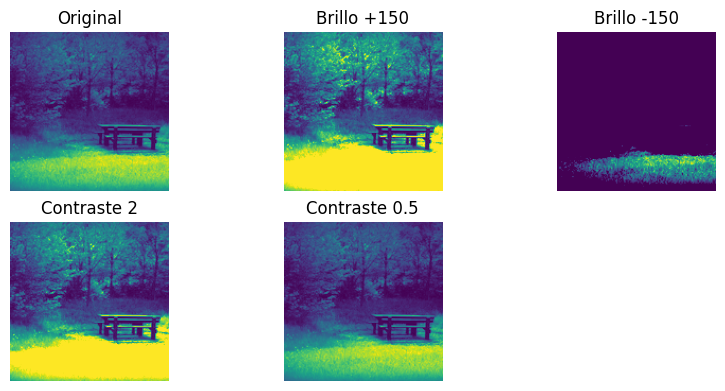

In [360]:
import cv2
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 7))
rows = 3
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(new_image_original)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(new_image_b)
plt.axis('off')
plt.title("Brillo +150")

fig.add_subplot(rows, columns, 3)
plt.imshow(new_image_bn)
plt.axis('off')
plt.title("Brillo -150")

fig.add_subplot(rows, columns, 4)
plt.imshow(new_image_c)
plt.axis('off')
plt.title("Contraste 2")

fig.add_subplot(rows, columns, 5)
plt.imshow(new_image_cn)
plt.axis('off')
plt.title("Contraste 0.5")
